<a href="https://colab.research.google.com/github/Sertyron/AnalisisDeVideojuegosDeSteam/blob/main/20_10_2025_A03_Alejandro_Garcia_AnalisisDeVideojuegosDeSteam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hipotesis del Analisis**

##Resumen
La industria de los videojuegos presenta un crecimiento sostenido y acelerado
año tras año, lo cual la posiciona como un sector de gran interés tanto a nivel económico como cultural. Actualmente, se trata de una de las formas de
entretenimiento más valoradas por los usuarios. Este proyecto se propone analizar la percepción de los videojuegos a lo largo del tiempo, utilizando como referencia una de las plataformas de distribución digital más importantes del medio: Steam.

El dataset seleccionado permite observar cuáles títulos han sido mejor valorados desde su lanzamiento, considerando tanto las reseñas generales como su evolución temporal.

##Objetivo del análisis
Se analizará un conjunto de videojuegos del catálogo de Steam, con el propósito de examinar cómo fueron valorados por los usuarios tanto en su lanzamiento como posteriormente, después de un mes.

El análisis tiene como objetivo identificar qué videojuegos logran mayor influencia sobre los usuarios, considerando variables como el género y el tipo de juego.

Asimismo, se busca comprender cómo se configura la valoración subjetiva del
usuario promedio a lo largo del tiempo, y si existen patrones comunes entre los títulos mejor valorados.

Armado asi un modelo de estudio del mercado para proximos proyectos y ver cuando con que generos ysobre todo a que valores los usuarios estan mas interesados

#Optencion de datos

In [ ]:
#Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1wvT8HmcN_l-8hdctlmMKvQf_DyGFOzZm


Downloading...
From: https://drive.google.com/uc?id=1wvT8HmcN_l-8hdctlmMKvQf_DyGFOzZm
To: /content/Dataset_Steam Games_Limpio.xlsx
100% 7.08M/7.08M [00:00<00:00, 44.8MB/s]


In [ ]:
!gdown 1KXRFQG3NfnZlrC7xqb2Mf7SrB-YS-4JH

Downloading...
From: https://drive.google.com/uc?id=1KXRFQG3NfnZlrC7xqb2Mf7SrB-YS-4JH
To: /content/Data_Procesada_V1.xlsx
100% 7.87M/7.87M [00:00<00:00, 28.9MB/s]


In [ ]:
#Asociar la ruta a una variable
df_procesado = pd.read_excel('/content/Data_Procesada_V1.xlsx')

In [ ]:
#Asociar la ruta a una variable
df = pd.read_excel('/content/Dataset_Steam Games_Limpio.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18377 entries, 0 to 18376
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   18377 non-null  object        
 1   Original Price          18377 non-null  object        
 2   Discounted Price        18377 non-null  object        
 3   Release Date            18377 non-null  datetime64[ns]
 4   Link                    18377 non-null  object        
 5   Game Description        18376 non-null  object        
 6   Recent Reviews Summary  18377 non-null  object        
 7   All Reviews Summary     18170 non-null  object        
 8   Recent Reviews Number   18373 non-null  object        
 9   All Reviews Number      4479 non-null   object        
 10  Developer               18375 non-null  object        
 11  Publisher               18314 non-null  object        
 12  Supported Languages     18377 non-null  object

# Normalizar Datos

In [ ]:
# Crear columna de IDs únicos
df.insert(0, "ID_juego", range(1, len(df) + 1))

# Eliminar columnas "Unnamed"
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Verificar cambios
print(df.head())
print(df.info())


   ID_juego                             Title Original Price Discounted Price  \
0         1                   Baldur's Gate 3         $29.99           $29.99   
1         2  Counter-Strike: Global Offensive         $14.99           $14.99   
2         3                   Apex Legendsâ„¢           Free             Free   
3         4                   Forza Horizon 5         $34.78           $17.39   
4         5                    Call of DutyÂ®           Free             Free   

  Release Date                                               Link  \
0   2023-08-03  https://store.steampowered.com/app/1086940/Bal...   
1   2012-08-21  https://store.steampowered.com/app/730/Counter...   
2   2020-11-04  https://store.steampowered.com/app/1172470/Ape...   
3   2021-11-08  https://store.steampowered.com/app/1551360/For...   
4   2022-10-27  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldurâ€™s Gat

In [ ]:
#Eliminar Fila innecesarias
df = df.drop(columns=["All Reviews Summary.2", "All Reviews Summary.1"])

In [ ]:
# Normalizar todas las columnas tipo string
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).apply(lambda x: x.encode("latin1", errors="ignore").decode("utf-8", errors="ignore"))


In [ ]:
# Quitar símbolo $ y convertir a float
df["Discounted Price"] = (
    df["Discounted Price"]
    .astype(str)               # aseguramos que sea texto
    .str.replace("$", "", regex=False)  # sacamos el signo $
    .str.replace(",", "", regex=False)  # por si hay comas
    .replace("Free", "0")      # Reemplazamos 'Free' con '0'
    .astype(float)             # convertimos a número
)

In [ ]:
df.head()

ID_juego                             Title Original Price  \
0         1                   Baldur's Gate 3         $29.99   
1         2  Counter-Strike: Global Offensive         $14.99   
2         3                      Apex Legends           Free   
3         4                   Forza Horizon 5         $34.78   
4         5                     Call of Duty®           Free   

   Discounted Price Release Date  \
0             29.99   2023-08-03   
1             14.99   2012-08-21   
2              0.00   2020-11-04   
3             17.39   2021-11-08   
4              0.00   2022-10-27   

                                                Link  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldurs Gate 3 is a story-rich, party-based RP...  Overwhelmingly Positive   
1  Counter-Strike: Global Offensive (CS: GO) expa...            Very Positive   
2  Apex Legends is the award-winning, free-to-pla...                    Mixed   
3  Your Ultimate Horizon Adventure awaits! Explor...            Very Positive   
4  Welcome to Call of Duty® HQ, the home of Call ...                    Mixed   

  All Reviews Summary                              Recent Reviews Number  \
0     Mostly Positive  - 96% of the 128,900 user reviews in the last ...   
1       Very Positive  - 89% of the 75,284 user reviews in the last 3...   
2       Very Positive  - 65% of the 18,581 user reviews in the last 3...   
3       Very Positive  - 87% of the 4,120 user reviews in the last 30...   
4       Very Positive  - 49% of the 8,257 user reviews in the last 30...   

                                  All Reviews Number  \
0  - 94% of the 188,617 user reviews for this gam...   
1  - 88% of the 7,428,921 user reviews for this g...   
2  - 80% of the 701,597 user reviews for this gam...   
3  - 88% of the 123,162 user reviews for this gam...   
4  - 57% of the 236,876 user reviews for this gam...   

                                           Developer          Publisher  \
0                                     Larian Studios     Larian Studios   
1                   Valve, Hidden Path Entertainment              Valve   
2                              Respawn Entertainment    Electronic Arts   
3                                   Playground Games  Xbox Game Studios   
4  Infinity Ward, Raven Software, Beenox, Treyarc...         Activision   

                                 Supported Languages  \
0  ['English', 'French', 'German', 'Spanish - Spa...   
1  ['English', 'Czech', 'Danish', 'Dutch', 'Finni...   
2  ['English', 'French', 'Italian', 'German', 'Sp...   
3  ['English', 'French', 'Italian', 'German', 'Sp...   
4  ['English', 'French', 'Italian', 'German', 'Sp...   

                                        Popular Tags  \
0  ['RPG', 'Choices Matter', 'Character Customiza...   
1  ['FPS', 'Shooter', 'Multiplayer', 'Competitive...   
2  ['Free to Play', 'Multiplayer', 'Battle Royale...   
3  ['Racing', 'Open World', 'Driving', 'Multiplay...   
4  ['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...   

                                       Game Features  \
0  ['Single-player', 'Online Co-op', 'LAN Co-op',...   
1  ['Steam Achievements', 'Full controller suppor...   
2  ['Online PvP', 'Online Co-op', 'Steam Achievem...   
3  ['Single-player', 'Online PvP', 'Online Co-op'...   
4  ['Single-player', 'Online PvP', 'Online Co-op'...   

                                Minimum Requirements  
0  Requires a 64-bit processor and operating syst...  
1  OS: |  Windows® 7/Vista/XP | Processor: |  Int...  
2  Requires a 64-bit processor and operating syst...  
3  Requires a 64-bit processor and operating syst...  
4  Requires a 64-bit processor and operating s

# Prueba de Api

Ahora me fijo como funcional la Api de Steam

Link de info: https://steamcommunity.com/dev?l=spanish



Se van a usar
ISteamUserStats : Steam proporciona métodos para obtener información estadística global por juego.

ISteamUser : Steam proporciona llamadas API para proporcionar información sobre los usuarios de Steam.

In [ ]:
#Buscar una Api para ver la Popularidad y la cantidad de juegadores de los juegos

In [ ]:
import requests

url = "http://api.steampowered.com/ISteamApps/GetAppList/v2/"
response = requests.get(url)
data = response.json()

print(len(data["applist"]["apps"]))  # cantidad de juegos
print(data["applist"]["apps"][:5])   # primeros 5 juegos


271830
[{'appid': 5, 'name': 'Dedicated Server'}, {'appid': 7, 'name': 'Steam Client'}, {'appid': 8, 'name': 'winui2'}, {'appid': 10, 'name': 'Counter-Strike'}, {'appid': 20, 'name': 'Team Fortress Classic'}]


In [ ]:
# Access the list of apps
apps_list = data["applist"]["apps"]

# Find the dictionary for 'Counter-Strike'
counter_strike_app = None
for app in apps_list:
    if app.get("name") == "Counter-Strike":
        counter_strike_app = app
        break

# Print the found dictionary
print(counter_strike_app)

{'appid': 10, 'name': 'Counter-Strike'}


In [ ]:
data["applist"]["apps"][:5]

[{'appid': 5, 'name': 'Dedicated Server'},
 {'appid': 7, 'name': 'Steam Client'},
 {'appid': 8, 'name': 'winui2'},
 {'appid': 10, 'name': 'Counter-Strike'},
 {'appid': 20, 'name': 'Team Fortress Classic'}]

# Aplicacion de Api extraccion de datos
Aca busco como estraer los datos utiles para colocarlos en el DataFrame de prueba

In [ ]:
#Nuevo DataFrame de prueba

df_p1 = df.copy()

In [ ]:
import pandas as pd
import requests
import re

# --- Tu dataframe df ya existe con columnas Title y Link ---

# 1. Descargar lista completa de apps de Steam
url = "https://api.steampowered.com/ISteamApps/GetAppList/v2/"
response = requests.get(url)
data = response.json()
apps_list = data["applist"]["apps"]

# Convertimos la lista en un diccionario para lookup rápido
appid_dict = {app["name"].lower(): app["appid"] for app in apps_list}

# 2. Función para buscar el appid por nombre (Title)
def get_appid_by_title(title):
    return appid_dict.get(title.lower())

# 3. Extraer el appid desde el Link usando regex
def extract_appid_from_link(link):
    match = re.search(r"/app/(\d+)/", link)
    if match:
        return int(match.group(1))
    return None

# --- Agregar las nuevas columnas ---
df_p1["Appid_del_Juego"] = df_p1["Title"].apply(get_appid_by_title)
df_p1["Appid_del_Link"] = df_p1["Link"].apply(extract_appid_from_link)

# 4. Confirmación de coincidencia
df_p1["Confirmación_de_Api"] = (
    (df_p1["Appid_del_Juego"].notna()) &
    (df_p1["Appid_del_Link"].notna()) &
    (df_p1["Appid_del_Juego"] == df_p1["Appid_del_Link"])
)

# Si no coincide o alguno es nulo, queda False automáticamente


In [ ]:
df_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18377 entries, 0 to 18376
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_juego                18377 non-null  int64         
 1   Title                   18377 non-null  object        
 2   Original Price          18377 non-null  object        
 3   Discounted Price        18377 non-null  float64       
 4   Release Date            18377 non-null  datetime64[ns]
 5   Link                    18377 non-null  object        
 6   Game Description        18377 non-null  object        
 7   Recent Reviews Summary  18377 non-null  object        
 8   All Reviews Summary     18377 non-null  object        
 9   Recent Reviews Number   18377 non-null  object        
 10  All Reviews Number      18377 non-null  object        
 11  Developer               18377 non-null  object        
 12  Publisher               18377 non-null  object

In [ ]:
df_p1.head()

ID_juego                             Title Original Price  \
0         1                   Baldur's Gate 3         $29.99   
1         2  Counter-Strike: Global Offensive         $14.99   
2         3                      Apex Legends           Free   
3         4                   Forza Horizon 5         $34.78   
4         5                     Call of Duty®           Free   

   Discounted Price Release Date  \
0             29.99   2023-08-03   
1             14.99   2012-08-21   
2              0.00   2020-11-04   
3             17.39   2021-11-08   
4              0.00   2022-10-27   

                                                Link  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldurs Gate 3 is a story-rich, party-based RP...  Overwhelmingly Positive   
1  Counter-Strike: Global Offensive (CS: GO) expa...            Very Positive   
2  Apex Legends is the award-winning, free-to-pla...                    Mixed   
3  Your Ultimate Horizon Adventure awaits! Explor...            Very Positive   
4  Welcome to Call of Duty® HQ, the home of Call ...                    Mixed   

  All Reviews Summary                              Recent Reviews Number  \
0     Mostly Positive  - 96% of the 128,900 user reviews in the last ...   
1       Very Positive  - 89% of the 75,284 user reviews in the last 3...   
2       Very Positive  - 65% of the 18,581 user reviews in the last 3...   
3       Very Positive  - 87% of the 4,120 user reviews in the last 30...   
4       Very Positive  - 49% of the 8,257 user reviews in the last 30...   

                                  All Reviews Number  \
0  - 94% of the 188,617 user reviews for this gam...   
1  - 88% of the 7,428,921 user reviews for this g...   
2  - 80% of the 701,597 user reviews for this gam...   
3  - 88% of the 123,162 user reviews for this gam...   
4  - 57% of the 236,876 user reviews for this gam...   

                                           Developer          Publisher  \
0                                     Larian Studios     Larian Studios   
1                   Valve, Hidden Path Entertainment              Valve   
2                              Respawn Entertainment    Electronic Arts   
3                                   Playground Games  Xbox Game Studios   
4  Infinity Ward, Raven Software, Beenox, Treyarc...         Activision   

                                 Supported Languages  \
0  ['English', 'French', 'German', 'Spanish - Spa...   
1  ['English', 'Czech', 'Danish', 'Dutch', 'Finni...   
2  ['English', 'French', 'Italian', 'German', 'Sp...   
3  ['English', 'French', 'Italian', 'German', 'Sp...   
4  ['English', 'French', 'Italian', 'German', 'Sp...   

                                        Popular Tags  \
0  ['RPG', 'Choices Matter', 'Character Customiza...   
1  ['FPS', 'Shooter', 'Multiplayer', 'Competitive...   
2  ['Free to Play', 'Multiplayer', 'Battle Royale...   
3  ['Racing', 'Open World', 'Driving', 'Multiplay...   
4  ['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...   

                                       Game Features  \
0  ['Single-player', 'Online Co-op', 'LAN Co-op',...   
1  ['Steam Achievements', 'Full controller suppor...   
2  ['Online PvP', 'Online Co-op', 'Steam Achievem...   
3  ['Single-player', 'Online PvP', 'Online Co-op'...   
4  ['Single-player', 'Online PvP', 'Online Co-op'...   

                                Minimum Requirements  Appid_del_Juego  \
0  Requires a 64-bit processor and operating syst...        1086940.0   
1  OS: |  Windows® 7/Vista/XP | Processor: |  Int...              NaN   
2  Requires a 64-bit processor and operating syst...        1172470.0   
3  Requires a 64-bit processo

In [ ]:
#Ver si esto te da los numeros de jugadores actuales
import requests
import pandas as pd
from tqdm import tqdm

def get_current_players(appid):
    url = f"https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid={appid}"
    response = requests.get(url)
    data = response.json()
    return data["response"].get("player_count", None)

# Supongamos que ya tenés df con "Appid_del_Link"
players = []
for appid in tqdm(df_p1["Appid_del_Link"], desc="Consultando jugadores actuales"):
    if pd.notna(appid):
        players.append(get_current_players(appid))
    else:
        players.append(None)

df_p1["Jugadores_Dia:20_10_2025"] = players



Consultando jugadores actuales: 100%|██████████| 18377/18377 [1:10:41<00:00,  4.33it/s]


In [ ]:
df_p1.head()

ID_juego                             Title Original Price  \
0         1                   Baldur's Gate 3         $29.99   
1         2  Counter-Strike: Global Offensive         $14.99   
2         3                      Apex Legends           Free   
3         4                   Forza Horizon 5         $34.78   
4         5                     Call of Duty®           Free   

   Discounted Price Release Date  \
0             29.99   2023-08-03   
1             14.99   2012-08-21   
2              0.00   2020-11-04   
3             17.39   2021-11-08   
4              0.00   2022-10-27   

                                                Link  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldurs Gate 3 is a story-rich, party-based RP...  Overwhelmingly Positive   
1  Counter-Strike: Global Offensive (CS: GO) expa...            Very Positive   
2  Apex Legends is the award-winning, free-to-pla...                    Mixed   
3  Your Ultimate Horizon Adventure awaits! Explor...            Very Positive   
4  Welcome to Call of Duty® HQ, the home of Call ...                    Mixed   

  All Reviews Summary                              Recent Reviews Number  \
0     Mostly Positive  - 96% of the 128,900 user reviews in the last ...   
1       Very Positive  - 89% of the 75,284 user reviews in the last 3...   
2       Very Positive  - 65% of the 18,581 user reviews in the last 3...   
3       Very Positive  - 87% of the 4,120 user reviews in the last 30...   
4       Very Positive  - 49% of the 8,257 user reviews in the last 30...   

                                  All Reviews Number  \
0  - 94% of the 188,617 user reviews for this gam...   
1  - 88% of the 7,428,921 user reviews for this g...   
2  - 80% of the 701,597 user reviews for this gam...   
3  - 88% of the 123,162 user reviews for this gam...   
4  - 57% of the 236,876 user reviews for this gam...   

                                           Developer          Publisher  \
0                                     Larian Studios     Larian Studios   
1                   Valve, Hidden Path Entertainment              Valve   
2                              Respawn Entertainment    Electronic Arts   
3                                   Playground Games  Xbox Game Studios   
4  Infinity Ward, Raven Software, Beenox, Treyarc...         Activision   

                                 Supported Languages  \
0  ['English', 'French', 'German', 'Spanish - Spa...   
1  ['English', 'Czech', 'Danish', 'Dutch', 'Finni...   
2  ['English', 'French', 'Italian', 'German', 'Sp...   
3  ['English', 'French', 'Italian', 'German', 'Sp...   
4  ['English', 'French', 'Italian', 'German', 'Sp...   

                                        Popular Tags  \
0  ['RPG', 'Choices Matter', 'Character Customiza...   
1  ['FPS', 'Shooter', 'Multiplayer', 'Competitive...   
2  ['Free to Play', 'Multiplayer', 'Battle Royale...   
3  ['Racing', 'Open World', 'Driving', 'Multiplay...   
4  ['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...   

                                       Game Features  \
0  ['Single-player', 'Online Co-op', 'LAN Co-op',...   
1  ['Steam Achievements', 'Full controller suppor...   
2  ['Online PvP', 'Online Co-op', 'Steam Achievem...   
3  ['Single-player', 'Online PvP', 'Online Co-op'...   
4  ['Single-player', 'Online PvP', 'Online Co-op'...   

                                Minimum Requirements  Appid_del_Juego  \
0  Requires a 64-bit processor and operating syst...        1086940.0   
1  OS: |  Windows® 7/Vista/XP | Processor: |  Int...              NaN   
2  Requires a 64-bit processor and operating syst...        1172470.0   
3  Requires a 64-bit processo

In [ ]:
df_procesado.head()

ID_juego                             Title Original Price  \
0         1                   Baldur's Gate 3         $29.99   
1         2  Counter-Strike: Global Offensive         $14.99   
2         3                      Apex Legends           Free   
3         4                   Forza Horizon 5         $34.78   
4         5                     Call of Duty®           Free   

   Discounted Price Release Date  \
0             29.99   2023-08-03   
1             14.99   2012-08-21   
2              0.00   2020-11-04   
3             17.39   2021-11-08   
4              0.00   2022-10-27   

                                                Link  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                    Game Description   Recent Reviews Summary  \
0  Baldurs Gate 3 is a story-rich, party-based RP...  Overwhelmingly Positive   
1  Counter-Strike: Global Offensive (CS: GO) expa...            Very Positive   
2  Apex Legends is the award-winning, free-to-pla...                    Mixed   
3  Your Ultimate Horizon Adventure awaits! Explor...            Very Positive   
4  Welcome to Call of Duty® HQ, the home of Call ...                    Mixed   

  All Reviews Summary                              Recent Reviews Number  ...  \
0     Mostly Positive  - 96% of the 128,900 user reviews in the last ...  ...   
1       Very Positive  - 89% of the 75,284 user reviews in the last 3...  ...   
2       Very Positive  - 65% of the 18,581 user reviews in the last 3...  ...   
3       Very Positive  - 87% of the 4,120 user reviews in the last 30...  ...   
4       Very Positive  - 49% of the 8,257 user reviews in the last 30...  ...   

                                        Popular Tags  \
0  ['RPG', 'Choices Matter', 'Character Customiza...   
1  ['FPS', 'Shooter', 'Multiplayer', 'Competitive...   
2  ['Free to Play', 'Multiplayer', 'Battle Royale...   
3  ['Racing', 'Open World', 'Driving', 'Multiplay...   
4  ['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...   

                                       Game Features  \
0  ['Single-player', 'Online Co-op', 'LAN Co-op',...   
1  ['Steam Achievements', 'Full controller suppor...   
2  ['Online PvP', 'Online Co-op', 'Steam Achievem...   
3  ['Single-player', 'Online PvP', 'Online Co-op'...   
4  ['Single-player', 'Online PvP', 'Online Co-op'...   

                                Minimum Requirements Categoria_Precio  \
0  Requires a 64-bit processor and operating syst...             Alto   
1  OS: |  Windows® 7/Vista/XP | Processor: |  Int...            Medio   
2  Requires a 64-bit processor and operating syst...             Free   
3  Requires a 64-bit processor and operating syst...            Medio   
4  Requires a 64-bit processor and operating syst...             Free   

  Appid_del_Juego Appid_del_Link Confirmación_de_Api Jugadores_Actuales  \
0       1086940.0        1086940                True            80835.0   
1             NaN            730               False          1014674.0   
2       1172470.0        1172470                True            60073.0   
3       1551360.0        1551360                True            14457.0   
4       1938090.0        1938090                True            91265.0   

                                          Valoración  \
0  {'total_reviews': 787173, 'total_positive': 76...   
1  {'total_reviews': 9064553, 'total_positive': 7...   
2  {'total_reviews': 1011125, 'total_positive': 6...   
3  {'total_reviews': 241141, 'total_positive': 21...   
4  {'total_reviews': 736472, 'total_positive': 43...   

                                             Géneros  
0                   ['Adventure', 'RPG', 'Strategy']  
1                         ['Action', 'Free To Play']  
2            ['Action', 

## DataSet de analisis de jugadores
Busco hacer un datasaet que solo tenga datos de los usuarios activos

In [ ]:
df_procesado = df_procesado.merge(
    df_p1[["ID_juego", "Jugadores_Dia:20_10_2025"]],
    on="ID_juego",
    how="left"
)

In [ ]:
#Tener un nuevo data set con la info del los dias
columnas_deseadas = ["ID_juego", "Title", "Appid_del_Link", "Jugadores_Actuales", "Jugadores_Dia:20_10_2025"]

df_calculo = df_procesado[columnas_deseadas].copy()


In [ ]:
#Renombrar la columna
df_calculo = df_calculo.rename(columns={"Jugadores_Actuales": "Jugadores_Dia:1"})

In [ ]:
df_calculo.head()

ID_juego                             Title  Appid_del_Link  \
0         1                   Baldur's Gate 3         1086940   
1         2  Counter-Strike: Global Offensive             730   
2         3                      Apex Legends         1172470   
3         4                   Forza Horizon 5         1551360   
4         5                     Call of Duty®         1938090   

   Jugadores_Dia:1  Jugadores_Dia:15_10_2025  
0          80835.0                   36666.0  
1        1014674.0                 1268631.0  
2          60073.0                  127996.0  
3          14457.0                   12571.0  
4          91265.0                   35209.0

In [ ]:
# Respaldo hasta ahora
Data_Frame_V2 = df_procesado.copy()

In [ ]:
Data_Frame_V2.to_excel('Data_Frame_V2.xlsx', index=False)

In [ ]:
df_calculo.to_excel('DataFrameJugadores5.xlsx', index=False)

Al aplicar Apis al proceso de trabajo decidi usar dos dataframes para que en algun momento poder hacer analisis diferentes.

La intencion es utener uno de base donde se hace la practicas en general y despues otro de seguimiento ya que una de la api me dice los jugadores activos para despues hacer hipotecisis con graficos de progrecion en el tiempo

# Ver de cargar Apis de Valor

In [ ]:
## Primero Valoraciones porcentuales

import requests
import pandas as pd
from tqdm import tqdm

# --- Función para traer resumen de reviews ---
def get_reviews_summary(appid):
    url = f"https://store.steampowered.com/appreviews/{appid}?json=1&language=all&purchase_type=all"
    try:
        r = requests.get(url, timeout=5).json()
        summary = r.get("query_summary", {})
        if summary:
            total = summary.get("total_reviews", 0)
            positive = summary.get("total_positive", 0)
            porcentaje = (positive / total * 100) if total > 0 else 0
            return {
                "total_reviews": total,
                "total_positive": positive,
                "total_negative": summary.get("total_negative", 0),
                "score_desc": summary.get("review_score_desc", ""),
                "porcentaje_aprobacion": round(porcentaje, 2)
            }
    except Exception as e:
        print(f"Error con appid {appid}: {e}")
    return None






In [ ]:
df_p1["Appid_del_Link"].isnull().sum()

np.int64(0)

In [ ]:
df_p1[df_p1["Appid_del_Link"].isna()]

Empty DataFrame
Columns: [ID_juego, Title, Original Price, Discounted Price, Release Date, Link, Game Description, Recent Reviews Summary, All Reviews Summary, Recent Reviews Number, All Reviews Number, Developer, Publisher, Supported Languages, Popular Tags, Game Features, Minimum Requirements, Categoria_Precio, Appid_del_Juego, Appid_del_Link, Confirmación_de_Api, Jugadores_Actuales]
Index: []

[0 rows x 22 columns]

In [ ]:
#Parece que hay un par de nulos que voy a eliminar
df_p1 = df_p1.dropna(subset=["Appid_del_Link"])


In [ ]:
# --- Aplicar con barra de progreso ---
valoraciones = []
for appid in tqdm(df_p1["Appid_del_Link"], desc="Obteniendo valoraciones"):
    if pd.notna(appid):
        valoraciones.append(get_reviews_summary(appid))
    else:
        valoraciones.append(None)

# Guardar todo en el DataFrame
df_p1["Valoración"] = valoraciones

Obteniendo valoraciones:   7%|▋         | 1286/18375 [05:37<7:54:34,  1.67s/it]

Error con appid 526160.0: HTTPSConnectionPool(host='store.steampowered.com', port=443): Read timed out. (read timeout=5)


Obteniendo valoraciones:  17%|█▋        | 3079/18375 [12:31<7:06:41,  1.67s/it]

Error con appid 449960.0: HTTPSConnectionPool(host='store.steampowered.com', port=443): Read timed out. (read timeout=5)


Obteniendo valoraciones:  47%|████▋     | 8644/18375 [34:04<4:37:09,  1.71s/it]

Error con appid 303800.0: HTTPSConnectionPool(host='store.steampowered.com', port=443): Read timed out. (read timeout=5)


Obteniendo valoraciones: 100%|██████████| 18375/18375 [1:13:32<00:00,  4.16it/s]
/tmp/ipython-input-56758601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p1["Valoración"] = valoraciones


In [ ]:
#Segundo Genero principales del juego
# --- Función para obtener géneros ---
def get_game_genres(appid):
    url = f"https://store.steampowered.com/api/appdetails?appids={appid}"
    try:
        r = requests.get(url, timeout=5).json()
        data = r.get(str(appid), {}).get("data", {})
        genres = data.get("genres", [])
        if genres:
            return [g["description"] for g in genres]
    except Exception as e:
        print(f"Error con appid {appid}: {e}")
    return []

# --- Aplicar con barra de progreso ---
generos = []
for link in tqdm(df_p1["Link"], desc="Obteniendo géneros"):
    appid = link.split("/app/")[1].split("/")[0]
    generos.append(get_game_genres(appid))

df_p1["Géneros"] = generos
print(df_p1[["Link", "Géneros"]].head())


Obteniendo géneros:   2%|▏         | 294/18375 [00:59<59:48,  5.04it/s]  

Error con appid 1367080: 'NoneType' object has no attribute 'get'
Error con appid 1702330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 295/18375 [00:59<59:39,  5.05it/s]

Error con appid 2163330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 296/18375 [01:00<1:00:14,  5.00it/s]

Error con appid 673750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 297/18375 [01:00<1:00:46,  4.96it/s]

Error con appid 2172860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 298/18375 [01:00<1:04:40,  4.66it/s]

Error con appid 1372110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 299/18375 [01:00<1:12:57,  4.13it/s]

Error con appid 1498570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 300/18375 [01:01<1:11:56,  4.19it/s]

Error con appid 601510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 301/18375 [01:01<1:12:53,  4.13it/s]

Error con appid 1824220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 303/18375 [01:01<1:06:53,  4.50it/s]

Error con appid 751440: 'NoneType' object has no attribute 'get'
Error con appid 1062520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 305/18375 [01:02<1:03:28,  4.74it/s]

Error con appid 799960: 'NoneType' object has no attribute 'get'
Error con appid 1336490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 306/18375 [01:02<1:14:19,  4.05it/s]

Error con appid 208650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 307/18375 [01:02<1:13:17,  4.11it/s]

Error con appid 673130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 309/18375 [01:03<1:06:43,  4.51it/s]

Error con appid 774801: 'NoneType' object has no attribute 'get'
Error con appid 1259420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 310/18375 [01:03<1:04:29,  4.67it/s]

Error con appid 601150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 311/18375 [01:03<1:03:27,  4.74it/s]

Error con appid 1377580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 312/18375 [01:03<1:07:17,  4.47it/s]

Error con appid 1196590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 313/18375 [01:04<1:06:38,  4.52it/s]

Error con appid 1128920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 314/18375 [01:04<1:05:29,  4.60it/s]

Error con appid 386180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 315/18375 [01:04<1:06:03,  4.56it/s]

Error con appid 1583230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 316/18375 [01:04<1:05:40,  4.58it/s]

Error con appid 1574260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 317/18375 [01:04<1:05:16,  4.61it/s]

Error con appid 1149460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 319/18375 [01:05<1:03:18,  4.75it/s]

Error con appid 1501610: 'NoneType' object has no attribute 'get'
Error con appid 1101120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 320/18375 [01:05<1:02:34,  4.81it/s]

Error con appid 48700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 321/18375 [01:05<1:02:25,  4.82it/s]

Error con appid 10180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 322/18375 [01:05<1:05:15,  4.61it/s]

Error con appid 1227890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 323/18375 [01:06<1:04:01,  4.70it/s]

Error con appid 655500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 324/18375 [01:06<1:03:11,  4.76it/s]

Error con appid 975370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 325/18375 [01:06<1:03:52,  4.71it/s]

Error con appid 602960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 326/18375 [01:06<1:03:49,  4.71it/s]

Error con appid 858820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 327/18375 [01:07<1:03:33,  4.73it/s]

Error con appid 881100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 328/18375 [01:07<1:04:04,  4.69it/s]

Error con appid 1533390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 329/18375 [01:07<1:03:33,  4.73it/s]

Error con appid 431240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 331/18375 [01:07<1:02:34,  4.81it/s]

Error con appid 1030840: 'NoneType' object has no attribute 'get'
Error con appid 2111170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 332/18375 [01:08<1:06:02,  4.55it/s]

Error con appid 1623940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 333/18375 [01:08<1:06:15,  4.54it/s]

Error con appid 1211020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 335/18375 [01:08<1:03:23,  4.74it/s]

Error con appid 1668540: 'NoneType' object has no attribute 'get'
Error con appid 669330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 336/18375 [01:08<1:03:31,  4.73it/s]

Error con appid 1530160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 338/18375 [01:09<1:04:09,  4.69it/s]

Error con appid 1062090: 'NoneType' object has no attribute 'get'
Error con appid 1096530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 339/18375 [01:09<1:06:17,  4.53it/s]

Error con appid 436150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 341/18375 [01:10<1:03:16,  4.75it/s]

Error con appid 459820: 'NoneType' object has no attribute 'get'
Error con appid 1222700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 343/18375 [01:10<1:04:10,  4.68it/s]

Error con appid 646910: 'NoneType' object has no attribute 'get'
Error con appid 323190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 344/18375 [01:10<1:07:19,  4.46it/s]

Error con appid 538030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 345/18375 [01:10<1:05:44,  4.57it/s]

Error con appid 837470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 346/18375 [01:11<1:04:38,  4.65it/s]

Error con appid 704270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 348/18375 [01:11<1:02:03,  4.84it/s]

Error con appid 1922560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 350/18375 [01:11<1:01:12,  4.91it/s]

Error con appid 1588530: 'NoneType' object has no attribute 'get'
Error con appid 1150690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   2%|▏         | 352/18375 [01:12<59:26,  5.05it/s]  

Error con appid 368260: 'NoneType' object has no attribute 'get'
Error con appid 387990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 354/18375 [01:12<49:05,  6.12it/s]

Error con appid 228280: Expecting value: line 1 column 1 (char 0)
Error con appid 845890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 356/18375 [01:12<43:22,  6.92it/s]

Error con appid 1328670: Expecting value: line 1 column 1 (char 0)
Error con appid 495420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 358/18375 [01:13<40:56,  7.34it/s]

Error con appid 1324130: Expecting value: line 1 column 1 (char 0)
Error con appid 204360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 360/18375 [01:13<39:40,  7.57it/s]

Error con appid 924970: Expecting value: line 1 column 1 (char 0)
Error con appid 1850570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 362/18375 [01:13<39:35,  7.58it/s]

Error con appid 1307550: Expecting value: line 1 column 1 (char 0)
Error con appid 1611600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 363/18375 [01:13<40:15,  7.46it/s]

Error con appid 1321440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 365/18375 [01:14<44:27,  6.75it/s]

Error con appid 492720: Expecting value: line 1 column 1 (char 0)
Error con appid 678950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 367/18375 [01:14<45:01,  6.67it/s]

Error con appid 952060: Expecting value: line 1 column 1 (char 0)
Error con appid 418370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 369/18375 [01:14<42:01,  7.14it/s]

Error con appid 1358700: Expecting value: line 1 column 1 (char 0)
Error con appid 1672970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 371/18375 [01:14<44:52,  6.69it/s]

Error con appid 2328760: Expecting value: line 1 column 1 (char 0)
Error con appid 1967430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 373/18375 [01:15<42:22,  7.08it/s]

Error con appid 1158160: Expecting value: line 1 column 1 (char 0)
Error con appid 1118200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 375/18375 [01:15<41:15,  7.27it/s]

Error con appid 233450: Expecting value: line 1 column 1 (char 0)
Error con appid 349040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 377/18375 [01:15<40:02,  7.49it/s]

Error con appid 242050: Expecting value: line 1 column 1 (char 0)
Error con appid 883710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 379/18375 [01:16<39:41,  7.56it/s]

Error con appid 1066890: Expecting value: line 1 column 1 (char 0)
Error con appid 1593030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 381/18375 [01:16<41:54,  7.16it/s]

Error con appid 1237970: Expecting value: line 1 column 1 (char 0)
Error con appid 644930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 383/18375 [01:16<40:13,  7.45it/s]

Error con appid 516750: Expecting value: line 1 column 1 (char 0)
Error con appid 629730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 385/18375 [01:16<40:43,  7.36it/s]

Error con appid 3590: Expecting value: line 1 column 1 (char 0)
Error con appid 1017180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 387/18375 [01:17<39:40,  7.56it/s]

Error con appid 471710: Expecting value: line 1 column 1 (char 0)
Error con appid 1066780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 389/18375 [01:17<39:15,  7.64it/s]

Error con appid 447040: Expecting value: line 1 column 1 (char 0)
Error con appid 622220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 391/18375 [01:17<40:32,  7.39it/s]

Error con appid 872410: Expecting value: line 1 column 1 (char 0)
Error con appid 424840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 393/18375 [01:17<39:43,  7.54it/s]

Error con appid 1397390: Expecting value: line 1 column 1 (char 0)
Error con appid 977950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 395/18375 [01:18<41:25,  7.23it/s]

Error con appid 1449690: Expecting value: line 1 column 1 (char 0)
Error con appid 610370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 397/18375 [01:18<40:34,  7.38it/s]

Error con appid 954850: Expecting value: line 1 column 1 (char 0)
Error con appid 386940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 399/18375 [01:18<40:02,  7.48it/s]

Error con appid 1621690: Expecting value: line 1 column 1 (char 0)
Error con appid 274170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 401/18375 [01:19<39:42,  7.54it/s]

Error con appid 750920: Expecting value: line 1 column 1 (char 0)
Error con appid 552500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 403/18375 [01:19<41:40,  7.19it/s]

Error con appid 1084600: Expecting value: line 1 column 1 (char 0)
Error con appid 611790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 405/18375 [01:19<40:54,  7.32it/s]

Error con appid 221680: Expecting value: line 1 column 1 (char 0)
Error con appid 379430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 407/18375 [01:19<40:50,  7.33it/s]

Error con appid 784080: Expecting value: line 1 column 1 (char 0)
Error con appid 289650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 409/18375 [01:20<43:26,  6.89it/s]

Error con appid 1013320: Expecting value: line 1 column 1 (char 0)
Error con appid 787480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 411/18375 [01:20<41:49,  7.16it/s]

Error con appid 1451190: Expecting value: line 1 column 1 (char 0)
Error con appid 219740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 413/18375 [01:20<40:15,  7.44it/s]

Error con appid 466560: Expecting value: line 1 column 1 (char 0)
Error con appid 2349820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 415/18375 [01:20<39:11,  7.64it/s]

Error con appid 1341290: Expecting value: line 1 column 1 (char 0)
Error con appid 690790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 417/18375 [01:21<38:46,  7.72it/s]

Error con appid 291480: Expecting value: line 1 column 1 (char 0)
Error con appid 1284190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 419/18375 [01:21<39:20,  7.61it/s]

Error con appid 1149620: Expecting value: line 1 column 1 (char 0)
Error con appid 2058190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 421/18375 [01:21<40:35,  7.37it/s]

Error con appid 400750: Expecting value: line 1 column 1 (char 0)
Error con appid 1041320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 423/18375 [01:21<39:42,  7.53it/s]

Error con appid 1448440: Expecting value: line 1 column 1 (char 0)
Error con appid 1368820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 425/18375 [01:22<39:35,  7.56it/s]

Error con appid 1966900: Expecting value: line 1 column 1 (char 0)
Error con appid 1954200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 427/18375 [01:22<38:59,  7.67it/s]

Error con appid 919640: Expecting value: line 1 column 1 (char 0)
Error con appid 231200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 429/18375 [01:22<38:52,  7.69it/s]

Error con appid 476600: Expecting value: line 1 column 1 (char 0)
Error con appid 1644320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 431/18375 [01:23<38:29,  7.77it/s]

Error con appid 1366540: Expecting value: line 1 column 1 (char 0)
Error con appid 115300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 433/18375 [01:23<40:06,  7.46it/s]

Error con appid 1608070: Expecting value: line 1 column 1 (char 0)
Error con appid 1703340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 435/18375 [01:23<39:24,  7.59it/s]

Error con appid 341800: Expecting value: line 1 column 1 (char 0)
Error con appid 1999770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 437/18375 [01:23<38:55,  7.68it/s]

Error con appid 553420: Expecting value: line 1 column 1 (char 0)
Error con appid 304050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 439/18375 [01:24<38:25,  7.78it/s]

Error con appid 8500: Expecting value: line 1 column 1 (char 0)
Error con appid 418240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 441/18375 [01:24<40:10,  7.44it/s]

Error con appid 312660: Expecting value: line 1 column 1 (char 0)
Error con appid 992300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 443/18375 [01:24<39:21,  7.59it/s]

Error con appid 356190: Expecting value: line 1 column 1 (char 0)
Error con appid 799600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 445/18375 [01:24<38:35,  7.74it/s]

Error con appid 505460: Expecting value: line 1 column 1 (char 0)
Error con appid 470220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 447/18375 [01:25<38:09,  7.83it/s]

Error con appid 438040: Expecting value: line 1 column 1 (char 0)
Error con appid 228380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 449/18375 [01:25<38:27,  7.77it/s]

Error con appid 702320: Expecting value: line 1 column 1 (char 0)
Error con appid 1976440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 451/18375 [01:25<40:59,  7.29it/s]

Error con appid 637650: Expecting value: line 1 column 1 (char 0)
Error con appid 1557740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 453/18375 [01:25<41:30,  7.20it/s]

Error con appid 1850160: Expecting value: line 1 column 1 (char 0)
Error con appid 379720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 455/18375 [01:26<39:44,  7.52it/s]

Error con appid 1229240: Expecting value: line 1 column 1 (char 0)
Error con appid 1676130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 457/18375 [01:26<39:18,  7.60it/s]

Error con appid 1182900: Expecting value: line 1 column 1 (char 0)
Error con appid 1222680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   2%|▏         | 459/18375 [01:26<39:25,  7.57it/s]

Error con appid 1584090: Expecting value: line 1 column 1 (char 0)
Error con appid 736820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 461/18375 [01:27<39:17,  7.60it/s]

Error con appid 1944430: Expecting value: line 1 column 1 (char 0)
Error con appid 500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 463/18375 [01:27<39:56,  7.47it/s]

Error con appid 359320: Expecting value: line 1 column 1 (char 0)
Error con appid 1338770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 465/18375 [01:27<38:57,  7.66it/s]

Error con appid 740130: Expecting value: line 1 column 1 (char 0)
Error con appid 2063610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 467/18375 [01:27<38:47,  7.69it/s]

Error con appid 1937480: Expecting value: line 1 column 1 (char 0)
Error con appid 1121640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 469/18375 [01:28<38:32,  7.74it/s]

Error con appid 1007040: Expecting value: line 1 column 1 (char 0)
Error con appid 627690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 471/18375 [01:28<38:29,  7.75it/s]

Error con appid 1490890: Expecting value: line 1 column 1 (char 0)
Error con appid 1913210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 473/18375 [01:28<38:37,  7.73it/s]

Error con appid 1649240: Expecting value: line 1 column 1 (char 0)
Error con appid 8930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 475/18375 [01:28<39:11,  7.61it/s]

Error con appid 1262350: Expecting value: line 1 column 1 (char 0)
Error con appid 1113560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 477/18375 [01:29<38:32,  7.74it/s]

Error con appid 231430: Expecting value: line 1 column 1 (char 0)
Error con appid 1139900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 479/18375 [01:29<38:05,  7.83it/s]

Error con appid 704850: Expecting value: line 1 column 1 (char 0)
Error con appid 681280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 481/18375 [01:29<38:39,  7.71it/s]

Error con appid 1210320: Expecting value: line 1 column 1 (char 0)
Error con appid 1343370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 483/18375 [01:29<38:52,  7.67it/s]

Error con appid 1057090: Expecting value: line 1 column 1 (char 0)
Error con appid 900883: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 485/18375 [01:30<38:36,  7.72it/s]

Error con appid 2071280: Expecting value: line 1 column 1 (char 0)
Error con appid 1388770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 487/18375 [01:30<38:28,  7.75it/s]

Error con appid 220200: Expecting value: line 1 column 1 (char 0)
Error con appid 201270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 489/18375 [01:30<39:31,  7.54it/s]

Error con appid 1088850: Expecting value: line 1 column 1 (char 0)
Error con appid 1592190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 491/18375 [01:30<39:16,  7.59it/s]

Error con appid 1295510: Expecting value: line 1 column 1 (char 0)
Error con appid 921570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 493/18375 [01:31<39:17,  7.59it/s]

Error con appid 674940: Expecting value: line 1 column 1 (char 0)
Error con appid 1106840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 495/18375 [01:31<39:21,  7.57it/s]

Error con appid 1468720: Expecting value: line 1 column 1 (char 0)
Error con appid 504230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 497/18375 [01:31<39:17,  7.58it/s]

Error con appid 10090: Expecting value: line 1 column 1 (char 0)
Error con appid 325610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 499/18375 [01:31<39:14,  7.59it/s]

Error con appid 268500: Expecting value: line 1 column 1 (char 0)
Error con appid 951440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 501/18375 [01:32<39:23,  7.56it/s]

Error con appid 488790: Expecting value: line 1 column 1 (char 0)
Error con appid 1785150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 503/18375 [01:32<39:28,  7.55it/s]

Error con appid 780290: Expecting value: line 1 column 1 (char 0)
Error con appid 1099410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 505/18375 [01:32<39:27,  7.55it/s]

Error con appid 1949030: Expecting value: line 1 column 1 (char 0)
Error con appid 1121560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 507/18375 [01:33<39:26,  7.55it/s]

Error con appid 292730: Expecting value: line 1 column 1 (char 0)
Error con appid 860510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 509/18375 [01:33<41:21,  7.20it/s]

Error con appid 1874880: Expecting value: line 1 column 1 (char 0)
Error con appid 22330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 511/18375 [01:33<40:22,  7.38it/s]

Error con appid 400: Expecting value: line 1 column 1 (char 0)
Error con appid 298110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 513/18375 [01:33<39:31,  7.53it/s]

Error con appid 1465550: Expecting value: line 1 column 1 (char 0)
Error con appid 232090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 515/18375 [01:34<38:56,  7.64it/s]

Error con appid 1235140: Expecting value: line 1 column 1 (char 0)
Error con appid 240720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 517/18375 [01:34<39:49,  7.47it/s]

Error con appid 1237950: Expecting value: line 1 column 1 (char 0)
Error con appid 2014780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 519/18375 [01:34<39:30,  7.53it/s]

Error con appid 1585220: Expecting value: line 1 column 1 (char 0)
Error con appid 410900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 521/18375 [01:34<38:47,  7.67it/s]

Error con appid 1090630: Expecting value: line 1 column 1 (char 0)
Error con appid 1677350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 523/18375 [01:35<38:28,  7.73it/s]

Error con appid 410340: Expecting value: line 1 column 1 (char 0)
Error con appid 1520470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 525/18375 [01:35<42:26,  7.01it/s]

Error con appid 787860: Expecting value: line 1 column 1 (char 0)
Error con appid 252530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 527/18375 [01:35<40:58,  7.26it/s]

Error con appid 1325200: Expecting value: line 1 column 1 (char 0)
Error con appid 732690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 529/18375 [01:35<39:52,  7.46it/s]

Error con appid 1594320: Expecting value: line 1 column 1 (char 0)
Error con appid 780310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 531/18375 [01:36<42:41,  6.96it/s]

Error con appid 109600: Expecting value: line 1 column 1 (char 0)
Error con appid 1419170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 533/18375 [01:36<40:24,  7.36it/s]

Error con appid 1985820: Expecting value: line 1 column 1 (char 0)
Error con appid 2212330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 535/18375 [01:36<39:31,  7.52it/s]

Error con appid 899770: Expecting value: line 1 column 1 (char 0)
Error con appid 293760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 537/18375 [01:37<42:52,  6.93it/s]

Error con appid 1237320: Expecting value: line 1 column 1 (char 0)
Error con appid 257350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 539/18375 [01:37<40:18,  7.37it/s]

Error con appid 571740: Expecting value: line 1 column 1 (char 0)
Error con appid 585420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 541/18375 [01:37<39:13,  7.58it/s]

Error con appid 1307890: Expecting value: line 1 column 1 (char 0)
Error con appid 1579380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 543/18375 [01:37<38:48,  7.66it/s]

Error con appid 1544020: Expecting value: line 1 column 1 (char 0)
Error con appid 550470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 545/18375 [01:38<38:55,  7.64it/s]

Error con appid 509980: Expecting value: line 1 column 1 (char 0)
Error con appid 219150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 547/18375 [01:38<38:54,  7.64it/s]

Error con appid 1805480: Expecting value: line 1 column 1 (char 0)
Error con appid 1127500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 549/18375 [01:38<38:32,  7.71it/s]

Error con appid 368500: Expecting value: line 1 column 1 (char 0)
Error con appid 1105420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 551/18375 [01:38<38:28,  7.72it/s]

Error con appid 383980: Expecting value: line 1 column 1 (char 0)
Error con appid 2303350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 553/18375 [01:39<38:20,  7.75it/s]

Error con appid 1967630: Expecting value: line 1 column 1 (char 0)
Error con appid 1169040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   3%|▎         | 555/18375 [01:39<51:47,  5.73it/s]

Error con appid 1455840: 'NoneType' object has no attribute 'get'
Error con appid 597180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 558/18375 [01:40<47:54,  6.20it/s]

Error con appid 362890: 'NoneType' object has no attribute 'get'
Error con appid 653530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 560/18375 [01:40<46:59,  6.32it/s]

Error con appid 885970: 'NoneType' object has no attribute 'get'
Error con appid 1605220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 562/18375 [01:40<50:49,  5.84it/s]

Error con appid 1671200: 'NoneType' object has no attribute 'get'
Error con appid 1061910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 564/18375 [01:41<48:32,  6.12it/s]

Error con appid 225540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 566/18375 [01:41<47:30,  6.25it/s]

Error con appid 701160: 'NoneType' object has no attribute 'get'
Error con appid 611670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 568/18375 [01:41<52:04,  5.70it/s]

Error con appid 527230: 'NoneType' object has no attribute 'get'
Error con appid 427730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 570/18375 [01:42<49:13,  6.03it/s]

Error con appid 373420: 'NoneType' object has no attribute 'get'
Error con appid 391220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 572/18375 [01:42<48:26,  6.13it/s]

Error con appid 371970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 574/18375 [01:42<49:11,  6.03it/s]

Error con appid 555160: 'NoneType' object has no attribute 'get'
Error con appid 1113000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 576/18375 [01:43<50:43,  5.85it/s]

Error con appid 1455630: 'NoneType' object has no attribute 'get'
Error con appid 307960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 578/18375 [01:43<49:04,  6.04it/s]

Error con appid 17390: 'NoneType' object has no attribute 'get'
Error con appid 1577120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 580/18375 [01:43<51:20,  5.78it/s]

Error con appid 814000: 'NoneType' object has no attribute 'get'
Error con appid 569480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 582/18375 [01:44<50:42,  5.85it/s]

Error con appid 493490: 'NoneType' object has no attribute 'get'
Error con appid 865360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 584/18375 [01:44<49:07,  6.04it/s]

Error con appid 578650: 'NoneType' object has no attribute 'get'
Error con appid 633230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 586/18375 [01:44<47:32,  6.24it/s]

Error con appid 1755910: 'NoneType' object has no attribute 'get'
Error con appid 1468810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 588/18375 [01:45<47:10,  6.28it/s]

Error con appid 1113120: 'NoneType' object has no attribute 'get'
Error con appid 1533420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 590/18375 [01:45<47:38,  6.22it/s]

Error con appid 206440: 'NoneType' object has no attribute 'get'
Error con appid 1257290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 592/18375 [01:45<47:39,  6.22it/s]

Error con appid 266840: 'NoneType' object has no attribute 'get'
Error con appid 1637320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 594/18375 [01:46<47:22,  6.26it/s]

Error con appid 343780: 'NoneType' object has no attribute 'get'
Error con appid 2066020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 596/18375 [01:46<55:24,  5.35it/s]

Error con appid 246620: 'NoneType' object has no attribute 'get'
Error con appid 2058180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 598/18375 [01:46<53:56,  5.49it/s]

Error con appid 1496790: 'NoneType' object has no attribute 'get'
Error con appid 2294130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 599/18375 [01:47<51:28,  5.75it/s]

Error con appid 552100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 601/18375 [01:47<54:19,  5.45it/s]

Error con appid 261570: 'NoneType' object has no attribute 'get'
Error con appid 1740720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 603/18375 [01:47<50:36,  5.85it/s]

Error con appid 567640: 'NoneType' object has no attribute 'get'
Error con appid 212500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 605/18375 [01:48<53:18,  5.56it/s]

Error con appid 1245560: 'NoneType' object has no attribute 'get'
Error con appid 973230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 607/18375 [01:48<52:40,  5.62it/s]

Error con appid 1782120: 'NoneType' object has no attribute 'get'
Error con appid 1139980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 610/18375 [01:48<48:27,  6.11it/s]

Error con appid 274190: 'NoneType' object has no attribute 'get'
Error con appid 1243830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 611/18375 [01:49<48:21,  6.12it/s]

Error con appid 997070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 613/18375 [01:49<54:29,  5.43it/s]

Error con appid 1368030: 'NoneType' object has no attribute 'get'
Error con appid 2109370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 616/18375 [01:50<52:12,  5.67it/s]

Error con appid 1827180: 'NoneType' object has no attribute 'get'
Error con appid 1239320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 618/18375 [01:50<52:17,  5.66it/s]

Error con appid 1483870: 'NoneType' object has no attribute 'get'
Error con appid 1584940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 620/18375 [01:50<49:37,  5.96it/s]

Error con appid 1029780: 'NoneType' object has no attribute 'get'
Error con appid 287700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 622/18375 [01:51<50:06,  5.91it/s]

Error con appid 1238860: 'NoneType' object has no attribute 'get'
Error con appid 1525700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 624/18375 [01:51<50:17,  5.88it/s]

Error con appid 1515950: 'NoneType' object has no attribute 'get'
Error con appid 1288310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 626/18375 [01:51<49:28,  5.98it/s]

Error con appid 1874490: 'NoneType' object has no attribute 'get'
Error con appid 365960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 628/18375 [01:52<47:06,  6.28it/s]

Error con appid 1368910: 'NoneType' object has no attribute 'get'
Error con appid 820520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 630/18375 [01:52<46:52,  6.31it/s]

Error con appid 823500: 'NoneType' object has no attribute 'get'
Error con appid 1161580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 632/18375 [01:52<45:59,  6.43it/s]

Error con appid 314650: 'NoneType' object has no attribute 'get'
Error con appid 1259980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 634/18375 [01:52<45:54,  6.44it/s]

Error con appid 824270: 'NoneType' object has no attribute 'get'
Error con appid 1372280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 636/18375 [01:53<47:55,  6.17it/s]

Error con appid 359870: 'NoneType' object has no attribute 'get'
Error con appid 1568590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 637/18375 [01:53<46:52,  6.31it/s]

Error con appid 1766740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 638/18375 [01:53<51:39,  5.72it/s]

Error con appid 240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 639/18375 [01:53<54:38,  5.41it/s]

Error con appid 2365810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 641/18375 [01:54<54:58,  5.38it/s]

Error con appid 1475810: 'NoneType' object has no attribute 'get'
Error con appid 588430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   3%|▎         | 643/18375 [01:54<50:47,  5.82it/s]

Error con appid 1137300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 647/18375 [01:55<47:56,  6.16it/s]

Error con appid 236110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 649/18375 [01:55<47:57,  6.16it/s]

Error con appid 2239550: 'NoneType' object has no attribute 'get'
Error con appid 8870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 651/18375 [01:55<47:04,  6.27it/s]

Error con appid 1599660: 'NoneType' object has no attribute 'get'
Error con appid 763890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 652/18375 [01:56<48:13,  6.12it/s]

Error con appid 302670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 654/18375 [01:56<59:35,  4.96it/s]  

Error con appid 1860510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 656/18375 [01:56<53:52,  5.48it/s]

Error con appid 1069660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 658/18375 [01:57<53:05,  5.56it/s]

Error con appid 678960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 660/18375 [01:57<51:12,  5.77it/s]

Error con appid 1730700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 662/18375 [01:57<48:52,  6.04it/s]

Error con appid 1286580: 'NoneType' object has no attribute 'get'
Error con appid 742300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 664/18375 [01:58<47:37,  6.20it/s]

Error con appid 784150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 666/18375 [01:58<48:11,  6.13it/s]

Error con appid 1357210: 'NoneType' object has no attribute 'get'
Error con appid 1730590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 669/18375 [01:59<48:13,  6.12it/s]

Error con appid 1016920: 'NoneType' object has no attribute 'get'
Error con appid 403640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 670/18375 [01:59<48:28,  6.09it/s]

Error con appid 218230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 671/18375 [01:59<51:59,  5.68it/s]

Error con appid 1138850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 673/18375 [01:59<52:35,  5.61it/s]

Error con appid 1222690: 'NoneType' object has no attribute 'get'
Error con appid 246900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 675/18375 [02:00<51:13,  5.76it/s]

Error con appid 2140510: 'NoneType' object has no attribute 'get'
Error con appid 332800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 677/18375 [02:00<49:10,  6.00it/s]

Error con appid 1342330: 'NoneType' object has no attribute 'get'
Error con appid 4700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 679/18375 [02:00<50:39,  5.82it/s]

Error con appid 967050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 681/18375 [02:01<47:52,  6.16it/s]

Error con appid 365360: 'NoneType' object has no attribute 'get'
Error con appid 1012880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 683/18375 [02:01<49:03,  6.01it/s]

Error con appid 2138090: 'NoneType' object has no attribute 'get'
Error con appid 1850960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 684/18375 [02:01<48:03,  6.14it/s]

Error con appid 1938010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 686/18375 [02:01<52:05,  5.66it/s]

Error con appid 2379390: 'NoneType' object has no attribute 'get'
Error con appid 1818450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▎         | 688/18375 [02:02<51:15,  5.75it/s]

Error con appid 1454400: 'NoneType' object has no attribute 'get'
Error con appid 4500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 690/18375 [02:02<49:23,  5.97it/s]

Error con appid 544750: 'NoneType' object has no attribute 'get'
Error con appid 1368130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 691/18375 [02:02<50:11,  5.87it/s]

Error con appid 636480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 693/18375 [02:03<51:21,  5.74it/s]

Error con appid 203160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 696/18375 [02:03<47:47,  6.16it/s]

Error con appid 24200: 'NoneType' object has no attribute 'get'
Error con appid 413420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 698/18375 [02:03<47:30,  6.20it/s]

Error con appid 393080: 'NoneType' object has no attribute 'get'
Error con appid 1158850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 700/18375 [02:04<49:13,  5.98it/s]

Error con appid 1172380: 'NoneType' object has no attribute 'get'
Error con appid 612880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 702/18375 [02:04<48:13,  6.11it/s]

Error con appid 261640: 'NoneType' object has no attribute 'get'
Error con appid 844590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 704/18375 [02:04<49:32,  5.94it/s]

Error con appid 1850740: 'NoneType' object has no attribute 'get'
Error con appid 213670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 706/18375 [02:05<50:16,  5.86it/s]

Error con appid 1282150: 'NoneType' object has no attribute 'get'
Error con appid 307780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 708/18375 [02:05<49:12,  5.98it/s]

Error con appid 1049410: 'NoneType' object has no attribute 'get'
Error con appid 1515210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 711/18375 [02:06<49:38,  5.93it/s]

Error con appid 743890: 'NoneType' object has no attribute 'get'
Error con appid 220240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 713/18375 [02:06<52:39,  5.59it/s]

Error con appid 1580240: 'NoneType' object has no attribute 'get'
Error con appid 1054490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 715/18375 [02:06<50:35,  5.82it/s]

Error con appid 679900: 'NoneType' object has no attribute 'get'
Error con appid 220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 717/18375 [02:07<51:15,  5.74it/s]

Error con appid 690830: 'NoneType' object has no attribute 'get'
Error con appid 1881420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 719/18375 [02:07<50:27,  5.83it/s]

Error con appid 601050: 'NoneType' object has no attribute 'get'
Error con appid 235460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 721/18375 [02:07<49:19,  5.97it/s]

Error con appid 589290: 'NoneType' object has no attribute 'get'
Error con appid 1062810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 723/18375 [02:08<48:05,  6.12it/s]

Error con appid 641320: 'NoneType' object has no attribute 'get'
Error con appid 365590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 725/18375 [02:08<47:04,  6.25it/s]

Error con appid 831560: 'NoneType' object has no attribute 'get'
Error con appid 2170420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 729/18375 [02:09<47:09,  6.24it/s]

Error con appid 1128810: 'NoneType' object has no attribute 'get'
Error con appid 424030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 731/18375 [02:09<46:37,  6.31it/s]

Error con appid 1144400: 'NoneType' object has no attribute 'get'
Error con appid 480490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 733/18375 [02:09<48:53,  6.01it/s]

Error con appid 307950: 'NoneType' object has no attribute 'get'
Error con appid 1388880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 735/18375 [02:10<49:45,  5.91it/s]

Error con appid 278080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 737/18375 [02:10<48:15,  6.09it/s]

Error con appid 640820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 739/18375 [02:10<49:05,  5.99it/s]

Error con appid 2106840: 'NoneType' object has no attribute 'get'
Error con appid 501300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 742/18375 [02:11<49:31,  5.93it/s]

Error con appid 1267910: 'NoneType' object has no attribute 'get'
Error con appid 1451090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 744/18375 [02:11<47:43,  6.16it/s]

Error con appid 1214470: 'NoneType' object has no attribute 'get'
Error con appid 324160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 746/18375 [02:12<48:31,  6.06it/s]

Error con appid 2084000: 'NoneType' object has no attribute 'get'
Error con appid 304930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 748/18375 [02:12<51:45,  5.68it/s]

Error con appid 22320: 'NoneType' object has no attribute 'get'
Error con appid 629760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 750/18375 [02:12<48:01,  6.12it/s]

Error con appid 2095300: 'NoneType' object has no attribute 'get'
Error con appid 382310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 752/18375 [02:12<45:32,  6.45it/s]

Error con appid 311310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 754/18375 [02:13<45:25,  6.46it/s]

Error con appid 872200: 'NoneType' object has no attribute 'get'
Error con appid 337320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 756/18375 [02:13<45:43,  6.42it/s]

Error con appid 463530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 758/18375 [02:13<49:38,  5.91it/s]

Error con appid 673950: 'NoneType' object has no attribute 'get'
Error con appid 1903620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 760/18375 [02:14<47:09,  6.23it/s]

Error con appid 895400: 'NoneType' object has no attribute 'get'
Error con appid 1494420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 762/18375 [02:14<49:19,  5.95it/s]

Error con appid 1543030: 'NoneType' object has no attribute 'get'
Error con appid 429050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 764/18375 [02:14<47:02,  6.24it/s]

Error con appid 1869590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 766/18375 [02:15<47:33,  6.17it/s]

Error con appid 34030: 'NoneType' object has no attribute 'get'
Error con appid 1351080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 768/18375 [02:15<48:47,  6.01it/s]

Error con appid 858710: 'NoneType' object has no attribute 'get'
Error con appid 1811990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 770/18375 [02:15<48:18,  6.07it/s]

Error con appid 1549250: 'NoneType' object has no attribute 'get'
Error con appid 1178490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 772/18375 [02:16<48:01,  6.11it/s]

Error con appid 911400: 'NoneType' object has no attribute 'get'
Error con appid 326460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 774/18375 [02:16<46:34,  6.30it/s]

Error con appid 773790: 'NoneType' object has no attribute 'get'
Error con appid 21690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 776/18375 [02:16<46:18,  6.33it/s]

Error con appid 1071870: 'NoneType' object has no attribute 'get'
Error con appid 996580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 778/18375 [02:17<49:38,  5.91it/s]

Error con appid 236430: 'NoneType' object has no attribute 'get'
Error con appid 976590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 781/18375 [02:17<53:15,  5.51it/s]

Error con appid 544810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 783/18375 [02:18<50:42,  5.78it/s]

Error con appid 1963370: 'NoneType' object has no attribute 'get'
Error con appid 447530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 785/18375 [02:18<49:09,  5.96it/s]

Error con appid 221040: 'NoneType' object has no attribute 'get'
Error con appid 203770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 788/18375 [02:18<48:06,  6.09it/s]

Error con appid 1182620: 'NoneType' object has no attribute 'get'
Error con appid 326360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 790/18375 [02:19<49:33,  5.91it/s]

Error con appid 1956040: 'NoneType' object has no attribute 'get'
Error con appid 464920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 792/18375 [02:19<51:20,  5.71it/s]

Error con appid 1797880: 'NoneType' object has no attribute 'get'
Error con appid 1410710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 794/18375 [02:19<48:25,  6.05it/s]

Error con appid 1097430: 'NoneType' object has no attribute 'get'
Error con appid 1404210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 796/18375 [02:20<46:41,  6.28it/s]

Error con appid 469600: 'NoneType' object has no attribute 'get'
Error con appid 48190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 797/18375 [02:20<48:04,  6.09it/s]

Error con appid 1253920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 799/18375 [02:20<53:13,  5.50it/s]

Error con appid 2500750: 'NoneType' object has no attribute 'get'
Error con appid 2236300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 802/18375 [02:21<50:07,  5.84it/s]

Error con appid 1651560: 'NoneType' object has no attribute 'get'
Error con appid 1097580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 804/18375 [02:21<48:22,  6.05it/s]

Error con appid 720620: 'NoneType' object has no attribute 'get'
Error con appid 2021210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 806/18375 [02:22<48:13,  6.07it/s]

Error con appid 2455060: 'NoneType' object has no attribute 'get'
Error con appid 211820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 808/18375 [02:22<48:07,  6.08it/s]

Error con appid 1910860: 'NoneType' object has no attribute 'get'
Error con appid 243470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 809/18375 [02:22<48:50,  5.99it/s]

Error con appid 731490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 812/18375 [02:23<49:31,  5.91it/s]

Error con appid 1338840: 'NoneType' object has no attribute 'get'
Error con appid 1230140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 814/18375 [02:23<48:07,  6.08it/s]

Error con appid 363150: 'NoneType' object has no attribute 'get'
Error con appid 2334220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 816/18375 [02:23<49:06,  5.96it/s]

Error con appid 759740: 'NoneType' object has no attribute 'get'
Error con appid 1041720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 818/18375 [02:24<47:11,  6.20it/s]

Error con appid 898750: 'NoneType' object has no attribute 'get'
Error con appid 2020710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 820/18375 [02:24<46:12,  6.33it/s]

Error con appid 428660: 'NoneType' object has no attribute 'get'
Error con appid 1850510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 822/18375 [02:24<45:40,  6.41it/s]

Error con appid 1205970: 'NoneType' object has no attribute 'get'
Error con appid 1477590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 824/18375 [02:24<47:14,  6.19it/s]

Error con appid 638230: 'NoneType' object has no attribute 'get'
Error con appid 1196310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   4%|▍         | 826/18375 [02:25<46:26,  6.30it/s]

Error con appid 388090: 'NoneType' object has no attribute 'get'
Error con appid 745920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 828/18375 [02:25<48:45,  6.00it/s]

Error con appid 443110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 830/18375 [02:25<48:50,  5.99it/s]

Error con appid 1563180: 'NoneType' object has no attribute 'get'
Error con appid 1170950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 832/18375 [02:26<48:31,  6.02it/s]

Error con appid 201810: 'NoneType' object has no attribute 'get'
Error con appid 1570330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 834/18375 [02:26<48:27,  6.03it/s]

Error con appid 10500: 'NoneType' object has no attribute 'get'
Error con appid 1701520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 836/18375 [02:26<47:59,  6.09it/s]

Error con appid 2069310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 838/18375 [02:27<47:10,  6.19it/s]

Error con appid 868360: 'NoneType' object has no attribute 'get'
Error con appid 838380: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 840/18375 [02:27<45:28,  6.43it/s]

Error con appid 1147560: 'NoneType' object has no attribute 'get'
Error con appid 1335790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 842/18375 [02:27<45:31,  6.42it/s]

Error con appid 2074800: 'NoneType' object has no attribute 'get'
Error con appid 987840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 844/18375 [02:28<45:58,  6.35it/s]

Error con appid 955900: 'NoneType' object has no attribute 'get'
Error con appid 414700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 846/18375 [02:28<45:32,  6.42it/s]

Error con appid 269950: 'NoneType' object has no attribute 'get'
Error con appid 1679220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 849/18375 [02:28<45:10,  6.47it/s]

Error con appid 453090: 'NoneType' object has no attribute 'get'
Error con appid 445220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 851/18375 [02:29<45:31,  6.42it/s]

Error con appid 1646850: 'NoneType' object has no attribute 'get'
Error con appid 1272320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 853/18375 [02:29<44:40,  6.54it/s]

Error con appid 1380910: 'NoneType' object has no attribute 'get'
Error con appid 20920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 855/18375 [02:29<45:52,  6.36it/s]

Error con appid 2111630: 'NoneType' object has no attribute 'get'
Error con appid 1967260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 857/18375 [02:30<46:29,  6.28it/s]

Error con appid 206480: 'NoneType' object has no attribute 'get'
Error con appid 511680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 859/18375 [02:30<45:54,  6.36it/s]

Error con appid 784950: 'NoneType' object has no attribute 'get'
Error con appid 897450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 861/18375 [02:30<45:34,  6.40it/s]

Error con appid 32470: 'NoneType' object has no attribute 'get'
Error con appid 1552350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 863/18375 [02:31<47:23,  6.16it/s]

Error con appid 1202130: 'NoneType' object has no attribute 'get'
Error con appid 339610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 865/18375 [02:31<45:31,  6.41it/s]

Error con appid 1608230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 867/18375 [02:31<45:50,  6.36it/s]

Error con appid 1342260: 'NoneType' object has no attribute 'get'
Error con appid 1953520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 868/18375 [02:31<45:25,  6.42it/s]

Error con appid 1489630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 870/18375 [02:32<49:26,  5.90it/s]

Error con appid 1682970: 'NoneType' object has no attribute 'get'
Error con appid 2225070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 872/18375 [02:32<46:55,  6.22it/s]

Error con appid 1304680: 'NoneType' object has no attribute 'get'
Error con appid 698670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 874/18375 [02:32<47:12,  6.18it/s]

Error con appid 586140: 'NoneType' object has no attribute 'get'
Error con appid 1537830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 876/18375 [02:33<47:20,  6.16it/s]

Error con appid 310950: 'NoneType' object has no attribute 'get'
Error con appid 214490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 878/18375 [02:33<48:51,  5.97it/s]

Error con appid 1345820: 'NoneType' object has no attribute 'get'
Error con appid 1602080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 880/18375 [02:33<48:53,  5.96it/s]

Error con appid 1798010: 'NoneType' object has no attribute 'get'
Error con appid 460950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 882/18375 [02:34<48:23,  6.02it/s]

Error con appid 1378990: 'NoneType' object has no attribute 'get'
Error con appid 1556790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 885/18375 [02:34<49:34,  5.88it/s]

Error con appid 960990: 'NoneType' object has no attribute 'get'
Error con appid 2166060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 887/18375 [02:35<55:46,  5.23it/s]

Error con appid 288470: 'NoneType' object has no attribute 'get'
Error con appid 1567020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 889/18375 [02:35<50:38,  5.76it/s]

Error con appid 332950: 'NoneType' object has no attribute 'get'
Error con appid 1292630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 891/18375 [02:35<48:19,  6.03it/s]

Error con appid 368340: 'NoneType' object has no attribute 'get'
Error con appid 1176470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 893/18375 [02:36<47:46,  6.10it/s]

Error con appid 855740: 'NoneType' object has no attribute 'get'
Error con appid 47810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 895/18375 [02:36<46:41,  6.24it/s]

Error con appid 1418630: 'NoneType' object has no attribute 'get'
Error con appid 1520370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 897/18375 [02:36<45:39,  6.38it/s]

Error con appid 209160: 'NoneType' object has no attribute 'get'
Error con appid 1415220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 899/18375 [02:37<47:46,  6.10it/s]

Error con appid 1532200: 'NoneType' object has no attribute 'get'
Error con appid 1488200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 901/18375 [02:37<47:30,  6.13it/s]

Error con appid 597170: 'NoneType' object has no attribute 'get'
Error con appid 1097840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 903/18375 [02:37<46:21,  6.28it/s]

Error con appid 1680880: 'NoneType' object has no attribute 'get'
Error con appid 637090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 905/18375 [02:38<45:20,  6.42it/s]

Error con appid 287980: 'NoneType' object has no attribute 'get'
Error con appid 517630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 907/18375 [02:38<45:27,  6.40it/s]

Error con appid 238460: 'NoneType' object has no attribute 'get'
Error con appid 1042550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 909/18375 [02:38<46:09,  6.31it/s]

Error con appid 627270: 'NoneType' object has no attribute 'get'
Error con appid 1794960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 911/18375 [02:39<46:01,  6.32it/s]

Error con appid 594330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 913/18375 [02:39<46:48,  6.22it/s]

Error con appid 683320: 'NoneType' object has no attribute 'get'
Error con appid 758690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 915/18375 [02:39<49:30,  5.88it/s]

Error con appid 719640: 'NoneType' object has no attribute 'get'
Error con appid 392110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▍         | 917/18375 [02:40<48:15,  6.03it/s]

Error con appid 269210: 'NoneType' object has no attribute 'get'
Error con appid 900040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:   5%|▌         | 919/18375 [02:40<37:28,  7.76it/s]

Error con appid 313690: Expecting value: line 1 column 1 (char 0)
Error con appid 1072420: Expecting value: line 1 column 1 (char 0)
Error con appid 1105670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 923/18375 [02:40<28:31, 10.19it/s]

Error con appid 207610: Expecting value: line 1 column 1 (char 0)
Error con appid 307690: Expecting value: line 1 column 1 (char 0)
Error con appid 2094910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 925/18375 [02:40<26:25, 11.01it/s]

Error con appid 7940: Expecting value: line 1 column 1 (char 0)
Error con appid 1209490: Expecting value: line 1 column 1 (char 0)
Error con appid 864060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 929/18375 [02:40<24:08, 12.05it/s]

Error con appid 775500: Expecting value: line 1 column 1 (char 0)
Error con appid 895870: Expecting value: line 1 column 1 (char 0)
Error con appid 1879330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 931/18375 [02:41<23:42, 12.27it/s]

Error con appid 1031140: Expecting value: line 1 column 1 (char 0)
Error con appid 329110: Expecting value: line 1 column 1 (char 0)
Error con appid 914710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 935/18375 [02:41<22:45, 12.77it/s]

Error con appid 333640: Expecting value: line 1 column 1 (char 0)
Error con appid 867210: Expecting value: line 1 column 1 (char 0)
Error con appid 939960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 937/18375 [02:41<22:56, 12.67it/s]

Error con appid 1059990: Expecting value: line 1 column 1 (char 0)
Error con appid 494840: Expecting value: line 1 column 1 (char 0)
Error con appid 677160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 941/18375 [02:41<23:07, 12.56it/s]

Error con appid 953490: Expecting value: line 1 column 1 (char 0)
Error con appid 1421490: Expecting value: line 1 column 1 (char 0)
Error con appid 1649010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 943/18375 [02:42<23:11, 12.52it/s]

Error con appid 383150: Expecting value: line 1 column 1 (char 0)
Error con appid 647830: Expecting value: line 1 column 1 (char 0)
Error con appid 871980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 947/18375 [02:42<22:43, 12.78it/s]

Error con appid 65800: Expecting value: line 1 column 1 (char 0)
Error con appid 939400: Expecting value: line 1 column 1 (char 0)
Error con appid 606280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 949/18375 [02:42<22:39, 12.82it/s]

Error con appid 782250: Expecting value: line 1 column 1 (char 0)
Error con appid 394510: Expecting value: line 1 column 1 (char 0)
Error con appid 1451810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 953/18375 [02:42<22:26, 12.94it/s]

Error con appid 1810820: Expecting value: line 1 column 1 (char 0)
Error con appid 1432050: Expecting value: line 1 column 1 (char 0)
Error con appid 1961460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 955/18375 [02:42<22:07, 13.12it/s]

Error con appid 1570010: Expecting value: line 1 column 1 (char 0)
Error con appid 748490: Expecting value: line 1 column 1 (char 0)
Error con appid 1063660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 959/18375 [02:43<22:18, 13.01it/s]

Error con appid 1277400: Expecting value: line 1 column 1 (char 0)
Error con appid 1178830: Expecting value: line 1 column 1 (char 0)
Error con appid 396750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 961/18375 [02:43<22:54, 12.67it/s]

Error con appid 1072040: Expecting value: line 1 column 1 (char 0)
Error con appid 209650: Expecting value: line 1 column 1 (char 0)
Error con appid 936790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 965/18375 [02:43<22:32, 12.88it/s]

Error con appid 597820: Expecting value: line 1 column 1 (char 0)
Error con appid 718670: Expecting value: line 1 column 1 (char 0)
Error con appid 2060130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 967/18375 [02:43<22:27, 12.92it/s]

Error con appid 420530: Expecting value: line 1 column 1 (char 0)
Error con appid 632300: Expecting value: line 1 column 1 (char 0)
Error con appid 1614550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 971/18375 [02:44<22:17, 13.01it/s]

Error con appid 1259790: Expecting value: line 1 column 1 (char 0)
Error con appid 2013360: Expecting value: line 1 column 1 (char 0)
Error con appid 2096600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 973/18375 [02:44<22:31, 12.88it/s]

Error con appid 268650: Expecting value: line 1 column 1 (char 0)
Error con appid 735280: Expecting value: line 1 column 1 (char 0)
Error con appid 15100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 977/18375 [02:44<22:19, 12.99it/s]

Error con appid 228200: Expecting value: line 1 column 1 (char 0)
Error con appid 250760: Expecting value: line 1 column 1 (char 0)
Error con appid 314160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 979/18375 [02:44<22:06, 13.12it/s]

Error con appid 926990: Expecting value: line 1 column 1 (char 0)
Error con appid 751780: Expecting value: line 1 column 1 (char 0)
Error con appid 234140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 983/18375 [02:45<21:59, 13.18it/s]

Error con appid 694280: Expecting value: line 1 column 1 (char 0)
Error con appid 17480: Expecting value: line 1 column 1 (char 0)
Error con appid 1571100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 985/18375 [02:45<22:18, 13.00it/s]

Error con appid 297000: Expecting value: line 1 column 1 (char 0)
Error con appid 1491670: Expecting value: line 1 column 1 (char 0)
Error con appid 927380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 989/18375 [02:45<22:31, 12.86it/s]

Error con appid 330020: Expecting value: line 1 column 1 (char 0)
Error con appid 1330460: Expecting value: line 1 column 1 (char 0)
Error con appid 962730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 991/18375 [02:45<23:01, 12.58it/s]

Error con appid 201870: Expecting value: line 1 column 1 (char 0)
Error con appid 914800: Expecting value: line 1 column 1 (char 0)
Error con appid 1743830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 995/18375 [02:46<23:31, 12.31it/s]

Error con appid 1206610: Expecting value: line 1 column 1 (char 0)
Error con appid 1509510: Expecting value: line 1 column 1 (char 0)
Error con appid 1449200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 997/18375 [02:46<23:20, 12.41it/s]

Error con appid 666140: Expecting value: line 1 column 1 (char 0)
Error con appid 1816300: Expecting value: line 1 column 1 (char 0)
Error con appid 613830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 1001/18375 [02:46<23:24, 12.37it/s]

Error con appid 1262560: Expecting value: line 1 column 1 (char 0)
Error con appid 383870: Expecting value: line 1 column 1 (char 0)
Error con appid 1262240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 1003/18375 [02:46<23:25, 12.36it/s]

Error con appid 110800: Expecting value: line 1 column 1 (char 0)
Error con appid 692850: Expecting value: line 1 column 1 (char 0)
Error con appid 541570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 1007/18375 [02:47<23:57, 12.08it/s]

Error con appid 1166860: Expecting value: line 1 column 1 (char 0)
Error con appid 211500: Expecting value: line 1 column 1 (char 0)
Error con appid 1999360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   5%|▌         | 1009/18375 [02:47<23:55, 12.10it/s]

Error con appid 1422130: Expecting value: line 1 column 1 (char 0)
Error con appid 916840: Expecting value: line 1 column 1 (char 0)
Error con appid 704450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1013/18375 [02:47<24:41, 11.72it/s]

Error con appid 1809700: Expecting value: line 1 column 1 (char 0)
Error con appid 961200: Expecting value: line 1 column 1 (char 0)
Error con appid 1000360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1015/18375 [02:47<24:18, 11.90it/s]

Error con appid 1487210: Expecting value: line 1 column 1 (char 0)
Error con appid 2367230: Expecting value: line 1 column 1 (char 0)
Error con appid 560130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1019/18375 [02:48<23:39, 12.22it/s]

Error con appid 1122340: Expecting value: line 1 column 1 (char 0)
Error con appid 1369670: Expecting value: line 1 column 1 (char 0)
Error con appid 12200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1021/18375 [02:48<23:29, 12.31it/s]

Error con appid 1016800: Expecting value: line 1 column 1 (char 0)
Error con appid 1162520: Expecting value: line 1 column 1 (char 0)
Error con appid 1896700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1025/18375 [02:48<22:50, 12.66it/s]

Error con appid 1521580: Expecting value: line 1 column 1 (char 0)
Error con appid 1076160: Expecting value: line 1 column 1 (char 0)
Error con appid 1005300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1027/18375 [02:48<23:48, 12.14it/s]

Error con appid 32440: Expecting value: line 1 column 1 (char 0)
Error con appid 335670: Expecting value: line 1 column 1 (char 0)
Error con appid 1549180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1031/18375 [02:49<23:03, 12.53it/s]

Error con appid 777130: Expecting value: line 1 column 1 (char 0)
Error con appid 1881200: Expecting value: line 1 column 1 (char 0)
Error con appid 1136370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1033/18375 [02:49<22:48, 12.67it/s]

Error con appid 234330: Expecting value: line 1 column 1 (char 0)
Error con appid 1786790: Expecting value: line 1 column 1 (char 0)
Error con appid 752590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1037/18375 [02:49<22:00, 13.13it/s]

Error con appid 2221920: Expecting value: line 1 column 1 (char 0)
Error con appid 512900: Expecting value: line 1 column 1 (char 0)
Error con appid 587620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1039/18375 [02:49<22:41, 12.73it/s]

Error con appid 1946700: Expecting value: line 1 column 1 (char 0)
Error con appid 2014380: Expecting value: line 1 column 1 (char 0)
Error con appid 874260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1043/18375 [02:50<23:08, 12.49it/s]

Error con appid 2281730: Expecting value: line 1 column 1 (char 0)
Error con appid 333980: Expecting value: line 1 column 1 (char 0)
Error con appid 979690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1045/18375 [02:50<23:21, 12.36it/s]

Error con appid 2022180: Expecting value: line 1 column 1 (char 0)
Error con appid 1933650: Expecting value: line 1 column 1 (char 0)
Error con appid 1276760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1049/18375 [02:50<22:36, 12.78it/s]

Error con appid 960910: Expecting value: line 1 column 1 (char 0)
Error con appid 221380: Expecting value: line 1 column 1 (char 0)
Error con appid 1424330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1051/18375 [02:50<22:25, 12.88it/s]

Error con appid 1390350: Expecting value: line 1 column 1 (char 0)
Error con appid 2100160: Expecting value: line 1 column 1 (char 0)
Error con appid 324800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1055/18375 [02:50<22:54, 12.60it/s]

Error con appid 249130: Expecting value: line 1 column 1 (char 0)
Error con appid 1349230: Expecting value: line 1 column 1 (char 0)
Error con appid 631510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1057/18375 [02:51<22:33, 12.80it/s]

Error con appid 1173820: Expecting value: line 1 column 1 (char 0)
Error con appid 1361000: Expecting value: line 1 column 1 (char 0)
Error con appid 251060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1061/18375 [02:51<22:02, 13.09it/s]

Error con appid 894020: Expecting value: line 1 column 1 (char 0)
Error con appid 357190: Expecting value: line 1 column 1 (char 0)
Error con appid 601430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1063/18375 [02:51<21:56, 13.15it/s]

Error con appid 2064810: Expecting value: line 1 column 1 (char 0)
Error con appid 1421250: Expecting value: line 1 column 1 (char 0)
Error con appid 677120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1067/18375 [02:51<22:11, 13.00it/s]

Error con appid 710920: Expecting value: line 1 column 1 (char 0)
Error con appid 1715130: Expecting value: line 1 column 1 (char 0)
Error con appid 1367550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1069/18375 [02:52<22:26, 12.85it/s]

Error con appid 736260: Expecting value: line 1 column 1 (char 0)
Error con appid 311560: Expecting value: line 1 column 1 (char 0)
Error con appid 208200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1073/18375 [02:52<21:51, 13.19it/s]

Error con appid 40970: Expecting value: line 1 column 1 (char 0)
Error con appid 1710580: Expecting value: line 1 column 1 (char 0)
Error con appid 1179080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1075/18375 [02:52<21:51, 13.19it/s]

Error con appid 1201540: Expecting value: line 1 column 1 (char 0)
Error con appid 1282730: Expecting value: line 1 column 1 (char 0)
Error con appid 858810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1079/18375 [02:52<21:54, 13.15it/s]

Error con appid 2246110: Expecting value: line 1 column 1 (char 0)
Error con appid 1589120: Expecting value: line 1 column 1 (char 0)
Error con appid 1364020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1081/18375 [02:52<22:08, 13.02it/s]

Error con appid 2172260: Expecting value: line 1 column 1 (char 0)
Error con appid 675010: Expecting value: line 1 column 1 (char 0)
Error con appid 354140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1085/18375 [02:53<22:11, 12.99it/s]

Error con appid 965580: Expecting value: line 1 column 1 (char 0)
Error con appid 695330: Expecting value: line 1 column 1 (char 0)
Error con appid 969990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1087/18375 [02:53<22:32, 12.78it/s]

Error con appid 774181: Expecting value: line 1 column 1 (char 0)
Error con appid 803330: Expecting value: line 1 column 1 (char 0)
Error con appid 339600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1091/18375 [02:53<22:32, 12.78it/s]

Error con appid 389430: Expecting value: line 1 column 1 (char 0)
Error con appid 460920: Expecting value: line 1 column 1 (char 0)
Error con appid 2343600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1093/18375 [02:53<22:29, 12.81it/s]

Error con appid 1918040: Expecting value: line 1 column 1 (char 0)
Error con appid 2399220: Expecting value: line 1 column 1 (char 0)
Error con appid 897220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1097/18375 [02:54<22:07, 13.01it/s]

Error con appid 942970: Expecting value: line 1 column 1 (char 0)
Error con appid 1922010: Expecting value: line 1 column 1 (char 0)
Error con appid 418530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1099/18375 [02:54<22:06, 13.02it/s]

Error con appid 1265860: Expecting value: line 1 column 1 (char 0)
Error con appid 1543280: Expecting value: line 1 column 1 (char 0)
Error con appid 319630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1103/18375 [02:54<21:52, 13.16it/s]

Error con appid 1097350: Expecting value: line 1 column 1 (char 0)
Error con appid 1049320: Expecting value: line 1 column 1 (char 0)
Error con appid 377840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1105/18375 [02:54<22:03, 13.05it/s]

Error con appid 1284410: Expecting value: line 1 column 1 (char 0)
Error con appid 1238000: Expecting value: line 1 column 1 (char 0)
Error con appid 1721470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1109/18375 [02:55<22:32, 12.76it/s]

Error con appid 1216060: Expecting value: line 1 column 1 (char 0)
Error con appid 1281590: Expecting value: line 1 column 1 (char 0)
Error con appid 1583320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1111/18375 [02:55<22:25, 12.83it/s]

Error con appid 1956800: Expecting value: line 1 column 1 (char 0)
Error con appid 572890: Expecting value: line 1 column 1 (char 0)
Error con appid 20900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1115/18375 [02:55<22:26, 12.82it/s]

Error con appid 65540: Expecting value: line 1 column 1 (char 0)
Error con appid 663090: Expecting value: line 1 column 1 (char 0)
Error con appid 489520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1117/18375 [02:55<22:49, 12.60it/s]

Error con appid 337340: Expecting value: line 1 column 1 (char 0)
Error con appid 203140: Expecting value: line 1 column 1 (char 0)
Error con appid 1635450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1121/18375 [02:56<23:11, 12.40it/s]

Error con appid 442120: Expecting value: line 1 column 1 (char 0)
Error con appid 1981570: Expecting value: line 1 column 1 (char 0)
Error con appid 481510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1123/18375 [02:56<22:31, 12.76it/s]

Error con appid 448280: Expecting value: line 1 column 1 (char 0)
Error con appid 2600: Expecting value: line 1 column 1 (char 0)
Error con appid 531510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1127/18375 [02:56<22:28, 12.79it/s]

Error con appid 1127400: Expecting value: line 1 column 1 (char 0)
Error con appid 1897050: Expecting value: line 1 column 1 (char 0)
Error con appid 1281630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1129/18375 [02:56<22:15, 12.92it/s]

Error con appid 843390: Expecting value: line 1 column 1 (char 0)
Error con appid 1515640: Expecting value: line 1 column 1 (char 0)
Error con appid 410320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1133/18375 [02:56<21:52, 13.14it/s]

Error con appid 1732190: Expecting value: line 1 column 1 (char 0)
Error con appid 611660: Expecting value: line 1 column 1 (char 0)
Error con appid 1926090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1135/18375 [02:57<21:46, 13.19it/s]

Error con appid 544550: Expecting value: line 1 column 1 (char 0)
Error con appid 846770: Expecting value: line 1 column 1 (char 0)
Error con appid 985890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1139/18375 [02:57<21:39, 13.27it/s]

Error con appid 238090: Expecting value: line 1 column 1 (char 0)
Error con appid 252610: Expecting value: line 1 column 1 (char 0)
Error con appid 1276790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1141/18375 [02:57<21:27, 13.39it/s]

Error con appid 963930: Expecting value: line 1 column 1 (char 0)
Error con appid 1462810: Expecting value: line 1 column 1 (char 0)
Error con appid 954740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1145/18375 [02:57<21:34, 13.31it/s]

Error con appid 394690: Expecting value: line 1 column 1 (char 0)
Error con appid 648350: Expecting value: line 1 column 1 (char 0)
Error con appid 728530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▌         | 1147/18375 [02:58<22:12, 12.93it/s]

Error con appid 361280: Expecting value: line 1 column 1 (char 0)
Error con appid 571260: Expecting value: line 1 column 1 (char 0)
Error con appid 2318480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1151/18375 [02:58<22:34, 12.72it/s]

Error con appid 380: Expecting value: line 1 column 1 (char 0)
Error con appid 311260: Expecting value: line 1 column 1 (char 0)
Error con appid 1939160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1153/18375 [02:58<22:53, 12.54it/s]

Error con appid 1238040: Expecting value: line 1 column 1 (char 0)
Error con appid 292120: Expecting value: line 1 column 1 (char 0)
Error con appid 519860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1157/18375 [02:58<23:19, 12.31it/s]

Error con appid 1868180: Expecting value: line 1 column 1 (char 0)
Error con appid 1920490: Expecting value: line 1 column 1 (char 0)
Error con appid 712100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1159/18375 [02:59<23:20, 12.29it/s]

Error con appid 590380: Expecting value: line 1 column 1 (char 0)
Error con appid 346010: Expecting value: line 1 column 1 (char 0)
Error con appid 312530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1161/18375 [02:59<23:42, 12.11it/s]

Error con appid 19680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1163/18375 [02:59<29:37,  9.68it/s]

Error con appid 1361320: Expecting value: line 1 column 1 (char 0)
Error con appid 506610: Expecting value: line 1 column 1 (char 0)
Error con appid 1444480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1167/18375 [02:59<26:04, 11.00it/s]

Error con appid 1413480: Expecting value: line 1 column 1 (char 0)
Error con appid 1265920: Expecting value: line 1 column 1 (char 0)
Error con appid 329050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1169/18375 [02:59<25:41, 11.16it/s]

Error con appid 50130: Expecting value: line 1 column 1 (char 0)
Error con appid 1102190: Expecting value: line 1 column 1 (char 0)
Error con appid 1318690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1173/18375 [03:00<24:59, 11.47it/s]

Error con appid 445980: Expecting value: line 1 column 1 (char 0)
Error con appid 1947500: Expecting value: line 1 column 1 (char 0)
Error con appid 2291760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1175/18375 [03:00<24:15, 11.81it/s]

Error con appid 1766100: Expecting value: line 1 column 1 (char 0)
Error con appid 1166290: Expecting value: line 1 column 1 (char 0)
Error con appid 1408230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1179/18375 [03:00<23:34, 12.16it/s]

Error con appid 210970: Expecting value: line 1 column 1 (char 0)
Error con appid 1180380: Expecting value: line 1 column 1 (char 0)
Error con appid 1668520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1181/18375 [03:00<23:42, 12.08it/s]

Error con appid 451340: Expecting value: line 1 column 1 (char 0)
Error con appid 834530: Expecting value: line 1 column 1 (char 0)
Error con appid 304430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1185/18375 [03:01<22:38, 12.66it/s]

Error con appid 2093410: Expecting value: line 1 column 1 (char 0)
Error con appid 1668510: Expecting value: line 1 column 1 (char 0)
Error con appid 887570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1187/18375 [03:01<22:27, 12.75it/s]

Error con appid 2176930: Expecting value: line 1 column 1 (char 0)
Error con appid 1829980: Expecting value: line 1 column 1 (char 0)
Error con appid 1277930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1191/18375 [03:01<22:11, 12.90it/s]

Error con appid 39140: Expecting value: line 1 column 1 (char 0)
Error con appid 2062690: Expecting value: line 1 column 1 (char 0)
Error con appid 528740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   6%|▋         | 1193/18375 [03:01<22:29, 12.73it/s]

Error con appid 1898290: Expecting value: line 1 column 1 (char 0)
Error con appid 1931020: Expecting value: line 1 column 1 (char 0)
Error con appid 1694420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1197/18375 [03:02<22:10, 12.91it/s]

Error con appid 1928870: Expecting value: line 1 column 1 (char 0)
Error con appid 603850: Expecting value: line 1 column 1 (char 0)
Error con appid 985830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1199/18375 [03:02<22:22, 12.79it/s]

Error con appid 2102520: Expecting value: line 1 column 1 (char 0)
Error con appid 405310: Expecting value: line 1 column 1 (char 0)
Error con appid 714120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1203/18375 [03:02<22:03, 12.98it/s]

Error con appid 423230: Expecting value: line 1 column 1 (char 0)
Error con appid 1404850: Expecting value: line 1 column 1 (char 0)
Error con appid 2206210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1205/18375 [03:02<22:09, 12.91it/s]

Error con appid 291650: Expecting value: line 1 column 1 (char 0)
Error con appid 1432100: Expecting value: line 1 column 1 (char 0)
Error con appid 212680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1209/18375 [03:03<21:49, 13.11it/s]

Error con appid 1621310: Expecting value: line 1 column 1 (char 0)
Error con appid 846110: Expecting value: line 1 column 1 (char 0)
Error con appid 1602010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1211/18375 [03:03<21:48, 13.12it/s]

Error con appid 238370: Expecting value: line 1 column 1 (char 0)
Error con appid 606880: Expecting value: line 1 column 1 (char 0)
Error con appid 1670870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1215/18375 [03:03<21:34, 13.26it/s]

Error con appid 491540: Expecting value: line 1 column 1 (char 0)
Error con appid 335240: Expecting value: line 1 column 1 (char 0)
Error con appid 273110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1217/18375 [03:03<22:14, 12.86it/s]

Error con appid 1009560: Expecting value: line 1 column 1 (char 0)
Error con appid 1296830: Expecting value: line 1 column 1 (char 0)
Error con appid 1088090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1221/18375 [03:04<21:49, 13.10it/s]

Error con appid 1457080: Expecting value: line 1 column 1 (char 0)
Error con appid 1741640: Expecting value: line 1 column 1 (char 0)
Error con appid 2169830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1223/18375 [03:04<21:48, 13.11it/s]

Error con appid 1608290: Expecting value: line 1 column 1 (char 0)
Error con appid 1062160: Expecting value: line 1 column 1 (char 0)
Error con appid 254700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1227/18375 [03:04<21:49, 13.10it/s]

Error con appid 1755180: Expecting value: line 1 column 1 (char 0)
Error con appid 1600370: Expecting value: line 1 column 1 (char 0)
Error con appid 285330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1229/18375 [03:04<22:06, 12.93it/s]

Error con appid 1056960: Expecting value: line 1 column 1 (char 0)
Error con appid 2008100: Expecting value: line 1 column 1 (char 0)
Error con appid 420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1233/18375 [03:04<22:10, 12.88it/s]

Error con appid 2336200: Expecting value: line 1 column 1 (char 0)
Error con appid 682990: Expecting value: line 1 column 1 (char 0)
Error con appid 617830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1235/18375 [03:05<21:54, 13.04it/s]

Error con appid 1173810: Expecting value: line 1 column 1 (char 0)
Error con appid 899440: Expecting value: line 1 column 1 (char 0)
Error con appid 794800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1239/18375 [03:05<21:53, 13.04it/s]

Error con appid 350080: Expecting value: line 1 column 1 (char 0)
Error con appid 1276800: Expecting value: line 1 column 1 (char 0)
Error con appid 394310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1241/18375 [03:05<21:58, 13.00it/s]

Error con appid 1276390: Expecting value: line 1 column 1 (char 0)
Error con appid 1207650: Expecting value: line 1 column 1 (char 0)
Error con appid 1466060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1245/18375 [03:05<22:18, 12.80it/s]

Error con appid 589500: Expecting value: line 1 column 1 (char 0)
Error con appid 2027330: Expecting value: line 1 column 1 (char 0)
Error con appid 1388590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1247/18375 [03:06<22:06, 12.91it/s]

Error con appid 1088790: Expecting value: line 1 column 1 (char 0)
Error con appid 1603640: Expecting value: line 1 column 1 (char 0)
Error con appid 204450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1251/18375 [03:06<21:57, 12.99it/s]

Error con appid 673610: Expecting value: line 1 column 1 (char 0)
Error con appid 232890: Expecting value: line 1 column 1 (char 0)
Error con appid 622650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1253/18375 [03:06<22:03, 12.93it/s]

Error con appid 265930: Expecting value: line 1 column 1 (char 0)
Error con appid 327070: Expecting value: line 1 column 1 (char 0)
Error con appid 1562420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1257/18375 [03:06<23:09, 12.32it/s]

Error con appid 459220: Expecting value: line 1 column 1 (char 0)
Error con appid 24780: Expecting value: line 1 column 1 (char 0)
Error con appid 366250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1259/18375 [03:06<22:48, 12.51it/s]

Error con appid 996770: Expecting value: line 1 column 1 (char 0)
Error con appid 690640: Expecting value: line 1 column 1 (char 0)
Error con appid 108710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1263/18375 [03:07<22:06, 12.90it/s]

Error con appid 355790: Expecting value: line 1 column 1 (char 0)
Error con appid 1046030: Expecting value: line 1 column 1 (char 0)
Error con appid 1889930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1265/18375 [03:07<21:56, 13.00it/s]

Error con appid 200510: Expecting value: line 1 column 1 (char 0)
Error con appid 287290: Expecting value: line 1 column 1 (char 0)
Error con appid 829110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1269/18375 [03:07<22:30, 12.67it/s]

Error con appid 261030: Expecting value: line 1 column 1 (char 0)
Error con appid 470310: Expecting value: line 1 column 1 (char 0)
Error con appid 978780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1271/18375 [03:07<23:02, 12.38it/s]

Error con appid 2200780: Expecting value: line 1 column 1 (char 0)
Error con appid 1581770: Expecting value: line 1 column 1 (char 0)
Error con appid 477740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1275/18375 [03:08<22:55, 12.43it/s]

Error con appid 1604000: Expecting value: line 1 column 1 (char 0)
Error con appid 551170: Expecting value: line 1 column 1 (char 0)
Error con appid 1826980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1277/18375 [03:08<23:38, 12.05it/s]

Error con appid 1560250: Expecting value: line 1 column 1 (char 0)
Error con appid 1016950: Expecting value: line 1 column 1 (char 0)
Error con appid 878670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1281/18375 [03:08<23:10, 12.30it/s]

Error con appid 788100: Expecting value: line 1 column 1 (char 0)
Error con appid 1545450: Expecting value: line 1 column 1 (char 0)
Error con appid 333420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1283/18375 [03:08<22:57, 12.40it/s]

Error con appid 333600: Expecting value: line 1 column 1 (char 0)
Error con appid 242920: Expecting value: line 1 column 1 (char 0)
Error con appid 1999170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1287/18375 [03:09<22:24, 12.71it/s]

Error con appid 488860: Expecting value: line 1 column 1 (char 0)
Error con appid 526160: Expecting value: line 1 column 1 (char 0)
Error con appid 304240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1289/18375 [03:09<22:18, 12.77it/s]

Error con appid 1178220: Expecting value: line 1 column 1 (char 0)
Error con appid 1198090: Expecting value: line 1 column 1 (char 0)
Error con appid 1571440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1293/18375 [03:09<22:04, 12.89it/s]

Error con appid 2439510: Expecting value: line 1 column 1 (char 0)
Error con appid 1140620: Expecting value: line 1 column 1 (char 0)
Error con appid 1105510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1295/18375 [03:09<22:06, 12.88it/s]

Error con appid 532210: Expecting value: line 1 column 1 (char 0)
Error con appid 388410: Expecting value: line 1 column 1 (char 0)
Error con appid 1236720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1299/18375 [03:10<21:54, 12.99it/s]

Error con appid 1222730: Expecting value: line 1 column 1 (char 0)
Error con appid 1952370: Expecting value: line 1 column 1 (char 0)
Error con appid 683900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1301/18375 [03:10<21:57, 12.96it/s]

Error con appid 1329500: Expecting value: line 1 column 1 (char 0)
Error con appid 1252600: Expecting value: line 1 column 1 (char 0)
Error con appid 374040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1305/18375 [03:10<22:30, 12.64it/s]

Error con appid 1039880: Expecting value: line 1 column 1 (char 0)
Error con appid 1153640: Expecting value: line 1 column 1 (char 0)
Error con appid 680420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1307/18375 [03:10<22:32, 12.62it/s]

Error con appid 375910: Expecting value: line 1 column 1 (char 0)
Error con appid 1843760: Expecting value: line 1 column 1 (char 0)
Error con appid 47410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1311/18375 [03:11<22:44, 12.51it/s]

Error con appid 1436990: Expecting value: line 1 column 1 (char 0)
Error con appid 213610: Expecting value: line 1 column 1 (char 0)
Error con appid 360430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1313/18375 [03:11<22:42, 12.52it/s]

Error con appid 1458100: Expecting value: line 1 column 1 (char 0)
Error con appid 743450: Expecting value: line 1 column 1 (char 0)
Error con appid 222940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1317/18375 [03:11<23:00, 12.36it/s]

Error con appid 429660: Expecting value: line 1 column 1 (char 0)
Error con appid 1162750: Expecting value: line 1 column 1 (char 0)
Error con appid 621830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1319/18375 [03:11<22:46, 12.48it/s]

Error con appid 1578650: Expecting value: line 1 column 1 (char 0)
Error con appid 1337760: Expecting value: line 1 column 1 (char 0)
Error con appid 502280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1323/18375 [03:12<22:40, 12.54it/s]

Error con appid 559650: Expecting value: line 1 column 1 (char 0)
Error con appid 1233260: Expecting value: line 1 column 1 (char 0)
Error con appid 1266840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1325/18375 [03:12<22:56, 12.39it/s]

Error con appid 550650: Expecting value: line 1 column 1 (char 0)
Error con appid 523660: Expecting value: line 1 column 1 (char 0)
Error con appid 785770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1329/18375 [03:12<22:47, 12.46it/s]

Error con appid 578330: Expecting value: line 1 column 1 (char 0)
Error con appid 2130460: Expecting value: line 1 column 1 (char 0)
Error con appid 2068280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1331/18375 [03:12<22:55, 12.39it/s]

Error con appid 268050: Expecting value: line 1 column 1 (char 0)
Error con appid 1341200: Expecting value: line 1 column 1 (char 0)
Error con appid 1846170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1335/18375 [03:13<23:07, 12.28it/s]

Error con appid 300: Expecting value: line 1 column 1 (char 0)
Error con appid 311730: Expecting value: line 1 column 1 (char 0)
Error con appid 2640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1337/18375 [03:13<22:42, 12.50it/s]

Error con appid 707010: Expecting value: line 1 column 1 (char 0)
Error con appid 1049890: Expecting value: line 1 column 1 (char 0)
Error con appid 750130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1341/18375 [03:13<22:04, 12.86it/s]

Error con appid 626690: Expecting value: line 1 column 1 (char 0)
Error con appid 274500: Expecting value: line 1 column 1 (char 0)
Error con appid 1220140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1343/18375 [03:13<22:10, 12.80it/s]

Error con appid 420560: Expecting value: line 1 column 1 (char 0)
Error con appid 253710: Expecting value: line 1 column 1 (char 0)
Error con appid 933820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1347/18375 [03:13<22:14, 12.76it/s]

Error con appid 1645820: Expecting value: line 1 column 1 (char 0)
Error con appid 281610: Expecting value: line 1 column 1 (char 0)
Error con appid 1594940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1349/18375 [03:14<22:19, 12.71it/s]

Error con appid 541210: Expecting value: line 1 column 1 (char 0)
Error con appid 2630: Expecting value: line 1 column 1 (char 0)
Error con appid 247080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1353/18375 [03:14<22:09, 12.80it/s]

Error con appid 257510: Expecting value: line 1 column 1 (char 0)
Error con appid 918570: Expecting value: line 1 column 1 (char 0)
Error con appid 282140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1355/18375 [03:14<21:55, 12.93it/s]

Error con appid 1755920: Expecting value: line 1 column 1 (char 0)
Error con appid 466300: Expecting value: line 1 column 1 (char 0)
Error con appid 536220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1359/18375 [03:14<22:10, 12.78it/s]

Error con appid 1477070: Expecting value: line 1 column 1 (char 0)
Error con appid 793460: Expecting value: line 1 column 1 (char 0)
Error con appid 339340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1361/18375 [03:15<22:05, 12.83it/s]

Error con appid 1088710: Expecting value: line 1 column 1 (char 0)
Error con appid 1163550: Expecting value: line 1 column 1 (char 0)
Error con appid 1167450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1365/18375 [03:15<21:57, 12.91it/s]

Error con appid 1449070: Expecting value: line 1 column 1 (char 0)
Error con appid 744900: Expecting value: line 1 column 1 (char 0)
Error con appid 1129190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1367/18375 [03:15<21:58, 12.90it/s]

Error con appid 1105500: Expecting value: line 1 column 1 (char 0)
Error con appid 1406990: Expecting value: line 1 column 1 (char 0)
Error con appid 1244800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1371/18375 [03:15<21:56, 12.92it/s]

Error con appid 378760: Expecting value: line 1 column 1 (char 0)
Error con appid 1194810: Expecting value: line 1 column 1 (char 0)
Error con appid 1175360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1373/18375 [03:15<22:00, 12.87it/s]

Error con appid 1481080: Expecting value: line 1 column 1 (char 0)
Error con appid 846030: Expecting value: line 1 column 1 (char 0)
Error con appid 1055540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   7%|▋         | 1377/18375 [03:16<21:43, 13.04it/s]

Error con appid 1773180: Expecting value: line 1 column 1 (char 0)
Error con appid 32330: Expecting value: line 1 column 1 (char 0)
Error con appid 1868170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1379/18375 [03:16<21:24, 13.23it/s]

Error con appid 1450830: Expecting value: line 1 column 1 (char 0)
Error con appid 24790: Expecting value: line 1 column 1 (char 0)
Error con appid 614570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1383/18375 [03:16<21:22, 13.24it/s]

Error con appid 214510: Expecting value: line 1 column 1 (char 0)
Error con appid 1359980: Expecting value: line 1 column 1 (char 0)
Error con appid 250320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1385/18375 [03:16<21:44, 13.02it/s]

Error con appid 1812090: Expecting value: line 1 column 1 (char 0)
Error con appid 1238060: Expecting value: line 1 column 1 (char 0)
Error con appid 684450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1389/18375 [03:17<22:00, 12.86it/s]

Error con appid 1173800: Expecting value: line 1 column 1 (char 0)
Error con appid 244160: Expecting value: line 1 column 1 (char 0)
Error con appid 1293820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1391/18375 [03:17<22:00, 12.86it/s]

Error con appid 606150: Expecting value: line 1 column 1 (char 0)
Error con appid 1701380: Expecting value: line 1 column 1 (char 0)
Error con appid 257420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1395/18375 [03:17<22:10, 12.76it/s]

Error con appid 1944570: Expecting value: line 1 column 1 (char 0)
Error con appid 1740300: Expecting value: line 1 column 1 (char 0)
Error con appid 1715730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1397/18375 [03:17<22:33, 12.54it/s]

Error con appid 1889040: Expecting value: line 1 column 1 (char 0)
Error con appid 1216710: Expecting value: line 1 column 1 (char 0)
Error con appid 1254320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1401/18375 [03:18<21:51, 12.95it/s]

Error con appid 1032430: Expecting value: line 1 column 1 (char 0)
Error con appid 322500: Expecting value: line 1 column 1 (char 0)
Error con appid 1471410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1403/18375 [03:18<22:13, 12.73it/s]

Error con appid 2341070: Expecting value: line 1 column 1 (char 0)
Error con appid 1294760: Expecting value: line 1 column 1 (char 0)
Error con appid 207140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1407/18375 [03:18<21:51, 12.93it/s]

Error con appid 282800: Expecting value: line 1 column 1 (char 0)
Error con appid 738520: Expecting value: line 1 column 1 (char 0)
Error con appid 842180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1409/18375 [03:18<22:09, 12.76it/s]

Error con appid 493900: Expecting value: line 1 column 1 (char 0)
Error con appid 247000: Expecting value: line 1 column 1 (char 0)
Error con appid 948740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1413/18375 [03:19<21:51, 12.93it/s]

Error con appid 251290: Expecting value: line 1 column 1 (char 0)
Error con appid 1044620: Expecting value: line 1 column 1 (char 0)
Error con appid 251150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1415/18375 [03:19<24:49, 11.38it/s]

Error con appid 204880: Expecting value: line 1 column 1 (char 0)
Error con appid 1150760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1417/18375 [03:19<28:13, 10.01it/s]

Error con appid 774861: Expecting value: line 1 column 1 (char 0)
Error con appid 1387500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1419/18375 [03:19<30:52,  9.15it/s]

Error con appid 270150: Expecting value: line 1 column 1 (char 0)
Error con appid 898890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1421/18375 [03:20<33:00,  8.56it/s]

Error con appid 1218210: Expecting value: line 1 column 1 (char 0)
Error con appid 1392960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1423/18375 [03:20<35:03,  8.06it/s]

Error con appid 1983690: Expecting value: line 1 column 1 (char 0)
Error con appid 1286880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1425/18375 [03:20<38:15,  7.38it/s]

Error con appid 303310: Expecting value: line 1 column 1 (char 0)
Error con appid 503940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1427/18375 [03:20<37:31,  7.53it/s]

Error con appid 502520: Expecting value: line 1 column 1 (char 0)
Error con appid 1859370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1429/18375 [03:21<37:20,  7.56it/s]

Error con appid 1290330: Expecting value: line 1 column 1 (char 0)
Error con appid 2193050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1431/18375 [03:21<42:26,  6.65it/s]

Error con appid 859580: Expecting value: line 1 column 1 (char 0)
Error con appid 2067780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1433/18375 [03:21<40:31,  6.97it/s]

Error con appid 55230: Expecting value: line 1 column 1 (char 0)
Error con appid 33229: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1435/18375 [03:22<39:53,  7.08it/s]

Error con appid 2275150: Expecting value: line 1 column 1 (char 0)
Error con appid 1591530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1437/18375 [03:22<38:19,  7.36it/s]

Error con appid 977400: Expecting value: line 1 column 1 (char 0)
Error con appid 970830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1439/18375 [03:22<40:48,  6.92it/s]

Error con appid 674140: Expecting value: line 1 column 1 (char 0)
Error con appid 1638230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1441/18375 [03:22<38:44,  7.29it/s]

Error con appid 1364210: Expecting value: line 1 column 1 (char 0)
Error con appid 728740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1443/18375 [03:23<37:43,  7.48it/s]

Error con appid 2280390: Expecting value: line 1 column 1 (char 0)
Error con appid 1954420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1445/18375 [03:23<38:14,  7.38it/s]

Error con appid 1815570: Expecting value: line 1 column 1 (char 0)
Error con appid 873840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1447/18375 [03:23<37:48,  7.46it/s]

Error con appid 1867530: Expecting value: line 1 column 1 (char 0)
Error con appid 321800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1449/18375 [03:23<38:59,  7.24it/s]

Error con appid 1700870: Expecting value: line 1 column 1 (char 0)
Error con appid 573100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1451/18375 [03:24<42:25,  6.65it/s]

Error con appid 729000: Expecting value: line 1 column 1 (char 0)
Error con appid 447020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1453/18375 [03:24<45:51,  6.15it/s]

Error con appid 1356670: Expecting value: line 1 column 1 (char 0)
Error con appid 1157390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1455/18375 [03:24<41:28,  6.80it/s]

Error con appid 1403650: Expecting value: line 1 column 1 (char 0)
Error con appid 555950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1457/18375 [03:25<44:06,  6.39it/s]

Error con appid 329070: Expecting value: line 1 column 1 (char 0)
Error con appid 875210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1459/18375 [03:25<41:31,  6.79it/s]

Error con appid 539470: Expecting value: line 1 column 1 (char 0)
Error con appid 1434950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1461/18375 [03:25<39:36,  7.12it/s]

Error con appid 1919470: Expecting value: line 1 column 1 (char 0)
Error con appid 645630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1463/18375 [03:26<39:22,  7.16it/s]

Error con appid 366090: Expecting value: line 1 column 1 (char 0)
Error con appid 397460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1465/18375 [03:26<37:46,  7.46it/s]

Error con appid 1695840: Expecting value: line 1 column 1 (char 0)
Error con appid 973580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1467/18375 [03:26<36:56,  7.63it/s]

Error con appid 321360: Expecting value: line 1 column 1 (char 0)
Error con appid 602520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1469/18375 [03:26<38:29,  7.32it/s]

Error con appid 824600: Expecting value: line 1 column 1 (char 0)
Error con appid 758190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1471/18375 [03:27<37:56,  7.42it/s]

Error con appid 1451480: Expecting value: line 1 column 1 (char 0)
Error con appid 217200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1473/18375 [03:27<37:06,  7.59it/s]

Error con appid 977880: Expecting value: line 1 column 1 (char 0)
Error con appid 383180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1475/18375 [03:27<38:53,  7.24it/s]

Error con appid 33220: Expecting value: line 1 column 1 (char 0)
Error con appid 113200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1477/18375 [03:27<37:42,  7.47it/s]

Error con appid 1155970: Expecting value: line 1 column 1 (char 0)
Error con appid 311290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1479/18375 [03:28<38:39,  7.28it/s]

Error con appid 1216320: Expecting value: line 1 column 1 (char 0)
Error con appid 2069040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1481/18375 [03:28<37:45,  7.46it/s]

Error con appid 1147690: Expecting value: line 1 column 1 (char 0)
Error con appid 32370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1483/18375 [03:28<37:19,  7.54it/s]

Error con appid 1201270: Expecting value: line 1 column 1 (char 0)
Error con appid 2009350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1485/18375 [03:29<36:59,  7.61it/s]

Error con appid 352400: Expecting value: line 1 column 1 (char 0)
Error con appid 821880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1487/18375 [03:29<37:51,  7.43it/s]

Error con appid 598980: Expecting value: line 1 column 1 (char 0)
Error con appid 1262540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1489/18375 [03:29<37:28,  7.51it/s]

Error con appid 1731070: Expecting value: line 1 column 1 (char 0)
Error con appid 915810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1491/18375 [03:29<37:07,  7.58it/s]

Error con appid 200260: Expecting value: line 1 column 1 (char 0)
Error con appid 978520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1493/18375 [03:30<36:54,  7.62it/s]

Error con appid 427290: Expecting value: line 1 column 1 (char 0)
Error con appid 859570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1495/18375 [03:30<37:27,  7.51it/s]

Error con appid 1307710: Expecting value: line 1 column 1 (char 0)
Error con appid 1484720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1497/18375 [03:30<37:20,  7.53it/s]

Error con appid 1696810: Expecting value: line 1 column 1 (char 0)
Error con appid 311770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1499/18375 [03:30<37:13,  7.56it/s]

Error con appid 1967510: Expecting value: line 1 column 1 (char 0)
Error con appid 1566200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1501/18375 [03:31<37:45,  7.45it/s]

Error con appid 851100: Expecting value: line 1 column 1 (char 0)
Error con appid 755500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1503/18375 [03:31<37:16,  7.54it/s]

Error con appid 346900: Expecting value: line 1 column 1 (char 0)
Error con appid 265550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1505/18375 [03:31<37:18,  7.54it/s]

Error con appid 553310: Expecting value: line 1 column 1 (char 0)
Error con appid 666150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1507/18375 [03:31<38:17,  7.34it/s]

Error con appid 1811500: Expecting value: line 1 column 1 (char 0)
Error con appid 848350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1509/18375 [03:32<42:12,  6.66it/s]

Error con appid 1182020: Expecting value: line 1 column 1 (char 0)
Error con appid 1124180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1511/18375 [03:32<39:16,  7.16it/s]

Error con appid 1331510: Expecting value: line 1 column 1 (char 0)
Error con appid 2150660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1513/18375 [03:32<40:58,  6.86it/s]

Error con appid 861250: Expecting value: line 1 column 1 (char 0)
Error con appid 262410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1515/18375 [03:33<39:28,  7.12it/s]

Error con appid 901735: Expecting value: line 1 column 1 (char 0)
Error con appid 1474700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1517/18375 [03:33<38:09,  7.36it/s]

Error con appid 1026680: Expecting value: line 1 column 1 (char 0)
Error con appid 994280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1519/18375 [03:33<38:25,  7.31it/s]

Error con appid 591370: Expecting value: line 1 column 1 (char 0)
Error con appid 331670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1521/18375 [03:33<43:46,  6.42it/s]

Error con appid 32510: Expecting value: line 1 column 1 (char 0)
Error con appid 625960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1523/18375 [03:34<40:09,  7.00it/s]

Error con appid 1194630: Expecting value: line 1 column 1 (char 0)
Error con appid 1264250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1525/18375 [03:34<38:13,  7.35it/s]

Error con appid 354290: Expecting value: line 1 column 1 (char 0)
Error con appid 528230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1527/18375 [03:34<37:33,  7.48it/s]

Error con appid 302510: Expecting value: line 1 column 1 (char 0)
Error con appid 485510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1529/18375 [03:35<37:57,  7.40it/s]

Error con appid 1217390: Expecting value: line 1 column 1 (char 0)
Error con appid 21130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1531/18375 [03:35<41:23,  6.78it/s]

Error con appid 586200: Expecting value: line 1 column 1 (char 0)
Error con appid 746850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1533/18375 [03:35<40:48,  6.88it/s]

Error con appid 1079800: Expecting value: line 1 column 1 (char 0)
Error con appid 1182110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1535/18375 [03:35<39:19,  7.14it/s]

Error con appid 1722860: Expecting value: line 1 column 1 (char 0)
Error con appid 289130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1537/18375 [03:36<39:10,  7.16it/s]

Error con appid 71340: Expecting value: line 1 column 1 (char 0)
Error con appid 1581480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1539/18375 [03:36<40:23,  6.95it/s]

Error con appid 1352080: Expecting value: line 1 column 1 (char 0)
Error con appid 890550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1541/18375 [03:36<38:54,  7.21it/s]

Error con appid 2186320: Expecting value: line 1 column 1 (char 0)
Error con appid 2074810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1543/18375 [03:37<37:47,  7.42it/s]

Error con appid 359840: Expecting value: line 1 column 1 (char 0)
Error con appid 1147550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1545/18375 [03:37<39:01,  7.19it/s]

Error con appid 1493750: Expecting value: line 1 column 1 (char 0)
Error con appid 1324780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1547/18375 [03:37<38:22,  7.31it/s]

Error con appid 548570: Expecting value: line 1 column 1 (char 0)
Error con appid 282440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1549/18375 [03:37<38:11,  7.34it/s]

Error con appid 1069640: Expecting value: line 1 column 1 (char 0)
Error con appid 1924170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1551/18375 [03:38<38:00,  7.38it/s]

Error con appid 352720: Expecting value: line 1 column 1 (char 0)
Error con appid 362960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1553/18375 [03:38<37:29,  7.48it/s]

Error con appid 1891700: Expecting value: line 1 column 1 (char 0)
Error con appid 1024010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1555/18375 [03:38<37:34,  7.46it/s]

Error con appid 1590230: Expecting value: line 1 column 1 (char 0)
Error con appid 839770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1557/18375 [03:38<37:42,  7.43it/s]

Error con appid 1239020: Expecting value: line 1 column 1 (char 0)
Error con appid 1094780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1559/18375 [03:39<37:07,  7.55it/s]

Error con appid 1493760: Expecting value: line 1 column 1 (char 0)
Error con appid 1260520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   8%|▊         | 1561/18375 [03:39<37:46,  7.42it/s]

Error con appid 17440: Expecting value: line 1 column 1 (char 0)
Error con appid 816340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1563/18375 [03:39<37:27,  7.48it/s]

Error con appid 589780: Expecting value: line 1 column 1 (char 0)
Error con appid 707030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1565/18375 [03:40<36:41,  7.64it/s]

Error con appid 1372810: Expecting value: line 1 column 1 (char 0)
Error con appid 1730250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1567/18375 [03:40<36:26,  7.69it/s]

Error con appid 248820: Expecting value: line 1 column 1 (char 0)
Error con appid 391730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1569/18375 [03:40<36:54,  7.59it/s]

Error con appid 962400: Expecting value: line 1 column 1 (char 0)
Error con appid 1895300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1571/18375 [03:40<36:33,  7.66it/s]

Error con appid 424370: Expecting value: line 1 column 1 (char 0)
Error con appid 24720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1573/18375 [03:41<37:28,  7.47it/s]

Error con appid 808910: Expecting value: line 1 column 1 (char 0)
Error con appid 1202540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1575/18375 [03:41<36:50,  7.60it/s]

Error con appid 460790: Expecting value: line 1 column 1 (char 0)
Error con appid 1236780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1577/18375 [03:41<37:09,  7.53it/s]

Error con appid 860890: Expecting value: line 1 column 1 (char 0)
Error con appid 1328660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1579/18375 [03:41<36:51,  7.60it/s]

Error con appid 1656780: Expecting value: line 1 column 1 (char 0)
Error con appid 233270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1581/18375 [03:42<36:28,  7.67it/s]

Error con appid 40980: Expecting value: line 1 column 1 (char 0)
Error con appid 848480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1583/18375 [03:42<36:10,  7.74it/s]

Error con appid 601840: Expecting value: line 1 column 1 (char 0)
Error con appid 2262770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1585/18375 [03:42<37:09,  7.53it/s]

Error con appid 1718870: Expecting value: line 1 column 1 (char 0)
Error con appid 1330000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1587/18375 [03:42<37:19,  7.50it/s]

Error con appid 1972440: Expecting value: line 1 column 1 (char 0)
Error con appid 2311190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1589/18375 [03:43<37:04,  7.55it/s]

Error con appid 1262580: Expecting value: line 1 column 1 (char 0)
Error con appid 248390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1591/18375 [03:43<36:49,  7.60it/s]

Error con appid 1559600: Expecting value: line 1 column 1 (char 0)
Error con appid 2290000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1593/18375 [03:43<36:48,  7.60it/s]

Error con appid 1745510: Expecting value: line 1 column 1 (char 0)
Error con appid 1079260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1595/18375 [03:43<36:09,  7.73it/s]

Error con appid 1280780: Expecting value: line 1 column 1 (char 0)
Error con appid 2471100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1597/18375 [03:44<38:26,  7.27it/s]

Error con appid 1078350: Expecting value: line 1 column 1 (char 0)
Error con appid 913740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1599/18375 [03:44<38:08,  7.33it/s]

Error con appid 886250: Expecting value: line 1 column 1 (char 0)
Error con appid 200710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1601/18375 [03:44<37:22,  7.48it/s]

Error con appid 582550: Expecting value: line 1 column 1 (char 0)
Error con appid 1646580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1603/18375 [03:45<37:15,  7.50it/s]

Error con appid 420110: Expecting value: line 1 column 1 (char 0)
Error con appid 646270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1605/18375 [03:45<38:31,  7.26it/s]

Error con appid 1360390: Expecting value: line 1 column 1 (char 0)
Error con appid 1695830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▊         | 1607/18375 [03:45<38:58,  7.17it/s]

Error con appid 1173370: Expecting value: line 1 column 1 (char 0)
Error con appid 1018830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1609/18375 [03:45<38:15,  7.30it/s]

Error con appid 1502970: Expecting value: line 1 column 1 (char 0)
Error con appid 2111090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1611/18375 [03:46<38:14,  7.31it/s]

Error con appid 666860: Expecting value: line 1 column 1 (char 0)
Error con appid 600750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1613/18375 [03:46<37:01,  7.55it/s]

Error con appid 2172900: Expecting value: line 1 column 1 (char 0)
Error con appid 221910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1615/18375 [03:46<39:40,  7.04it/s]

Error con appid 1947070: Expecting value: line 1 column 1 (char 0)
Error con appid 521890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1617/18375 [03:46<37:49,  7.38it/s]

Error con appid 700600: Expecting value: line 1 column 1 (char 0)
Error con appid 1215390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1619/18375 [03:47<37:10,  7.51it/s]

Error con appid 2240920: Expecting value: line 1 column 1 (char 0)
Error con appid 10680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1621/18375 [03:47<36:36,  7.63it/s]

Error con appid 323850: Expecting value: line 1 column 1 (char 0)
Error con appid 1580790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1623/18375 [03:47<36:54,  7.56it/s]

Error con appid 834910: Expecting value: line 1 column 1 (char 0)
Error con appid 48720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1625/18375 [03:48<36:21,  7.68it/s]

Error con appid 1009290: Expecting value: line 1 column 1 (char 0)
Error con appid 400910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1627/18375 [03:48<37:16,  7.49it/s]

Error con appid 241930: Expecting value: line 1 column 1 (char 0)
Error con appid 436670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1629/18375 [03:48<36:56,  7.55it/s]

Error con appid 973810: Expecting value: line 1 column 1 (char 0)
Error con appid 1621070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1631/18375 [03:48<37:07,  7.52it/s]

Error con appid 760160: Expecting value: line 1 column 1 (char 0)
Error con appid 368360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1633/18375 [03:49<39:16,  7.10it/s]

Error con appid 635940: Expecting value: line 1 column 1 (char 0)
Error con appid 287450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1635/18375 [03:49<38:08,  7.32it/s]

Error con appid 1410640: Expecting value: line 1 column 1 (char 0)
Error con appid 1423600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1637/18375 [03:49<37:56,  7.35it/s]

Error con appid 1082430: Expecting value: line 1 column 1 (char 0)
Error con appid 19900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1639/18375 [03:49<37:33,  7.43it/s]

Error con appid 1793260: Expecting value: line 1 column 1 (char 0)
Error con appid 1901370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1641/18375 [03:50<37:16,  7.48it/s]

Error con appid 1358140: Expecting value: line 1 column 1 (char 0)
Error con appid 451020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1643/18375 [03:50<37:22,  7.46it/s]

Error con appid 983970: Expecting value: line 1 column 1 (char 0)
Error con appid 518150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1645/18375 [03:50<38:48,  7.18it/s]

Error con appid 2081400: Expecting value: line 1 column 1 (char 0)
Error con appid 604500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1647/18375 [03:51<38:18,  7.28it/s]

Error con appid 1894430: Expecting value: line 1 column 1 (char 0)
Error con appid 1644960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1649/18375 [03:51<37:27,  7.44it/s]

Error con appid 490920: Expecting value: line 1 column 1 (char 0)
Error con appid 1739300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1651/18375 [03:51<36:41,  7.60it/s]

Error con appid 1139940: Expecting value: line 1 column 1 (char 0)
Error con appid 2314160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1653/18375 [03:51<36:52,  7.56it/s]

Error con appid 1586800: Expecting value: line 1 column 1 (char 0)
Error con appid 593600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1655/18375 [03:52<38:57,  7.15it/s]

Error con appid 1158370: Expecting value: line 1 column 1 (char 0)
Error con appid 757210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1657/18375 [03:52<37:49,  7.37it/s]

Error con appid 41700: Expecting value: line 1 column 1 (char 0)
Error con appid 482920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1659/18375 [03:52<37:14,  7.48it/s]

Error con appid 688130: Expecting value: line 1 column 1 (char 0)
Error con appid 738540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1661/18375 [03:52<36:50,  7.56it/s]

Error con appid 858210: Expecting value: line 1 column 1 (char 0)
Error con appid 688420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1663/18375 [03:53<36:43,  7.58it/s]

Error con appid 964800: Expecting value: line 1 column 1 (char 0)
Error con appid 34270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1665/18375 [03:53<36:22,  7.66it/s]

Error con appid 1308700: Expecting value: line 1 column 1 (char 0)
Error con appid 2067850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1667/18375 [03:53<41:54,  6.64it/s]

Error con appid 1150640: Expecting value: line 1 column 1 (char 0)
Error con appid 1963040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1669/18375 [03:53<39:11,  7.10it/s]

Error con appid 907650: Expecting value: line 1 column 1 (char 0)
Error con appid 466240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1671/18375 [03:54<37:50,  7.36it/s]

Error con appid 2281360: Expecting value: line 1 column 1 (char 0)
Error con appid 2339040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1673/18375 [03:54<37:03,  7.51it/s]

Error con appid 1160920: Expecting value: line 1 column 1 (char 0)
Error con appid 407130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1675/18375 [03:54<40:40,  6.84it/s]

Error con appid 501590: Expecting value: line 1 column 1 (char 0)
Error con appid 797430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1677/18375 [03:55<42:47,  6.50it/s]

Error con appid 321960: Expecting value: line 1 column 1 (char 0)
Error con appid 1080020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1679/18375 [03:55<39:34,  7.03it/s]

Error con appid 342200: Expecting value: line 1 column 1 (char 0)
Error con appid 1397920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1681/18375 [03:55<38:41,  7.19it/s]

Error con appid 1692250: Expecting value: line 1 column 1 (char 0)
Error con appid 1556200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1683/18375 [03:55<38:39,  7.20it/s]

Error con appid 520440: Expecting value: line 1 column 1 (char 0)
Error con appid 1191120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1685/18375 [03:56<37:20,  7.45it/s]

Error con appid 1067850: Expecting value: line 1 column 1 (char 0)
Error con appid 1920480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1687/18375 [03:56<36:39,  7.59it/s]

Error con appid 246420: Expecting value: line 1 column 1 (char 0)
Error con appid 782670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1689/18375 [03:56<36:11,  7.68it/s]

Error con appid 250520: Expecting value: line 1 column 1 (char 0)
Error con appid 252870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1691/18375 [03:56<35:59,  7.73it/s]

Error con appid 803050: Expecting value: line 1 column 1 (char 0)
Error con appid 522470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1693/18375 [03:57<37:14,  7.46it/s]

Error con appid 1552550: Expecting value: line 1 column 1 (char 0)
Error con appid 283940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1695/18375 [03:57<36:47,  7.56it/s]

Error con appid 850320: Expecting value: line 1 column 1 (char 0)
Error con appid 1468260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1697/18375 [03:57<36:18,  7.66it/s]

Error con appid 1125390: Expecting value: line 1 column 1 (char 0)
Error con appid 510420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1699/18375 [03:58<36:30,  7.61it/s]

Error con appid 411300: Expecting value: line 1 column 1 (char 0)
Error con appid 2119490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1701/18375 [03:58<36:26,  7.63it/s]

Error con appid 1227280: Expecting value: line 1 column 1 (char 0)
Error con appid 456750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1703/18375 [03:58<37:17,  7.45it/s]

Error con appid 220440: Expecting value: line 1 column 1 (char 0)
Error con appid 332310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1705/18375 [03:58<38:42,  7.18it/s]

Error con appid 1472560: Expecting value: line 1 column 1 (char 0)
Error con appid 40950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1707/18375 [03:59<37:03,  7.50it/s]

Error con appid 589360: Expecting value: line 1 column 1 (char 0)
Error con appid 1432320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1709/18375 [03:59<31:05,  8.94it/s]

Error con appid 557600: Expecting value: line 1 column 1 (char 0)
Error con appid 1375400: Expecting value: line 1 column 1 (char 0)
Error con appid 388880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1713/18375 [03:59<25:41, 10.81it/s]

Error con appid 1134100: Expecting value: line 1 column 1 (char 0)
Error con appid 1732340: Expecting value: line 1 column 1 (char 0)
Error con appid 212070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1715/18375 [03:59<24:11, 11.48it/s]

Error con appid 25000: Expecting value: line 1 column 1 (char 0)
Error con appid 1272160: Expecting value: line 1 column 1 (char 0)
Error con appid 1743850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1719/18375 [04:00<22:26, 12.37it/s]

Error con appid 1266030: Expecting value: line 1 column 1 (char 0)
Error con appid 1574900: Expecting value: line 1 column 1 (char 0)
Error con appid 558990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1721/18375 [04:00<21:53, 12.68it/s]

Error con appid 22100: Expecting value: line 1 column 1 (char 0)
Error con appid 1982340: Expecting value: line 1 column 1 (char 0)
Error con appid 1123770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1725/18375 [04:00<22:01, 12.60it/s]

Error con appid 893850: Expecting value: line 1 column 1 (char 0)
Error con appid 814540: Expecting value: line 1 column 1 (char 0)
Error con appid 1060230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1727/18375 [04:00<21:31, 12.89it/s]

Error con appid 342180: Expecting value: line 1 column 1 (char 0)
Error con appid 1995890: Expecting value: line 1 column 1 (char 0)
Error con appid 341940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1731/18375 [04:01<21:43, 12.77it/s]

Error con appid 991270: Expecting value: line 1 column 1 (char 0)
Error con appid 252110: Expecting value: line 1 column 1 (char 0)
Error con appid 2087030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1733/18375 [04:01<21:51, 12.69it/s]

Error con appid 1148590: Expecting value: line 1 column 1 (char 0)
Error con appid 2258770: Expecting value: line 1 column 1 (char 0)
Error con appid 1426450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1737/18375 [04:01<22:14, 12.47it/s]

Error con appid 298630: Expecting value: line 1 column 1 (char 0)
Error con appid 204120: Expecting value: line 1 column 1 (char 0)
Error con appid 1222370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1739/18375 [04:01<22:00, 12.60it/s]

Error con appid 367450: Expecting value: line 1 column 1 (char 0)
Error con appid 814370: Expecting value: line 1 column 1 (char 0)
Error con appid 1211600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1743/18375 [04:01<22:18, 12.43it/s]

Error con appid 397900: Expecting value: line 1 column 1 (char 0)
Error con appid 290340: Expecting value: line 1 column 1 (char 0)
Error con appid 1022450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:   9%|▉         | 1745/18375 [04:02<22:35, 12.27it/s]

Error con appid 520950: Expecting value: line 1 column 1 (char 0)
Error con appid 1118240: Expecting value: line 1 column 1 (char 0)
Error con appid 397950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1749/18375 [04:02<22:27, 12.34it/s]

Error con appid 2176130: Expecting value: line 1 column 1 (char 0)
Error con appid 1902710: Expecting value: line 1 column 1 (char 0)
Error con appid 306020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1751/18375 [04:02<22:05, 12.54it/s]

Error con appid 798460: Expecting value: line 1 column 1 (char 0)
Error con appid 466170: Expecting value: line 1 column 1 (char 0)
Error con appid 241260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1755/18375 [04:02<21:58, 12.61it/s]

Error con appid 1173780: Expecting value: line 1 column 1 (char 0)
Error con appid 1430680: Expecting value: line 1 column 1 (char 0)
Error con appid 1755580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1757/18375 [04:03<21:59, 12.59it/s]

Error con appid 285310: Expecting value: line 1 column 1 (char 0)
Error con appid 1233570: Expecting value: line 1 column 1 (char 0)
Error con appid 657200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1761/18375 [04:03<22:12, 12.47it/s]

Error con appid 2054810: Expecting value: line 1 column 1 (char 0)
Error con appid 1058450: Expecting value: line 1 column 1 (char 0)
Error con appid 1364290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1763/18375 [04:03<21:53, 12.65it/s]

Error con appid 24810: Expecting value: line 1 column 1 (char 0)
Error con appid 1283400: Expecting value: line 1 column 1 (char 0)
Error con appid 1849900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1767/18375 [04:03<21:35, 12.82it/s]

Error con appid 283640: Expecting value: line 1 column 1 (char 0)
Error con appid 1550010: Expecting value: line 1 column 1 (char 0)
Error con appid 1446650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1769/18375 [04:04<21:40, 12.77it/s]

Error con appid 1562700: Expecting value: line 1 column 1 (char 0)
Error con appid 50620: Expecting value: line 1 column 1 (char 0)
Error con appid 1532690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1773/18375 [04:04<21:46, 12.70it/s]

Error con appid 458710: Expecting value: line 1 column 1 (char 0)
Error con appid 595690: Expecting value: line 1 column 1 (char 0)
Error con appid 1764390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1775/18375 [04:04<21:32, 12.85it/s]

Error con appid 702890: Expecting value: line 1 column 1 (char 0)
Error con appid 222480: Expecting value: line 1 column 1 (char 0)
Error con appid 2111860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1779/18375 [04:04<21:12, 13.05it/s]

Error con appid 790710: Expecting value: line 1 column 1 (char 0)
Error con appid 345350: Expecting value: line 1 column 1 (char 0)
Error con appid 406350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1781/18375 [04:04<21:13, 13.03it/s]

Error con appid 1343670: Expecting value: line 1 column 1 (char 0)
Error con appid 259680: Expecting value: line 1 column 1 (char 0)
Error con appid 1737340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1785/18375 [04:05<21:12, 13.03it/s]

Error con appid 35140: Expecting value: line 1 column 1 (char 0)
Error con appid 1321680: Expecting value: line 1 column 1 (char 0)
Error con appid 1547670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1787/18375 [04:05<21:22, 12.93it/s]

Error con appid 1259840: Expecting value: line 1 column 1 (char 0)
Error con appid 503560: Expecting value: line 1 column 1 (char 0)
Error con appid 2206340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1791/18375 [04:05<21:19, 12.97it/s]

Error con appid 1730680: Expecting value: line 1 column 1 (char 0)
Error con appid 1402120: Expecting value: line 1 column 1 (char 0)
Error con appid 1618230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1793/18375 [04:05<21:19, 12.96it/s]

Error con appid 1138190: Expecting value: line 1 column 1 (char 0)
Error con appid 13520: Expecting value: line 1 column 1 (char 0)
Error con appid 1238820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1797/18375 [04:06<22:34, 12.24it/s]

Error con appid 2348170: Expecting value: line 1 column 1 (char 0)
Error con appid 1229380: Expecting value: line 1 column 1 (char 0)
Error con appid 674500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1799/18375 [04:06<22:24, 12.33it/s]

Error con appid 1784570: Expecting value: line 1 column 1 (char 0)
Error con appid 579180: Expecting value: line 1 column 1 (char 0)
Error con appid 2297010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1803/18375 [04:06<22:09, 12.47it/s]

Error con appid 769560: Expecting value: line 1 column 1 (char 0)
Error con appid 1579020: Expecting value: line 1 column 1 (char 0)
Error con appid 794860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1805/18375 [04:06<21:56, 12.59it/s]

Error con appid 1776380: Expecting value: line 1 column 1 (char 0)
Error con appid 658850: Expecting value: line 1 column 1 (char 0)
Error con appid 1964040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1809/18375 [04:07<21:41, 12.73it/s]

Error con appid 1371720: Expecting value: line 1 column 1 (char 0)
Error con appid 747610: Expecting value: line 1 column 1 (char 0)
Error con appid 224760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1811/18375 [04:07<21:42, 12.72it/s]

Error con appid 2620: Expecting value: line 1 column 1 (char 0)
Error con appid 329430: Expecting value: line 1 column 1 (char 0)
Error con appid 953880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1815/18375 [04:07<22:09, 12.46it/s]

Error con appid 6860: Expecting value: line 1 column 1 (char 0)
Error con appid 292140: Expecting value: line 1 column 1 (char 0)
Error con appid 1160490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1817/18375 [04:07<22:22, 12.33it/s]

Error con appid 515180: Expecting value: line 1 column 1 (char 0)
Error con appid 1273260: Expecting value: line 1 column 1 (char 0)
Error con appid 363970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1821/18375 [04:08<22:14, 12.41it/s]

Error con appid 16810: Expecting value: line 1 column 1 (char 0)
Error con appid 1403370: Expecting value: line 1 column 1 (char 0)
Error con appid 1883260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1823/18375 [04:08<22:46, 12.12it/s]

Error con appid 644830: Expecting value: line 1 column 1 (char 0)
Error con appid 24800: Expecting value: line 1 column 1 (char 0)
Error con appid 1155330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1827/18375 [04:08<22:41, 12.15it/s]

Error con appid 234670: Expecting value: line 1 column 1 (char 0)
Error con appid 572410: Expecting value: line 1 column 1 (char 0)
Error con appid 1051310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1829/18375 [04:08<22:40, 12.16it/s]

Error con appid 32360: Expecting value: line 1 column 1 (char 0)
Error con appid 1025600: Expecting value: line 1 column 1 (char 0)
Error con appid 469610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1833/18375 [04:09<22:19, 12.35it/s]

Error con appid 1133760: Expecting value: line 1 column 1 (char 0)
Error con appid 1082710: Expecting value: line 1 column 1 (char 0)
Error con appid 537800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|▉         | 1835/18375 [04:09<22:03, 12.49it/s]

Error con appid 1974050: Expecting value: line 1 column 1 (char 0)
Error con appid 543460: Expecting value: line 1 column 1 (char 0)
Error con appid 108200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1839/18375 [04:09<21:02, 13.10it/s]

Error con appid 860950: Expecting value: line 1 column 1 (char 0)
Error con appid 1647550: Expecting value: line 1 column 1 (char 0)
Error con appid 2259210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1841/18375 [04:09<21:14, 12.97it/s]

Error con appid 2165610: Expecting value: line 1 column 1 (char 0)
Error con appid 719890: Expecting value: line 1 column 1 (char 0)
Error con appid 1886070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1845/18375 [04:10<21:27, 12.84it/s]

Error con appid 1620340: Expecting value: line 1 column 1 (char 0)
Error con appid 288160: Expecting value: line 1 column 1 (char 0)
Error con appid 1188930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1847/18375 [04:10<21:13, 12.98it/s]

Error con appid 372000: Expecting value: line 1 column 1 (char 0)
Error con appid 1714040: Expecting value: line 1 column 1 (char 0)
Error con appid 1267540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1851/18375 [04:10<20:57, 13.14it/s]

Error con appid 1123450: Expecting value: line 1 column 1 (char 0)
Error con appid 667720: Expecting value: line 1 column 1 (char 0)
Error con appid 982290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1853/18375 [04:10<21:17, 12.94it/s]

Error con appid 1680000: Expecting value: line 1 column 1 (char 0)
Error con appid 1484280: Expecting value: line 1 column 1 (char 0)
Error con appid 2007530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1857/18375 [04:11<22:08, 12.43it/s]

Error con appid 1154040: Expecting value: line 1 column 1 (char 0)
Error con appid 1573280: Expecting value: line 1 column 1 (char 0)
Error con appid 851890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1859/18375 [04:11<21:55, 12.56it/s]

Error con appid 1648390: Expecting value: line 1 column 1 (char 0)
Error con appid 672680: Expecting value: line 1 column 1 (char 0)
Error con appid 1286350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1861/18375 [04:11<21:38, 12.71it/s]

Error con appid 1502990: Expecting value: line 1 column 1 (char 0)
Error con appid 291860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1865/18375 [04:11<23:39, 11.63it/s]

Error con appid 290470: Expecting value: line 1 column 1 (char 0)
Error con appid 1840350: Expecting value: line 1 column 1 (char 0)
Error con appid 1202900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1867/18375 [04:11<22:55, 12.00it/s]

Error con appid 1341820: Expecting value: line 1 column 1 (char 0)
Error con appid 428690: Expecting value: line 1 column 1 (char 0)
Error con appid 504210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1871/18375 [04:12<22:31, 12.21it/s]

Error con appid 921800: Expecting value: line 1 column 1 (char 0)
Error con appid 1272010: Expecting value: line 1 column 1 (char 0)
Error con appid 2288070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1873/18375 [04:12<22:08, 12.42it/s]

Error con appid 1859270: Expecting value: line 1 column 1 (char 0)
Error con appid 505230: Expecting value: line 1 column 1 (char 0)
Error con appid 1222800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1877/18375 [04:12<21:45, 12.64it/s]

Error con appid 1078760: Expecting value: line 1 column 1 (char 0)
Error con appid 1807080: Expecting value: line 1 column 1 (char 0)
Error con appid 553520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1879/18375 [04:12<21:25, 12.84it/s]

Error con appid 1684930: Expecting value: line 1 column 1 (char 0)
Error con appid 3480: Expecting value: line 1 column 1 (char 0)
Error con appid 1380420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1883/18375 [04:13<21:22, 12.86it/s]

Error con appid 1161170: Expecting value: line 1 column 1 (char 0)
Error con appid 40800: Expecting value: line 1 column 1 (char 0)
Error con appid 857980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1885/18375 [04:13<21:06, 13.02it/s]

Error con appid 678800: Expecting value: line 1 column 1 (char 0)
Error con appid 1372530: Expecting value: line 1 column 1 (char 0)
Error con appid 239250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1889/18375 [04:13<21:01, 13.06it/s]

Error con appid 1668690: Expecting value: line 1 column 1 (char 0)
Error con appid 960690: Expecting value: line 1 column 1 (char 0)
Error con appid 1022980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1891/18375 [04:13<21:29, 12.79it/s]

Error con appid 790740: Expecting value: line 1 column 1 (char 0)
Error con appid 722180: Expecting value: line 1 column 1 (char 0)
Error con appid 1427340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1895/18375 [04:14<21:39, 12.68it/s]

Error con appid 761600: Expecting value: line 1 column 1 (char 0)
Error con appid 1793030: Expecting value: line 1 column 1 (char 0)
Error con appid 239160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1897/18375 [04:14<22:27, 12.23it/s]

Error con appid 842780: Expecting value: line 1 column 1 (char 0)
Error con appid 654890: Expecting value: line 1 column 1 (char 0)
Error con appid 654880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1901/18375 [04:14<22:11, 12.37it/s]

Error con appid 40700: Expecting value: line 1 column 1 (char 0)
Error con appid 1915510: Expecting value: line 1 column 1 (char 0)
Error con appid 2198070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1903/18375 [04:14<21:45, 12.62it/s]

Error con appid 1612770: Expecting value: line 1 column 1 (char 0)
Error con appid 1857080: Expecting value: line 1 column 1 (char 0)
Error con appid 577940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1907/18375 [04:15<22:09, 12.38it/s]

Error con appid 22300: Expecting value: line 1 column 1 (char 0)
Error con appid 230190: Expecting value: line 1 column 1 (char 0)
Error con appid 889510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1909/18375 [04:15<22:28, 12.21it/s]

Error con appid 1850550: Expecting value: line 1 column 1 (char 0)
Error con appid 790820: Expecting value: line 1 column 1 (char 0)
Error con appid 1350840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1913/18375 [04:15<22:38, 12.12it/s]

Error con appid 1353300: Expecting value: line 1 column 1 (char 0)
Error con appid 238010: Expecting value: line 1 column 1 (char 0)
Error con appid 2093000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1915/18375 [04:15<22:24, 12.24it/s]

Error con appid 990630: Expecting value: line 1 column 1 (char 0)
Error con appid 2300920: Expecting value: line 1 column 1 (char 0)
Error con appid 1250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1919/18375 [04:16<22:17, 12.30it/s]

Error con appid 1607240: Expecting value: line 1 column 1 (char 0)
Error con appid 1203420: Expecting value: line 1 column 1 (char 0)
Error con appid 1372320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1921/18375 [04:16<22:17, 12.30it/s]

Error con appid 979640: Expecting value: line 1 column 1 (char 0)
Error con appid 1775550: Expecting value: line 1 column 1 (char 0)
Error con appid 238260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1925/18375 [04:16<21:49, 12.56it/s]

Error con appid 1587130: Expecting value: line 1 column 1 (char 0)
Error con appid 32430: Expecting value: line 1 column 1 (char 0)
Error con appid 609320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  10%|█         | 1927/18375 [04:16<21:35, 12.70it/s]

Error con appid 418030: Expecting value: line 1 column 1 (char 0)
Error con appid 1351630: Expecting value: line 1 column 1 (char 0)
Error con appid 249050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1931/18375 [04:16<20:59, 13.06it/s]

Error con appid 1199030: Expecting value: line 1 column 1 (char 0)
Error con appid 658260: Expecting value: line 1 column 1 (char 0)
Error con appid 1354830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1933/18375 [04:17<20:53, 13.12it/s]

Error con appid 1813170: Expecting value: line 1 column 1 (char 0)
Error con appid 1544360: Expecting value: line 1 column 1 (char 0)
Error con appid 350640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1937/18375 [04:17<20:39, 13.26it/s]

Error con appid 311240: Expecting value: line 1 column 1 (char 0)
Error con appid 2458940: Expecting value: line 1 column 1 (char 0)
Error con appid 1630110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1939/18375 [04:17<21:05, 12.99it/s]

Error con appid 794600: Expecting value: line 1 column 1 (char 0)
Error con appid 1172450: Expecting value: line 1 column 1 (char 0)
Error con appid 2215260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1943/18375 [04:17<20:51, 13.13it/s]

Error con appid 2141730: Expecting value: line 1 column 1 (char 0)
Error con appid 802890: Expecting value: line 1 column 1 (char 0)
Error con appid 761830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1945/18375 [04:18<20:38, 13.26it/s]

Error con appid 1859280: Expecting value: line 1 column 1 (char 0)
Error con appid 718560: Expecting value: line 1 column 1 (char 0)
Error con appid 741140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1949/18375 [04:18<20:49, 13.15it/s]

Error con appid 444930: Expecting value: line 1 column 1 (char 0)
Error con appid 690040: Expecting value: line 1 column 1 (char 0)
Error con appid 415200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1951/18375 [04:18<20:58, 13.05it/s]

Error con appid 1269640: Expecting value: line 1 column 1 (char 0)
Error con appid 1970980: Expecting value: line 1 column 1 (char 0)
Error con appid 207490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1955/18375 [04:18<21:17, 12.85it/s]

Error con appid 1641650: Expecting value: line 1 column 1 (char 0)
Error con appid 1824960: Expecting value: line 1 column 1 (char 0)
Error con appid 1731200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1957/18375 [04:18<21:05, 12.98it/s]

Error con appid 1125240: Expecting value: line 1 column 1 (char 0)
Error con appid 1480810: Expecting value: line 1 column 1 (char 0)
Error con appid 1492680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1959/18375 [04:19<20:57, 13.05it/s]

Error con appid 277590: Expecting value: line 1 column 1 (char 0)
Error con appid 32450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1961/18375 [04:19<25:20, 10.79it/s]

Error con appid 774791: Expecting value: line 1 column 1 (char 0)
Error con appid 1590910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1963/18375 [04:19<28:24,  9.63it/s]

Error con appid 751630: Expecting value: line 1 column 1 (char 0)
Error con appid 57300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1966/18375 [04:20<31:14,  8.75it/s]

Error con appid 924980: Expecting value: line 1 column 1 (char 0)
Error con appid 474960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1968/18375 [04:20<33:20,  8.20it/s]

Error con appid 848500: Expecting value: line 1 column 1 (char 0)
Error con appid 1580520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1970/18375 [04:20<34:15,  7.98it/s]

Error con appid 783770: Expecting value: line 1 column 1 (char 0)
Error con appid 2151290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1972/18375 [04:20<35:12,  7.77it/s]

Error con appid 502800: Expecting value: line 1 column 1 (char 0)
Error con appid 473950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1974/18375 [04:21<35:14,  7.76it/s]

Error con appid 48240: Expecting value: line 1 column 1 (char 0)
Error con appid 1551590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1976/18375 [04:21<37:14,  7.34it/s]

Error con appid 429790: Expecting value: line 1 column 1 (char 0)
Error con appid 2119650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1978/18375 [04:21<36:40,  7.45it/s]

Error con appid 953580: Expecting value: line 1 column 1 (char 0)
Error con appid 885150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1980/18375 [04:21<36:05,  7.57it/s]

Error con appid 1792250: Expecting value: line 1 column 1 (char 0)
Error con appid 1429500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1982/18375 [04:22<36:18,  7.53it/s]

Error con appid 1292940: Expecting value: line 1 column 1 (char 0)
Error con appid 794580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1984/18375 [04:22<35:40,  7.66it/s]

Error con appid 1498040: Expecting value: line 1 column 1 (char 0)
Error con appid 323470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1986/18375 [04:22<35:27,  7.70it/s]

Error con appid 1227530: Expecting value: line 1 column 1 (char 0)
Error con appid 552620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1988/18375 [04:22<39:43,  6.88it/s]

Error con appid 1337920: Expecting value: line 1 column 1 (char 0)
Error con appid 1076200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1990/18375 [04:23<38:48,  7.04it/s]

Error con appid 1390190: Expecting value: line 1 column 1 (char 0)
Error con appid 557340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1992/18375 [04:23<37:04,  7.37it/s]

Error con appid 956680: Expecting value: line 1 column 1 (char 0)
Error con appid 99900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1994/18375 [04:23<36:30,  7.48it/s]

Error con appid 405640: Expecting value: line 1 column 1 (char 0)
Error con appid 486860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1996/18375 [04:24<36:21,  7.51it/s]

Error con appid 1465070: Expecting value: line 1 column 1 (char 0)
Error con appid 2336980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 1998/18375 [04:24<36:09,  7.55it/s]

Error con appid 877200: Expecting value: line 1 column 1 (char 0)
Error con appid 1683340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2000/18375 [04:24<35:53,  7.60it/s]

Error con appid 1405470: Expecting value: line 1 column 1 (char 0)
Error con appid 2291340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2002/18375 [04:24<35:26,  7.70it/s]

Error con appid 1324340: Expecting value: line 1 column 1 (char 0)
Error con appid 544730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2004/18375 [04:25<35:40,  7.65it/s]

Error con appid 1462570: Expecting value: line 1 column 1 (char 0)
Error con appid 12140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2006/18375 [04:25<35:32,  7.68it/s]

Error con appid 1716120: Expecting value: line 1 column 1 (char 0)
Error con appid 1025250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2008/18375 [04:25<35:26,  7.70it/s]

Error con appid 1531540: Expecting value: line 1 column 1 (char 0)
Error con appid 1428520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2010/18375 [04:25<35:21,  7.71it/s]

Error con appid 2088160: Expecting value: line 1 column 1 (char 0)
Error con appid 1899060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2012/18375 [04:26<35:10,  7.75it/s]

Error con appid 1069650: Expecting value: line 1 column 1 (char 0)
Error con appid 1123830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2014/18375 [04:26<35:47,  7.62it/s]

Error con appid 334230: Expecting value: line 1 column 1 (char 0)
Error con appid 973760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2016/18375 [04:26<36:52,  7.39it/s]

Error con appid 1040230: Expecting value: line 1 column 1 (char 0)
Error con appid 2055290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█         | 2017/18375 [04:27<1:05:37,  4.15it/s]

Error con appid 575720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2018/18375 [04:27<1:02:42,  4.35it/s]

Error con appid 1768280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2019/18375 [04:27<1:00:53,  4.48it/s]

Error con appid 1994370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2020/18375 [04:27<1:00:10,  4.53it/s]

Error con appid 1237980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2022/18375 [04:28<58:18,  4.67it/s]  

Error con appid 1812300: 'NoneType' object has no attribute 'get'
Error con appid 1492730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2023/18375 [04:28<1:03:01,  4.32it/s]

Error con appid 1610470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2024/18375 [04:28<1:00:53,  4.48it/s]

Error con appid 6000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2026/18375 [04:29<58:06,  4.69it/s]  

Error con appid 1283410: 'NoneType' object has no attribute 'get'
Error con appid 600480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2028/18375 [04:29<56:04,  4.86it/s]

Error con appid 205950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2029/18375 [04:29<57:12,  4.76it/s]

Error con appid 744190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2030/18375 [04:29<57:11,  4.76it/s]

Error con appid 423580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2031/18375 [04:30<57:20,  4.75it/s]

Error con appid 720350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2032/18375 [04:30<57:53,  4.71it/s]

Error con appid 1744330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2033/18375 [04:30<58:01,  4.69it/s]

Error con appid 1485080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2034/18375 [04:30<57:33,  4.73it/s]

Error con appid 1531430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2036/18375 [04:31<56:14,  4.84it/s]

Error con appid 674020: 'NoneType' object has no attribute 'get'
Error con appid 1681600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2038/18375 [04:31<55:00,  4.95it/s]

Error con appid 2209680: 'NoneType' object has no attribute 'get'
Error con appid 406550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2039/18375 [04:31<54:56,  4.96it/s]

Error con appid 1983710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2040/18375 [04:31<55:55,  4.87it/s]

Error con appid 427190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2041/18375 [04:32<55:37,  4.89it/s]

Error con appid 1048370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2043/18375 [04:32<55:52,  4.87it/s]

Error con appid 274940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2044/18375 [04:32<55:53,  4.87it/s]

Error con appid 2111870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2045/18375 [04:33<56:46,  4.79it/s]

Error con appid 532110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2047/18375 [04:33<57:46,  4.71it/s]

Error con appid 1411740: 'NoneType' object has no attribute 'get'
Error con appid 1494810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2049/18375 [04:33<56:17,  4.83it/s]

Error con appid 1981610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2050/18375 [04:34<1:07:01,  4.06it/s]

Error con appid 1053680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2052/18375 [04:34<1:03:52,  4.26it/s]

Error con appid 1839880: 'NoneType' object has no attribute 'get'
Error con appid 205710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2053/18375 [04:34<1:01:57,  4.39it/s]

Error con appid 567630: 'NoneType' object has no attribute 'get'
Error con appid 1723260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2056/18375 [04:35<59:43,  4.55it/s]  

Error con appid 979920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2058/18375 [04:35<57:01,  4.77it/s]

Error con appid 95400: 'NoneType' object has no attribute 'get'
Error con appid 1334040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2059/18375 [04:36<56:06,  4.85it/s]

Error con appid 397340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2060/18375 [04:36<55:59,  4.86it/s]

Error con appid 2320910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2061/18375 [04:36<56:56,  4.77it/s]

Error con appid 260750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2062/18375 [04:36<57:12,  4.75it/s]

Error con appid 1205450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2063/18375 [04:36<57:46,  4.71it/s]

Error con appid 1710540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█         | 2065/18375 [04:37<56:27,  4.81it/s]

Error con appid 1239690: 'NoneType' object has no attribute 'get'
Error con appid 1970460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2068/18375 [04:37<56:07,  4.84it/s]

Error con appid 1764530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2070/18375 [04:38<55:43,  4.88it/s]

Error con appid 415600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2071/18375 [04:38<59:39,  4.55it/s]

Error con appid 221260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2072/18375 [04:38<58:35,  4.64it/s]

Error con appid 589590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2073/18375 [04:39<57:46,  4.70it/s]

Error con appid 2330500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2074/18375 [04:39<57:48,  4.70it/s]

Error con appid 937170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2075/18375 [04:39<58:09,  4.67it/s]

Error con appid 1843940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2076/18375 [04:39<58:55,  4.61it/s]

Error con appid 928960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2077/18375 [04:39<58:31,  4.64it/s]

Error con appid 1824580: 'NoneType' object has no attribute 'get'
Error con appid 968790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2079/18375 [04:40<1:01:55,  4.39it/s]

Error con appid 1314140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2080/18375 [04:40<59:59,  4.53it/s]  

Error con appid 9880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2081/18375 [04:40<1:01:37,  4.41it/s]

Error con appid 362490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2082/18375 [04:41<59:54,  4.53it/s]  

Error con appid 1685750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2083/18375 [04:41<1:00:30,  4.49it/s]

Error con appid 258970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2084/18375 [04:41<59:20,  4.57it/s]  

Error con appid 384180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2085/18375 [04:41<1:00:02,  4.52it/s]

Error con appid 757320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2086/18375 [04:41<1:01:59,  4.38it/s]

Error con appid 691260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2087/18375 [04:42<1:00:10,  4.51it/s]

Error con appid 967390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2089/18375 [04:42<58:30,  4.64it/s]  

Error con appid 425580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2090/18375 [04:42<57:16,  4.74it/s]

Error con appid 847370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2091/18375 [04:43<57:34,  4.71it/s]

Error con appid 1799370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2092/18375 [04:43<57:28,  4.72it/s]

Error con appid 212480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2093/18375 [04:43<57:26,  4.72it/s]

Error con appid 40100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2094/18375 [04:43<59:43,  4.54it/s]

Error con appid 578620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2095/18375 [04:43<1:00:25,  4.49it/s]

Error con appid 1233410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2096/18375 [04:44<1:00:07,  4.51it/s]

Error con appid 381990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2098/18375 [04:44<57:55,  4.68it/s]

Error con appid 280160: 'NoneType' object has no attribute 'get'
Error con appid 1222300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2100/18375 [04:44<56:00,  4.84it/s]

Error con appid 1874170: 'NoneType' object has no attribute 'get'
Error con appid 641780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2101/18375 [04:45<55:51,  4.86it/s]

Error con appid 1191630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2102/18375 [04:45<57:42,  4.70it/s]

Error con appid 1959350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2104/18375 [04:45<55:49,  4.86it/s]

Error con appid 1120320: 'NoneType' object has no attribute 'get'
Error con appid 1896390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  11%|█▏        | 2106/18375 [04:46<48:54,  5.54it/s]

Error con appid 1102130: 'NoneType' object has no attribute 'get'
Error con appid 1277510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█▏        | 2108/18375 [04:46<42:00,  6.45it/s]

Error con appid 2207490: Expecting value: line 1 column 1 (char 0)
Error con appid 420100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█▏        | 2110/18375 [04:46<38:30,  7.04it/s]

Error con appid 1030210: Expecting value: line 1 column 1 (char 0)
Error con appid 1104380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  11%|█▏        | 2112/18375 [04:46<37:06,  7.30it/s]

Error con appid 991170: Expecting value: line 1 column 1 (char 0)
Error con appid 2318310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2114/18375 [04:47<37:29,  7.23it/s]

Error con appid 1038250: Expecting value: line 1 column 1 (char 0)
Error con appid 42910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2116/18375 [04:47<36:29,  7.43it/s]

Error con appid 105450: Expecting value: line 1 column 1 (char 0)
Error con appid 1609230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2118/18375 [04:47<35:39,  7.60it/s]

Error con appid 1569200: Expecting value: line 1 column 1 (char 0)
Error con appid 425220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2120/18375 [04:47<35:19,  7.67it/s]

Error con appid 1179680: Expecting value: line 1 column 1 (char 0)
Error con appid 1843090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2122/18375 [04:48<38:44,  6.99it/s]

Error con appid 38400: Expecting value: line 1 column 1 (char 0)
Error con appid 1162960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2124/18375 [04:48<36:28,  7.42it/s]

Error con appid 9420: Expecting value: line 1 column 1 (char 0)
Error con appid 800270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2126/18375 [04:48<35:43,  7.58it/s]

Error con appid 524910: Expecting value: line 1 column 1 (char 0)
Error con appid 1802720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2128/18375 [04:49<35:21,  7.66it/s]

Error con appid 577690: Expecting value: line 1 column 1 (char 0)
Error con appid 602320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2130/18375 [04:49<35:26,  7.64it/s]

Error con appid 1426010: Expecting value: line 1 column 1 (char 0)
Error con appid 1736290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2132/18375 [04:49<35:37,  7.60it/s]

Error con appid 1498140: Expecting value: line 1 column 1 (char 0)
Error con appid 587430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2134/18375 [04:49<35:33,  7.61it/s]

Error con appid 1998340: Expecting value: line 1 column 1 (char 0)
Error con appid 22490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2136/18375 [04:50<35:18,  7.66it/s]

Error con appid 1055430: Expecting value: line 1 column 1 (char 0)
Error con appid 2990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2138/18375 [04:50<35:20,  7.66it/s]

Error con appid 285160: Expecting value: line 1 column 1 (char 0)
Error con appid 1018800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2140/18375 [04:50<35:13,  7.68it/s]

Error con appid 1163590: Expecting value: line 1 column 1 (char 0)
Error con appid 6020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2142/18375 [04:50<35:07,  7.70it/s]

Error con appid 1511630: Expecting value: line 1 column 1 (char 0)
Error con appid 981430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2144/18375 [04:51<35:34,  7.60it/s]

Error con appid 434050: Expecting value: line 1 column 1 (char 0)
Error con appid 1196090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2146/18375 [04:51<35:50,  7.55it/s]

Error con appid 645730: Expecting value: line 1 column 1 (char 0)
Error con appid 952040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2148/18375 [04:51<37:19,  7.25it/s]

Error con appid 1511460: Expecting value: line 1 column 1 (char 0)
Error con appid 1671410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2150/18375 [04:51<36:24,  7.43it/s]

Error con appid 686200: Expecting value: line 1 column 1 (char 0)
Error con appid 1914580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2152/18375 [04:52<36:59,  7.31it/s]

Error con appid 2314650: Expecting value: line 1 column 1 (char 0)
Error con appid 605230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2154/18375 [04:52<36:25,  7.42it/s]

Error con appid 553540: Expecting value: line 1 column 1 (char 0)
Error con appid 1348390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2156/18375 [04:52<37:10,  7.27it/s]

Error con appid 620620: Expecting value: line 1 column 1 (char 0)
Error con appid 1265820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2158/18375 [04:53<36:50,  7.34it/s]

Error con appid 817540: Expecting value: line 1 column 1 (char 0)
Error con appid 267530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2160/18375 [04:53<36:25,  7.42it/s]

Error con appid 943370: Expecting value: line 1 column 1 (char 0)
Error con appid 223830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2162/18375 [04:53<40:21,  6.69it/s]

Error con appid 574720: Expecting value: line 1 column 1 (char 0)
Error con appid 865680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2164/18375 [04:53<38:44,  6.98it/s]

Error con appid 1338330: Expecting value: line 1 column 1 (char 0)
Error con appid 40300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2166/18375 [04:54<36:44,  7.35it/s]

Error con appid 997380: Expecting value: line 1 column 1 (char 0)
Error con appid 1408720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2168/18375 [04:54<36:05,  7.48it/s]

Error con appid 1104280: Expecting value: line 1 column 1 (char 0)
Error con appid 1937470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2170/18375 [04:54<35:19,  7.65it/s]

Error con appid 1011940: Expecting value: line 1 column 1 (char 0)
Error con appid 464350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2172/18375 [04:54<35:49,  7.54it/s]

Error con appid 720250: Expecting value: line 1 column 1 (char 0)
Error con appid 242700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2174/18375 [04:55<35:15,  7.66it/s]

Error con appid 1783280: Expecting value: line 1 column 1 (char 0)
Error con appid 726830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2176/18375 [04:55<36:06,  7.48it/s]

Error con appid 1847240: Expecting value: line 1 column 1 (char 0)
Error con appid 1772830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2178/18375 [04:55<37:11,  7.26it/s]

Error con appid 250260: Expecting value: line 1 column 1 (char 0)
Error con appid 17410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2180/18375 [04:56<36:06,  7.48it/s]

Error con appid 1925090: Expecting value: line 1 column 1 (char 0)
Error con appid 242640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2182/18375 [04:56<35:39,  7.57it/s]

Error con appid 591960: Expecting value: line 1 column 1 (char 0)
Error con appid 711980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2184/18375 [04:56<40:41,  6.63it/s]

Error con appid 1225560: Expecting value: line 1 column 1 (char 0)
Error con appid 382560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2186/18375 [04:56<40:14,  6.70it/s]

Error con appid 332570: Expecting value: line 1 column 1 (char 0)
Error con appid 803600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2188/18375 [04:57<42:38,  6.33it/s]

Error con appid 342940: Expecting value: line 1 column 1 (char 0)
Error con appid 1286710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2190/18375 [04:57<41:43,  6.46it/s]

Error con appid 1227690: Expecting value: line 1 column 1 (char 0)
Error con appid 2306590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2192/18375 [04:57<42:41,  6.32it/s]

Error con appid 1131620: Expecting value: line 1 column 1 (char 0)
Error con appid 1262600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2194/18375 [04:58<38:39,  6.97it/s]

Error con appid 1221250: Expecting value: line 1 column 1 (char 0)
Error con appid 597760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2196/18375 [04:58<36:40,  7.35it/s]

Error con appid 368070: Expecting value: line 1 column 1 (char 0)
Error con appid 1135830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2197/18375 [04:58<36:13,  7.44it/s]

Error con appid 2213300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2199/18375 [04:58<40:51,  6.60it/s]

Error con appid 1783360: Expecting value: line 1 column 1 (char 0)
Error con appid 1062110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2201/18375 [04:59<37:42,  7.15it/s]

Error con appid 1507210: Expecting value: line 1 column 1 (char 0)
Error con appid 1502980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2203/18375 [04:59<30:55,  8.72it/s]

Error con appid 71250: Expecting value: line 1 column 1 (char 0)
Error con appid 2383760: Expecting value: line 1 column 1 (char 0)
Error con appid 24240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2207/18375 [04:59<24:49, 10.85it/s]

Error con appid 1597480: Expecting value: line 1 column 1 (char 0)
Error con appid 2302990: Expecting value: line 1 column 1 (char 0)
Error con appid 615120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2209/18375 [04:59<23:59, 11.23it/s]

Error con appid 15170: Expecting value: line 1 column 1 (char 0)
Error con appid 1491340: Expecting value: line 1 column 1 (char 0)
Error con appid 2088570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2213/18375 [05:00<22:44, 11.84it/s]

Error con appid 1097130: Expecting value: line 1 column 1 (char 0)
Error con appid 1057180: Expecting value: line 1 column 1 (char 0)
Error con appid 862800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2215/18375 [05:00<22:01, 12.23it/s]

Error con appid 1370140: Expecting value: line 1 column 1 (char 0)
Error con appid 895620: Expecting value: line 1 column 1 (char 0)
Error con appid 1316230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2219/18375 [05:00<21:39, 12.43it/s]

Error con appid 2179440: Expecting value: line 1 column 1 (char 0)
Error con appid 417290: Expecting value: line 1 column 1 (char 0)
Error con appid 994730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2221/18375 [05:00<21:21, 12.60it/s]

Error con appid 684410: Expecting value: line 1 column 1 (char 0)
Error con appid 1019550: Expecting value: line 1 column 1 (char 0)
Error con appid 754890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2225/18375 [05:01<21:34, 12.47it/s]

Error con appid 113400: Expecting value: line 1 column 1 (char 0)
Error con appid 606800: Expecting value: line 1 column 1 (char 0)
Error con appid 1389990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2227/18375 [05:01<21:22, 12.60it/s]

Error con appid 257850: Expecting value: line 1 column 1 (char 0)
Error con appid 2088670: Expecting value: line 1 column 1 (char 0)
Error con appid 2060750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2231/18375 [05:01<20:56, 12.85it/s]

Error con appid 493840: Expecting value: line 1 column 1 (char 0)
Error con appid 535480: Expecting value: line 1 column 1 (char 0)
Error con appid 1997250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2233/18375 [05:01<21:00, 12.81it/s]

Error con appid 304650: Expecting value: line 1 column 1 (char 0)
Error con appid 500260: Expecting value: line 1 column 1 (char 0)
Error con appid 1357860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2237/18375 [05:01<20:48, 12.92it/s]

Error con appid 968250: Expecting value: line 1 column 1 (char 0)
Error con appid 1558510: Expecting value: line 1 column 1 (char 0)
Error con appid 1955830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2239/18375 [05:02<20:43, 12.98it/s]

Error con appid 1681060: Expecting value: line 1 column 1 (char 0)
Error con appid 15120: Expecting value: line 1 column 1 (char 0)
Error con appid 351970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2243/18375 [05:02<20:22, 13.20it/s]

Error con appid 1911360: Expecting value: line 1 column 1 (char 0)
Error con appid 1255630: Expecting value: line 1 column 1 (char 0)
Error con appid 1136160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2245/18375 [05:02<20:16, 13.26it/s]

Error con appid 671970: Expecting value: line 1 column 1 (char 0)
Error con appid 1170970: Expecting value: line 1 column 1 (char 0)
Error con appid 640590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2249/18375 [05:02<21:02, 12.78it/s]

Error con appid 1018010: Expecting value: line 1 column 1 (char 0)
Error con appid 758870: Expecting value: line 1 column 1 (char 0)
Error con appid 1276660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2251/18375 [05:03<21:17, 12.62it/s]

Error con appid 1295270: Expecting value: line 1 column 1 (char 0)
Error con appid 604240: Expecting value: line 1 column 1 (char 0)
Error con appid 1718130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2255/18375 [05:03<20:45, 12.94it/s]

Error con appid 2022290: Expecting value: line 1 column 1 (char 0)
Error con appid 1062830: Expecting value: line 1 column 1 (char 0)
Error con appid 228300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2257/18375 [05:03<20:54, 12.85it/s]

Error con appid 716490: Expecting value: line 1 column 1 (char 0)
Error con appid 312750: Expecting value: line 1 column 1 (char 0)
Error con appid 65980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2261/18375 [05:03<21:07, 12.72it/s]

Error con appid 438640: Expecting value: line 1 column 1 (char 0)
Error con appid 1670810: Expecting value: line 1 column 1 (char 0)
Error con appid 2110820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2263/18375 [05:03<21:36, 12.43it/s]

Error con appid 1025960: Expecting value: line 1 column 1 (char 0)
Error con appid 730820: Expecting value: line 1 column 1 (char 0)
Error con appid 1244630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2267/18375 [05:04<21:52, 12.27it/s]

Error con appid 1154840: Expecting value: line 1 column 1 (char 0)
Error con appid 1766720: Expecting value: line 1 column 1 (char 0)
Error con appid 798490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2269/18375 [05:04<21:48, 12.31it/s]

Error con appid 2337630: Expecting value: line 1 column 1 (char 0)
Error con appid 802880: Expecting value: line 1 column 1 (char 0)
Error con appid 1702140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2273/18375 [05:04<22:01, 12.19it/s]

Error con appid 893720: Expecting value: line 1 column 1 (char 0)
Error con appid 1307580: Expecting value: line 1 column 1 (char 0)
Error con appid 242860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2275/18375 [05:04<22:14, 12.06it/s]

Error con appid 799640: Expecting value: line 1 column 1 (char 0)
Error con appid 222440: Expecting value: line 1 column 1 (char 0)
Error con appid 1497950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2279/18375 [05:05<22:13, 12.07it/s]

Error con appid 2000160: Expecting value: line 1 column 1 (char 0)
Error con appid 553640: Expecting value: line 1 column 1 (char 0)
Error con appid 260230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2281/18375 [05:05<22:17, 12.03it/s]

Error con appid 1036890: Expecting value: line 1 column 1 (char 0)
Error con appid 572430: Expecting value: line 1 column 1 (char 0)
Error con appid 362620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2285/18375 [05:05<21:49, 12.28it/s]

Error con appid 2443780: Expecting value: line 1 column 1 (char 0)
Error con appid 515260: Expecting value: line 1 column 1 (char 0)
Error con appid 1134710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2287/18375 [05:05<21:52, 12.26it/s]

Error con appid 1714250: Expecting value: line 1 column 1 (char 0)
Error con appid 1152340: Expecting value: line 1 column 1 (char 0)
Error con appid 1579880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2291/18375 [05:06<21:18, 12.58it/s]

Error con appid 6850: Expecting value: line 1 column 1 (char 0)
Error con appid 313160: Expecting value: line 1 column 1 (char 0)
Error con appid 1948800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  12%|█▏        | 2293/18375 [05:06<21:34, 12.42it/s]

Error con appid 1369340: Expecting value: line 1 column 1 (char 0)
Error con appid 1318090: Expecting value: line 1 column 1 (char 0)
Error con appid 691790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2297/18375 [05:06<21:27, 12.49it/s]

Error con appid 47790: Expecting value: line 1 column 1 (char 0)
Error con appid 2067920: Expecting value: line 1 column 1 (char 0)
Error con appid 667610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2299/18375 [05:06<21:09, 12.66it/s]

Error con appid 1514840: Expecting value: line 1 column 1 (char 0)
Error con appid 1664220: Expecting value: line 1 column 1 (char 0)
Error con appid 47780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2303/18375 [05:07<20:59, 12.76it/s]

Error con appid 598330: Expecting value: line 1 column 1 (char 0)
Error con appid 403970: Expecting value: line 1 column 1 (char 0)
Error con appid 1851330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2305/18375 [05:07<20:31, 13.05it/s]

Error con appid 238210: Expecting value: line 1 column 1 (char 0)
Error con appid 1444650: Expecting value: line 1 column 1 (char 0)
Error con appid 215280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2309/18375 [05:07<20:49, 12.85it/s]

Error con appid 981600: Expecting value: line 1 column 1 (char 0)
Error con appid 1769980: Expecting value: line 1 column 1 (char 0)
Error con appid 1299510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2311/18375 [05:07<20:38, 12.97it/s]

Error con appid 2346580: Expecting value: line 1 column 1 (char 0)
Error con appid 1667700: Expecting value: line 1 column 1 (char 0)
Error con appid 2070550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2315/18375 [05:08<20:27, 13.08it/s]

Error con appid 574980: Expecting value: line 1 column 1 (char 0)
Error con appid 1379130: Expecting value: line 1 column 1 (char 0)
Error con appid 527100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2317/18375 [05:08<20:46, 12.88it/s]

Error con appid 541310: Expecting value: line 1 column 1 (char 0)
Error con appid 1805130: Expecting value: line 1 column 1 (char 0)
Error con appid 1823600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2321/18375 [05:08<20:36, 12.99it/s]

Error con appid 523000: Expecting value: line 1 column 1 (char 0)
Error con appid 648580: Expecting value: line 1 column 1 (char 0)
Error con appid 885000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2323/18375 [05:08<20:36, 12.99it/s]

Error con appid 375820: Expecting value: line 1 column 1 (char 0)
Error con appid 753420: Expecting value: line 1 column 1 (char 0)
Error con appid 388750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2327/18375 [05:09<20:40, 12.94it/s]

Error con appid 790060: Expecting value: line 1 column 1 (char 0)
Error con appid 956030: Expecting value: line 1 column 1 (char 0)
Error con appid 8190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2329/18375 [05:09<20:33, 13.01it/s]

Error con appid 1011670: Expecting value: line 1 column 1 (char 0)
Error con appid 898920: Expecting value: line 1 column 1 (char 0)
Error con appid 1539140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2333/18375 [05:09<21:07, 12.66it/s]

Error con appid 1347970: Expecting value: line 1 column 1 (char 0)
Error con appid 1690710: Expecting value: line 1 column 1 (char 0)
Error con appid 1028630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2335/18375 [05:09<21:14, 12.58it/s]

Error con appid 35720: Expecting value: line 1 column 1 (char 0)
Error con appid 455910: Expecting value: line 1 column 1 (char 0)
Error con appid 241560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2339/18375 [05:10<20:46, 12.87it/s]

Error con appid 2082320: Expecting value: line 1 column 1 (char 0)
Error con appid 444640: Expecting value: line 1 column 1 (char 0)
Error con appid 480650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2341/18375 [05:10<20:48, 12.84it/s]

Error con appid 1406850: Expecting value: line 1 column 1 (char 0)
Error con appid 882100: Expecting value: line 1 column 1 (char 0)
Error con appid 1689910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2345/18375 [05:10<20:31, 13.01it/s]

Error con appid 323220: Expecting value: line 1 column 1 (char 0)
Error con appid 822240: Expecting value: line 1 column 1 (char 0)
Error con appid 39120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2347/18375 [05:10<20:36, 12.96it/s]

Error con appid 45740: Expecting value: line 1 column 1 (char 0)
Error con appid 2139300: Expecting value: line 1 column 1 (char 0)
Error con appid 1272840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2351/18375 [05:10<20:38, 12.94it/s]

Error con appid 1433570: Expecting value: line 1 column 1 (char 0)
Error con appid 1337010: Expecting value: line 1 column 1 (char 0)
Error con appid 400940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2353/18375 [05:11<20:32, 13.00it/s]

Error con appid 2226700: Expecting value: line 1 column 1 (char 0)
Error con appid 310080: Expecting value: line 1 column 1 (char 0)
Error con appid 1910680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2357/18375 [05:11<20:44, 12.87it/s]

Error con appid 2305790: Expecting value: line 1 column 1 (char 0)
Error con appid 488310: Expecting value: line 1 column 1 (char 0)
Error con appid 986680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2359/18375 [05:11<20:36, 12.96it/s]

Error con appid 21000: Expecting value: line 1 column 1 (char 0)
Error con appid 1330470: Expecting value: line 1 column 1 (char 0)
Error con appid 293780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2363/18375 [05:11<20:15, 13.17it/s]

Error con appid 1124160: Expecting value: line 1 column 1 (char 0)
Error con appid 246580: Expecting value: line 1 column 1 (char 0)
Error con appid 1286280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2365/18375 [05:12<20:31, 13.00it/s]

Error con appid 1574270: Expecting value: line 1 column 1 (char 0)
Error con appid 1293180: Expecting value: line 1 column 1 (char 0)
Error con appid 217980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2369/18375 [05:12<20:56, 12.74it/s]

Error con appid 1316910: Expecting value: line 1 column 1 (char 0)
Error con appid 885810: Expecting value: line 1 column 1 (char 0)
Error con appid 2262610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2371/18375 [05:12<21:02, 12.68it/s]

Error con appid 610080: Expecting value: line 1 column 1 (char 0)
Error con appid 1047440: Expecting value: line 1 column 1 (char 0)
Error con appid 909080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2375/18375 [05:12<20:24, 13.07it/s]

Error con appid 558260: Expecting value: line 1 column 1 (char 0)
Error con appid 1110100: Expecting value: line 1 column 1 (char 0)
Error con appid 494150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2377/18375 [05:12<20:34, 12.96it/s]

Error con appid 1494470: Expecting value: line 1 column 1 (char 0)
Error con appid 1241100: Expecting value: line 1 column 1 (char 0)
Error con appid 2219820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2381/18375 [05:13<20:45, 12.84it/s]

Error con appid 1694600: Expecting value: line 1 column 1 (char 0)
Error con appid 787810: Expecting value: line 1 column 1 (char 0)
Error con appid 1128000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2383/18375 [05:13<20:29, 13.01it/s]

Error con appid 909660: Expecting value: line 1 column 1 (char 0)
Error con appid 1489970: Expecting value: line 1 column 1 (char 0)
Error con appid 1962430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2387/18375 [05:13<20:15, 13.15it/s]

Error con appid 2084720: Expecting value: line 1 column 1 (char 0)
Error con appid 32460: Expecting value: line 1 column 1 (char 0)
Error con appid 1472660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2389/18375 [05:13<20:42, 12.87it/s]

Error con appid 411960: Expecting value: line 1 column 1 (char 0)
Error con appid 1927720: Expecting value: line 1 column 1 (char 0)
Error con appid 1610460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2393/18375 [05:14<20:36, 12.92it/s]

Error con appid 1420290: Expecting value: line 1 column 1 (char 0)
Error con appid 2153330: Expecting value: line 1 column 1 (char 0)
Error con appid 1933980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2395/18375 [05:14<20:41, 12.87it/s]

Error con appid 1949190: Expecting value: line 1 column 1 (char 0)
Error con appid 1697700: Expecting value: line 1 column 1 (char 0)
Error con appid 462990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2399/18375 [05:14<20:12, 13.17it/s]

Error con appid 1151450: Expecting value: line 1 column 1 (char 0)
Error con appid 2058750: Expecting value: line 1 column 1 (char 0)
Error con appid 435120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2401/18375 [05:14<20:14, 13.15it/s]

Error con appid 598810: Expecting value: line 1 column 1 (char 0)
Error con appid 1113570: Expecting value: line 1 column 1 (char 0)
Error con appid 1726190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2405/18375 [05:15<19:58, 13.33it/s]

Error con appid 613880: Expecting value: line 1 column 1 (char 0)
Error con appid 541200: Expecting value: line 1 column 1 (char 0)
Error con appid 1748750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2407/18375 [05:15<20:20, 13.08it/s]

Error con appid 931500: Expecting value: line 1 column 1 (char 0)
Error con appid 648410: Expecting value: line 1 column 1 (char 0)
Error con appid 1184050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2411/18375 [05:15<20:29, 12.98it/s]

Error con appid 711540: Expecting value: line 1 column 1 (char 0)
Error con appid 893180: Expecting value: line 1 column 1 (char 0)
Error con appid 462770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2413/18375 [05:15<20:23, 13.04it/s]

Error con appid 1306630: Expecting value: line 1 column 1 (char 0)
Error con appid 2092850: Expecting value: line 1 column 1 (char 0)
Error con appid 224480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2417/18375 [05:16<20:45, 12.82it/s]

Error con appid 638990: Expecting value: line 1 column 1 (char 0)
Error con appid 804490: Expecting value: line 1 column 1 (char 0)
Error con appid 475550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2419/18375 [05:16<20:43, 12.83it/s]

Error con appid 21980: Expecting value: line 1 column 1 (char 0)
Error con appid 1727210: Expecting value: line 1 column 1 (char 0)
Error con appid 663390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2423/18375 [05:16<20:24, 13.03it/s]

Error con appid 1769420: Expecting value: line 1 column 1 (char 0)
Error con appid 1099640: Expecting value: line 1 column 1 (char 0)
Error con appid 1574240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2425/18375 [05:16<20:29, 12.97it/s]

Error con appid 870200: Expecting value: line 1 column 1 (char 0)
Error con appid 1731270: Expecting value: line 1 column 1 (char 0)
Error con appid 850000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2429/18375 [05:16<20:43, 12.82it/s]

Error con appid 571310: Expecting value: line 1 column 1 (char 0)
Error con appid 250180: Expecting value: line 1 column 1 (char 0)
Error con appid 374190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2431/18375 [05:17<21:19, 12.46it/s]

Error con appid 40390: Expecting value: line 1 column 1 (char 0)
Error con appid 422510: Expecting value: line 1 column 1 (char 0)
Error con appid 619150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2435/18375 [05:17<21:32, 12.33it/s]

Error con appid 1149550: Expecting value: line 1 column 1 (char 0)
Error con appid 312980: Expecting value: line 1 column 1 (char 0)
Error con appid 603390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2437/18375 [05:17<21:25, 12.40it/s]

Error con appid 1406810: Expecting value: line 1 column 1 (char 0)
Error con appid 1058830: Expecting value: line 1 column 1 (char 0)
Error con appid 39690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2441/18375 [05:17<21:12, 12.52it/s]

Error con appid 1305420: Expecting value: line 1 column 1 (char 0)
Error con appid 1144770: Expecting value: line 1 column 1 (char 0)
Error con appid 813630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2443/18375 [05:18<21:34, 12.31it/s]

Error con appid 1004750: Expecting value: line 1 column 1 (char 0)
Error con appid 399810: Expecting value: line 1 column 1 (char 0)
Error con appid 641080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2447/18375 [05:18<21:19, 12.45it/s]

Error con appid 1669170: Expecting value: line 1 column 1 (char 0)
Error con appid 858260: Expecting value: line 1 column 1 (char 0)
Error con appid 1142500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2449/18375 [05:18<21:19, 12.45it/s]

Error con appid 966680: Expecting value: line 1 column 1 (char 0)
Error con appid 32500: Expecting value: line 1 column 1 (char 0)
Error con appid 1883090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2453/18375 [05:18<21:25, 12.39it/s]

Error con appid 1307660: Expecting value: line 1 column 1 (char 0)
Error con appid 239120: Expecting value: line 1 column 1 (char 0)
Error con appid 1195290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  13%|█▎        | 2455/18375 [05:19<21:33, 12.31it/s]

Error con appid 1955340: Expecting value: line 1 column 1 (char 0)
Error con appid 395200: Expecting value: line 1 column 1 (char 0)
Error con appid 932850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2504/18375 [05:30<55:57,  4.73it/s]  

Error con appid 1477460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2506/18375 [05:30<51:13,  5.16it/s]

Error con appid 1608400: Expecting value: line 1 column 1 (char 0)
Error con appid 639490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2508/18375 [05:30<43:26,  6.09it/s]

Error con appid 1227780: Expecting value: line 1 column 1 (char 0)
Error con appid 888790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2510/18375 [05:31<39:51,  6.63it/s]

Error con appid 1601970: Expecting value: line 1 column 1 (char 0)
Error con appid 229480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2512/18375 [05:31<37:35,  7.03it/s]

Error con appid 552080: Expecting value: line 1 column 1 (char 0)
Error con appid 715560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2514/18375 [05:31<37:46,  7.00it/s]

Error con appid 617160: Expecting value: line 1 column 1 (char 0)
Error con appid 1580780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2516/18375 [05:31<36:19,  7.28it/s]

Error con appid 316790: Expecting value: line 1 column 1 (char 0)
Error con appid 233130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2518/18375 [05:32<35:22,  7.47it/s]

Error con appid 947300: Expecting value: line 1 column 1 (char 0)
Error con appid 1734320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2520/18375 [05:32<35:38,  7.42it/s]

Error con appid 1277940: Expecting value: line 1 column 1 (char 0)
Error con appid 2179300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2522/18375 [05:32<35:24,  7.46it/s]

Error con appid 1420770: Expecting value: line 1 column 1 (char 0)
Error con appid 1328890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2524/18375 [05:33<34:45,  7.60it/s]

Error con appid 591740: Expecting value: line 1 column 1 (char 0)
Error con appid 469820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▎        | 2526/18375 [05:33<34:29,  7.66it/s]

Error con appid 233720: Expecting value: line 1 column 1 (char 0)
Error con appid 1348690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2528/18375 [05:33<34:21,  7.69it/s]

Error con appid 1010750: Expecting value: line 1 column 1 (char 0)
Error con appid 327410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2530/18375 [05:33<34:09,  7.73it/s]

Error con appid 2099790: Expecting value: line 1 column 1 (char 0)
Error con appid 747200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2532/18375 [05:34<34:19,  7.69it/s]

Error con appid 677620: Expecting value: line 1 column 1 (char 0)
Error con appid 1177660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2534/18375 [05:34<34:27,  7.66it/s]

Error con appid 1260810: Expecting value: line 1 column 1 (char 0)
Error con appid 992070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2536/18375 [05:34<34:03,  7.75it/s]

Error con appid 359510: Expecting value: line 1 column 1 (char 0)
Error con appid 1072500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2538/18375 [05:34<34:38,  7.62it/s]

Error con appid 1998330: Expecting value: line 1 column 1 (char 0)
Error con appid 391720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2540/18375 [05:35<34:43,  7.60it/s]

Error con appid 726590: Expecting value: line 1 column 1 (char 0)
Error con appid 758370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2542/18375 [05:35<39:34,  6.67it/s]

Error con appid 1065520: Expecting value: line 1 column 1 (char 0)
Error con appid 2098130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2544/18375 [05:35<39:15,  6.72it/s]

Error con appid 1262460: Expecting value: line 1 column 1 (char 0)
Error con appid 1164050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2546/18375 [05:36<39:11,  6.73it/s]

Error con appid 1152300: Expecting value: line 1 column 1 (char 0)
Error con appid 1146630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2548/18375 [05:36<36:33,  7.21it/s]

Error con appid 2124380: Expecting value: line 1 column 1 (char 0)
Error con appid 566050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2550/18375 [05:36<35:10,  7.50it/s]

Error con appid 243800: Expecting value: line 1 column 1 (char 0)
Error con appid 552700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2552/18375 [05:36<34:45,  7.59it/s]

Error con appid 1349060: Expecting value: line 1 column 1 (char 0)
Error con appid 1962770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2554/18375 [05:37<34:49,  7.57it/s]

Error con appid 315810: Expecting value: line 1 column 1 (char 0)
Error con appid 237930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2556/18375 [05:37<34:24,  7.66it/s]

Error con appid 218680: Expecting value: line 1 column 1 (char 0)
Error con appid 15210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2558/18375 [05:37<34:24,  7.66it/s]

Error con appid 253250: Expecting value: line 1 column 1 (char 0)
Error con appid 48220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2560/18375 [05:37<34:11,  7.71it/s]

Error con appid 1203630: Expecting value: line 1 column 1 (char 0)
Error con appid 212630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2562/18375 [05:38<34:24,  7.66it/s]

Error con appid 300380: Expecting value: line 1 column 1 (char 0)
Error con appid 253430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2564/18375 [05:38<34:01,  7.74it/s]

Error con appid 525480: Expecting value: line 1 column 1 (char 0)
Error con appid 247430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2566/18375 [05:38<36:43,  7.18it/s]

Error con appid 978460: Expecting value: line 1 column 1 (char 0)
Error con appid 2024390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2568/18375 [05:39<39:21,  6.69it/s]

Error con appid 2289400: Expecting value: line 1 column 1 (char 0)
Error con appid 200170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2571/18375 [05:39<30:42,  8.58it/s]

Error con appid 1913730: Expecting value: line 1 column 1 (char 0)
Error con appid 1238080: Expecting value: line 1 column 1 (char 0)
Error con appid 678900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2573/18375 [05:39<27:05,  9.72it/s]

Error con appid 520940: Expecting value: line 1 column 1 (char 0)
Error con appid 1184140: Expecting value: line 1 column 1 (char 0)
Error con appid 483980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2577/18375 [05:39<22:56, 11.48it/s]

Error con appid 1730260: Expecting value: line 1 column 1 (char 0)
Error con appid 1823930: Expecting value: line 1 column 1 (char 0)
Error con appid 1607200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2579/18375 [05:39<21:57, 11.99it/s]

Error con appid 1234040: Expecting value: line 1 column 1 (char 0)
Error con appid 785740: Expecting value: line 1 column 1 (char 0)
Error con appid 1186640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2583/18375 [05:40<21:23, 12.30it/s]

Error con appid 377530: Expecting value: line 1 column 1 (char 0)
Error con appid 1190170: Expecting value: line 1 column 1 (char 0)
Error con appid 2114350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2585/18375 [05:40<21:08, 12.45it/s]

Error con appid 607890: Expecting value: line 1 column 1 (char 0)
Error con appid 1034860: Expecting value: line 1 column 1 (char 0)
Error con appid 240760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2589/18375 [05:40<20:17, 12.97it/s]

Error con appid 1933740: Expecting value: line 1 column 1 (char 0)
Error con appid 963710: Expecting value: line 1 column 1 (char 0)
Error con appid 1925320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2591/18375 [05:40<20:12, 13.02it/s]

Error con appid 965320: Expecting value: line 1 column 1 (char 0)
Error con appid 936160: Expecting value: line 1 column 1 (char 0)
Error con appid 966320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2595/18375 [05:41<20:45, 12.67it/s]

Error con appid 8000: Expecting value: line 1 column 1 (char 0)
Error con appid 1352850: Expecting value: line 1 column 1 (char 0)
Error con appid 388060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2597/18375 [05:41<20:48, 12.64it/s]

Error con appid 1691970: Expecting value: line 1 column 1 (char 0)
Error con appid 736190: Expecting value: line 1 column 1 (char 0)
Error con appid 9350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2601/18375 [05:41<20:22, 12.90it/s]

Error con appid 547590: Expecting value: line 1 column 1 (char 0)
Error con appid 301640: Expecting value: line 1 column 1 (char 0)
Error con appid 9480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2603/18375 [05:41<20:12, 13.00it/s]

Error con appid 8850: Expecting value: line 1 column 1 (char 0)
Error con appid 1156990: Expecting value: line 1 column 1 (char 0)
Error con appid 13560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2607/18375 [05:42<21:00, 12.50it/s]

Error con appid 2304620: Expecting value: line 1 column 1 (char 0)
Error con appid 2113900: Expecting value: line 1 column 1 (char 0)
Error con appid 1096570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2609/18375 [05:42<20:50, 12.61it/s]

Error con appid 1697880: Expecting value: line 1 column 1 (char 0)
Error con appid 699170: Expecting value: line 1 column 1 (char 0)
Error con appid 254320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2613/18375 [05:42<20:47, 12.63it/s]

Error con appid 1374970: Expecting value: line 1 column 1 (char 0)
Error con appid 201790: Expecting value: line 1 column 1 (char 0)
Error con appid 703860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2615/18375 [05:42<20:54, 12.56it/s]

Error con appid 2412490: Expecting value: line 1 column 1 (char 0)
Error con appid 896520: Expecting value: line 1 column 1 (char 0)
Error con appid 3540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2619/18375 [05:43<21:16, 12.34it/s]

Error con appid 1798020: Expecting value: line 1 column 1 (char 0)
Error con appid 225260: Expecting value: line 1 column 1 (char 0)
Error con appid 1618540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2621/18375 [05:43<21:18, 12.32it/s]

Error con appid 388210: Expecting value: line 1 column 1 (char 0)
Error con appid 722060: Expecting value: line 1 column 1 (char 0)
Error con appid 222420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2625/18375 [05:43<22:52, 11.48it/s]

Error con appid 2087910: Expecting value: line 1 column 1 (char 0)
Error con appid 1946970: Expecting value: line 1 column 1 (char 0)
Error con appid 818320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2627/18375 [05:43<22:07, 11.87it/s]

Error con appid 752900: Expecting value: line 1 column 1 (char 0)
Error con appid 1522870: Expecting value: line 1 column 1 (char 0)
Error con appid 1093910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2631/18375 [05:44<21:42, 12.09it/s]

Error con appid 2308360: Expecting value: line 1 column 1 (char 0)
Error con appid 312450: Expecting value: line 1 column 1 (char 0)
Error con appid 2273880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2633/18375 [05:44<21:36, 12.14it/s]

Error con appid 1575450: Expecting value: line 1 column 1 (char 0)
Error con appid 834280: Expecting value: line 1 column 1 (char 0)
Error con appid 322520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2637/18375 [05:44<21:08, 12.41it/s]

Error con appid 2200580: Expecting value: line 1 column 1 (char 0)
Error con appid 1856030: Expecting value: line 1 column 1 (char 0)
Error con appid 1275890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2639/18375 [05:44<20:41, 12.67it/s]

Error con appid 236690: Expecting value: line 1 column 1 (char 0)
Error con appid 813820: Expecting value: line 1 column 1 (char 0)
Error con appid 1524550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2643/18375 [05:45<20:30, 12.79it/s]

Error con appid 42670: Expecting value: line 1 column 1 (char 0)
Error con appid 595500: Expecting value: line 1 column 1 (char 0)
Error con appid 3020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2645/18375 [05:45<20:25, 12.84it/s]

Error con appid 1269370: Expecting value: line 1 column 1 (char 0)
Error con appid 2096510: Expecting value: line 1 column 1 (char 0)
Error con appid 1905020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2649/18375 [05:45<20:29, 12.80it/s]

Error con appid 702120: Expecting value: line 1 column 1 (char 0)
Error con appid 735290: Expecting value: line 1 column 1 (char 0)
Error con appid 868520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2651/18375 [05:45<20:28, 12.80it/s]

Error con appid 1428100: Expecting value: line 1 column 1 (char 0)
Error con appid 620210: Expecting value: line 1 column 1 (char 0)
Error con appid 1521070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2655/18375 [05:45<20:15, 12.93it/s]

Error con appid 1137460: Expecting value: line 1 column 1 (char 0)
Error con appid 1182310: Expecting value: line 1 column 1 (char 0)
Error con appid 936180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2657/18375 [05:46<20:26, 12.82it/s]

Error con appid 1152320: Expecting value: line 1 column 1 (char 0)
Error con appid 2109430: Expecting value: line 1 column 1 (char 0)
Error con appid 1609080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2661/18375 [05:46<20:36, 12.70it/s]

Error con appid 515960: Expecting value: line 1 column 1 (char 0)
Error con appid 1205040: Expecting value: line 1 column 1 (char 0)
Error con appid 2230280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  14%|█▍        | 2663/18375 [05:46<20:39, 12.68it/s]

Error con appid 1278390: Expecting value: line 1 column 1 (char 0)
Error con appid 1191260: Expecting value: line 1 column 1 (char 0)
Error con appid 1836860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2667/18375 [05:46<20:31, 12.76it/s]

Error con appid 1296840: Expecting value: line 1 column 1 (char 0)
Error con appid 1740930: Expecting value: line 1 column 1 (char 0)
Error con appid 541670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2669/18375 [05:47<20:18, 12.89it/s]

Error con appid 1152310: Expecting value: line 1 column 1 (char 0)
Error con appid 904960: Expecting value: line 1 column 1 (char 0)
Error con appid 1045620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2673/18375 [05:47<19:57, 13.11it/s]

Error con appid 2124780: Expecting value: line 1 column 1 (char 0)
Error con appid 378540: Expecting value: line 1 column 1 (char 0)
Error con appid 400080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2675/18375 [05:47<20:05, 13.03it/s]

Error con appid 1454970: Expecting value: line 1 column 1 (char 0)
Error con appid 376680: Expecting value: line 1 column 1 (char 0)
Error con appid 1709900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2679/18375 [05:47<20:07, 13.00it/s]

Error con appid 1394130: Expecting value: line 1 column 1 (char 0)
Error con appid 1101190: Expecting value: line 1 column 1 (char 0)
Error con appid 2095340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2681/18375 [05:47<20:16, 12.90it/s]

Error con appid 768520: Expecting value: line 1 column 1 (char 0)
Error con appid 604540: Expecting value: line 1 column 1 (char 0)
Error con appid 840010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2685/18375 [05:48<20:33, 12.72it/s]

Error con appid 936190: Expecting value: line 1 column 1 (char 0)
Error con appid 863590: Expecting value: line 1 column 1 (char 0)
Error con appid 35130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2687/18375 [05:48<21:18, 12.27it/s]

Error con appid 1573720: Expecting value: line 1 column 1 (char 0)
Error con appid 802870: Expecting value: line 1 column 1 (char 0)
Error con appid 1075740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2691/18375 [05:48<20:47, 12.57it/s]

Error con appid 1803390: Expecting value: line 1 column 1 (char 0)
Error con appid 426000: Expecting value: line 1 column 1 (char 0)
Error con appid 1356240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2693/18375 [05:48<20:44, 12.60it/s]

Error con appid 1675900: Expecting value: line 1 column 1 (char 0)
Error con appid 2287980: Expecting value: line 1 column 1 (char 0)
Error con appid 366240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2697/18375 [05:49<20:21, 12.83it/s]

Error con appid 356500: Expecting value: line 1 column 1 (char 0)
Error con appid 760640: Expecting value: line 1 column 1 (char 0)
Error con appid 1820140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2699/18375 [05:49<20:18, 12.86it/s]

Error con appid 1931690: Expecting value: line 1 column 1 (char 0)
Error con appid 1335560: Expecting value: line 1 column 1 (char 0)
Error con appid 1375900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2703/18375 [05:49<20:25, 12.79it/s]

Error con appid 1133120: Expecting value: line 1 column 1 (char 0)
Error con appid 1730360: Expecting value: line 1 column 1 (char 0)
Error con appid 1714580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2705/18375 [05:49<20:39, 12.65it/s]

Error con appid 1837330: Expecting value: line 1 column 1 (char 0)
Error con appid 1390700: Expecting value: line 1 column 1 (char 0)
Error con appid 754150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2709/18375 [05:50<19:59, 13.06it/s]

Error con appid 348550: Expecting value: line 1 column 1 (char 0)
Error con appid 1122720: Expecting value: line 1 column 1 (char 0)
Error con appid 1100410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2711/18375 [05:50<20:18, 12.85it/s]

Error con appid 1227650: Expecting value: line 1 column 1 (char 0)
Error con appid 1985260: Expecting value: line 1 column 1 (char 0)
Error con appid 330830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2715/18375 [05:50<20:09, 12.95it/s]

Error con appid 674090: Expecting value: line 1 column 1 (char 0)
Error con appid 1087760: Expecting value: line 1 column 1 (char 0)
Error con appid 1148650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2717/18375 [05:50<20:10, 12.94it/s]

Error con appid 1926620: Expecting value: line 1 column 1 (char 0)
Error con appid 1280930: Expecting value: line 1 column 1 (char 0)
Error con appid 1238680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2721/18375 [05:51<19:32, 13.35it/s]

Error con appid 3830: Expecting value: line 1 column 1 (char 0)
Error con appid 1799930: Expecting value: line 1 column 1 (char 0)
Error con appid 1108370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2723/18375 [05:51<19:29, 13.39it/s]

Error con appid 1443200: Expecting value: line 1 column 1 (char 0)
Error con appid 2223700: Expecting value: line 1 column 1 (char 0)
Error con appid 2094270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2727/18375 [05:51<20:17, 12.85it/s]

Error con appid 494430: Expecting value: line 1 column 1 (char 0)
Error con appid 555220: Expecting value: line 1 column 1 (char 0)
Error con appid 1064460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2729/18375 [05:51<20:08, 12.95it/s]

Error con appid 351510: Expecting value: line 1 column 1 (char 0)
Error con appid 1615100: Expecting value: line 1 column 1 (char 0)
Error con appid 1487270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2733/18375 [05:52<20:36, 12.65it/s]

Error con appid 1206430: Expecting value: line 1 column 1 (char 0)
Error con appid 1084020: Expecting value: line 1 column 1 (char 0)
Error con appid 694130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2735/18375 [05:52<20:42, 12.59it/s]

Error con appid 1501690: Expecting value: line 1 column 1 (char 0)
Error con appid 1722840: Expecting value: line 1 column 1 (char 0)
Error con appid 1839940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2739/18375 [05:52<20:16, 12.85it/s]

Error con appid 1186040: Expecting value: line 1 column 1 (char 0)
Error con appid 223100: Expecting value: line 1 column 1 (char 0)
Error con appid 633460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2741/18375 [05:52<20:22, 12.79it/s]

Error con appid 225080: Expecting value: line 1 column 1 (char 0)
Error con appid 911430: Expecting value: line 1 column 1 (char 0)
Error con appid 503580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2745/18375 [05:52<20:05, 12.96it/s]

Error con appid 39510: Expecting value: line 1 column 1 (char 0)
Error con appid 55140: Expecting value: line 1 column 1 (char 0)
Error con appid 422970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2747/18375 [05:53<19:52, 13.10it/s]

Error con appid 2286770: Expecting value: line 1 column 1 (char 0)
Error con appid 611760: Expecting value: line 1 column 1 (char 0)
Error con appid 672630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2751/18375 [05:53<20:12, 12.88it/s]

Error con appid 1338580: Expecting value: line 1 column 1 (char 0)
Error con appid 411970: Expecting value: line 1 column 1 (char 0)
Error con appid 404680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▍        | 2753/18375 [05:53<20:16, 12.84it/s]

Error con appid 15370: Expecting value: line 1 column 1 (char 0)
Error con appid 675690: Expecting value: line 1 column 1 (char 0)
Error con appid 1127840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2757/18375 [05:53<20:09, 12.91it/s]

Error con appid 1228520: Expecting value: line 1 column 1 (char 0)
Error con appid 1070710: Expecting value: line 1 column 1 (char 0)
Error con appid 620590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2759/18375 [05:54<20:28, 12.71it/s]

Error con appid 1269300: Expecting value: line 1 column 1 (char 0)
Error con appid 20510: Expecting value: line 1 column 1 (char 0)
Error con appid 329970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2763/18375 [05:54<21:32, 12.08it/s]

Error con appid 1507780: Expecting value: line 1 column 1 (char 0)
Error con appid 1214670: Expecting value: line 1 column 1 (char 0)
Error con appid 1769170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2765/18375 [05:54<21:17, 12.22it/s]

Error con appid 1921760: Expecting value: line 1 column 1 (char 0)
Error con appid 1347550: Expecting value: line 1 column 1 (char 0)
Error con appid 245620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2769/18375 [05:54<21:11, 12.28it/s]

Error con appid 1409160: Expecting value: line 1 column 1 (char 0)
Error con appid 1094820: Expecting value: line 1 column 1 (char 0)
Error con appid 1504020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2771/18375 [05:55<21:38, 12.02it/s]

Error con appid 1969080: Expecting value: line 1 column 1 (char 0)
Error con appid 1332760: Expecting value: line 1 column 1 (char 0)
Error con appid 2398030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2775/18375 [05:55<21:13, 12.25it/s]

Error con appid 607050: Expecting value: line 1 column 1 (char 0)
Error con appid 300570: Expecting value: line 1 column 1 (char 0)
Error con appid 435400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2777/18375 [05:55<21:28, 12.10it/s]

Error con appid 2094320: Expecting value: line 1 column 1 (char 0)
Error con appid 445190: Expecting value: line 1 column 1 (char 0)
Error con appid 1577620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2781/18375 [05:55<20:58, 12.39it/s]

Error con appid 955050: Expecting value: line 1 column 1 (char 0)
Error con appid 1812060: Expecting value: line 1 column 1 (char 0)
Error con appid 1927740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2783/18375 [05:56<21:03, 12.34it/s]

Error con appid 789100: Expecting value: line 1 column 1 (char 0)
Error con appid 1835240: Expecting value: line 1 column 1 (char 0)
Error con appid 1749750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2787/18375 [05:56<21:06, 12.31it/s]

Error con appid 1160220: Expecting value: line 1 column 1 (char 0)
Error con appid 1709080: Expecting value: line 1 column 1 (char 0)
Error con appid 1129310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2789/18375 [05:56<21:08, 12.29it/s]

Error con appid 1622770: Expecting value: line 1 column 1 (char 0)
Error con appid 1170060: Expecting value: line 1 column 1 (char 0)
Error con appid 1100260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2793/18375 [05:56<21:47, 11.92it/s]

Error con appid 2311680: Expecting value: line 1 column 1 (char 0)
Error con appid 1012030: Expecting value: line 1 column 1 (char 0)
Error con appid 41070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2795/18375 [05:57<22:21, 11.61it/s]

Error con appid 981890: Expecting value: line 1 column 1 (char 0)
Error con appid 1573360: Expecting value: line 1 column 1 (char 0)
Error con appid 2153780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2799/18375 [05:57<21:25, 12.12it/s]

Error con appid 337150: Expecting value: line 1 column 1 (char 0)
Error con appid 364470: Expecting value: line 1 column 1 (char 0)
Error con appid 815780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2801/18375 [05:57<21:02, 12.34it/s]

Error con appid 430210: Expecting value: line 1 column 1 (char 0)
Error con appid 829590: Expecting value: line 1 column 1 (char 0)
Error con appid 296490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2805/18375 [05:57<21:07, 12.29it/s]

Error con appid 1266690: Expecting value: line 1 column 1 (char 0)
Error con appid 251470: Expecting value: line 1 column 1 (char 0)
Error con appid 531640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2807/18375 [05:58<21:00, 12.35it/s]

Error con appid 2330750: Expecting value: line 1 column 1 (char 0)
Error con appid 6030: Expecting value: line 1 column 1 (char 0)
Error con appid 1206060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2811/18375 [05:58<20:19, 12.76it/s]

Error con appid 562260: Expecting value: line 1 column 1 (char 0)
Error con appid 235540: Expecting value: line 1 column 1 (char 0)
Error con appid 844960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2813/18375 [05:58<20:05, 12.91it/s]

Error con appid 491530: Expecting value: line 1 column 1 (char 0)
Error con appid 602700: Expecting value: line 1 column 1 (char 0)
Error con appid 389140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2817/18375 [05:58<19:52, 13.04it/s]

Error con appid 1658930: Expecting value: line 1 column 1 (char 0)
Error con appid 1151440: Expecting value: line 1 column 1 (char 0)
Error con appid 828070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2819/18375 [05:58<19:55, 13.02it/s]

Error con appid 2198800: Expecting value: line 1 column 1 (char 0)
Error con appid 6010: Expecting value: line 1 column 1 (char 0)
Error con appid 455980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2821/18375 [05:59<19:49, 13.08it/s]

Error con appid 2370540: Expecting value: line 1 column 1 (char 0)
Error con appid 1051200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2823/18375 [05:59<22:31, 11.50it/s]

Error con appid 1386900: Expecting value: line 1 column 1 (char 0)
Error con appid 1085510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2825/18375 [05:59<25:47, 10.05it/s]

Error con appid 955740: Expecting value: line 1 column 1 (char 0)
Error con appid 1679290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2828/18375 [05:59<29:07,  8.90it/s]

Error con appid 1289810: Expecting value: line 1 column 1 (char 0)
Error con appid 1961370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2830/18375 [06:00<30:53,  8.39it/s]

Error con appid 383840: Expecting value: line 1 column 1 (char 0)
Error con appid 1440440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2832/18375 [06:00<32:01,  8.09it/s]

Error con appid 204030: Expecting value: line 1 column 1 (char 0)
Error con appid 817840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2834/18375 [06:00<33:02,  7.84it/s]

Error con appid 1987220: Expecting value: line 1 column 1 (char 0)
Error con appid 2119680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2835/18375 [06:00<34:19,  7.54it/s]

Error con appid 78000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2837/18375 [06:01<40:45,  6.35it/s]

Error con appid 2191490: Expecting value: line 1 column 1 (char 0)
Error con appid 804700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2839/18375 [06:01<40:12,  6.44it/s]

Error con appid 115800: Expecting value: line 1 column 1 (char 0)
Error con appid 1991980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2841/18375 [06:01<37:45,  6.86it/s]

Error con appid 1475850: Expecting value: line 1 column 1 (char 0)
Error con appid 1119980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2843/18375 [06:02<35:17,  7.33it/s]

Error con appid 979070: Expecting value: line 1 column 1 (char 0)
Error con appid 2107860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2845/18375 [06:02<35:22,  7.32it/s]

Error con appid 19800: Expecting value: line 1 column 1 (char 0)
Error con appid 337930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  15%|█▌        | 2847/18375 [06:02<34:18,  7.54it/s]

Error con appid 94400: Expecting value: line 1 column 1 (char 0)
Error con appid 1859290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2849/18375 [06:02<34:21,  7.53it/s]

Error con appid 35450: Expecting value: line 1 column 1 (char 0)
Error con appid 681730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2851/18375 [06:03<34:40,  7.46it/s]

Error con appid 1282210: Expecting value: line 1 column 1 (char 0)
Error con appid 1767560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2853/18375 [06:03<34:12,  7.56it/s]

Error con appid 244430: Expecting value: line 1 column 1 (char 0)
Error con appid 1701800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2855/18375 [06:03<34:25,  7.51it/s]

Error con appid 949290: Expecting value: line 1 column 1 (char 0)
Error con appid 1615290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2857/18375 [06:03<33:55,  7.62it/s]

Error con appid 2200190: Expecting value: line 1 column 1 (char 0)
Error con appid 1424660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2859/18375 [06:04<34:34,  7.48it/s]

Error con appid 2103530: Expecting value: line 1 column 1 (char 0)
Error con appid 849740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2861/18375 [06:04<33:43,  7.67it/s]

Error con appid 1046820: Expecting value: line 1 column 1 (char 0)
Error con appid 394970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2863/18375 [06:04<34:12,  7.56it/s]

Error con appid 971690: Expecting value: line 1 column 1 (char 0)
Error con appid 2303800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2865/18375 [06:05<33:53,  7.63it/s]

Error con appid 403190: Expecting value: line 1 column 1 (char 0)
Error con appid 370360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2867/18375 [06:05<33:39,  7.68it/s]

Error con appid 1339000: Expecting value: line 1 column 1 (char 0)
Error con appid 865610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2869/18375 [06:05<34:12,  7.56it/s]

Error con appid 823130: Expecting value: line 1 column 1 (char 0)
Error con appid 1412310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2871/18375 [06:05<34:02,  7.59it/s]

Error con appid 294530: Expecting value: line 1 column 1 (char 0)
Error con appid 1201230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2873/18375 [06:06<34:19,  7.53it/s]

Error con appid 2249160: Expecting value: line 1 column 1 (char 0)
Error con appid 612470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2875/18375 [06:06<34:25,  7.51it/s]

Error con appid 345180: Expecting value: line 1 column 1 (char 0)
Error con appid 2400880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2890/18375 [06:09<48:27,  5.33it/s]

Error con appid 7000: Expecting value: line 1 column 1 (char 0)
Error con appid 1577250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2892/18375 [06:10<41:35,  6.20it/s]

Error con appid 1441550: Expecting value: line 1 column 1 (char 0)
Error con appid 366260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2894/18375 [06:10<41:18,  6.25it/s]

Error con appid 572730: Expecting value: line 1 column 1 (char 0)
Error con appid 420000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2896/18375 [06:10<38:53,  6.63it/s]

Error con appid 624270: Expecting value: line 1 column 1 (char 0)
Error con appid 1265800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2898/18375 [06:10<36:21,  7.09it/s]

Error con appid 361670: Expecting value: line 1 column 1 (char 0)
Error con appid 335620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2900/18375 [06:11<34:47,  7.41it/s]

Error con appid 13540: Expecting value: line 1 column 1 (char 0)
Error con appid 1295900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2902/18375 [06:11<33:56,  7.60it/s]

Error con appid 785260: Expecting value: line 1 column 1 (char 0)
Error con appid 1802330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2904/18375 [06:11<35:08,  7.34it/s]

Error con appid 979060: Expecting value: line 1 column 1 (char 0)
Error con appid 1141580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2906/18375 [06:11<34:19,  7.51it/s]

Error con appid 213330: Expecting value: line 1 column 1 (char 0)
Error con appid 931280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2908/18375 [06:12<33:35,  7.67it/s]

Error con appid 294810: Expecting value: line 1 column 1 (char 0)
Error con appid 948880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2910/18375 [06:12<34:07,  7.55it/s]

Error con appid 259170: Expecting value: line 1 column 1 (char 0)
Error con appid 22000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2911/18375 [06:12<34:01,  7.57it/s]

Error con appid 2610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2913/18375 [06:12<37:41,  6.84it/s]

Error con appid 2274480: Expecting value: line 1 column 1 (char 0)
Error con appid 464060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2915/18375 [06:13<35:38,  7.23it/s]

Error con appid 1546860: Expecting value: line 1 column 1 (char 0)
Error con appid 765810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2917/18375 [06:13<38:17,  6.73it/s]

Error con appid 774201: Expecting value: line 1 column 1 (char 0)
Error con appid 1293160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2953/18375 [06:21<47:17,  5.44it/s]

Error con appid 890720: Expecting value: line 1 column 1 (char 0)
Error con appid 966330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2955/18375 [06:22<41:25,  6.20it/s]

Error con appid 1294660: Expecting value: line 1 column 1 (char 0)
Error con appid 1305300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2957/18375 [06:22<37:50,  6.79it/s]

Error con appid 2120900: Expecting value: line 1 column 1 (char 0)
Error con appid 215080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2959/18375 [06:22<37:44,  6.81it/s]

Error con appid 1735950: Expecting value: line 1 column 1 (char 0)
Error con appid 368620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2961/18375 [06:23<35:52,  7.16it/s]

Error con appid 1651490: Expecting value: line 1 column 1 (char 0)
Error con appid 739650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2963/18375 [06:23<34:33,  7.43it/s]

Error con appid 1506980: Expecting value: line 1 column 1 (char 0)
Error con appid 1678420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2965/18375 [06:23<34:21,  7.48it/s]

Error con appid 936720: Expecting value: line 1 column 1 (char 0)
Error con appid 64000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2967/18375 [06:23<35:03,  7.33it/s]

Error con appid 214730: Expecting value: line 1 column 1 (char 0)
Error con appid 512180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2969/18375 [06:24<34:54,  7.36it/s]

Error con appid 219780: Expecting value: line 1 column 1 (char 0)
Error con appid 2191480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2971/18375 [06:24<34:10,  7.51it/s]

Error con appid 1238880: Expecting value: line 1 column 1 (char 0)
Error con appid 732430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2973/18375 [06:24<33:51,  7.58it/s]

Error con appid 401680: Expecting value: line 1 column 1 (char 0)
Error con appid 397740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2975/18375 [06:24<33:42,  7.61it/s]

Error con appid 1762570: Expecting value: line 1 column 1 (char 0)
Error con appid 1132980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2977/18375 [06:25<33:28,  7.67it/s]

Error con appid 1747050: Expecting value: line 1 column 1 (char 0)
Error con appid 550340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2979/18375 [06:25<33:24,  7.68it/s]

Error con appid 1779200: Expecting value: line 1 column 1 (char 0)
Error con appid 1051690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2981/18375 [06:25<33:27,  7.67it/s]

Error con appid 1414250: Expecting value: line 1 column 1 (char 0)
Error con appid 34870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2983/18375 [06:25<33:40,  7.62it/s]

Error con appid 1449280: Expecting value: line 1 column 1 (char 0)
Error con appid 446020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▌        | 2985/18375 [06:26<33:23,  7.68it/s]

Error con appid 1101790: Expecting value: line 1 column 1 (char 0)
Error con appid 281640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 2987/18375 [06:26<33:29,  7.66it/s]

Error con appid 1822910: Expecting value: line 1 column 1 (char 0)
Error con appid 19980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 2988/18375 [06:26<33:28,  7.66it/s]

Error con appid 1216870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3008/18375 [06:30<45:13,  5.66it/s]

Error con appid 844870: Expecting value: line 1 column 1 (char 0)
Error con appid 55110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3010/18375 [06:31<42:00,  6.10it/s]

Error con appid 616560: Expecting value: line 1 column 1 (char 0)
Error con appid 1707650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3012/18375 [06:31<37:43,  6.79it/s]

Error con appid 876650: Expecting value: line 1 column 1 (char 0)
Error con appid 1335530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3014/18375 [06:31<36:25,  7.03it/s]

Error con appid 429570: Expecting value: line 1 column 1 (char 0)
Error con appid 1710100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3016/18375 [06:32<34:28,  7.43it/s]

Error con appid 651670: Expecting value: line 1 column 1 (char 0)
Error con appid 986040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3018/18375 [06:32<34:41,  7.38it/s]

Error con appid 41500: Expecting value: line 1 column 1 (char 0)
Error con appid 2317820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3020/18375 [06:32<35:08,  7.28it/s]

Error con appid 2313250: Expecting value: line 1 column 1 (char 0)
Error con appid 963000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3022/18375 [06:32<35:49,  7.14it/s]

Error con appid 442070: Expecting value: line 1 column 1 (char 0)
Error con appid 4850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3024/18375 [06:33<35:17,  7.25it/s]

Error con appid 1620540: Expecting value: line 1 column 1 (char 0)
Error con appid 1486630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3026/18375 [06:33<34:39,  7.38it/s]

Error con appid 251730: Expecting value: line 1 column 1 (char 0)
Error con appid 226820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3028/18375 [06:33<34:40,  7.38it/s]

Error con appid 222750: Expecting value: line 1 column 1 (char 0)
Error con appid 1196470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3029/18375 [06:33<34:52,  7.33it/s]

Error con appid 2001340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  16%|█▋        | 3031/18375 [06:34<39:20,  6.50it/s]

Error con appid 1580800: Expecting value: line 1 column 1 (char 0)
Error con appid 598550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3033/18375 [06:34<38:06,  6.71it/s]

Error con appid 1323470: Expecting value: line 1 column 1 (char 0)
Error con appid 372360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3035/18375 [06:34<36:01,  7.10it/s]

Error con appid 1591420: Expecting value: line 1 column 1 (char 0)
Error con appid 205650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3037/18375 [06:35<35:18,  7.24it/s]

Error con appid 2098350: Expecting value: line 1 column 1 (char 0)
Error con appid 6900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3039/18375 [06:35<34:11,  7.48it/s]

Error con appid 200900: Expecting value: line 1 column 1 (char 0)
Error con appid 730310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3041/18375 [06:35<33:44,  7.57it/s]

Error con appid 57690: Expecting value: line 1 column 1 (char 0)
Error con appid 1904860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3043/18375 [06:35<37:42,  6.78it/s]

Error con appid 1149440: Expecting value: line 1 column 1 (char 0)
Error con appid 1865060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3045/18375 [06:36<35:23,  7.22it/s]

Error con appid 1777760: Expecting value: line 1 column 1 (char 0)
Error con appid 210770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3047/18375 [06:36<37:20,  6.84it/s]

Error con appid 386260: Expecting value: line 1 column 1 (char 0)
Error con appid 1985960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3049/18375 [06:36<35:08,  7.27it/s]

Error con appid 964570: Expecting value: line 1 column 1 (char 0)
Error con appid 2020030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3051/18375 [06:36<34:14,  7.46it/s]

Error con appid 1601280: Expecting value: line 1 column 1 (char 0)
Error con appid 12130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3053/18375 [06:37<33:46,  7.56it/s]

Error con appid 774241: Expecting value: line 1 column 1 (char 0)
Error con appid 747920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3055/18375 [06:37<33:38,  7.59it/s]

Error con appid 1754960: Expecting value: line 1 column 1 (char 0)
Error con appid 944080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3057/18375 [06:37<33:28,  7.63it/s]

Error con appid 1782330: Expecting value: line 1 column 1 (char 0)
Error con appid 7200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3059/18375 [06:38<33:43,  7.57it/s]

Error con appid 411370: Expecting value: line 1 column 1 (char 0)
Error con appid 405830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3061/18375 [06:38<33:16,  7.67it/s]

Error con appid 418340: Expecting value: line 1 column 1 (char 0)
Error con appid 1008860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3063/18375 [06:38<33:24,  7.64it/s]

Error con appid 1097620: Expecting value: line 1 column 1 (char 0)
Error con appid 1974220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3065/18375 [06:38<33:10,  7.69it/s]

Error con appid 1980530: Expecting value: line 1 column 1 (char 0)
Error con appid 2262930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3067/18375 [06:39<33:23,  7.64it/s]

Error con appid 699330: Expecting value: line 1 column 1 (char 0)
Error con appid 2154230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3069/18375 [06:39<31:33,  8.08it/s]

Error con appid 1516080: Expecting value: line 1 column 1 (char 0)
Error con appid 530320: Expecting value: line 1 column 1 (char 0)
Error con appid 2015620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3073/18375 [06:39<23:06, 11.04it/s]

Error con appid 375450: Expecting value: line 1 column 1 (char 0)
Error con appid 1369720: Expecting value: line 1 column 1 (char 0)
Error con appid 1130410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3075/18375 [06:39<21:55, 11.63it/s]

Error con appid 758990: Expecting value: line 1 column 1 (char 0)
Error con appid 1872860: Expecting value: line 1 column 1 (char 0)
Error con appid 2051640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3079/18375 [06:40<20:49, 12.24it/s]

Error con appid 402130: Expecting value: line 1 column 1 (char 0)
Error con appid 33930: Expecting value: line 1 column 1 (char 0)
Error con appid 449960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3081/18375 [06:40<20:37, 12.36it/s]

Error con appid 312610: Expecting value: line 1 column 1 (char 0)
Error con appid 1879380: Expecting value: line 1 column 1 (char 0)
Error con appid 2159530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3085/18375 [06:40<20:08, 12.65it/s]

Error con appid 521350: Expecting value: line 1 column 1 (char 0)
Error con appid 922050: Expecting value: line 1 column 1 (char 0)
Error con appid 330390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3087/18375 [06:40<19:59, 12.75it/s]

Error con appid 332200: Expecting value: line 1 column 1 (char 0)
Error con appid 2138100: Expecting value: line 1 column 1 (char 0)
Error con appid 530890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3091/18375 [06:40<19:36, 12.99it/s]

Error con appid 1444350: Expecting value: line 1 column 1 (char 0)
Error con appid 2354600: Expecting value: line 1 column 1 (char 0)
Error con appid 517160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3093/18375 [06:41<19:46, 12.88it/s]

Error con appid 1154810: Expecting value: line 1 column 1 (char 0)
Error con appid 2162020: Expecting value: line 1 column 1 (char 0)
Error con appid 1069030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3097/18375 [06:41<19:17, 13.20it/s]

Error con appid 1975360: Expecting value: line 1 column 1 (char 0)
Error con appid 1966420: Expecting value: line 1 column 1 (char 0)
Error con appid 979120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3099/18375 [06:41<19:19, 13.18it/s]

Error con appid 1674780: Expecting value: line 1 column 1 (char 0)
Error con appid 623280: Expecting value: line 1 column 1 (char 0)
Error con appid 411000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3103/18375 [06:41<19:29, 13.06it/s]

Error con appid 1883800: Expecting value: line 1 column 1 (char 0)
Error con appid 287310: Expecting value: line 1 column 1 (char 0)
Error con appid 1035990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3105/18375 [06:42<19:33, 13.02it/s]

Error con appid 2061150: Expecting value: line 1 column 1 (char 0)
Error con appid 204340: Expecting value: line 1 column 1 (char 0)
Error con appid 1011390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3109/18375 [06:42<19:19, 13.17it/s]

Error con appid 1039890: Expecting value: line 1 column 1 (char 0)
Error con appid 2430730: Expecting value: line 1 column 1 (char 0)
Error con appid 2065810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3111/18375 [06:42<19:29, 13.05it/s]

Error con appid 1111460: Expecting value: line 1 column 1 (char 0)
Error con appid 1708330: Expecting value: line 1 column 1 (char 0)
Error con appid 1192810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3115/18375 [06:42<19:24, 13.11it/s]

Error con appid 637670: Expecting value: line 1 column 1 (char 0)
Error con appid 926140: Expecting value: line 1 column 1 (char 0)
Error con appid 252330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3117/18375 [06:42<19:27, 13.07it/s]

Error con appid 434570: Expecting value: line 1 column 1 (char 0)
Error con appid 2088180: Expecting value: line 1 column 1 (char 0)
Error con appid 491950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3121/18375 [06:43<19:18, 13.17it/s]

Error con appid 1013870: Expecting value: line 1 column 1 (char 0)
Error con appid 864700: Expecting value: line 1 column 1 (char 0)
Error con appid 1802980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3123/18375 [06:43<19:19, 13.16it/s]

Error con appid 347620: Expecting value: line 1 column 1 (char 0)
Error con appid 1586990: Expecting value: line 1 column 1 (char 0)
Error con appid 495290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3127/18375 [06:43<19:25, 13.09it/s]

Error con appid 865940: Expecting value: line 1 column 1 (char 0)
Error con appid 1933490: Expecting value: line 1 column 1 (char 0)
Error con appid 596970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3129/18375 [06:43<19:22, 13.12it/s]

Error con appid 853770: Expecting value: line 1 column 1 (char 0)
Error con appid 1112890: Expecting value: line 1 column 1 (char 0)
Error con appid 1195420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3133/18375 [06:44<19:36, 12.95it/s]

Error con appid 580200: Expecting value: line 1 column 1 (char 0)
Error con appid 446800: Expecting value: line 1 column 1 (char 0)
Error con appid 537110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3135/18375 [06:44<20:13, 12.56it/s]

Error con appid 2197890: Expecting value: line 1 column 1 (char 0)
Error con appid 1797680: Expecting value: line 1 column 1 (char 0)
Error con appid 1158940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3139/18375 [06:44<19:56, 12.73it/s]

Error con appid 397430: Expecting value: line 1 column 1 (char 0)
Error con appid 456670: Expecting value: line 1 column 1 (char 0)
Error con appid 572700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3141/18375 [06:44<19:45, 12.85it/s]

Error con appid 650510: Expecting value: line 1 column 1 (char 0)
Error con appid 2102320: Expecting value: line 1 column 1 (char 0)
Error con appid 1347780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3145/18375 [06:45<19:55, 12.74it/s]

Error con appid 234650: Expecting value: line 1 column 1 (char 0)
Error con appid 331160: Expecting value: line 1 column 1 (char 0)
Error con appid 1260590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3147/18375 [06:45<21:27, 11.83it/s]

Error con appid 1520: Expecting value: line 1 column 1 (char 0)
Error con appid 2009450: Expecting value: line 1 column 1 (char 0)
Error con appid 39500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3151/18375 [06:45<21:16, 11.92it/s]

Error con appid 546050: Expecting value: line 1 column 1 (char 0)
Error con appid 3700: Expecting value: line 1 column 1 (char 0)
Error con appid 1368870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3153/18375 [06:45<21:04, 12.04it/s]

Error con appid 4720: Expecting value: line 1 column 1 (char 0)
Error con appid 582270: Expecting value: line 1 column 1 (char 0)
Error con appid 924140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3157/18375 [06:46<20:59, 12.09it/s]

Error con appid 471550: Expecting value: line 1 column 1 (char 0)
Error con appid 564530: Expecting value: line 1 column 1 (char 0)
Error con appid 1681970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3159/18375 [06:46<20:41, 12.25it/s]

Error con appid 421170: Expecting value: line 1 column 1 (char 0)
Error con appid 1853630: Expecting value: line 1 column 1 (char 0)
Error con appid 256290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3163/18375 [06:46<20:20, 12.46it/s]

Error con appid 965300: Expecting value: line 1 column 1 (char 0)
Error con appid 1399720: Expecting value: line 1 column 1 (char 0)
Error con appid 1906020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3165/18375 [06:46<20:30, 12.36it/s]

Error con appid 1122680: Expecting value: line 1 column 1 (char 0)
Error con appid 1933700: Expecting value: line 1 column 1 (char 0)
Error con appid 1421790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3169/18375 [06:47<20:57, 12.09it/s]

Error con appid 2250550: Expecting value: line 1 column 1 (char 0)
Error con appid 1232460: Expecting value: line 1 column 1 (char 0)
Error con appid 1135810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3171/18375 [06:47<21:10, 11.97it/s]

Error con appid 1252780: Expecting value: line 1 column 1 (char 0)
Error con appid 1075190: Expecting value: line 1 column 1 (char 0)
Error con appid 587520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3175/18375 [06:47<21:06, 12.00it/s]

Error con appid 1078420: Expecting value: line 1 column 1 (char 0)
Error con appid 238430: Expecting value: line 1 column 1 (char 0)
Error con appid 1364100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3177/18375 [06:47<20:53, 12.13it/s]

Error con appid 919360: Expecting value: line 1 column 1 (char 0)
Error con appid 1372300: Expecting value: line 1 column 1 (char 0)
Error con appid 2059670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3181/18375 [06:48<20:04, 12.61it/s]

Error con appid 1834820: Expecting value: line 1 column 1 (char 0)
Error con appid 540840: Expecting value: line 1 column 1 (char 0)
Error con appid 2061430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3183/18375 [06:48<20:05, 12.60it/s]

Error con appid 1694510: Expecting value: line 1 column 1 (char 0)
Error con appid 733340: Expecting value: line 1 column 1 (char 0)
Error con appid 925930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3187/18375 [06:48<19:40, 12.86it/s]

Error con appid 1493520: Expecting value: line 1 column 1 (char 0)
Error con appid 272510: Expecting value: line 1 column 1 (char 0)
Error con appid 1232420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3189/18375 [06:48<19:26, 13.02it/s]

Error con appid 356400: Expecting value: line 1 column 1 (char 0)
Error con appid 226860: Expecting value: line 1 column 1 (char 0)
Error con appid 2207970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3193/18375 [06:49<19:29, 12.98it/s]

Error con appid 917720: Expecting value: line 1 column 1 (char 0)
Error con appid 1114220: Expecting value: line 1 column 1 (char 0)
Error con appid 405820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3195/18375 [06:49<19:20, 13.08it/s]

Error con appid 609150: Expecting value: line 1 column 1 (char 0)
Error con appid 1426490: Expecting value: line 1 column 1 (char 0)
Error con appid 1868000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3199/18375 [06:49<19:37, 12.89it/s]

Error con appid 1266430: Expecting value: line 1 column 1 (char 0)
Error con appid 321290: Expecting value: line 1 column 1 (char 0)
Error con appid 1614270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3201/18375 [06:49<19:23, 13.04it/s]

Error con appid 1460490: Expecting value: line 1 column 1 (char 0)
Error con appid 1763050: Expecting value: line 1 column 1 (char 0)
Error con appid 2115850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3205/18375 [06:49<19:44, 12.80it/s]

Error con appid 741510: Expecting value: line 1 column 1 (char 0)
Error con appid 3910: Expecting value: line 1 column 1 (char 0)
Error con appid 1477130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3207/18375 [06:50<19:45, 12.80it/s]

Error con appid 206190: Expecting value: line 1 column 1 (char 0)
Error con appid 637100: Expecting value: line 1 column 1 (char 0)
Error con appid 1025440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3211/18375 [06:50<19:38, 12.87it/s]

Error con appid 1649740: Expecting value: line 1 column 1 (char 0)
Error con appid 269770: Expecting value: line 1 column 1 (char 0)
Error con appid 1895890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  17%|█▋        | 3213/18375 [06:50<19:59, 12.64it/s]

Error con appid 1570070: Expecting value: line 1 column 1 (char 0)
Error con appid 732050: Expecting value: line 1 column 1 (char 0)
Error con appid 1173220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3217/18375 [06:50<20:42, 12.20it/s]

Error con appid 1859580: Expecting value: line 1 column 1 (char 0)
Error con appid 1056570: Expecting value: line 1 column 1 (char 0)
Error con appid 1671480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3219/18375 [06:51<20:05, 12.57it/s]

Error con appid 1420300: Expecting value: line 1 column 1 (char 0)
Error con appid 1176710: Expecting value: line 1 column 1 (char 0)
Error con appid 2206270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3223/18375 [06:51<19:37, 12.87it/s]

Error con appid 1639430: Expecting value: line 1 column 1 (char 0)
Error con appid 1150950: Expecting value: line 1 column 1 (char 0)
Error con appid 1166990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3225/18375 [06:51<20:13, 12.48it/s]

Error con appid 1236990: Expecting value: line 1 column 1 (char 0)
Error con appid 102600: Expecting value: line 1 column 1 (char 0)
Error con appid 877010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3229/18375 [06:51<19:46, 12.76it/s]

Error con appid 292240: Expecting value: line 1 column 1 (char 0)
Error con appid 1770390: Expecting value: line 1 column 1 (char 0)
Error con appid 855860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3231/18375 [06:52<19:32, 12.92it/s]

Error con appid 8140: Expecting value: line 1 column 1 (char 0)
Error con appid 904360: Expecting value: line 1 column 1 (char 0)
Error con appid 1021770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3235/18375 [06:52<19:19, 13.06it/s]

Error con appid 981770: Expecting value: line 1 column 1 (char 0)
Error con appid 1608640: Expecting value: line 1 column 1 (char 0)
Error con appid 329440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3237/18375 [06:52<19:39, 12.84it/s]

Error con appid 1536980: Expecting value: line 1 column 1 (char 0)
Error con appid 16100: Expecting value: line 1 column 1 (char 0)
Error con appid 517710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3241/18375 [06:52<19:21, 13.03it/s]

Error con appid 1449500: Expecting value: line 1 column 1 (char 0)
Error con appid 569860: Expecting value: line 1 column 1 (char 0)
Error con appid 555570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3243/18375 [06:52<19:48, 12.73it/s]

Error con appid 461430: Expecting value: line 1 column 1 (char 0)
Error con appid 817020: Expecting value: line 1 column 1 (char 0)
Error con appid 2185780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3247/18375 [06:53<19:39, 12.83it/s]

Error con appid 2313240: Expecting value: line 1 column 1 (char 0)
Error con appid 421120: Expecting value: line 1 column 1 (char 0)
Error con appid 583470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3249/18375 [06:53<19:38, 12.83it/s]

Error con appid 1042600: Expecting value: line 1 column 1 (char 0)
Error con appid 1420350: Expecting value: line 1 column 1 (char 0)
Error con appid 355250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3253/18375 [06:53<19:03, 13.22it/s]

Error con appid 2168810: Expecting value: line 1 column 1 (char 0)
Error con appid 1334730: Expecting value: line 1 column 1 (char 0)
Error con appid 1264280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3255/18375 [06:53<19:44, 12.76it/s]

Error con appid 2477950: Expecting value: line 1 column 1 (char 0)
Error con appid 307640: Expecting value: line 1 column 1 (char 0)
Error con appid 795420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3259/18375 [06:54<19:18, 13.04it/s]

Error con appid 1875310: Expecting value: line 1 column 1 (char 0)
Error con appid 752480: Expecting value: line 1 column 1 (char 0)
Error con appid 1963520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3261/18375 [06:54<19:01, 13.25it/s]

Error con appid 765870: Expecting value: line 1 column 1 (char 0)
Error con appid 2123140: Expecting value: line 1 column 1 (char 0)
Error con appid 1713810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3265/18375 [06:54<19:04, 13.20it/s]

Error con appid 1402320: Expecting value: line 1 column 1 (char 0)
Error con appid 315660: Expecting value: line 1 column 1 (char 0)
Error con appid 848050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3267/18375 [06:54<19:08, 13.15it/s]

Error con appid 416600: Expecting value: line 1 column 1 (char 0)
Error con appid 703700: Expecting value: line 1 column 1 (char 0)
Error con appid 1149940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3271/18375 [06:55<19:00, 13.24it/s]

Error con appid 1868070: Expecting value: line 1 column 1 (char 0)
Error con appid 1546090: Expecting value: line 1 column 1 (char 0)
Error con appid 1053710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3273/18375 [06:55<19:05, 13.18it/s]

Error con appid 991260: Expecting value: line 1 column 1 (char 0)
Error con appid 1956600: Expecting value: line 1 column 1 (char 0)
Error con appid 260430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3277/18375 [06:55<19:37, 12.82it/s]

Error con appid 1257360: Expecting value: line 1 column 1 (char 0)
Error con appid 1233270: Expecting value: line 1 column 1 (char 0)
Error con appid 1186400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3279/18375 [06:55<19:46, 12.72it/s]

Error con appid 6510: Expecting value: line 1 column 1 (char 0)
Error con appid 975680: Expecting value: line 1 column 1 (char 0)
Error con appid 1046300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3283/18375 [06:56<19:33, 12.86it/s]

Error con appid 1159560: Expecting value: line 1 column 1 (char 0)
Error con appid 556480: Expecting value: line 1 column 1 (char 0)
Error con appid 946010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3285/18375 [06:56<19:58, 12.59it/s]

Error con appid 1970020: Expecting value: line 1 column 1 (char 0)
Error con appid 702110: Expecting value: line 1 column 1 (char 0)
Error con appid 2261240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3289/18375 [06:56<19:43, 12.75it/s]

Error con appid 1115050: Expecting value: line 1 column 1 (char 0)
Error con appid 406290: Expecting value: line 1 column 1 (char 0)
Error con appid 1413660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3291/18375 [06:56<19:22, 12.98it/s]

Error con appid 12810: Expecting value: line 1 column 1 (char 0)
Error con appid 1755350: Expecting value: line 1 column 1 (char 0)
Error con appid 846470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3295/18375 [06:56<19:28, 12.91it/s]

Error con appid 268130: Expecting value: line 1 column 1 (char 0)
Error con appid 1220010: Expecting value: line 1 column 1 (char 0)
Error con appid 2350020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3297/18375 [06:57<19:25, 12.93it/s]

Error con appid 1934040: Expecting value: line 1 column 1 (char 0)
Error con appid 1049280: Expecting value: line 1 column 1 (char 0)
Error con appid 2395150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3301/18375 [06:57<18:59, 13.23it/s]

Error con appid 1093290: Expecting value: line 1 column 1 (char 0)
Error con appid 57900: Expecting value: line 1 column 1 (char 0)
Error con appid 587110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3303/18375 [06:57<19:19, 12.99it/s]

Error con appid 2078040: Expecting value: line 1 column 1 (char 0)
Error con appid 1184770: Expecting value: line 1 column 1 (char 0)
Error con appid 1224290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3307/18375 [06:57<20:06, 12.49it/s]

Error con appid 1866880: Expecting value: line 1 column 1 (char 0)
Error con appid 1815230: Expecting value: line 1 column 1 (char 0)
Error con appid 1832740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3309/18375 [06:58<20:30, 12.24it/s]

Error con appid 12320: Expecting value: line 1 column 1 (char 0)
Error con appid 1096930: Expecting value: line 1 column 1 (char 0)
Error con appid 1016600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3313/18375 [06:58<20:16, 12.38it/s]

Error con appid 1731460: Expecting value: line 1 column 1 (char 0)
Error con appid 1091920: Expecting value: line 1 column 1 (char 0)
Error con appid 1677980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3315/18375 [06:58<20:23, 12.31it/s]

Error con appid 1054510: Expecting value: line 1 column 1 (char 0)
Error con appid 405900: Expecting value: line 1 column 1 (char 0)
Error con appid 1617430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3319/18375 [06:58<20:38, 12.16it/s]

Error con appid 393420: Expecting value: line 1 column 1 (char 0)
Error con appid 1942010: Expecting value: line 1 column 1 (char 0)
Error con appid 1441840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3321/18375 [06:59<20:43, 12.11it/s]

Error con appid 3620: Expecting value: line 1 column 1 (char 0)
Error con appid 1289340: Expecting value: line 1 column 1 (char 0)
Error con appid 337360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3323/18375 [06:59<23:39, 10.60it/s]

Error con appid 1762010: Expecting value: line 1 column 1 (char 0)
Error con appid 837880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3326/18375 [06:59<27:50,  9.01it/s]

Error con appid 919260: Expecting value: line 1 column 1 (char 0)
Error con appid 735850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3328/18375 [06:59<30:08,  8.32it/s]

Error con appid 311340: Expecting value: line 1 column 1 (char 0)
Error con appid 411830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3330/18375 [07:00<31:34,  7.94it/s]

Error con appid 368390: Expecting value: line 1 column 1 (char 0)
Error con appid 253750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3332/18375 [07:00<33:15,  7.54it/s]

Error con appid 889910: Expecting value: line 1 column 1 (char 0)
Error con appid 324080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3334/18375 [07:00<33:19,  7.52it/s]

Error con appid 950740: Expecting value: line 1 column 1 (char 0)
Error con appid 1671350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3336/18375 [07:01<33:05,  7.57it/s]

Error con appid 1273440: Expecting value: line 1 column 1 (char 0)
Error con appid 1148490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3338/18375 [07:01<33:04,  7.58it/s]

Error con appid 560430: Expecting value: line 1 column 1 (char 0)
Error con appid 1720850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3340/18375 [07:01<33:01,  7.59it/s]

Error con appid 1717770: Expecting value: line 1 column 1 (char 0)
Error con appid 225300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3342/18375 [07:01<32:27,  7.72it/s]

Error con appid 420290: Expecting value: line 1 column 1 (char 0)
Error con appid 1755100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3344/18375 [07:02<32:47,  7.64it/s]

Error con appid 18500: Expecting value: line 1 column 1 (char 0)
Error con appid 1057640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3346/18375 [07:02<32:49,  7.63it/s]

Error con appid 1254130: Expecting value: line 1 column 1 (char 0)
Error con appid 1249480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3348/18375 [07:02<34:16,  7.31it/s]

Error con appid 1592290: Expecting value: line 1 column 1 (char 0)
Error con appid 918820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3350/18375 [07:02<33:34,  7.46it/s]

Error con appid 334540: Expecting value: line 1 column 1 (char 0)
Error con appid 2228390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3352/18375 [07:03<33:13,  7.54it/s]

Error con appid 113020: Expecting value: line 1 column 1 (char 0)
Error con appid 1946550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3354/18375 [07:03<32:59,  7.59it/s]

Error con appid 1734390: Expecting value: line 1 column 1 (char 0)
Error con appid 225320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3356/18375 [07:03<32:38,  7.67it/s]

Error con appid 1108000: Expecting value: line 1 column 1 (char 0)
Error con appid 798510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3358/18375 [07:03<32:38,  7.67it/s]

Error con appid 1710170: Expecting value: line 1 column 1 (char 0)
Error con appid 1045720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3360/18375 [07:04<33:00,  7.58it/s]

Error con appid 726110: Expecting value: line 1 column 1 (char 0)
Error con appid 1218280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3362/18375 [07:04<32:43,  7.65it/s]

Error con appid 283960: Expecting value: line 1 column 1 (char 0)
Error con appid 1072150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3364/18375 [07:04<32:30,  7.70it/s]

Error con appid 1569090: Expecting value: line 1 column 1 (char 0)
Error con appid 2187230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3366/18375 [07:05<32:32,  7.69it/s]

Error con appid 840720: Expecting value: line 1 column 1 (char 0)
Error con appid 485380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3368/18375 [07:05<32:34,  7.68it/s]

Error con appid 906510: Expecting value: line 1 column 1 (char 0)
Error con appid 301910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3370/18375 [07:05<32:36,  7.67it/s]

Error con appid 1413870: Expecting value: line 1 column 1 (char 0)
Error con appid 1926270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3372/18375 [07:05<33:32,  7.46it/s]

Error con appid 650000: Expecting value: line 1 column 1 (char 0)
Error con appid 1930600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3374/18375 [07:06<33:24,  7.49it/s]

Error con appid 1849360: Expecting value: line 1 column 1 (char 0)
Error con appid 1935660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3376/18375 [07:06<35:26,  7.05it/s]

Error con appid 1410330: Expecting value: line 1 column 1 (char 0)
Error con appid 322190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3378/18375 [07:06<33:51,  7.38it/s]

Error con appid 634160: Expecting value: line 1 column 1 (char 0)
Error con appid 664830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3380/18375 [07:06<32:58,  7.58it/s]

Error con appid 1079210: Expecting value: line 1 column 1 (char 0)
Error con appid 787510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3382/18375 [07:07<32:56,  7.59it/s]

Error con appid 2128270: Expecting value: line 1 column 1 (char 0)
Error con appid 271240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3384/18375 [07:07<33:43,  7.41it/s]

Error con appid 1144170: Expecting value: line 1 column 1 (char 0)
Error con appid 396900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3386/18375 [07:07<33:18,  7.50it/s]

Error con appid 414530: Expecting value: line 1 column 1 (char 0)
Error con appid 300550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3388/18375 [07:07<34:27,  7.25it/s]

Error con appid 1683380: Expecting value: line 1 column 1 (char 0)
Error con appid 1430760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3390/18375 [07:08<33:55,  7.36it/s]

Error con appid 568090: Expecting value: line 1 column 1 (char 0)
Error con appid 2067790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3392/18375 [07:08<33:48,  7.39it/s]

Error con appid 1135910: Expecting value: line 1 column 1 (char 0)
Error con appid 1301390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3394/18375 [07:08<34:01,  7.34it/s]

Error con appid 2303810: Expecting value: line 1 column 1 (char 0)
Error con appid 916730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3396/18375 [07:09<34:06,  7.32it/s]

Error con appid 1141100: Expecting value: line 1 column 1 (char 0)
Error con appid 1826570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  18%|█▊        | 3398/18375 [07:09<33:53,  7.36it/s]

Error con appid 1626350: Expecting value: line 1 column 1 (char 0)
Error con appid 1702390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▊        | 3400/18375 [07:09<33:41,  7.41it/s]

Error con appid 1047220: Expecting value: line 1 column 1 (char 0)
Error con appid 1620290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▊        | 3402/18375 [07:09<33:33,  7.44it/s]

Error con appid 969760: Expecting value: line 1 column 1 (char 0)
Error con appid 1658290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▊        | 3404/18375 [07:10<34:14,  7.29it/s]

Error con appid 405710: Expecting value: line 1 column 1 (char 0)
Error con appid 1292040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▊        | 3406/18375 [07:10<33:32,  7.44it/s]

Error con appid 1911390: Expecting value: line 1 column 1 (char 0)
Error con appid 873940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▊        | 3408/18375 [07:10<33:35,  7.43it/s]

Error con appid 1693280: Expecting value: line 1 column 1 (char 0)
Error con appid 63660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▊        | 3409/18375 [07:10<34:06,  7.31it/s]

Error con appid 1256230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3447/18375 [07:19<40:26,  6.15it/s]

Error con appid 220420: Expecting value: line 1 column 1 (char 0)
Error con appid 598060: Expecting value: line 1 column 1 (char 0)
Error con appid 1643100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3451/18375 [07:19<27:08,  9.16it/s]

Error con appid 618140: Expecting value: line 1 column 1 (char 0)
Error con appid 17460: Expecting value: line 1 column 1 (char 0)
Error con appid 2138580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3453/18375 [07:19<24:30, 10.14it/s]

Error con appid 2176430: Expecting value: line 1 column 1 (char 0)
Error con appid 714080: Expecting value: line 1 column 1 (char 0)
Error con appid 2372380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3457/18375 [07:20<21:36, 11.51it/s]

Error con appid 660160: Expecting value: line 1 column 1 (char 0)
Error con appid 328080: Expecting value: line 1 column 1 (char 0)
Error con appid 354430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3459/18375 [07:20<20:53, 11.90it/s]

Error con appid 2411910: Expecting value: line 1 column 1 (char 0)
Error con appid 1518430: Expecting value: line 1 column 1 (char 0)
Error con appid 91700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3463/18375 [07:20<20:08, 12.34it/s]

Error con appid 323580: Expecting value: line 1 column 1 (char 0)
Error con appid 564310: Expecting value: line 1 column 1 (char 0)
Error con appid 292820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3465/18375 [07:20<19:42, 12.61it/s]

Error con appid 1496250: Expecting value: line 1 column 1 (char 0)
Error con appid 2366530: Expecting value: line 1 column 1 (char 0)
Error con appid 220260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3467/18375 [07:21<19:31, 12.73it/s]

Error con appid 1082180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3471/18375 [07:21<22:03, 11.26it/s]

Error con appid 1491490: Expecting value: line 1 column 1 (char 0)
Error con appid 1517970: Expecting value: line 1 column 1 (char 0)
Error con appid 1183470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3473/18375 [07:21<21:14, 11.69it/s]

Error con appid 2260530: Expecting value: line 1 column 1 (char 0)
Error con appid 263300: Expecting value: line 1 column 1 (char 0)
Error con appid 965200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3477/18375 [07:21<20:32, 12.09it/s]

Error con appid 1157700: Expecting value: line 1 column 1 (char 0)
Error con appid 33320: Expecting value: line 1 column 1 (char 0)
Error con appid 668630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3479/18375 [07:22<20:00, 12.41it/s]

Error con appid 285110: Expecting value: line 1 column 1 (char 0)
Error con appid 1685460: Expecting value: line 1 column 1 (char 0)
Error con appid 998740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3483/18375 [07:22<19:55, 12.45it/s]

Error con appid 279940: Expecting value: line 1 column 1 (char 0)
Error con appid 965310: Expecting value: line 1 column 1 (char 0)
Error con appid 1724770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3485/18375 [07:22<19:42, 12.59it/s]

Error con appid 1742930: Expecting value: line 1 column 1 (char 0)
Error con appid 1146310: Expecting value: line 1 column 1 (char 0)
Error con appid 284770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3489/18375 [07:22<19:18, 12.85it/s]

Error con appid 410890: Expecting value: line 1 column 1 (char 0)
Error con appid 1668290: Expecting value: line 1 column 1 (char 0)
Error con appid 486780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3491/18375 [07:22<19:17, 12.86it/s]

Error con appid 1213230: Expecting value: line 1 column 1 (char 0)
Error con appid 1800790: Expecting value: line 1 column 1 (char 0)
Error con appid 584980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3495/18375 [07:23<19:28, 12.74it/s]

Error con appid 956240: Expecting value: line 1 column 1 (char 0)
Error con appid 296710: Expecting value: line 1 column 1 (char 0)
Error con appid 1184480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3497/18375 [07:23<19:41, 12.60it/s]

Error con appid 518920: Expecting value: line 1 column 1 (char 0)
Error con appid 1575830: Expecting value: line 1 column 1 (char 0)
Error con appid 1597730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3501/18375 [07:23<19:47, 12.53it/s]

Error con appid 1946070: Expecting value: line 1 column 1 (char 0)
Error con appid 914010: Expecting value: line 1 column 1 (char 0)
Error con appid 310790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3503/18375 [07:23<20:00, 12.39it/s]

Error con appid 384110: Expecting value: line 1 column 1 (char 0)
Error con appid 566540: Expecting value: line 1 column 1 (char 0)
Error con appid 2348360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3507/18375 [07:24<19:56, 12.43it/s]

Error con appid 263760: Expecting value: line 1 column 1 (char 0)
Error con appid 334940: Expecting value: line 1 column 1 (char 0)
Error con appid 1788780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3509/18375 [07:24<20:06, 12.32it/s]

Error con appid 1146970: Expecting value: line 1 column 1 (char 0)
Error con appid 253900: Expecting value: line 1 column 1 (char 0)
Error con appid 429720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3513/18375 [07:24<19:41, 12.58it/s]

Error con appid 472870: Expecting value: line 1 column 1 (char 0)
Error con appid 1111940: Expecting value: line 1 column 1 (char 0)
Error con appid 1164830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3515/18375 [07:24<20:00, 12.38it/s]

Error con appid 427250: Expecting value: line 1 column 1 (char 0)
Error con appid 283160: Expecting value: line 1 column 1 (char 0)
Error con appid 495280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3519/18375 [07:25<20:00, 12.38it/s]

Error con appid 11450: Expecting value: line 1 column 1 (char 0)
Error con appid 359600: Expecting value: line 1 column 1 (char 0)
Error con appid 1178780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3521/18375 [07:25<20:09, 12.28it/s]

Error con appid 265300: Expecting value: line 1 column 1 (char 0)
Error con appid 241600: Expecting value: line 1 column 1 (char 0)
Error con appid 1029550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3525/18375 [07:25<20:12, 12.25it/s]

Error con appid 370350: Expecting value: line 1 column 1 (char 0)
Error con appid 375900: Expecting value: line 1 column 1 (char 0)
Error con appid 1603940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3527/18375 [07:25<20:14, 12.23it/s]

Error con appid 1377360: Expecting value: line 1 column 1 (char 0)
Error con appid 1635590: Expecting value: line 1 column 1 (char 0)
Error con appid 628740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3531/18375 [07:26<20:20, 12.16it/s]

Error con appid 1941110: Expecting value: line 1 column 1 (char 0)
Error con appid 314660: Expecting value: line 1 column 1 (char 0)
Error con appid 348470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3533/18375 [07:26<20:23, 12.13it/s]

Error con appid 34190: Expecting value: line 1 column 1 (char 0)
Error con appid 1233880: Expecting value: line 1 column 1 (char 0)
Error con appid 429530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3537/18375 [07:26<20:02, 12.34it/s]

Error con appid 1759870: Expecting value: line 1 column 1 (char 0)
Error con appid 1160750: Expecting value: line 1 column 1 (char 0)
Error con appid 1293460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3539/18375 [07:26<19:38, 12.58it/s]

Error con appid 250620: Expecting value: line 1 column 1 (char 0)
Error con appid 298030: Expecting value: line 1 column 1 (char 0)
Error con appid 1435670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3543/18375 [07:27<19:18, 12.80it/s]

Error con appid 994910: Expecting value: line 1 column 1 (char 0)
Error con appid 542050: Expecting value: line 1 column 1 (char 0)
Error con appid 552590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3545/18375 [07:27<19:07, 12.92it/s]

Error con appid 257170: Expecting value: line 1 column 1 (char 0)
Error con appid 866140: Expecting value: line 1 column 1 (char 0)
Error con appid 1596730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3549/18375 [07:27<19:03, 12.96it/s]

Error con appid 1175460: Expecting value: line 1 column 1 (char 0)
Error con appid 1475840: Expecting value: line 1 column 1 (char 0)
Error con appid 438140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3551/18375 [07:27<18:56, 13.04it/s]

Error con appid 1698220: Expecting value: line 1 column 1 (char 0)
Error con appid 272270: Expecting value: line 1 column 1 (char 0)
Error con appid 2106810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3555/18375 [07:28<19:00, 12.99it/s]

Error con appid 1457030: Expecting value: line 1 column 1 (char 0)
Error con appid 1413370: Expecting value: line 1 column 1 (char 0)
Error con appid 1474740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3557/18375 [07:28<19:01, 12.98it/s]

Error con appid 227600: Expecting value: line 1 column 1 (char 0)
Error con appid 1546710: Expecting value: line 1 column 1 (char 0)
Error con appid 1269690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3561/18375 [07:28<19:12, 12.86it/s]

Error con appid 1531020: Expecting value: line 1 column 1 (char 0)
Error con appid 1618290: Expecting value: line 1 column 1 (char 0)
Error con appid 301970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3563/18375 [07:28<19:18, 12.79it/s]

Error con appid 1694560: Expecting value: line 1 column 1 (char 0)
Error con appid 1566070: Expecting value: line 1 column 1 (char 0)
Error con appid 364510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3567/18375 [07:29<19:31, 12.64it/s]

Error con appid 1770490: Expecting value: line 1 column 1 (char 0)
Error con appid 1561040: Expecting value: line 1 column 1 (char 0)
Error con appid 7520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3569/18375 [07:29<19:20, 12.76it/s]

Error con appid 1078280: Expecting value: line 1 column 1 (char 0)
Error con appid 15320: Expecting value: line 1 column 1 (char 0)
Error con appid 785790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3573/18375 [07:29<19:08, 12.89it/s]

Error con appid 846870: Expecting value: line 1 column 1 (char 0)
Error con appid 687540: Expecting value: line 1 column 1 (char 0)
Error con appid 236450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3575/18375 [07:29<19:46, 12.48it/s]

Error con appid 1872680: Expecting value: line 1 column 1 (char 0)
Error con appid 1287920: Expecting value: line 1 column 1 (char 0)
Error con appid 986800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3579/18375 [07:29<19:13, 12.82it/s]

Error con appid 2235150: Expecting value: line 1 column 1 (char 0)
Error con appid 521150: Expecting value: line 1 column 1 (char 0)
Error con appid 233610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  19%|█▉        | 3581/18375 [07:30<19:02, 12.95it/s]

Error con appid 1918520: Expecting value: line 1 column 1 (char 0)
Error con appid 965670: Expecting value: line 1 column 1 (char 0)
Error con appid 320430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3585/18375 [07:30<18:48, 13.10it/s]

Error con appid 1251930: Expecting value: line 1 column 1 (char 0)
Error con appid 1100420: Expecting value: line 1 column 1 (char 0)
Error con appid 1930640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3587/18375 [07:30<18:47, 13.12it/s]

Error con appid 2023360: Expecting value: line 1 column 1 (char 0)
Error con appid 551770: Expecting value: line 1 column 1 (char 0)
Error con appid 1395850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3591/18375 [07:30<18:40, 13.19it/s]

Error con appid 2427570: Expecting value: line 1 column 1 (char 0)
Error con appid 1336060: Expecting value: line 1 column 1 (char 0)
Error con appid 1059980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3593/18375 [07:31<18:31, 13.30it/s]

Error con appid 1641990: Expecting value: line 1 column 1 (char 0)
Error con appid 2001570: Expecting value: line 1 column 1 (char 0)
Error con appid 1206480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3597/18375 [07:31<18:43, 13.15it/s]

Error con appid 858940: Expecting value: line 1 column 1 (char 0)
Error con appid 810040: Expecting value: line 1 column 1 (char 0)
Error con appid 1174400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3599/18375 [07:31<18:51, 13.06it/s]

Error con appid 1933680: Expecting value: line 1 column 1 (char 0)
Error con appid 1063580: Expecting value: line 1 column 1 (char 0)
Error con appid 950620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3603/18375 [07:31<18:38, 13.21it/s]

Error con appid 280220: Expecting value: line 1 column 1 (char 0)
Error con appid 1213750: Expecting value: line 1 column 1 (char 0)
Error con appid 1893020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3605/18375 [07:31<18:39, 13.20it/s]

Error con appid 1069530: Expecting value: line 1 column 1 (char 0)
Error con appid 282530: Expecting value: line 1 column 1 (char 0)
Error con appid 1223910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3609/18375 [07:32<18:34, 13.25it/s]

Error con appid 550010: Expecting value: line 1 column 1 (char 0)
Error con appid 758980: Expecting value: line 1 column 1 (char 0)
Error con appid 1040730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3611/18375 [07:32<18:23, 13.38it/s]

Error con appid 1436590: Expecting value: line 1 column 1 (char 0)
Error con appid 659540: Expecting value: line 1 column 1 (char 0)
Error con appid 258520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3615/18375 [07:32<18:39, 13.19it/s]

Error con appid 1190400: Expecting value: line 1 column 1 (char 0)
Error con appid 1634100: Expecting value: line 1 column 1 (char 0)
Error con appid 1018850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3617/18375 [07:32<18:41, 13.16it/s]

Error con appid 1904160: Expecting value: line 1 column 1 (char 0)
Error con appid 1965390: Expecting value: line 1 column 1 (char 0)
Error con appid 1600780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3621/18375 [07:33<18:37, 13.20it/s]

Error con appid 886820: Expecting value: line 1 column 1 (char 0)
Error con appid 347800: Expecting value: line 1 column 1 (char 0)
Error con appid 1550710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3623/18375 [07:33<18:55, 12.99it/s]

Error con appid 826940: Expecting value: line 1 column 1 (char 0)
Error con appid 2323810: Expecting value: line 1 column 1 (char 0)
Error con appid 1174460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3627/18375 [07:33<19:10, 12.82it/s]

Error con appid 644390: Expecting value: line 1 column 1 (char 0)
Error con appid 1599560: Expecting value: line 1 column 1 (char 0)
Error con appid 2119660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3629/18375 [07:33<19:13, 12.78it/s]

Error con appid 1641890: Expecting value: line 1 column 1 (char 0)
Error con appid 1167140: Expecting value: line 1 column 1 (char 0)
Error con appid 1596540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3633/18375 [07:34<19:04, 12.88it/s]

Error con appid 804010: Expecting value: line 1 column 1 (char 0)
Error con appid 1184250: Expecting value: line 1 column 1 (char 0)
Error con appid 1515890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3635/18375 [07:34<18:58, 12.94it/s]

Error con appid 392470: Expecting value: line 1 column 1 (char 0)
Error con appid 440540: Expecting value: line 1 column 1 (char 0)
Error con appid 1393420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3639/18375 [07:34<19:11, 12.80it/s]

Error con appid 1796870: Expecting value: line 1 column 1 (char 0)
Error con appid 1846460: Expecting value: line 1 column 1 (char 0)
Error con appid 552920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3641/18375 [07:34<19:38, 12.50it/s]

Error con appid 15750: Expecting value: line 1 column 1 (char 0)
Error con appid 296470: Expecting value: line 1 column 1 (char 0)
Error con appid 1164250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3645/18375 [07:35<19:21, 12.68it/s]

Error con appid 251990: Expecting value: line 1 column 1 (char 0)
Error con appid 1168660: Expecting value: line 1 column 1 (char 0)
Error con appid 2083160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3647/18375 [07:35<19:09, 12.81it/s]

Error con appid 1952250: Expecting value: line 1 column 1 (char 0)
Error con appid 984680: Expecting value: line 1 column 1 (char 0)
Error con appid 915600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3651/18375 [07:35<19:15, 12.75it/s]

Error con appid 968970: Expecting value: line 1 column 1 (char 0)
Error con appid 236090: Expecting value: line 1 column 1 (char 0)
Error con appid 1413960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3653/18375 [07:35<19:16, 12.73it/s]

Error con appid 92800: Expecting value: line 1 column 1 (char 0)
Error con appid 221540: Expecting value: line 1 column 1 (char 0)
Error con appid 946720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3657/18375 [07:35<18:56, 12.95it/s]

Error con appid 1085220: Expecting value: line 1 column 1 (char 0)
Error con appid 2156620: Expecting value: line 1 column 1 (char 0)
Error con appid 835430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3659/18375 [07:36<19:13, 12.76it/s]

Error con appid 1885690: Expecting value: line 1 column 1 (char 0)
Error con appid 446560: Expecting value: line 1 column 1 (char 0)
Error con appid 988910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3663/18375 [07:36<20:07, 12.19it/s]

Error con appid 1281860: Expecting value: line 1 column 1 (char 0)
Error con appid 1220150: Expecting value: line 1 column 1 (char 0)
Error con appid 2196790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3665/18375 [07:36<20:02, 12.23it/s]

Error con appid 2181930: Expecting value: line 1 column 1 (char 0)
Error con appid 15300: Expecting value: line 1 column 1 (char 0)
Error con appid 251270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3669/18375 [07:36<19:50, 12.35it/s]

Error con appid 1257810: Expecting value: line 1 column 1 (char 0)
Error con appid 487000: Expecting value: line 1 column 1 (char 0)
Error con appid 1571940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|█▉        | 3671/18375 [07:37<20:06, 12.19it/s]

Error con appid 19830: Expecting value: line 1 column 1 (char 0)
Error con appid 1003890: Expecting value: line 1 column 1 (char 0)
Error con appid 619500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3675/18375 [07:37<19:46, 12.39it/s]

Error con appid 1020470: Expecting value: line 1 column 1 (char 0)
Error con appid 758730: Expecting value: line 1 column 1 (char 0)
Error con appid 625980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3677/18375 [07:37<19:59, 12.26it/s]

Error con appid 1243670: Expecting value: line 1 column 1 (char 0)
Error con appid 711660: Expecting value: line 1 column 1 (char 0)
Error con appid 1395030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3681/18375 [07:37<20:21, 12.02it/s]

Error con appid 1282690: Expecting value: line 1 column 1 (char 0)
Error con appid 937380: Expecting value: line 1 column 1 (char 0)
Error con appid 1608560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3683/18375 [07:38<20:08, 12.16it/s]

Error con appid 1930920: Expecting value: line 1 column 1 (char 0)
Error con appid 844670: Expecting value: line 1 column 1 (char 0)
Error con appid 762220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3687/18375 [07:38<19:37, 12.47it/s]

Error con appid 577480: Expecting value: line 1 column 1 (char 0)
Error con appid 511470: Expecting value: line 1 column 1 (char 0)
Error con appid 2101110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3689/18375 [07:38<19:49, 12.34it/s]

Error con appid 1163600: Expecting value: line 1 column 1 (char 0)
Error con appid 324680: Expecting value: line 1 column 1 (char 0)
Error con appid 1130620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3693/18375 [07:38<19:58, 12.25it/s]

Error con appid 1414850: Expecting value: line 1 column 1 (char 0)
Error con appid 1070840: Expecting value: line 1 column 1 (char 0)
Error con appid 661990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3695/18375 [07:39<19:58, 12.25it/s]

Error con appid 511740: Expecting value: line 1 column 1 (char 0)
Error con appid 224980: Expecting value: line 1 column 1 (char 0)
Error con appid 233290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3699/18375 [07:39<19:59, 12.23it/s]

Error con appid 1379560: Expecting value: line 1 column 1 (char 0)
Error con appid 959860: Expecting value: line 1 column 1 (char 0)
Error con appid 755980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3701/18375 [07:39<19:30, 12.53it/s]

Error con appid 1200720: Expecting value: line 1 column 1 (char 0)
Error con appid 1381650: Expecting value: line 1 column 1 (char 0)
Error con appid 898580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3705/18375 [07:39<19:00, 12.87it/s]

Error con appid 1861230: Expecting value: line 1 column 1 (char 0)
Error con appid 1373550: Expecting value: line 1 column 1 (char 0)
Error con appid 1982150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3707/18375 [07:40<18:46, 13.02it/s]

Error con appid 886730: Expecting value: line 1 column 1 (char 0)
Error con appid 1086010: Expecting value: line 1 column 1 (char 0)
Error con appid 561600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3711/18375 [07:40<19:07, 12.78it/s]

Error con appid 1754460: Expecting value: line 1 column 1 (char 0)
Error con appid 601810: Expecting value: line 1 column 1 (char 0)
Error con appid 41000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3713/18375 [07:40<19:00, 12.86it/s]

Error con appid 285740: Expecting value: line 1 column 1 (char 0)
Error con appid 464340: Expecting value: line 1 column 1 (char 0)
Error con appid 905970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3717/18375 [07:40<18:43, 13.04it/s]

Error con appid 2009860: Expecting value: line 1 column 1 (char 0)
Error con appid 237990: Expecting value: line 1 column 1 (char 0)
Error con appid 1363740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3719/18375 [07:40<18:51, 12.95it/s]

Error con appid 1321450: Expecting value: line 1 column 1 (char 0)
Error con appid 1998530: Expecting value: line 1 column 1 (char 0)
Error con appid 1984790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3723/18375 [07:41<18:56, 12.90it/s]

Error con appid 336150: Expecting value: line 1 column 1 (char 0)
Error con appid 985900: Expecting value: line 1 column 1 (char 0)
Error con appid 588040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3725/18375 [07:41<19:17, 12.65it/s]

Error con appid 628770: Expecting value: line 1 column 1 (char 0)
Error con appid 1765780: Expecting value: line 1 column 1 (char 0)
Error con appid 3900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3729/18375 [07:41<18:55, 12.90it/s]

Error con appid 1218740: Expecting value: line 1 column 1 (char 0)
Error con appid 1923680: Expecting value: line 1 column 1 (char 0)
Error con appid 1034940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3731/18375 [07:41<18:43, 13.03it/s]

Error con appid 668350: Expecting value: line 1 column 1 (char 0)
Error con appid 31170: Expecting value: line 1 column 1 (char 0)
Error con appid 1299120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3735/18375 [07:42<20:31, 11.89it/s]

Error con appid 797400: Expecting value: line 1 column 1 (char 0)
Error con appid 1508680: Expecting value: line 1 column 1 (char 0)
Error con appid 260210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3737/18375 [07:42<20:09, 12.11it/s]

Error con appid 1174640: Expecting value: line 1 column 1 (char 0)
Error con appid 1238730: Expecting value: line 1 column 1 (char 0)
Error con appid 757480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3741/18375 [07:42<19:53, 12.26it/s]

Error con appid 1626530: Expecting value: line 1 column 1 (char 0)
Error con appid 33600: Expecting value: line 1 column 1 (char 0)
Error con appid 550080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3743/18375 [07:42<19:52, 12.27it/s]

Error con appid 671440: Expecting value: line 1 column 1 (char 0)
Error con appid 615770: Expecting value: line 1 column 1 (char 0)
Error con appid 1905220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3747/18375 [07:43<19:24, 12.56it/s]

Error con appid 589510: Expecting value: line 1 column 1 (char 0)
Error con appid 1259440: Expecting value: line 1 column 1 (char 0)
Error con appid 1163340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3749/18375 [07:43<19:09, 12.72it/s]

Error con appid 1673000: Expecting value: line 1 column 1 (char 0)
Error con appid 900270: Expecting value: line 1 column 1 (char 0)
Error con appid 1325900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3753/18375 [07:43<18:44, 13.00it/s]

Error con appid 46500: Expecting value: line 1 column 1 (char 0)
Error con appid 403430: Expecting value: line 1 column 1 (char 0)
Error con appid 1403310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3755/18375 [07:43<18:35, 13.11it/s]

Error con appid 852220: Expecting value: line 1 column 1 (char 0)
Error con appid 1506850: Expecting value: line 1 column 1 (char 0)
Error con appid 248860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3759/18375 [07:44<19:50, 12.28it/s]

Error con appid 1238020: Expecting value: line 1 column 1 (char 0)
Error con appid 1031120: Expecting value: line 1 column 1 (char 0)
Error con appid 1295320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3761/18375 [07:44<19:35, 12.43it/s]

Error con appid 1315980: Expecting value: line 1 column 1 (char 0)
Error con appid 1080750: Expecting value: line 1 column 1 (char 0)
Error con appid 987400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  20%|██        | 3765/18375 [07:44<19:23, 12.56it/s]

Error con appid 1293300: Expecting value: line 1 column 1 (char 0)
Error con appid 1111370: Expecting value: line 1 column 1 (char 0)
Error con appid 461950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3767/18375 [07:44<19:18, 12.61it/s]

Error con appid 730830: Expecting value: line 1 column 1 (char 0)
Error con appid 1734680: Expecting value: line 1 column 1 (char 0)
Error con appid 1193090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3771/18375 [07:45<18:52, 12.90it/s]

Error con appid 1263230: Expecting value: line 1 column 1 (char 0)
Error con appid 889710: Expecting value: line 1 column 1 (char 0)
Error con appid 2251620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3773/18375 [07:45<18:53, 12.88it/s]

Error con appid 32400: Expecting value: line 1 column 1 (char 0)
Error con appid 284750: Expecting value: line 1 column 1 (char 0)
Error con appid 1134520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3777/18375 [07:45<18:57, 12.84it/s]

Error con appid 1183800: Expecting value: line 1 column 1 (char 0)
Error con appid 221810: Expecting value: line 1 column 1 (char 0)
Error con appid 1640300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3779/18375 [07:45<18:57, 12.83it/s]

Error con appid 1572340: Expecting value: line 1 column 1 (char 0)
Error con appid 1078330: Expecting value: line 1 column 1 (char 0)
Error con appid 1389550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3783/18375 [07:46<18:57, 12.83it/s]

Error con appid 1191580: Expecting value: line 1 column 1 (char 0)
Error con appid 2327780: Expecting value: line 1 column 1 (char 0)
Error con appid 1153430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3785/18375 [07:46<18:55, 12.85it/s]

Error con appid 1101360: Expecting value: line 1 column 1 (char 0)
Error con appid 1220170: Expecting value: line 1 column 1 (char 0)
Error con appid 7830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3789/18375 [07:46<18:53, 12.87it/s]

Error con appid 1425730: Expecting value: line 1 column 1 (char 0)
Error con appid 1642620: Expecting value: line 1 column 1 (char 0)
Error con appid 633060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3791/18375 [07:46<19:04, 12.75it/s]

Error con appid 1450330: Expecting value: line 1 column 1 (char 0)
Error con appid 1269950: Expecting value: line 1 column 1 (char 0)
Error con appid 1289310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3795/18375 [07:46<18:39, 13.03it/s]

Error con appid 447150: Expecting value: line 1 column 1 (char 0)
Error con appid 1037020: Expecting value: line 1 column 1 (char 0)
Error con appid 10100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3797/18375 [07:47<18:58, 12.81it/s]

Error con appid 1148560: Expecting value: line 1 column 1 (char 0)
Error con appid 665370: Expecting value: line 1 column 1 (char 0)
Error con appid 1697720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3801/18375 [07:47<18:58, 12.80it/s]

Error con appid 248310: Expecting value: line 1 column 1 (char 0)
Error con appid 1490610: Expecting value: line 1 column 1 (char 0)
Error con appid 1701560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3803/18375 [07:47<18:57, 12.81it/s]

Error con appid 971030: Expecting value: line 1 column 1 (char 0)
Error con appid 219640: Expecting value: line 1 column 1 (char 0)
Error con appid 1373510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3807/18375 [07:47<18:34, 13.08it/s]

Error con appid 252410: Expecting value: line 1 column 1 (char 0)
Error con appid 581270: Expecting value: line 1 column 1 (char 0)
Error con appid 2024230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3809/18375 [07:48<18:43, 12.96it/s]

Error con appid 1683100: Expecting value: line 1 column 1 (char 0)
Error con appid 215530: Expecting value: line 1 column 1 (char 0)
Error con appid 4920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3813/18375 [07:48<18:33, 13.08it/s]

Error con appid 390100: Expecting value: line 1 column 1 (char 0)
Error con appid 598960: Expecting value: line 1 column 1 (char 0)
Error con appid 1254370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3815/18375 [07:48<18:36, 13.04it/s]

Error con appid 1546920: Expecting value: line 1 column 1 (char 0)
Error con appid 1181840: Expecting value: line 1 column 1 (char 0)
Error con appid 756530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3819/18375 [07:48<18:46, 12.92it/s]

Error con appid 260730: Expecting value: line 1 column 1 (char 0)
Error con appid 1996210: Expecting value: line 1 column 1 (char 0)
Error con appid 1616110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3821/18375 [07:48<19:02, 12.74it/s]

Error con appid 300820: Expecting value: line 1 column 1 (char 0)
Error con appid 1271280: Expecting value: line 1 column 1 (char 0)
Error con appid 290730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3825/18375 [07:49<19:13, 12.61it/s]

Error con appid 1708110: Expecting value: line 1 column 1 (char 0)
Error con appid 939790: Expecting value: line 1 column 1 (char 0)
Error con appid 1036950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3827/18375 [07:49<19:13, 12.61it/s]

Error con appid 39680: Expecting value: line 1 column 1 (char 0)
Error con appid 295790: Expecting value: line 1 column 1 (char 0)
Error con appid 1297210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3831/18375 [07:49<19:20, 12.54it/s]

Error con appid 322450: Expecting value: line 1 column 1 (char 0)
Error con appid 636970: Expecting value: line 1 column 1 (char 0)
Error con appid 1042380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3833/18375 [07:49<19:26, 12.47it/s]

Error con appid 980940: Expecting value: line 1 column 1 (char 0)
Error con appid 465490: Expecting value: line 1 column 1 (char 0)
Error con appid 428550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3837/18375 [07:50<19:48, 12.23it/s]

Error con appid 2234150: Expecting value: line 1 column 1 (char 0)
Error con appid 792120: Expecting value: line 1 column 1 (char 0)
Error con appid 254480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3839/18375 [07:50<19:49, 12.23it/s]

Error con appid 1921560: Expecting value: line 1 column 1 (char 0)
Error con appid 1593780: Expecting value: line 1 column 1 (char 0)
Error con appid 1108590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3843/18375 [07:50<19:16, 12.57it/s]

Error con appid 287630: Expecting value: line 1 column 1 (char 0)
Error con appid 887450: Expecting value: line 1 column 1 (char 0)
Error con appid 12710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3845/18375 [07:50<19:36, 12.35it/s]

Error con appid 2228030: Expecting value: line 1 column 1 (char 0)
Error con appid 1687550: Expecting value: line 1 column 1 (char 0)
Error con appid 355170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3849/18375 [07:51<20:01, 12.09it/s]

Error con appid 304410: Expecting value: line 1 column 1 (char 0)
Error con appid 1733880: Expecting value: line 1 column 1 (char 0)
Error con appid 2337140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3851/18375 [07:51<20:00, 12.10it/s]

Error con appid 1761780: Expecting value: line 1 column 1 (char 0)
Error con appid 312780: Expecting value: line 1 column 1 (char 0)
Error con appid 588730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3855/18375 [07:51<19:46, 12.24it/s]

Error con appid 702680: Expecting value: line 1 column 1 (char 0)
Error con appid 1032700: Expecting value: line 1 column 1 (char 0)
Error con appid 2157340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3857/18375 [07:51<19:47, 12.22it/s]

Error con appid 1583500: Expecting value: line 1 column 1 (char 0)
Error con appid 2272050: Expecting value: line 1 column 1 (char 0)
Error con appid 1621760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3861/18375 [07:52<19:31, 12.39it/s]

Error con appid 1725640: Expecting value: line 1 column 1 (char 0)
Error con appid 1269020: Expecting value: line 1 column 1 (char 0)
Error con appid 206500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3863/18375 [07:52<19:12, 12.59it/s]

Error con appid 1937750: Expecting value: line 1 column 1 (char 0)
Error con appid 1477790: Expecting value: line 1 column 1 (char 0)
Error con appid 208750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3867/18375 [07:52<19:15, 12.56it/s]

Error con appid 2016080: Expecting value: line 1 column 1 (char 0)
Error con appid 294650: Expecting value: line 1 column 1 (char 0)
Error con appid 935880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3869/18375 [07:52<18:57, 12.75it/s]

Error con appid 856890: Expecting value: line 1 column 1 (char 0)
Error con appid 1363430: Expecting value: line 1 column 1 (char 0)
Error con appid 1546320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3873/18375 [07:53<19:23, 12.46it/s]

Error con appid 1089840: Expecting value: line 1 column 1 (char 0)
Error con appid 587220: Expecting value: line 1 column 1 (char 0)
Error con appid 2149420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3875/18375 [07:53<19:32, 12.37it/s]

Error con appid 722730: Expecting value: line 1 column 1 (char 0)
Error con appid 1032670: Expecting value: line 1 column 1 (char 0)
Error con appid 1404090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3879/18375 [07:53<19:14, 12.56it/s]

Error con appid 537340: Expecting value: line 1 column 1 (char 0)
Error con appid 2088340: Expecting value: line 1 column 1 (char 0)
Error con appid 39520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3881/18375 [07:53<18:44, 12.89it/s]

Error con appid 1116580: Expecting value: line 1 column 1 (char 0)
Error con appid 1455220: Expecting value: line 1 column 1 (char 0)
Error con appid 508550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3885/18375 [07:54<18:36, 12.98it/s]

Error con appid 1489410: Expecting value: line 1 column 1 (char 0)
Error con appid 925940: Expecting value: line 1 column 1 (char 0)
Error con appid 1679210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3887/18375 [07:54<18:21, 13.15it/s]

Error con appid 303690: Expecting value: line 1 column 1 (char 0)
Error con appid 2141690: Expecting value: line 1 column 1 (char 0)
Error con appid 1116780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3891/18375 [07:54<18:34, 13.00it/s]

Error con appid 6080: Expecting value: line 1 column 1 (char 0)
Error con appid 574090: Expecting value: line 1 column 1 (char 0)
Error con appid 279800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3893/18375 [07:54<18:24, 13.11it/s]

Error con appid 1104660: Expecting value: line 1 column 1 (char 0)
Error con appid 1289380: Expecting value: line 1 column 1 (char 0)
Error con appid 1217050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3897/18375 [07:55<18:31, 13.03it/s]

Error con appid 600090: Expecting value: line 1 column 1 (char 0)
Error con appid 1140290: Expecting value: line 1 column 1 (char 0)
Error con appid 1587540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3899/18375 [07:55<18:26, 13.08it/s]

Error con appid 1822450: Expecting value: line 1 column 1 (char 0)
Error con appid 1181830: Expecting value: line 1 column 1 (char 0)
Error con appid 377670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██        | 3903/18375 [07:55<18:27, 13.07it/s]

Error con appid 2329130: Expecting value: line 1 column 1 (char 0)
Error con appid 409660: Expecting value: line 1 column 1 (char 0)
Error con appid 904540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3905/18375 [07:55<18:15, 13.21it/s]

Error con appid 1892030: Expecting value: line 1 column 1 (char 0)
Error con appid 1770050: Expecting value: line 1 column 1 (char 0)
Error con appid 951750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3909/18375 [07:55<18:09, 13.27it/s]

Error con appid 1931950: Expecting value: line 1 column 1 (char 0)
Error con appid 1314000: Expecting value: line 1 column 1 (char 0)
Error con appid 599080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3911/18375 [07:56<18:06, 13.31it/s]

Error con appid 724250: Expecting value: line 1 column 1 (char 0)
Error con appid 1031480: Expecting value: line 1 column 1 (char 0)
Error con appid 667600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3915/18375 [07:56<18:29, 13.04it/s]

Error con appid 461870: Expecting value: line 1 column 1 (char 0)
Error con appid 1378040: Expecting value: line 1 column 1 (char 0)
Error con appid 1040070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3917/18375 [07:56<18:42, 12.88it/s]

Error con appid 362930: Expecting value: line 1 column 1 (char 0)
Error con appid 1480830: Expecting value: line 1 column 1 (char 0)
Error con appid 1523400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3921/18375 [07:56<18:24, 13.09it/s]

Error con appid 1570510: Expecting value: line 1 column 1 (char 0)
Error con appid 1082450: Expecting value: line 1 column 1 (char 0)
Error con appid 497730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3923/18375 [07:57<18:31, 13.00it/s]

Error con appid 572740: Expecting value: line 1 column 1 (char 0)
Error con appid 770100: Expecting value: line 1 column 1 (char 0)
Error con appid 957720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3927/18375 [07:57<18:11, 13.23it/s]

Error con appid 1568620: Expecting value: line 1 column 1 (char 0)
Error con appid 871530: Expecting value: line 1 column 1 (char 0)
Error con appid 310060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3929/18375 [07:57<18:05, 13.31it/s]

Error con appid 1750770: Expecting value: line 1 column 1 (char 0)
Error con appid 822760: Expecting value: line 1 column 1 (char 0)
Error con appid 1705930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3933/18375 [07:57<18:19, 13.13it/s]

Error con appid 345390: Expecting value: line 1 column 1 (char 0)
Error con appid 1651960: Expecting value: line 1 column 1 (char 0)
Error con appid 1869980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3935/18375 [07:57<18:30, 13.01it/s]

Error con appid 2158740: Expecting value: line 1 column 1 (char 0)
Error con appid 1191900: Expecting value: line 1 column 1 (char 0)
Error con appid 529520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3939/18375 [07:58<18:24, 13.07it/s]

Error con appid 1449630: Expecting value: line 1 column 1 (char 0)
Error con appid 1116770: Expecting value: line 1 column 1 (char 0)
Error con appid 201230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3941/18375 [07:58<18:21, 13.10it/s]

Error con appid 738530: Expecting value: line 1 column 1 (char 0)
Error con appid 345240: Expecting value: line 1 column 1 (char 0)
Error con appid 210230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3945/18375 [07:58<18:06, 13.28it/s]

Error con appid 555880: Expecting value: line 1 column 1 (char 0)
Error con appid 1419750: Expecting value: line 1 column 1 (char 0)
Error con appid 1882240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  21%|██▏       | 3947/18375 [07:58<18:12, 13.20it/s]

Error con appid 1393750: Expecting value: line 1 column 1 (char 0)
Error con appid 1559680: Expecting value: line 1 column 1 (char 0)
Error con appid 1574870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3951/18375 [07:59<18:50, 12.76it/s]

Error con appid 22180: Expecting value: line 1 column 1 (char 0)
Error con appid 1460220: Expecting value: line 1 column 1 (char 0)
Error con appid 360830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3953/18375 [07:59<23:58, 10.03it/s]

Error con appid 1515900: Expecting value: line 1 column 1 (char 0)
Error con appid 1296360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3955/18375 [07:59<26:11,  9.17it/s]

Error con appid 1644490: Expecting value: line 1 column 1 (char 0)
Error con appid 1164850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3957/18375 [08:00<28:31,  8.42it/s]

Error con appid 1678430: Expecting value: line 1 column 1 (char 0)
Error con appid 615780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3959/18375 [08:00<29:49,  8.06it/s]

Error con appid 1003730: Expecting value: line 1 column 1 (char 0)
Error con appid 322130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3961/18375 [08:00<30:47,  7.80it/s]

Error con appid 965230: Expecting value: line 1 column 1 (char 0)
Error con appid 1817000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3963/18375 [08:00<31:16,  7.68it/s]

Error con appid 828740: Expecting value: line 1 column 1 (char 0)
Error con appid 1588410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3965/18375 [08:01<31:20,  7.66it/s]

Error con appid 736590: Expecting value: line 1 column 1 (char 0)
Error con appid 1555400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3967/18375 [08:01<32:03,  7.49it/s]

Error con appid 589760: Expecting value: line 1 column 1 (char 0)
Error con appid 780210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3969/18375 [08:01<31:54,  7.52it/s]

Error con appid 1665130: Expecting value: line 1 column 1 (char 0)
Error con appid 363130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3971/18375 [08:01<32:04,  7.49it/s]

Error con appid 410710: Expecting value: line 1 column 1 (char 0)
Error con appid 35000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3973/18375 [08:02<33:05,  7.25it/s]

Error con appid 1517960: Expecting value: line 1 column 1 (char 0)
Error con appid 1895820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3975/18375 [08:02<32:35,  7.36it/s]

Error con appid 1141020: Expecting value: line 1 column 1 (char 0)
Error con appid 1158420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3977/18375 [08:02<32:20,  7.42it/s]

Error con appid 290300: Expecting value: line 1 column 1 (char 0)
Error con appid 1309610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3979/18375 [08:02<32:35,  7.36it/s]

Error con appid 1172650: Expecting value: line 1 column 1 (char 0)
Error con appid 2313130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3981/18375 [08:03<32:51,  7.30it/s]

Error con appid 339790: Expecting value: line 1 column 1 (char 0)
Error con appid 2321210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3983/18375 [08:03<32:32,  7.37it/s]

Error con appid 1527890: Expecting value: line 1 column 1 (char 0)
Error con appid 891360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3985/18375 [08:03<32:27,  7.39it/s]

Error con appid 1447000: Expecting value: line 1 column 1 (char 0)
Error con appid 7650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3987/18375 [08:04<33:48,  7.09it/s]

Error con appid 746580: Expecting value: line 1 column 1 (char 0)
Error con appid 1456880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3989/18375 [08:04<33:15,  7.21it/s]

Error con appid 789760: Expecting value: line 1 column 1 (char 0)
Error con appid 410850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3991/18375 [08:04<37:09,  6.45it/s]

Error con appid 670290: Expecting value: line 1 column 1 (char 0)
Error con appid 465240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3993/18375 [08:04<34:02,  7.04it/s]

Error con appid 1644150: Expecting value: line 1 column 1 (char 0)
Error con appid 1890120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3995/18375 [08:05<32:33,  7.36it/s]

Error con appid 237850: Expecting value: line 1 column 1 (char 0)
Error con appid 1328900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3997/18375 [08:05<32:17,  7.42it/s]

Error con appid 1524630: Expecting value: line 1 column 1 (char 0)
Error con appid 1462650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 3999/18375 [08:05<32:04,  7.47it/s]

Error con appid 417880: Expecting value: line 1 column 1 (char 0)
Error con appid 842100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4001/18375 [08:05<31:24,  7.63it/s]

Error con appid 951820: Expecting value: line 1 column 1 (char 0)
Error con appid 1851020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4003/18375 [08:06<31:34,  7.59it/s]

Error con appid 589940: Expecting value: line 1 column 1 (char 0)
Error con appid 760890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4005/18375 [08:06<31:20,  7.64it/s]

Error con appid 622720: Expecting value: line 1 column 1 (char 0)
Error con appid 490280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4007/18375 [08:06<31:28,  7.61it/s]

Error con appid 809020: Expecting value: line 1 column 1 (char 0)
Error con appid 1458560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4009/18375 [08:07<31:33,  7.59it/s]

Error con appid 451760: Expecting value: line 1 column 1 (char 0)
Error con appid 1094390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4011/18375 [08:07<31:09,  7.68it/s]

Error con appid 1717020: Expecting value: line 1 column 1 (char 0)
Error con appid 220740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4013/18375 [08:07<31:18,  7.64it/s]

Error con appid 774511: Expecting value: line 1 column 1 (char 0)
Error con appid 398850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4015/18375 [08:07<31:18,  7.64it/s]

Error con appid 1818180: Expecting value: line 1 column 1 (char 0)
Error con appid 15080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4017/18375 [08:08<31:57,  7.49it/s]

Error con appid 1315610: Expecting value: line 1 column 1 (char 0)
Error con appid 991560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4019/18375 [08:08<33:53,  7.06it/s]

Error con appid 1003090: Expecting value: line 1 column 1 (char 0)
Error con appid 1797930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4021/18375 [08:08<32:26,  7.37it/s]

Error con appid 1578160: Expecting value: line 1 column 1 (char 0)
Error con appid 541300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4023/18375 [08:08<32:01,  7.47it/s]

Error con appid 31100: Expecting value: line 1 column 1 (char 0)
Error con appid 1016790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4025/18375 [08:09<31:43,  7.54it/s]

Error con appid 883360: Expecting value: line 1 column 1 (char 0)
Error con appid 1373430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4027/18375 [08:09<31:35,  7.57it/s]

Error con appid 1648590: Expecting value: line 1 column 1 (char 0)
Error con appid 1948700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4029/18375 [08:09<33:12,  7.20it/s]

Error con appid 1571280: Expecting value: line 1 column 1 (char 0)
Error con appid 727850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4031/18375 [08:10<34:24,  6.95it/s]

Error con appid 677340: Expecting value: line 1 column 1 (char 0)
Error con appid 1144030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4033/18375 [08:10<32:59,  7.25it/s]

Error con appid 1393370: Expecting value: line 1 column 1 (char 0)
Error con appid 1859360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4035/18375 [08:10<32:11,  7.43it/s]

Error con appid 503770: Expecting value: line 1 column 1 (char 0)
Error con appid 1012560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4037/18375 [08:10<31:59,  7.47it/s]

Error con appid 421660: Expecting value: line 1 column 1 (char 0)
Error con appid 1413970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4039/18375 [08:11<31:58,  7.47it/s]

Error con appid 1065970: Expecting value: line 1 column 1 (char 0)
Error con appid 1785120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4041/18375 [08:11<31:40,  7.54it/s]

Error con appid 1623880: Expecting value: line 1 column 1 (char 0)
Error con appid 1952540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4043/18375 [08:11<31:28,  7.59it/s]

Error con appid 889770: Expecting value: line 1 column 1 (char 0)
Error con appid 792660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4045/18375 [08:11<31:53,  7.49it/s]

Error con appid 1234940: Expecting value: line 1 column 1 (char 0)
Error con appid 1250520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4047/18375 [08:12<31:12,  7.65it/s]

Error con appid 839310: Expecting value: line 1 column 1 (char 0)
Error con appid 1078920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4049/18375 [08:12<31:30,  7.58it/s]

Error con appid 1933990: Expecting value: line 1 column 1 (char 0)
Error con appid 1500650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4051/18375 [08:12<31:20,  7.62it/s]

Error con appid 2137760: Expecting value: line 1 column 1 (char 0)
Error con appid 1413020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4052/18375 [08:12<32:25,  7.36it/s]

Error con appid 568320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4054/18375 [08:13<35:57,  6.64it/s]

Error con appid 1485690: Expecting value: line 1 column 1 (char 0)
Error con appid 2242760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4056/18375 [08:13<34:06,  7.00it/s]

Error con appid 1380220: Expecting value: line 1 column 1 (char 0)
Error con appid 1469160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4058/18375 [08:13<32:37,  7.31it/s]

Error con appid 1442820: Expecting value: line 1 column 1 (char 0)
Error con appid 562010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4060/18375 [08:13<32:32,  7.33it/s]

Error con appid 448080: Expecting value: line 1 column 1 (char 0)
Error con appid 1578860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4062/18375 [08:14<33:48,  7.06it/s]

Error con appid 1126290: Expecting value: line 1 column 1 (char 0)
Error con appid 1981500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4064/18375 [08:14<32:31,  7.33it/s]

Error con appid 887800: Expecting value: line 1 column 1 (char 0)
Error con appid 377870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4066/18375 [08:14<32:20,  7.38it/s]

Error con appid 628670: Expecting value: line 1 column 1 (char 0)
Error con appid 1856090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4068/18375 [08:15<32:15,  7.39it/s]

Error con appid 1882140: Expecting value: line 1 column 1 (char 0)
Error con appid 245490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4070/18375 [08:15<32:13,  7.40it/s]

Error con appid 331750: Expecting value: line 1 column 1 (char 0)
Error con appid 320040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4072/18375 [08:15<32:33,  7.32it/s]

Error con appid 1949960: Expecting value: line 1 column 1 (char 0)
Error con appid 1307690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4074/18375 [08:15<32:34,  7.32it/s]

Error con appid 6980: Expecting value: line 1 column 1 (char 0)
Error con appid 1924400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4076/18375 [08:16<32:04,  7.43it/s]

Error con appid 1089830: Expecting value: line 1 column 1 (char 0)
Error con appid 691450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4078/18375 [08:16<32:07,  7.42it/s]

Error con appid 444140: Expecting value: line 1 column 1 (char 0)
Error con appid 1551600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4080/18375 [08:16<32:14,  7.39it/s]

Error con appid 1561890: Expecting value: line 1 column 1 (char 0)
Error con appid 2444470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4082/18375 [08:16<32:16,  7.38it/s]

Error con appid 522230: Expecting value: line 1 column 1 (char 0)
Error con appid 1125910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4084/18375 [08:17<32:52,  7.24it/s]

Error con appid 525680: Expecting value: line 1 column 1 (char 0)
Error con appid 445040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4086/18375 [08:17<32:04,  7.42it/s]

Error con appid 441550: Expecting value: line 1 column 1 (char 0)
Error con appid 1478220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4088/18375 [08:17<32:37,  7.30it/s]

Error con appid 211740: Expecting value: line 1 column 1 (char 0)
Error con appid 1564220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4090/18375 [08:18<31:40,  7.52it/s]

Error con appid 367270: Expecting value: line 1 column 1 (char 0)
Error con appid 1921770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4092/18375 [08:18<31:16,  7.61it/s]

Error con appid 1304550: Expecting value: line 1 column 1 (char 0)
Error con appid 1133060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4094/18375 [08:18<31:21,  7.59it/s]

Error con appid 1605320: Expecting value: line 1 column 1 (char 0)
Error con appid 58610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4096/18375 [08:18<32:00,  7.43it/s]

Error con appid 223810: Expecting value: line 1 column 1 (char 0)
Error con appid 507010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4098/18375 [08:19<31:40,  7.51it/s]

Error con appid 1520380: Expecting value: line 1 column 1 (char 0)
Error con appid 460120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4100/18375 [08:19<32:05,  7.41it/s]

Error con appid 940710: Expecting value: line 1 column 1 (char 0)
Error con appid 865820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4102/18375 [08:19<31:32,  7.54it/s]

Error con appid 939330: Expecting value: line 1 column 1 (char 0)
Error con appid 361990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4104/18375 [08:19<31:21,  7.58it/s]

Error con appid 1767570: Expecting value: line 1 column 1 (char 0)
Error con appid 1749630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4106/18375 [08:20<31:52,  7.46it/s]

Error con appid 275100: Expecting value: line 1 column 1 (char 0)
Error con appid 477870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4108/18375 [08:20<31:29,  7.55it/s]

Error con appid 764300: Expecting value: line 1 column 1 (char 0)
Error con appid 1592540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4110/18375 [08:20<31:54,  7.45it/s]

Error con appid 357330: Expecting value: line 1 column 1 (char 0)
Error con appid 2162810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4112/18375 [08:21<31:25,  7.56it/s]

Error con appid 345890: Expecting value: line 1 column 1 (char 0)
Error con appid 2431100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4114/18375 [08:21<31:18,  7.59it/s]

Error con appid 31830: Expecting value: line 1 column 1 (char 0)
Error con appid 1253610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4116/18375 [08:21<30:54,  7.69it/s]

Error con appid 1348700: Expecting value: line 1 column 1 (char 0)
Error con appid 6220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4118/18375 [08:21<30:59,  7.67it/s]

Error con appid 1194590: Expecting value: line 1 column 1 (char 0)
Error con appid 606230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4120/18375 [08:22<31:01,  7.66it/s]

Error con appid 245300: Expecting value: line 1 column 1 (char 0)
Error con appid 1540220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4122/18375 [08:22<31:03,  7.65it/s]

Error con appid 2026870: Expecting value: line 1 column 1 (char 0)
Error con appid 486720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4124/18375 [08:22<32:35,  7.29it/s]

Error con appid 377860: Expecting value: line 1 column 1 (char 0)
Error con appid 618740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4126/18375 [08:22<32:16,  7.36it/s]

Error con appid 821250: Expecting value: line 1 column 1 (char 0)
Error con appid 1080010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4128/18375 [08:23<31:32,  7.53it/s]

Error con appid 1662850: Expecting value: line 1 column 1 (char 0)
Error con appid 1612780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4130/18375 [08:23<31:10,  7.62it/s]

Error con appid 1575670: Expecting value: line 1 column 1 (char 0)
Error con appid 1249800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4132/18375 [08:23<31:05,  7.63it/s]

Error con appid 211600: Expecting value: line 1 column 1 (char 0)
Error con appid 366690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  22%|██▏       | 4134/18375 [08:23<31:00,  7.66it/s]

Error con appid 356040: Expecting value: line 1 column 1 (char 0)
Error con appid 1495860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4136/18375 [08:24<33:30,  7.08it/s]

Error con appid 629650: Expecting value: line 1 column 1 (char 0)
Error con appid 1299400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4138/18375 [08:24<33:16,  7.13it/s]

Error con appid 1567440: Expecting value: line 1 column 1 (char 0)
Error con appid 1491000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4140/18375 [08:24<32:09,  7.38it/s]

Error con appid 294660: Expecting value: line 1 column 1 (char 0)
Error con appid 260190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4142/18375 [08:25<31:57,  7.42it/s]

Error con appid 1608700: Expecting value: line 1 column 1 (char 0)
Error con appid 1038450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4144/18375 [08:25<31:56,  7.43it/s]

Error con appid 1287530: Expecting value: line 1 column 1 (char 0)
Error con appid 1061180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4146/18375 [08:25<31:24,  7.55it/s]

Error con appid 915310: Expecting value: line 1 column 1 (char 0)
Error con appid 845880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4148/18375 [08:25<31:17,  7.58it/s]

Error con appid 70300: Expecting value: line 1 column 1 (char 0)
Error con appid 1186740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4150/18375 [08:26<30:55,  7.67it/s]

Error con appid 2103640: Expecting value: line 1 column 1 (char 0)
Error con appid 373390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4152/18375 [08:26<31:07,  7.62it/s]

Error con appid 1034900: Expecting value: line 1 column 1 (char 0)
Error con appid 1078320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4154/18375 [08:26<31:28,  7.53it/s]

Error con appid 1588340: Expecting value: line 1 column 1 (char 0)
Error con appid 523780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4156/18375 [08:26<31:07,  7.61it/s]

Error con appid 71260: Expecting value: line 1 column 1 (char 0)
Error con appid 1043340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4158/18375 [08:27<32:36,  7.27it/s]

Error con appid 1653970: Expecting value: line 1 column 1 (char 0)
Error con appid 2339690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4160/18375 [08:27<33:03,  7.16it/s]

Error con appid 609110: Expecting value: line 1 column 1 (char 0)
Error con appid 303610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4162/18375 [08:27<32:35,  7.27it/s]

Error con appid 2229350: Expecting value: line 1 column 1 (char 0)
Error con appid 889480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4164/18375 [08:27<32:37,  7.26it/s]

Error con appid 1944060: Expecting value: line 1 column 1 (char 0)
Error con appid 1918530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4166/18375 [08:28<32:14,  7.34it/s]

Error con appid 2422090: Expecting value: line 1 column 1 (char 0)
Error con appid 1271100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4168/18375 [08:28<32:07,  7.37it/s]

Error con appid 1414180: Expecting value: line 1 column 1 (char 0)
Error con appid 262120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4170/18375 [08:28<36:21,  6.51it/s]

Error con appid 2435900: Expecting value: line 1 column 1 (char 0)
Error con appid 787850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4172/18375 [08:29<33:57,  6.97it/s]

Error con appid 245450: Expecting value: line 1 column 1 (char 0)
Error con appid 1041840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4174/18375 [08:29<32:49,  7.21it/s]

Error con appid 1178880: Expecting value: line 1 column 1 (char 0)
Error con appid 400630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4176/18375 [08:29<32:18,  7.32it/s]

Error con appid 1846330: Expecting value: line 1 column 1 (char 0)
Error con appid 31810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4178/18375 [08:29<31:55,  7.41it/s]

Error con appid 324570: Expecting value: line 1 column 1 (char 0)
Error con appid 1189440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4180/18375 [08:30<31:43,  7.46it/s]

Error con appid 544390: Expecting value: line 1 column 1 (char 0)
Error con appid 2057770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4182/18375 [08:30<31:35,  7.49it/s]

Error con appid 1361400: Expecting value: line 1 column 1 (char 0)
Error con appid 253110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4184/18375 [08:30<31:16,  7.56it/s]

Error con appid 753650: Expecting value: line 1 column 1 (char 0)
Error con appid 1086850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4186/18375 [08:30<31:29,  7.51it/s]

Error con appid 1575520: Expecting value: line 1 column 1 (char 0)
Error con appid 289950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4188/18375 [08:31<31:19,  7.55it/s]

Error con appid 1581040: Expecting value: line 1 column 1 (char 0)
Error con appid 658700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4190/18375 [08:31<31:13,  7.57it/s]

Error con appid 832360: Expecting value: line 1 column 1 (char 0)
Error con appid 1512590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4192/18375 [08:31<35:02,  6.75it/s]

Error con appid 522210: Expecting value: line 1 column 1 (char 0)
Error con appid 2181720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4194/18375 [08:32<32:43,  7.22it/s]

Error con appid 1374930: Expecting value: line 1 column 1 (char 0)
Error con appid 830370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4196/18375 [08:32<32:32,  7.26it/s]

Error con appid 1718160: Expecting value: line 1 column 1 (char 0)
Error con appid 1269810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4198/18375 [08:32<31:41,  7.45it/s]

Error con appid 1588380: Expecting value: line 1 column 1 (char 0)
Error con appid 1891090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4200/18375 [08:32<32:21,  7.30it/s]

Error con appid 2061230: Expecting value: line 1 column 1 (char 0)
Error con appid 7600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4202/18375 [08:33<31:32,  7.49it/s]

Error con appid 1365720: Expecting value: line 1 column 1 (char 0)
Error con appid 887530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4204/18375 [08:33<31:02,  7.61it/s]

Error con appid 846800: Expecting value: line 1 column 1 (char 0)
Error con appid 1380410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4206/18375 [08:33<31:01,  7.61it/s]

Error con appid 1463920: Expecting value: line 1 column 1 (char 0)
Error con appid 605830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4208/18375 [08:33<30:50,  7.66it/s]

Error con appid 286000: Expecting value: line 1 column 1 (char 0)
Error con appid 1802850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4210/18375 [08:34<31:05,  7.59it/s]

Error con appid 556180: Expecting value: line 1 column 1 (char 0)
Error con appid 579840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4229/18375 [08:38<41:50,  5.63it/s]

Error con appid 318600: Expecting value: line 1 column 1 (char 0)
Error con appid 327890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4231/18375 [08:38<36:27,  6.46it/s]

Error con appid 824720: Expecting value: line 1 column 1 (char 0)
Error con appid 477770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4233/18375 [08:39<33:43,  6.99it/s]

Error con appid 2119590: Expecting value: line 1 column 1 (char 0)
Error con appid 1005120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4235/18375 [08:39<32:55,  7.16it/s]

Error con appid 323320: Expecting value: line 1 column 1 (char 0)
Error con appid 1067540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4237/18375 [08:39<33:04,  7.12it/s]

Error con appid 667530: Expecting value: line 1 column 1 (char 0)
Error con appid 501790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4239/18375 [08:39<32:20,  7.29it/s]

Error con appid 628890: Expecting value: line 1 column 1 (char 0)
Error con appid 562500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4241/18375 [08:40<32:04,  7.34it/s]

Error con appid 505170: Expecting value: line 1 column 1 (char 0)
Error con appid 1672880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4243/18375 [08:40<32:20,  7.28it/s]

Error con appid 345200: Expecting value: line 1 column 1 (char 0)
Error con appid 15390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4245/18375 [08:40<32:33,  7.23it/s]

Error con appid 2248120: Expecting value: line 1 column 1 (char 0)
Error con appid 1000010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4247/18375 [08:41<32:22,  7.27it/s]

Error con appid 2089450: Expecting value: line 1 column 1 (char 0)
Error con appid 2116850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4249/18375 [08:41<32:06,  7.33it/s]

Error con appid 1229580: Expecting value: line 1 column 1 (char 0)
Error con appid 1359120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4251/18375 [08:41<32:04,  7.34it/s]

Error con appid 1823710: Expecting value: line 1 column 1 (char 0)
Error con appid 39540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4253/18375 [08:41<31:51,  7.39it/s]

Error con appid 1255650: Expecting value: line 1 column 1 (char 0)
Error con appid 1788100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4255/18375 [08:42<31:52,  7.38it/s]

Error con appid 385380: Expecting value: line 1 column 1 (char 0)
Error con appid 1781030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4257/18375 [08:42<31:35,  7.45it/s]

Error con appid 1385100: Expecting value: line 1 column 1 (char 0)
Error con appid 596500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4259/18375 [08:42<34:28,  6.83it/s]

Error con appid 2870: Expecting value: line 1 column 1 (char 0)
Error con appid 1156590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4261/18375 [08:42<32:46,  7.18it/s]

Error con appid 977460: Expecting value: line 1 column 1 (char 0)
Error con appid 6300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4263/18375 [08:43<32:09,  7.31it/s]

Error con appid 397060: Expecting value: line 1 column 1 (char 0)
Error con appid 1378890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4265/18375 [08:43<31:17,  7.52it/s]

Error con appid 2165690: Expecting value: line 1 column 1 (char 0)
Error con appid 31850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4267/18375 [08:43<31:18,  7.51it/s]

Error con appid 952540: Expecting value: line 1 column 1 (char 0)
Error con appid 1977740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4269/18375 [08:44<30:59,  7.59it/s]

Error con appid 2131800: Expecting value: line 1 column 1 (char 0)
Error con appid 986020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4271/18375 [08:44<30:52,  7.61it/s]

Error con appid 730390: Expecting value: line 1 column 1 (char 0)
Error con appid 566440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4273/18375 [08:44<30:32,  7.70it/s]

Error con appid 1449320: Expecting value: line 1 column 1 (char 0)
Error con appid 207350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4275/18375 [08:44<31:31,  7.45it/s]

Error con appid 732240: Expecting value: line 1 column 1 (char 0)
Error con appid 2022230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4277/18375 [08:45<31:13,  7.53it/s]

Error con appid 1194680: Expecting value: line 1 column 1 (char 0)
Error con appid 333300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4279/18375 [08:45<33:01,  7.11it/s]

Error con appid 2422150: Expecting value: line 1 column 1 (char 0)
Error con appid 1353270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4281/18375 [08:45<31:53,  7.37it/s]

Error con appid 914750: Expecting value: line 1 column 1 (char 0)
Error con appid 574050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4283/18375 [08:45<31:14,  7.52it/s]

Error con appid 339200: Expecting value: line 1 column 1 (char 0)
Error con appid 1986840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4285/18375 [08:46<31:00,  7.57it/s]

Error con appid 418650: Expecting value: line 1 column 1 (char 0)
Error con appid 2216360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4287/18375 [08:46<31:02,  7.56it/s]

Error con appid 430960: Expecting value: line 1 column 1 (char 0)
Error con appid 1319550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4289/18375 [08:46<33:25,  7.02it/s]

Error con appid 1456200: Expecting value: line 1 column 1 (char 0)
Error con appid 219950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4291/18375 [08:47<32:33,  7.21it/s]

Error con appid 1344740: Expecting value: line 1 column 1 (char 0)
Error con appid 798420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4293/18375 [08:47<36:33,  6.42it/s]

Error con appid 202670: Expecting value: line 1 column 1 (char 0)
Error con appid 327400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4295/18375 [08:47<33:27,  7.01it/s]

Error con appid 427510: Expecting value: line 1 column 1 (char 0)
Error con appid 1721530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4297/18375 [08:47<32:27,  7.23it/s]

Error con appid 445110: Expecting value: line 1 column 1 (char 0)
Error con appid 1074030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4299/18375 [08:48<33:42,  6.96it/s]

Error con appid 1508460: Expecting value: line 1 column 1 (char 0)
Error con appid 1722760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4301/18375 [08:48<31:59,  7.33it/s]

Error con appid 594220: Expecting value: line 1 column 1 (char 0)
Error con appid 452570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4303/18375 [08:48<32:24,  7.24it/s]

Error con appid 1990050: Expecting value: line 1 column 1 (char 0)
Error con appid 276890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4305/18375 [08:49<31:31,  7.44it/s]

Error con appid 526490: Expecting value: line 1 column 1 (char 0)
Error con appid 1761900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4307/18375 [08:49<30:58,  7.57it/s]

Error con appid 1223870: Expecting value: line 1 column 1 (char 0)
Error con appid 1709350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4309/18375 [08:49<31:13,  7.51it/s]

Error con appid 1363900: Expecting value: line 1 column 1 (char 0)
Error con appid 838410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4311/18375 [08:49<31:05,  7.54it/s]

Error con appid 1597400: Expecting value: line 1 column 1 (char 0)
Error con appid 376300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4313/18375 [08:50<31:07,  7.53it/s]

Error con appid 254460: Expecting value: line 1 column 1 (char 0)
Error con appid 2281480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  23%|██▎       | 4315/18375 [08:50<31:01,  7.55it/s]

Error con appid 257970: Expecting value: line 1 column 1 (char 0)
Error con appid 1065940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4334/18375 [08:54<44:27,  5.26it/s]

Error con appid 1714190: Expecting value: line 1 column 1 (char 0)
Error con appid 421050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4336/18375 [08:54<40:37,  5.76it/s]

Error con appid 1834920: Expecting value: line 1 column 1 (char 0)
Error con appid 57740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4338/18375 [08:55<39:51,  5.87it/s]

Error con appid 1120480: Expecting value: line 1 column 1 (char 0)
Error con appid 504800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4340/18375 [08:55<35:51,  6.52it/s]

Error con appid 1902850: Expecting value: line 1 column 1 (char 0)
Error con appid 959000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4342/18375 [08:55<33:16,  7.03it/s]

Error con appid 1304350: Expecting value: line 1 column 1 (char 0)
Error con appid 971620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4344/18375 [08:56<31:54,  7.33it/s]

Error con appid 851670: Expecting value: line 1 column 1 (char 0)
Error con appid 1161490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4346/18375 [08:56<32:09,  7.27it/s]

Error con appid 1252830: Expecting value: line 1 column 1 (char 0)
Error con appid 251130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4348/18375 [08:56<32:57,  7.09it/s]

Error con appid 864680: Expecting value: line 1 column 1 (char 0)
Error con appid 1979410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4350/18375 [08:56<31:51,  7.34it/s]

Error con appid 910630: Expecting value: line 1 column 1 (char 0)
Error con appid 235800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4352/18375 [08:57<31:39,  7.38it/s]

Error con appid 889600: Expecting value: line 1 column 1 (char 0)
Error con appid 1389560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▎       | 4354/18375 [08:57<30:55,  7.56it/s]

Error con appid 611160: Expecting value: line 1 column 1 (char 0)
Error con appid 698700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4365/18375 [08:59<32:48,  7.12it/s]

Error con appid 909320: Expecting value: line 1 column 1 (char 0)
Error con appid 2359170: Expecting value: line 1 column 1 (char 0)
Error con appid 259940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4367/18375 [08:59<27:13,  8.58it/s]

Error con appid 1611490: Expecting value: line 1 column 1 (char 0)
Error con appid 2119940: Expecting value: line 1 column 1 (char 0)
Error con appid 504370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4371/18375 [09:00<22:10, 10.52it/s]

Error con appid 776490: Expecting value: line 1 column 1 (char 0)
Error con appid 448850: Expecting value: line 1 column 1 (char 0)
Error con appid 619390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4373/18375 [09:00<20:38, 11.31it/s]

Error con appid 442080: Expecting value: line 1 column 1 (char 0)
Error con appid 329130: Expecting value: line 1 column 1 (char 0)
Error con appid 1407420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4377/18375 [09:00<18:53, 12.35it/s]

Error con appid 615730: Expecting value: line 1 column 1 (char 0)
Error con appid 345620: Expecting value: line 1 column 1 (char 0)
Error con appid 1732740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4379/18375 [09:00<18:26, 12.65it/s]

Error con appid 754530: Expecting value: line 1 column 1 (char 0)
Error con appid 31820: Expecting value: line 1 column 1 (char 0)
Error con appid 2208530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4383/18375 [09:00<18:06, 12.88it/s]

Error con appid 2009380: Expecting value: line 1 column 1 (char 0)
Error con appid 863570: Expecting value: line 1 column 1 (char 0)
Error con appid 345260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4385/18375 [09:01<18:01, 12.94it/s]

Error con appid 2276850: Expecting value: line 1 column 1 (char 0)
Error con appid 1730650: Expecting value: line 1 column 1 (char 0)
Error con appid 379210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4389/18375 [09:01<17:43, 13.16it/s]

Error con appid 587000: Expecting value: line 1 column 1 (char 0)
Error con appid 363680: Expecting value: line 1 column 1 (char 0)
Error con appid 1602930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4391/18375 [09:01<18:00, 12.94it/s]

Error con appid 258760: Expecting value: line 1 column 1 (char 0)
Error con appid 312840: Expecting value: line 1 column 1 (char 0)
Error con appid 1644500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4395/18375 [09:01<17:49, 13.07it/s]

Error con appid 43600: Expecting value: line 1 column 1 (char 0)
Error con appid 1153210: Expecting value: line 1 column 1 (char 0)
Error con appid 1515020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4397/18375 [09:02<17:37, 13.22it/s]

Error con appid 541660: Expecting value: line 1 column 1 (char 0)
Error con appid 1811600: Expecting value: line 1 column 1 (char 0)
Error con appid 2078510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4401/18375 [09:02<18:48, 12.39it/s]

Error con appid 1048540: Expecting value: line 1 column 1 (char 0)
Error con appid 1618310: Expecting value: line 1 column 1 (char 0)
Error con appid 513290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4403/18375 [09:02<18:49, 12.37it/s]

Error con appid 288120: Expecting value: line 1 column 1 (char 0)
Error con appid 1803580: Expecting value: line 1 column 1 (char 0)
Error con appid 1907720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4407/18375 [09:02<18:31, 12.57it/s]

Error con appid 374900: Expecting value: line 1 column 1 (char 0)
Error con appid 360170: Expecting value: line 1 column 1 (char 0)
Error con appid 297860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4409/18375 [09:03<18:24, 12.65it/s]

Error con appid 1397790: Expecting value: line 1 column 1 (char 0)
Error con appid 1146370: Expecting value: line 1 column 1 (char 0)
Error con appid 1103880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4413/18375 [09:03<17:57, 12.96it/s]

Error con appid 1767220: Expecting value: line 1 column 1 (char 0)
Error con appid 1921780: Expecting value: line 1 column 1 (char 0)
Error con appid 1192900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4415/18375 [09:03<18:22, 12.66it/s]

Error con appid 1072480: Expecting value: line 1 column 1 (char 0)
Error con appid 1127980: Expecting value: line 1 column 1 (char 0)
Error con appid 2375080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4419/18375 [09:03<18:11, 12.78it/s]

Error con appid 1150730: Expecting value: line 1 column 1 (char 0)
Error con appid 359100: Expecting value: line 1 column 1 (char 0)
Error con appid 266510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4421/18375 [09:03<17:59, 12.92it/s]

Error con appid 855640: Expecting value: line 1 column 1 (char 0)
Error con appid 848030: Expecting value: line 1 column 1 (char 0)
Error con appid 1280770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4425/18375 [09:04<18:12, 12.76it/s]

Error con appid 521800: Expecting value: line 1 column 1 (char 0)
Error con appid 578540: Expecting value: line 1 column 1 (char 0)
Error con appid 730430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4427/18375 [09:04<18:09, 12.81it/s]

Error con appid 1343810: Expecting value: line 1 column 1 (char 0)
Error con appid 1592670: Expecting value: line 1 column 1 (char 0)
Error con appid 1591450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4431/18375 [09:04<17:55, 12.97it/s]

Error con appid 18470: Expecting value: line 1 column 1 (char 0)
Error con appid 630610: Expecting value: line 1 column 1 (char 0)
Error con appid 1076550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4433/18375 [09:04<17:54, 12.98it/s]

Error con appid 1035510: Expecting value: line 1 column 1 (char 0)
Error con appid 384030: Expecting value: line 1 column 1 (char 0)
Error con appid 2122430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4437/18375 [09:05<18:07, 12.82it/s]

Error con appid 312540: Expecting value: line 1 column 1 (char 0)
Error con appid 1839510: Expecting value: line 1 column 1 (char 0)
Error con appid 1040550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4439/18375 [09:05<18:29, 12.56it/s]

Error con appid 923260: Expecting value: line 1 column 1 (char 0)
Error con appid 1259560: Expecting value: line 1 column 1 (char 0)
Error con appid 269190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4443/18375 [09:05<18:40, 12.43it/s]

Error con appid 2125160: Expecting value: line 1 column 1 (char 0)
Error con appid 1593350: Expecting value: line 1 column 1 (char 0)
Error con appid 734750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4445/18375 [09:05<18:31, 12.53it/s]

Error con appid 1191840: Expecting value: line 1 column 1 (char 0)
Error con appid 1748610: Expecting value: line 1 column 1 (char 0)
Error con appid 915320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4449/18375 [09:06<18:24, 12.61it/s]

Error con appid 508900: Expecting value: line 1 column 1 (char 0)
Error con appid 22230: Expecting value: line 1 column 1 (char 0)
Error con appid 268750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4451/18375 [09:06<18:55, 12.26it/s]

Error con appid 995980: Expecting value: line 1 column 1 (char 0)
Error con appid 1502190: Expecting value: line 1 column 1 (char 0)
Error con appid 1142080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4455/18375 [09:06<19:10, 12.10it/s]

Error con appid 276810: Expecting value: line 1 column 1 (char 0)
Error con appid 265610: Expecting value: line 1 column 1 (char 0)
Error con appid 1336600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4457/18375 [09:06<19:03, 12.17it/s]

Error con appid 1946430: Expecting value: line 1 column 1 (char 0)
Error con appid 1356280: Expecting value: line 1 column 1 (char 0)
Error con appid 475190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4461/18375 [09:07<18:48, 12.33it/s]

Error con appid 7760: Expecting value: line 1 column 1 (char 0)
Error con appid 2387590: Expecting value: line 1 column 1 (char 0)
Error con appid 525620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4463/18375 [09:07<19:39, 11.79it/s]

Error con appid 810500: Expecting value: line 1 column 1 (char 0)
Error con appid 1882280: Expecting value: line 1 column 1 (char 0)
Error con appid 1777750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4467/18375 [09:07<19:11, 12.08it/s]

Error con appid 571880: Expecting value: line 1 column 1 (char 0)
Error con appid 355060: Expecting value: line 1 column 1 (char 0)
Error con appid 702700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4469/18375 [09:07<19:36, 11.82it/s]

Error con appid 690530: Expecting value: line 1 column 1 (char 0)
Error con appid 1098610: Expecting value: line 1 column 1 (char 0)
Error con appid 2175570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4473/18375 [09:08<19:20, 11.98it/s]

Error con appid 301650: Expecting value: line 1 column 1 (char 0)
Error con appid 822930: Expecting value: line 1 column 1 (char 0)
Error con appid 2424650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4475/18375 [09:08<19:19, 11.99it/s]

Error con appid 447820: Expecting value: line 1 column 1 (char 0)
Error con appid 601220: Expecting value: line 1 column 1 (char 0)
Error con appid 2020860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4479/18375 [09:08<18:15, 12.69it/s]

Error con appid 221640: Expecting value: line 1 column 1 (char 0)
Error con appid 1252000: Expecting value: line 1 column 1 (char 0)
Error con appid 1298140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4481/18375 [09:08<18:08, 12.76it/s]

Error con appid 995050: Expecting value: line 1 column 1 (char 0)
Error con appid 360740: Expecting value: line 1 column 1 (char 0)
Error con appid 45700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4485/18375 [09:09<18:17, 12.65it/s]

Error con appid 1674890: Expecting value: line 1 column 1 (char 0)
Error con appid 906100: Expecting value: line 1 column 1 (char 0)
Error con appid 619210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4487/18375 [09:09<18:12, 12.71it/s]

Error con appid 2143770: Expecting value: line 1 column 1 (char 0)
Error con appid 1537080: Expecting value: line 1 column 1 (char 0)
Error con appid 1141550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4491/18375 [09:09<18:09, 12.74it/s]

Error con appid 1803550: Expecting value: line 1 column 1 (char 0)
Error con appid 613470: Expecting value: line 1 column 1 (char 0)
Error con appid 314980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4493/18375 [09:09<18:07, 12.77it/s]

Error con appid 853450: Expecting value: line 1 column 1 (char 0)
Error con appid 485610: Expecting value: line 1 column 1 (char 0)
Error con appid 1346070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4497/18375 [09:10<18:28, 12.52it/s]

Error con appid 1328530: Expecting value: line 1 column 1 (char 0)
Error con appid 2211730: Expecting value: line 1 column 1 (char 0)
Error con appid 618970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  24%|██▍       | 4499/18375 [09:10<18:32, 12.48it/s]

Error con appid 819020: Expecting value: line 1 column 1 (char 0)
Error con appid 269790: Expecting value: line 1 column 1 (char 0)
Error con appid 1104450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4503/18375 [09:10<18:46, 12.31it/s]

Error con appid 580720: Expecting value: line 1 column 1 (char 0)
Error con appid 12640: Expecting value: line 1 column 1 (char 0)
Error con appid 1018020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4505/18375 [09:10<18:49, 12.28it/s]

Error con appid 1112790: Expecting value: line 1 column 1 (char 0)
Error con appid 1184890: Expecting value: line 1 column 1 (char 0)
Error con appid 1430970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4509/18375 [09:11<18:36, 12.42it/s]

Error con appid 980300: Expecting value: line 1 column 1 (char 0)
Error con appid 289780: Expecting value: line 1 column 1 (char 0)
Error con appid 1416050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4511/18375 [09:11<18:43, 12.34it/s]

Error con appid 1640160: Expecting value: line 1 column 1 (char 0)
Error con appid 31880: Expecting value: line 1 column 1 (char 0)
Error con appid 630140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4515/18375 [09:11<18:19, 12.60it/s]

Error con appid 588190: Expecting value: line 1 column 1 (char 0)
Error con appid 1246870: Expecting value: line 1 column 1 (char 0)
Error con appid 1285920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4517/18375 [09:11<18:09, 12.72it/s]

Error con appid 2062210: Expecting value: line 1 column 1 (char 0)
Error con appid 844980: Expecting value: line 1 column 1 (char 0)
Error con appid 1367690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4521/18375 [09:11<18:11, 12.69it/s]

Error con appid 1990690: Expecting value: line 1 column 1 (char 0)
Error con appid 1379750: Expecting value: line 1 column 1 (char 0)
Error con appid 1098940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4523/18375 [09:12<18:24, 12.55it/s]

Error con appid 393520: Expecting value: line 1 column 1 (char 0)
Error con appid 1428420: Expecting value: line 1 column 1 (char 0)
Error con appid 1853410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4527/18375 [09:12<17:56, 12.87it/s]

Error con appid 1258590: Expecting value: line 1 column 1 (char 0)
Error con appid 303290: Expecting value: line 1 column 1 (char 0)
Error con appid 90200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4529/18375 [09:12<17:51, 12.92it/s]

Error con appid 844930: Expecting value: line 1 column 1 (char 0)
Error con appid 857690: Expecting value: line 1 column 1 (char 0)
Error con appid 1642890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4533/18375 [09:12<18:17, 12.61it/s]

Error con appid 476530: Expecting value: line 1 column 1 (char 0)
Error con appid 1542110: Expecting value: line 1 column 1 (char 0)
Error con appid 38080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4535/18375 [09:13<18:02, 12.78it/s]

Error con appid 410110: Expecting value: line 1 column 1 (char 0)
Error con appid 1229460: Expecting value: line 1 column 1 (char 0)
Error con appid 1098280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4539/18375 [09:13<18:13, 12.65it/s]

Error con appid 1349960: Expecting value: line 1 column 1 (char 0)
Error con appid 268400: Expecting value: line 1 column 1 (char 0)
Error con appid 1121420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4541/18375 [09:13<18:11, 12.68it/s]

Error con appid 1358710: Expecting value: line 1 column 1 (char 0)
Error con appid 270630: Expecting value: line 1 column 1 (char 0)
Error con appid 1732060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4545/18375 [09:13<17:49, 12.94it/s]

Error con appid 910490: Expecting value: line 1 column 1 (char 0)
Error con appid 420440: Expecting value: line 1 column 1 (char 0)
Error con appid 1963510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4547/18375 [09:14<18:42, 12.32it/s]

Error con appid 1928090: Expecting value: line 1 column 1 (char 0)
Error con appid 685240: Expecting value: line 1 column 1 (char 0)
Error con appid 1856480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4551/18375 [09:14<18:10, 12.67it/s]

Error con appid 1282760: Expecting value: line 1 column 1 (char 0)
Error con appid 604330: Expecting value: line 1 column 1 (char 0)
Error con appid 227100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4553/18375 [09:14<18:40, 12.33it/s]

Error con appid 307580: Expecting value: line 1 column 1 (char 0)
Error con appid 38150: Expecting value: line 1 column 1 (char 0)
Error con appid 1920100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4557/18375 [09:14<17:49, 12.93it/s]

Error con appid 2143050: Expecting value: line 1 column 1 (char 0)
Error con appid 1012110: Expecting value: line 1 column 1 (char 0)
Error con appid 852910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4559/18375 [09:14<17:41, 13.01it/s]

Error con appid 1285060: Expecting value: line 1 column 1 (char 0)
Error con appid 1947940: Expecting value: line 1 column 1 (char 0)
Error con appid 25800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4563/18375 [09:15<18:25, 12.49it/s]

Error con appid 39190: Expecting value: line 1 column 1 (char 0)
Error con appid 322930: Expecting value: line 1 column 1 (char 0)
Error con appid 203350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4565/18375 [09:15<18:22, 12.53it/s]

Error con appid 1208600: Expecting value: line 1 column 1 (char 0)
Error con appid 543260: Expecting value: line 1 column 1 (char 0)
Error con appid 1354910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4569/18375 [09:15<18:13, 12.62it/s]

Error con appid 1598160: Expecting value: line 1 column 1 (char 0)
Error con appid 1814170: Expecting value: line 1 column 1 (char 0)
Error con appid 1065180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4571/18375 [09:15<18:10, 12.66it/s]

Error con appid 1391530: Expecting value: line 1 column 1 (char 0)
Error con appid 452060: Expecting value: line 1 column 1 (char 0)
Error con appid 269650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4575/18375 [09:16<17:40, 13.01it/s]

Error con appid 225160: Expecting value: line 1 column 1 (char 0)
Error con appid 482450: Expecting value: line 1 column 1 (char 0)
Error con appid 1668310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4577/18375 [09:16<17:37, 13.05it/s]

Error con appid 722230: Expecting value: line 1 column 1 (char 0)
Error con appid 2167220: Expecting value: line 1 column 1 (char 0)
Error con appid 1918680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4581/18375 [09:16<18:08, 12.68it/s]

Error con appid 2166140: Expecting value: line 1 column 1 (char 0)
Error con appid 1046400: Expecting value: line 1 column 1 (char 0)
Error con appid 740080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4583/18375 [09:16<18:11, 12.63it/s]

Error con appid 1819160: Expecting value: line 1 column 1 (char 0)
Error con appid 254440: Expecting value: line 1 column 1 (char 0)
Error con appid 1029890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4587/18375 [09:17<17:36, 13.05it/s]

Error con appid 1556010: Expecting value: line 1 column 1 (char 0)
Error con appid 646500: Expecting value: line 1 column 1 (char 0)
Error con appid 67370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4589/18375 [09:17<17:47, 12.92it/s]

Error con appid 2160380: Expecting value: line 1 column 1 (char 0)
Error con appid 299740: Expecting value: line 1 column 1 (char 0)
Error con appid 1512480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▍       | 4593/18375 [09:17<17:44, 12.95it/s]

Error con appid 1584690: Expecting value: line 1 column 1 (char 0)
Error con appid 15190: Expecting value: line 1 column 1 (char 0)
Error con appid 549080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4595/18375 [09:17<17:26, 13.17it/s]

Error con appid 920690: Expecting value: line 1 column 1 (char 0)
Error con appid 778390: Expecting value: line 1 column 1 (char 0)
Error con appid 31840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4599/18375 [09:18<17:39, 13.00it/s]

Error con appid 1179580: Expecting value: line 1 column 1 (char 0)
Error con appid 774091: Expecting value: line 1 column 1 (char 0)
Error con appid 1046930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4601/18375 [09:18<17:55, 12.81it/s]

Error con appid 1985930: Expecting value: line 1 column 1 (char 0)
Error con appid 645320: Expecting value: line 1 column 1 (char 0)
Error con appid 1266100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4605/18375 [09:18<18:28, 12.42it/s]

Error con appid 836450: Expecting value: line 1 column 1 (char 0)
Error con appid 1318740: Expecting value: line 1 column 1 (char 0)
Error con appid 1004490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4607/18375 [09:18<18:27, 12.43it/s]

Error con appid 1687840: Expecting value: line 1 column 1 (char 0)
Error con appid 1279260: Expecting value: line 1 column 1 (char 0)
Error con appid 469790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4611/18375 [09:19<18:45, 12.23it/s]

Error con appid 1107300: Expecting value: line 1 column 1 (char 0)
Error con appid 599750: Expecting value: line 1 column 1 (char 0)
Error con appid 1218900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4613/18375 [09:19<21:25, 10.70it/s]

Error con appid 1492070: Expecting value: line 1 column 1 (char 0)
Error con appid 8400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4615/18375 [09:19<25:39,  8.94it/s]

Error con appid 1210550: Expecting value: line 1 column 1 (char 0)
Error con appid 640990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4617/18375 [09:19<27:20,  8.39it/s]

Error con appid 1079620: Expecting value: line 1 column 1 (char 0)
Error con appid 583090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4619/18375 [09:20<29:40,  7.73it/s]

Error con appid 1711950: Expecting value: line 1 column 1 (char 0)
Error con appid 1662480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4621/18375 [09:20<30:41,  7.47it/s]

Error con appid 1269710: Expecting value: line 1 column 1 (char 0)
Error con appid 63910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4623/18375 [09:20<30:55,  7.41it/s]

Error con appid 603960: Expecting value: line 1 column 1 (char 0)
Error con appid 441830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4625/18375 [09:21<31:25,  7.29it/s]

Error con appid 2274510: Expecting value: line 1 column 1 (char 0)
Error con appid 1622800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4627/18375 [09:21<30:31,  7.51it/s]

Error con appid 266210: Expecting value: line 1 column 1 (char 0)
Error con appid 2820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4629/18375 [09:21<30:03,  7.62it/s]

Error con appid 1877960: Expecting value: line 1 column 1 (char 0)
Error con appid 2307220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4631/18375 [09:21<31:30,  7.27it/s]

Error con appid 1116880: Expecting value: line 1 column 1 (char 0)
Error con appid 1234180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4633/18375 [09:22<30:54,  7.41it/s]

Error con appid 1647190: Expecting value: line 1 column 1 (char 0)
Error con appid 416590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4635/18375 [09:22<30:58,  7.39it/s]

Error con appid 1586350: Expecting value: line 1 column 1 (char 0)
Error con appid 1060220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4637/18375 [09:22<31:16,  7.32it/s]

Error con appid 102840: Expecting value: line 1 column 1 (char 0)
Error con appid 1202310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4639/18375 [09:22<30:45,  7.44it/s]

Error con appid 1184820: Expecting value: line 1 column 1 (char 0)
Error con appid 31920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4641/18375 [09:23<30:17,  7.56it/s]

Error con appid 1072190: Expecting value: line 1 column 1 (char 0)
Error con appid 2161450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4643/18375 [09:23<29:57,  7.64it/s]

Error con appid 1503670: Expecting value: line 1 column 1 (char 0)
Error con appid 1554790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4645/18375 [09:23<30:51,  7.42it/s]

Error con appid 1960830: Expecting value: line 1 column 1 (char 0)
Error con appid 1158890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4647/18375 [09:23<30:17,  7.55it/s]

Error con appid 357500: Expecting value: line 1 column 1 (char 0)
Error con appid 1208260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4649/18375 [09:24<30:34,  7.48it/s]

Error con appid 1875950: Expecting value: line 1 column 1 (char 0)
Error con appid 783840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4651/18375 [09:24<30:16,  7.56it/s]

Error con appid 1663640: Expecting value: line 1 column 1 (char 0)
Error con appid 1847510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4653/18375 [09:24<30:20,  7.54it/s]

Error con appid 1498740: Expecting value: line 1 column 1 (char 0)
Error con appid 1507190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4655/18375 [09:25<30:10,  7.58it/s]

Error con appid 230700: Expecting value: line 1 column 1 (char 0)
Error con appid 1978720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4657/18375 [09:25<29:55,  7.64it/s]

Error con appid 2153610: Expecting value: line 1 column 1 (char 0)
Error con appid 1504740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4659/18375 [09:25<30:13,  7.56it/s]

Error con appid 326480: Expecting value: line 1 column 1 (char 0)
Error con appid 1168880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4661/18375 [09:25<30:00,  7.62it/s]

Error con appid 2175250: Expecting value: line 1 column 1 (char 0)
Error con appid 1001140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4663/18375 [09:26<32:47,  6.97it/s]

Error con appid 2420930: Expecting value: line 1 column 1 (char 0)
Error con appid 694500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4665/18375 [09:26<31:12,  7.32it/s]

Error con appid 779590: Expecting value: line 1 column 1 (char 0)
Error con appid 353090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4667/18375 [09:26<30:31,  7.49it/s]

Error con appid 348360: Expecting value: line 1 column 1 (char 0)
Error con appid 2101290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4669/18375 [09:26<30:31,  7.48it/s]

Error con appid 2225250: Expecting value: line 1 column 1 (char 0)
Error con appid 595740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4671/18375 [09:27<30:34,  7.47it/s]

Error con appid 1151120: Expecting value: line 1 column 1 (char 0)
Error con appid 559680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4673/18375 [09:27<30:36,  7.46it/s]

Error con appid 2229920: Expecting value: line 1 column 1 (char 0)
Error con appid 1297330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4675/18375 [09:27<31:09,  7.33it/s]

Error con appid 2489990: Expecting value: line 1 column 1 (char 0)
Error con appid 247660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4677/18375 [09:28<31:19,  7.29it/s]

Error con appid 736850: Expecting value: line 1 column 1 (char 0)
Error con appid 287020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4679/18375 [09:28<31:36,  7.22it/s]

Error con appid 31860: Expecting value: line 1 column 1 (char 0)
Error con appid 2244160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4681/18375 [09:28<30:40,  7.44it/s]

Error con appid 1348180: Expecting value: line 1 column 1 (char 0)
Error con appid 221180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4683/18375 [09:28<30:15,  7.54it/s]

Error con appid 2012140: Expecting value: line 1 column 1 (char 0)
Error con appid 2444000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  25%|██▌       | 4685/18375 [09:29<30:04,  7.59it/s]

Error con appid 1693250: Expecting value: line 1 column 1 (char 0)
Error con appid 1094000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4687/18375 [09:29<30:00,  7.60it/s]

Error con appid 1434540: Expecting value: line 1 column 1 (char 0)
Error con appid 1770400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4689/18375 [09:29<29:54,  7.63it/s]

Error con appid 338170: Expecting value: line 1 column 1 (char 0)
Error con appid 748040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4691/18375 [09:29<30:06,  7.58it/s]

Error con appid 1290270: Expecting value: line 1 column 1 (char 0)
Error con appid 648780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4693/18375 [09:30<30:06,  7.57it/s]

Error con appid 703320: Expecting value: line 1 column 1 (char 0)
Error con appid 715310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4695/18375 [09:30<30:31,  7.47it/s]

Error con appid 1792600: Expecting value: line 1 column 1 (char 0)
Error con appid 314000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4697/18375 [09:30<30:18,  7.52it/s]

Error con appid 1453640: Expecting value: line 1 column 1 (char 0)
Error con appid 1803600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4699/18375 [09:30<30:05,  7.57it/s]

Error con appid 2232650: Expecting value: line 1 column 1 (char 0)
Error con appid 496460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4701/18375 [09:31<30:41,  7.43it/s]

Error con appid 600990: Expecting value: line 1 column 1 (char 0)
Error con appid 225020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4703/18375 [09:31<31:03,  7.34it/s]

Error con appid 1170080: Expecting value: line 1 column 1 (char 0)
Error con appid 984110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4705/18375 [09:31<30:45,  7.41it/s]

Error con appid 214870: Expecting value: line 1 column 1 (char 0)
Error con appid 1880930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4707/18375 [09:32<31:04,  7.33it/s]

Error con appid 1502560: Expecting value: line 1 column 1 (char 0)
Error con appid 1135260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4709/18375 [09:32<31:35,  7.21it/s]

Error con appid 202750: Expecting value: line 1 column 1 (char 0)
Error con appid 1829420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4711/18375 [09:32<33:28,  6.80it/s]

Error con appid 1114290: Expecting value: line 1 column 1 (char 0)
Error con appid 271260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4713/18375 [09:32<31:55,  7.13it/s]

Error con appid 1597720: Expecting value: line 1 column 1 (char 0)
Error con appid 1221540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4715/18375 [09:33<31:15,  7.28it/s]

Error con appid 1709170: Expecting value: line 1 column 1 (char 0)
Error con appid 1518810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4717/18375 [09:33<30:52,  7.37it/s]

Error con appid 588950: Expecting value: line 1 column 1 (char 0)
Error con appid 1510950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4719/18375 [09:33<30:38,  7.43it/s]

Error con appid 1382320: Expecting value: line 1 column 1 (char 0)
Error con appid 928390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4721/18375 [09:34<31:11,  7.30it/s]

Error con appid 361300: Expecting value: line 1 column 1 (char 0)
Error con appid 2229260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4723/18375 [09:34<30:35,  7.44it/s]

Error con appid 1933820: Expecting value: line 1 column 1 (char 0)
Error con appid 1648560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4725/18375 [09:34<30:10,  7.54it/s]

Error con appid 1114870: Expecting value: line 1 column 1 (char 0)
Error con appid 2089350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4727/18375 [09:34<29:50,  7.62it/s]

Error con appid 572720: Expecting value: line 1 column 1 (char 0)
Error con appid 1158980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4729/18375 [09:35<29:58,  7.59it/s]

Error con appid 1088150: Expecting value: line 1 column 1 (char 0)
Error con appid 745960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4731/18375 [09:35<32:16,  7.05it/s]

Error con appid 728240: Expecting value: line 1 column 1 (char 0)
Error con appid 1098100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4733/18375 [09:35<30:47,  7.38it/s]

Error con appid 785480: Expecting value: line 1 column 1 (char 0)
Error con appid 1998980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4735/18375 [09:35<31:17,  7.27it/s]

Error con appid 353640: Expecting value: line 1 column 1 (char 0)
Error con appid 567380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4737/18375 [09:36<30:21,  7.49it/s]

Error con appid 454140: Expecting value: line 1 column 1 (char 0)
Error con appid 636040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4739/18375 [09:36<30:17,  7.50it/s]

Error con appid 1546500: Expecting value: line 1 column 1 (char 0)
Error con appid 1345860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4741/18375 [09:36<30:03,  7.56it/s]

Error con appid 694770: Expecting value: line 1 column 1 (char 0)
Error con appid 1950440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4743/18375 [09:36<29:56,  7.59it/s]

Error con appid 2234640: Expecting value: line 1 column 1 (char 0)
Error con appid 469800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4745/18375 [09:37<30:15,  7.51it/s]

Error con appid 823230: Expecting value: line 1 column 1 (char 0)
Error con appid 1972410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4747/18375 [09:37<30:10,  7.53it/s]

Error con appid 25990: Expecting value: line 1 column 1 (char 0)
Error con appid 251430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4749/18375 [09:37<30:01,  7.57it/s]

Error con appid 1522280: Expecting value: line 1 column 1 (char 0)
Error con appid 57620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4751/18375 [09:38<29:52,  7.60it/s]

Error con appid 1012840: Expecting value: line 1 column 1 (char 0)
Error con appid 17330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4753/18375 [09:38<30:10,  7.52it/s]

Error con appid 697650: Expecting value: line 1 column 1 (char 0)
Error con appid 1838970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4755/18375 [09:38<29:51,  7.60it/s]

Error con appid 2091500: Expecting value: line 1 column 1 (char 0)
Error con appid 518030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4757/18375 [09:38<30:15,  7.50it/s]

Error con appid 330580: Expecting value: line 1 column 1 (char 0)
Error con appid 564050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4759/18375 [09:39<30:18,  7.49it/s]

Error con appid 1162680: Expecting value: line 1 column 1 (char 0)
Error con appid 1638390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4761/18375 [09:39<32:24,  7.00it/s]

Error con appid 21100: Expecting value: line 1 column 1 (char 0)
Error con appid 1539620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4763/18375 [09:39<31:39,  7.17it/s]

Error con appid 1071130: Expecting value: line 1 column 1 (char 0)
Error con appid 612930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4765/18375 [09:39<30:32,  7.43it/s]

Error con appid 1629910: Expecting value: line 1 column 1 (char 0)
Error con appid 1812410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4767/18375 [09:40<30:35,  7.41it/s]

Error con appid 1972550: Expecting value: line 1 column 1 (char 0)
Error con appid 712190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4769/18375 [09:40<30:09,  7.52it/s]

Error con appid 2099080: Expecting value: line 1 column 1 (char 0)
Error con appid 319080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4771/18375 [09:40<29:51,  7.59it/s]

Error con appid 1726400: Expecting value: line 1 column 1 (char 0)
Error con appid 844660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4773/18375 [09:40<30:57,  7.32it/s]

Error con appid 977840: Expecting value: line 1 column 1 (char 0)
Error con appid 7800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4775/18375 [09:41<30:12,  7.50it/s]

Error con appid 1189100: Expecting value: line 1 column 1 (char 0)
Error con appid 251870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4777/18375 [09:41<31:51,  7.11it/s]

Error con appid 22450: Expecting value: line 1 column 1 (char 0)
Error con appid 1415660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4779/18375 [09:41<31:10,  7.27it/s]

Error con appid 42220: Expecting value: line 1 column 1 (char 0)
Error con appid 698780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4781/18375 [09:42<30:49,  7.35it/s]

Error con appid 2050680: Expecting value: line 1 column 1 (char 0)
Error con appid 21800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4783/18375 [09:42<30:20,  7.47it/s]

Error con appid 912450: Expecting value: line 1 column 1 (char 0)
Error con appid 1546010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4785/18375 [09:42<30:23,  7.45it/s]

Error con appid 57640: Expecting value: line 1 column 1 (char 0)
Error con appid 1279240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4787/18375 [09:42<31:23,  7.21it/s]

Error con appid 1740070: Expecting value: line 1 column 1 (char 0)
Error con appid 1004860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4789/18375 [09:43<31:03,  7.29it/s]

Error con appid 1554650: Expecting value: line 1 column 1 (char 0)
Error con appid 2255970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4791/18375 [09:43<30:28,  7.43it/s]

Error con appid 1292770: Expecting value: line 1 column 1 (char 0)
Error con appid 598700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4793/18375 [09:43<31:43,  7.14it/s]

Error con appid 1540960: Expecting value: line 1 column 1 (char 0)
Error con appid 422900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4795/18375 [09:44<31:32,  7.18it/s]

Error con appid 1507720: Expecting value: line 1 column 1 (char 0)
Error con appid 2110510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4797/18375 [09:44<32:02,  7.06it/s]

Error con appid 331920: Expecting value: line 1 column 1 (char 0)
Error con appid 623340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4799/18375 [09:44<31:33,  7.17it/s]

Error con appid 1342620: Expecting value: line 1 column 1 (char 0)
Error con appid 218410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4801/18375 [09:44<31:00,  7.30it/s]

Error con appid 1736550: Expecting value: line 1 column 1 (char 0)
Error con appid 284050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4803/18375 [09:45<31:40,  7.14it/s]

Error con appid 927270: Expecting value: line 1 column 1 (char 0)
Error con appid 1687960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4805/18375 [09:45<31:00,  7.29it/s]

Error con appid 237430: Expecting value: line 1 column 1 (char 0)
Error con appid 1374990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4807/18375 [09:45<30:42,  7.36it/s]

Error con appid 407310: Expecting value: line 1 column 1 (char 0)
Error con appid 2085360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4809/18375 [09:45<30:33,  7.40it/s]

Error con appid 1794780: Expecting value: line 1 column 1 (char 0)
Error con appid 1126190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4811/18375 [09:46<30:31,  7.41it/s]

Error con appid 32380: Expecting value: line 1 column 1 (char 0)
Error con appid 671800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4813/18375 [09:46<30:25,  7.43it/s]

Error con appid 747910: Expecting value: line 1 column 1 (char 0)
Error con appid 1369520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4815/18375 [09:46<30:28,  7.42it/s]

Error con appid 1203180: Expecting value: line 1 column 1 (char 0)
Error con appid 31910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4817/18375 [09:47<30:40,  7.37it/s]

Error con appid 1861290: Expecting value: line 1 column 1 (char 0)
Error con appid 1228500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4819/18375 [09:47<34:47,  6.49it/s]

Error con appid 327740: Expecting value: line 1 column 1 (char 0)
Error con appid 661790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4821/18375 [09:47<32:26,  6.96it/s]

Error con appid 1248840: Expecting value: line 1 column 1 (char 0)
Error con appid 292780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▌       | 4823/18375 [09:47<31:07,  7.26it/s]

Error con appid 431940: Expecting value: line 1 column 1 (char 0)
Error con appid 1629830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4825/18375 [09:48<30:14,  7.47it/s]

Error con appid 1585910: Expecting value: line 1 column 1 (char 0)
Error con appid 455120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4827/18375 [09:48<31:08,  7.25it/s]

Error con appid 1519060: Expecting value: line 1 column 1 (char 0)
Error con appid 357310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4829/18375 [09:48<30:28,  7.41it/s]

Error con appid 1056750: Expecting value: line 1 column 1 (char 0)
Error con appid 240440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4831/18375 [09:48<30:04,  7.51it/s]

Error con appid 1545990: Expecting value: line 1 column 1 (char 0)
Error con appid 1015720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4833/18375 [09:49<30:29,  7.40it/s]

Error con appid 1003400: Expecting value: line 1 column 1 (char 0)
Error con appid 1320100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4835/18375 [09:49<29:54,  7.55it/s]

Error con appid 414870: Expecting value: line 1 column 1 (char 0)
Error con appid 1222210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4837/18375 [09:49<29:32,  7.64it/s]

Error con appid 946050: Expecting value: line 1 column 1 (char 0)
Error con appid 1306620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4839/18375 [09:50<29:25,  7.67it/s]

Error con appid 691770: Expecting value: line 1 column 1 (char 0)
Error con appid 1665500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4841/18375 [09:50<33:25,  6.75it/s]

Error con appid 1041920: Expecting value: line 1 column 1 (char 0)
Error con appid 1372830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4843/18375 [09:50<31:41,  7.12it/s]

Error con appid 290260: Expecting value: line 1 column 1 (char 0)
Error con appid 2119670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4845/18375 [09:50<31:22,  7.19it/s]

Error con appid 1522080: Expecting value: line 1 column 1 (char 0)
Error con appid 1923670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4847/18375 [09:51<30:32,  7.38it/s]

Error con appid 33570: Expecting value: line 1 column 1 (char 0)
Error con appid 897730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4849/18375 [09:51<32:21,  6.97it/s]

Error con appid 1526490: Expecting value: line 1 column 1 (char 0)
Error con appid 2154650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4851/18375 [09:51<31:13,  7.22it/s]

Error con appid 558420: Expecting value: line 1 column 1 (char 0)
Error con appid 893680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4853/18375 [09:52<30:58,  7.27it/s]

Error con appid 629910: Expecting value: line 1 column 1 (char 0)
Error con appid 1694290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4855/18375 [09:52<34:09,  6.60it/s]

Error con appid 2050590: Expecting value: line 1 column 1 (char 0)
Error con appid 527450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4857/18375 [09:52<31:54,  7.06it/s]

Error con appid 1730080: Expecting value: line 1 column 1 (char 0)
Error con appid 398710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4859/18375 [09:52<30:48,  7.31it/s]

Error con appid 1482750: Expecting value: line 1 column 1 (char 0)
Error con appid 892760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4861/18375 [09:53<30:01,  7.50it/s]

Error con appid 1833490: Expecting value: line 1 column 1 (char 0)
Error con appid 581300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4863/18375 [09:53<29:51,  7.54it/s]

Error con appid 685340: Expecting value: line 1 column 1 (char 0)
Error con appid 1732750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4865/18375 [09:53<29:39,  7.59it/s]

Error con appid 446390: Expecting value: line 1 column 1 (char 0)
Error con appid 1225590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4867/18375 [09:53<29:39,  7.59it/s]

Error con appid 1637370: Expecting value: line 1 column 1 (char 0)
Error con appid 458470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  26%|██▋       | 4869/18375 [09:54<29:41,  7.58it/s]

Error con appid 1862690: Expecting value: line 1 column 1 (char 0)
Error con appid 1930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4871/18375 [09:54<29:23,  7.66it/s]

Error con appid 2063310: Expecting value: line 1 column 1 (char 0)
Error con appid 1542790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4873/18375 [09:54<29:14,  7.70it/s]

Error con appid 485980: Expecting value: line 1 column 1 (char 0)
Error con appid 1237610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4892/18375 [09:59<41:29,  5.42it/s]

Error con appid 2169120: Expecting value: line 1 column 1 (char 0)
Error con appid 239200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4893/18375 [09:59<38:09,  5.89it/s]

Error con appid 888530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4895/18375 [09:59<38:26,  5.85it/s]

Error con appid 32420: Expecting value: line 1 column 1 (char 0)
Error con appid 1047010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4897/18375 [09:59<34:25,  6.52it/s]

Error con appid 773951: Expecting value: line 1 column 1 (char 0)
Error con appid 1009450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4899/18375 [10:00<32:37,  6.89it/s]

Error con appid 581630: Expecting value: line 1 column 1 (char 0)
Error con appid 593030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4901/18375 [10:00<31:16,  7.18it/s]

Error con appid 1011190: Expecting value: line 1 column 1 (char 0)
Error con appid 853550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4903/18375 [10:00<30:13,  7.43it/s]

Error con appid 1342040: Expecting value: line 1 column 1 (char 0)
Error con appid 1812420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4905/18375 [10:00<29:45,  7.54it/s]

Error con appid 695920: Expecting value: line 1 column 1 (char 0)
Error con appid 1717640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4907/18375 [10:01<29:32,  7.60it/s]

Error con appid 257750: Expecting value: line 1 column 1 (char 0)
Error con appid 1257410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4909/18375 [10:01<29:19,  7.65it/s]

Error con appid 1889640: Expecting value: line 1 column 1 (char 0)
Error con appid 2190390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4911/18375 [10:01<29:58,  7.49it/s]

Error con appid 1904610: Expecting value: line 1 column 1 (char 0)
Error con appid 1120810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4913/18375 [10:01<29:47,  7.53it/s]

Error con appid 1037130: Expecting value: line 1 column 1 (char 0)
Error con appid 652190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4915/18375 [10:02<31:03,  7.22it/s]

Error con appid 15130: Expecting value: line 1 column 1 (char 0)
Error con appid 1237730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4917/18375 [10:02<29:59,  7.48it/s]

Error con appid 1101140: Expecting value: line 1 column 1 (char 0)
Error con appid 1020800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4919/18375 [10:02<30:53,  7.26it/s]

Error con appid 365160: Expecting value: line 1 column 1 (char 0)
Error con appid 1955330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4921/18375 [10:03<30:03,  7.46it/s]

Error con appid 1806700: Expecting value: line 1 column 1 (char 0)
Error con appid 278360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4923/18375 [10:03<30:11,  7.43it/s]

Error con appid 666610: Expecting value: line 1 column 1 (char 0)
Error con appid 585710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4925/18375 [10:03<29:39,  7.56it/s]

Error con appid 2159650: Expecting value: line 1 column 1 (char 0)
Error con appid 1370050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4927/18375 [10:03<30:06,  7.44it/s]

Error con appid 455400: Expecting value: line 1 column 1 (char 0)
Error con appid 476420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4929/18375 [10:04<29:27,  7.61it/s]

Error con appid 787790: Expecting value: line 1 column 1 (char 0)
Error con appid 1005930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4931/18375 [10:04<29:16,  7.66it/s]

Error con appid 722960: Expecting value: line 1 column 1 (char 0)
Error con appid 1744910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4933/18375 [10:04<29:12,  7.67it/s]

Error con appid 1494260: Expecting value: line 1 column 1 (char 0)
Error con appid 502820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4935/18375 [10:04<29:48,  7.51it/s]

Error con appid 2132540: Expecting value: line 1 column 1 (char 0)
Error con appid 2077380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4937/18375 [10:05<29:57,  7.48it/s]

Error con appid 6120: Expecting value: line 1 column 1 (char 0)
Error con appid 237740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4939/18375 [10:05<29:36,  7.56it/s]

Error con appid 2132430: Expecting value: line 1 column 1 (char 0)
Error con appid 898590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4941/18375 [10:05<33:17,  6.72it/s]

Error con appid 386880: Expecting value: line 1 column 1 (char 0)
Error con appid 1961760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4943/18375 [10:06<32:58,  6.79it/s]

Error con appid 1851610: Expecting value: line 1 column 1 (char 0)
Error con appid 1243200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4945/18375 [10:06<30:44,  7.28it/s]

Error con appid 744060: Expecting value: line 1 column 1 (char 0)
Error con appid 1398910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4947/18375 [10:06<33:25,  6.70it/s]

Error con appid 1851280: Expecting value: line 1 column 1 (char 0)
Error con appid 890970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4949/18375 [10:06<31:30,  7.10it/s]

Error con appid 781030: Expecting value: line 1 column 1 (char 0)
Error con appid 1872790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4951/18375 [10:07<30:28,  7.34it/s]

Error con appid 2166020: Expecting value: line 1 column 1 (char 0)
Error con appid 358130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4953/18375 [10:07<30:01,  7.45it/s]

Error con appid 1590320: Expecting value: line 1 column 1 (char 0)
Error con appid 705220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4955/18375 [10:07<30:04,  7.44it/s]

Error con appid 1147450: Expecting value: line 1 column 1 (char 0)
Error con appid 1161870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4957/18375 [10:07<30:52,  7.24it/s]

Error con appid 457210: Expecting value: line 1 column 1 (char 0)
Error con appid 3730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4959/18375 [10:08<30:09,  7.41it/s]

Error con appid 233980: Expecting value: line 1 column 1 (char 0)
Error con appid 273570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4961/18375 [10:08<29:51,  7.49it/s]

Error con appid 893010: Expecting value: line 1 column 1 (char 0)
Error con appid 556050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4963/18375 [10:08<29:33,  7.56it/s]

Error con appid 1787960: Expecting value: line 1 column 1 (char 0)
Error con appid 2203990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4965/18375 [10:09<31:27,  7.10it/s]

Error con appid 299250: Expecting value: line 1 column 1 (char 0)
Error con appid 2021710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4967/18375 [10:09<30:29,  7.33it/s]

Error con appid 1510460: Expecting value: line 1 column 1 (char 0)
Error con appid 350070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4969/18375 [10:09<29:53,  7.48it/s]

Error con appid 204530: Expecting value: line 1 column 1 (char 0)
Error con appid 1769270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4971/18375 [10:09<29:35,  7.55it/s]

Error con appid 545040: Expecting value: line 1 column 1 (char 0)
Error con appid 552440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4973/18375 [10:10<30:10,  7.40it/s]

Error con appid 1551160: Expecting value: line 1 column 1 (char 0)
Error con appid 944010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4975/18375 [10:10<30:18,  7.37it/s]

Error con appid 1634080: Expecting value: line 1 column 1 (char 0)
Error con appid 275180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4977/18375 [10:10<34:15,  6.52it/s]

Error con appid 1451680: Expecting value: line 1 column 1 (char 0)
Error con appid 29900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4979/18375 [10:10<31:56,  6.99it/s]

Error con appid 725480: Expecting value: line 1 column 1 (char 0)
Error con appid 1241510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4981/18375 [10:11<31:09,  7.16it/s]

Error con appid 704300: Expecting value: line 1 column 1 (char 0)
Error con appid 1173200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4983/18375 [10:11<30:58,  7.20it/s]

Error con appid 1035760: Expecting value: line 1 column 1 (char 0)
Error con appid 378720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4985/18375 [10:11<31:02,  7.19it/s]

Error con appid 609490: Expecting value: line 1 column 1 (char 0)
Error con appid 1412850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4987/18375 [10:12<31:03,  7.19it/s]

Error con appid 1638330: Expecting value: line 1 column 1 (char 0)
Error con appid 1548750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4989/18375 [10:12<30:26,  7.33it/s]

Error con appid 2201230: Expecting value: line 1 column 1 (char 0)
Error con appid 1884300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4991/18375 [10:12<30:33,  7.30it/s]

Error con appid 1573630: Expecting value: line 1 column 1 (char 0)
Error con appid 403180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4993/18375 [10:12<30:20,  7.35it/s]

Error con appid 717560: Expecting value: line 1 column 1 (char 0)
Error con appid 2373290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4995/18375 [10:13<29:46,  7.49it/s]

Error con appid 1057800: Expecting value: line 1 column 1 (char 0)
Error con appid 980830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4997/18375 [10:13<29:25,  7.58it/s]

Error con appid 55100: Expecting value: line 1 column 1 (char 0)
Error con appid 789660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 4999/18375 [10:13<29:19,  7.60it/s]

Error con appid 1257170: Expecting value: line 1 column 1 (char 0)
Error con appid 1066180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5001/18375 [10:13<29:32,  7.55it/s]

Error con appid 247910: Expecting value: line 1 column 1 (char 0)
Error con appid 799070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5003/18375 [10:14<29:15,  7.62it/s]

Error con appid 31890: Expecting value: line 1 column 1 (char 0)
Error con appid 11550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5005/18375 [10:14<29:10,  7.64it/s]

Error con appid 1335230: Expecting value: line 1 column 1 (char 0)
Error con appid 207320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5007/18375 [10:14<29:21,  7.59it/s]

Error con appid 1070550: Expecting value: line 1 column 1 (char 0)
Error con appid 1422940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5009/18375 [10:15<29:06,  7.65it/s]

Error con appid 1649630: Expecting value: line 1 column 1 (char 0)
Error con appid 1299620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5011/18375 [10:15<29:06,  7.65it/s]

Error con appid 1976950: Expecting value: line 1 column 1 (char 0)
Error con appid 406150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5013/18375 [10:15<29:22,  7.58it/s]

Error con appid 960420: Expecting value: line 1 column 1 (char 0)
Error con appid 606710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5015/18375 [10:15<30:10,  7.38it/s]

Error con appid 1002560: Expecting value: line 1 column 1 (char 0)
Error con appid 1419040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5017/18375 [10:16<29:38,  7.51it/s]

Error con appid 1846630: Expecting value: line 1 column 1 (char 0)
Error con appid 422910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5019/18375 [10:16<30:43,  7.24it/s]

Error con appid 1073910: Expecting value: line 1 column 1 (char 0)
Error con appid 203750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5021/18375 [10:16<29:39,  7.51it/s]

Error con appid 1200: Expecting value: line 1 column 1 (char 0)
Error con appid 1900020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5023/18375 [10:16<29:27,  7.55it/s]

Error con appid 1960590: Expecting value: line 1 column 1 (char 0)
Error con appid 923810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5025/18375 [10:17<32:31,  6.84it/s]

Error con appid 2348650: Expecting value: line 1 column 1 (char 0)
Error con appid 757200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5027/18375 [10:17<30:40,  7.25it/s]

Error con appid 292930: Expecting value: line 1 column 1 (char 0)
Error con appid 292800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5029/18375 [10:17<30:11,  7.37it/s]

Error con appid 1158220: Expecting value: line 1 column 1 (char 0)
Error con appid 1185160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5031/18375 [10:17<29:32,  7.53it/s]

Error con appid 282400: Expecting value: line 1 column 1 (char 0)
Error con appid 63940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5033/18375 [10:18<30:10,  7.37it/s]

Error con appid 2002220: Expecting value: line 1 column 1 (char 0)
Error con appid 1551540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5035/18375 [10:18<29:41,  7.49it/s]

Error con appid 1461600: Expecting value: line 1 column 1 (char 0)
Error con appid 907470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5037/18375 [10:18<29:28,  7.54it/s]

Error con appid 760410: Expecting value: line 1 column 1 (char 0)
Error con appid 12500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5039/18375 [10:19<30:41,  7.24it/s]

Error con appid 2026880: Expecting value: line 1 column 1 (char 0)
Error con appid 2118130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5041/18375 [10:19<29:47,  7.46it/s]

Error con appid 1049800: Expecting value: line 1 column 1 (char 0)
Error con appid 1016360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5043/18375 [10:19<24:12,  9.18it/s]

Error con appid 345820: Expecting value: line 1 column 1 (char 0)
Error con appid 1046790: Expecting value: line 1 column 1 (char 0)
Error con appid 10110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5047/18375 [10:19<19:46, 11.23it/s]

Error con appid 73170: Expecting value: line 1 column 1 (char 0)
Error con appid 1638300: Expecting value: line 1 column 1 (char 0)
Error con appid 254200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5049/18375 [10:19<18:58, 11.70it/s]

Error con appid 612300: Expecting value: line 1 column 1 (char 0)
Error con appid 567670: Expecting value: line 1 column 1 (char 0)
Error con appid 1814010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  27%|██▋       | 5053/18375 [10:20<17:52, 12.42it/s]

Error con appid 2227130: Expecting value: line 1 column 1 (char 0)
Error con appid 1902300: Expecting value: line 1 column 1 (char 0)
Error con appid 924800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5055/18375 [10:20<17:35, 12.62it/s]

Error con appid 238750: Expecting value: line 1 column 1 (char 0)
Error con appid 531680: Expecting value: line 1 column 1 (char 0)
Error con appid 1003480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5059/18375 [10:20<17:15, 12.85it/s]

Error con appid 612520: Expecting value: line 1 column 1 (char 0)
Error con appid 959890: Expecting value: line 1 column 1 (char 0)
Error con appid 1917450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5061/18375 [10:20<17:23, 12.75it/s]

Error con appid 944020: Expecting value: line 1 column 1 (char 0)
Error con appid 2072420: Expecting value: line 1 column 1 (char 0)
Error con appid 1074190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5065/18375 [10:21<17:09, 12.93it/s]

Error con appid 336130: Expecting value: line 1 column 1 (char 0)
Error con appid 1194830: Expecting value: line 1 column 1 (char 0)
Error con appid 1971770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5067/18375 [10:21<17:28, 12.69it/s]

Error con appid 294670: Expecting value: line 1 column 1 (char 0)
Error con appid 733110: Expecting value: line 1 column 1 (char 0)
Error con appid 881320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5071/18375 [10:21<17:21, 12.77it/s]

Error con appid 1698350: Expecting value: line 1 column 1 (char 0)
Error con appid 1975340: Expecting value: line 1 column 1 (char 0)
Error con appid 674520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5073/18375 [10:21<17:06, 12.96it/s]

Error con appid 1739070: Expecting value: line 1 column 1 (char 0)
Error con appid 524580: Expecting value: line 1 column 1 (char 0)
Error con appid 231160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5077/18375 [10:22<17:02, 13.01it/s]

Error con appid 1693260: Expecting value: line 1 column 1 (char 0)
Error con appid 1586880: Expecting value: line 1 column 1 (char 0)
Error con appid 1481400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5079/18375 [10:22<17:07, 12.95it/s]

Error con appid 460430: Expecting value: line 1 column 1 (char 0)
Error con appid 770490: Expecting value: line 1 column 1 (char 0)
Error con appid 570840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5083/18375 [10:22<16:56, 13.08it/s]

Error con appid 939520: Expecting value: line 1 column 1 (char 0)
Error con appid 2007930: Expecting value: line 1 column 1 (char 0)
Error con appid 219910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5085/18375 [10:22<17:04, 12.97it/s]

Error con appid 2120320: Expecting value: line 1 column 1 (char 0)
Error con appid 1674820: Expecting value: line 1 column 1 (char 0)
Error con appid 70210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5089/18375 [10:23<17:17, 12.81it/s]

Error con appid 1178400: Expecting value: line 1 column 1 (char 0)
Error con appid 320140: Expecting value: line 1 column 1 (char 0)
Error con appid 1576060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5091/18375 [10:23<18:02, 12.27it/s]

Error con appid 1184560: Expecting value: line 1 column 1 (char 0)
Error con appid 326410: Expecting value: line 1 column 1 (char 0)
Error con appid 1481440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5095/18375 [10:23<17:59, 12.30it/s]

Error con appid 1840610: Expecting value: line 1 column 1 (char 0)
Error con appid 2322660: Expecting value: line 1 column 1 (char 0)
Error con appid 467960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5097/18375 [10:23<19:05, 11.59it/s]

Error con appid 296970: Expecting value: line 1 column 1 (char 0)
Error con appid 712730: Expecting value: line 1 column 1 (char 0)
Error con appid 1273710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5101/18375 [10:24<18:30, 11.96it/s]

Error con appid 544330: Expecting value: line 1 column 1 (char 0)
Error con appid 1085180: Expecting value: line 1 column 1 (char 0)
Error con appid 1536420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5103/18375 [10:24<18:12, 12.15it/s]

Error con appid 1017100: Expecting value: line 1 column 1 (char 0)
Error con appid 1553120: Expecting value: line 1 column 1 (char 0)
Error con appid 1345760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5107/18375 [10:24<18:28, 11.97it/s]

Error con appid 1478650: Expecting value: line 1 column 1 (char 0)
Error con appid 1163070: Expecting value: line 1 column 1 (char 0)
Error con appid 926340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5109/18375 [10:24<18:17, 12.08it/s]

Error con appid 1860860: Expecting value: line 1 column 1 (char 0)
Error con appid 937310: Expecting value: line 1 column 1 (char 0)
Error con appid 787930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5113/18375 [10:25<18:12, 12.14it/s]

Error con appid 1751630: Expecting value: line 1 column 1 (char 0)
Error con appid 854940: Expecting value: line 1 column 1 (char 0)
Error con appid 589870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5115/18375 [10:25<18:10, 12.16it/s]

Error con appid 543900: Expecting value: line 1 column 1 (char 0)
Error con appid 39650: Expecting value: line 1 column 1 (char 0)
Error con appid 2257460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5119/18375 [10:25<18:22, 12.02it/s]

Error con appid 314180: Expecting value: line 1 column 1 (char 0)
Error con appid 306660: Expecting value: line 1 column 1 (char 0)
Error con appid 1272130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5121/18375 [10:25<18:09, 12.16it/s]

Error con appid 585190: Expecting value: line 1 column 1 (char 0)
Error con appid 1745170: Expecting value: line 1 column 1 (char 0)
Error con appid 1169100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5125/18375 [10:26<17:48, 12.40it/s]

Error con appid 1056490: Expecting value: line 1 column 1 (char 0)
Error con appid 1189290: Expecting value: line 1 column 1 (char 0)
Error con appid 814680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5127/18375 [10:26<17:46, 12.42it/s]

Error con appid 1065100: Expecting value: line 1 column 1 (char 0)
Error con appid 1180130: Expecting value: line 1 column 1 (char 0)
Error con appid 1711620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5131/18375 [10:26<17:39, 12.50it/s]

Error con appid 2168240: Expecting value: line 1 column 1 (char 0)
Error con appid 1188680: Expecting value: line 1 column 1 (char 0)
Error con appid 770390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5133/18375 [10:26<17:27, 12.64it/s]

Error con appid 1354230: Expecting value: line 1 column 1 (char 0)
Error con appid 1815010: Expecting value: line 1 column 1 (char 0)
Error con appid 1789650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5137/18375 [10:26<16:55, 13.03it/s]

Error con appid 1740230: Expecting value: line 1 column 1 (char 0)
Error con appid 864160: Expecting value: line 1 column 1 (char 0)
Error con appid 1026820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5139/18375 [10:27<16:56, 13.03it/s]

Error con appid 282050: Expecting value: line 1 column 1 (char 0)
Error con appid 1290220: Expecting value: line 1 column 1 (char 0)
Error con appid 284390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5143/18375 [10:27<16:41, 13.21it/s]

Error con appid 209230: Expecting value: line 1 column 1 (char 0)
Error con appid 631570: Expecting value: line 1 column 1 (char 0)
Error con appid 262000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5145/18375 [10:27<16:52, 13.06it/s]

Error con appid 273580: Expecting value: line 1 column 1 (char 0)
Error con appid 1952170: Expecting value: line 1 column 1 (char 0)
Error con appid 355980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5149/18375 [10:27<17:05, 12.89it/s]

Error con appid 1297160: Expecting value: line 1 column 1 (char 0)
Error con appid 1901950: Expecting value: line 1 column 1 (char 0)
Error con appid 1786010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5151/18375 [10:28<16:57, 13.00it/s]

Error con appid 359650: Expecting value: line 1 column 1 (char 0)
Error con appid 2151960: Expecting value: line 1 column 1 (char 0)
Error con appid 404040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5155/18375 [10:28<17:09, 12.84it/s]

Error con appid 32650: Expecting value: line 1 column 1 (char 0)
Error con appid 1268140: Expecting value: line 1 column 1 (char 0)
Error con appid 1165870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5157/18375 [10:28<16:53, 13.04it/s]

Error con appid 1714320: Expecting value: line 1 column 1 (char 0)
Error con appid 487430: Expecting value: line 1 column 1 (char 0)
Error con appid 1692700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5161/18375 [10:28<17:04, 12.90it/s]

Error con appid 328900: Expecting value: line 1 column 1 (char 0)
Error con appid 251950: Expecting value: line 1 column 1 (char 0)
Error con appid 733460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5163/18375 [10:28<17:06, 12.87it/s]

Error con appid 1543150: Expecting value: line 1 column 1 (char 0)
Error con appid 943410: Expecting value: line 1 column 1 (char 0)
Error con appid 905640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5167/18375 [10:29<17:15, 12.75it/s]

Error con appid 2153770: Expecting value: line 1 column 1 (char 0)
Error con appid 1790370: Expecting value: line 1 column 1 (char 0)
Error con appid 922400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5169/18375 [10:29<17:16, 12.74it/s]

Error con appid 1392650: Expecting value: line 1 column 1 (char 0)
Error con appid 1031460: Expecting value: line 1 column 1 (char 0)
Error con appid 1580150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5173/18375 [10:29<17:00, 12.94it/s]

Error con appid 324510: Expecting value: line 1 column 1 (char 0)
Error con appid 951430: Expecting value: line 1 column 1 (char 0)
Error con appid 355050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5175/18375 [10:29<17:02, 12.91it/s]

Error con appid 1257200: Expecting value: line 1 column 1 (char 0)
Error con appid 434030: Expecting value: line 1 column 1 (char 0)
Error con appid 1092530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5179/18375 [10:30<16:53, 13.02it/s]

Error con appid 259810: Expecting value: line 1 column 1 (char 0)
Error con appid 1151530: Expecting value: line 1 column 1 (char 0)
Error con appid 1098510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5181/18375 [10:30<16:47, 13.09it/s]

Error con appid 2244480: Expecting value: line 1 column 1 (char 0)
Error con appid 1632670: Expecting value: line 1 column 1 (char 0)
Error con appid 208670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5185/18375 [10:30<17:05, 12.87it/s]

Error con appid 1131550: Expecting value: line 1 column 1 (char 0)
Error con appid 316260: Expecting value: line 1 column 1 (char 0)
Error con appid 1740660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5187/18375 [10:30<16:49, 13.07it/s]

Error con appid 628200: Expecting value: line 1 column 1 (char 0)
Error con appid 346830: Expecting value: line 1 column 1 (char 0)
Error con appid 1156380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5191/18375 [10:31<16:43, 13.14it/s]

Error con appid 779430: Expecting value: line 1 column 1 (char 0)
Error con appid 1314770: Expecting value: line 1 column 1 (char 0)
Error con appid 1223500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5193/18375 [10:31<16:43, 13.13it/s]

Error con appid 235620: Expecting value: line 1 column 1 (char 0)
Error con appid 233350: Expecting value: line 1 column 1 (char 0)
Error con appid 356670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5197/18375 [10:31<16:48, 13.07it/s]

Error con appid 40720: Expecting value: line 1 column 1 (char 0)
Error con appid 1217570: Expecting value: line 1 column 1 (char 0)
Error con appid 1953860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5199/18375 [10:31<17:06, 12.83it/s]

Error con appid 1967320: Expecting value: line 1 column 1 (char 0)
Error con appid 1184160: Expecting value: line 1 column 1 (char 0)
Error con appid 823950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5203/18375 [10:32<16:41, 13.15it/s]

Error con appid 1107790: Expecting value: line 1 column 1 (char 0)
Error con appid 1935910: Expecting value: line 1 column 1 (char 0)
Error con appid 676500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5205/18375 [10:32<16:30, 13.29it/s]

Error con appid 415480: Expecting value: line 1 column 1 (char 0)
Error con appid 2023880: Expecting value: line 1 column 1 (char 0)
Error con appid 1832950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5209/18375 [10:32<16:38, 13.18it/s]

Error con appid 25830: Expecting value: line 1 column 1 (char 0)
Error con appid 330720: Expecting value: line 1 column 1 (char 0)
Error con appid 2000270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5211/18375 [10:32<17:17, 12.69it/s]

Error con appid 381780: Expecting value: line 1 column 1 (char 0)
Error con appid 2231560: Expecting value: line 1 column 1 (char 0)
Error con appid 1530300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5215/18375 [10:33<17:33, 12.49it/s]

Error con appid 233740: Expecting value: line 1 column 1 (char 0)
Error con appid 232010: Expecting value: line 1 column 1 (char 0)
Error con appid 426690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5217/18375 [10:33<17:27, 12.56it/s]

Error con appid 324310: Expecting value: line 1 column 1 (char 0)
Error con appid 1011510: Expecting value: line 1 column 1 (char 0)
Error con appid 1705140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5221/18375 [10:33<17:27, 12.55it/s]

Error con appid 1779180: Expecting value: line 1 column 1 (char 0)
Error con appid 1065260: Expecting value: line 1 column 1 (char 0)
Error con appid 798290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5223/18375 [10:33<17:19, 12.66it/s]

Error con appid 2231740: Expecting value: line 1 column 1 (char 0)
Error con appid 389170: Expecting value: line 1 column 1 (char 0)
Error con appid 1550510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5227/18375 [10:33<17:26, 12.56it/s]

Error con appid 1413990: Expecting value: line 1 column 1 (char 0)
Error con appid 220160: Expecting value: line 1 column 1 (char 0)
Error con appid 1985420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5229/18375 [10:34<17:23, 12.60it/s]

Error con appid 884260: Expecting value: line 1 column 1 (char 0)
Error con appid 623940: Expecting value: line 1 column 1 (char 0)
Error con appid 1931240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5233/18375 [10:34<16:59, 12.89it/s]

Error con appid 234900: Expecting value: line 1 column 1 (char 0)
Error con appid 2000110: Expecting value: line 1 column 1 (char 0)
Error con appid 877850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  28%|██▊       | 5235/18375 [10:34<17:01, 12.87it/s]

Error con appid 484900: Expecting value: line 1 column 1 (char 0)
Error con appid 1044490: Expecting value: line 1 column 1 (char 0)
Error con appid 733070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5239/18375 [10:34<17:28, 12.53it/s]

Error con appid 710470: Expecting value: line 1 column 1 (char 0)
Error con appid 1488560: Expecting value: line 1 column 1 (char 0)
Error con appid 1506440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5241/18375 [10:35<17:27, 12.54it/s]

Error con appid 622830: Expecting value: line 1 column 1 (char 0)
Error con appid 1912380: Expecting value: line 1 column 1 (char 0)
Error con appid 1918970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5245/18375 [10:35<17:05, 12.80it/s]

Error con appid 2094220: Expecting value: line 1 column 1 (char 0)
Error con appid 978960: Expecting value: line 1 column 1 (char 0)
Error con appid 809720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5247/18375 [10:35<16:47, 13.03it/s]

Error con appid 1740680: Expecting value: line 1 column 1 (char 0)
Error con appid 1582290: Expecting value: line 1 column 1 (char 0)
Error con appid 457680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5251/18375 [10:35<17:12, 12.71it/s]

Error con appid 1729300: Expecting value: line 1 column 1 (char 0)
Error con appid 351700: Expecting value: line 1 column 1 (char 0)
Error con appid 1119840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5253/18375 [10:35<17:14, 12.68it/s]

Error con appid 1251460: Expecting value: line 1 column 1 (char 0)
Error con appid 1399240: Expecting value: line 1 column 1 (char 0)
Error con appid 750290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5257/18375 [10:36<17:11, 12.72it/s]

Error con appid 989690: Expecting value: line 1 column 1 (char 0)
Error con appid 1904580: Expecting value: line 1 column 1 (char 0)
Error con appid 1393820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5259/18375 [10:36<17:35, 12.43it/s]

Error con appid 940680: Expecting value: line 1 column 1 (char 0)
Error con appid 248570: Expecting value: line 1 column 1 (char 0)
Error con appid 1565670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5263/18375 [10:36<18:04, 12.09it/s]

Error con appid 466110: Expecting value: line 1 column 1 (char 0)
Error con appid 429540: Expecting value: line 1 column 1 (char 0)
Error con appid 737520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5265/18375 [10:36<17:56, 12.18it/s]

Error con appid 34830: Expecting value: line 1 column 1 (char 0)
Error con appid 1363840: Expecting value: line 1 column 1 (char 0)
Error con appid 890400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5269/18375 [10:37<17:33, 12.44it/s]

Error con appid 715580: Expecting value: line 1 column 1 (char 0)
Error con appid 503400: Expecting value: line 1 column 1 (char 0)
Error con appid 42200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5271/18375 [10:37<17:23, 12.56it/s]

Error con appid 253840: Expecting value: line 1 column 1 (char 0)
Error con appid 1383250: Expecting value: line 1 column 1 (char 0)
Error con appid 1073320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5275/18375 [10:37<17:15, 12.65it/s]

Error con appid 1299360: Expecting value: line 1 column 1 (char 0)
Error con appid 280720: Expecting value: line 1 column 1 (char 0)
Error con appid 1137320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5277/18375 [10:37<17:35, 12.41it/s]

Error con appid 1727520: Expecting value: line 1 column 1 (char 0)
Error con appid 1578950: Expecting value: line 1 column 1 (char 0)
Error con appid 313480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▊       | 5281/18375 [10:38<17:48, 12.26it/s]

Error con appid 1106940: Expecting value: line 1 column 1 (char 0)
Error con appid 2085040: Expecting value: line 1 column 1 (char 0)
Error con appid 1069740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5283/18375 [10:38<18:07, 12.04it/s]

Error con appid 1941100: Expecting value: line 1 column 1 (char 0)
Error con appid 1119700: Expecting value: line 1 column 1 (char 0)
Error con appid 51000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5287/18375 [10:38<17:46, 12.28it/s]

Error con appid 532320: Expecting value: line 1 column 1 (char 0)
Error con appid 970960: Expecting value: line 1 column 1 (char 0)
Error con appid 272230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5289/18375 [10:38<18:05, 12.05it/s]

Error con appid 440880: Expecting value: line 1 column 1 (char 0)
Error con appid 1782210: Expecting value: line 1 column 1 (char 0)
Error con appid 1264670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5291/18375 [10:39<17:41, 12.33it/s]

Error con appid 1925970: Expecting value: line 1 column 1 (char 0)
Error con appid 732810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5293/18375 [10:39<19:33, 11.14it/s]

Error con appid 606370: Expecting value: line 1 column 1 (char 0)
Error con appid 1394930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5295/18375 [10:39<22:26,  9.71it/s]

Error con appid 42210: Expecting value: line 1 column 1 (char 0)
Error con appid 387290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5298/18375 [10:39<25:02,  8.70it/s]

Error con appid 794540: Expecting value: line 1 column 1 (char 0)
Error con appid 1155980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5300/18375 [10:40<26:29,  8.22it/s]

Error con appid 1361700: Expecting value: line 1 column 1 (char 0)
Error con appid 49600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5302/18375 [10:40<27:29,  7.92it/s]

Error con appid 793370: Expecting value: line 1 column 1 (char 0)
Error con appid 1162070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5304/18375 [10:40<27:57,  7.79it/s]

Error con appid 1285080: Expecting value: line 1 column 1 (char 0)
Error con appid 1939940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5306/18375 [10:41<28:48,  7.56it/s]

Error con appid 788270: Expecting value: line 1 column 1 (char 0)
Error con appid 743390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5308/18375 [10:41<28:39,  7.60it/s]

Error con appid 1516400: Expecting value: line 1 column 1 (char 0)
Error con appid 809540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5310/18375 [10:41<28:37,  7.61it/s]

Error con appid 1829470: Expecting value: line 1 column 1 (char 0)
Error con appid 1766390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5312/18375 [10:41<29:17,  7.43it/s]

Error con appid 744050: Expecting value: line 1 column 1 (char 0)
Error con appid 1250250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5314/18375 [10:42<28:52,  7.54it/s]

Error con appid 1469620: Expecting value: line 1 column 1 (char 0)
Error con appid 1585700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5316/18375 [10:42<29:15,  7.44it/s]

Error con appid 2397600: Expecting value: line 1 column 1 (char 0)
Error con appid 1211120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5318/18375 [10:42<28:52,  7.53it/s]

Error con appid 329490: Expecting value: line 1 column 1 (char 0)
Error con appid 500190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5320/18375 [10:42<28:36,  7.61it/s]

Error con appid 1497450: Expecting value: line 1 column 1 (char 0)
Error con appid 1785300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5322/18375 [10:43<29:02,  7.49it/s]

Error con appid 576430: Expecting value: line 1 column 1 (char 0)
Error con appid 1419160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5324/18375 [10:43<28:55,  7.52it/s]

Error con appid 922500: Expecting value: line 1 column 1 (char 0)
Error con appid 1397650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5326/18375 [10:43<28:34,  7.61it/s]

Error con appid 320300: Expecting value: line 1 column 1 (char 0)
Error con appid 215830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5328/18375 [10:43<28:25,  7.65it/s]

Error con appid 798840: Expecting value: line 1 column 1 (char 0)
Error con appid 1482860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5330/18375 [10:44<28:39,  7.59it/s]

Error con appid 1709500: Expecting value: line 1 column 1 (char 0)
Error con appid 868150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5332/18375 [10:44<28:36,  7.60it/s]

Error con appid 742250: Expecting value: line 1 column 1 (char 0)
Error con appid 1066630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5334/18375 [10:44<28:39,  7.59it/s]

Error con appid 1024380: Expecting value: line 1 column 1 (char 0)
Error con appid 778400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5336/18375 [10:44<28:27,  7.64it/s]

Error con appid 606510: Expecting value: line 1 column 1 (char 0)
Error con appid 226620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5338/18375 [10:45<28:37,  7.59it/s]

Error con appid 385560: Expecting value: line 1 column 1 (char 0)
Error con appid 2019380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5340/18375 [10:45<29:21,  7.40it/s]

Error con appid 1025140: Expecting value: line 1 column 1 (char 0)
Error con appid 1268960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5342/18375 [10:45<28:48,  7.54it/s]

Error con appid 2172510: Expecting value: line 1 column 1 (char 0)
Error con appid 1177000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5344/18375 [10:46<28:39,  7.58it/s]

Error con appid 1540150: Expecting value: line 1 column 1 (char 0)
Error con appid 1194250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5416/18375 [11:02<40:16,  5.36it/s]

Error con appid 1077290: Expecting value: line 1 column 1 (char 0)
Error con appid 23490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5418/18375 [11:02<34:37,  6.24it/s]

Error con appid 1688580: Expecting value: line 1 column 1 (char 0)
Error con appid 2223590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  29%|██▉       | 5420/18375 [11:03<32:03,  6.74it/s]

Error con appid 755790: Expecting value: line 1 column 1 (char 0)
Error con appid 416190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5422/18375 [11:03<30:37,  7.05it/s]

Error con appid 850980: Expecting value: line 1 column 1 (char 0)
Error con appid 1188330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5424/18375 [11:03<30:29,  7.08it/s]

Error con appid 1315200: Expecting value: line 1 column 1 (char 0)
Error con appid 655740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5426/18375 [11:03<32:18,  6.68it/s]

Error con appid 2278640: Expecting value: line 1 column 1 (char 0)
Error con appid 471810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5428/18375 [11:04<30:17,  7.12it/s]

Error con appid 686680: Expecting value: line 1 column 1 (char 0)
Error con appid 441010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5430/18375 [11:04<29:17,  7.37it/s]

Error con appid 458770: Expecting value: line 1 column 1 (char 0)
Error con appid 435300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5432/18375 [11:04<29:13,  7.38it/s]

Error con appid 257030: Expecting value: line 1 column 1 (char 0)
Error con appid 311800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5434/18375 [11:04<28:46,  7.50it/s]

Error con appid 296830: Expecting value: line 1 column 1 (char 0)
Error con appid 80310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5436/18375 [11:05<28:23,  7.60it/s]

Error con appid 392950: Expecting value: line 1 column 1 (char 0)
Error con appid 304350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5438/18375 [11:05<28:05,  7.68it/s]

Error con appid 1279630: Expecting value: line 1 column 1 (char 0)
Error con appid 949600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5440/18375 [11:05<28:26,  7.58it/s]

Error con appid 1155870: Expecting value: line 1 column 1 (char 0)
Error con appid 2138000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5442/18375 [11:06<28:25,  7.58it/s]

Error con appid 1585020: Expecting value: line 1 column 1 (char 0)
Error con appid 2179380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5444/18375 [11:06<28:33,  7.55it/s]

Error con appid 1523720: Expecting value: line 1 column 1 (char 0)
Error con appid 1291790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5446/18375 [11:06<28:20,  7.60it/s]

Error con appid 1700890: Expecting value: line 1 column 1 (char 0)
Error con appid 266010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5448/18375 [11:06<28:34,  7.54it/s]

Error con appid 1245540: Expecting value: line 1 column 1 (char 0)
Error con appid 549260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5450/18375 [11:07<28:19,  7.60it/s]

Error con appid 574260: Expecting value: line 1 column 1 (char 0)
Error con appid 1129250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5452/18375 [11:07<28:27,  7.57it/s]

Error con appid 2114990: Expecting value: line 1 column 1 (char 0)
Error con appid 2165380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5454/18375 [11:07<28:55,  7.44it/s]

Error con appid 1707870: Expecting value: line 1 column 1 (char 0)
Error con appid 1198450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5456/18375 [11:07<28:27,  7.57it/s]

Error con appid 1399080: Expecting value: line 1 column 1 (char 0)
Error con appid 1142810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5458/18375 [11:08<28:41,  7.50it/s]

Error con appid 15270: Expecting value: line 1 column 1 (char 0)
Error con appid 1361680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5460/18375 [11:08<28:20,  7.59it/s]

Error con appid 1060210: Expecting value: line 1 column 1 (char 0)
Error con appid 286260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5462/18375 [11:08<28:25,  7.57it/s]

Error con appid 649600: Expecting value: line 1 column 1 (char 0)
Error con appid 107300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5464/18375 [11:08<28:15,  7.61it/s]

Error con appid 1036740: Expecting value: line 1 column 1 (char 0)
Error con appid 2238750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5466/18375 [11:09<28:00,  7.68it/s]

Error con appid 757300: Expecting value: line 1 column 1 (char 0)
Error con appid 1965800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5468/18375 [11:09<28:01,  7.68it/s]

Error con appid 1049100: Expecting value: line 1 column 1 (char 0)
Error con appid 627350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5470/18375 [11:09<28:08,  7.64it/s]

Error con appid 878380: Expecting value: line 1 column 1 (char 0)
Error con appid 25900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5472/18375 [11:10<31:06,  6.91it/s]

Error con appid 1297790: Expecting value: line 1 column 1 (char 0)
Error con appid 2356310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|██▉       | 5473/18375 [11:10<30:00,  7.16it/s]

Error con appid 646200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|███       | 5599/18375 [11:39<31:52,  6.68it/s]

Error con appid 2086850: Expecting value: line 1 column 1 (char 0)
Error con appid 705280: Expecting value: line 1 column 1 (char 0)
Error con appid 641960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  30%|███       | 5601/18375 [11:39<26:14,  8.11it/s]

Error con appid 1313: Expecting value: line 1 column 1 (char 0)
Error con appid 1367320: Expecting value: line 1 column 1 (char 0)
Error con appid 643810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5605/18375 [11:40<21:04, 10.10it/s]

Error con appid 1070330: Expecting value: line 1 column 1 (char 0)
Error con appid 1444300: Expecting value: line 1 column 1 (char 0)
Error con appid 318130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5607/18375 [11:40<19:58, 10.66it/s]

Error con appid 282030: Expecting value: line 1 column 1 (char 0)
Error con appid 1100430: Expecting value: line 1 column 1 (char 0)
Error con appid 1740000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5611/18375 [11:40<18:40, 11.39it/s]

Error con appid 399890: Expecting value: line 1 column 1 (char 0)
Error con appid 493200: Expecting value: line 1 column 1 (char 0)
Error con appid 559330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5613/18375 [11:40<18:35, 11.44it/s]

Error con appid 682140: Expecting value: line 1 column 1 (char 0)
Error con appid 1978100: Expecting value: line 1 column 1 (char 0)
Error con appid 956450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5617/18375 [11:41<18:26, 11.53it/s]

Error con appid 1937570: Expecting value: line 1 column 1 (char 0)
Error con appid 2189640: Expecting value: line 1 column 1 (char 0)
Error con appid 636100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5619/18375 [11:41<18:10, 11.70it/s]

Error con appid 1039970: Expecting value: line 1 column 1 (char 0)
Error con appid 1122690: Expecting value: line 1 column 1 (char 0)
Error con appid 1103100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5623/18375 [11:41<17:31, 12.13it/s]

Error con appid 600130: Expecting value: line 1 column 1 (char 0)
Error con appid 1672140: Expecting value: line 1 column 1 (char 0)
Error con appid 1226530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5625/18375 [11:41<17:30, 12.14it/s]

Error con appid 1310510: Expecting value: line 1 column 1 (char 0)
Error con appid 1709050: Expecting value: line 1 column 1 (char 0)
Error con appid 2116890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5629/18375 [11:42<17:39, 12.03it/s]

Error con appid 308420: Expecting value: line 1 column 1 (char 0)
Error con appid 268990: Expecting value: line 1 column 1 (char 0)
Error con appid 366270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5631/18375 [11:42<17:33, 12.10it/s]

Error con appid 1619210: Expecting value: line 1 column 1 (char 0)
Error con appid 683940: Expecting value: line 1 column 1 (char 0)
Error con appid 1972050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5635/18375 [11:42<16:43, 12.70it/s]

Error con appid 529180: Expecting value: line 1 column 1 (char 0)
Error con appid 1146510: Expecting value: line 1 column 1 (char 0)
Error con appid 1523510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5637/18375 [11:42<16:32, 12.83it/s]

Error con appid 600610: Expecting value: line 1 column 1 (char 0)
Error con appid 1983700: Expecting value: line 1 column 1 (char 0)
Error con appid 668210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5641/18375 [11:42<16:22, 12.96it/s]

Error con appid 730870: Expecting value: line 1 column 1 (char 0)
Error con appid 283980: Expecting value: line 1 column 1 (char 0)
Error con appid 1683370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5643/18375 [11:43<16:11, 13.11it/s]

Error con appid 871930: Expecting value: line 1 column 1 (char 0)
Error con appid 595140: Expecting value: line 1 column 1 (char 0)
Error con appid 2206560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5647/18375 [11:43<16:17, 13.02it/s]

Error con appid 357300: Expecting value: line 1 column 1 (char 0)
Error con appid 1098340: Expecting value: line 1 column 1 (char 0)
Error con appid 1275350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5649/18375 [11:43<16:15, 13.05it/s]

Error con appid 1531720: Expecting value: line 1 column 1 (char 0)
Error con appid 2170050: Expecting value: line 1 column 1 (char 0)
Error con appid 1407090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5653/18375 [11:43<16:15, 13.04it/s]

Error con appid 1904560: Expecting value: line 1 column 1 (char 0)
Error con appid 1057750: Expecting value: line 1 column 1 (char 0)
Error con appid 438270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5655/18375 [11:44<16:22, 12.94it/s]

Error con appid 1627850: Expecting value: line 1 column 1 (char 0)
Error con appid 1790490: Expecting value: line 1 column 1 (char 0)
Error con appid 575480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5659/18375 [11:44<16:15, 13.04it/s]

Error con appid 1911800: Expecting value: line 1 column 1 (char 0)
Error con appid 833140: Expecting value: line 1 column 1 (char 0)
Error con appid 2342030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5661/18375 [11:44<16:14, 13.05it/s]

Error con appid 262280: Expecting value: line 1 column 1 (char 0)
Error con appid 1334840: Expecting value: line 1 column 1 (char 0)
Error con appid 2158650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5665/18375 [11:44<16:02, 13.20it/s]

Error con appid 1240230: Expecting value: line 1 column 1 (char 0)
Error con appid 976010: Expecting value: line 1 column 1 (char 0)
Error con appid 935580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5667/18375 [11:44<16:27, 12.87it/s]

Error con appid 882020: Expecting value: line 1 column 1 (char 0)
Error con appid 1848590: Expecting value: line 1 column 1 (char 0)
Error con appid 1449510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5671/18375 [11:45<16:07, 13.13it/s]

Error con appid 344770: Expecting value: line 1 column 1 (char 0)
Error con appid 1912420: Expecting value: line 1 column 1 (char 0)
Error con appid 248330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5673/18375 [11:45<16:03, 13.18it/s]

Error con appid 2268470: Expecting value: line 1 column 1 (char 0)
Error con appid 1813270: Expecting value: line 1 column 1 (char 0)
Error con appid 495990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5677/18375 [11:45<17:06, 12.37it/s]

Error con appid 1454540: Expecting value: line 1 column 1 (char 0)
Error con appid 1208590: Expecting value: line 1 column 1 (char 0)
Error con appid 1484620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5679/18375 [11:45<16:52, 12.54it/s]

Error con appid 1361010: Expecting value: line 1 column 1 (char 0)
Error con appid 1138100: Expecting value: line 1 column 1 (char 0)
Error con appid 1497230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5683/18375 [11:46<16:40, 12.69it/s]

Error con appid 2320500: Expecting value: line 1 column 1 (char 0)
Error con appid 598730: Expecting value: line 1 column 1 (char 0)
Error con appid 799240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5685/18375 [11:46<16:49, 12.56it/s]

Error con appid 672150: Expecting value: line 1 column 1 (char 0)
Error con appid 1878910: Expecting value: line 1 column 1 (char 0)
Error con appid 872570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5689/18375 [11:46<16:35, 12.74it/s]

Error con appid 1604300: Expecting value: line 1 column 1 (char 0)
Error con appid 1878740: Expecting value: line 1 column 1 (char 0)
Error con appid 1722020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5691/18375 [11:46<16:37, 12.72it/s]

Error con appid 2431070: Expecting value: line 1 column 1 (char 0)
Error con appid 301300: Expecting value: line 1 column 1 (char 0)
Error con appid 204860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5695/18375 [11:47<16:19, 12.95it/s]

Error con appid 1571190: Expecting value: line 1 column 1 (char 0)
Error con appid 433100: Expecting value: line 1 column 1 (char 0)
Error con appid 423490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5697/18375 [11:47<16:20, 12.93it/s]

Error con appid 2004320: Expecting value: line 1 column 1 (char 0)
Error con appid 415170: Expecting value: line 1 column 1 (char 0)
Error con appid 232910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5701/18375 [11:47<16:16, 12.97it/s]

Error con appid 1454000: Expecting value: line 1 column 1 (char 0)
Error con appid 623090: Expecting value: line 1 column 1 (char 0)
Error con appid 31930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5703/18375 [11:47<16:19, 12.94it/s]

Error con appid 252630: Expecting value: line 1 column 1 (char 0)
Error con appid 223220: Expecting value: line 1 column 1 (char 0)
Error con appid 264200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5707/18375 [11:48<16:42, 12.63it/s]

Error con appid 908070: Expecting value: line 1 column 1 (char 0)
Error con appid 1516750: Expecting value: line 1 column 1 (char 0)
Error con appid 696220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5709/18375 [11:48<16:35, 12.72it/s]

Error con appid 1126750: Expecting value: line 1 column 1 (char 0)
Error con appid 1885750: Expecting value: line 1 column 1 (char 0)
Error con appid 249870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5713/18375 [11:48<16:17, 12.95it/s]

Error con appid 1185490: Expecting value: line 1 column 1 (char 0)
Error con appid 1403020: Expecting value: line 1 column 1 (char 0)
Error con appid 16130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5715/18375 [11:48<16:14, 12.99it/s]

Error con appid 407810: Expecting value: line 1 column 1 (char 0)
Error con appid 921780: Expecting value: line 1 column 1 (char 0)
Error con appid 1329880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5719/18375 [11:49<16:18, 12.94it/s]

Error con appid 1929870: Expecting value: line 1 column 1 (char 0)
Error con appid 377460: Expecting value: line 1 column 1 (char 0)
Error con appid 962580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5721/18375 [11:49<16:08, 13.07it/s]

Error con appid 1761290: Expecting value: line 1 column 1 (char 0)
Error con appid 1007350: Expecting value: line 1 column 1 (char 0)
Error con appid 1131720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5725/18375 [11:49<16:05, 13.11it/s]

Error con appid 994220: Expecting value: line 1 column 1 (char 0)
Error con appid 609920: Expecting value: line 1 column 1 (char 0)
Error con appid 1859860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5727/18375 [11:49<16:05, 13.09it/s]

Error con appid 991710: Expecting value: line 1 column 1 (char 0)
Error con appid 1039960: Expecting value: line 1 column 1 (char 0)
Error con appid 1367300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5731/18375 [11:49<16:14, 12.98it/s]

Error con appid 1142220: Expecting value: line 1 column 1 (char 0)
Error con appid 359220: Expecting value: line 1 column 1 (char 0)
Error con appid 301980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5733/18375 [11:50<16:10, 13.02it/s]

Error con appid 9500: Expecting value: line 1 column 1 (char 0)
Error con appid 2025840: Expecting value: line 1 column 1 (char 0)
Error con appid 985950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5737/18375 [11:50<16:23, 12.85it/s]

Error con appid 2063420: Expecting value: line 1 column 1 (char 0)
Error con appid 1211930: Expecting value: line 1 column 1 (char 0)
Error con appid 1804270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███       | 5739/18375 [11:50<16:16, 12.93it/s]

Error con appid 267490: Expecting value: line 1 column 1 (char 0)
Error con appid 218060: Expecting value: line 1 column 1 (char 0)
Error con appid 435030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5743/18375 [11:50<16:06, 13.07it/s]

Error con appid 504920: Expecting value: line 1 column 1 (char 0)
Error con appid 302080: Expecting value: line 1 column 1 (char 0)
Error con appid 1336560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5745/18375 [11:51<16:29, 12.76it/s]

Error con appid 499660: Expecting value: line 1 column 1 (char 0)
Error con appid 433280: Expecting value: line 1 column 1 (char 0)
Error con appid 1741400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5749/18375 [11:51<16:34, 12.69it/s]

Error con appid 3710: Expecting value: line 1 column 1 (char 0)
Error con appid 270110: Expecting value: line 1 column 1 (char 0)
Error con appid 1133590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5751/18375 [11:51<17:05, 12.31it/s]

Error con appid 1216230: Expecting value: line 1 column 1 (char 0)
Error con appid 1409200: Expecting value: line 1 column 1 (char 0)
Error con appid 1650810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5755/18375 [11:51<16:33, 12.70it/s]

Error con appid 1512050: Expecting value: line 1 column 1 (char 0)
Error con appid 1261960: Expecting value: line 1 column 1 (char 0)
Error con appid 411330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5757/18375 [11:51<16:42, 12.58it/s]

Error con appid 2302140: Expecting value: line 1 column 1 (char 0)
Error con appid 65300: Expecting value: line 1 column 1 (char 0)
Error con appid 649640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5761/18375 [11:52<16:52, 12.46it/s]

Error con appid 287840: Expecting value: line 1 column 1 (char 0)
Error con appid 1047170: Expecting value: line 1 column 1 (char 0)
Error con appid 65400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5763/18375 [11:52<17:14, 12.19it/s]

Error con appid 382140: Expecting value: line 1 column 1 (char 0)
Error con appid 1070580: Expecting value: line 1 column 1 (char 0)
Error con appid 428080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5767/18375 [11:52<17:03, 12.31it/s]

Error con appid 1261520: Expecting value: line 1 column 1 (char 0)
Error con appid 409870: Expecting value: line 1 column 1 (char 0)
Error con appid 396480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5769/18375 [11:52<17:14, 12.18it/s]

Error con appid 416360: Expecting value: line 1 column 1 (char 0)
Error con appid 25980: Expecting value: line 1 column 1 (char 0)
Error con appid 2062550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5773/18375 [11:53<17:12, 12.20it/s]

Error con appid 312560: Expecting value: line 1 column 1 (char 0)
Error con appid 688140: Expecting value: line 1 column 1 (char 0)
Error con appid 1027250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5775/18375 [11:53<17:24, 12.07it/s]

Error con appid 1419480: Expecting value: line 1 column 1 (char 0)
Error con appid 746710: Expecting value: line 1 column 1 (char 0)
Error con appid 854570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5779/18375 [11:53<18:17, 11.48it/s]

Error con appid 214170: Expecting value: line 1 column 1 (char 0)
Error con appid 2086380: Expecting value: line 1 column 1 (char 0)
Error con appid 461620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5781/18375 [11:54<20:32, 10.21it/s]

Error con appid 1070260: Expecting value: line 1 column 1 (char 0)
Error con appid 957790: Expecting value: line 1 column 1 (char 0)
Error con appid 1919460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5785/18375 [11:54<18:39, 11.24it/s]

Error con appid 1469910: Expecting value: line 1 column 1 (char 0)
Error con appid 1921900: Expecting value: line 1 column 1 (char 0)
Error con appid 1326270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  31%|███▏      | 5787/18375 [11:54<18:08, 11.57it/s]

Error con appid 1643180: Expecting value: line 1 column 1 (char 0)
Error con appid 65790: Expecting value: line 1 column 1 (char 0)
Error con appid 359050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5791/18375 [11:54<18:09, 11.55it/s]

Error con appid 228260: Expecting value: line 1 column 1 (char 0)
Error con appid 227380: Expecting value: line 1 column 1 (char 0)
Error con appid 1611420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5793/18375 [11:55<17:52, 11.73it/s]

Error con appid 2444840: Expecting value: line 1 column 1 (char 0)
Error con appid 449550: Expecting value: line 1 column 1 (char 0)
Error con appid 953840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5797/18375 [11:55<16:47, 12.48it/s]

Error con appid 1825970: Expecting value: line 1 column 1 (char 0)
Error con appid 3130: Expecting value: line 1 column 1 (char 0)
Error con appid 1771360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5799/18375 [11:55<16:36, 12.62it/s]

Error con appid 1319420: Expecting value: line 1 column 1 (char 0)
Error con appid 1887010: Expecting value: line 1 column 1 (char 0)
Error con appid 386770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5803/18375 [11:55<16:08, 12.98it/s]

Error con appid 412670: Expecting value: line 1 column 1 (char 0)
Error con appid 605990: Expecting value: line 1 column 1 (char 0)
Error con appid 1835200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5805/18375 [11:56<15:57, 13.13it/s]

Error con appid 910830: Expecting value: line 1 column 1 (char 0)
Error con appid 1063040: Expecting value: line 1 column 1 (char 0)
Error con appid 809880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5809/18375 [11:56<16:00, 13.08it/s]

Error con appid 2280540: Expecting value: line 1 column 1 (char 0)
Error con appid 1647420: Expecting value: line 1 column 1 (char 0)
Error con appid 534370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5811/18375 [11:56<16:01, 13.07it/s]

Error con appid 394160: Expecting value: line 1 column 1 (char 0)
Error con appid 748360: Expecting value: line 1 column 1 (char 0)
Error con appid 820730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5815/18375 [11:56<16:17, 12.85it/s]

Error con appid 2012100: Expecting value: line 1 column 1 (char 0)
Error con appid 314790: Expecting value: line 1 column 1 (char 0)
Error con appid 1892950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5817/18375 [11:56<16:13, 12.89it/s]

Error con appid 1414000: Expecting value: line 1 column 1 (char 0)
Error con appid 15700: Expecting value: line 1 column 1 (char 0)
Error con appid 298240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5821/18375 [11:57<16:03, 13.03it/s]

Error con appid 318020: Expecting value: line 1 column 1 (char 0)
Error con appid 1736400: Expecting value: line 1 column 1 (char 0)
Error con appid 2006470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5823/18375 [11:57<16:19, 12.82it/s]

Error con appid 678970: Expecting value: line 1 column 1 (char 0)
Error con appid 2162780: Expecting value: line 1 column 1 (char 0)
Error con appid 293260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5827/18375 [11:57<16:31, 12.66it/s]

Error con appid 431520: Expecting value: line 1 column 1 (char 0)
Error con appid 512890: Expecting value: line 1 column 1 (char 0)
Error con appid 2481930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5829/18375 [11:57<16:08, 12.95it/s]

Error con appid 38130: Expecting value: line 1 column 1 (char 0)
Error con appid 1552810: Expecting value: line 1 column 1 (char 0)
Error con appid 1899350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5833/18375 [11:58<16:05, 12.98it/s]

Error con appid 1569700: Expecting value: line 1 column 1 (char 0)
Error con appid 2370310: Expecting value: line 1 column 1 (char 0)
Error con appid 687260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5835/18375 [11:58<16:12, 12.89it/s]

Error con appid 1569550: Expecting value: line 1 column 1 (char 0)
Error con appid 220860: Expecting value: line 1 column 1 (char 0)
Error con appid 801550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5839/18375 [11:58<16:07, 12.96it/s]

Error con appid 730840: Expecting value: line 1 column 1 (char 0)
Error con appid 612720: Expecting value: line 1 column 1 (char 0)
Error con appid 2105660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5841/18375 [11:58<16:10, 12.91it/s]

Error con appid 1732920: Expecting value: line 1 column 1 (char 0)
Error con appid 468240: Expecting value: line 1 column 1 (char 0)
Error con appid 108800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5845/18375 [11:59<16:10, 12.91it/s]

Error con appid 570580: Expecting value: line 1 column 1 (char 0)
Error con appid 887420: Expecting value: line 1 column 1 (char 0)
Error con appid 337850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5847/18375 [11:59<16:58, 12.30it/s]

Error con appid 390710: Expecting value: line 1 column 1 (char 0)
Error con appid 579940: Expecting value: line 1 column 1 (char 0)
Error con appid 373770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5851/18375 [11:59<16:33, 12.61it/s]

Error con appid 12900: Expecting value: line 1 column 1 (char 0)
Error con appid 1770080: Expecting value: line 1 column 1 (char 0)
Error con appid 543030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5853/18375 [11:59<16:11, 12.89it/s]

Error con appid 939100: Expecting value: line 1 column 1 (char 0)
Error con appid 730050: Expecting value: line 1 column 1 (char 0)
Error con appid 240360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5857/18375 [12:00<16:08, 12.92it/s]

Error con appid 595770: Expecting value: line 1 column 1 (char 0)
Error con appid 945710: Expecting value: line 1 column 1 (char 0)
Error con appid 514180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5859/18375 [12:00<16:13, 12.85it/s]

Error con appid 65600: Expecting value: line 1 column 1 (char 0)
Error con appid 23450: Expecting value: line 1 column 1 (char 0)
Error con appid 1455910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5863/18375 [12:00<16:11, 12.88it/s]

Error con appid 1264520: Expecting value: line 1 column 1 (char 0)
Error con appid 1083870: Expecting value: line 1 column 1 (char 0)
Error con appid 350110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5865/18375 [12:00<16:00, 13.02it/s]

Error con appid 340490: Expecting value: line 1 column 1 (char 0)
Error con appid 503350: Expecting value: line 1 column 1 (char 0)
Error con appid 1641240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5869/18375 [12:00<16:03, 12.98it/s]

Error con appid 6550: Expecting value: line 1 column 1 (char 0)
Error con appid 2016220: Expecting value: line 1 column 1 (char 0)
Error con appid 1066760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5871/18375 [12:01<16:06, 12.94it/s]

Error con appid 269850: Expecting value: line 1 column 1 (char 0)
Error con appid 1069690: Expecting value: line 1 column 1 (char 0)
Error con appid 224300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5875/18375 [12:01<15:43, 13.24it/s]

Error con appid 360940: Expecting value: line 1 column 1 (char 0)
Error con appid 1446160: Expecting value: line 1 column 1 (char 0)
Error con appid 936140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5877/18375 [12:01<15:46, 13.21it/s]

Error con appid 1210250: Expecting value: line 1 column 1 (char 0)
Error con appid 940310: Expecting value: line 1 column 1 (char 0)
Error con appid 580170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5881/18375 [12:01<15:54, 13.08it/s]

Error con appid 476650: Expecting value: line 1 column 1 (char 0)
Error con appid 1486440: Expecting value: line 1 column 1 (char 0)
Error con appid 2102490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5883/18375 [12:02<17:22, 11.98it/s]

Error con appid 1296510: Expecting value: line 1 column 1 (char 0)
Error con appid 1170760: Expecting value: line 1 column 1 (char 0)
Error con appid 1500820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5887/18375 [12:02<17:05, 12.18it/s]

Error con appid 1532250: Expecting value: line 1 column 1 (char 0)
Error con appid 1547380: Expecting value: line 1 column 1 (char 0)
Error con appid 1585540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5889/18375 [12:02<17:09, 12.13it/s]

Error con appid 681390: Expecting value: line 1 column 1 (char 0)
Error con appid 763710: Expecting value: line 1 column 1 (char 0)
Error con appid 249630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5893/18375 [12:02<16:33, 12.56it/s]

Error con appid 1635350: Expecting value: line 1 column 1 (char 0)
Error con appid 1164690: Expecting value: line 1 column 1 (char 0)
Error con appid 1114950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5895/18375 [12:03<16:22, 12.70it/s]

Error con appid 727130: Expecting value: line 1 column 1 (char 0)
Error con appid 2125420: Expecting value: line 1 column 1 (char 0)
Error con appid 1709730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5899/18375 [12:03<16:33, 12.56it/s]

Error con appid 2236590: Expecting value: line 1 column 1 (char 0)
Error con appid 738550: Expecting value: line 1 column 1 (char 0)
Error con appid 494230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5901/18375 [12:03<16:34, 12.55it/s]

Error con appid 1889620: Expecting value: line 1 column 1 (char 0)
Error con appid 339350: Expecting value: line 1 column 1 (char 0)
Error con appid 903630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5905/18375 [12:03<16:12, 12.83it/s]

Error con appid 699920: Expecting value: line 1 column 1 (char 0)
Error con appid 1582510: Expecting value: line 1 column 1 (char 0)
Error con appid 504130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5907/18375 [12:03<16:01, 12.96it/s]

Error con appid 2126010: Expecting value: line 1 column 1 (char 0)
Error con appid 723270: Expecting value: line 1 column 1 (char 0)
Error con appid 964230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5911/18375 [12:04<16:22, 12.68it/s]

Error con appid 1004770: Expecting value: line 1 column 1 (char 0)
Error con appid 1465050: Expecting value: line 1 column 1 (char 0)
Error con appid 33520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5913/18375 [12:04<16:03, 12.93it/s]

Error con appid 1896550: Expecting value: line 1 column 1 (char 0)
Error con appid 912570: Expecting value: line 1 column 1 (char 0)
Error con appid 801260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5917/18375 [12:04<15:46, 13.17it/s]

Error con appid 1785910: Expecting value: line 1 column 1 (char 0)
Error con appid 458580: Expecting value: line 1 column 1 (char 0)
Error con appid 1195560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5919/18375 [12:04<16:55, 12.26it/s]

Error con appid 1095040: Expecting value: line 1 column 1 (char 0)
Error con appid 1818940: Expecting value: line 1 column 1 (char 0)
Error con appid 200960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5923/18375 [12:05<16:48, 12.34it/s]

Error con appid 661130: Expecting value: line 1 column 1 (char 0)
Error con appid 640120: Expecting value: line 1 column 1 (char 0)
Error con appid 2103480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5925/18375 [12:05<16:41, 12.43it/s]

Error con appid 396640: Expecting value: line 1 column 1 (char 0)
Error con appid 1443430: Expecting value: line 1 column 1 (char 0)
Error con appid 215160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5927/18375 [12:05<16:38, 12.47it/s]

Error con appid 1256060: Expecting value: line 1 column 1 (char 0)
Error con appid 17100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5931/18375 [12:05<17:49, 11.63it/s]

Error con appid 245470: Expecting value: line 1 column 1 (char 0)
Error con appid 2102480: Expecting value: line 1 column 1 (char 0)
Error con appid 235380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5933/18375 [12:06<17:42, 11.71it/s]

Error con appid 33120: Expecting value: line 1 column 1 (char 0)
Error con appid 374280: Expecting value: line 1 column 1 (char 0)
Error con appid 1604240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5937/18375 [12:06<17:09, 12.08it/s]

Error con appid 1027820: Expecting value: line 1 column 1 (char 0)
Error con appid 22130: Expecting value: line 1 column 1 (char 0)
Error con appid 972160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5939/18375 [12:06<17:19, 11.96it/s]

Error con appid 1771180: Expecting value: line 1 column 1 (char 0)
Error con appid 2294280: Expecting value: line 1 column 1 (char 0)
Error con appid 1300100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5943/18375 [12:06<17:05, 12.12it/s]

Error con appid 2184230: Expecting value: line 1 column 1 (char 0)
Error con appid 1261430: Expecting value: line 1 column 1 (char 0)
Error con appid 346470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5945/18375 [12:07<17:11, 12.05it/s]

Error con appid 765890: Expecting value: line 1 column 1 (char 0)
Error con appid 1978330: Expecting value: line 1 column 1 (char 0)
Error con appid 1281190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5949/18375 [12:07<16:55, 12.23it/s]

Error con appid 274900: Expecting value: line 1 column 1 (char 0)
Error con appid 398000: Expecting value: line 1 column 1 (char 0)
Error con appid 256370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5951/18375 [12:07<16:48, 12.32it/s]

Error con appid 1035660: Expecting value: line 1 column 1 (char 0)
Error con appid 262830: Expecting value: line 1 column 1 (char 0)
Error con appid 1234550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5955/18375 [12:07<16:45, 12.35it/s]

Error con appid 1442160: Expecting value: line 1 column 1 (char 0)
Error con appid 1731520: Expecting value: line 1 column 1 (char 0)
Error con appid 2360020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5957/18375 [12:08<17:11, 12.04it/s]

Error con appid 1285230: Expecting value: line 1 column 1 (char 0)
Error con appid 1011290: Expecting value: line 1 column 1 (char 0)
Error con appid 1149660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5961/18375 [12:08<16:44, 12.36it/s]

Error con appid 251630: Expecting value: line 1 column 1 (char 0)
Error con appid 223330: Expecting value: line 1 column 1 (char 0)
Error con appid 2126870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5963/18375 [12:08<16:37, 12.45it/s]

Error con appid 319870: Expecting value: line 1 column 1 (char 0)
Error con appid 336440: Expecting value: line 1 column 1 (char 0)
Error con appid 533300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5967/18375 [12:08<16:15, 12.72it/s]

Error con appid 557750: Expecting value: line 1 column 1 (char 0)
Error con appid 2095290: Expecting value: line 1 column 1 (char 0)
Error con appid 994670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  32%|███▏      | 5969/18375 [12:09<16:28, 12.55it/s]

Error con appid 1640: Expecting value: line 1 column 1 (char 0)
Error con appid 2279310: Expecting value: line 1 column 1 (char 0)
Error con appid 1212100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5973/18375 [12:09<15:52, 13.02it/s]

Error con appid 2251120: Expecting value: line 1 column 1 (char 0)
Error con appid 377300: Expecting value: line 1 column 1 (char 0)
Error con appid 1346400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5975/18375 [12:09<15:51, 13.03it/s]

Error con appid 1250790: Expecting value: line 1 column 1 (char 0)
Error con appid 2360690: Expecting value: line 1 column 1 (char 0)
Error con appid 322290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5979/18375 [12:09<15:44, 13.12it/s]

Error con appid 623540: Expecting value: line 1 column 1 (char 0)
Error con appid 211780: Expecting value: line 1 column 1 (char 0)
Error con appid 11190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5981/18375 [12:09<15:50, 13.04it/s]

Error con appid 760630: Expecting value: line 1 column 1 (char 0)
Error con appid 1811740: Expecting value: line 1 column 1 (char 0)
Error con appid 1957990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5985/18375 [12:10<15:46, 13.09it/s]

Error con appid 505630: Expecting value: line 1 column 1 (char 0)
Error con appid 214970: Expecting value: line 1 column 1 (char 0)
Error con appid 424250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5987/18375 [12:10<15:48, 13.06it/s]

Error con appid 1225070: Expecting value: line 1 column 1 (char 0)
Error con appid 1808780: Expecting value: line 1 column 1 (char 0)
Error con appid 1465510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5991/18375 [12:10<15:50, 13.03it/s]

Error con appid 1668720: Expecting value: line 1 column 1 (char 0)
Error con appid 1557480: Expecting value: line 1 column 1 (char 0)
Error con appid 1384940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5993/18375 [12:10<15:50, 13.02it/s]

Error con appid 658560: Expecting value: line 1 column 1 (char 0)
Error con appid 1483780: Expecting value: line 1 column 1 (char 0)
Error con appid 545980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5997/18375 [12:11<15:46, 13.08it/s]

Error con appid 745850: Expecting value: line 1 column 1 (char 0)
Error con appid 1000760: Expecting value: line 1 column 1 (char 0)
Error con appid 344740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 5999/18375 [12:11<15:35, 13.23it/s]

Error con appid 2281870: Expecting value: line 1 column 1 (char 0)
Error con appid 323380: Expecting value: line 1 column 1 (char 0)
Error con appid 1297300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6003/18375 [12:11<15:39, 13.17it/s]

Error con appid 1197570: Expecting value: line 1 column 1 (char 0)
Error con appid 1144020: Expecting value: line 1 column 1 (char 0)
Error con appid 750170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6005/18375 [12:11<16:08, 12.77it/s]

Error con appid 988490: Expecting value: line 1 column 1 (char 0)
Error con appid 269250: Expecting value: line 1 column 1 (char 0)
Error con appid 788690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6009/18375 [12:12<16:11, 12.73it/s]

Error con appid 593960: Expecting value: line 1 column 1 (char 0)
Error con appid 331870: Expecting value: line 1 column 1 (char 0)
Error con appid 840390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6011/18375 [12:12<16:02, 12.85it/s]

Error con appid 559610: Expecting value: line 1 column 1 (char 0)
Error con appid 2166050: Expecting value: line 1 column 1 (char 0)
Error con appid 2084930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6015/18375 [12:12<16:02, 12.84it/s]

Error con appid 1417890: Expecting value: line 1 column 1 (char 0)
Error con appid 2166640: Expecting value: line 1 column 1 (char 0)
Error con appid 1058140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6017/18375 [12:12<15:53, 12.96it/s]

Error con appid 208110: Expecting value: line 1 column 1 (char 0)
Error con appid 1544890: Expecting value: line 1 column 1 (char 0)
Error con appid 1058130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6021/18375 [12:13<16:12, 12.70it/s]

Error con appid 1483370: Expecting value: line 1 column 1 (char 0)
Error con appid 1079510: Expecting value: line 1 column 1 (char 0)
Error con appid 1248060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6023/18375 [12:13<16:02, 12.83it/s]

Error con appid 2486430: Expecting value: line 1 column 1 (char 0)
Error con appid 402560: Expecting value: line 1 column 1 (char 0)
Error con appid 1355650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6027/18375 [12:13<16:09, 12.73it/s]

Error con appid 1818370: Expecting value: line 1 column 1 (char 0)
Error con appid 1337890: Expecting value: line 1 column 1 (char 0)
Error con appid 684270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6029/18375 [12:13<16:15, 12.65it/s]

Error con appid 903950: Expecting value: line 1 column 1 (char 0)
Error con appid 665330: Expecting value: line 1 column 1 (char 0)
Error con appid 2480930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6033/18375 [12:13<15:55, 12.91it/s]

Error con appid 1428710: Expecting value: line 1 column 1 (char 0)
Error con appid 1331910: Expecting value: line 1 column 1 (char 0)
Error con appid 1563940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6035/18375 [12:14<15:49, 13.00it/s]

Error con appid 514310: Expecting value: line 1 column 1 (char 0)
Error con appid 1096410: Expecting value: line 1 column 1 (char 0)
Error con appid 2222200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6039/18375 [12:14<15:50, 12.98it/s]

Error con appid 287070: Expecting value: line 1 column 1 (char 0)
Error con appid 1048660: Expecting value: line 1 column 1 (char 0)
Error con appid 1660290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6041/18375 [12:14<15:48, 13.01it/s]

Error con appid 920320: Expecting value: line 1 column 1 (char 0)
Error con appid 381890: Expecting value: line 1 column 1 (char 0)
Error con appid 252030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6045/18375 [12:14<15:40, 13.12it/s]

Error con appid 1451080: Expecting value: line 1 column 1 (char 0)
Error con appid 913060: Expecting value: line 1 column 1 (char 0)
Error con appid 451840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6047/18375 [12:15<15:42, 13.08it/s]

Error con appid 493540: Expecting value: line 1 column 1 (char 0)
Error con appid 626610: Expecting value: line 1 column 1 (char 0)
Error con appid 1326000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6051/18375 [12:15<15:45, 13.03it/s]

Error con appid 2288660: Expecting value: line 1 column 1 (char 0)
Error con appid 1688100: Expecting value: line 1 column 1 (char 0)
Error con appid 1270620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6053/18375 [12:15<15:43, 13.06it/s]

Error con appid 948640: Expecting value: line 1 column 1 (char 0)
Error con appid 257990: Expecting value: line 1 column 1 (char 0)
Error con appid 539270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6057/18375 [12:15<15:49, 12.97it/s]

Error con appid 1119600: Expecting value: line 1 column 1 (char 0)
Error con appid 700820: Expecting value: line 1 column 1 (char 0)
Error con appid 2354940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6059/18375 [12:15<15:53, 12.91it/s]

Error con appid 1055610: Expecting value: line 1 column 1 (char 0)
Error con appid 364420: Expecting value: line 1 column 1 (char 0)
Error con appid 2076220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6063/18375 [12:16<15:53, 12.91it/s]

Error con appid 292910: Expecting value: line 1 column 1 (char 0)
Error con appid 518040: Expecting value: line 1 column 1 (char 0)
Error con appid 2102640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6065/18375 [12:16<15:51, 12.94it/s]

Error con appid 2286790: Expecting value: line 1 column 1 (char 0)
Error con appid 367580: Expecting value: line 1 column 1 (char 0)
Error con appid 668360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6069/18375 [12:16<16:17, 12.59it/s]

Error con appid 881420: Expecting value: line 1 column 1 (char 0)
Error con appid 1151250: Expecting value: line 1 column 1 (char 0)
Error con appid 1056840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6071/18375 [12:16<16:35, 12.36it/s]

Error con appid 1281270: Expecting value: line 1 column 1 (char 0)
Error con appid 1750110: Expecting value: line 1 column 1 (char 0)
Error con appid 1738520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6075/18375 [12:17<16:30, 12.42it/s]

Error con appid 658530: Expecting value: line 1 column 1 (char 0)
Error con appid 1107230: Expecting value: line 1 column 1 (char 0)
Error con appid 486310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6077/18375 [12:17<16:37, 12.32it/s]

Error con appid 781130: Expecting value: line 1 column 1 (char 0)
Error con appid 1148510: Expecting value: line 1 column 1 (char 0)
Error con appid 1400290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6081/18375 [12:17<16:31, 12.40it/s]

Error con appid 294680: Expecting value: line 1 column 1 (char 0)
Error con appid 716340: Expecting value: line 1 column 1 (char 0)
Error con appid 1446930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6083/18375 [12:17<16:21, 12.53it/s]

Error con appid 559620: Expecting value: line 1 column 1 (char 0)
Error con appid 290510: Expecting value: line 1 column 1 (char 0)
Error con appid 1534850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6087/18375 [12:18<16:41, 12.27it/s]

Error con appid 1476340: Expecting value: line 1 column 1 (char 0)
Error con appid 1232570: Expecting value: line 1 column 1 (char 0)
Error con appid 813530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6089/18375 [12:18<16:51, 12.15it/s]

Error con appid 2019370: Expecting value: line 1 column 1 (char 0)
Error con appid 1099220: Expecting value: line 1 column 1 (char 0)
Error con appid 832320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6093/18375 [12:18<16:47, 12.19it/s]

Error con appid 901399: Expecting value: line 1 column 1 (char 0)
Error con appid 1393320: Expecting value: line 1 column 1 (char 0)
Error con appid 826540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6095/18375 [12:18<16:47, 12.19it/s]

Error con appid 1167680: Expecting value: line 1 column 1 (char 0)
Error con appid 1205240: Expecting value: line 1 column 1 (char 0)
Error con appid 2109850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6099/18375 [12:19<17:37, 11.61it/s]

Error con appid 1588760: Expecting value: line 1 column 1 (char 0)
Error con appid 273620: Expecting value: line 1 column 1 (char 0)
Error con appid 23400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6101/18375 [12:19<17:27, 11.72it/s]

Error con appid 1162700: Expecting value: line 1 column 1 (char 0)
Error con appid 229890: Expecting value: line 1 column 1 (char 0)
Error con appid 314030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6105/18375 [12:19<17:12, 11.88it/s]

Error con appid 323670: Expecting value: line 1 column 1 (char 0)
Error con appid 720280: Expecting value: line 1 column 1 (char 0)
Error con appid 705120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6107/18375 [12:19<17:20, 11.79it/s]

Error con appid 1178210: Expecting value: line 1 column 1 (char 0)
Error con appid 2196980: Expecting value: line 1 column 1 (char 0)
Error con appid 355680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6111/18375 [12:20<17:15, 11.85it/s]

Error con appid 220820: Expecting value: line 1 column 1 (char 0)
Error con appid 1432500: Expecting value: line 1 column 1 (char 0)
Error con appid 363330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6113/18375 [12:20<17:12, 11.88it/s]

Error con appid 960040: Expecting value: line 1 column 1 (char 0)
Error con appid 525700: Expecting value: line 1 column 1 (char 0)
Error con appid 761910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6117/18375 [12:20<17:17, 11.81it/s]

Error con appid 1393500: Expecting value: line 1 column 1 (char 0)
Error con appid 1340300: Expecting value: line 1 column 1 (char 0)
Error con appid 2010000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6119/18375 [12:20<16:48, 12.15it/s]

Error con appid 1318970: Expecting value: line 1 column 1 (char 0)
Error con appid 1187510: Expecting value: line 1 column 1 (char 0)
Error con appid 606520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6123/18375 [12:21<16:32, 12.35it/s]

Error con appid 1478340: Expecting value: line 1 column 1 (char 0)
Error con appid 1523390: Expecting value: line 1 column 1 (char 0)
Error con appid 871280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6125/18375 [12:21<16:39, 12.26it/s]

Error con appid 1714420: Expecting value: line 1 column 1 (char 0)
Error con appid 262390: Expecting value: line 1 column 1 (char 0)
Error con appid 1231460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6129/18375 [12:21<16:22, 12.46it/s]

Error con appid 900400: Expecting value: line 1 column 1 (char 0)
Error con appid 624970: Expecting value: line 1 column 1 (char 0)
Error con appid 1747890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6131/18375 [12:21<16:29, 12.38it/s]

Error con appid 9850: Expecting value: line 1 column 1 (char 0)
Error con appid 1796410: Expecting value: line 1 column 1 (char 0)
Error con appid 880850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6135/18375 [12:22<16:14, 12.56it/s]

Error con appid 440420: Expecting value: line 1 column 1 (char 0)
Error con appid 346820: Expecting value: line 1 column 1 (char 0)
Error con appid 270450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6137/18375 [12:22<15:52, 12.85it/s]

Error con appid 2391310: Expecting value: line 1 column 1 (char 0)
Error con appid 1418360: Expecting value: line 1 column 1 (char 0)
Error con appid 1271300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6141/18375 [12:22<15:31, 13.14it/s]

Error con appid 1757610: Expecting value: line 1 column 1 (char 0)
Error con appid 370540: Expecting value: line 1 column 1 (char 0)
Error con appid 73010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6143/18375 [12:22<15:25, 13.22it/s]

Error con appid 1768920: Expecting value: line 1 column 1 (char 0)
Error con appid 1141290: Expecting value: line 1 column 1 (char 0)
Error con appid 875800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6147/18375 [12:23<15:55, 12.79it/s]

Error con appid 467520: Expecting value: line 1 column 1 (char 0)
Error con appid 538100: Expecting value: line 1 column 1 (char 0)
Error con appid 2079320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6149/18375 [12:23<15:58, 12.76it/s]

Error con appid 330820: Expecting value: line 1 column 1 (char 0)
Error con appid 924070: Expecting value: line 1 column 1 (char 0)
Error con appid 963450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6153/18375 [12:23<15:53, 12.81it/s]

Error con appid 1062040: Expecting value: line 1 column 1 (char 0)
Error con appid 1559430: Expecting value: line 1 column 1 (char 0)
Error con appid 529890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  33%|███▎      | 6155/18375 [12:23<15:40, 12.99it/s]

Error con appid 668980: Expecting value: line 1 column 1 (char 0)
Error con appid 606680: Expecting value: line 1 column 1 (char 0)
Error con appid 436320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6159/18375 [12:24<15:26, 13.19it/s]

Error con appid 1752150: Expecting value: line 1 column 1 (char 0)
Error con appid 1048950: Expecting value: line 1 column 1 (char 0)
Error con appid 1601740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6161/18375 [12:24<15:26, 13.18it/s]

Error con appid 1127610: Expecting value: line 1 column 1 (char 0)
Error con appid 1437750: Expecting value: line 1 column 1 (char 0)
Error con appid 1779560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6165/18375 [12:24<15:20, 13.26it/s]

Error con appid 286480: Expecting value: line 1 column 1 (char 0)
Error con appid 936780: Expecting value: line 1 column 1 (char 0)
Error con appid 1704080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6167/18375 [12:24<15:08, 13.43it/s]

Error con appid 2326020: Expecting value: line 1 column 1 (char 0)
Error con appid 1554840: Expecting value: line 1 column 1 (char 0)
Error con appid 1294880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6171/18375 [12:24<15:26, 13.18it/s]

Error con appid 520850: Expecting value: line 1 column 1 (char 0)
Error con appid 774651: Expecting value: line 1 column 1 (char 0)
Error con appid 718590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6173/18375 [12:25<15:31, 13.10it/s]

Error con appid 541930: Expecting value: line 1 column 1 (char 0)
Error con appid 261470: Expecting value: line 1 column 1 (char 0)
Error con appid 1106830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6177/18375 [12:25<15:23, 13.21it/s]

Error con appid 1279400: Expecting value: line 1 column 1 (char 0)
Error con appid 459080: Expecting value: line 1 column 1 (char 0)
Error con appid 544710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6179/18375 [12:25<15:39, 12.98it/s]

Error con appid 573120: Expecting value: line 1 column 1 (char 0)
Error con appid 2225530: Expecting value: line 1 column 1 (char 0)
Error con appid 1781350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6183/18375 [12:25<15:23, 13.20it/s]

Error con appid 1483100: Expecting value: line 1 column 1 (char 0)
Error con appid 748610: Expecting value: line 1 column 1 (char 0)
Error con appid 248970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6185/18375 [12:26<15:38, 12.99it/s]

Error con appid 1614780: Expecting value: line 1 column 1 (char 0)
Error con appid 33180: Expecting value: line 1 column 1 (char 0)
Error con appid 1361230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6189/18375 [12:26<15:31, 13.08it/s]

Error con appid 446310: Expecting value: line 1 column 1 (char 0)
Error con appid 2430410: Expecting value: line 1 column 1 (char 0)
Error con appid 1342410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6191/18375 [12:26<15:47, 12.86it/s]

Error con appid 1309860: Expecting value: line 1 column 1 (char 0)
Error con appid 253030: Expecting value: line 1 column 1 (char 0)
Error con appid 2351930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6195/18375 [12:26<15:33, 13.05it/s]

Error con appid 294570: Expecting value: line 1 column 1 (char 0)
Error con appid 2060480: Expecting value: line 1 column 1 (char 0)
Error con appid 286460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6197/18375 [12:26<15:29, 13.10it/s]

Error con appid 1321270: Expecting value: line 1 column 1 (char 0)
Error con appid 562410: Expecting value: line 1 column 1 (char 0)
Error con appid 2417580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▎      | 6201/18375 [12:27<15:41, 12.93it/s]

Error con appid 1534180: Expecting value: line 1 column 1 (char 0)
Error con appid 1045080: Expecting value: line 1 column 1 (char 0)
Error con appid 32620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6203/18375 [12:27<15:51, 12.79it/s]

Error con appid 1556980: Expecting value: line 1 column 1 (char 0)
Error con appid 1175190: Expecting value: line 1 column 1 (char 0)
Error con appid 626600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6207/18375 [12:27<15:46, 12.85it/s]

Error con appid 828900: Expecting value: line 1 column 1 (char 0)
Error con appid 989440: Expecting value: line 1 column 1 (char 0)
Error con appid 6040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6209/18375 [12:27<15:56, 12.72it/s]

Error con appid 1933180: Expecting value: line 1 column 1 (char 0)
Error con appid 2093970: Expecting value: line 1 column 1 (char 0)
Error con appid 383740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6213/18375 [12:28<15:55, 12.73it/s]

Error con appid 897030: Expecting value: line 1 column 1 (char 0)
Error con appid 762840: Expecting value: line 1 column 1 (char 0)
Error con appid 559640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6215/18375 [12:28<15:46, 12.85it/s]

Error con appid 2158900: Expecting value: line 1 column 1 (char 0)
Error con appid 1706870: Expecting value: line 1 column 1 (char 0)
Error con appid 879050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6219/18375 [12:28<15:48, 12.81it/s]

Error con appid 427030: Expecting value: line 1 column 1 (char 0)
Error con appid 753220: Expecting value: line 1 column 1 (char 0)
Error con appid 974910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6221/18375 [12:28<16:03, 12.61it/s]

Error con appid 886200: Expecting value: line 1 column 1 (char 0)
Error con appid 1374290: Expecting value: line 1 column 1 (char 0)
Error con appid 995460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6225/18375 [12:29<16:16, 12.44it/s]

Error con appid 577670: Expecting value: line 1 column 1 (char 0)
Error con appid 941300: Expecting value: line 1 column 1 (char 0)
Error con appid 560170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6227/18375 [12:29<16:21, 12.38it/s]

Error con appid 1279380: Expecting value: line 1 column 1 (char 0)
Error con appid 546430: Expecting value: line 1 column 1 (char 0)
Error con appid 1585440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6231/18375 [12:29<16:03, 12.60it/s]

Error con appid 244050: Expecting value: line 1 column 1 (char 0)
Error con appid 1067220: Expecting value: line 1 column 1 (char 0)
Error con appid 775940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6233/18375 [12:29<15:51, 12.76it/s]

Error con appid 1076750: Expecting value: line 1 column 1 (char 0)
Error con appid 23530: Expecting value: line 1 column 1 (char 0)
Error con appid 1215270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6237/18375 [12:30<15:36, 12.96it/s]

Error con appid 607880: Expecting value: line 1 column 1 (char 0)
Error con appid 1901810: Expecting value: line 1 column 1 (char 0)
Error con appid 351920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6239/18375 [12:30<15:51, 12.75it/s]

Error con appid 966670: Expecting value: line 1 column 1 (char 0)
Error con appid 2110690: Expecting value: line 1 column 1 (char 0)
Error con appid 1284820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6243/18375 [12:30<15:39, 12.92it/s]

Error con appid 427820: Expecting value: line 1 column 1 (char 0)
Error con appid 2000280: Expecting value: line 1 column 1 (char 0)
Error con appid 1899810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6245/18375 [12:30<15:38, 12.93it/s]

Error con appid 319480: Expecting value: line 1 column 1 (char 0)
Error con appid 1637230: Expecting value: line 1 column 1 (char 0)
Error con appid 621930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6249/18375 [12:31<15:41, 12.88it/s]

Error con appid 536560: Expecting value: line 1 column 1 (char 0)
Error con appid 1194930: Expecting value: line 1 column 1 (char 0)
Error con appid 1082470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6251/18375 [12:31<15:40, 12.89it/s]

Error con appid 992730: Expecting value: line 1 column 1 (char 0)
Error con appid 1587560: Expecting value: line 1 column 1 (char 0)
Error con appid 1292180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6255/18375 [12:31<15:18, 13.19it/s]

Error con appid 61510: Expecting value: line 1 column 1 (char 0)
Error con appid 1541020: Expecting value: line 1 column 1 (char 0)
Error con appid 313500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6257/18375 [12:31<15:06, 13.36it/s]

Error con appid 1107340: Expecting value: line 1 column 1 (char 0)
Error con appid 277890: Expecting value: line 1 column 1 (char 0)
Error con appid 1714180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6261/18375 [12:31<15:12, 13.27it/s]

Error con appid 400170: Expecting value: line 1 column 1 (char 0)
Error con appid 1991850: Expecting value: line 1 column 1 (char 0)
Error con appid 2093590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6263/18375 [12:32<15:21, 13.15it/s]

Error con appid 1958240: Expecting value: line 1 column 1 (char 0)
Error con appid 1986880: Expecting value: line 1 column 1 (char 0)
Error con appid 676030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6267/18375 [12:32<15:51, 12.72it/s]

Error con appid 1174500: Expecting value: line 1 column 1 (char 0)
Error con appid 1557580: Expecting value: line 1 column 1 (char 0)
Error con appid 32720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6269/18375 [12:32<16:05, 12.54it/s]

Error con appid 314410: Expecting value: line 1 column 1 (char 0)
Error con appid 717640: Expecting value: line 1 column 1 (char 0)
Error con appid 1867810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6273/18375 [12:32<16:10, 12.47it/s]

Error con appid 2101280: Expecting value: line 1 column 1 (char 0)
Error con appid 575640: Expecting value: line 1 column 1 (char 0)
Error con appid 1535780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6275/18375 [12:33<16:02, 12.57it/s]

Error con appid 254960: Expecting value: line 1 column 1 (char 0)
Error con appid 581660: Expecting value: line 1 column 1 (char 0)
Error con appid 777470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6279/18375 [12:33<16:00, 12.59it/s]

Error con appid 793350: Expecting value: line 1 column 1 (char 0)
Error con appid 430070: Expecting value: line 1 column 1 (char 0)
Error con appid 250460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6281/18375 [12:33<15:57, 12.63it/s]

Error con appid 867960: Expecting value: line 1 column 1 (char 0)
Error con appid 286280: Expecting value: line 1 column 1 (char 0)
Error con appid 1361670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6285/18375 [12:33<16:14, 12.40it/s]

Error con appid 32390: Expecting value: line 1 column 1 (char 0)
Error con appid 645790: Expecting value: line 1 column 1 (char 0)
Error con appid 263940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6287/18375 [12:34<16:25, 12.26it/s]

Error con appid 317320: Expecting value: line 1 column 1 (char 0)
Error con appid 1139890: Expecting value: line 1 column 1 (char 0)
Error con appid 891510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6291/18375 [12:34<16:11, 12.43it/s]

Error con appid 1455450: Expecting value: line 1 column 1 (char 0)
Error con appid 1923790: Expecting value: line 1 column 1 (char 0)
Error con appid 1514370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6293/18375 [12:34<16:13, 12.41it/s]

Error con appid 1870490: Expecting value: line 1 column 1 (char 0)
Error con appid 1461770: Expecting value: line 1 column 1 (char 0)
Error con appid 600370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6297/18375 [12:34<16:53, 11.92it/s]

Error con appid 1905980: Expecting value: line 1 column 1 (char 0)
Error con appid 2321310: Expecting value: line 1 column 1 (char 0)
Error con appid 285380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6299/18375 [12:34<16:50, 11.95it/s]

Error con appid 1795430: Expecting value: line 1 column 1 (char 0)
Error con appid 2247820: Expecting value: line 1 column 1 (char 0)
Error con appid 1096140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6303/18375 [12:35<16:16, 12.37it/s]

Error con appid 2072130: Expecting value: line 1 column 1 (char 0)
Error con appid 432010: Expecting value: line 1 column 1 (char 0)
Error con appid 1430420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6305/18375 [12:35<16:04, 12.51it/s]

Error con appid 487120: Expecting value: line 1 column 1 (char 0)
Error con appid 2249040: Expecting value: line 1 column 1 (char 0)
Error con appid 666100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6309/18375 [12:35<15:48, 12.72it/s]

Error con appid 1466690: Expecting value: line 1 column 1 (char 0)
Error con appid 396280: Expecting value: line 1 column 1 (char 0)
Error con appid 685400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6311/18375 [12:35<15:31, 12.95it/s]

Error con appid 1085260: Expecting value: line 1 column 1 (char 0)
Error con appid 2263510: Expecting value: line 1 column 1 (char 0)
Error con appid 416870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6315/18375 [12:36<15:33, 12.91it/s]

Error con appid 329860: Expecting value: line 1 column 1 (char 0)
Error con appid 305380: Expecting value: line 1 column 1 (char 0)
Error con appid 1181400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6317/18375 [12:36<15:43, 12.78it/s]

Error con appid 449710: Expecting value: line 1 column 1 (char 0)
Error con appid 578900: Expecting value: line 1 column 1 (char 0)
Error con appid 354380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6321/18375 [12:36<15:27, 12.99it/s]

Error con appid 2069180: Expecting value: line 1 column 1 (char 0)
Error con appid 366320: Expecting value: line 1 column 1 (char 0)
Error con appid 1904530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6323/18375 [12:36<15:29, 12.96it/s]

Error con appid 2060160: Expecting value: line 1 column 1 (char 0)
Error con appid 203650: Expecting value: line 1 column 1 (char 0)
Error con appid 4800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6327/18375 [12:37<15:22, 13.06it/s]

Error con appid 1795470: Expecting value: line 1 column 1 (char 0)
Error con appid 1944360: Expecting value: line 1 column 1 (char 0)
Error con appid 1274490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6329/18375 [12:37<15:23, 13.05it/s]

Error con appid 1347030: Expecting value: line 1 column 1 (char 0)
Error con appid 1725340: Expecting value: line 1 column 1 (char 0)
Error con appid 504380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6333/18375 [12:37<15:27, 12.99it/s]

Error con appid 880580: Expecting value: line 1 column 1 (char 0)
Error con appid 1165470: Expecting value: line 1 column 1 (char 0)
Error con appid 2072140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6335/18375 [12:37<15:11, 13.20it/s]

Error con appid 402180: Expecting value: line 1 column 1 (char 0)
Error con appid 1448820: Expecting value: line 1 column 1 (char 0)
Error con appid 1727180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  34%|███▍      | 6339/18375 [12:38<15:09, 13.23it/s]

Error con appid 338800: Expecting value: line 1 column 1 (char 0)
Error con appid 530120: Expecting value: line 1 column 1 (char 0)
Error con appid 310510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▍      | 6341/18375 [12:38<15:14, 13.17it/s]

Error con appid 577990: Expecting value: line 1 column 1 (char 0)
Error con appid 1090100: Expecting value: line 1 column 1 (char 0)
Error con appid 1262040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▍      | 6345/18375 [12:38<14:55, 13.43it/s]

Error con appid 247350: Expecting value: line 1 column 1 (char 0)
Error con appid 1301010: Expecting value: line 1 column 1 (char 0)
Error con appid 1501490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▍      | 6347/18375 [12:38<15:31, 12.92it/s]

Error con appid 844850: Expecting value: line 1 column 1 (char 0)
Error con appid 725270: Expecting value: line 1 column 1 (char 0)
Error con appid 576030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▍      | 6351/18375 [12:38<15:44, 12.73it/s]

Error con appid 1252300: Expecting value: line 1 column 1 (char 0)
Error con appid 621220: Expecting value: line 1 column 1 (char 0)
Error con appid 1344530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▍      | 6353/18375 [12:39<15:46, 12.71it/s]

Error con appid 929010: Expecting value: line 1 column 1 (char 0)
Error con appid 1436810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▍      | 6369/18375 [12:42<42:19,  4.73it/s]

Error con appid 1048350: 'NoneType' object has no attribute 'get'
Error con appid 402880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6370/18375 [12:43<41:40,  4.80it/s]

Error con appid 2156300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6371/18375 [12:43<41:35,  4.81it/s]

Error con appid 1232580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6373/18375 [12:43<40:47,  4.90it/s]

Error con appid 1275640: 'NoneType' object has no attribute 'get'
Error con appid 2282740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6374/18375 [12:43<40:40,  4.92it/s]

Error con appid 926520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6375/18375 [12:44<40:43,  4.91it/s]

Error con appid 318970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6377/18375 [12:44<40:25,  4.95it/s]

Error con appid 994140: 'NoneType' object has no attribute 'get'
Error con appid 630060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6378/18375 [12:44<40:40,  4.92it/s]

Error con appid 2017370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6380/18375 [12:45<40:24,  4.95it/s]

Error con appid 617480: 'NoneType' object has no attribute 'get'
Error con appid 751450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6381/18375 [12:45<40:24,  4.95it/s]

Error con appid 612390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6382/18375 [12:45<40:36,  4.92it/s]

Error con appid 1905430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6383/18375 [12:45<42:27,  4.71it/s]

Error con appid 222730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6384/18375 [12:45<42:40,  4.68it/s]

Error con appid 1599470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6386/18375 [12:46<42:39,  4.68it/s]

Error con appid 65780: 'NoneType' object has no attribute 'get'
Error con appid 318530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6387/18375 [12:46<43:04,  4.64it/s]

Error con appid 464490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6389/18375 [12:46<41:52,  4.77it/s]

Error con appid 31800: 'NoneType' object has no attribute 'get'
Error con appid 681640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6391/18375 [12:47<41:29,  4.81it/s]

Error con appid 1563700: 'NoneType' object has no attribute 'get'
Error con appid 44690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6393/18375 [12:47<40:29,  4.93it/s]

Error con appid 1919140: 'NoneType' object has no attribute 'get'
Error con appid 629690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6394/18375 [12:47<40:04,  4.98it/s]

Error con appid 857500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6396/18375 [12:48<40:07,  4.98it/s]

Error con appid 838630: 'NoneType' object has no attribute 'get'
Error con appid 2176760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6398/18375 [12:48<40:06,  4.98it/s]

Error con appid 1410440: 'NoneType' object has no attribute 'get'
Error con appid 2051440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6400/18375 [12:49<40:12,  4.96it/s]

Error con appid 448320: 'NoneType' object has no attribute 'get'
Error con appid 209670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6401/18375 [12:49<40:10,  4.97it/s]

Error con appid 495890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6402/18375 [12:49<40:14,  4.96it/s]

Error con appid 1818230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6404/18375 [12:49<40:47,  4.89it/s]

Error con appid 302710: 'NoneType' object has no attribute 'get'
Error con appid 811880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6406/18375 [12:50<40:25,  4.93it/s]

Error con appid 1664670: 'NoneType' object has no attribute 'get'
Error con appid 1257850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6408/18375 [12:50<39:41,  5.03it/s]

Error con appid 1383680: 'NoneType' object has no attribute 'get'
Error con appid 1132760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6410/18375 [12:51<39:42,  5.02it/s]

Error con appid 2230170: 'NoneType' object has no attribute 'get'
Error con appid 567030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6411/18375 [12:51<39:54,  5.00it/s]

Error con appid 982270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6413/18375 [12:51<40:08,  4.97it/s]

Error con appid 340150: 'NoneType' object has no attribute 'get'
Error con appid 1532510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6415/18375 [12:52<39:55,  4.99it/s]

Error con appid 1568720: 'NoneType' object has no attribute 'get'
Error con appid 352220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6416/18375 [12:52<40:40,  4.90it/s]

Error con appid 1140570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6417/18375 [12:52<40:59,  4.86it/s]

Error con appid 1647250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6418/18375 [12:52<41:13,  4.83it/s]

Error con appid 2054800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6419/18375 [12:53<41:16,  4.83it/s]

Error con appid 1011610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6421/18375 [12:53<43:15,  4.61it/s]

Error con appid 504390: 'NoneType' object has no attribute 'get'
Error con appid 1668190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6422/18375 [12:53<42:43,  4.66it/s]

Error con appid 2252960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6423/18375 [12:53<41:58,  4.75it/s]

Error con appid 298610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6424/18375 [12:54<42:00,  4.74it/s]

Error con appid 349320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6425/18375 [12:54<50:12,  3.97it/s]

Error con appid 2105450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6427/18375 [12:54<45:28,  4.38it/s]

Error con appid 1406780: 'NoneType' object has no attribute 'get'
Error con appid 780350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6428/18375 [12:55<43:37,  4.56it/s]

Error con appid 1722620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▍      | 6430/18375 [12:55<41:45,  4.77it/s]

Error con appid 390730: 'NoneType' object has no attribute 'get'
Error con appid 228760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6432/18375 [12:55<40:50,  4.87it/s]

Error con appid 2271980: 'NoneType' object has no attribute 'get'
Error con appid 2071200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6433/18375 [12:56<40:47,  4.88it/s]

Error con appid 2478750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6435/18375 [12:56<41:04,  4.85it/s]

Error con appid 1369320: 'NoneType' object has no attribute 'get'
Error con appid 943260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6437/18375 [12:56<40:44,  4.88it/s]

Error con appid 1325890: 'NoneType' object has no attribute 'get'
Error con appid 848080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6439/18375 [12:57<40:10,  4.95it/s]

Error con appid 293680: 'NoneType' object has no attribute 'get'
Error con appid 1673630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6440/18375 [12:57<40:45,  4.88it/s]

Error con appid 1709700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6441/18375 [12:57<41:08,  4.83it/s]

Error con appid 761670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6443/18375 [12:58<42:29,  4.68it/s]

Error con appid 50980: 'NoneType' object has no attribute 'get'
Error con appid 1333470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6444/18375 [12:58<42:24,  4.69it/s]

Error con appid 965590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6445/18375 [12:58<42:43,  4.65it/s]

Error con appid 1016770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6446/18375 [12:58<43:08,  4.61it/s]

Error con appid 1406020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6447/18375 [12:59<42:48,  4.64it/s]

Error con appid 269670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6448/18375 [12:59<42:15,  4.70it/s]

Error con appid 1065020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6450/18375 [12:59<43:46,  4.54it/s]

Error con appid 953690: 'NoneType' object has no attribute 'get'
Error con appid 828580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6451/18375 [12:59<42:37,  4.66it/s]

Error con appid 32900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6452/18375 [13:00<42:09,  4.71it/s]

Error con appid 1183580: 'NoneType' object has no attribute 'get'
Error con appid 373180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6454/18375 [13:00<41:16,  4.81it/s]

Error con appid 454120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6456/18375 [13:00<40:35,  4.89it/s]

Error con appid 1696960: 'NoneType' object has no attribute 'get'
Error con appid 286240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6457/18375 [13:01<40:12,  4.94it/s]

Error con appid 564710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6459/18375 [13:01<41:04,  4.83it/s]

Error con appid 1449230: 'NoneType' object has no attribute 'get'
Error con appid 2084940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6460/18375 [13:01<40:34,  4.89it/s]

Error con appid 1144300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6461/18375 [13:01<40:36,  4.89it/s]

Error con appid 1145030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6462/18375 [13:02<40:41,  4.88it/s]

Error con appid 1861500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6463/18375 [13:02<42:14,  4.70it/s]

Error con appid 852090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6465/18375 [13:02<41:16,  4.81it/s]

Error con appid 1068360: 'NoneType' object has no attribute 'get'
Error con appid 300610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6466/18375 [13:03<40:43,  4.87it/s]

Error con appid 1724390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6467/18375 [13:03<46:53,  4.23it/s]

Error con appid 271900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6468/18375 [13:03<48:34,  4.08it/s]

Error con appid 944220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6469/18375 [13:03<46:13,  4.29it/s]

Error con appid 1621990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6471/18375 [13:04<44:02,  4.50it/s]

Error con appid 515650: 'NoneType' object has no attribute 'get'
Error con appid 1742610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6472/18375 [13:04<42:53,  4.63it/s]

Error con appid 1842690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6473/18375 [13:04<45:06,  4.40it/s]

Error con appid 1325800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6474/18375 [13:04<44:23,  4.47it/s]

Error con appid 1031440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6475/18375 [13:05<43:08,  4.60it/s]

Error con appid 1528020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6476/18375 [13:05<42:30,  4.67it/s]

Error con appid 1715980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6477/18375 [13:05<42:06,  4.71it/s]

Error con appid 2168450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6479/18375 [13:06<43:48,  4.53it/s]

Error con appid 1063540: 'NoneType' object has no attribute 'get'
Error con appid 563190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6480/18375 [13:06<42:13,  4.69it/s]

Error con appid 18420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6481/18375 [13:06<42:51,  4.63it/s]

Error con appid 870690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6483/18375 [13:06<41:20,  4.79it/s]

Error con appid 552450: 'NoneType' object has no attribute 'get'
Error con appid 1717510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6484/18375 [13:07<40:59,  4.83it/s]

Error con appid 446330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6485/18375 [13:07<40:55,  4.84it/s]

Error con appid 233550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6486/18375 [13:07<40:59,  4.83it/s]

Error con appid 1521870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6487/18375 [13:07<48:13,  4.11it/s]

Error con appid 352520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6488/18375 [13:07<46:45,  4.24it/s]

Error con appid 2328240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6489/18375 [13:08<45:21,  4.37it/s]

Error con appid 812070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6491/18375 [13:08<42:36,  4.65it/s]

Error con appid 736810: 'NoneType' object has no attribute 'get'
Error con appid 750050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6492/18375 [13:08<42:24,  4.67it/s]

Error con appid 512490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6494/18375 [13:09<41:09,  4.81it/s]

Error con appid 985430: 'NoneType' object has no attribute 'get'
Error con appid 375130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6495/18375 [13:09<42:56,  4.61it/s]

Error con appid 2082060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6496/18375 [13:09<42:47,  4.63it/s]

Error con appid 454410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6497/18375 [13:09<42:09,  4.70it/s]

Error con appid 1121200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6498/18375 [13:10<42:02,  4.71it/s]

Error con appid 1958600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6499/18375 [13:10<44:49,  4.42it/s]

Error con appid 1288900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6500/18375 [13:10<43:27,  4.55it/s]

Error con appid 317040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6501/18375 [13:10<42:46,  4.63it/s]

Error con appid 835650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6502/18375 [13:10<42:16,  4.68it/s]

Error con appid 1296450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6503/18375 [13:11<41:49,  4.73it/s]

Error con appid 617660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6504/18375 [13:11<42:48,  4.62it/s]

Error con appid 1391540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6506/18375 [13:11<42:02,  4.71it/s]

Error con appid 1212410: 'NoneType' object has no attribute 'get'
Error con appid 1287030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6508/18375 [13:12<41:04,  4.82it/s]

Error con appid 1273790: 'NoneType' object has no attribute 'get'
Error con appid 1543380: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  35%|███▌      | 6510/18375 [13:12<33:45,  5.86it/s]

Error con appid 1314590: Expecting value: line 1 column 1 (char 0)
Error con appid 1592100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▌      | 6512/18375 [13:12<30:13,  6.54it/s]

Error con appid 761460: Expecting value: line 1 column 1 (char 0)
Error con appid 1550260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▌      | 6514/18375 [13:13<29:07,  6.79it/s]

Error con appid 883070: Expecting value: line 1 column 1 (char 0)
Error con appid 1342060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▌      | 6516/18375 [13:13<27:34,  7.17it/s]

Error con appid 1909770: Expecting value: line 1 column 1 (char 0)
Error con appid 1332990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▌      | 6518/18375 [13:13<30:33,  6.47it/s]

Error con appid 1437500: Expecting value: line 1 column 1 (char 0)
Error con appid 1938120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▌      | 6520/18375 [13:13<28:24,  6.96it/s]

Error con appid 1607280: Expecting value: line 1 column 1 (char 0)
Error con appid 1327920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  35%|███▌      | 6522/18375 [13:14<28:43,  6.88it/s]

Error con appid 18040: Expecting value: line 1 column 1 (char 0)
Error con appid 265830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6524/18375 [13:14<28:33,  6.92it/s]

Error con appid 8800: Expecting value: line 1 column 1 (char 0)
Error con appid 658890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6526/18375 [13:14<27:17,  7.24it/s]

Error con appid 1259640: Expecting value: line 1 column 1 (char 0)
Error con appid 1592740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6528/18375 [13:15<26:35,  7.42it/s]

Error con appid 676630: Expecting value: line 1 column 1 (char 0)
Error con appid 755800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6530/18375 [13:15<26:07,  7.56it/s]

Error con appid 2429530: Expecting value: line 1 column 1 (char 0)
Error con appid 464500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6532/18375 [13:15<25:42,  7.68it/s]

Error con appid 1384380: Expecting value: line 1 column 1 (char 0)
Error con appid 681110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6534/18375 [13:15<25:23,  7.77it/s]

Error con appid 431770: Expecting value: line 1 column 1 (char 0)
Error con appid 1623210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6536/18375 [13:16<25:38,  7.70it/s]

Error con appid 746400: Expecting value: line 1 column 1 (char 0)
Error con appid 1827980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6538/18375 [13:16<25:33,  7.72it/s]

Error con appid 208400: Expecting value: line 1 column 1 (char 0)
Error con appid 645090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6540/18375 [13:16<25:29,  7.74it/s]

Error con appid 560370: Expecting value: line 1 column 1 (char 0)
Error con appid 467290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6542/18375 [13:16<27:51,  7.08it/s]

Error con appid 1901340: Expecting value: line 1 column 1 (char 0)
Error con appid 269110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6544/18375 [13:17<27:17,  7.23it/s]

Error con appid 587860: Expecting value: line 1 column 1 (char 0)
Error con appid 538070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6546/18375 [13:17<26:38,  7.40it/s]

Error con appid 1640320: Expecting value: line 1 column 1 (char 0)
Error con appid 1042670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6548/18375 [13:17<26:23,  7.47it/s]

Error con appid 1264970: Expecting value: line 1 column 1 (char 0)
Error con appid 1972710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6550/18375 [13:17<26:17,  7.49it/s]

Error con appid 531930: Expecting value: line 1 column 1 (char 0)
Error con appid 303590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6552/18375 [13:18<25:57,  7.59it/s]

Error con appid 1005130: Expecting value: line 1 column 1 (char 0)
Error con appid 1782150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6554/18375 [13:18<25:48,  7.63it/s]

Error con appid 294550: Expecting value: line 1 column 1 (char 0)
Error con appid 559070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6556/18375 [13:18<25:51,  7.62it/s]

Error con appid 241240: Expecting value: line 1 column 1 (char 0)
Error con appid 254370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6558/18375 [13:19<25:45,  7.64it/s]

Error con appid 583040: Expecting value: line 1 column 1 (char 0)
Error con appid 698540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6560/18375 [13:19<26:58,  7.30it/s]

Error con appid 1762270: Expecting value: line 1 column 1 (char 0)
Error con appid 2072640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6562/18375 [13:19<26:02,  7.56it/s]

Error con appid 1477700: Expecting value: line 1 column 1 (char 0)
Error con appid 756300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6564/18375 [13:19<25:38,  7.68it/s]

Error con appid 685670: Expecting value: line 1 column 1 (char 0)
Error con appid 1229060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6566/18375 [13:20<25:54,  7.60it/s]

Error con appid 1103860: Expecting value: line 1 column 1 (char 0)
Error con appid 1209360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6568/18375 [13:20<25:33,  7.70it/s]

Error con appid 351860: Expecting value: line 1 column 1 (char 0)
Error con appid 488550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6570/18375 [13:20<25:40,  7.66it/s]

Error con appid 795510: Expecting value: line 1 column 1 (char 0)
Error con appid 812560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6572/18375 [13:20<26:01,  7.56it/s]

Error con appid 1421760: Expecting value: line 1 column 1 (char 0)
Error con appid 2311070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6574/18375 [13:21<25:59,  7.57it/s]

Error con appid 249330: Expecting value: line 1 column 1 (char 0)
Error con appid 1036700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6576/18375 [13:21<26:33,  7.40it/s]

Error con appid 210950: Expecting value: line 1 column 1 (char 0)
Error con appid 2252070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6578/18375 [13:21<26:01,  7.56it/s]

Error con appid 1916610: Expecting value: line 1 column 1 (char 0)
Error con appid 368160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6580/18375 [13:21<25:59,  7.56it/s]

Error con appid 1916970: Expecting value: line 1 column 1 (char 0)
Error con appid 442780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6582/18375 [13:22<26:02,  7.55it/s]

Error con appid 2118370: Expecting value: line 1 column 1 (char 0)
Error con appid 1530800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6584/18375 [13:22<25:29,  7.71it/s]

Error con appid 1428310: Expecting value: line 1 column 1 (char 0)
Error con appid 1159860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6586/18375 [13:22<25:16,  7.77it/s]

Error con appid 1569810: Expecting value: line 1 column 1 (char 0)
Error con appid 1058690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6588/18375 [13:22<25:58,  7.56it/s]

Error con appid 1353920: Expecting value: line 1 column 1 (char 0)
Error con appid 245050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6590/18375 [13:23<26:20,  7.46it/s]

Error con appid 2295570: Expecting value: line 1 column 1 (char 0)
Error con appid 1494140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6592/18375 [13:23<25:54,  7.58it/s]

Error con appid 438130: Expecting value: line 1 column 1 (char 0)
Error con appid 292260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6594/18375 [13:23<26:48,  7.33it/s]

Error con appid 597060: Expecting value: line 1 column 1 (char 0)
Error con appid 2132450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6596/18375 [13:24<26:39,  7.36it/s]

Error con appid 599610: Expecting value: line 1 column 1 (char 0)
Error con appid 461700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6598/18375 [13:24<26:16,  7.47it/s]

Error con appid 2282480: Expecting value: line 1 column 1 (char 0)
Error con appid 1669500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6600/18375 [13:24<28:16,  6.94it/s]

Error con appid 2334780: Expecting value: line 1 column 1 (char 0)
Error con appid 276340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6602/18375 [13:24<27:40,  7.09it/s]

Error con appid 399820: Expecting value: line 1 column 1 (char 0)
Error con appid 2102020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6604/18375 [13:25<27:04,  7.24it/s]

Error con appid 1690730: Expecting value: line 1 column 1 (char 0)
Error con appid 790850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6606/18375 [13:25<26:50,  7.31it/s]

Error con appid 655290: Expecting value: line 1 column 1 (char 0)
Error con appid 1290490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6608/18375 [13:25<26:34,  7.38it/s]

Error con appid 806950: Expecting value: line 1 column 1 (char 0)
Error con appid 1860350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6610/18375 [13:26<26:22,  7.43it/s]

Error con appid 931560: Expecting value: line 1 column 1 (char 0)
Error con appid 1112830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6612/18375 [13:26<26:24,  7.42it/s]

Error con appid 566160: Expecting value: line 1 column 1 (char 0)
Error con appid 1671280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6614/18375 [13:26<26:20,  7.44it/s]

Error con appid 745740: Expecting value: line 1 column 1 (char 0)
Error con appid 1750570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6616/18375 [13:26<26:02,  7.53it/s]

Error con appid 800600: Expecting value: line 1 column 1 (char 0)
Error con appid 946610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6618/18375 [13:27<25:40,  7.63it/s]

Error con appid 1505700: Expecting value: line 1 column 1 (char 0)
Error con appid 1830720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6619/18375 [13:27<32:30,  6.03it/s]

Error con appid 2103400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6620/18375 [13:27<35:17,  5.55it/s]

Error con appid 1258780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6621/18375 [13:27<38:28,  5.09it/s]

Error con appid 623700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6622/18375 [13:27<39:29,  4.96it/s]

Error con appid 1786230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6623/18375 [13:28<40:38,  4.82it/s]

Error con appid 1109690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6625/18375 [13:28<41:03,  4.77it/s]

Error con appid 1907440: 'NoneType' object has no attribute 'get'
Error con appid 1232180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6626/18375 [13:28<40:29,  4.84it/s]

Error con appid 1484730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6627/18375 [13:29<41:46,  4.69it/s]

Error con appid 1307090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6629/18375 [13:29<40:35,  4.82it/s]

Error con appid 1257660: 'NoneType' object has no attribute 'get'
Error con appid 492230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6630/18375 [13:29<39:58,  4.90it/s]

Error con appid 1383370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6631/18375 [13:29<40:27,  4.84it/s]

Error con appid 3980: 'NoneType' object has no attribute 'get'
Error con appid 1532710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6634/18375 [13:30<39:17,  4.98it/s]

Error con appid 751820: 'NoneType' object has no attribute 'get'
Error con appid 1825740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6636/18375 [13:30<39:34,  4.94it/s]

Error con appid 833040: 'NoneType' object has no attribute 'get'
Error con appid 1303010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  36%|███▌      | 6638/18375 [13:31<35:27,  5.52it/s]

Error con appid 1819230: 'NoneType' object has no attribute 'get'
Error con appid 263540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6640/18375 [13:31<30:25,  6.43it/s]

Error con appid 377080: Expecting value: line 1 column 1 (char 0)
Error con appid 274980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6642/18375 [13:31<27:48,  7.03it/s]

Error con appid 331970: Expecting value: line 1 column 1 (char 0)
Error con appid 610360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6644/18375 [13:32<26:24,  7.40it/s]

Error con appid 2219810: Expecting value: line 1 column 1 (char 0)
Error con appid 547480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6646/18375 [13:32<25:54,  7.54it/s]

Error con appid 287200: Expecting value: line 1 column 1 (char 0)
Error con appid 1077450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6648/18375 [13:32<25:39,  7.62it/s]

Error con appid 593640: Expecting value: line 1 column 1 (char 0)
Error con appid 1463780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6650/18375 [13:32<25:32,  7.65it/s]

Error con appid 748370: Expecting value: line 1 column 1 (char 0)
Error con appid 1552220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6652/18375 [13:33<25:57,  7.53it/s]

Error con appid 1956710: Expecting value: line 1 column 1 (char 0)
Error con appid 581130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6654/18375 [13:33<25:30,  7.66it/s]

Error con appid 1004270: Expecting value: line 1 column 1 (char 0)
Error con appid 1618380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6656/18375 [13:33<25:33,  7.64it/s]

Error con appid 1101670: Expecting value: line 1 column 1 (char 0)
Error con appid 1534340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6658/18375 [13:33<25:32,  7.65it/s]

Error con appid 679750: Expecting value: line 1 column 1 (char 0)
Error con appid 1772530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▌      | 6660/18375 [13:34<25:36,  7.63it/s]

Error con appid 1212940: Expecting value: line 1 column 1 (char 0)
Error con appid 1559760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6662/18375 [13:34<25:33,  7.64it/s]

Error con appid 888040: Expecting value: line 1 column 1 (char 0)
Error con appid 390520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6664/18375 [13:34<25:32,  7.64it/s]

Error con appid 580640: Expecting value: line 1 column 1 (char 0)
Error con appid 2244150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6666/18375 [13:34<25:37,  7.62it/s]

Error con appid 2254000: Expecting value: line 1 column 1 (char 0)
Error con appid 1200330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6668/18375 [13:35<25:30,  7.65it/s]

Error con appid 319320: Expecting value: line 1 column 1 (char 0)
Error con appid 777670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6670/18375 [13:35<25:27,  7.66it/s]

Error con appid 466810: Expecting value: line 1 column 1 (char 0)
Error con appid 1478350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6672/18375 [13:35<26:04,  7.48it/s]

Error con appid 271760: Expecting value: line 1 column 1 (char 0)
Error con appid 1085160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6674/18375 [13:35<25:35,  7.62it/s]

Error con appid 361320: Expecting value: line 1 column 1 (char 0)
Error con appid 2084590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6676/18375 [13:36<25:58,  7.51it/s]

Error con appid 1233950: Expecting value: line 1 column 1 (char 0)
Error con appid 585910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6678/18375 [13:36<26:19,  7.41it/s]

Error con appid 303430: Expecting value: line 1 column 1 (char 0)
Error con appid 224460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6680/18375 [13:36<26:40,  7.31it/s]

Error con appid 1233590: Expecting value: line 1 column 1 (char 0)
Error con appid 1655190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6682/18375 [13:37<26:19,  7.40it/s]

Error con appid 1631090: Expecting value: line 1 column 1 (char 0)
Error con appid 255390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6684/18375 [13:37<26:51,  7.26it/s]

Error con appid 13630: Expecting value: line 1 column 1 (char 0)
Error con appid 820540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6686/18375 [13:37<26:43,  7.29it/s]

Error con appid 1569470: Expecting value: line 1 column 1 (char 0)
Error con appid 1191210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6688/18375 [13:37<26:36,  7.32it/s]

Error con appid 447200: Expecting value: line 1 column 1 (char 0)
Error con appid 687920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6690/18375 [13:38<26:30,  7.35it/s]

Error con appid 1054340: Expecting value: line 1 column 1 (char 0)
Error con appid 1383640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6692/18375 [13:38<26:30,  7.35it/s]

Error con appid 22650: Expecting value: line 1 column 1 (char 0)
Error con appid 1801410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6694/18375 [13:38<26:33,  7.33it/s]

Error con appid 422920: Expecting value: line 1 column 1 (char 0)
Error con appid 910880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6696/18375 [13:38<26:40,  7.30it/s]

Error con appid 406870: Expecting value: line 1 column 1 (char 0)
Error con appid 1147940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6698/18375 [13:39<27:25,  7.10it/s]

Error con appid 967250: Expecting value: line 1 column 1 (char 0)
Error con appid 1424710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6700/18375 [13:39<27:39,  7.04it/s]

Error con appid 915230: Expecting value: line 1 column 1 (char 0)
Error con appid 1210800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6702/18375 [13:39<26:32,  7.33it/s]

Error con appid 393190: Expecting value: line 1 column 1 (char 0)
Error con appid 408900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6704/18375 [13:40<26:48,  7.26it/s]

Error con appid 1023700: Expecting value: line 1 column 1 (char 0)
Error con appid 1471910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  36%|███▋      | 6706/18375 [13:40<27:09,  7.16it/s]

Error con appid 871420: Expecting value: line 1 column 1 (char 0)
Error con appid 1893370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6708/18375 [13:40<26:21,  7.38it/s]

Error con appid 2026000: Expecting value: line 1 column 1 (char 0)
Error con appid 842910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6710/18375 [13:40<26:53,  7.23it/s]

Error con appid 290790: Expecting value: line 1 column 1 (char 0)
Error con appid 809730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6712/18375 [13:41<29:24,  6.61it/s]

Error con appid 809440: Expecting value: line 1 column 1 (char 0)
Error con appid 827000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6714/18375 [13:41<26:59,  7.20it/s]

Error con appid 496890: Expecting value: line 1 column 1 (char 0)
Error con appid 378360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6716/18375 [13:41<26:37,  7.30it/s]

Error con appid 1067720: Expecting value: line 1 column 1 (char 0)
Error con appid 785890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6718/18375 [13:42<25:52,  7.51it/s]

Error con appid 32340: Expecting value: line 1 column 1 (char 0)
Error con appid 1513120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6720/18375 [13:42<25:33,  7.60it/s]

Error con appid 931650: Expecting value: line 1 column 1 (char 0)
Error con appid 1272580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6722/18375 [13:42<25:35,  7.59it/s]

Error con appid 577230: Expecting value: line 1 column 1 (char 0)
Error con appid 1617030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6724/18375 [13:42<25:24,  7.64it/s]

Error con appid 594370: Expecting value: line 1 column 1 (char 0)
Error con appid 661680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6726/18375 [13:43<25:11,  7.71it/s]

Error con appid 225420: Expecting value: line 1 column 1 (char 0)
Error con appid 358920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6728/18375 [13:43<25:19,  7.67it/s]

Error con appid 1051950: Expecting value: line 1 column 1 (char 0)
Error con appid 1432390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6730/18375 [13:43<25:18,  7.67it/s]

Error con appid 2360030: Expecting value: line 1 column 1 (char 0)
Error con appid 1086410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6732/18375 [13:43<25:17,  7.67it/s]

Error con appid 1609730: Expecting value: line 1 column 1 (char 0)
Error con appid 903040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6734/18375 [13:44<25:18,  7.67it/s]

Error con appid 377710: Expecting value: line 1 column 1 (char 0)
Error con appid 366870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6736/18375 [13:44<25:14,  7.68it/s]

Error con appid 2287960: Expecting value: line 1 column 1 (char 0)
Error con appid 880730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6738/18375 [13:44<25:12,  7.69it/s]

Error con appid 203510: Expecting value: line 1 column 1 (char 0)
Error con appid 1935470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6740/18375 [13:44<25:45,  7.53it/s]

Error con appid 743640: Expecting value: line 1 column 1 (char 0)
Error con appid 262590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6742/18375 [13:45<25:52,  7.49it/s]

Error con appid 1089820: Expecting value: line 1 column 1 (char 0)
Error con appid 824280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6744/18375 [13:45<25:39,  7.55it/s]

Error con appid 1039360: Expecting value: line 1 column 1 (char 0)
Error con appid 31270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6746/18375 [13:45<25:49,  7.50it/s]

Error con appid 1265220: Expecting value: line 1 column 1 (char 0)
Error con appid 1481910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6748/18375 [13:45<25:33,  7.58it/s]

Error con appid 261110: Expecting value: line 1 column 1 (char 0)
Error con appid 553480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6750/18375 [13:46<25:25,  7.62it/s]

Error con appid 1039280: Expecting value: line 1 column 1 (char 0)
Error con appid 1075200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6752/18375 [13:46<25:12,  7.68it/s]

Error con appid 446810: Expecting value: line 1 column 1 (char 0)
Error con appid 1990740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6754/18375 [13:46<25:14,  7.67it/s]

Error con appid 1611290: Expecting value: line 1 column 1 (char 0)
Error con appid 1044210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6756/18375 [13:47<25:12,  7.68it/s]

Error con appid 964650: Expecting value: line 1 column 1 (char 0)
Error con appid 1476350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6758/18375 [13:47<25:09,  7.70it/s]

Error con appid 1871510: Expecting value: line 1 column 1 (char 0)
Error con appid 638930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6760/18375 [13:47<25:11,  7.69it/s]

Error con appid 1587860: Expecting value: line 1 column 1 (char 0)
Error con appid 620080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6762/18375 [13:47<25:27,  7.60it/s]

Error con appid 555150: Expecting value: line 1 column 1 (char 0)
Error con appid 2317300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6764/18375 [13:48<25:25,  7.61it/s]

Error con appid 985080: Expecting value: line 1 column 1 (char 0)
Error con appid 409590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6766/18375 [13:48<25:15,  7.66it/s]

Error con appid 1278060: Expecting value: line 1 column 1 (char 0)
Error con appid 1234520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6768/18375 [13:48<25:23,  7.62it/s]

Error con appid 1132910: Expecting value: line 1 column 1 (char 0)
Error con appid 1947950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6770/18375 [13:48<26:58,  7.17it/s]

Error con appid 808100: Expecting value: line 1 column 1 (char 0)
Error con appid 357340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6772/18375 [13:49<25:56,  7.46it/s]

Error con appid 350310: Expecting value: line 1 column 1 (char 0)
Error con appid 1924810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6774/18375 [13:49<25:36,  7.55it/s]

Error con appid 608800: Expecting value: line 1 column 1 (char 0)
Error con appid 708820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6776/18375 [13:49<29:17,  6.60it/s]

Error con appid 316610: Expecting value: line 1 column 1 (char 0)
Error con appid 1787480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6778/18375 [13:50<27:17,  7.08it/s]

Error con appid 43000: Expecting value: line 1 column 1 (char 0)
Error con appid 1838290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6780/18375 [13:50<26:33,  7.28it/s]

Error con appid 1016960: Expecting value: line 1 column 1 (char 0)
Error con appid 16180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6782/18375 [13:50<26:34,  7.27it/s]

Error con appid 1301620: Expecting value: line 1 column 1 (char 0)
Error con appid 6200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6784/18375 [13:50<26:38,  7.25it/s]

Error con appid 2145530: Expecting value: line 1 column 1 (char 0)
Error con appid 499440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6786/18375 [13:51<26:33,  7.27it/s]

Error con appid 1062960: Expecting value: line 1 column 1 (char 0)
Error con appid 363930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6788/18375 [13:51<26:20,  7.33it/s]

Error con appid 806140: Expecting value: line 1 column 1 (char 0)
Error con appid 1273080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6790/18375 [13:51<26:39,  7.24it/s]

Error con appid 765900: Expecting value: line 1 column 1 (char 0)
Error con appid 975270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6792/18375 [13:51<26:53,  7.18it/s]

Error con appid 275530: Expecting value: line 1 column 1 (char 0)
Error con appid 356430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6794/18375 [13:52<26:11,  7.37it/s]

Error con appid 701870: Expecting value: line 1 column 1 (char 0)
Error con appid 2312230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6796/18375 [13:52<25:43,  7.50it/s]

Error con appid 464360: Expecting value: line 1 column 1 (char 0)
Error con appid 99300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6798/18375 [13:52<25:56,  7.44it/s]

Error con appid 1243890: Expecting value: line 1 column 1 (char 0)
Error con appid 331480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6800/18375 [13:53<25:26,  7.58it/s]

Error con appid 39660: Expecting value: line 1 column 1 (char 0)
Error con appid 1183030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6802/18375 [13:53<24:57,  7.73it/s]

Error con appid 718650: Expecting value: line 1 column 1 (char 0)
Error con appid 217750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6804/18375 [13:53<25:14,  7.64it/s]

Error con appid 1488430: Expecting value: line 1 column 1 (char 0)
Error con appid 46250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6806/18375 [13:53<25:47,  7.48it/s]

Error con appid 1333700: Expecting value: line 1 column 1 (char 0)
Error con appid 1331210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6808/18375 [13:54<25:32,  7.55it/s]

Error con appid 262470: Expecting value: line 1 column 1 (char 0)
Error con appid 460160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6810/18375 [13:54<25:22,  7.59it/s]

Error con appid 1441230: Expecting value: line 1 column 1 (char 0)
Error con appid 447780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6812/18375 [13:54<25:21,  7.60it/s]

Error con appid 1378020: Expecting value: line 1 column 1 (char 0)
Error con appid 359040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6814/18375 [13:54<25:29,  7.56it/s]

Error con appid 1878070: Expecting value: line 1 column 1 (char 0)
Error con appid 1518820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6816/18375 [13:55<25:42,  7.50it/s]

Error con appid 337680: Expecting value: line 1 column 1 (char 0)
Error con appid 93200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6818/18375 [13:55<25:50,  7.45it/s]

Error con appid 1456650: Expecting value: line 1 column 1 (char 0)
Error con appid 673060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6820/18375 [13:55<25:32,  7.54it/s]

Error con appid 275200: Expecting value: line 1 column 1 (char 0)
Error con appid 1642170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6822/18375 [13:55<26:16,  7.33it/s]

Error con appid 502720: Expecting value: line 1 column 1 (char 0)
Error con appid 1968630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6824/18375 [13:56<25:56,  7.42it/s]

Error con appid 630720: Expecting value: line 1 column 1 (char 0)
Error con appid 370910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6826/18375 [13:56<25:47,  7.46it/s]

Error con appid 389270: Expecting value: line 1 column 1 (char 0)
Error con appid 2211280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6828/18375 [13:56<25:46,  7.47it/s]

Error con appid 253940: Expecting value: line 1 column 1 (char 0)
Error con appid 364930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6830/18375 [13:57<25:19,  7.60it/s]

Error con appid 202530: Expecting value: line 1 column 1 (char 0)
Error con appid 976420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6832/18375 [13:57<28:16,  6.80it/s]

Error con appid 1160330: Expecting value: line 1 column 1 (char 0)
Error con appid 290770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6834/18375 [13:57<26:34,  7.24it/s]

Error con appid 269030: Expecting value: line 1 column 1 (char 0)
Error con appid 353330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6835/18375 [13:57<26:53,  7.15it/s]

Error con appid 1040630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6837/18375 [13:58<29:38,  6.49it/s]

Error con appid 908050: Expecting value: line 1 column 1 (char 0)
Error con appid 726250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6839/18375 [13:58<28:02,  6.86it/s]

Error con appid 249680: Expecting value: line 1 column 1 (char 0)
Error con appid 1288410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6841/18375 [13:58<26:26,  7.27it/s]

Error con appid 1659800: Expecting value: line 1 column 1 (char 0)
Error con appid 1519790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6843/18375 [13:58<25:56,  7.41it/s]

Error con appid 2022880: Expecting value: line 1 column 1 (char 0)
Error con appid 467760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6845/18375 [13:59<25:20,  7.59it/s]

Error con appid 742520: Expecting value: line 1 column 1 (char 0)
Error con appid 216260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  37%|███▋      | 6847/18375 [13:59<28:35,  6.72it/s]

Error con appid 33620: 'NoneType' object has no attribute 'get'
Error con appid 1586700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6849/18375 [13:59<29:01,  6.62it/s]

Error con appid 236930: 'NoneType' object has no attribute 'get'
Error con appid 1181610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6851/18375 [14:00<29:07,  6.60it/s]

Error con appid 565550: 'NoneType' object has no attribute 'get'
Error con appid 866190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6853/18375 [14:00<29:44,  6.46it/s]

Error con appid 1033080: 'NoneType' object has no attribute 'get'
Error con appid 1975180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6855/18375 [14:00<30:47,  6.23it/s]

Error con appid 235320: 'NoneType' object has no attribute 'get'
Error con appid 1360850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6857/18375 [14:01<30:35,  6.28it/s]

Error con appid 453690: 'NoneType' object has no attribute 'get'
Error con appid 1699860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6859/18375 [14:01<30:12,  6.35it/s]

Error con appid 556640: 'NoneType' object has no attribute 'get'
Error con appid 209630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6861/18375 [14:01<30:11,  6.36it/s]

Error con appid 366280: 'NoneType' object has no attribute 'get'
Error con appid 554290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6863/18375 [14:01<30:14,  6.35it/s]

Error con appid 1096180: 'NoneType' object has no attribute 'get'
Error con appid 1063490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6865/18375 [14:02<30:15,  6.34it/s]

Error con appid 240970: 'NoneType' object has no attribute 'get'
Error con appid 97000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6867/18375 [14:02<30:20,  6.32it/s]

Error con appid 1968710: 'NoneType' object has no attribute 'get'
Error con appid 2389240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6869/18375 [14:02<30:54,  6.21it/s]

Error con appid 605450: 'NoneType' object has no attribute 'get'
Error con appid 96000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6871/18375 [14:03<31:02,  6.18it/s]

Error con appid 1506760: 'NoneType' object has no attribute 'get'
Error con appid 1112930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6873/18375 [14:03<30:52,  6.21it/s]

Error con appid 1521810: 'NoneType' object has no attribute 'get'
Error con appid 837350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6875/18375 [14:03<30:48,  6.22it/s]

Error con appid 32750: 'NoneType' object has no attribute 'get'
Error con appid 1296540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6876/18375 [14:04<31:13,  6.14it/s]

Error con appid 2445390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6878/18375 [14:04<34:57,  5.48it/s]

Error con appid 32640: 'NoneType' object has no attribute 'get'
Error con appid 1084790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6880/18375 [14:04<34:15,  5.59it/s]

Error con appid 852110: 'NoneType' object has no attribute 'get'
Error con appid 905450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6882/18375 [14:05<32:41,  5.86it/s]

Error con appid 1330890: 'NoneType' object has no attribute 'get'
Error con appid 2187300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6884/18375 [14:05<31:40,  6.05it/s]

Error con appid 1766540: 'NoneType' object has no attribute 'get'
Error con appid 2448270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6886/18375 [14:05<30:20,  6.31it/s]

Error con appid 2393900: 'NoneType' object has no attribute 'get'
Error con appid 31900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  37%|███▋      | 6889/18375 [14:06<22:39,  8.45it/s]

Error con appid 2054740: 'NoneType' object has no attribute 'get'
Error con appid 415420: Expecting value: line 1 column 1 (char 0)
Error con appid 474210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6891/18375 [14:06<20:03,  9.54it/s]

Error con appid 3560: Expecting value: line 1 column 1 (char 0)
Error con appid 471010: Expecting value: line 1 column 1 (char 0)
Error con appid 782660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6895/18375 [14:06<16:54, 11.31it/s]

Error con appid 2226160: Expecting value: line 1 column 1 (char 0)
Error con appid 1827660: Expecting value: line 1 column 1 (char 0)
Error con appid 2314180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6897/18375 [14:06<16:18, 11.73it/s]

Error con appid 1016730: Expecting value: line 1 column 1 (char 0)
Error con appid 2427360: Expecting value: line 1 column 1 (char 0)
Error con appid 1666510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6901/18375 [14:07<15:17, 12.50it/s]

Error con appid 1134700: Expecting value: line 1 column 1 (char 0)
Error con appid 571530: Expecting value: line 1 column 1 (char 0)
Error con appid 684580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6903/18375 [14:07<14:58, 12.77it/s]

Error con appid 1877800: Expecting value: line 1 column 1 (char 0)
Error con appid 1145340: Expecting value: line 1 column 1 (char 0)
Error con appid 504000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6907/18375 [14:07<14:57, 12.77it/s]

Error con appid 1042920: Expecting value: line 1 column 1 (char 0)
Error con appid 1369970: Expecting value: line 1 column 1 (char 0)
Error con appid 1431350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6909/18375 [14:07<14:51, 12.86it/s]

Error con appid 2219190: Expecting value: line 1 column 1 (char 0)
Error con appid 392080: Expecting value: line 1 column 1 (char 0)
Error con appid 1758220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6913/18375 [14:07<14:42, 12.99it/s]

Error con appid 1506680: Expecting value: line 1 column 1 (char 0)
Error con appid 895200: Expecting value: line 1 column 1 (char 0)
Error con appid 327880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6915/18375 [14:08<14:42, 12.99it/s]

Error con appid 2022910: Expecting value: line 1 column 1 (char 0)
Error con appid 2118500: Expecting value: line 1 column 1 (char 0)
Error con appid 1141120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6919/18375 [14:08<14:28, 13.18it/s]

Error con appid 1115780: Expecting value: line 1 column 1 (char 0)
Error con appid 256460: Expecting value: line 1 column 1 (char 0)
Error con appid 1291170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6921/18375 [14:08<14:28, 13.18it/s]

Error con appid 1086860: Expecting value: line 1 column 1 (char 0)
Error con appid 1585530: Expecting value: line 1 column 1 (char 0)
Error con appid 658590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6925/18375 [14:08<14:51, 12.85it/s]

Error con appid 434000: Expecting value: line 1 column 1 (char 0)
Error con appid 205020: Expecting value: line 1 column 1 (char 0)
Error con appid 390030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6927/18375 [14:09<14:59, 12.72it/s]

Error con appid 1239050: Expecting value: line 1 column 1 (char 0)
Error con appid 2008410: Expecting value: line 1 column 1 (char 0)
Error con appid 1723790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6931/18375 [14:09<14:42, 12.96it/s]

Error con appid 2334210: Expecting value: line 1 column 1 (char 0)
Error con appid 2353280: Expecting value: line 1 column 1 (char 0)
Error con appid 1015930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6933/18375 [14:09<14:43, 12.95it/s]

Error con appid 325210: Expecting value: line 1 column 1 (char 0)
Error con appid 2164750: Expecting value: line 1 column 1 (char 0)
Error con appid 731650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6937/18375 [14:09<14:47, 12.89it/s]

Error con appid 200150: Expecting value: line 1 column 1 (char 0)
Error con appid 2196120: Expecting value: line 1 column 1 (char 0)
Error con appid 464260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6939/18375 [14:09<15:03, 12.66it/s]

Error con appid 574140: Expecting value: line 1 column 1 (char 0)
Error con appid 567130: Expecting value: line 1 column 1 (char 0)
Error con appid 260930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6943/18375 [14:10<14:33, 13.08it/s]

Error con appid 42850: Expecting value: line 1 column 1 (char 0)
Error con appid 1679700: Expecting value: line 1 column 1 (char 0)
Error con appid 1097530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6945/18375 [14:10<14:45, 12.91it/s]

Error con appid 1733840: Expecting value: line 1 column 1 (char 0)
Error con appid 1530720: Expecting value: line 1 column 1 (char 0)
Error con appid 403410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6949/18375 [14:10<14:40, 12.97it/s]

Error con appid 793690: Expecting value: line 1 column 1 (char 0)
Error con appid 1696220: Expecting value: line 1 column 1 (char 0)
Error con appid 439490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6951/18375 [14:10<14:36, 13.04it/s]

Error con appid 42230: Expecting value: line 1 column 1 (char 0)
Error con appid 2132840: Expecting value: line 1 column 1 (char 0)
Error con appid 1530340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6955/18375 [14:11<14:27, 13.16it/s]

Error con appid 2114970: Expecting value: line 1 column 1 (char 0)
Error con appid 1373220: Expecting value: line 1 column 1 (char 0)
Error con appid 290690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6957/18375 [14:11<14:27, 13.17it/s]

Error con appid 1679320: Expecting value: line 1 column 1 (char 0)
Error con appid 343140: Expecting value: line 1 column 1 (char 0)
Error con appid 739080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6961/18375 [14:11<14:44, 12.90it/s]

Error con appid 1717270: Expecting value: line 1 column 1 (char 0)
Error con appid 1489590: Expecting value: line 1 column 1 (char 0)
Error con appid 842140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6963/18375 [14:11<14:51, 12.80it/s]

Error con appid 1748390: Expecting value: line 1 column 1 (char 0)
Error con appid 814360: Expecting value: line 1 column 1 (char 0)
Error con appid 1594130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6967/18375 [14:12<14:36, 13.01it/s]

Error con appid 1132690: Expecting value: line 1 column 1 (char 0)
Error con appid 1766790: Expecting value: line 1 column 1 (char 0)
Error con appid 485040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6969/18375 [14:12<14:42, 12.93it/s]

Error con appid 850450: Expecting value: line 1 column 1 (char 0)
Error con appid 619880: Expecting value: line 1 column 1 (char 0)
Error con appid 1036580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6973/18375 [14:12<14:43, 12.90it/s]

Error con appid 1185780: Expecting value: line 1 column 1 (char 0)
Error con appid 618550: Expecting value: line 1 column 1 (char 0)
Error con appid 583270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6975/18375 [14:12<14:46, 12.85it/s]

Error con appid 337460: Expecting value: line 1 column 1 (char 0)
Error con appid 274350: Expecting value: line 1 column 1 (char 0)
Error con appid 1262060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6979/18375 [14:13<14:27, 13.14it/s]

Error con appid 561000: Expecting value: line 1 column 1 (char 0)
Error con appid 1893620: Expecting value: line 1 column 1 (char 0)
Error con appid 655770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6981/18375 [14:13<14:16, 13.30it/s]

Error con appid 1198740: Expecting value: line 1 column 1 (char 0)
Error con appid 1961520: Expecting value: line 1 column 1 (char 0)
Error con appid 1574000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6985/18375 [14:13<14:47, 12.83it/s]

Error con appid 283840: Expecting value: line 1 column 1 (char 0)
Error con appid 1297490: Expecting value: line 1 column 1 (char 0)
Error con appid 1594460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6987/18375 [14:13<14:52, 12.76it/s]

Error con appid 26900: Expecting value: line 1 column 1 (char 0)
Error con appid 336610: Expecting value: line 1 column 1 (char 0)
Error con appid 926580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6991/18375 [14:13<15:16, 12.42it/s]

Error con appid 1276750: Expecting value: line 1 column 1 (char 0)
Error con appid 925460: Expecting value: line 1 column 1 (char 0)
Error con appid 2112520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6993/18375 [14:14<15:00, 12.64it/s]

Error con appid 1714590: Expecting value: line 1 column 1 (char 0)
Error con appid 57650: Expecting value: line 1 column 1 (char 0)
Error con appid 1929360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6997/18375 [14:14<14:36, 12.98it/s]

Error con appid 1364760: Expecting value: line 1 column 1 (char 0)
Error con appid 591420: Expecting value: line 1 column 1 (char 0)
Error con appid 1696720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 6999/18375 [14:14<14:30, 13.07it/s]

Error con appid 1442840: Expecting value: line 1 column 1 (char 0)
Error con appid 2217740: Expecting value: line 1 column 1 (char 0)
Error con appid 1163910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7003/18375 [14:14<14:31, 13.05it/s]

Error con appid 1172800: Expecting value: line 1 column 1 (char 0)
Error con appid 1008800: Expecting value: line 1 column 1 (char 0)
Error con appid 2254910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7005/18375 [14:15<14:32, 13.04it/s]

Error con appid 445770: Expecting value: line 1 column 1 (char 0)
Error con appid 550400: Expecting value: line 1 column 1 (char 0)
Error con appid 25010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7009/18375 [14:15<14:44, 12.86it/s]

Error con appid 1180540: Expecting value: line 1 column 1 (char 0)
Error con appid 714800: Expecting value: line 1 column 1 (char 0)
Error con appid 1122120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7011/18375 [14:15<14:55, 12.70it/s]

Error con appid 274230: Expecting value: line 1 column 1 (char 0)
Error con appid 724000: Expecting value: line 1 column 1 (char 0)
Error con appid 896750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7015/18375 [14:15<14:58, 12.64it/s]

Error con appid 233700: Expecting value: line 1 column 1 (char 0)
Error con appid 892860: Expecting value: line 1 column 1 (char 0)
Error con appid 688060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7017/18375 [14:16<15:00, 12.62it/s]

Error con appid 466740: Expecting value: line 1 column 1 (char 0)
Error con appid 208730: Expecting value: line 1 column 1 (char 0)
Error con appid 1755030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7021/18375 [14:16<14:58, 12.64it/s]

Error con appid 297760: Expecting value: line 1 column 1 (char 0)
Error con appid 443360: Expecting value: line 1 column 1 (char 0)
Error con appid 1952160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7023/18375 [14:16<15:27, 12.23it/s]

Error con appid 2025610: Expecting value: line 1 column 1 (char 0)
Error con appid 2121260: Expecting value: line 1 column 1 (char 0)
Error con appid 1300600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7027/18375 [14:16<15:19, 12.34it/s]

Error con appid 2235240: Expecting value: line 1 column 1 (char 0)
Error con appid 22310: Expecting value: line 1 column 1 (char 0)
Error con appid 542590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7029/18375 [14:16<15:15, 12.39it/s]

Error con appid 675240: Expecting value: line 1 column 1 (char 0)
Error con appid 51010: Expecting value: line 1 column 1 (char 0)
Error con appid 387850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7033/18375 [14:17<15:31, 12.17it/s]

Error con appid 750200: Expecting value: line 1 column 1 (char 0)
Error con appid 1305310: Expecting value: line 1 column 1 (char 0)
Error con appid 40380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7035/18375 [14:17<15:33, 12.14it/s]

Error con appid 2014620: Expecting value: line 1 column 1 (char 0)
Error con appid 4520: Expecting value: line 1 column 1 (char 0)
Error con appid 763970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7039/18375 [14:17<15:20, 12.31it/s]

Error con appid 1721170: Expecting value: line 1 column 1 (char 0)
Error con appid 32660: Expecting value: line 1 column 1 (char 0)
Error con appid 719730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7041/18375 [14:17<15:14, 12.40it/s]

Error con appid 2447310: Expecting value: line 1 column 1 (char 0)
Error con appid 1630920: Expecting value: line 1 column 1 (char 0)
Error con appid 768450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7045/18375 [14:18<16:25, 11.50it/s]

Error con appid 1275670: Expecting value: line 1 column 1 (char 0)
Error con appid 427680: Expecting value: line 1 column 1 (char 0)
Error con appid 2157250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7047/18375 [14:18<16:18, 11.57it/s]

Error con appid 384630: Expecting value: line 1 column 1 (char 0)
Error con appid 673260: Expecting value: line 1 column 1 (char 0)
Error con appid 437000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7051/18375 [14:18<15:30, 12.17it/s]

Error con appid 2278830: Expecting value: line 1 column 1 (char 0)
Error con appid 621810: Expecting value: line 1 column 1 (char 0)
Error con appid 1271400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7053/18375 [14:18<15:09, 12.45it/s]

Error con appid 2008990: Expecting value: line 1 column 1 (char 0)
Error con appid 6880: Expecting value: line 1 column 1 (char 0)
Error con appid 234190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7055/18375 [14:19<14:51, 12.70it/s]

Error con appid 1315210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  38%|███▊      | 7057/18375 [14:19<22:34,  8.36it/s]

Error con appid 2217730: 'NoneType' object has no attribute 'get'
Error con appid 1007400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7059/18375 [14:19<27:02,  6.97it/s]

Error con appid 1061880: 'NoneType' object has no attribute 'get'
Error con appid 368430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7060/18375 [14:20<28:51,  6.53it/s]

Error con appid 2055500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7061/18375 [14:20<30:48,  6.12it/s]

Error con appid 935400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7062/18375 [14:20<32:29,  5.80it/s]

Error con appid 1662570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7063/18375 [14:20<34:02,  5.54it/s]

Error con appid 1254620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7064/18375 [14:20<36:43,  5.13it/s]

Error con appid 1778870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7065/18375 [14:21<39:00,  4.83it/s]

Error con appid 1832050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7066/18375 [14:21<39:03,  4.82it/s]

Error con appid 783170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7067/18375 [14:21<38:56,  4.84it/s]

Error con appid 281200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7069/18375 [14:22<40:37,  4.64it/s]

Error con appid 1398500: 'NoneType' object has no attribute 'get'
Error con appid 429330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7071/18375 [14:22<38:57,  4.84it/s]

Error con appid 1028570: 'NoneType' object has no attribute 'get'
Error con appid 395170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  38%|███▊      | 7072/18375 [14:22<38:51,  4.85it/s]

Error con appid 1193340: 'NoneType' object has no attribute 'get'
Error con appid 673800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7075/18375 [14:23<32:47,  5.74it/s]

Error con appid 628800: Expecting value: line 1 column 1 (char 0)
Error con appid 811870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7077/18375 [14:23<28:48,  6.54it/s]

Error con appid 896160: Expecting value: line 1 column 1 (char 0)
Error con appid 1146230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7079/18375 [14:23<26:40,  7.06it/s]

Error con appid 781480: Expecting value: line 1 column 1 (char 0)
Error con appid 6400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7081/18375 [14:23<25:48,  7.29it/s]

Error con appid 1961390: Expecting value: line 1 column 1 (char 0)
Error con appid 785840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7083/18375 [14:24<25:02,  7.51it/s]

Error con appid 1452020: Expecting value: line 1 column 1 (char 0)
Error con appid 1077520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7085/18375 [14:24<24:45,  7.60it/s]

Error con appid 1794950: Expecting value: line 1 column 1 (char 0)
Error con appid 1903970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7087/18375 [14:24<25:32,  7.36it/s]

Error con appid 1514930: Expecting value: line 1 column 1 (char 0)
Error con appid 1968570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7089/18375 [14:25<24:51,  7.57it/s]

Error con appid 261430: Expecting value: line 1 column 1 (char 0)
Error con appid 1588870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7091/18375 [14:25<24:24,  7.70it/s]

Error con appid 13620: Expecting value: line 1 column 1 (char 0)
Error con appid 713460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7093/18375 [14:25<24:32,  7.66it/s]

Error con appid 364390: Expecting value: line 1 column 1 (char 0)
Error con appid 1673090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7095/18375 [14:25<24:47,  7.59it/s]

Error con appid 204630: Expecting value: line 1 column 1 (char 0)
Error con appid 513230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7097/18375 [14:26<24:30,  7.67it/s]

Error con appid 962630: Expecting value: line 1 column 1 (char 0)
Error con appid 251210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7099/18375 [14:26<26:55,  6.98it/s]

Error con appid 1525620: Expecting value: line 1 column 1 (char 0)
Error con appid 61520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7101/18375 [14:26<26:05,  7.20it/s]

Error con appid 1200230: Expecting value: line 1 column 1 (char 0)
Error con appid 1671590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7102/18375 [14:26<25:32,  7.36it/s]

Error con appid 217790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▊      | 7103/18375 [14:27<29:41,  6.33it/s]

Error con appid 1525660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7104/18375 [14:27<34:09,  5.50it/s]

Error con appid 1605290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7105/18375 [14:27<36:09,  5.19it/s]

Error con appid 389510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7107/18375 [14:27<37:10,  5.05it/s]

Error con appid 1214520: 'NoneType' object has no attribute 'get'
Error con appid 2084240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7108/18375 [14:28<37:26,  5.02it/s]

Error con appid 252470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7111/18375 [14:28<37:39,  4.99it/s]

Error con appid 867490: 'NoneType' object has no attribute 'get'
Error con appid 2091960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7112/18375 [14:28<39:51,  4.71it/s]

Error con appid 976500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7113/18375 [14:29<40:56,  4.58it/s]

Error con appid 289930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7114/18375 [14:29<41:15,  4.55it/s]

Error con appid 1689350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7116/18375 [14:29<40:24,  4.64it/s]

Error con appid 1533470: 'NoneType' object has no attribute 'get'
Error con appid 1037940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7118/18375 [14:30<39:34,  4.74it/s]

Error con appid 767390: 'NoneType' object has no attribute 'get'
Error con appid 1758950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7119/18375 [14:30<39:56,  4.70it/s]

Error con appid 610960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▊      | 7120/18375 [14:30<39:34,  4.74it/s]

Error con appid 1183500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7122/18375 [14:31<36:36,  5.12it/s]

Error con appid 1058380: 'NoneType' object has no attribute 'get'
Error con appid 616820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7123/18375 [14:31<33:22,  5.62it/s]

Error con appid 2206320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7125/18375 [14:31<31:49,  5.89it/s]

Error con appid 585080: Expecting value: line 1 column 1 (char 0)
Error con appid 971680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7127/18375 [14:31<27:54,  6.72it/s]

Error con appid 260570: Expecting value: line 1 column 1 (char 0)
Error con appid 1054700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7129/18375 [14:32<26:08,  7.17it/s]

Error con appid 416770: Expecting value: line 1 column 1 (char 0)
Error con appid 409100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7131/18375 [14:32<25:10,  7.45it/s]

Error con appid 1154850: Expecting value: line 1 column 1 (char 0)
Error con appid 346970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7133/18375 [14:32<24:37,  7.61it/s]

Error con appid 512250: Expecting value: line 1 column 1 (char 0)
Error con appid 1064610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7135/18375 [14:32<24:51,  7.53it/s]

Error con appid 524850: Expecting value: line 1 column 1 (char 0)
Error con appid 462940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7137/18375 [14:33<24:56,  7.51it/s]

Error con appid 2135320: Expecting value: line 1 column 1 (char 0)
Error con appid 2389260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7139/18375 [14:33<25:02,  7.48it/s]

Error con appid 338390: Expecting value: line 1 column 1 (char 0)
Error con appid 470260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7141/18375 [14:33<24:59,  7.49it/s]

Error con appid 726000: Expecting value: line 1 column 1 (char 0)
Error con appid 662960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7143/18375 [14:33<24:43,  7.57it/s]

Error con appid 1776170: Expecting value: line 1 column 1 (char 0)
Error con appid 283290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7145/18375 [14:34<25:05,  7.46it/s]

Error con appid 2153310: Expecting value: line 1 column 1 (char 0)
Error con appid 544600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7147/18375 [14:34<24:33,  7.62it/s]

Error con appid 491670: Expecting value: line 1 column 1 (char 0)
Error con appid 746930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7149/18375 [14:34<24:36,  7.60it/s]

Error con appid 611040: Expecting value: line 1 column 1 (char 0)
Error con appid 32630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7151/18375 [14:34<24:22,  7.67it/s]

Error con appid 447120: Expecting value: line 1 column 1 (char 0)
Error con appid 1342890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7153/18375 [14:35<24:28,  7.64it/s]

Error con appid 994340: Expecting value: line 1 column 1 (char 0)
Error con appid 2332930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7155/18375 [14:35<24:23,  7.67it/s]

Error con appid 962090: Expecting value: line 1 column 1 (char 0)
Error con appid 959880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7157/18375 [14:35<24:46,  7.55it/s]

Error con appid 2324610: Expecting value: line 1 column 1 (char 0)
Error con appid 540060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7159/18375 [14:35<24:46,  7.55it/s]

Error con appid 347160: Expecting value: line 1 column 1 (char 0)
Error con appid 550810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7161/18375 [14:36<24:23,  7.66it/s]

Error con appid 1944670: Expecting value: line 1 column 1 (char 0)
Error con appid 1089660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7163/18375 [14:36<24:20,  7.68it/s]

Error con appid 917840: Expecting value: line 1 column 1 (char 0)
Error con appid 1247360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7165/18375 [14:36<24:25,  7.65it/s]

Error con appid 2301850: Expecting value: line 1 column 1 (char 0)
Error con appid 1036660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7167/18375 [14:37<24:18,  7.69it/s]

Error con appid 487720: Expecting value: line 1 column 1 (char 0)
Error con appid 906120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7169/18375 [14:37<27:54,  6.69it/s]

Error con appid 744260: Expecting value: line 1 column 1 (char 0)
Error con appid 1048740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7171/18375 [14:37<25:53,  7.21it/s]

Error con appid 2230540: Expecting value: line 1 column 1 (char 0)
Error con appid 1227400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7173/18375 [14:37<25:02,  7.45it/s]

Error con appid 776960: Expecting value: line 1 column 1 (char 0)
Error con appid 299950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7175/18375 [14:38<24:20,  7.67it/s]

Error con appid 2011900: Expecting value: line 1 column 1 (char 0)
Error con appid 816090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7177/18375 [14:38<24:43,  7.55it/s]

Error con appid 1642790: Expecting value: line 1 column 1 (char 0)
Error con appid 224940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7179/18375 [14:38<24:36,  7.59it/s]

Error con appid 769730: Expecting value: line 1 column 1 (char 0)
Error con appid 341000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7181/18375 [14:38<25:04,  7.44it/s]

Error con appid 2154760: Expecting value: line 1 column 1 (char 0)
Error con appid 1431230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7183/18375 [14:39<26:58,  6.91it/s]

Error con appid 939990: Expecting value: line 1 column 1 (char 0)
Error con appid 780670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7185/18375 [14:39<28:01,  6.66it/s]

Error con appid 1196400: Expecting value: line 1 column 1 (char 0)
Error con appid 1557860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7187/18375 [14:39<26:07,  7.14it/s]

Error con appid 1321070: Expecting value: line 1 column 1 (char 0)
Error con appid 354160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7189/18375 [14:40<25:13,  7.39it/s]

Error con appid 200010: Expecting value: line 1 column 1 (char 0)
Error con appid 955870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7191/18375 [14:40<26:46,  6.96it/s]

Error con appid 2710: Expecting value: line 1 column 1 (char 0)
Error con appid 1595050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7193/18375 [14:40<27:26,  6.79it/s]

Error con appid 1995590: Expecting value: line 1 column 1 (char 0)
Error con appid 284830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7195/18375 [14:40<25:49,  7.21it/s]

Error con appid 12690: Expecting value: line 1 column 1 (char 0)
Error con appid 2081180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7197/18375 [14:41<25:09,  7.41it/s]

Error con appid 381100: Expecting value: line 1 column 1 (char 0)
Error con appid 38120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7199/18375 [14:41<26:30,  7.03it/s]

Error con appid 209080: Expecting value: line 1 column 1 (char 0)
Error con appid 682570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7201/18375 [14:41<25:37,  7.27it/s]

Error con appid 435970: Expecting value: line 1 column 1 (char 0)
Error con appid 1061610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7203/18375 [14:42<25:18,  7.36it/s]

Error con appid 207930: Expecting value: line 1 column 1 (char 0)
Error con appid 452510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7205/18375 [14:42<25:08,  7.41it/s]

Error con appid 2197760: Expecting value: line 1 column 1 (char 0)
Error con appid 445800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7207/18375 [14:42<25:07,  7.41it/s]

Error con appid 459840: Expecting value: line 1 column 1 (char 0)
Error con appid 1292020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7209/18375 [14:42<25:11,  7.39it/s]

Error con appid 1596440: Expecting value: line 1 column 1 (char 0)
Error con appid 377690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7211/18375 [14:43<25:18,  7.35it/s]

Error con appid 32770: Expecting value: line 1 column 1 (char 0)
Error con appid 1673190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7213/18375 [14:43<25:04,  7.42it/s]

Error con appid 959150: Expecting value: line 1 column 1 (char 0)
Error con appid 867290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7215/18375 [14:43<25:12,  7.38it/s]

Error con appid 2106910: Expecting value: line 1 column 1 (char 0)
Error con appid 1546100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7217/18375 [14:43<25:34,  7.27it/s]

Error con appid 219680: Expecting value: line 1 column 1 (char 0)
Error con appid 250110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7219/18375 [14:44<25:14,  7.36it/s]

Error con appid 1143860: Expecting value: line 1 column 1 (char 0)
Error con appid 1780370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7221/18375 [14:44<24:46,  7.50it/s]

Error con appid 1284080: Expecting value: line 1 column 1 (char 0)
Error con appid 321060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7223/18375 [14:44<24:38,  7.54it/s]

Error con appid 775430: Expecting value: line 1 column 1 (char 0)
Error con appid 1865170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7225/18375 [14:45<24:34,  7.56it/s]

Error con appid 1259380: Expecting value: line 1 column 1 (char 0)
Error con appid 205230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7227/18375 [14:45<24:21,  7.63it/s]

Error con appid 1008710: Expecting value: line 1 column 1 (char 0)
Error con appid 628660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7229/18375 [14:45<25:00,  7.43it/s]

Error con appid 253290: Expecting value: line 1 column 1 (char 0)
Error con appid 760810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7231/18375 [14:45<27:30,  6.75it/s]

Error con appid 1913680: Expecting value: line 1 column 1 (char 0)
Error con appid 1358090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7232/18375 [14:45<26:27,  7.02it/s]

Error con appid 615610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  39%|███▉      | 7233/18375 [14:46<30:10,  6.16it/s]

Error con appid 252350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7236/18375 [14:46<35:12,  5.27it/s]

Error con appid 2106860: 'NoneType' object has no attribute 'get'
Error con appid 1002100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7237/18375 [14:47<36:11,  5.13it/s]

Error con appid 15930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7238/18375 [14:47<44:05,  4.21it/s]

Error con appid 91600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7240/18375 [14:47<40:36,  4.57it/s]

Error con appid 443000: 'NoneType' object has no attribute 'get'
Error con appid 1719390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7242/18375 [14:48<39:02,  4.75it/s]

Error con appid 1545250: 'NoneType' object has no attribute 'get'
Error con appid 236150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7243/18375 [14:48<39:39,  4.68it/s]

Error con appid 483770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7245/18375 [14:48<39:55,  4.65it/s]

Error con appid 277110: 'NoneType' object has no attribute 'get'
Error con appid 658550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7246/18375 [14:49<42:50,  4.33it/s]

Error con appid 555000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7247/18375 [14:49<41:14,  4.50it/s]

Error con appid 370020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7248/18375 [14:49<41:43,  4.44it/s]

Error con appid 2222670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7249/18375 [14:49<45:08,  4.11it/s]

Error con appid 70620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7251/18375 [14:50<41:17,  4.49it/s]

Error con appid 1667320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7252/18375 [14:50<40:31,  4.57it/s]

Error con appid 296870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7254/18375 [14:50<38:51,  4.77it/s]

Error con appid 1564090: 'NoneType' object has no attribute 'get'
Error con appid 636570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7256/18375 [14:51<37:54,  4.89it/s]

Error con appid 1644840: 'NoneType' object has no attribute 'get'
Error con appid 1200570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  39%|███▉      | 7258/18375 [14:51<37:29,  4.94it/s]

Error con appid 1052230: 'NoneType' object has no attribute 'get'
Error con appid 283680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  40%|███▉      | 7259/18375 [14:51<37:49,  4.90it/s]

Error con appid 1939350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  40%|███▉      | 7260/18375 [14:52<37:59,  4.88it/s]

Error con appid 1914750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  40%|███▉      | 7262/18375 [14:52<37:49,  4.90it/s]

Error con appid 1205260: 'NoneType' object has no attribute 'get'
Error con appid 1485140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  40%|███▉      | 7264/18375 [14:52<37:47,  4.90it/s]

Error con appid 230860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  40%|███▉      | 7265/18375 [14:53<37:29,  4.94it/s]

Error con appid 1455120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  40%|███▉      | 7266/18375 [14:53<46:02,  4.02it/s]

Error con appid 638130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  40%|███▉      | 7267/18375 [14:53<44:21,  4.17it/s]

Error con appid 468070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  40%|███▉      | 7268/18375 [14:53<43:03,  4.30it/s]

Error con appid 1037080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  40%|███▉      | 7270/18375 [14:54<36:52,  5.02it/s]

Error con appid 742460: 'NoneType' object has no attribute 'get'
Error con appid 2341030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7272/18375 [14:54<30:53,  5.99it/s]

Error con appid 412770: Expecting value: line 1 column 1 (char 0)
Error con appid 1036370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7274/18375 [14:54<28:19,  6.53it/s]

Error con appid 294690: Expecting value: line 1 column 1 (char 0)
Error con appid 15710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7276/18375 [14:55<27:57,  6.62it/s]

Error con appid 773670: Expecting value: line 1 column 1 (char 0)
Error con appid 397270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7278/18375 [14:55<26:19,  7.03it/s]

Error con appid 1102100: Expecting value: line 1 column 1 (char 0)
Error con appid 856610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7280/18375 [14:55<25:49,  7.16it/s]

Error con appid 1890520: Expecting value: line 1 column 1 (char 0)
Error con appid 422810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7282/18375 [14:55<25:03,  7.38it/s]

Error con appid 523210: Expecting value: line 1 column 1 (char 0)
Error con appid 1922960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7284/18375 [14:56<25:14,  7.32it/s]

Error con appid 780280: Expecting value: line 1 column 1 (char 0)
Error con appid 928990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7286/18375 [14:56<25:07,  7.36it/s]

Error con appid 1143430: Expecting value: line 1 column 1 (char 0)
Error con appid 800240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7288/18375 [14:56<25:16,  7.31it/s]

Error con appid 613190: Expecting value: line 1 column 1 (char 0)
Error con appid 1591520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7290/18375 [14:56<25:51,  7.14it/s]

Error con appid 1177020: Expecting value: line 1 column 1 (char 0)
Error con appid 1616280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7292/18375 [14:57<25:42,  7.19it/s]

Error con appid 1885250: Expecting value: line 1 column 1 (char 0)
Error con appid 1302800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7294/18375 [14:57<25:01,  7.38it/s]

Error con appid 371180: Expecting value: line 1 column 1 (char 0)
Error con appid 297920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7296/18375 [14:57<25:27,  7.25it/s]

Error con appid 893020: Expecting value: line 1 column 1 (char 0)
Error con appid 359960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7298/18375 [14:58<25:15,  7.31it/s]

Error con appid 2022920: Expecting value: line 1 column 1 (char 0)
Error con appid 428880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7300/18375 [14:58<24:37,  7.50it/s]

Error con appid 371300: Expecting value: line 1 column 1 (char 0)
Error con appid 55040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7302/18375 [14:58<24:11,  7.63it/s]

Error con appid 442210: Expecting value: line 1 column 1 (char 0)
Error con appid 2147890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7304/18375 [14:58<24:30,  7.53it/s]

Error con appid 698260: Expecting value: line 1 column 1 (char 0)
Error con appid 1082930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7306/18375 [14:59<28:11,  6.54it/s]

Error con appid 1014140: Expecting value: line 1 column 1 (char 0)
Error con appid 1805200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7308/18375 [14:59<22:25,  8.23it/s]

Error con appid 1302990: Expecting value: line 1 column 1 (char 0)
Error con appid 264140: Expecting value: line 1 column 1 (char 0)
Error con appid 1607670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7312/18375 [14:59<17:29, 10.54it/s]

Error con appid 1556870: Expecting value: line 1 column 1 (char 0)
Error con appid 2176320: Expecting value: line 1 column 1 (char 0)
Error con appid 22500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7314/18375 [14:59<16:31, 11.15it/s]

Error con appid 1913620: Expecting value: line 1 column 1 (char 0)
Error con appid 1489310: Expecting value: line 1 column 1 (char 0)
Error con appid 2339930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7318/18375 [15:00<15:00, 12.28it/s]

Error con appid 1689870: Expecting value: line 1 column 1 (char 0)
Error con appid 285500: Expecting value: line 1 column 1 (char 0)
Error con appid 635390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7320/18375 [15:00<14:37, 12.60it/s]

Error con appid 1515200: Expecting value: line 1 column 1 (char 0)
Error con appid 984800: Expecting value: line 1 column 1 (char 0)
Error con appid 539660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7324/18375 [15:00<14:07, 13.04it/s]

Error con appid 587580: Expecting value: line 1 column 1 (char 0)
Error con appid 1554640: Expecting value: line 1 column 1 (char 0)
Error con appid 1469690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7326/18375 [15:00<14:14, 12.92it/s]

Error con appid 292500: Expecting value: line 1 column 1 (char 0)
Error con appid 1026400: Expecting value: line 1 column 1 (char 0)
Error con appid 2051420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7330/18375 [15:01<14:11, 12.98it/s]

Error con appid 1320490: Expecting value: line 1 column 1 (char 0)
Error con appid 2301790: Expecting value: line 1 column 1 (char 0)
Error con appid 1586750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7332/18375 [15:01<14:02, 13.10it/s]

Error con appid 420740: Expecting value: line 1 column 1 (char 0)
Error con appid 2286450: Expecting value: line 1 column 1 (char 0)
Error con appid 840260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7336/18375 [15:01<14:16, 12.89it/s]

Error con appid 2402310: Expecting value: line 1 column 1 (char 0)
Error con appid 777150: Expecting value: line 1 column 1 (char 0)
Error con appid 1132720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7338/18375 [15:01<14:19, 12.85it/s]

Error con appid 703880: Expecting value: line 1 column 1 (char 0)
Error con appid 1917810: Expecting value: line 1 column 1 (char 0)
Error con appid 2152560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7342/18375 [15:01<14:12, 12.94it/s]

Error con appid 336080: Expecting value: line 1 column 1 (char 0)
Error con appid 435100: Expecting value: line 1 column 1 (char 0)
Error con appid 341040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7344/18375 [15:02<14:11, 12.95it/s]

Error con appid 629090: Expecting value: line 1 column 1 (char 0)
Error con appid 765910: Expecting value: line 1 column 1 (char 0)
Error con appid 1608450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|███▉      | 7348/18375 [15:02<14:07, 13.01it/s]

Error con appid 1830040: Expecting value: line 1 column 1 (char 0)
Error con appid 238050: Expecting value: line 1 column 1 (char 0)
Error con appid 115100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7350/18375 [15:02<14:06, 13.02it/s]

Error con appid 1944240: Expecting value: line 1 column 1 (char 0)
Error con appid 720030: Expecting value: line 1 column 1 (char 0)
Error con appid 1445440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7354/18375 [15:02<14:10, 12.96it/s]

Error con appid 1578960: Expecting value: line 1 column 1 (char 0)
Error con appid 965620: Expecting value: line 1 column 1 (char 0)
Error con appid 802730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7356/18375 [15:03<14:11, 12.94it/s]

Error con appid 520720: Expecting value: line 1 column 1 (char 0)
Error con appid 1570020: Expecting value: line 1 column 1 (char 0)
Error con appid 1895130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7360/18375 [15:03<14:26, 12.71it/s]

Error con appid 1804720: Expecting value: line 1 column 1 (char 0)
Error con appid 281920: Expecting value: line 1 column 1 (char 0)
Error con appid 704510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7362/18375 [15:03<14:21, 12.78it/s]

Error con appid 1435780: Expecting value: line 1 column 1 (char 0)
Error con appid 894620: Expecting value: line 1 column 1 (char 0)
Error con appid 1921740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7366/18375 [15:03<14:43, 12.46it/s]

Error con appid 211340: Expecting value: line 1 column 1 (char 0)
Error con appid 597230: Expecting value: line 1 column 1 (char 0)
Error con appid 269170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7368/18375 [15:04<14:56, 12.27it/s]

Error con appid 402330: Expecting value: line 1 column 1 (char 0)
Error con appid 696480: Expecting value: line 1 column 1 (char 0)
Error con appid 1453490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7372/18375 [15:04<14:24, 12.72it/s]

Error con appid 1794490: Expecting value: line 1 column 1 (char 0)
Error con appid 2063480: Expecting value: line 1 column 1 (char 0)
Error con appid 9940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7374/18375 [15:04<14:17, 12.82it/s]

Error con appid 1184760: Expecting value: line 1 column 1 (char 0)
Error con appid 1763830: Expecting value: line 1 column 1 (char 0)
Error con appid 45710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7378/18375 [15:04<14:03, 13.04it/s]

Error con appid 518730: Expecting value: line 1 column 1 (char 0)
Error con appid 2466880: Expecting value: line 1 column 1 (char 0)
Error con appid 748890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7380/18375 [15:04<13:54, 13.17it/s]

Error con appid 704030: Expecting value: line 1 column 1 (char 0)
Error con appid 2154730: Expecting value: line 1 column 1 (char 0)
Error con appid 689900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7384/18375 [15:05<13:50, 13.24it/s]

Error con appid 255320: Expecting value: line 1 column 1 (char 0)
Error con appid 1056970: Expecting value: line 1 column 1 (char 0)
Error con appid 439190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7386/18375 [15:05<13:53, 13.18it/s]

Error con appid 1550870: Expecting value: line 1 column 1 (char 0)
Error con appid 247240: Expecting value: line 1 column 1 (char 0)
Error con appid 1218920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7390/18375 [15:05<13:53, 13.18it/s]

Error con appid 1194700: Expecting value: line 1 column 1 (char 0)
Error con appid 915460: Expecting value: line 1 column 1 (char 0)
Error con appid 2182590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7392/18375 [15:05<13:58, 13.10it/s]

Error con appid 1348920: Expecting value: line 1 column 1 (char 0)
Error con appid 2050540: Expecting value: line 1 column 1 (char 0)
Error con appid 314230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7396/18375 [15:06<13:54, 13.15it/s]

Error con appid 9760: Expecting value: line 1 column 1 (char 0)
Error con appid 1131800: Expecting value: line 1 column 1 (char 0)
Error con appid 560710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7398/18375 [15:06<13:47, 13.27it/s]

Error con appid 1267260: Expecting value: line 1 column 1 (char 0)
Error con appid 1268420: Expecting value: line 1 column 1 (char 0)
Error con appid 433170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7402/18375 [15:06<13:50, 13.22it/s]

Error con appid 768180: Expecting value: line 1 column 1 (char 0)
Error con appid 1464220: Expecting value: line 1 column 1 (char 0)
Error con appid 1295790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7404/18375 [15:06<13:51, 13.20it/s]

Error con appid 1383700: Expecting value: line 1 column 1 (char 0)
Error con appid 717850: Expecting value: line 1 column 1 (char 0)
Error con appid 1822710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7408/18375 [15:07<14:00, 13.05it/s]

Error con appid 1490840: Expecting value: line 1 column 1 (char 0)
Error con appid 516480: Expecting value: line 1 column 1 (char 0)
Error con appid 1810960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7410/18375 [15:07<14:16, 12.81it/s]

Error con appid 751060: Expecting value: line 1 column 1 (char 0)
Error con appid 1543430: Expecting value: line 1 column 1 (char 0)
Error con appid 1918130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7414/18375 [15:07<14:51, 12.30it/s]

Error con appid 1683860: Expecting value: line 1 column 1 (char 0)
Error con appid 2143030: Expecting value: line 1 column 1 (char 0)
Error con appid 1020340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7416/18375 [15:07<14:42, 12.42it/s]

Error con appid 378770: Expecting value: line 1 column 1 (char 0)
Error con appid 1094920: Expecting value: line 1 column 1 (char 0)
Error con appid 1132030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7420/18375 [15:08<14:42, 12.41it/s]

Error con appid 460630: Expecting value: line 1 column 1 (char 0)
Error con appid 2231890: Expecting value: line 1 column 1 (char 0)
Error con appid 1032830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7422/18375 [15:08<14:53, 12.26it/s]

Error con appid 505740: Expecting value: line 1 column 1 (char 0)
Error con appid 2164780: Expecting value: line 1 column 1 (char 0)
Error con appid 766280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7426/18375 [15:08<15:00, 12.16it/s]

Error con appid 2083900: Expecting value: line 1 column 1 (char 0)
Error con appid 691830: Expecting value: line 1 column 1 (char 0)
Error con appid 265990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7428/18375 [15:08<14:49, 12.30it/s]

Error con appid 2386870: Expecting value: line 1 column 1 (char 0)
Error con appid 324140: Expecting value: line 1 column 1 (char 0)
Error con appid 2093910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7432/18375 [15:09<14:49, 12.30it/s]

Error con appid 1023690: Expecting value: line 1 column 1 (char 0)
Error con appid 260130: Expecting value: line 1 column 1 (char 0)
Error con appid 542290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7434/18375 [15:09<14:45, 12.36it/s]

Error con appid 644540: Expecting value: line 1 column 1 (char 0)
Error con appid 673910: Expecting value: line 1 column 1 (char 0)
Error con appid 332260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7438/18375 [15:09<14:56, 12.20it/s]

Error con appid 231330: Expecting value: line 1 column 1 (char 0)
Error con appid 1081510: Expecting value: line 1 column 1 (char 0)
Error con appid 733210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  40%|████      | 7440/18375 [15:09<14:50, 12.28it/s]

Error con appid 558790: Expecting value: line 1 column 1 (char 0)
Error con appid 1996420: Expecting value: line 1 column 1 (char 0)
Error con appid 539400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7444/18375 [15:10<14:46, 12.32it/s]

Error con appid 692030: Expecting value: line 1 column 1 (char 0)
Error con appid 1722520: Expecting value: line 1 column 1 (char 0)
Error con appid 1780270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7446/18375 [15:10<14:33, 12.51it/s]

Error con appid 1482700: Expecting value: line 1 column 1 (char 0)
Error con appid 689980: Expecting value: line 1 column 1 (char 0)
Error con appid 819630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7450/18375 [15:10<14:39, 12.42it/s]

Error con appid 2151580: Expecting value: line 1 column 1 (char 0)
Error con appid 277450: Expecting value: line 1 column 1 (char 0)
Error con appid 1061920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7452/18375 [15:10<14:45, 12.33it/s]

Error con appid 328070: Expecting value: line 1 column 1 (char 0)
Error con appid 404590: Expecting value: line 1 column 1 (char 0)
Error con appid 1737760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7456/18375 [15:10<14:11, 12.82it/s]

Error con appid 1973730: Expecting value: line 1 column 1 (char 0)
Error con appid 1869580: Expecting value: line 1 column 1 (char 0)
Error con appid 1366560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7458/18375 [15:11<14:09, 12.86it/s]

Error con appid 1257880: Expecting value: line 1 column 1 (char 0)
Error con appid 2141040: Expecting value: line 1 column 1 (char 0)
Error con appid 2055910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7462/18375 [15:11<14:00, 12.99it/s]

Error con appid 599460: Expecting value: line 1 column 1 (char 0)
Error con appid 867050: Expecting value: line 1 column 1 (char 0)
Error con appid 355630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7464/18375 [15:11<14:14, 12.77it/s]

Error con appid 1412960: Expecting value: line 1 column 1 (char 0)
Error con appid 269050: Expecting value: line 1 column 1 (char 0)
Error con appid 914890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7468/18375 [15:11<14:08, 12.86it/s]

Error con appid 1060600: Expecting value: line 1 column 1 (char 0)
Error con appid 1182830: Expecting value: line 1 column 1 (char 0)
Error con appid 790600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7470/18375 [15:12<13:50, 13.13it/s]

Error con appid 1876560: Expecting value: line 1 column 1 (char 0)
Error con appid 454530: Expecting value: line 1 column 1 (char 0)
Error con appid 1728660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7474/18375 [15:12<13:50, 13.13it/s]

Error con appid 797620: Expecting value: line 1 column 1 (char 0)
Error con appid 1462520: Expecting value: line 1 column 1 (char 0)
Error con appid 1789090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7476/18375 [15:12<13:49, 13.14it/s]

Error con appid 1508270: Expecting value: line 1 column 1 (char 0)
Error con appid 201290: Expecting value: line 1 column 1 (char 0)
Error con appid 502230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7480/18375 [15:12<13:40, 13.27it/s]

Error con appid 946650: Expecting value: line 1 column 1 (char 0)
Error con appid 929670: Expecting value: line 1 column 1 (char 0)
Error con appid 875310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7482/18375 [15:12<13:47, 13.16it/s]

Error con appid 506870: Expecting value: line 1 column 1 (char 0)
Error con appid 1118840: Expecting value: line 1 column 1 (char 0)
Error con appid 531730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7486/18375 [15:13<14:05, 12.88it/s]

Error con appid 1027620: Expecting value: line 1 column 1 (char 0)
Error con appid 698640: Expecting value: line 1 column 1 (char 0)
Error con appid 1572420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7488/18375 [15:13<14:13, 12.75it/s]

Error con appid 1186580: Expecting value: line 1 column 1 (char 0)
Error con appid 383080: Expecting value: line 1 column 1 (char 0)
Error con appid 26000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7492/18375 [15:13<14:00, 12.94it/s]

Error con appid 1426280: Expecting value: line 1 column 1 (char 0)
Error con appid 897930: Expecting value: line 1 column 1 (char 0)
Error con appid 364800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7494/18375 [15:13<13:56, 13.01it/s]

Error con appid 1416260: Expecting value: line 1 column 1 (char 0)
Error con appid 237890: Expecting value: line 1 column 1 (char 0)
Error con appid 621000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7498/18375 [15:14<14:17, 12.69it/s]

Error con appid 1603410: Expecting value: line 1 column 1 (char 0)
Error con appid 265470: Expecting value: line 1 column 1 (char 0)
Error con appid 568910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7500/18375 [15:14<13:59, 12.96it/s]

Error con appid 529700: Expecting value: line 1 column 1 (char 0)
Error con appid 1254670: Expecting value: line 1 column 1 (char 0)
Error con appid 392970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7504/18375 [15:14<13:44, 13.18it/s]

Error con appid 1126580: Expecting value: line 1 column 1 (char 0)
Error con appid 2146180: Expecting value: line 1 column 1 (char 0)
Error con appid 1906510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7506/18375 [15:14<13:49, 13.10it/s]

Error con appid 1291860: Expecting value: line 1 column 1 (char 0)
Error con appid 1374230: Expecting value: line 1 column 1 (char 0)
Error con appid 615350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7510/18375 [15:15<13:43, 13.20it/s]

Error con appid 316160: Expecting value: line 1 column 1 (char 0)
Error con appid 2162160: Expecting value: line 1 column 1 (char 0)
Error con appid 1944850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7512/18375 [15:15<13:48, 13.11it/s]

Error con appid 1053390: Expecting value: line 1 column 1 (char 0)
Error con appid 243450: Expecting value: line 1 column 1 (char 0)
Error con appid 1496320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7516/18375 [15:15<13:49, 13.09it/s]

Error con appid 1302230: Expecting value: line 1 column 1 (char 0)
Error con appid 1196080: Expecting value: line 1 column 1 (char 0)
Error con appid 554600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7518/18375 [15:15<14:12, 12.73it/s]

Error con appid 1461200: Expecting value: line 1 column 1 (char 0)
Error con appid 39200: Expecting value: line 1 column 1 (char 0)
Error con appid 433350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7522/18375 [15:16<13:55, 12.99it/s]

Error con appid 2367960: Expecting value: line 1 column 1 (char 0)
Error con appid 3720: Expecting value: line 1 column 1 (char 0)
Error con appid 403400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7524/18375 [15:16<13:50, 13.06it/s]

Error con appid 1334700: Expecting value: line 1 column 1 (char 0)
Error con appid 673850: Expecting value: line 1 column 1 (char 0)
Error con appid 358750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7528/18375 [15:16<13:59, 12.92it/s]

Error con appid 345430: Expecting value: line 1 column 1 (char 0)
Error con appid 835520: Expecting value: line 1 column 1 (char 0)
Error con appid 433530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7530/18375 [15:16<14:07, 12.80it/s]

Error con appid 1124260: Expecting value: line 1 column 1 (char 0)
Error con appid 378750: Expecting value: line 1 column 1 (char 0)
Error con appid 480430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7534/18375 [15:16<13:58, 12.93it/s]

Error con appid 1171310: Expecting value: line 1 column 1 (char 0)
Error con appid 512220: Expecting value: line 1 column 1 (char 0)
Error con appid 1322290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7536/18375 [15:17<13:57, 12.94it/s]

Error con appid 1083210: Expecting value: line 1 column 1 (char 0)
Error con appid 283600: Expecting value: line 1 column 1 (char 0)
Error con appid 1253390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7540/18375 [15:17<13:37, 13.26it/s]

Error con appid 1995730: Expecting value: line 1 column 1 (char 0)
Error con appid 348300: Expecting value: line 1 column 1 (char 0)
Error con appid 1092140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7542/18375 [15:17<13:41, 13.19it/s]

Error con appid 317030: Expecting value: line 1 column 1 (char 0)
Error con appid 2101250: Expecting value: line 1 column 1 (char 0)
Error con appid 1129030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7546/18375 [15:17<14:07, 12.78it/s]

Error con appid 390290: Expecting value: line 1 column 1 (char 0)
Error con appid 24670: Expecting value: line 1 column 1 (char 0)
Error con appid 1405440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7548/18375 [15:18<14:04, 12.82it/s]

Error con appid 2175450: Expecting value: line 1 column 1 (char 0)
Error con appid 1058200: Expecting value: line 1 column 1 (char 0)
Error con appid 951670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7552/18375 [15:18<14:00, 12.88it/s]

Error con appid 446840: Expecting value: line 1 column 1 (char 0)
Error con appid 27000: Expecting value: line 1 column 1 (char 0)
Error con appid 970300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7554/18375 [15:18<14:00, 12.88it/s]

Error con appid 1133040: Expecting value: line 1 column 1 (char 0)
Error con appid 340730: Expecting value: line 1 column 1 (char 0)
Error con appid 1319850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7558/18375 [15:18<13:56, 12.93it/s]

Error con appid 1670120: Expecting value: line 1 column 1 (char 0)
Error con appid 1262930: Expecting value: line 1 column 1 (char 0)
Error con appid 1175840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7560/18375 [15:18<13:42, 13.15it/s]

Error con appid 658570: Expecting value: line 1 column 1 (char 0)
Error con appid 1090250: Expecting value: line 1 column 1 (char 0)
Error con appid 437160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7564/18375 [15:19<14:04, 12.81it/s]

Error con appid 1055990: Expecting value: line 1 column 1 (char 0)
Error con appid 2179290: Expecting value: line 1 column 1 (char 0)
Error con appid 2065840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7566/18375 [15:19<13:58, 12.88it/s]

Error con appid 1341170: Expecting value: line 1 column 1 (char 0)
Error con appid 24420: Expecting value: line 1 column 1 (char 0)
Error con appid 262260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7570/18375 [15:19<13:54, 12.94it/s]

Error con appid 1044980: Expecting value: line 1 column 1 (char 0)
Error con appid 369830: Expecting value: line 1 column 1 (char 0)
Error con appid 809890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7572/18375 [15:19<14:00, 12.86it/s]

Error con appid 288060: Expecting value: line 1 column 1 (char 0)
Error con appid 319400: Expecting value: line 1 column 1 (char 0)
Error con appid 353700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7576/18375 [15:20<14:04, 12.79it/s]

Error con appid 1528130: Expecting value: line 1 column 1 (char 0)
Error con appid 2063530: Expecting value: line 1 column 1 (char 0)
Error con appid 546090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████      | 7578/18375 [15:20<14:03, 12.80it/s]

Error con appid 487370: Expecting value: line 1 column 1 (char 0)
Error con appid 1192440: Expecting value: line 1 column 1 (char 0)
Error con appid 602430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7582/18375 [15:20<13:54, 12.93it/s]

Error con appid 856880: Expecting value: line 1 column 1 (char 0)
Error con appid 21010: Expecting value: line 1 column 1 (char 0)
Error con appid 454250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7584/18375 [15:20<14:14, 12.63it/s]

Error con appid 691690: Expecting value: line 1 column 1 (char 0)
Error con appid 1549030: Expecting value: line 1 column 1 (char 0)
Error con appid 545540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7588/18375 [15:21<14:29, 12.40it/s]

Error con appid 579490: Expecting value: line 1 column 1 (char 0)
Error con appid 549860: Expecting value: line 1 column 1 (char 0)
Error con appid 1664810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7590/18375 [15:21<14:26, 12.45it/s]

Error con appid 1186030: Expecting value: line 1 column 1 (char 0)
Error con appid 412480: Expecting value: line 1 column 1 (char 0)
Error con appid 1871310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7594/18375 [15:21<14:29, 12.40it/s]

Error con appid 1341450: Expecting value: line 1 column 1 (char 0)
Error con appid 1083300: Expecting value: line 1 column 1 (char 0)
Error con appid 212780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7596/18375 [15:21<14:31, 12.38it/s]

Error con appid 1608550: Expecting value: line 1 column 1 (char 0)
Error con appid 1975660: Expecting value: line 1 column 1 (char 0)
Error con appid 1551520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7600/18375 [15:22<14:46, 12.16it/s]

Error con appid 1587710: Expecting value: line 1 column 1 (char 0)
Error con appid 2176450: Expecting value: line 1 column 1 (char 0)
Error con appid 1558930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7602/18375 [15:22<14:44, 12.18it/s]

Error con appid 317820: Expecting value: line 1 column 1 (char 0)
Error con appid 1161570: Expecting value: line 1 column 1 (char 0)
Error con appid 2302160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7606/18375 [15:22<14:39, 12.24it/s]

Error con appid 1479390: Expecting value: line 1 column 1 (char 0)
Error con appid 451310: Expecting value: line 1 column 1 (char 0)
Error con appid 212050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7608/18375 [15:22<14:43, 12.18it/s]

Error con appid 1013750: Expecting value: line 1 column 1 (char 0)
Error con appid 40330: Expecting value: line 1 column 1 (char 0)
Error con appid 15920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7612/18375 [15:23<14:59, 11.97it/s]

Error con appid 365900: Expecting value: line 1 column 1 (char 0)
Error con appid 1475460: Expecting value: line 1 column 1 (char 0)
Error con appid 1505540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7614/18375 [15:23<14:50, 12.09it/s]

Error con appid 2450570: Expecting value: line 1 column 1 (char 0)
Error con appid 1470390: Expecting value: line 1 column 1 (char 0)
Error con appid 1252320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7618/18375 [15:23<14:45, 12.15it/s]

Error con appid 850060: Expecting value: line 1 column 1 (char 0)
Error con appid 1664060: Expecting value: line 1 column 1 (char 0)
Error con appid 1719460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7620/18375 [15:23<14:42, 12.19it/s]

Error con appid 721030: Expecting value: line 1 column 1 (char 0)
Error con appid 634410: Expecting value: line 1 column 1 (char 0)
Error con appid 1024160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  41%|████▏     | 7624/18375 [15:24<14:13, 12.59it/s]

Error con appid 290530: Expecting value: line 1 column 1 (char 0)
Error con appid 427490: Expecting value: line 1 column 1 (char 0)
Error con appid 42890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7626/18375 [15:24<13:57, 12.84it/s]

Error con appid 814300: Expecting value: line 1 column 1 (char 0)
Error con appid 1083190: Expecting value: line 1 column 1 (char 0)
Error con appid 650940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7630/18375 [15:24<13:58, 12.81it/s]

Error con appid 1093170: Expecting value: line 1 column 1 (char 0)
Error con appid 416450: Expecting value: line 1 column 1 (char 0)
Error con appid 1376760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7632/18375 [15:24<13:57, 12.83it/s]

Error con appid 779290: Expecting value: line 1 column 1 (char 0)
Error con appid 2179360: Expecting value: line 1 column 1 (char 0)
Error con appid 786580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7636/18375 [15:25<13:42, 13.05it/s]

Error con appid 971160: Expecting value: line 1 column 1 (char 0)
Error con appid 2367580: Expecting value: line 1 column 1 (char 0)
Error con appid 395850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7638/18375 [15:25<14:09, 12.64it/s]

Error con appid 904750: Expecting value: line 1 column 1 (char 0)
Error con appid 2396510: Expecting value: line 1 column 1 (char 0)
Error con appid 80330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7642/18375 [15:25<14:44, 12.13it/s]

Error con appid 1750740: Expecting value: line 1 column 1 (char 0)
Error con appid 333250: Expecting value: line 1 column 1 (char 0)
Error con appid 2085920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7644/18375 [15:25<14:24, 12.42it/s]

Error con appid 2128330: Expecting value: line 1 column 1 (char 0)
Error con appid 568570: Expecting value: line 1 column 1 (char 0)
Error con appid 283080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7648/18375 [15:26<14:35, 12.26it/s]

Error con appid 1837580: Expecting value: line 1 column 1 (char 0)
Error con appid 654220: Expecting value: line 1 column 1 (char 0)
Error con appid 771920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7650/18375 [15:26<14:15, 12.54it/s]

Error con appid 976900: Expecting value: line 1 column 1 (char 0)
Error con appid 270850: Expecting value: line 1 column 1 (char 0)
Error con appid 524600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7654/18375 [15:26<14:19, 12.47it/s]

Error con appid 745330: Expecting value: line 1 column 1 (char 0)
Error con appid 2290890: Expecting value: line 1 column 1 (char 0)
Error con appid 1917860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7656/18375 [15:26<14:33, 12.27it/s]

Error con appid 509250: Expecting value: line 1 column 1 (char 0)
Error con appid 1715690: Expecting value: line 1 column 1 (char 0)
Error con appid 565860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7660/18375 [15:26<14:10, 12.59it/s]

Error con appid 1079230: Expecting value: line 1 column 1 (char 0)
Error con appid 557410: Expecting value: line 1 column 1 (char 0)
Error con appid 25910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7662/18375 [15:27<14:01, 12.73it/s]

Error con appid 259530: Expecting value: line 1 column 1 (char 0)
Error con appid 489380: Expecting value: line 1 column 1 (char 0)
Error con appid 749840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7666/18375 [15:27<13:49, 12.90it/s]

Error con appid 2215060: Expecting value: line 1 column 1 (char 0)
Error con appid 253880: Expecting value: line 1 column 1 (char 0)
Error con appid 340050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7668/18375 [15:27<13:52, 12.85it/s]

Error con appid 1190130: Expecting value: line 1 column 1 (char 0)
Error con appid 893030: Expecting value: line 1 column 1 (char 0)
Error con appid 743130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7672/18375 [15:27<13:51, 12.88it/s]

Error con appid 973700: Expecting value: line 1 column 1 (char 0)
Error con appid 364820: Expecting value: line 1 column 1 (char 0)
Error con appid 1975570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7674/18375 [15:28<13:53, 12.84it/s]

Error con appid 1318750: Expecting value: line 1 column 1 (char 0)
Error con appid 1591490: Expecting value: line 1 column 1 (char 0)
Error con appid 1903730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7678/18375 [15:28<13:48, 12.91it/s]

Error con appid 2086140: Expecting value: line 1 column 1 (char 0)
Error con appid 487700: Expecting value: line 1 column 1 (char 0)
Error con appid 638070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7680/18375 [15:28<13:36, 13.10it/s]

Error con appid 233470: Expecting value: line 1 column 1 (char 0)
Error con appid 1229260: Expecting value: line 1 column 1 (char 0)
Error con appid 551110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7684/18375 [15:28<13:32, 13.16it/s]

Error con appid 1863080: Expecting value: line 1 column 1 (char 0)
Error con appid 1865510: Expecting value: line 1 column 1 (char 0)
Error con appid 1567000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7686/18375 [15:28<13:25, 13.27it/s]

Error con appid 2355250: Expecting value: line 1 column 1 (char 0)
Error con appid 316600: Expecting value: line 1 column 1 (char 0)
Error con appid 1918300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7690/18375 [15:29<13:26, 13.24it/s]

Error con appid 1101930: Expecting value: line 1 column 1 (char 0)
Error con appid 1954750: Expecting value: line 1 column 1 (char 0)
Error con appid 699780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7692/18375 [15:29<13:21, 13.33it/s]

Error con appid 678310: Expecting value: line 1 column 1 (char 0)
Error con appid 758930: Expecting value: line 1 column 1 (char 0)
Error con appid 274290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7696/18375 [15:29<13:47, 12.91it/s]

Error con appid 16030: Expecting value: line 1 column 1 (char 0)
Error con appid 965010: Expecting value: line 1 column 1 (char 0)
Error con appid 2447820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7698/18375 [15:29<14:00, 12.70it/s]

Error con appid 387340: Expecting value: line 1 column 1 (char 0)
Error con appid 1904650: Expecting value: line 1 column 1 (char 0)
Error con appid 1193990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7702/18375 [15:30<13:51, 12.84it/s]

Error con appid 618620: Expecting value: line 1 column 1 (char 0)
Error con appid 404530: Expecting value: line 1 column 1 (char 0)
Error con appid 1441790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7704/18375 [15:30<13:45, 12.92it/s]

Error con appid 497780: Expecting value: line 1 column 1 (char 0)
Error con appid 1309820: Expecting value: line 1 column 1 (char 0)
Error con appid 2074940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7708/18375 [15:30<13:38, 13.03it/s]

Error con appid 1952760: Expecting value: line 1 column 1 (char 0)
Error con appid 368730: Expecting value: line 1 column 1 (char 0)
Error con appid 266130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7710/18375 [15:30<13:47, 12.89it/s]

Error con appid 1543240: Expecting value: line 1 column 1 (char 0)
Error con appid 674190: Expecting value: line 1 column 1 (char 0)
Error con appid 250500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7714/18375 [15:31<14:04, 12.63it/s]

Error con appid 312790: Expecting value: line 1 column 1 (char 0)
Error con appid 2310190: Expecting value: line 1 column 1 (char 0)
Error con appid 2442440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7716/18375 [15:31<14:07, 12.57it/s]

Error con appid 1492620: Expecting value: line 1 column 1 (char 0)
Error con appid 324520: Expecting value: line 1 column 1 (char 0)
Error con appid 800180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7720/18375 [15:31<14:00, 12.67it/s]

Error con appid 450120: Expecting value: line 1 column 1 (char 0)
Error con appid 1698960: Expecting value: line 1 column 1 (char 0)
Error con appid 747340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7722/18375 [15:31<14:03, 12.63it/s]

Error con appid 275570: Expecting value: line 1 column 1 (char 0)
Error con appid 596590: Expecting value: line 1 column 1 (char 0)
Error con appid 530390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7726/18375 [15:32<13:44, 12.91it/s]

Error con appid 516110: Expecting value: line 1 column 1 (char 0)
Error con appid 1907140: Expecting value: line 1 column 1 (char 0)
Error con appid 1415920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7728/18375 [15:32<13:29, 13.15it/s]

Error con appid 987230: Expecting value: line 1 column 1 (char 0)
Error con appid 301150: Expecting value: line 1 column 1 (char 0)
Error con appid 1977910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7732/18375 [15:32<13:33, 13.08it/s]

Error con appid 458480: Expecting value: line 1 column 1 (char 0)
Error con appid 1381530: Expecting value: line 1 column 1 (char 0)
Error con appid 339040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7734/18375 [15:32<13:21, 13.27it/s]

Error con appid 2185930: Expecting value: line 1 column 1 (char 0)
Error con appid 1709460: Expecting value: line 1 column 1 (char 0)
Error con appid 2342980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7738/18375 [15:32<13:13, 13.41it/s]

Error con appid 648890: Expecting value: line 1 column 1 (char 0)
Error con appid 1574910: Expecting value: line 1 column 1 (char 0)
Error con appid 715380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7740/18375 [15:33<13:16, 13.35it/s]

Error con appid 249990: Expecting value: line 1 column 1 (char 0)
Error con appid 2169300: Expecting value: line 1 column 1 (char 0)
Error con appid 310470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7744/18375 [15:33<13:12, 13.41it/s]

Error con appid 749140: Expecting value: line 1 column 1 (char 0)
Error con appid 1715460: Expecting value: line 1 column 1 (char 0)
Error con appid 2160000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7746/18375 [15:33<13:04, 13.55it/s]

Error con appid 895480: Expecting value: line 1 column 1 (char 0)
Error con appid 32350: Expecting value: line 1 column 1 (char 0)
Error con appid 1161880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7750/18375 [15:33<13:27, 13.16it/s]

Error con appid 480640: Expecting value: line 1 column 1 (char 0)
Error con appid 1047950: Expecting value: line 1 column 1 (char 0)
Error con appid 226560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7752/18375 [15:34<13:44, 12.89it/s]

Error con appid 663130: Expecting value: line 1 column 1 (char 0)
Error con appid 1490980: Expecting value: line 1 column 1 (char 0)
Error con appid 2149900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7756/18375 [15:34<14:33, 12.15it/s]

Error con appid 332480: Expecting value: line 1 column 1 (char 0)
Error con appid 70200: Expecting value: line 1 column 1 (char 0)
Error con appid 369530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7758/18375 [15:34<14:30, 12.19it/s]

Error con appid 418950: Expecting value: line 1 column 1 (char 0)
Error con appid 1418540: Expecting value: line 1 column 1 (char 0)
Error con appid 1309080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7762/18375 [15:34<14:43, 12.01it/s]

Error con appid 447190: Expecting value: line 1 column 1 (char 0)
Error con appid 816490: Expecting value: line 1 column 1 (char 0)
Error con appid 1201830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7764/18375 [15:35<14:31, 12.17it/s]

Error con appid 311720: Expecting value: line 1 column 1 (char 0)
Error con appid 1487800: Expecting value: line 1 column 1 (char 0)
Error con appid 706990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7768/18375 [15:35<14:46, 11.97it/s]

Error con appid 1141220: Expecting value: line 1 column 1 (char 0)
Error con appid 347600: Expecting value: line 1 column 1 (char 0)
Error con appid 1264920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7770/18375 [15:35<15:01, 11.76it/s]

Error con appid 342610: Expecting value: line 1 column 1 (char 0)
Error con appid 1945590: Expecting value: line 1 column 1 (char 0)
Error con appid 1949300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7774/18375 [15:35<15:07, 11.68it/s]

Error con appid 1433950: Expecting value: line 1 column 1 (char 0)
Error con appid 931950: Expecting value: line 1 column 1 (char 0)
Error con appid 274250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7776/18375 [15:36<14:46, 11.96it/s]

Error con appid 1158470: Expecting value: line 1 column 1 (char 0)
Error con appid 1302590: Expecting value: line 1 column 1 (char 0)
Error con appid 710030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7780/18375 [15:36<14:21, 12.30it/s]

Error con appid 737870: Expecting value: line 1 column 1 (char 0)
Error con appid 463850: Expecting value: line 1 column 1 (char 0)
Error con appid 1224030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7782/18375 [15:36<14:32, 12.14it/s]

Error con appid 1229030: Expecting value: line 1 column 1 (char 0)
Error con appid 955400: Expecting value: line 1 column 1 (char 0)
Error con appid 2056340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7786/18375 [15:36<14:26, 12.22it/s]

Error con appid 418070: Expecting value: line 1 column 1 (char 0)
Error con appid 2238710: Expecting value: line 1 column 1 (char 0)
Error con appid 1772480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7788/18375 [15:37<14:14, 12.39it/s]

Error con appid 1144440: Expecting value: line 1 column 1 (char 0)
Error con appid 818210: Expecting value: line 1 column 1 (char 0)
Error con appid 981020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7792/18375 [15:37<13:48, 12.77it/s]

Error con appid 513000: Expecting value: line 1 column 1 (char 0)
Error con appid 253920: Expecting value: line 1 column 1 (char 0)
Error con appid 1816950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7794/18375 [15:37<13:45, 12.82it/s]

Error con appid 263980: Expecting value: line 1 column 1 (char 0)
Error con appid 345090: Expecting value: line 1 column 1 (char 0)
Error con appid 1737690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7798/18375 [15:37<13:38, 12.93it/s]

Error con appid 1720090: Expecting value: line 1 column 1 (char 0)
Error con appid 1776930: Expecting value: line 1 column 1 (char 0)
Error con appid 1843880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7800/18375 [15:37<13:54, 12.67it/s]

Error con appid 2336160: Expecting value: line 1 column 1 (char 0)
Error con appid 2109060: Expecting value: line 1 column 1 (char 0)
Error con appid 2008050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7804/18375 [15:38<13:37, 12.94it/s]

Error con appid 1290350: Expecting value: line 1 column 1 (char 0)
Error con appid 336940: Expecting value: line 1 column 1 (char 0)
Error con appid 1156250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  42%|████▏     | 7806/18375 [15:38<13:30, 13.03it/s]

Error con appid 17140: Expecting value: line 1 column 1 (char 0)
Error con appid 1875560: Expecting value: line 1 column 1 (char 0)
Error con appid 563550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7810/18375 [15:38<13:34, 12.97it/s]

Error con appid 589040: Expecting value: line 1 column 1 (char 0)
Error con appid 1564560: Expecting value: line 1 column 1 (char 0)
Error con appid 2019360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7812/18375 [15:38<13:18, 13.22it/s]

Error con appid 644200: Expecting value: line 1 column 1 (char 0)
Error con appid 1433420: Expecting value: line 1 column 1 (char 0)
Error con appid 404540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7816/18375 [15:39<13:25, 13.10it/s]

Error con appid 769970: Expecting value: line 1 column 1 (char 0)
Error con appid 366230: Expecting value: line 1 column 1 (char 0)
Error con appid 2349830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7818/18375 [15:39<13:59, 12.58it/s]

Error con appid 1488100: Expecting value: line 1 column 1 (char 0)
Error con appid 115110: Expecting value: line 1 column 1 (char 0)
Error con appid 2224790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7822/18375 [15:39<13:35, 12.95it/s]

Error con appid 1805240: Expecting value: line 1 column 1 (char 0)
Error con appid 444590: Expecting value: line 1 column 1 (char 0)
Error con appid 409450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7824/18375 [15:39<13:24, 13.12it/s]

Error con appid 1089780: Expecting value: line 1 column 1 (char 0)
Error con appid 1512390: Expecting value: line 1 column 1 (char 0)
Error con appid 668430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7828/18375 [15:40<13:39, 12.87it/s]

Error con appid 795760: Expecting value: line 1 column 1 (char 0)
Error con appid 2058090: Expecting value: line 1 column 1 (char 0)
Error con appid 1613580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7830/18375 [15:40<13:43, 12.81it/s]

Error con appid 1151630: Expecting value: line 1 column 1 (char 0)
Error con appid 750520: Expecting value: line 1 column 1 (char 0)
Error con appid 1140890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7834/18375 [15:40<13:49, 12.71it/s]

Error con appid 682480: Expecting value: line 1 column 1 (char 0)
Error con appid 1151930: Expecting value: line 1 column 1 (char 0)
Error con appid 1653770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7836/18375 [15:40<13:38, 12.87it/s]

Error con appid 629860: Expecting value: line 1 column 1 (char 0)
Error con appid 1638340: Expecting value: line 1 column 1 (char 0)
Error con appid 674150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7840/18375 [15:41<13:20, 13.15it/s]

Error con appid 2010370: Expecting value: line 1 column 1 (char 0)
Error con appid 2056880: Expecting value: line 1 column 1 (char 0)
Error con appid 449540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7842/18375 [15:41<13:14, 13.26it/s]

Error con appid 575680: Expecting value: line 1 column 1 (char 0)
Error con appid 811070: Expecting value: line 1 column 1 (char 0)
Error con appid 534250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7846/18375 [15:41<13:13, 13.26it/s]

Error con appid 452860: Expecting value: line 1 column 1 (char 0)
Error con appid 1078730: Expecting value: line 1 column 1 (char 0)
Error con appid 345860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7848/18375 [15:41<13:08, 13.34it/s]

Error con appid 2249070: Expecting value: line 1 column 1 (char 0)
Error con appid 410670: Expecting value: line 1 column 1 (char 0)
Error con appid 418300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7852/18375 [15:41<13:18, 13.17it/s]

Error con appid 48110: Expecting value: line 1 column 1 (char 0)
Error con appid 283620: Expecting value: line 1 column 1 (char 0)
Error con appid 356260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7854/18375 [15:42<13:25, 13.06it/s]

Error con appid 361020: Expecting value: line 1 column 1 (char 0)
Error con appid 1131240: Expecting value: line 1 column 1 (char 0)
Error con appid 2295520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7858/18375 [15:42<13:20, 13.14it/s]

Error con appid 2303740: Expecting value: line 1 column 1 (char 0)
Error con appid 566700: Expecting value: line 1 column 1 (char 0)
Error con appid 786450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7860/18375 [15:42<13:15, 13.22it/s]

Error con appid 951480: Expecting value: line 1 column 1 (char 0)
Error con appid 41600: Expecting value: line 1 column 1 (char 0)
Error con appid 1533680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7864/18375 [15:42<13:17, 13.18it/s]

Error con appid 2130060: Expecting value: line 1 column 1 (char 0)
Error con appid 2247790: Expecting value: line 1 column 1 (char 0)
Error con appid 414740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7866/18375 [15:43<13:20, 13.12it/s]

Error con appid 1613680: Expecting value: line 1 column 1 (char 0)
Error con appid 562480: Expecting value: line 1 column 1 (char 0)
Error con appid 215690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7870/18375 [15:43<13:06, 13.36it/s]

Error con appid 1599000: Expecting value: line 1 column 1 (char 0)
Error con appid 464780: Expecting value: line 1 column 1 (char 0)
Error con appid 1114130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7872/18375 [15:43<13:23, 13.08it/s]

Error con appid 547340: Expecting value: line 1 column 1 (char 0)
Error con appid 1032170: Expecting value: line 1 column 1 (char 0)
Error con appid 245410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7876/18375 [15:43<13:10, 13.27it/s]

Error con appid 1971570: Expecting value: line 1 column 1 (char 0)
Error con appid 606500: Expecting value: line 1 column 1 (char 0)
Error con appid 591630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7878/18375 [15:43<13:18, 13.14it/s]

Error con appid 2263010: Expecting value: line 1 column 1 (char 0)
Error con appid 928440: Expecting value: line 1 column 1 (char 0)
Error con appid 1175880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7882/18375 [15:44<13:31, 12.93it/s]

Error con appid 2236860: Expecting value: line 1 column 1 (char 0)
Error con appid 926860: Expecting value: line 1 column 1 (char 0)
Error con appid 1556650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7884/18375 [15:44<13:34, 12.89it/s]

Error con appid 386970: Expecting value: line 1 column 1 (char 0)
Error con appid 396710: Expecting value: line 1 column 1 (char 0)
Error con appid 1156360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7888/18375 [15:44<13:24, 13.04it/s]

Error con appid 536750: Expecting value: line 1 column 1 (char 0)
Error con appid 763930: Expecting value: line 1 column 1 (char 0)
Error con appid 2415430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7890/18375 [15:44<13:25, 13.02it/s]

Error con appid 1494500: Expecting value: line 1 column 1 (char 0)
Error con appid 561740: Expecting value: line 1 column 1 (char 0)
Error con appid 1316390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7894/18375 [15:45<13:34, 12.88it/s]

Error con appid 552780: Expecting value: line 1 column 1 (char 0)
Error con appid 1015790: Expecting value: line 1 column 1 (char 0)
Error con appid 741250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7896/18375 [15:45<13:30, 12.92it/s]

Error con appid 928300: Expecting value: line 1 column 1 (char 0)
Error con appid 91200: Expecting value: line 1 column 1 (char 0)
Error con appid 1881120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7900/18375 [15:45<13:09, 13.27it/s]

Error con appid 1676380: Expecting value: line 1 column 1 (char 0)
Error con appid 447700: Expecting value: line 1 column 1 (char 0)
Error con appid 346460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7902/18375 [15:45<13:06, 13.32it/s]

Error con appid 463270: Expecting value: line 1 column 1 (char 0)
Error con appid 703510: Expecting value: line 1 column 1 (char 0)
Error con appid 1046660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7906/18375 [15:46<13:12, 13.21it/s]

Error con appid 370060: Expecting value: line 1 column 1 (char 0)
Error con appid 1072750: Expecting value: line 1 column 1 (char 0)
Error con appid 887060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7908/18375 [15:46<13:34, 12.85it/s]

Error con appid 434820: Expecting value: line 1 column 1 (char 0)
Error con appid 791240: Expecting value: line 1 column 1 (char 0)
Error con appid 992910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7912/18375 [15:46<13:15, 13.16it/s]

Error con appid 578310: Expecting value: line 1 column 1 (char 0)
Error con appid 2235500: Expecting value: line 1 column 1 (char 0)
Error con appid 1238330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7914/18375 [15:46<13:20, 13.06it/s]

Error con appid 1070790: Expecting value: line 1 column 1 (char 0)
Error con appid 973070: Expecting value: line 1 column 1 (char 0)
Error con appid 978870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7918/18375 [15:46<13:44, 12.68it/s]

Error con appid 717610: Expecting value: line 1 column 1 (char 0)
Error con appid 527190: Expecting value: line 1 column 1 (char 0)
Error con appid 979310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7920/18375 [15:47<14:34, 11.96it/s]

Error con appid 1108170: Expecting value: line 1 column 1 (char 0)
Error con appid 1276740: Expecting value: line 1 column 1 (char 0)
Error con appid 1146170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7924/18375 [15:47<14:23, 12.11it/s]

Error con appid 691150: Expecting value: line 1 column 1 (char 0)
Error con appid 1948870: Expecting value: line 1 column 1 (char 0)
Error con appid 98800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7926/18375 [15:47<14:26, 12.05it/s]

Error con appid 2013120: Expecting value: line 1 column 1 (char 0)
Error con appid 2206390: Expecting value: line 1 column 1 (char 0)
Error con appid 220780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7930/18375 [15:48<14:21, 12.13it/s]

Error con appid 1549750: Expecting value: line 1 column 1 (char 0)
Error con appid 1973320: Expecting value: line 1 column 1 (char 0)
Error con appid 657000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7932/18375 [15:48<14:25, 12.07it/s]

Error con appid 1089790: Expecting value: line 1 column 1 (char 0)
Error con appid 1595640: Expecting value: line 1 column 1 (char 0)
Error con appid 896960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7936/18375 [15:48<14:17, 12.18it/s]

Error con appid 650330: Expecting value: line 1 column 1 (char 0)
Error con appid 2199580: Expecting value: line 1 column 1 (char 0)
Error con appid 1748230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7938/18375 [15:48<14:15, 12.21it/s]

Error con appid 465890: Expecting value: line 1 column 1 (char 0)
Error con appid 1684400: Expecting value: line 1 column 1 (char 0)
Error con appid 548840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7942/18375 [15:49<14:24, 12.07it/s]

Error con appid 614630: Expecting value: line 1 column 1 (char 0)
Error con appid 984780: Expecting value: line 1 column 1 (char 0)
Error con appid 1530920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7944/18375 [15:49<14:05, 12.34it/s]

Error con appid 923570: Expecting value: line 1 column 1 (char 0)
Error con appid 16120: Expecting value: line 1 column 1 (char 0)
Error con appid 273500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7948/18375 [15:49<14:17, 12.16it/s]

Error con appid 1122100: Expecting value: line 1 column 1 (char 0)
Error con appid 630310: Expecting value: line 1 column 1 (char 0)
Error con appid 632000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7950/18375 [15:49<14:05, 12.33it/s]

Error con appid 1226510: Expecting value: line 1 column 1 (char 0)
Error con appid 1037190: Expecting value: line 1 column 1 (char 0)
Error con appid 3170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7954/18375 [15:49<14:04, 12.34it/s]

Error con appid 610860: Expecting value: line 1 column 1 (char 0)
Error con appid 570680: Expecting value: line 1 column 1 (char 0)
Error con appid 512060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7956/18375 [15:50<14:01, 12.38it/s]

Error con appid 448370: Expecting value: line 1 column 1 (char 0)
Error con appid 887720: Expecting value: line 1 column 1 (char 0)
Error con appid 2289130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7960/18375 [15:50<13:58, 12.42it/s]

Error con appid 749890: Expecting value: line 1 column 1 (char 0)
Error con appid 1823490: Expecting value: line 1 column 1 (char 0)
Error con appid 358360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7962/18375 [15:50<13:36, 12.75it/s]

Error con appid 321270: Expecting value: line 1 column 1 (char 0)
Error con appid 1191070: Expecting value: line 1 column 1 (char 0)
Error con appid 922100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7966/18375 [15:50<13:16, 13.07it/s]

Error con appid 2076260: Expecting value: line 1 column 1 (char 0)
Error con appid 313630: Expecting value: line 1 column 1 (char 0)
Error con appid 340000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7968/18375 [15:51<13:05, 13.25it/s]

Error con appid 618510: Expecting value: line 1 column 1 (char 0)
Error con appid 2178560: Expecting value: line 1 column 1 (char 0)
Error con appid 1110050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7972/18375 [15:51<13:25, 12.92it/s]

Error con appid 1743080: Expecting value: line 1 column 1 (char 0)
Error con appid 361360: Expecting value: line 1 column 1 (char 0)
Error con appid 904380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7974/18375 [15:51<13:43, 12.62it/s]

Error con appid 941480: Expecting value: line 1 column 1 (char 0)
Error con appid 489110: Expecting value: line 1 column 1 (char 0)
Error con appid 469730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7978/18375 [15:51<13:41, 12.66it/s]

Error con appid 2192500: Expecting value: line 1 column 1 (char 0)
Error con appid 1060670: Expecting value: line 1 column 1 (char 0)
Error con appid 1561380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7980/18375 [15:52<13:44, 12.60it/s]

Error con appid 1032790: Expecting value: line 1 column 1 (char 0)
Error con appid 252010: Expecting value: line 1 column 1 (char 0)
Error con appid 434260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7984/18375 [15:52<14:03, 12.32it/s]

Error con appid 340520: Expecting value: line 1 column 1 (char 0)
Error con appid 916060: Expecting value: line 1 column 1 (char 0)
Error con appid 900050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7986/18375 [15:52<13:51, 12.50it/s]

Error con appid 1417750: Expecting value: line 1 column 1 (char 0)
Error con appid 450140: Expecting value: line 1 column 1 (char 0)
Error con appid 671640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7990/18375 [15:52<13:38, 12.69it/s]

Error con appid 711750: Expecting value: line 1 column 1 (char 0)
Error con appid 2345630: Expecting value: line 1 column 1 (char 0)
Error con appid 1279370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  43%|████▎     | 7992/18375 [15:52<13:40, 12.66it/s]

Error con appid 776340: Expecting value: line 1 column 1 (char 0)
Error con appid 1793150: Expecting value: line 1 column 1 (char 0)
Error con appid 433950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 7996/18375 [15:53<13:28, 12.83it/s]

Error con appid 1856900: Expecting value: line 1 column 1 (char 0)
Error con appid 754120: Expecting value: line 1 column 1 (char 0)
Error con appid 1477920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 7998/18375 [15:53<13:22, 12.93it/s]

Error con appid 1646120: Expecting value: line 1 column 1 (char 0)
Error con appid 2080970: Expecting value: line 1 column 1 (char 0)
Error con appid 1551510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8002/18375 [15:53<13:18, 12.99it/s]

Error con appid 941920: Expecting value: line 1 column 1 (char 0)
Error con appid 1892790: Expecting value: line 1 column 1 (char 0)
Error con appid 895670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8004/18375 [15:53<13:15, 13.03it/s]

Error con appid 520010: Expecting value: line 1 column 1 (char 0)
Error con appid 670750: Expecting value: line 1 column 1 (char 0)
Error con appid 1741120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8008/18375 [15:54<13:49, 12.50it/s]

Error con appid 750470: Expecting value: line 1 column 1 (char 0)
Error con appid 1529810: Expecting value: line 1 column 1 (char 0)
Error con appid 1380650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8010/18375 [15:54<13:40, 12.63it/s]

Error con appid 1368960: Expecting value: line 1 column 1 (char 0)
Error con appid 1301950: Expecting value: line 1 column 1 (char 0)
Error con appid 302790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8014/18375 [15:54<13:09, 13.12it/s]

Error con appid 1632170: Expecting value: line 1 column 1 (char 0)
Error con appid 1937620: Expecting value: line 1 column 1 (char 0)
Error con appid 1202970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8016/18375 [15:54<12:55, 13.36it/s]

Error con appid 1975670: Expecting value: line 1 column 1 (char 0)
Error con appid 1798780: Expecting value: line 1 column 1 (char 0)
Error con appid 543140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8020/18375 [15:55<13:07, 13.15it/s]

Error con appid 752910: Expecting value: line 1 column 1 (char 0)
Error con appid 416760: Expecting value: line 1 column 1 (char 0)
Error con appid 1221640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8022/18375 [15:55<13:11, 13.08it/s]

Error con appid 1256530: Expecting value: line 1 column 1 (char 0)
Error con appid 2081970: Expecting value: line 1 column 1 (char 0)
Error con appid 1723560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8026/18375 [15:55<13:13, 13.05it/s]

Error con appid 1545820: Expecting value: line 1 column 1 (char 0)
Error con appid 568040: Expecting value: line 1 column 1 (char 0)
Error con appid 515040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8028/18375 [15:55<13:04, 13.19it/s]

Error con appid 1337530: Expecting value: line 1 column 1 (char 0)
Error con appid 2243920: Expecting value: line 1 column 1 (char 0)
Error con appid 510540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8032/18375 [15:56<13:27, 12.82it/s]

Error con appid 404820: Expecting value: line 1 column 1 (char 0)
Error con appid 1778210: Expecting value: line 1 column 1 (char 0)
Error con appid 490370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8034/18375 [15:56<13:24, 12.86it/s]

Error con appid 94300: Expecting value: line 1 column 1 (char 0)
Error con appid 1444920: Expecting value: line 1 column 1 (char 0)
Error con appid 1904640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▎     | 8038/18375 [15:56<13:17, 12.96it/s]

Error con appid 407560: Expecting value: line 1 column 1 (char 0)
Error con appid 1029860: Expecting value: line 1 column 1 (char 0)
Error con appid 1909860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8040/18375 [15:56<13:22, 12.88it/s]

Error con appid 63000: Expecting value: line 1 column 1 (char 0)
Error con appid 1187130: Expecting value: line 1 column 1 (char 0)
Error con appid 1215320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8044/18375 [15:56<13:20, 12.91it/s]

Error con appid 546220: Expecting value: line 1 column 1 (char 0)
Error con appid 569610: Expecting value: line 1 column 1 (char 0)
Error con appid 1562260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8046/18375 [15:57<13:15, 12.98it/s]

Error con appid 449680: Expecting value: line 1 column 1 (char 0)
Error con appid 1168690: Expecting value: line 1 column 1 (char 0)
Error con appid 2183200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8050/18375 [15:57<13:00, 13.22it/s]

Error con appid 1141650: Expecting value: line 1 column 1 (char 0)
Error con appid 298400: Expecting value: line 1 column 1 (char 0)
Error con appid 2115610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8052/18375 [15:57<12:52, 13.36it/s]

Error con appid 2067590: Expecting value: line 1 column 1 (char 0)
Error con appid 1529220: Expecting value: line 1 column 1 (char 0)
Error con appid 589200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8056/18375 [15:57<13:07, 13.10it/s]

Error con appid 764230: Expecting value: line 1 column 1 (char 0)
Error con appid 968370: Expecting value: line 1 column 1 (char 0)
Error con appid 1328920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8058/18375 [15:58<13:07, 13.09it/s]

Error con appid 204240: Expecting value: line 1 column 1 (char 0)
Error con appid 1656640: Expecting value: line 1 column 1 (char 0)
Error con appid 1994760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8062/18375 [15:58<13:04, 13.14it/s]

Error con appid 263620: Expecting value: line 1 column 1 (char 0)
Error con appid 1422430: Expecting value: line 1 column 1 (char 0)
Error con appid 803980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8064/18375 [15:58<12:58, 13.25it/s]

Error con appid 316430: Expecting value: line 1 column 1 (char 0)
Error con appid 1194610: Expecting value: line 1 column 1 (char 0)
Error con appid 1582180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8068/18375 [15:58<13:16, 12.94it/s]

Error con appid 1273540: Expecting value: line 1 column 1 (char 0)
Error con appid 656240: Expecting value: line 1 column 1 (char 0)
Error con appid 1253580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8070/18375 [15:58<13:14, 12.97it/s]

Error con appid 403830: Expecting value: line 1 column 1 (char 0)
Error con appid 1658960: Expecting value: line 1 column 1 (char 0)
Error con appid 927250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8074/18375 [15:59<13:25, 12.79it/s]

Error con appid 1508430: Expecting value: line 1 column 1 (char 0)
Error con appid 573710: Expecting value: line 1 column 1 (char 0)
Error con appid 271970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8076/18375 [15:59<13:18, 12.89it/s]

Error con appid 996380: Expecting value: line 1 column 1 (char 0)
Error con appid 314150: Expecting value: line 1 column 1 (char 0)
Error con appid 1905940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8080/18375 [15:59<13:08, 13.05it/s]

Error con appid 938270: Expecting value: line 1 column 1 (char 0)
Error con appid 1871470: Expecting value: line 1 column 1 (char 0)
Error con appid 2150830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8082/18375 [15:59<13:10, 13.02it/s]

Error con appid 651490: Expecting value: line 1 column 1 (char 0)
Error con appid 1148730: Expecting value: line 1 column 1 (char 0)
Error con appid 228960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8086/18375 [16:00<13:11, 13.01it/s]

Error con appid 958530: Expecting value: line 1 column 1 (char 0)
Error con appid 596000: Expecting value: line 1 column 1 (char 0)
Error con appid 554310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8088/18375 [16:00<13:29, 12.71it/s]

Error con appid 2343930: Expecting value: line 1 column 1 (char 0)
Error con appid 1531250: Expecting value: line 1 column 1 (char 0)
Error con appid 1246250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8092/18375 [16:00<13:52, 12.35it/s]

Error con appid 469920: Expecting value: line 1 column 1 (char 0)
Error con appid 1896880: Expecting value: line 1 column 1 (char 0)
Error con appid 2810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8094/18375 [16:00<13:49, 12.40it/s]

Error con appid 655100: Expecting value: line 1 column 1 (char 0)
Error con appid 424200: Expecting value: line 1 column 1 (char 0)
Error con appid 1277950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8098/18375 [16:01<13:43, 12.47it/s]

Error con appid 1565890: Expecting value: line 1 column 1 (char 0)
Error con appid 858760: Expecting value: line 1 column 1 (char 0)
Error con appid 1560500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8100/18375 [16:01<13:50, 12.37it/s]

Error con appid 361040: Expecting value: line 1 column 1 (char 0)
Error con appid 1613670: Expecting value: line 1 column 1 (char 0)
Error con appid 586310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8104/18375 [16:01<13:57, 12.26it/s]

Error con appid 12830: Expecting value: line 1 column 1 (char 0)
Error con appid 342380: Expecting value: line 1 column 1 (char 0)
Error con appid 1050370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8106/18375 [16:01<13:58, 12.24it/s]

Error con appid 439250: Expecting value: line 1 column 1 (char 0)
Error con appid 2122070: Expecting value: line 1 column 1 (char 0)
Error con appid 362780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8110/18375 [16:02<14:16, 11.98it/s]

Error con appid 225280: Expecting value: line 1 column 1 (char 0)
Error con appid 2310690: Expecting value: line 1 column 1 (char 0)
Error con appid 869170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8112/18375 [16:02<14:12, 12.04it/s]

Error con appid 294730: Expecting value: line 1 column 1 (char 0)
Error con appid 1184840: Expecting value: line 1 column 1 (char 0)
Error con appid 827050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8116/18375 [16:02<14:15, 11.99it/s]

Error con appid 1457740: Expecting value: line 1 column 1 (char 0)
Error con appid 1004150: Expecting value: line 1 column 1 (char 0)
Error con appid 1399590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8118/18375 [16:02<14:20, 11.92it/s]

Error con appid 851640: Expecting value: line 1 column 1 (char 0)
Error con appid 1127970: Expecting value: line 1 column 1 (char 0)
Error con appid 1550760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8122/18375 [16:03<14:04, 12.14it/s]

Error con appid 208600: Expecting value: line 1 column 1 (char 0)
Error con appid 305780: Expecting value: line 1 column 1 (char 0)
Error con appid 1028860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8124/18375 [16:03<13:54, 12.29it/s]

Error con appid 961660: Expecting value: line 1 column 1 (char 0)
Error con appid 1728840: Expecting value: line 1 column 1 (char 0)
Error con appid 2437080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8128/18375 [16:03<13:18, 12.83it/s]

Error con appid 1784780: Expecting value: line 1 column 1 (char 0)
Error con appid 1807200: Expecting value: line 1 column 1 (char 0)
Error con appid 513510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8130/18375 [16:03<13:19, 12.82it/s]

Error con appid 1634450: Expecting value: line 1 column 1 (char 0)
Error con appid 1631790: Expecting value: line 1 column 1 (char 0)
Error con appid 488730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8134/18375 [16:04<13:19, 12.81it/s]

Error con appid 703180: Expecting value: line 1 column 1 (char 0)
Error con appid 1267930: Expecting value: line 1 column 1 (char 0)
Error con appid 347170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8136/18375 [16:04<13:11, 12.94it/s]

Error con appid 527420: Expecting value: line 1 column 1 (char 0)
Error con appid 298160: Expecting value: line 1 column 1 (char 0)
Error con appid 211160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8140/18375 [16:04<12:59, 13.14it/s]

Error con appid 1677360: Expecting value: line 1 column 1 (char 0)
Error con appid 1042780: Expecting value: line 1 column 1 (char 0)
Error con appid 1137020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8142/18375 [16:04<12:56, 13.18it/s]

Error con appid 209370: Expecting value: line 1 column 1 (char 0)
Error con appid 1082680: Expecting value: line 1 column 1 (char 0)
Error con appid 243040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8146/18375 [16:04<13:06, 13.01it/s]

Error con appid 2266850: Expecting value: line 1 column 1 (char 0)
Error con appid 277460: Expecting value: line 1 column 1 (char 0)
Error con appid 763100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8148/18375 [16:05<13:17, 12.83it/s]

Error con appid 396350: Expecting value: line 1 column 1 (char 0)
Error con appid 1707400: Expecting value: line 1 column 1 (char 0)
Error con appid 485360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8152/18375 [16:05<13:00, 13.09it/s]

Error con appid 2269730: Expecting value: line 1 column 1 (char 0)
Error con appid 957440: Expecting value: line 1 column 1 (char 0)
Error con appid 253980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8154/18375 [16:05<13:03, 13.05it/s]

Error con appid 2094750: Expecting value: line 1 column 1 (char 0)
Error con appid 1464930: Expecting value: line 1 column 1 (char 0)
Error con appid 12520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8158/18375 [16:05<12:45, 13.34it/s]

Error con appid 2012610: Expecting value: line 1 column 1 (char 0)
Error con appid 328590: Expecting value: line 1 column 1 (char 0)
Error con appid 1099500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8160/18375 [16:06<13:09, 12.94it/s]

Error con appid 1399840: Expecting value: line 1 column 1 (char 0)
Error con appid 1737220: Expecting value: line 1 column 1 (char 0)
Error con appid 1198040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8164/18375 [16:06<12:58, 13.11it/s]

Error con appid 2173760: Expecting value: line 1 column 1 (char 0)
Error con appid 209830: Expecting value: line 1 column 1 (char 0)
Error con appid 805920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8166/18375 [16:06<12:48, 13.29it/s]

Error con appid 1030310: Expecting value: line 1 column 1 (char 0)
Error con appid 1167950: Expecting value: line 1 column 1 (char 0)
Error con appid 950050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8170/18375 [16:06<13:06, 12.98it/s]

Error con appid 446640: Expecting value: line 1 column 1 (char 0)
Error con appid 724740: Expecting value: line 1 column 1 (char 0)
Error con appid 1684410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8172/18375 [16:06<13:03, 13.02it/s]

Error con appid 1972820: Expecting value: line 1 column 1 (char 0)
Error con appid 2097490: Expecting value: line 1 column 1 (char 0)
Error con appid 328470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  44%|████▍     | 8176/18375 [16:07<13:22, 12.71it/s]

Error con appid 366760: Expecting value: line 1 column 1 (char 0)
Error con appid 1843730: Expecting value: line 1 column 1 (char 0)
Error con appid 215510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8178/18375 [16:07<13:05, 12.98it/s]

Error con appid 94590: Expecting value: line 1 column 1 (char 0)
Error con appid 1719660: Expecting value: line 1 column 1 (char 0)
Error con appid 994020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8182/18375 [16:07<13:00, 13.06it/s]

Error con appid 553610: Expecting value: line 1 column 1 (char 0)
Error con appid 879140: Expecting value: line 1 column 1 (char 0)
Error con appid 666820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8184/18375 [16:07<12:56, 13.12it/s]

Error con appid 1438090: Expecting value: line 1 column 1 (char 0)
Error con appid 1292520: Expecting value: line 1 column 1 (char 0)
Error con appid 1098220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8188/18375 [16:08<12:49, 13.23it/s]

Error con appid 943980: Expecting value: line 1 column 1 (char 0)
Error con appid 1949000: Expecting value: line 1 column 1 (char 0)
Error con appid 1420740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8190/18375 [16:08<12:47, 13.26it/s]

Error con appid 1493360: Expecting value: line 1 column 1 (char 0)
Error con appid 273590: Expecting value: line 1 column 1 (char 0)
Error con appid 977630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8194/18375 [16:08<12:59, 13.06it/s]

Error con appid 590590: Expecting value: line 1 column 1 (char 0)
Error con appid 335000: Expecting value: line 1 column 1 (char 0)
Error con appid 1520850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8196/18375 [16:08<12:53, 13.17it/s]

Error con appid 1576280: Expecting value: line 1 column 1 (char 0)
Error con appid 443860: Expecting value: line 1 column 1 (char 0)
Error con appid 1014040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8200/18375 [16:09<12:50, 13.20it/s]

Error con appid 1787320: Expecting value: line 1 column 1 (char 0)
Error con appid 2138010: Expecting value: line 1 column 1 (char 0)
Error con appid 1119800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8202/18375 [16:09<12:52, 13.17it/s]

Error con appid 2072150: Expecting value: line 1 column 1 (char 0)
Error con appid 1249130: Expecting value: line 1 column 1 (char 0)
Error con appid 2118540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8206/18375 [16:09<12:56, 13.10it/s]

Error con appid 1934990: Expecting value: line 1 column 1 (char 0)
Error con appid 1432200: Expecting value: line 1 column 1 (char 0)
Error con appid 728730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8208/18375 [16:09<12:56, 13.10it/s]

Error con appid 581360: Expecting value: line 1 column 1 (char 0)
Error con appid 1452210: Expecting value: line 1 column 1 (char 0)
Error con appid 705340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8212/18375 [16:10<12:49, 13.22it/s]

Error con appid 1921840: Expecting value: line 1 column 1 (char 0)
Error con appid 619810: Expecting value: line 1 column 1 (char 0)
Error con appid 1771070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8214/18375 [16:10<13:06, 12.91it/s]

Error con appid 377720: Expecting value: line 1 column 1 (char 0)
Error con appid 673000: Expecting value: line 1 column 1 (char 0)
Error con appid 288140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8218/18375 [16:10<13:01, 12.99it/s]

Error con appid 1129920: Expecting value: line 1 column 1 (char 0)
Error con appid 1721870: Expecting value: line 1 column 1 (char 0)
Error con appid 1051960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8220/18375 [16:10<12:47, 13.23it/s]

Error con appid 2319390: Expecting value: line 1 column 1 (char 0)
Error con appid 1913670: Expecting value: line 1 column 1 (char 0)
Error con appid 499890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8224/18375 [16:10<12:50, 13.18it/s]

Error con appid 1747510: Expecting value: line 1 column 1 (char 0)
Error con appid 2249340: Expecting value: line 1 column 1 (char 0)
Error con appid 1341050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8226/18375 [16:11<12:58, 13.03it/s]

Error con appid 555050: Expecting value: line 1 column 1 (char 0)
Error con appid 2219800: Expecting value: line 1 column 1 (char 0)
Error con appid 809310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8230/18375 [16:11<12:54, 13.10it/s]

Error con appid 898650: Expecting value: line 1 column 1 (char 0)
Error con appid 325120: Expecting value: line 1 column 1 (char 0)
Error con appid 1458920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8232/18375 [16:11<12:48, 13.19it/s]

Error con appid 1186220: Expecting value: line 1 column 1 (char 0)
Error con appid 853200: Expecting value: line 1 column 1 (char 0)
Error con appid 1815970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8236/18375 [16:11<12:47, 13.22it/s]

Error con appid 862570: Expecting value: line 1 column 1 (char 0)
Error con appid 1708990: Expecting value: line 1 column 1 (char 0)
Error con appid 765860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8238/18375 [16:12<12:46, 13.23it/s]

Error con appid 1684100: Expecting value: line 1 column 1 (char 0)
Error con appid 1364510: Expecting value: line 1 column 1 (char 0)
Error con appid 353580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8242/18375 [16:12<13:10, 12.83it/s]

Error con appid 1352200: Expecting value: line 1 column 1 (char 0)
Error con appid 576130: Expecting value: line 1 column 1 (char 0)
Error con appid 1581800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8244/18375 [16:12<13:10, 12.82it/s]

Error con appid 2095080: Expecting value: line 1 column 1 (char 0)
Error con appid 435490: Expecting value: line 1 column 1 (char 0)
Error con appid 433910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8248/18375 [16:12<13:01, 12.96it/s]

Error con appid 1170880: Expecting value: line 1 column 1 (char 0)
Error con appid 413710: Expecting value: line 1 column 1 (char 0)
Error con appid 1423000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8250/18375 [16:12<13:19, 12.67it/s]

Error con appid 1623420: Expecting value: line 1 column 1 (char 0)
Error con appid 668590: Expecting value: line 1 column 1 (char 0)
Error con appid 457960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8254/18375 [16:13<13:14, 12.74it/s]

Error con appid 2122170: Expecting value: line 1 column 1 (char 0)
Error con appid 1934910: Expecting value: line 1 column 1 (char 0)
Error con appid 1765560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8256/18375 [16:13<13:40, 12.33it/s]

Error con appid 370460: Expecting value: line 1 column 1 (char 0)
Error con appid 1171820: Expecting value: line 1 column 1 (char 0)
Error con appid 667800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8260/18375 [16:13<13:43, 12.28it/s]

Error con appid 588620: Expecting value: line 1 column 1 (char 0)
Error con appid 256190: Expecting value: line 1 column 1 (char 0)
Error con appid 2363930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8262/18375 [16:13<13:43, 12.29it/s]

Error con appid 997720: Expecting value: line 1 column 1 (char 0)
Error con appid 499460: Expecting value: line 1 column 1 (char 0)
Error con appid 221830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8266/18375 [16:14<13:58, 12.06it/s]

Error con appid 20820: Expecting value: line 1 column 1 (char 0)
Error con appid 448290: Expecting value: line 1 column 1 (char 0)
Error con appid 241410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▍     | 8268/18375 [16:14<14:04, 11.96it/s]

Error con appid 307670: Expecting value: line 1 column 1 (char 0)
Error con appid 626510: Expecting value: line 1 column 1 (char 0)
Error con appid 680590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8272/18375 [16:14<13:47, 12.21it/s]

Error con appid 615250: Expecting value: line 1 column 1 (char 0)
Error con appid 377950: Expecting value: line 1 column 1 (char 0)
Error con appid 1818340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8274/18375 [16:14<13:48, 12.19it/s]

Error con appid 534290: Expecting value: line 1 column 1 (char 0)
Error con appid 1724000: Expecting value: line 1 column 1 (char 0)
Error con appid 208140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8278/18375 [16:15<13:54, 12.10it/s]

Error con appid 2152630: Expecting value: line 1 column 1 (char 0)
Error con appid 510590: Expecting value: line 1 column 1 (char 0)
Error con appid 397160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8280/18375 [16:15<13:55, 12.09it/s]

Error con appid 1642220: Expecting value: line 1 column 1 (char 0)
Error con appid 603530: Expecting value: line 1 column 1 (char 0)
Error con appid 1986390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8284/18375 [16:15<13:48, 12.18it/s]

Error con appid 278890: Expecting value: line 1 column 1 (char 0)
Error con appid 2444210: Expecting value: line 1 column 1 (char 0)
Error con appid 438000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8286/18375 [16:15<13:51, 12.13it/s]

Error con appid 490890: Expecting value: line 1 column 1 (char 0)
Error con appid 252370: Expecting value: line 1 column 1 (char 0)
Error con appid 1836120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8290/18375 [16:16<13:51, 12.13it/s]

Error con appid 284730: Expecting value: line 1 column 1 (char 0)
Error con appid 2072170: Expecting value: line 1 column 1 (char 0)
Error con appid 358410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8292/18375 [16:16<13:45, 12.22it/s]

Error con appid 1073810: Expecting value: line 1 column 1 (char 0)
Error con appid 2104750: Expecting value: line 1 column 1 (char 0)
Error con appid 494720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8296/18375 [16:16<13:15, 12.67it/s]

Error con appid 1236490: Expecting value: line 1 column 1 (char 0)
Error con appid 1596310: Expecting value: line 1 column 1 (char 0)
Error con appid 288370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8298/18375 [16:16<12:59, 12.93it/s]

Error con appid 1650550: Expecting value: line 1 column 1 (char 0)
Error con appid 1785000: Expecting value: line 1 column 1 (char 0)
Error con appid 1075080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8302/18375 [16:17<12:58, 12.94it/s]

Error con appid 955200: Expecting value: line 1 column 1 (char 0)
Error con appid 457860: Expecting value: line 1 column 1 (char 0)
Error con appid 1676910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8304/18375 [16:17<12:53, 13.01it/s]

Error con appid 1384320: Expecting value: line 1 column 1 (char 0)
Error con appid 1261970: Expecting value: line 1 column 1 (char 0)
Error con appid 1205960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8308/18375 [16:17<12:40, 13.24it/s]

Error con appid 356530: Expecting value: line 1 column 1 (char 0)
Error con appid 2123100: Expecting value: line 1 column 1 (char 0)
Error con appid 349250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8310/18375 [16:17<12:33, 13.37it/s]

Error con appid 827290: Expecting value: line 1 column 1 (char 0)
Error con appid 566860: Expecting value: line 1 column 1 (char 0)
Error con appid 1316700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8314/18375 [16:18<12:35, 13.31it/s]

Error con appid 2027000: Expecting value: line 1 column 1 (char 0)
Error con appid 986280: Expecting value: line 1 column 1 (char 0)
Error con appid 262150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8316/18375 [16:18<12:29, 13.41it/s]

Error con appid 1209410: Expecting value: line 1 column 1 (char 0)
Error con appid 510490: Expecting value: line 1 column 1 (char 0)
Error con appid 201420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8320/18375 [16:18<12:41, 13.20it/s]

Error con appid 2246330: Expecting value: line 1 column 1 (char 0)
Error con appid 2050510: Expecting value: line 1 column 1 (char 0)
Error con appid 1483320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8322/18375 [16:18<12:55, 12.97it/s]

Error con appid 617700: Expecting value: line 1 column 1 (char 0)
Error con appid 812810: Expecting value: line 1 column 1 (char 0)
Error con appid 320760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8326/18375 [16:18<12:58, 12.91it/s]

Error con appid 392330: Expecting value: line 1 column 1 (char 0)
Error con appid 533780: Expecting value: line 1 column 1 (char 0)
Error con appid 1410980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8328/18375 [16:19<12:58, 12.91it/s]

Error con appid 205730: Expecting value: line 1 column 1 (char 0)
Error con appid 748020: Expecting value: line 1 column 1 (char 0)
Error con appid 1424300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8332/18375 [16:19<13:08, 12.74it/s]

Error con appid 1368850: Expecting value: line 1 column 1 (char 0)
Error con appid 50960: Expecting value: line 1 column 1 (char 0)
Error con appid 1137450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8334/18375 [16:19<12:51, 13.02it/s]

Error con appid 1551570: Expecting value: line 1 column 1 (char 0)
Error con appid 726390: Expecting value: line 1 column 1 (char 0)
Error con appid 2131350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8338/18375 [16:19<12:45, 13.10it/s]

Error con appid 80360: Expecting value: line 1 column 1 (char 0)
Error con appid 1382730: Expecting value: line 1 column 1 (char 0)
Error con appid 979480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8340/18375 [16:20<13:08, 12.72it/s]

Error con appid 643960: Expecting value: line 1 column 1 (char 0)
Error con appid 869690: Expecting value: line 1 column 1 (char 0)
Error con appid 217140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8344/18375 [16:20<12:58, 12.88it/s]

Error con appid 1304420: Expecting value: line 1 column 1 (char 0)
Error con appid 1620110: Expecting value: line 1 column 1 (char 0)
Error con appid 91800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8346/18375 [16:20<13:13, 12.63it/s]

Error con appid 2350550: Expecting value: line 1 column 1 (char 0)
Error con appid 557400: Expecting value: line 1 column 1 (char 0)
Error con appid 415610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8350/18375 [16:20<13:22, 12.49it/s]

Error con appid 678390: Expecting value: line 1 column 1 (char 0)
Error con appid 273840: Expecting value: line 1 column 1 (char 0)
Error con appid 1029570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8352/18375 [16:21<13:21, 12.50it/s]

Error con appid 1727000: Expecting value: line 1 column 1 (char 0)
Error con appid 603030: Expecting value: line 1 column 1 (char 0)
Error con appid 1557990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8356/18375 [16:21<12:53, 12.96it/s]

Error con appid 1895950: Expecting value: line 1 column 1 (char 0)
Error con appid 676420: Expecting value: line 1 column 1 (char 0)
Error con appid 1419730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  45%|████▌     | 8358/18375 [16:21<12:44, 13.10it/s]

Error con appid 260790: Expecting value: line 1 column 1 (char 0)
Error con appid 977810: Expecting value: line 1 column 1 (char 0)
Error con appid 1280950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8362/18375 [16:21<13:28, 12.39it/s]

Error con appid 1221650: Expecting value: line 1 column 1 (char 0)
Error con appid 629110: Expecting value: line 1 column 1 (char 0)
Error con appid 573320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8364/18375 [16:21<13:21, 12.49it/s]

Error con appid 1137400: Expecting value: line 1 column 1 (char 0)
Error con appid 747620: Expecting value: line 1 column 1 (char 0)
Error con appid 215470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8368/18375 [16:22<13:03, 12.78it/s]

Error con appid 693580: Expecting value: line 1 column 1 (char 0)
Error con appid 579760: Expecting value: line 1 column 1 (char 0)
Error con appid 1010670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8370/18375 [16:22<12:53, 12.93it/s]

Error con appid 380750: Expecting value: line 1 column 1 (char 0)
Error con appid 914320: Expecting value: line 1 column 1 (char 0)
Error con appid 1648610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8374/18375 [16:22<13:07, 12.70it/s]

Error con appid 1279700: Expecting value: line 1 column 1 (char 0)
Error con appid 1595710: Expecting value: line 1 column 1 (char 0)
Error con appid 2367560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8376/18375 [16:22<13:05, 12.72it/s]

Error con appid 209950: Expecting value: line 1 column 1 (char 0)
Error con appid 1550840: Expecting value: line 1 column 1 (char 0)
Error con appid 1947530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8380/18375 [16:23<13:32, 12.30it/s]

Error con appid 416210: Expecting value: line 1 column 1 (char 0)
Error con appid 1093330: Expecting value: line 1 column 1 (char 0)
Error con appid 1715350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8382/18375 [16:23<13:24, 12.42it/s]

Error con appid 2144830: Expecting value: line 1 column 1 (char 0)
Error con appid 909820: Expecting value: line 1 column 1 (char 0)
Error con appid 931310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8386/18375 [16:23<12:51, 12.95it/s]

Error con appid 748480: Expecting value: line 1 column 1 (char 0)
Error con appid 654910: Expecting value: line 1 column 1 (char 0)
Error con appid 1559570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8388/18375 [16:23<12:47, 13.01it/s]

Error con appid 423590: Expecting value: line 1 column 1 (char 0)
Error con appid 450440: Expecting value: line 1 column 1 (char 0)
Error con appid 968870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8390/18375 [16:24<13:01, 12.77it/s]

Error con appid 1983000: Expecting value: line 1 column 1 (char 0)
Error con appid 1608660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8394/18375 [16:24<15:01, 11.07it/s]

Error con appid 230820: Expecting value: line 1 column 1 (char 0)
Error con appid 1956430: Expecting value: line 1 column 1 (char 0)
Error con appid 1252560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8396/18375 [16:24<14:19, 11.61it/s]

Error con appid 1431780: Expecting value: line 1 column 1 (char 0)
Error con appid 3530: Expecting value: line 1 column 1 (char 0)
Error con appid 1255040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8400/18375 [16:24<13:47, 12.05it/s]

Error con appid 953900: Expecting value: line 1 column 1 (char 0)
Error con appid 375750: Expecting value: line 1 column 1 (char 0)
Error con appid 1374850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8402/18375 [16:25<13:38, 12.19it/s]

Error con appid 1535100: Expecting value: line 1 column 1 (char 0)
Error con appid 707300: Expecting value: line 1 column 1 (char 0)
Error con appid 2133870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8406/18375 [16:25<13:44, 12.08it/s]

Error con appid 2064850: Expecting value: line 1 column 1 (char 0)
Error con appid 1743380: Expecting value: line 1 column 1 (char 0)
Error con appid 1926170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8408/18375 [16:25<13:19, 12.46it/s]

Error con appid 925470: Expecting value: line 1 column 1 (char 0)
Error con appid 2004180: Expecting value: line 1 column 1 (char 0)
Error con appid 327220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8412/18375 [16:25<12:47, 12.99it/s]

Error con appid 1621140: Expecting value: line 1 column 1 (char 0)
Error con appid 1620720: Expecting value: line 1 column 1 (char 0)
Error con appid 1995870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8414/18375 [16:26<13:01, 12.75it/s]

Error con appid 2006140: Expecting value: line 1 column 1 (char 0)
Error con appid 460960: Expecting value: line 1 column 1 (char 0)
Error con appid 431750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8418/18375 [16:26<13:00, 12.76it/s]

Error con appid 294000: Expecting value: line 1 column 1 (char 0)
Error con appid 1778500: Expecting value: line 1 column 1 (char 0)
Error con appid 1571460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8420/18375 [16:26<12:59, 12.77it/s]

Error con appid 1805930: Expecting value: line 1 column 1 (char 0)
Error con appid 2427470: Expecting value: line 1 column 1 (char 0)
Error con appid 1512940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8424/18375 [16:26<13:08, 12.62it/s]

Error con appid 1904820: Expecting value: line 1 column 1 (char 0)
Error con appid 1280300: Expecting value: line 1 column 1 (char 0)
Error con appid 287960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8426/18375 [16:26<13:16, 12.48it/s]

Error con appid 361930: Expecting value: line 1 column 1 (char 0)
Error con appid 864300: Expecting value: line 1 column 1 (char 0)
Error con appid 622770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8430/18375 [16:27<13:21, 12.42it/s]

Error con appid 1817470: Expecting value: line 1 column 1 (char 0)
Error con appid 1551620: Expecting value: line 1 column 1 (char 0)
Error con appid 400580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8432/18375 [16:27<13:12, 12.55it/s]

Error con appid 791770: Expecting value: line 1 column 1 (char 0)
Error con appid 1834870: Expecting value: line 1 column 1 (char 0)
Error con appid 1184810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8436/18375 [16:27<13:17, 12.47it/s]

Error con appid 2412700: Expecting value: line 1 column 1 (char 0)
Error con appid 466500: Expecting value: line 1 column 1 (char 0)
Error con appid 273070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8438/18375 [16:27<13:27, 12.30it/s]

Error con appid 202690: Expecting value: line 1 column 1 (char 0)
Error con appid 741670: Expecting value: line 1 column 1 (char 0)
Error con appid 575330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8442/18375 [16:28<13:30, 12.26it/s]

Error con appid 224820: Expecting value: line 1 column 1 (char 0)
Error con appid 2348260: Expecting value: line 1 column 1 (char 0)
Error con appid 577970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8444/18375 [16:28<13:34, 12.20it/s]

Error con appid 811550: Expecting value: line 1 column 1 (char 0)
Error con appid 1182090: Expecting value: line 1 column 1 (char 0)
Error con appid 1969100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8448/18375 [16:28<13:49, 11.97it/s]

Error con appid 788420: Expecting value: line 1 column 1 (char 0)
Error con appid 2251340: Expecting value: line 1 column 1 (char 0)
Error con appid 1119710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8450/18375 [16:28<14:00, 11.81it/s]

Error con appid 336060: Expecting value: line 1 column 1 (char 0)
Error con appid 576810: Expecting value: line 1 column 1 (char 0)
Error con appid 746840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8454/18375 [16:29<13:48, 11.97it/s]

Error con appid 944250: Expecting value: line 1 column 1 (char 0)
Error con appid 1001800: Expecting value: line 1 column 1 (char 0)
Error con appid 105800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8456/18375 [16:29<13:38, 12.11it/s]

Error con appid 968760: Expecting value: line 1 column 1 (char 0)
Error con appid 506510: Expecting value: line 1 column 1 (char 0)
Error con appid 1702180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8460/18375 [16:29<13:13, 12.49it/s]

Error con appid 1648760: Expecting value: line 1 column 1 (char 0)
Error con appid 1822560: Expecting value: line 1 column 1 (char 0)
Error con appid 377450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8462/18375 [16:29<12:56, 12.77it/s]

Error con appid 431180: Expecting value: line 1 column 1 (char 0)
Error con appid 500420: Expecting value: line 1 column 1 (char 0)
Error con appid 618850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8466/18375 [16:30<12:45, 12.94it/s]

Error con appid 588970: Expecting value: line 1 column 1 (char 0)
Error con appid 861270: Expecting value: line 1 column 1 (char 0)
Error con appid 2250340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8468/18375 [16:30<12:36, 13.09it/s]

Error con appid 1342090: Expecting value: line 1 column 1 (char 0)
Error con appid 989550: Expecting value: line 1 column 1 (char 0)
Error con appid 1641500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8472/18375 [16:30<12:31, 13.17it/s]

Error con appid 868270: Expecting value: line 1 column 1 (char 0)
Error con appid 63500: Expecting value: line 1 column 1 (char 0)
Error con appid 574160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8474/18375 [16:30<12:29, 13.22it/s]

Error con appid 1442300: Expecting value: line 1 column 1 (char 0)
Error con appid 2295700: Expecting value: line 1 column 1 (char 0)
Error con appid 658780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8478/18375 [16:31<13:04, 12.62it/s]

Error con appid 990360: Expecting value: line 1 column 1 (char 0)
Error con appid 1163740: Expecting value: line 1 column 1 (char 0)
Error con appid 1338940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8480/18375 [16:31<12:58, 12.71it/s]

Error con appid 983350: Expecting value: line 1 column 1 (char 0)
Error con appid 882900: Expecting value: line 1 column 1 (char 0)
Error con appid 96100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8484/18375 [16:31<13:04, 12.61it/s]

Error con appid 696360: Expecting value: line 1 column 1 (char 0)
Error con appid 296220: Expecting value: line 1 column 1 (char 0)
Error con appid 1999740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8486/18375 [16:31<13:03, 12.63it/s]

Error con appid 1595510: Expecting value: line 1 column 1 (char 0)
Error con appid 2178570: Expecting value: line 1 column 1 (char 0)
Error con appid 2096620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8490/18375 [16:32<13:00, 12.67it/s]

Error con appid 1955390: Expecting value: line 1 column 1 (char 0)
Error con appid 1475570: Expecting value: line 1 column 1 (char 0)
Error con appid 230050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8492/18375 [16:32<12:43, 12.94it/s]

Error con appid 1264880: Expecting value: line 1 column 1 (char 0)
Error con appid 612540: Expecting value: line 1 column 1 (char 0)
Error con appid 540780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8496/18375 [16:32<12:35, 13.08it/s]

Error con appid 1066900: Expecting value: line 1 column 1 (char 0)
Error con appid 48950: Expecting value: line 1 column 1 (char 0)
Error con appid 1167170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▌     | 8498/18375 [16:32<12:51, 12.80it/s]

Error con appid 628900: Expecting value: line 1 column 1 (char 0)
Error con appid 1386890: Expecting value: line 1 column 1 (char 0)
Error con appid 16200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8502/18375 [16:32<12:46, 12.88it/s]

Error con appid 803890: Expecting value: line 1 column 1 (char 0)
Error con appid 1140440: Expecting value: line 1 column 1 (char 0)
Error con appid 46260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8504/18375 [16:33<12:38, 13.02it/s]

Error con appid 1188080: Expecting value: line 1 column 1 (char 0)
Error con appid 1528810: Expecting value: line 1 column 1 (char 0)
Error con appid 1277500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8508/18375 [16:33<12:51, 12.78it/s]

Error con appid 685690: Expecting value: line 1 column 1 (char 0)
Error con appid 1433010: Expecting value: line 1 column 1 (char 0)
Error con appid 1375930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8510/18375 [16:33<12:45, 12.89it/s]

Error con appid 1365750: Expecting value: line 1 column 1 (char 0)
Error con appid 2452350: Expecting value: line 1 column 1 (char 0)
Error con appid 925440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8514/18375 [16:33<12:44, 12.90it/s]

Error con appid 488920: Expecting value: line 1 column 1 (char 0)
Error con appid 1378800: Expecting value: line 1 column 1 (char 0)
Error con appid 1073840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8516/18375 [16:34<12:40, 12.96it/s]

Error con appid 1836550: Expecting value: line 1 column 1 (char 0)
Error con appid 1027130: Expecting value: line 1 column 1 (char 0)
Error con appid 812930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8520/18375 [16:34<12:43, 12.91it/s]

Error con appid 372960: Expecting value: line 1 column 1 (char 0)
Error con appid 1735980: Expecting value: line 1 column 1 (char 0)
Error con appid 1667750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8522/18375 [16:34<12:46, 12.85it/s]

Error con appid 588160: Expecting value: line 1 column 1 (char 0)
Error con appid 2016280: Expecting value: line 1 column 1 (char 0)
Error con appid 1949010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8526/18375 [16:34<12:24, 13.23it/s]

Error con appid 1492420: Expecting value: line 1 column 1 (char 0)
Error con appid 1150460: Expecting value: line 1 column 1 (char 0)
Error con appid 1247190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8528/18375 [16:35<12:24, 13.23it/s]

Error con appid 834760: Expecting value: line 1 column 1 (char 0)
Error con appid 1451720: Expecting value: line 1 column 1 (char 0)
Error con appid 424280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8532/18375 [16:35<12:28, 13.15it/s]

Error con appid 1206280: Expecting value: line 1 column 1 (char 0)
Error con appid 403510: Expecting value: line 1 column 1 (char 0)
Error con appid 1422410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8534/18375 [16:35<12:33, 13.06it/s]

Error con appid 1093520: Expecting value: line 1 column 1 (char 0)
Error con appid 1201550: Expecting value: line 1 column 1 (char 0)
Error con appid 808080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8538/18375 [16:35<12:31, 13.09it/s]

Error con appid 893790: Expecting value: line 1 column 1 (char 0)
Error con appid 1680650: Expecting value: line 1 column 1 (char 0)
Error con appid 742700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8540/18375 [16:35<12:35, 13.02it/s]

Error con appid 802450: Expecting value: line 1 column 1 (char 0)
Error con appid 1022780: Expecting value: line 1 column 1 (char 0)
Error con appid 1547860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  46%|████▋     | 8544/18375 [16:36<12:53, 12.70it/s]

Error con appid 527710: Expecting value: line 1 column 1 (char 0)
Error con appid 742150: Expecting value: line 1 column 1 (char 0)
Error con appid 629220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8546/18375 [16:36<12:55, 12.68it/s]

Error con appid 1493970: Expecting value: line 1 column 1 (char 0)
Error con appid 805940: Expecting value: line 1 column 1 (char 0)
Error con appid 1407100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8550/18375 [16:36<12:38, 12.95it/s]

Error con appid 410770: Expecting value: line 1 column 1 (char 0)
Error con appid 2390650: Expecting value: line 1 column 1 (char 0)
Error con appid 1401400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8552/18375 [16:36<12:41, 12.90it/s]

Error con appid 697610: Expecting value: line 1 column 1 (char 0)
Error con appid 1907000: Expecting value: line 1 column 1 (char 0)
Error con appid 573130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8556/18375 [16:37<12:35, 13.00it/s]

Error con appid 1452500: Expecting value: line 1 column 1 (char 0)
Error con appid 939450: Expecting value: line 1 column 1 (char 0)
Error con appid 2304680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8558/18375 [16:37<12:19, 13.27it/s]

Error con appid 429610: Expecting value: line 1 column 1 (char 0)
Error con appid 1550270: Expecting value: line 1 column 1 (char 0)
Error con appid 292390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8562/18375 [16:37<12:27, 13.13it/s]

Error con appid 600420: Expecting value: line 1 column 1 (char 0)
Error con appid 446040: Expecting value: line 1 column 1 (char 0)
Error con appid 725330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8564/18375 [16:37<12:36, 12.96it/s]

Error con appid 594350: Expecting value: line 1 column 1 (char 0)
Error con appid 202710: Expecting value: line 1 column 1 (char 0)
Error con appid 998930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8568/18375 [16:38<12:33, 13.02it/s]

Error con appid 1041940: Expecting value: line 1 column 1 (char 0)
Error con appid 1251970: Expecting value: line 1 column 1 (char 0)
Error con appid 562740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8570/18375 [16:38<12:31, 13.04it/s]

Error con appid 590690: Expecting value: line 1 column 1 (char 0)
Error con appid 1450180: Expecting value: line 1 column 1 (char 0)
Error con appid 328730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8574/18375 [16:38<12:48, 12.75it/s]

Error con appid 834150: Expecting value: line 1 column 1 (char 0)
Error con appid 523150: Expecting value: line 1 column 1 (char 0)
Error con appid 1279920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8576/18375 [16:38<12:28, 13.09it/s]

Error con appid 654900: Expecting value: line 1 column 1 (char 0)
Error con appid 254880: Expecting value: line 1 column 1 (char 0)
Error con appid 1336380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8580/18375 [16:39<12:36, 12.96it/s]

Error con appid 904400: Expecting value: line 1 column 1 (char 0)
Error con appid 390720: Expecting value: line 1 column 1 (char 0)
Error con appid 396310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8582/18375 [16:39<13:53, 11.74it/s]

Error con appid 353190: Expecting value: line 1 column 1 (char 0)
Error con appid 1292170: Expecting value: line 1 column 1 (char 0)
Error con appid 669950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8586/18375 [16:39<13:18, 12.26it/s]

Error con appid 935930: Expecting value: line 1 column 1 (char 0)
Error con appid 1933050: Expecting value: line 1 column 1 (char 0)
Error con appid 680700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8588/18375 [16:39<13:26, 12.14it/s]

Error con appid 1159680: Expecting value: line 1 column 1 (char 0)
Error con appid 542880: Expecting value: line 1 column 1 (char 0)
Error con appid 1064340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8592/18375 [16:40<13:31, 12.05it/s]

Error con appid 971060: Expecting value: line 1 column 1 (char 0)
Error con appid 2327160: Expecting value: line 1 column 1 (char 0)
Error con appid 39800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8594/18375 [16:40<13:38, 11.95it/s]

Error con appid 1499240: Expecting value: line 1 column 1 (char 0)
Error con appid 1147960: Expecting value: line 1 column 1 (char 0)
Error con appid 1916280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8598/18375 [16:40<13:14, 12.30it/s]

Error con appid 1247740: Expecting value: line 1 column 1 (char 0)
Error con appid 569530: Expecting value: line 1 column 1 (char 0)
Error con appid 1414020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8600/18375 [16:40<13:17, 12.26it/s]

Error con appid 1659050: Expecting value: line 1 column 1 (char 0)
Error con appid 1797610: Expecting value: line 1 column 1 (char 0)
Error con appid 1811070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8604/18375 [16:41<13:11, 12.34it/s]

Error con appid 1431040: Expecting value: line 1 column 1 (char 0)
Error con appid 1829370: Expecting value: line 1 column 1 (char 0)
Error con appid 368650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8606/18375 [16:41<13:17, 12.26it/s]

Error con appid 977230: Expecting value: line 1 column 1 (char 0)
Error con appid 496810: Expecting value: line 1 column 1 (char 0)
Error con appid 771350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8610/18375 [16:41<13:28, 12.09it/s]

Error con appid 1992640: Expecting value: line 1 column 1 (char 0)
Error con appid 1624320: Expecting value: line 1 column 1 (char 0)
Error con appid 2317960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8612/18375 [16:41<13:32, 12.01it/s]

Error con appid 1372210: Expecting value: line 1 column 1 (char 0)
Error con appid 1232640: Expecting value: line 1 column 1 (char 0)
Error con appid 1192910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8616/18375 [16:42<13:34, 11.99it/s]

Error con appid 573520: Expecting value: line 1 column 1 (char 0)
Error con appid 655730: Expecting value: line 1 column 1 (char 0)
Error con appid 606920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8618/18375 [16:42<13:32, 12.01it/s]

Error con appid 1867740: Expecting value: line 1 column 1 (char 0)
Error con appid 2313780: Expecting value: line 1 column 1 (char 0)
Error con appid 1456470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8622/18375 [16:42<13:27, 12.08it/s]

Error con appid 1109820: Expecting value: line 1 column 1 (char 0)
Error con appid 723390: Expecting value: line 1 column 1 (char 0)
Error con appid 1772050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8624/18375 [16:42<13:18, 12.21it/s]

Error con appid 1984610: Expecting value: line 1 column 1 (char 0)
Error con appid 923910: Expecting value: line 1 column 1 (char 0)
Error con appid 16600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8628/18375 [16:42<12:53, 12.61it/s]

Error con appid 1638440: Expecting value: line 1 column 1 (char 0)
Error con appid 1322100: Expecting value: line 1 column 1 (char 0)
Error con appid 1458930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8630/18375 [16:43<12:40, 12.81it/s]

Error con appid 1309200: Expecting value: line 1 column 1 (char 0)
Error con appid 398100: Expecting value: line 1 column 1 (char 0)
Error con appid 347670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8634/18375 [16:43<12:22, 13.11it/s]

Error con appid 1138410: Expecting value: line 1 column 1 (char 0)
Error con appid 1514360: Expecting value: line 1 column 1 (char 0)
Error con appid 2065000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8636/18375 [16:43<12:23, 13.10it/s]

Error con appid 1698690: Expecting value: line 1 column 1 (char 0)
Error con appid 1300700: Expecting value: line 1 column 1 (char 0)
Error con appid 35320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8640/18375 [16:43<12:12, 13.29it/s]

Error con appid 270210: Expecting value: line 1 column 1 (char 0)
Error con appid 774441: Expecting value: line 1 column 1 (char 0)
Error con appid 6420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8642/18375 [16:44<12:17, 13.20it/s]

Error con appid 1382190: Expecting value: line 1 column 1 (char 0)
Error con appid 1835810: Expecting value: line 1 column 1 (char 0)
Error con appid 33680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8646/18375 [16:44<12:14, 13.25it/s]

Error con appid 303800: Expecting value: line 1 column 1 (char 0)
Error con appid 973220: Expecting value: line 1 column 1 (char 0)
Error con appid 1361860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8648/18375 [16:44<12:22, 13.11it/s]

Error con appid 1213220: Expecting value: line 1 column 1 (char 0)
Error con appid 2230770: Expecting value: line 1 column 1 (char 0)
Error con appid 1249880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8652/18375 [16:44<12:15, 13.23it/s]

Error con appid 1892570: Expecting value: line 1 column 1 (char 0)
Error con appid 2059250: Expecting value: line 1 column 1 (char 0)
Error con appid 291710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8654/18375 [16:44<12:11, 13.29it/s]

Error con appid 333880: Expecting value: line 1 column 1 (char 0)
Error con appid 1655410: Expecting value: line 1 column 1 (char 0)
Error con appid 251170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8658/18375 [16:45<12:15, 13.22it/s]

Error con appid 2109570: Expecting value: line 1 column 1 (char 0)
Error con appid 1015940: Expecting value: line 1 column 1 (char 0)
Error con appid 735580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8660/18375 [16:45<12:43, 12.73it/s]

Error con appid 521620: Expecting value: line 1 column 1 (char 0)
Error con appid 1083600: Expecting value: line 1 column 1 (char 0)
Error con appid 2243670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8664/18375 [16:45<13:14, 12.23it/s]

Error con appid 240320: Expecting value: line 1 column 1 (char 0)
Error con appid 891790: Expecting value: line 1 column 1 (char 0)
Error con appid 524540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8666/18375 [16:45<12:53, 12.55it/s]

Error con appid 1567200: Expecting value: line 1 column 1 (char 0)
Error con appid 466980: Expecting value: line 1 column 1 (char 0)
Error con appid 1492310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8670/18375 [16:46<12:43, 12.70it/s]

Error con appid 312350: Expecting value: line 1 column 1 (char 0)
Error con appid 50970: Expecting value: line 1 column 1 (char 0)
Error con appid 389900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8672/18375 [16:46<12:51, 12.57it/s]

Error con appid 1758920: Expecting value: line 1 column 1 (char 0)
Error con appid 696560: Expecting value: line 1 column 1 (char 0)
Error con appid 794550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8676/18375 [16:46<12:28, 12.96it/s]

Error con appid 2378840: Expecting value: line 1 column 1 (char 0)
Error con appid 1359920: Expecting value: line 1 column 1 (char 0)
Error con appid 1101400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8678/18375 [16:46<12:31, 12.90it/s]

Error con appid 810660: Expecting value: line 1 column 1 (char 0)
Error con appid 1126990: Expecting value: line 1 column 1 (char 0)
Error con appid 1605520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8682/18375 [16:47<12:31, 12.90it/s]

Error con appid 1189780: Expecting value: line 1 column 1 (char 0)
Error con appid 2251380: Expecting value: line 1 column 1 (char 0)
Error con appid 2246120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8684/18375 [16:47<12:29, 12.93it/s]

Error con appid 552880: Expecting value: line 1 column 1 (char 0)
Error con appid 1650590: Expecting value: line 1 column 1 (char 0)
Error con appid 761350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8688/18375 [16:47<13:04, 12.35it/s]

Error con appid 1415320: Expecting value: line 1 column 1 (char 0)
Error con appid 1177130: Expecting value: line 1 column 1 (char 0)
Error con appid 393200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8690/18375 [16:47<12:55, 12.49it/s]

Error con appid 251830: Expecting value: line 1 column 1 (char 0)
Error con appid 458380: Expecting value: line 1 column 1 (char 0)
Error con appid 831110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8694/18375 [16:48<12:35, 12.81it/s]

Error con appid 319850: Expecting value: line 1 column 1 (char 0)
Error con appid 1285160: Expecting value: line 1 column 1 (char 0)
Error con appid 1766350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8696/18375 [16:48<12:34, 12.83it/s]

Error con appid 45100: Expecting value: line 1 column 1 (char 0)
Error con appid 654050: Expecting value: line 1 column 1 (char 0)
Error con appid 511350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8700/18375 [16:48<12:41, 12.70it/s]

Error con appid 1251910: Expecting value: line 1 column 1 (char 0)
Error con appid 273600: Expecting value: line 1 column 1 (char 0)
Error con appid 391490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8702/18375 [16:48<12:41, 12.71it/s]

Error con appid 40350: Expecting value: line 1 column 1 (char 0)
Error con appid 549160: Expecting value: line 1 column 1 (char 0)
Error con appid 326340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8706/18375 [16:49<12:24, 13.00it/s]

Error con appid 2146500: Expecting value: line 1 column 1 (char 0)
Error con appid 1631350: Expecting value: line 1 column 1 (char 0)
Error con appid 421610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8708/18375 [16:49<12:45, 12.62it/s]

Error con appid 252670: Expecting value: line 1 column 1 (char 0)
Error con appid 1316740: Expecting value: line 1 column 1 (char 0)
Error con appid 1608470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8712/18375 [16:49<12:52, 12.50it/s]

Error con appid 800820: Expecting value: line 1 column 1 (char 0)
Error con appid 529660: Expecting value: line 1 column 1 (char 0)
Error con appid 858040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8714/18375 [16:49<12:42, 12.67it/s]

Error con appid 1634220: Expecting value: line 1 column 1 (char 0)
Error con appid 281860: Expecting value: line 1 column 1 (char 0)
Error con appid 270790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8718/18375 [16:49<12:46, 12.60it/s]

Error con appid 1414650: Expecting value: line 1 column 1 (char 0)
Error con appid 1099170: Expecting value: line 1 column 1 (char 0)
Error con appid 595790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8720/18375 [16:50<12:28, 12.90it/s]

Error con appid 703730: Expecting value: line 1 column 1 (char 0)
Error con appid 1138970: Expecting value: line 1 column 1 (char 0)
Error con appid 239090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8724/18375 [16:50<12:24, 12.97it/s]

Error con appid 1075170: Expecting value: line 1 column 1 (char 0)
Error con appid 1253520: Expecting value: line 1 column 1 (char 0)
Error con appid 611980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  47%|████▋     | 8726/18375 [16:50<12:07, 13.27it/s]

Error con appid 1244910: Expecting value: line 1 column 1 (char 0)
Error con appid 824190: Expecting value: line 1 column 1 (char 0)
Error con appid 936530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8730/18375 [16:50<12:02, 13.34it/s]

Error con appid 462680: Expecting value: line 1 column 1 (char 0)
Error con appid 1036440: Expecting value: line 1 column 1 (char 0)
Error con appid 964130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8732/18375 [16:51<12:15, 13.11it/s]

Error con appid 976920: Expecting value: line 1 column 1 (char 0)
Error con appid 460060: Expecting value: line 1 column 1 (char 0)
Error con appid 1216490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8736/18375 [16:51<12:24, 12.95it/s]

Error con appid 427760: Expecting value: line 1 column 1 (char 0)
Error con appid 1692060: Expecting value: line 1 column 1 (char 0)
Error con appid 1397470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8738/18375 [16:51<12:26, 12.91it/s]

Error con appid 1116230: Expecting value: line 1 column 1 (char 0)
Error con appid 444770: Expecting value: line 1 column 1 (char 0)
Error con appid 1232010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8742/18375 [16:51<12:18, 13.05it/s]

Error con appid 1418570: Expecting value: line 1 column 1 (char 0)
Error con appid 517330: Expecting value: line 1 column 1 (char 0)
Error con appid 596950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8744/18375 [16:51<12:18, 13.05it/s]

Error con appid 2077720: Expecting value: line 1 column 1 (char 0)
Error con appid 995230: Expecting value: line 1 column 1 (char 0)
Error con appid 254820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8748/18375 [16:52<12:23, 12.94it/s]

Error con appid 894460: Expecting value: line 1 column 1 (char 0)
Error con appid 781180: Expecting value: line 1 column 1 (char 0)
Error con appid 246110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8750/18375 [16:52<12:18, 13.03it/s]

Error con appid 855630: Expecting value: line 1 column 1 (char 0)
Error con appid 394760: Expecting value: line 1 column 1 (char 0)
Error con appid 1876830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8754/18375 [16:52<12:25, 12.91it/s]

Error con appid 1005240: Expecting value: line 1 column 1 (char 0)
Error con appid 1055170: Expecting value: line 1 column 1 (char 0)
Error con appid 590370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8756/18375 [16:52<12:31, 12.80it/s]

Error con appid 1020910: Expecting value: line 1 column 1 (char 0)
Error con appid 2252820: Expecting value: line 1 column 1 (char 0)
Error con appid 927350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8760/18375 [16:53<12:49, 12.50it/s]

Error con appid 925550: Expecting value: line 1 column 1 (char 0)
Error con appid 2026370: Expecting value: line 1 column 1 (char 0)
Error con appid 774811: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8762/18375 [16:53<13:09, 12.18it/s]

Error con appid 473530: Expecting value: line 1 column 1 (char 0)
Error con appid 1406690: Expecting value: line 1 column 1 (char 0)
Error con appid 437530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8766/18375 [16:53<13:14, 12.09it/s]

Error con appid 1191940: Expecting value: line 1 column 1 (char 0)
Error con appid 1237070: Expecting value: line 1 column 1 (char 0)
Error con appid 2475020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8768/18375 [16:53<13:16, 12.07it/s]

Error con appid 420660: Expecting value: line 1 column 1 (char 0)
Error con appid 894630: Expecting value: line 1 column 1 (char 0)
Error con appid 1018000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8772/18375 [16:54<13:10, 12.14it/s]

Error con appid 787740: Expecting value: line 1 column 1 (char 0)
Error con appid 1454730: Expecting value: line 1 column 1 (char 0)
Error con appid 275670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8774/18375 [16:54<13:13, 12.10it/s]

Error con appid 2298080: Expecting value: line 1 column 1 (char 0)
Error con appid 341310: Expecting value: line 1 column 1 (char 0)
Error con appid 1016860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8778/18375 [16:54<13:11, 12.13it/s]

Error con appid 1390670: Expecting value: line 1 column 1 (char 0)
Error con appid 916900: Expecting value: line 1 column 1 (char 0)
Error con appid 1990900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8780/18375 [16:54<13:04, 12.23it/s]

Error con appid 248650: Expecting value: line 1 column 1 (char 0)
Error con appid 1965920: Expecting value: line 1 column 1 (char 0)
Error con appid 1929900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8784/18375 [16:55<13:42, 11.67it/s]

Error con appid 250340: Expecting value: line 1 column 1 (char 0)
Error con appid 1421120: Expecting value: line 1 column 1 (char 0)
Error con appid 1244930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8786/18375 [16:55<13:22, 11.94it/s]

Error con appid 899470: Expecting value: line 1 column 1 (char 0)
Error con appid 1554600: Expecting value: line 1 column 1 (char 0)
Error con appid 1067350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8790/18375 [16:55<13:22, 11.94it/s]

Error con appid 765850: Expecting value: line 1 column 1 (char 0)
Error con appid 247140: Expecting value: line 1 column 1 (char 0)
Error con appid 575580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8792/18375 [16:55<13:35, 11.75it/s]

Error con appid 596810: Expecting value: line 1 column 1 (char 0)
Error con appid 40400: Expecting value: line 1 column 1 (char 0)
Error con appid 252730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8796/18375 [16:56<13:41, 11.67it/s]

Error con appid 1359650: Expecting value: line 1 column 1 (char 0)
Error con appid 2464090: Expecting value: line 1 column 1 (char 0)
Error con appid 2328160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8798/18375 [16:56<13:17, 12.00it/s]

Error con appid 496260: Expecting value: line 1 column 1 (char 0)
Error con appid 1650250: Expecting value: line 1 column 1 (char 0)
Error con appid 454100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8802/18375 [16:56<12:24, 12.86it/s]

Error con appid 1601680: Expecting value: line 1 column 1 (char 0)
Error con appid 1520330: Expecting value: line 1 column 1 (char 0)
Error con appid 792040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8804/18375 [16:56<12:17, 12.98it/s]

Error con appid 2319470: Expecting value: line 1 column 1 (char 0)
Error con appid 842170: Expecting value: line 1 column 1 (char 0)
Error con appid 2096080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8808/18375 [16:57<12:38, 12.62it/s]

Error con appid 2027970: Expecting value: line 1 column 1 (char 0)
Error con appid 814730: Expecting value: line 1 column 1 (char 0)
Error con appid 1797630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8810/18375 [16:57<12:24, 12.84it/s]

Error con appid 582330: Expecting value: line 1 column 1 (char 0)
Error con appid 445420: Expecting value: line 1 column 1 (char 0)
Error con appid 41900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8814/18375 [16:57<12:10, 13.09it/s]

Error con appid 211010: Expecting value: line 1 column 1 (char 0)
Error con appid 1706090: Expecting value: line 1 column 1 (char 0)
Error con appid 2106720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8816/18375 [16:57<12:06, 13.16it/s]

Error con appid 1110380: Expecting value: line 1 column 1 (char 0)
Error con appid 1726360: Expecting value: line 1 column 1 (char 0)
Error con appid 998220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8820/18375 [16:58<12:11, 13.07it/s]

Error con appid 384680: Expecting value: line 1 column 1 (char 0)
Error con appid 875760: Expecting value: line 1 column 1 (char 0)
Error con appid 585840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8822/18375 [16:58<11:56, 13.34it/s]

Error con appid 1998260: Expecting value: line 1 column 1 (char 0)
Error con appid 9460: Expecting value: line 1 column 1 (char 0)
Error con appid 1202770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8826/18375 [16:58<11:57, 13.31it/s]

Error con appid 618710: Expecting value: line 1 column 1 (char 0)
Error con appid 299680: Expecting value: line 1 column 1 (char 0)
Error con appid 259190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8828/18375 [16:58<12:04, 13.18it/s]

Error con appid 757330: Expecting value: line 1 column 1 (char 0)
Error con appid 2334850: Expecting value: line 1 column 1 (char 0)
Error con appid 202310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8832/18375 [16:59<12:12, 13.04it/s]

Error con appid 1829540: Expecting value: line 1 column 1 (char 0)
Error con appid 1505560: Expecting value: line 1 column 1 (char 0)
Error con appid 302610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8834/18375 [16:59<12:03, 13.20it/s]

Error con appid 512460: Expecting value: line 1 column 1 (char 0)
Error con appid 1229390: Expecting value: line 1 column 1 (char 0)
Error con appid 1274710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8838/18375 [16:59<12:18, 12.91it/s]

Error con appid 1710620: Expecting value: line 1 column 1 (char 0)
Error con appid 1205170: Expecting value: line 1 column 1 (char 0)
Error con appid 1384700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8840/18375 [16:59<12:09, 13.07it/s]

Error con appid 972010: Expecting value: line 1 column 1 (char 0)
Error con appid 274270: Expecting value: line 1 column 1 (char 0)
Error con appid 1957230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8844/18375 [16:59<12:23, 12.81it/s]

Error con appid 234160: Expecting value: line 1 column 1 (char 0)
Error con appid 98200: Expecting value: line 1 column 1 (char 0)
Error con appid 2058200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8846/18375 [17:00<12:21, 12.85it/s]

Error con appid 489140: Expecting value: line 1 column 1 (char 0)
Error con appid 1503530: Expecting value: line 1 column 1 (char 0)
Error con appid 1231840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8850/18375 [17:00<12:12, 13.01it/s]

Error con appid 2134970: Expecting value: line 1 column 1 (char 0)
Error con appid 476490: Expecting value: line 1 column 1 (char 0)
Error con appid 1416520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8852/18375 [17:00<12:10, 13.03it/s]

Error con appid 681240: Expecting value: line 1 column 1 (char 0)
Error con appid 347950: Expecting value: line 1 column 1 (char 0)
Error con appid 289420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8856/18375 [17:00<11:54, 13.32it/s]

Error con appid 333390: Expecting value: line 1 column 1 (char 0)
Error con appid 1543520: Expecting value: line 1 column 1 (char 0)
Error con appid 2349550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8858/18375 [17:00<12:10, 13.03it/s]

Error con appid 450500: Expecting value: line 1 column 1 (char 0)
Error con appid 977570: Expecting value: line 1 column 1 (char 0)
Error con appid 2244630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8862/18375 [17:01<12:05, 13.11it/s]

Error con appid 1022310: Expecting value: line 1 column 1 (char 0)
Error con appid 364250: Expecting value: line 1 column 1 (char 0)
Error con appid 2098090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8864/18375 [17:01<12:16, 12.92it/s]

Error con appid 2436210: Expecting value: line 1 column 1 (char 0)
Error con appid 1831530: Expecting value: line 1 column 1 (char 0)
Error con appid 529020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8868/18375 [17:01<12:15, 12.92it/s]

Error con appid 1461100: Expecting value: line 1 column 1 (char 0)
Error con appid 1480120: Expecting value: line 1 column 1 (char 0)
Error con appid 1836160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8870/18375 [17:01<12:24, 12.77it/s]

Error con appid 1343620: Expecting value: line 1 column 1 (char 0)
Error con appid 233310: Expecting value: line 1 column 1 (char 0)
Error con appid 2223020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8874/18375 [17:02<12:31, 12.64it/s]

Error con appid 315840: Expecting value: line 1 column 1 (char 0)
Error con appid 12470: Expecting value: line 1 column 1 (char 0)
Error con appid 94200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8876/18375 [17:02<12:33, 12.61it/s]

Error con appid 242820: Expecting value: line 1 column 1 (char 0)
Error con appid 1193590: Expecting value: line 1 column 1 (char 0)
Error con appid 1473050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8880/18375 [17:02<12:40, 12.49it/s]

Error con appid 837460: Expecting value: line 1 column 1 (char 0)
Error con appid 434130: Expecting value: line 1 column 1 (char 0)
Error con appid 429520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8882/18375 [17:02<12:30, 12.66it/s]

Error con appid 344630: Expecting value: line 1 column 1 (char 0)
Error con appid 347250: Expecting value: line 1 column 1 (char 0)
Error con appid 783180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8886/18375 [17:03<12:22, 12.78it/s]

Error con appid 301830: Expecting value: line 1 column 1 (char 0)
Error con appid 234390: Expecting value: line 1 column 1 (char 0)
Error con appid 259060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8888/18375 [17:03<12:20, 12.82it/s]

Error con appid 1363850: Expecting value: line 1 column 1 (char 0)
Error con appid 1084220: Expecting value: line 1 column 1 (char 0)
Error con appid 1133730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8892/18375 [17:03<12:42, 12.44it/s]

Error con appid 299540: Expecting value: line 1 column 1 (char 0)
Error con appid 991810: Expecting value: line 1 column 1 (char 0)
Error con appid 1454050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8894/18375 [17:03<12:34, 12.57it/s]

Error con appid 447800: Expecting value: line 1 column 1 (char 0)
Error con appid 622680: Expecting value: line 1 column 1 (char 0)
Error con appid 327930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8898/18375 [17:04<12:36, 12.53it/s]

Error con appid 593240: Expecting value: line 1 column 1 (char 0)
Error con appid 1213670: Expecting value: line 1 column 1 (char 0)
Error con appid 1229900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8900/18375 [17:04<12:25, 12.70it/s]

Error con appid 1668710: Expecting value: line 1 column 1 (char 0)
Error con appid 1418160: Expecting value: line 1 column 1 (char 0)
Error con appid 979400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8904/18375 [17:04<12:18, 12.82it/s]

Error con appid 846700: Expecting value: line 1 column 1 (char 0)
Error con appid 600720: Expecting value: line 1 column 1 (char 0)
Error con appid 324710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8906/18375 [17:04<12:20, 12.79it/s]

Error con appid 422110: Expecting value: line 1 column 1 (char 0)
Error con appid 2168150: Expecting value: line 1 column 1 (char 0)
Error con appid 513780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  48%|████▊     | 8910/18375 [17:05<11:57, 13.20it/s]

Error con appid 823580: Expecting value: line 1 column 1 (char 0)
Error con appid 1026130: Expecting value: line 1 column 1 (char 0)
Error con appid 937850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8912/18375 [17:05<11:55, 13.22it/s]

Error con appid 300840: Expecting value: line 1 column 1 (char 0)
Error con appid 1899400: Expecting value: line 1 column 1 (char 0)
Error con appid 1138650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8916/18375 [17:05<12:03, 13.07it/s]

Error con appid 842810: Expecting value: line 1 column 1 (char 0)
Error con appid 61500: Expecting value: line 1 column 1 (char 0)
Error con appid 214250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8918/18375 [17:05<12:06, 13.01it/s]

Error con appid 353890: Expecting value: line 1 column 1 (char 0)
Error con appid 1221800: Expecting value: line 1 column 1 (char 0)
Error con appid 1779960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8922/18375 [17:05<12:01, 13.11it/s]

Error con appid 349270: Expecting value: line 1 column 1 (char 0)
Error con appid 1519590: Expecting value: line 1 column 1 (char 0)
Error con appid 606480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8924/18375 [17:06<12:15, 12.85it/s]

Error con appid 552160: Expecting value: line 1 column 1 (char 0)
Error con appid 1150550: Expecting value: line 1 column 1 (char 0)
Error con appid 2300390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8928/18375 [17:06<12:31, 12.57it/s]

Error con appid 591750: Expecting value: line 1 column 1 (char 0)
Error con appid 855010: Expecting value: line 1 column 1 (char 0)
Error con appid 1425250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8930/18375 [17:06<12:34, 12.51it/s]

Error con appid 1101270: Expecting value: line 1 column 1 (char 0)
Error con appid 1647740: Expecting value: line 1 column 1 (char 0)
Error con appid 1172190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8934/18375 [17:06<12:43, 12.37it/s]

Error con appid 351100: Expecting value: line 1 column 1 (char 0)
Error con appid 1261760: Expecting value: line 1 column 1 (char 0)
Error con appid 279070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8936/18375 [17:07<12:48, 12.28it/s]

Error con appid 493080: Expecting value: line 1 column 1 (char 0)
Error con appid 1937720: Expecting value: line 1 column 1 (char 0)
Error con appid 104900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8940/18375 [17:07<13:01, 12.08it/s]

Error con appid 839420: Expecting value: line 1 column 1 (char 0)
Error con appid 821320: Expecting value: line 1 column 1 (char 0)
Error con appid 2089140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8942/18375 [17:07<12:59, 12.10it/s]

Error con appid 977390: Expecting value: line 1 column 1 (char 0)
Error con appid 542400: Expecting value: line 1 column 1 (char 0)
Error con appid 1301720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8946/18375 [17:07<12:52, 12.20it/s]

Error con appid 463150: Expecting value: line 1 column 1 (char 0)
Error con appid 2228340: Expecting value: line 1 column 1 (char 0)
Error con appid 1264160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8948/18375 [17:08<12:55, 12.15it/s]

Error con appid 1347760: Expecting value: line 1 column 1 (char 0)
Error con appid 814480: Expecting value: line 1 column 1 (char 0)
Error con appid 1303660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8952/18375 [17:08<12:56, 12.14it/s]

Error con appid 503650: Expecting value: line 1 column 1 (char 0)
Error con appid 1418430: Expecting value: line 1 column 1 (char 0)
Error con appid 578320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▊     | 8954/18375 [17:08<12:47, 12.27it/s]

Error con appid 285520: Expecting value: line 1 column 1 (char 0)
Error con appid 597150: Expecting value: line 1 column 1 (char 0)
Error con appid 428750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8958/18375 [17:08<12:55, 12.14it/s]

Error con appid 1844240: Expecting value: line 1 column 1 (char 0)
Error con appid 2354120: Expecting value: line 1 column 1 (char 0)
Error con appid 803830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8960/18375 [17:09<12:55, 12.14it/s]

Error con appid 1000700: Expecting value: line 1 column 1 (char 0)
Error con appid 1177030: Expecting value: line 1 column 1 (char 0)
Error con appid 1794400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8964/18375 [17:09<12:52, 12.18it/s]

Error con appid 398030: Expecting value: line 1 column 1 (char 0)
Error con appid 956400: Expecting value: line 1 column 1 (char 0)
Error con appid 427940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8966/18375 [17:09<12:49, 12.22it/s]

Error con appid 329640: Expecting value: line 1 column 1 (char 0)
Error con appid 1494110: Expecting value: line 1 column 1 (char 0)
Error con appid 672970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8970/18375 [17:09<12:24, 12.63it/s]

Error con appid 516600: Expecting value: line 1 column 1 (char 0)
Error con appid 859700: Expecting value: line 1 column 1 (char 0)
Error con appid 839280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8972/18375 [17:10<12:27, 12.58it/s]

Error con appid 300630: Expecting value: line 1 column 1 (char 0)
Error con appid 1178150: Expecting value: line 1 column 1 (char 0)
Error con appid 2484520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8976/18375 [17:10<12:11, 12.86it/s]

Error con appid 977300: Expecting value: line 1 column 1 (char 0)
Error con appid 32740: Expecting value: line 1 column 1 (char 0)
Error con appid 50940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8978/18375 [17:10<12:08, 12.90it/s]

Error con appid 284240: Expecting value: line 1 column 1 (char 0)
Error con appid 542260: Expecting value: line 1 column 1 (char 0)
Error con appid 635310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8982/18375 [17:10<12:02, 13.00it/s]

Error con appid 1867520: Expecting value: line 1 column 1 (char 0)
Error con appid 1178140: Expecting value: line 1 column 1 (char 0)
Error con appid 752500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8984/18375 [17:10<11:57, 13.09it/s]

Error con appid 466270: Expecting value: line 1 column 1 (char 0)
Error con appid 259960: Expecting value: line 1 column 1 (char 0)
Error con appid 897410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8988/18375 [17:11<12:03, 12.97it/s]

Error con appid 640340: Expecting value: line 1 column 1 (char 0)
Error con appid 358250: Expecting value: line 1 column 1 (char 0)
Error con appid 1714460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8990/18375 [17:11<12:03, 12.97it/s]

Error con appid 869620: Expecting value: line 1 column 1 (char 0)
Error con appid 1660860: Expecting value: line 1 column 1 (char 0)
Error con appid 869880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8994/18375 [17:11<11:55, 13.11it/s]

Error con appid 485500: Expecting value: line 1 column 1 (char 0)
Error con appid 1038280: Expecting value: line 1 column 1 (char 0)
Error con appid 436390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 8996/18375 [17:11<12:02, 12.99it/s]

Error con appid 63710: Expecting value: line 1 column 1 (char 0)
Error con appid 1437050: Expecting value: line 1 column 1 (char 0)
Error con appid 629440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9000/18375 [17:12<12:00, 13.01it/s]

Error con appid 742500: Expecting value: line 1 column 1 (char 0)
Error con appid 959410: Expecting value: line 1 column 1 (char 0)
Error con appid 1066260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9002/18375 [17:12<12:03, 12.96it/s]

Error con appid 806900: Expecting value: line 1 column 1 (char 0)
Error con appid 460780: Expecting value: line 1 column 1 (char 0)
Error con appid 1548820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9006/18375 [17:12<11:55, 13.10it/s]

Error con appid 370300: Expecting value: line 1 column 1 (char 0)
Error con appid 613240: Expecting value: line 1 column 1 (char 0)
Error con appid 583760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9008/18375 [17:12<12:17, 12.71it/s]

Error con appid 2443550: Expecting value: line 1 column 1 (char 0)
Error con appid 254940: Expecting value: line 1 column 1 (char 0)
Error con appid 418520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9012/18375 [17:13<12:14, 12.75it/s]

Error con appid 2155280: Expecting value: line 1 column 1 (char 0)
Error con appid 2234600: Expecting value: line 1 column 1 (char 0)
Error con appid 2371910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9014/18375 [17:13<12:12, 12.78it/s]

Error con appid 463210: Expecting value: line 1 column 1 (char 0)
Error con appid 1432680: Expecting value: line 1 column 1 (char 0)
Error con appid 366380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9018/18375 [17:13<12:12, 12.77it/s]

Error con appid 1058320: Expecting value: line 1 column 1 (char 0)
Error con appid 1195230: Expecting value: line 1 column 1 (char 0)
Error con appid 415880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9020/18375 [17:13<12:17, 12.69it/s]

Error con appid 708580: Expecting value: line 1 column 1 (char 0)
Error con appid 1711420: Expecting value: line 1 column 1 (char 0)
Error con appid 1208030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9024/18375 [17:14<12:23, 12.57it/s]

Error con appid 2095180: Expecting value: line 1 column 1 (char 0)
Error con appid 2326210: Expecting value: line 1 column 1 (char 0)
Error con appid 545030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9026/18375 [17:14<12:14, 12.72it/s]

Error con appid 1703180: Expecting value: line 1 column 1 (char 0)
Error con appid 359400: Expecting value: line 1 column 1 (char 0)
Error con appid 280930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9030/18375 [17:14<12:03, 12.91it/s]

Error con appid 1515820: Expecting value: line 1 column 1 (char 0)
Error con appid 2216120: Expecting value: line 1 column 1 (char 0)
Error con appid 1174090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9032/18375 [17:14<12:05, 12.88it/s]

Error con appid 485030: Expecting value: line 1 column 1 (char 0)
Error con appid 497800: Expecting value: line 1 column 1 (char 0)
Error con appid 1267310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9036/18375 [17:15<11:53, 13.10it/s]

Error con appid 514920: Expecting value: line 1 column 1 (char 0)
Error con appid 771240: Expecting value: line 1 column 1 (char 0)
Error con appid 680360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9038/18375 [17:15<11:59, 12.98it/s]

Error con appid 651500: Expecting value: line 1 column 1 (char 0)
Error con appid 297120: Expecting value: line 1 column 1 (char 0)
Error con appid 627670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9042/18375 [17:15<11:55, 13.04it/s]

Error con appid 2057430: Expecting value: line 1 column 1 (char 0)
Error con appid 342580: Expecting value: line 1 column 1 (char 0)
Error con appid 1278500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9044/18375 [17:15<12:04, 12.89it/s]

Error con appid 7020: Expecting value: line 1 column 1 (char 0)
Error con appid 618950: Expecting value: line 1 column 1 (char 0)
Error con appid 2341330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9048/18375 [17:15<11:57, 13.00it/s]

Error con appid 1841390: Expecting value: line 1 column 1 (char 0)
Error con appid 578850: Expecting value: line 1 column 1 (char 0)
Error con appid 2364810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9050/18375 [17:16<12:08, 12.81it/s]

Error con appid 393220: Expecting value: line 1 column 1 (char 0)
Error con appid 1857650: Expecting value: line 1 column 1 (char 0)
Error con appid 1538850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9054/18375 [17:16<11:55, 13.03it/s]

Error con appid 1801220: Expecting value: line 1 column 1 (char 0)
Error con appid 2217550: Expecting value: line 1 column 1 (char 0)
Error con appid 1024950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9056/18375 [17:16<11:39, 13.32it/s]

Error con appid 250050: Expecting value: line 1 column 1 (char 0)
Error con appid 1068460: Expecting value: line 1 column 1 (char 0)
Error con appid 1706210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9060/18375 [17:16<11:36, 13.37it/s]

Error con appid 257790: Expecting value: line 1 column 1 (char 0)
Error con appid 259780: Expecting value: line 1 column 1 (char 0)
Error con appid 2229990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9062/18375 [17:17<11:44, 13.22it/s]

Error con appid 505060: Expecting value: line 1 column 1 (char 0)
Error con appid 779130: Expecting value: line 1 column 1 (char 0)
Error con appid 328920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9066/18375 [17:17<11:51, 13.09it/s]

Error con appid 1149710: Expecting value: line 1 column 1 (char 0)
Error con appid 970840: Expecting value: line 1 column 1 (char 0)
Error con appid 851950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9068/18375 [17:17<12:06, 12.80it/s]

Error con appid 290890: Expecting value: line 1 column 1 (char 0)
Error con appid 1196440: Expecting value: line 1 column 1 (char 0)
Error con appid 1888450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9072/18375 [17:17<11:54, 13.03it/s]

Error con appid 842750: Expecting value: line 1 column 1 (char 0)
Error con appid 1533050: Expecting value: line 1 column 1 (char 0)
Error con appid 476700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9074/18375 [17:17<12:00, 12.92it/s]

Error con appid 496350: Expecting value: line 1 column 1 (char 0)
Error con appid 1332090: Expecting value: line 1 column 1 (char 0)
Error con appid 2216960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9078/18375 [17:18<12:14, 12.65it/s]

Error con appid 284710: Expecting value: line 1 column 1 (char 0)
Error con appid 218820: Expecting value: line 1 column 1 (char 0)
Error con appid 1721440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9080/18375 [17:18<12:16, 12.61it/s]

Error con appid 1166600: Expecting value: line 1 column 1 (char 0)
Error con appid 203630: Expecting value: line 1 column 1 (char 0)
Error con appid 1773890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9084/18375 [17:18<12:13, 12.66it/s]

Error con appid 747360: Expecting value: line 1 column 1 (char 0)
Error con appid 1393910: Expecting value: line 1 column 1 (char 0)
Error con appid 451640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9086/18375 [17:18<12:03, 12.84it/s]

Error con appid 244910: Expecting value: line 1 column 1 (char 0)
Error con appid 930780: Expecting value: line 1 column 1 (char 0)
Error con appid 1068640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  49%|████▉     | 9088/18375 [17:19<12:07, 12.77it/s]

Error con appid 2358790: Expecting value: line 1 column 1 (char 0)
Error con appid 21680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9152/18375 [17:34<29:16,  5.25it/s]

Error con appid 1793380: Expecting value: line 1 column 1 (char 0)
Error con appid 1425130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9154/18375 [17:34<25:26,  6.04it/s]

Error con appid 2369410: Expecting value: line 1 column 1 (char 0)
Error con appid 1491460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9156/18375 [17:34<23:02,  6.67it/s]

Error con appid 688470: Expecting value: line 1 column 1 (char 0)
Error con appid 672710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9158/18375 [17:35<21:33,  7.13it/s]

Error con appid 422760: Expecting value: line 1 column 1 (char 0)
Error con appid 867120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9160/18375 [17:35<21:00,  7.31it/s]

Error con appid 38720: Expecting value: line 1 column 1 (char 0)
Error con appid 575050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9162/18375 [17:35<20:47,  7.39it/s]

Error con appid 603260: Expecting value: line 1 column 1 (char 0)
Error con appid 266390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9164/18375 [17:35<20:27,  7.50it/s]

Error con appid 441870: Expecting value: line 1 column 1 (char 0)
Error con appid 2134030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9166/18375 [17:36<20:21,  7.54it/s]

Error con appid 284870: Expecting value: line 1 column 1 (char 0)
Error con appid 1257940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9168/18375 [17:36<20:06,  7.63it/s]

Error con appid 1329600: Expecting value: line 1 column 1 (char 0)
Error con appid 768090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9170/18375 [17:36<20:34,  7.45it/s]

Error con appid 1219860: Expecting value: line 1 column 1 (char 0)
Error con appid 284020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9172/18375 [17:37<20:18,  7.55it/s]

Error con appid 881040: Expecting value: line 1 column 1 (char 0)
Error con appid 742490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9174/18375 [17:37<20:09,  7.60it/s]

Error con appid 589860: Expecting value: line 1 column 1 (char 0)
Error con appid 441380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9176/18375 [17:37<20:18,  7.55it/s]

Error con appid 1500970: Expecting value: line 1 column 1 (char 0)
Error con appid 2379030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9178/18375 [17:37<20:05,  7.63it/s]

Error con appid 853380: Expecting value: line 1 column 1 (char 0)
Error con appid 574310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|████▉     | 9180/18375 [17:38<20:14,  7.57it/s]

Error con appid 1646930: Expecting value: line 1 column 1 (char 0)
Error con appid 287260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9215/18375 [17:46<27:11,  5.61it/s]

Error con appid 2800: Expecting value: line 1 column 1 (char 0)
Error con appid 1057540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9217/18375 [17:46<24:08,  6.32it/s]

Error con appid 314810: Expecting value: line 1 column 1 (char 0)
Error con appid 657690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9219/18375 [17:46<22:01,  6.93it/s]

Error con appid 1907380: Expecting value: line 1 column 1 (char 0)
Error con appid 1450650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9221/18375 [17:47<21:08,  7.22it/s]

Error con appid 676510: Expecting value: line 1 column 1 (char 0)
Error con appid 1843110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9223/18375 [17:47<20:45,  7.35it/s]

Error con appid 1714440: Expecting value: line 1 column 1 (char 0)
Error con appid 1430030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9225/18375 [17:47<20:28,  7.45it/s]

Error con appid 2091580: Expecting value: line 1 column 1 (char 0)
Error con appid 2127230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9227/18375 [17:48<20:06,  7.58it/s]

Error con appid 219190: Expecting value: line 1 column 1 (char 0)
Error con appid 1938850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9229/18375 [17:48<20:22,  7.48it/s]

Error con appid 1521110: Expecting value: line 1 column 1 (char 0)
Error con appid 1602980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9231/18375 [17:48<20:17,  7.51it/s]

Error con appid 703310: Expecting value: line 1 column 1 (char 0)
Error con appid 2353440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9233/18375 [17:48<20:18,  7.50it/s]

Error con appid 1767310: Expecting value: line 1 column 1 (char 0)
Error con appid 558100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9235/18375 [17:49<20:15,  7.52it/s]

Error con appid 1662080: Expecting value: line 1 column 1 (char 0)
Error con appid 363600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9237/18375 [17:49<20:51,  7.30it/s]

Error con appid 283820: Expecting value: line 1 column 1 (char 0)
Error con appid 360840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9239/18375 [17:49<20:24,  7.46it/s]

Error con appid 1451120: Expecting value: line 1 column 1 (char 0)
Error con appid 1013540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9241/18375 [17:49<20:05,  7.58it/s]

Error con appid 922700: Expecting value: line 1 column 1 (char 0)
Error con appid 2386330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9243/18375 [17:50<19:55,  7.64it/s]

Error con appid 1598220: Expecting value: line 1 column 1 (char 0)
Error con appid 1807930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9245/18375 [17:50<19:49,  7.68it/s]

Error con appid 559010: Expecting value: line 1 column 1 (char 0)
Error con appid 1316200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9247/18375 [17:50<19:55,  7.64it/s]

Error con appid 667890: Expecting value: line 1 column 1 (char 0)
Error con appid 1294970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9249/18375 [17:50<19:56,  7.62it/s]

Error con appid 701420: Expecting value: line 1 column 1 (char 0)
Error con appid 482990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9251/18375 [17:51<19:55,  7.63it/s]

Error con appid 576470: Expecting value: line 1 column 1 (char 0)
Error con appid 700100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9253/18375 [17:51<19:45,  7.69it/s]

Error con appid 227080: Expecting value: line 1 column 1 (char 0)
Error con appid 554330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9255/18375 [17:51<19:56,  7.63it/s]

Error con appid 701470: Expecting value: line 1 column 1 (char 0)
Error con appid 656700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9257/18375 [17:51<19:55,  7.63it/s]

Error con appid 1446000: Expecting value: line 1 column 1 (char 0)
Error con appid 755410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9259/18375 [17:52<19:58,  7.61it/s]

Error con appid 1510620: Expecting value: line 1 column 1 (char 0)
Error con appid 1945220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9261/18375 [17:52<19:40,  7.72it/s]

Error con appid 1948090: Expecting value: line 1 column 1 (char 0)
Error con appid 2114790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9263/18375 [17:52<19:47,  7.67it/s]

Error con appid 608120: Expecting value: line 1 column 1 (char 0)
Error con appid 686360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9265/18375 [17:53<20:57,  7.24it/s]

Error con appid 470780: Expecting value: line 1 column 1 (char 0)
Error con appid 740290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9267/18375 [17:53<20:11,  7.52it/s]

Error con appid 583930: Expecting value: line 1 column 1 (char 0)
Error con appid 1666250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9269/18375 [17:53<20:10,  7.52it/s]

Error con appid 33130: Expecting value: line 1 column 1 (char 0)
Error con appid 1222540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9271/18375 [17:53<20:35,  7.37it/s]

Error con appid 1258460: Expecting value: line 1 column 1 (char 0)
Error con appid 1619350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9273/18375 [17:54<20:30,  7.40it/s]

Error con appid 1228570: Expecting value: line 1 column 1 (char 0)
Error con appid 860910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9275/18375 [17:54<20:48,  7.29it/s]

Error con appid 933860: Expecting value: line 1 column 1 (char 0)
Error con appid 402020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9277/18375 [17:54<20:10,  7.51it/s]

Error con appid 607120: Expecting value: line 1 column 1 (char 0)
Error con appid 336760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  50%|█████     | 9279/18375 [17:54<20:09,  7.52it/s]

Error con appid 522240: Expecting value: line 1 column 1 (char 0)
Error con appid 2168000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9281/18375 [17:55<20:16,  7.47it/s]

Error con appid 1772910: Expecting value: line 1 column 1 (char 0)
Error con appid 460700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9283/18375 [17:55<20:21,  7.44it/s]

Error con appid 740090: Expecting value: line 1 column 1 (char 0)
Error con appid 439800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9285/18375 [17:55<19:58,  7.59it/s]

Error con appid 1646790: Expecting value: line 1 column 1 (char 0)
Error con appid 1527880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9287/18375 [17:56<19:53,  7.62it/s]

Error con appid 342190: Expecting value: line 1 column 1 (char 0)
Error con appid 1406250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9289/18375 [17:56<20:09,  7.51it/s]

Error con appid 582890: Expecting value: line 1 column 1 (char 0)
Error con appid 573790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9291/18375 [17:56<20:03,  7.55it/s]

Error con appid 2167550: Expecting value: line 1 column 1 (char 0)
Error con appid 533040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9293/18375 [17:56<20:14,  7.48it/s]

Error con appid 1765690: Expecting value: line 1 column 1 (char 0)
Error con appid 1231970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9295/18375 [17:57<19:48,  7.64it/s]

Error con appid 475240: Expecting value: line 1 column 1 (char 0)
Error con appid 1071510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9297/18375 [17:57<19:43,  7.67it/s]

Error con appid 587970: Expecting value: line 1 column 1 (char 0)
Error con appid 569220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9299/18375 [17:57<19:33,  7.73it/s]

Error con appid 916930: Expecting value: line 1 column 1 (char 0)
Error con appid 1826160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9301/18375 [17:57<19:56,  7.58it/s]

Error con appid 832770: Expecting value: line 1 column 1 (char 0)
Error con appid 1210230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9303/18375 [17:58<20:03,  7.54it/s]

Error con appid 249590: Expecting value: line 1 column 1 (char 0)
Error con appid 1566540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9305/18375 [17:58<20:24,  7.41it/s]

Error con appid 2371400: Expecting value: line 1 column 1 (char 0)
Error con appid 365890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9307/18375 [17:58<20:14,  7.46it/s]

Error con appid 415150: Expecting value: line 1 column 1 (char 0)
Error con appid 1714050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9309/18375 [17:58<20:20,  7.43it/s]

Error con appid 551690: Expecting value: line 1 column 1 (char 0)
Error con appid 423120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9311/18375 [17:59<20:41,  7.30it/s]

Error con appid 1334000: Expecting value: line 1 column 1 (char 0)
Error con appid 316030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9313/18375 [17:59<21:25,  7.05it/s]

Error con appid 58570: Expecting value: line 1 column 1 (char 0)
Error con appid 283920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9315/18375 [17:59<20:44,  7.28it/s]

Error con appid 770070: Expecting value: line 1 column 1 (char 0)
Error con appid 841770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9317/18375 [18:00<20:37,  7.32it/s]

Error con appid 338300: Expecting value: line 1 column 1 (char 0)
Error con appid 331500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9319/18375 [18:00<20:24,  7.39it/s]

Error con appid 1076880: Expecting value: line 1 column 1 (char 0)
Error con appid 857680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9321/18375 [18:00<20:46,  7.26it/s]

Error con appid 2215220: Expecting value: line 1 column 1 (char 0)
Error con appid 105420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9323/18375 [18:00<20:24,  7.39it/s]

Error con appid 1341300: Expecting value: line 1 column 1 (char 0)
Error con appid 1290170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9325/18375 [18:01<20:19,  7.42it/s]

Error con appid 2231060: Expecting value: line 1 column 1 (char 0)
Error con appid 275290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9327/18375 [18:01<20:42,  7.28it/s]

Error con appid 1125480: Expecting value: line 1 column 1 (char 0)
Error con appid 336420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9329/18375 [18:01<20:04,  7.51it/s]

Error con appid 1446330: Expecting value: line 1 column 1 (char 0)
Error con appid 1420080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9331/18375 [18:01<19:48,  7.61it/s]

Error con appid 1576720: Expecting value: line 1 column 1 (char 0)
Error con appid 1920400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9333/18375 [18:02<19:48,  7.61it/s]

Error con appid 634340: Expecting value: line 1 column 1 (char 0)
Error con appid 1681510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9335/18375 [18:02<20:11,  7.46it/s]

Error con appid 356310: Expecting value: line 1 column 1 (char 0)
Error con appid 1883570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9337/18375 [18:02<19:56,  7.55it/s]

Error con appid 1303990: Expecting value: line 1 column 1 (char 0)
Error con appid 98400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9339/18375 [18:02<19:46,  7.62it/s]

Error con appid 232970: Expecting value: line 1 column 1 (char 0)
Error con appid 1233540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9341/18375 [18:03<19:51,  7.58it/s]

Error con appid 1554970: Expecting value: line 1 column 1 (char 0)
Error con appid 1459500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9343/18375 [18:03<19:46,  7.61it/s]

Error con appid 2011860: Expecting value: line 1 column 1 (char 0)
Error con appid 239840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9345/18375 [18:03<19:38,  7.66it/s]

Error con appid 1849740: Expecting value: line 1 column 1 (char 0)
Error con appid 272040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9347/18375 [18:04<19:47,  7.60it/s]

Error con appid 971070: Expecting value: line 1 column 1 (char 0)
Error con appid 651150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9349/18375 [18:04<21:39,  6.94it/s]

Error con appid 1508530: Expecting value: line 1 column 1 (char 0)
Error con appid 504770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9351/18375 [18:04<20:53,  7.20it/s]

Error con appid 1373320: Expecting value: line 1 column 1 (char 0)
Error con appid 1040390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9353/18375 [18:04<20:21,  7.38it/s]

Error con appid 1543080: Expecting value: line 1 column 1 (char 0)
Error con appid 1092630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9355/18375 [18:05<19:57,  7.53it/s]

Error con appid 1640890: Expecting value: line 1 column 1 (char 0)
Error con appid 1216200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9357/18375 [18:05<19:43,  7.62it/s]

Error con appid 1389200: Expecting value: line 1 column 1 (char 0)
Error con appid 1291370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9359/18375 [18:05<19:30,  7.70it/s]

Error con appid 1371690: Expecting value: line 1 column 1 (char 0)
Error con appid 757240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9361/18375 [18:05<19:28,  7.71it/s]

Error con appid 2373850: Expecting value: line 1 column 1 (char 0)
Error con appid 1458090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9363/18375 [18:06<19:26,  7.72it/s]

Error con appid 436160: Expecting value: line 1 column 1 (char 0)
Error con appid 453310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9365/18375 [18:06<19:24,  7.73it/s]

Error con appid 444280: Expecting value: line 1 column 1 (char 0)
Error con appid 607260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9367/18375 [18:06<19:26,  7.72it/s]

Error con appid 2359570: Expecting value: line 1 column 1 (char 0)
Error con appid 706130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9369/18375 [18:06<19:26,  7.72it/s]

Error con appid 949790: Expecting value: line 1 column 1 (char 0)
Error con appid 258590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9371/18375 [18:07<19:27,  7.71it/s]

Error con appid 312200: Expecting value: line 1 column 1 (char 0)
Error con appid 1628130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9373/18375 [18:07<19:22,  7.74it/s]

Error con appid 2305490: Expecting value: line 1 column 1 (char 0)
Error con appid 1790360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9375/18375 [18:07<19:56,  7.52it/s]

Error con appid 1996930: Expecting value: line 1 column 1 (char 0)
Error con appid 1311570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9377/18375 [18:08<19:39,  7.63it/s]

Error con appid 540610: Expecting value: line 1 column 1 (char 0)
Error con appid 282590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9379/18375 [18:08<19:46,  7.58it/s]

Error con appid 1199660: Expecting value: line 1 column 1 (char 0)
Error con appid 514130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9381/18375 [18:08<19:48,  7.57it/s]

Error con appid 2422840: Expecting value: line 1 column 1 (char 0)
Error con appid 585950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9383/18375 [18:08<20:15,  7.40it/s]

Error con appid 2466890: Expecting value: line 1 column 1 (char 0)
Error con appid 1562920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9385/18375 [18:09<19:41,  7.61it/s]

Error con appid 772290: Expecting value: line 1 column 1 (char 0)
Error con appid 2069760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9387/18375 [18:09<20:02,  7.47it/s]

Error con appid 2384280: Expecting value: line 1 column 1 (char 0)
Error con appid 1465260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9389/18375 [18:09<19:35,  7.64it/s]

Error con appid 259980: Expecting value: line 1 column 1 (char 0)
Error con appid 864540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9391/18375 [18:09<19:46,  7.57it/s]

Error con appid 2430110: Expecting value: line 1 column 1 (char 0)
Error con appid 461840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9393/18375 [18:10<20:23,  7.34it/s]

Error con appid 2060240: Expecting value: line 1 column 1 (char 0)
Error con appid 776660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9395/18375 [18:10<19:40,  7.61it/s]

Error con appid 434020: Expecting value: line 1 column 1 (char 0)
Error con appid 584990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9397/18375 [18:10<19:24,  7.71it/s]

Error con appid 1249010: Expecting value: line 1 column 1 (char 0)
Error con appid 827330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9399/18375 [18:10<20:55,  7.15it/s]

Error con appid 1476680: Expecting value: line 1 column 1 (char 0)
Error con appid 1015140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9401/18375 [18:11<20:23,  7.33it/s]

Error con appid 2254600: Expecting value: line 1 column 1 (char 0)
Error con appid 1693040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9403/18375 [18:11<20:13,  7.40it/s]

Error con appid 793830: Expecting value: line 1 column 1 (char 0)
Error con appid 1313310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9405/18375 [18:11<20:36,  7.25it/s]

Error con appid 250680: Expecting value: line 1 column 1 (char 0)
Error con appid 839850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9407/18375 [18:12<21:04,  7.09it/s]

Error con appid 986350: Expecting value: line 1 column 1 (char 0)
Error con appid 416250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9409/18375 [18:12<20:25,  7.32it/s]

Error con appid 815580: Expecting value: line 1 column 1 (char 0)
Error con appid 1014280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9411/18375 [18:12<20:07,  7.42it/s]

Error con appid 351480: Expecting value: line 1 column 1 (char 0)
Error con appid 585690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9413/18375 [18:12<20:07,  7.42it/s]

Error con appid 1725360: Expecting value: line 1 column 1 (char 0)
Error con appid 1687990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9415/18375 [18:13<19:59,  7.47it/s]

Error con appid 46480: Expecting value: line 1 column 1 (char 0)
Error con appid 599000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████     | 9417/18375 [18:13<19:53,  7.50it/s]

Error con appid 1364130: Expecting value: line 1 column 1 (char 0)
Error con appid 400160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9419/18375 [18:13<20:20,  7.34it/s]

Error con appid 1287140: Expecting value: line 1 column 1 (char 0)
Error con appid 1593170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9421/18375 [18:13<20:39,  7.22it/s]

Error con appid 491220: Expecting value: line 1 column 1 (char 0)
Error con appid 38600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9423/18375 [18:14<23:59,  6.22it/s]

Error con appid 1710670: Expecting value: line 1 column 1 (char 0)
Error con appid 37600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9425/18375 [18:14<21:36,  6.91it/s]

Error con appid 864430: Expecting value: line 1 column 1 (char 0)
Error con appid 577530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9427/18375 [18:14<23:19,  6.39it/s]

Error con appid 2013900: Expecting value: line 1 column 1 (char 0)
Error con appid 445430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9429/18375 [18:15<22:04,  6.75it/s]

Error con appid 1590660: Expecting value: line 1 column 1 (char 0)
Error con appid 1450800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9431/18375 [18:15<20:34,  7.25it/s]

Error con appid 1015710: Expecting value: line 1 column 1 (char 0)
Error con appid 1744050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9433/18375 [18:15<19:50,  7.51it/s]

Error con appid 678440: Expecting value: line 1 column 1 (char 0)
Error con appid 944430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9435/18375 [18:16<19:31,  7.63it/s]

Error con appid 2138570: Expecting value: line 1 column 1 (char 0)
Error con appid 2088360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9437/18375 [18:16<19:28,  7.65it/s]

Error con appid 539320: Expecting value: line 1 column 1 (char 0)
Error con appid 2312780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9439/18375 [18:16<19:35,  7.60it/s]

Error con appid 25808: Expecting value: line 1 column 1 (char 0)
Error con appid 1944660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9441/18375 [18:16<19:29,  7.64it/s]

Error con appid 1327820: Expecting value: line 1 column 1 (char 0)
Error con appid 1807360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9443/18375 [18:17<20:12,  7.37it/s]

Error con appid 545600: Expecting value: line 1 column 1 (char 0)
Error con appid 1271750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9445/18375 [18:17<19:45,  7.53it/s]

Error con appid 724300: Expecting value: line 1 column 1 (char 0)
Error con appid 773580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9447/18375 [18:17<19:17,  7.72it/s]

Error con appid 1986230: Expecting value: line 1 column 1 (char 0)
Error con appid 1448610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9449/18375 [18:17<19:27,  7.64it/s]

Error con appid 34900: Expecting value: line 1 column 1 (char 0)
Error con appid 508790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9451/18375 [18:18<19:10,  7.76it/s]

Error con appid 1018900: Expecting value: line 1 column 1 (char 0)
Error con appid 612110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9453/18375 [18:18<19:10,  7.76it/s]

Error con appid 1515490: Expecting value: line 1 column 1 (char 0)
Error con appid 277430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9455/18375 [18:18<19:35,  7.59it/s]

Error con appid 329460: Expecting value: line 1 column 1 (char 0)
Error con appid 509420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9457/18375 [18:18<19:30,  7.62it/s]

Error con appid 1482340: Expecting value: line 1 column 1 (char 0)
Error con appid 525190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9459/18375 [18:19<19:47,  7.51it/s]

Error con appid 593200: Expecting value: line 1 column 1 (char 0)
Error con appid 603810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9461/18375 [18:19<21:01,  7.07it/s]

Error con appid 1983940: Expecting value: line 1 column 1 (char 0)
Error con appid 1276540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  51%|█████▏    | 9463/18375 [18:19<20:10,  7.36it/s]

Error con appid 32160: Expecting value: line 1 column 1 (char 0)
Error con appid 1373930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9465/18375 [18:20<19:37,  7.57it/s]

Error con appid 1125890: Expecting value: line 1 column 1 (char 0)
Error con appid 1454010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9467/18375 [18:20<19:17,  7.70it/s]

Error con appid 313780: Expecting value: line 1 column 1 (char 0)
Error con appid 2299620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9469/18375 [18:20<19:26,  7.64it/s]

Error con appid 1121300: Expecting value: line 1 column 1 (char 0)
Error con appid 222980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9471/18375 [18:20<19:31,  7.60it/s]

Error con appid 1342120: Expecting value: line 1 column 1 (char 0)
Error con appid 8890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9473/18375 [18:21<19:51,  7.47it/s]

Error con appid 1500540: Expecting value: line 1 column 1 (char 0)
Error con appid 33610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9475/18375 [18:21<19:33,  7.58it/s]

Error con appid 1952740: Expecting value: line 1 column 1 (char 0)
Error con appid 269270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9477/18375 [18:21<19:21,  7.66it/s]

Error con appid 711890: Expecting value: line 1 column 1 (char 0)
Error con appid 463980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9479/18375 [18:21<19:09,  7.74it/s]

Error con appid 2218140: Expecting value: line 1 column 1 (char 0)
Error con appid 2147640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9481/18375 [18:22<19:10,  7.73it/s]

Error con appid 1676870: Expecting value: line 1 column 1 (char 0)
Error con appid 2411210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9483/18375 [18:22<19:55,  7.44it/s]

Error con appid 2323580: Expecting value: line 1 column 1 (char 0)
Error con appid 32610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9485/18375 [18:22<19:37,  7.55it/s]

Error con appid 762930: Expecting value: line 1 column 1 (char 0)
Error con appid 468670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9487/18375 [18:22<19:20,  7.66it/s]

Error con appid 1198210: Expecting value: line 1 column 1 (char 0)
Error con appid 1409740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9489/18375 [18:23<19:14,  7.70it/s]

Error con appid 1299810: Expecting value: line 1 column 1 (char 0)
Error con appid 1916850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9491/18375 [18:23<19:30,  7.59it/s]

Error con appid 317300: Expecting value: line 1 column 1 (char 0)
Error con appid 1019920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9493/18375 [18:23<19:41,  7.52it/s]

Error con appid 241300: Expecting value: line 1 column 1 (char 0)
Error con appid 1717570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9495/18375 [18:23<19:30,  7.58it/s]

Error con appid 1911560: Expecting value: line 1 column 1 (char 0)
Error con appid 553260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9497/18375 [18:24<19:30,  7.58it/s]

Error con appid 2251020: Expecting value: line 1 column 1 (char 0)
Error con appid 1849890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9499/18375 [18:24<20:04,  7.37it/s]

Error con appid 1203140: Expecting value: line 1 column 1 (char 0)
Error con appid 705290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9501/18375 [18:24<19:53,  7.43it/s]

Error con appid 1655220: Expecting value: line 1 column 1 (char 0)
Error con appid 1000410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9503/18375 [18:25<19:53,  7.44it/s]

Error con appid 1225110: Expecting value: line 1 column 1 (char 0)
Error con appid 1628620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9505/18375 [18:25<21:13,  6.96it/s]

Error con appid 630630: Expecting value: line 1 column 1 (char 0)
Error con appid 1364690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9507/18375 [18:25<20:36,  7.17it/s]

Error con appid 2130550: Expecting value: line 1 column 1 (char 0)
Error con appid 485490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9509/18375 [18:25<20:19,  7.27it/s]

Error con appid 2306710: Expecting value: line 1 column 1 (char 0)
Error con appid 286880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9511/18375 [18:26<20:06,  7.35it/s]

Error con appid 40340: Expecting value: line 1 column 1 (char 0)
Error con appid 298600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9513/18375 [18:26<20:33,  7.19it/s]

Error con appid 1803840: Expecting value: line 1 column 1 (char 0)
Error con appid 1442480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9515/18375 [18:26<20:29,  7.20it/s]

Error con appid 2017270: Expecting value: line 1 column 1 (char 0)
Error con appid 327950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9517/18375 [18:27<19:55,  7.41it/s]

Error con appid 492090: Expecting value: line 1 column 1 (char 0)
Error con appid 1808130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9519/18375 [18:27<20:00,  7.37it/s]

Error con appid 418190: Expecting value: line 1 column 1 (char 0)
Error con appid 1103800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9521/18375 [18:27<19:52,  7.42it/s]

Error con appid 658690: Expecting value: line 1 column 1 (char 0)
Error con appid 335790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9523/18375 [18:27<19:22,  7.62it/s]

Error con appid 570420: Expecting value: line 1 column 1 (char 0)
Error con appid 1607530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9525/18375 [18:28<19:08,  7.70it/s]

Error con appid 306630: Expecting value: line 1 column 1 (char 0)
Error con appid 486650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9527/18375 [18:28<19:39,  7.50it/s]

Error con appid 211400: Expecting value: line 1 column 1 (char 0)
Error con appid 1952440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9529/18375 [18:28<19:52,  7.42it/s]

Error con appid 257690: Expecting value: line 1 column 1 (char 0)
Error con appid 2083540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9531/18375 [18:28<19:29,  7.56it/s]

Error con appid 654100: Expecting value: line 1 column 1 (char 0)
Error con appid 449220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9533/18375 [18:29<19:53,  7.41it/s]

Error con appid 1946140: Expecting value: line 1 column 1 (char 0)
Error con appid 1108750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9535/18375 [18:29<19:37,  7.51it/s]

Error con appid 2131200: Expecting value: line 1 column 1 (char 0)
Error con appid 1591290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9537/18375 [18:29<19:30,  7.55it/s]

Error con appid 1393570: Expecting value: line 1 column 1 (char 0)
Error con appid 764670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9539/18375 [18:29<19:26,  7.57it/s]

Error con appid 464650: Expecting value: line 1 column 1 (char 0)
Error con appid 2390520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9541/18375 [18:30<19:22,  7.60it/s]

Error con appid 710600: Expecting value: line 1 column 1 (char 0)
Error con appid 1859490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9543/18375 [18:30<19:08,  7.69it/s]

Error con appid 1364980: Expecting value: line 1 column 1 (char 0)
Error con appid 2113120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9545/18375 [18:30<19:09,  7.68it/s]

Error con appid 1717410: Expecting value: line 1 column 1 (char 0)
Error con appid 658150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9547/18375 [18:30<19:57,  7.37it/s]

Error con appid 294720: Expecting value: line 1 column 1 (char 0)
Error con appid 1337100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9549/18375 [18:31<19:45,  7.45it/s]

Error con appid 325520: Expecting value: line 1 column 1 (char 0)
Error con appid 450950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9551/18375 [18:31<19:37,  7.49it/s]

Error con appid 209190: Expecting value: line 1 column 1 (char 0)
Error con appid 599880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9553/18375 [18:31<19:28,  7.55it/s]

Error con appid 2353680: Expecting value: line 1 column 1 (char 0)
Error con appid 1271740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9555/18375 [18:32<19:56,  7.37it/s]

Error con appid 80340: Expecting value: line 1 column 1 (char 0)
Error con appid 426050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9557/18375 [18:32<19:33,  7.51it/s]

Error con appid 380810: Expecting value: line 1 column 1 (char 0)
Error con appid 342310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9559/18375 [18:32<19:19,  7.61it/s]

Error con appid 80350: Expecting value: line 1 column 1 (char 0)
Error con appid 982350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9561/18375 [18:32<20:05,  7.31it/s]

Error con appid 1211960: Expecting value: line 1 column 1 (char 0)
Error con appid 1938290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9563/18375 [18:33<19:53,  7.38it/s]

Error con appid 922710: Expecting value: line 1 column 1 (char 0)
Error con appid 972770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9565/18375 [18:33<20:27,  7.18it/s]

Error con appid 332610: Expecting value: line 1 column 1 (char 0)
Error con appid 2433760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9567/18375 [18:33<19:52,  7.38it/s]

Error con appid 954280: Expecting value: line 1 column 1 (char 0)
Error con appid 368710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9569/18375 [18:33<19:34,  7.50it/s]

Error con appid 1139800: Expecting value: line 1 column 1 (char 0)
Error con appid 465360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9571/18375 [18:34<19:42,  7.44it/s]

Error con appid 1486840: Expecting value: line 1 column 1 (char 0)
Error con appid 1015920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9573/18375 [18:34<19:18,  7.60it/s]

Error con appid 993780: Expecting value: line 1 column 1 (char 0)
Error con appid 1303670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9575/18375 [18:34<19:13,  7.63it/s]

Error con appid 1174390: Expecting value: line 1 column 1 (char 0)
Error con appid 719930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9577/18375 [18:35<18:59,  7.72it/s]

Error con appid 620220: Expecting value: line 1 column 1 (char 0)
Error con appid 1383570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9579/18375 [18:35<18:57,  7.73it/s]

Error con appid 751980: Expecting value: line 1 column 1 (char 0)
Error con appid 313020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9581/18375 [18:35<20:05,  7.30it/s]

Error con appid 1336210: Expecting value: line 1 column 1 (char 0)
Error con appid 622460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9583/18375 [18:35<19:40,  7.45it/s]

Error con appid 2374010: Expecting value: line 1 column 1 (char 0)
Error con appid 403700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9585/18375 [18:36<20:17,  7.22it/s]

Error con appid 2025320: Expecting value: line 1 column 1 (char 0)
Error con appid 382050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9587/18375 [18:36<19:41,  7.43it/s]

Error con appid 763790: Expecting value: line 1 column 1 (char 0)
Error con appid 492500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9589/18375 [18:36<19:17,  7.59it/s]

Error con appid 341150: Expecting value: line 1 column 1 (char 0)
Error con appid 1065320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9591/18375 [18:36<19:08,  7.64it/s]

Error con appid 332580: Expecting value: line 1 column 1 (char 0)
Error con appid 503680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9593/18375 [18:37<19:04,  7.67it/s]

Error con appid 327390: Expecting value: line 1 column 1 (char 0)
Error con appid 1056180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9595/18375 [18:37<19:23,  7.55it/s]

Error con appid 318430: Expecting value: line 1 column 1 (char 0)
Error con appid 1825350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9597/18375 [18:37<19:15,  7.59it/s]

Error con appid 1663730: Expecting value: line 1 column 1 (char 0)
Error con appid 537450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9599/18375 [18:37<19:46,  7.40it/s]

Error con appid 527700: Expecting value: line 1 column 1 (char 0)
Error con appid 1635980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9601/18375 [18:38<19:35,  7.47it/s]

Error con appid 11280: Expecting value: line 1 column 1 (char 0)
Error con appid 595440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9603/18375 [18:38<19:50,  7.37it/s]

Error con appid 1444550: Expecting value: line 1 column 1 (char 0)
Error con appid 437250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9605/18375 [18:38<20:00,  7.31it/s]

Error con appid 1978010: Expecting value: line 1 column 1 (char 0)
Error con appid 615090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9607/18375 [18:39<20:32,  7.11it/s]

Error con appid 791200: Expecting value: line 1 column 1 (char 0)
Error con appid 1815290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9609/18375 [18:39<21:07,  6.92it/s]

Error con appid 32760: Expecting value: line 1 column 1 (char 0)
Error con appid 1924010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9610/18375 [18:39<21:11,  6.89it/s]

Error con appid 1217830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9612/18375 [18:39<22:48,  6.40it/s]

Error con appid 804530: Expecting value: line 1 column 1 (char 0)
Error con appid 497460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9614/18375 [18:40<21:11,  6.89it/s]

Error con appid 833090: Expecting value: line 1 column 1 (char 0)
Error con appid 529490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9616/18375 [18:40<20:39,  7.07it/s]

Error con appid 963280: Expecting value: line 1 column 1 (char 0)
Error con appid 977720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9618/18375 [18:40<20:19,  7.18it/s]

Error con appid 813700: Expecting value: line 1 column 1 (char 0)
Error con appid 695100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9620/18375 [18:40<19:36,  7.44it/s]

Error con appid 1485070: Expecting value: line 1 column 1 (char 0)
Error con appid 312920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9622/18375 [18:41<19:25,  7.51it/s]

Error con appid 1573750: Expecting value: line 1 column 1 (char 0)
Error con appid 1253880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9624/18375 [18:41<19:28,  7.49it/s]

Error con appid 549850: Expecting value: line 1 column 1 (char 0)
Error con appid 1305130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9626/18375 [18:41<19:40,  7.41it/s]

Error con appid 965600: Expecting value: line 1 column 1 (char 0)
Error con appid 555060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9628/18375 [18:42<19:29,  7.48it/s]

Error con appid 789570: Expecting value: line 1 column 1 (char 0)
Error con appid 498660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9630/18375 [18:42<19:25,  7.50it/s]

Error con appid 571060: Expecting value: line 1 column 1 (char 0)
Error con appid 2004360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9632/18375 [18:42<19:01,  7.66it/s]

Error con appid 375440: Expecting value: line 1 column 1 (char 0)
Error con appid 1636850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9634/18375 [18:42<18:54,  7.70it/s]

Error con appid 1694260: Expecting value: line 1 column 1 (char 0)
Error con appid 1959530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9636/18375 [18:43<18:50,  7.73it/s]

Error con appid 1604640: Expecting value: line 1 column 1 (char 0)
Error con appid 1454160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9638/18375 [18:43<18:45,  7.76it/s]

Error con appid 628920: Expecting value: line 1 column 1 (char 0)
Error con appid 420980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9640/18375 [18:43<18:48,  7.74it/s]

Error con appid 1136020: Expecting value: line 1 column 1 (char 0)
Error con appid 296240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9642/18375 [18:43<18:54,  7.70it/s]

Error con appid 1377550: Expecting value: line 1 column 1 (char 0)
Error con appid 459830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9644/18375 [18:44<19:09,  7.59it/s]

Error con appid 1888330: Expecting value: line 1 column 1 (char 0)
Error con appid 446600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  52%|█████▏    | 9646/18375 [18:44<20:18,  7.16it/s]

Error con appid 1702130: Expecting value: line 1 column 1 (char 0)
Error con appid 294230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9648/18375 [18:44<19:23,  7.50it/s]

Error con appid 905660: Expecting value: line 1 column 1 (char 0)
Error con appid 871100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9650/18375 [18:44<19:00,  7.65it/s]

Error con appid 1631850: Expecting value: line 1 column 1 (char 0)
Error con appid 462590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9652/18375 [18:45<19:00,  7.65it/s]

Error con appid 623640: Expecting value: line 1 column 1 (char 0)
Error con appid 481110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9654/18375 [18:45<19:05,  7.61it/s]

Error con appid 578670: Expecting value: line 1 column 1 (char 0)
Error con appid 270760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9656/18375 [18:45<19:25,  7.48it/s]

Error con appid 1766340: Expecting value: line 1 column 1 (char 0)
Error con appid 532840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9658/18375 [18:45<19:05,  7.61it/s]

Error con appid 688740: Expecting value: line 1 column 1 (char 0)
Error con appid 1764240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9660/18375 [18:46<18:55,  7.68it/s]

Error con appid 1576370: Expecting value: line 1 column 1 (char 0)
Error con appid 498470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9662/18375 [18:46<18:53,  7.69it/s]

Error con appid 1739000: Expecting value: line 1 column 1 (char 0)
Error con appid 265000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9664/18375 [18:46<19:08,  7.58it/s]

Error con appid 468310: Expecting value: line 1 column 1 (char 0)
Error con appid 2910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9666/18375 [18:47<19:15,  7.54it/s]

Error con appid 1079830: Expecting value: line 1 column 1 (char 0)
Error con appid 1054710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9668/18375 [18:47<19:04,  7.61it/s]

Error con appid 911220: Expecting value: line 1 column 1 (char 0)
Error con appid 1462790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9670/18375 [18:47<18:48,  7.71it/s]

Error con appid 270830: Expecting value: line 1 column 1 (char 0)
Error con appid 467810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9672/18375 [18:47<19:50,  7.31it/s]

Error con appid 1539580: Expecting value: line 1 column 1 (char 0)
Error con appid 761010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9674/18375 [18:48<19:22,  7.49it/s]

Error con appid 1826910: Expecting value: line 1 column 1 (char 0)
Error con appid 38460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9676/18375 [18:48<19:09,  7.56it/s]

Error con appid 963220: Expecting value: line 1 column 1 (char 0)
Error con appid 1807450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9678/18375 [18:48<18:59,  7.63it/s]

Error con appid 1135090: Expecting value: line 1 column 1 (char 0)
Error con appid 496030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9680/18375 [18:48<18:52,  7.68it/s]

Error con appid 423320: Expecting value: line 1 column 1 (char 0)
Error con appid 1155660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9682/18375 [18:49<18:55,  7.66it/s]

Error con appid 1493300: Expecting value: line 1 column 1 (char 0)
Error con appid 674850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9684/18375 [18:49<18:53,  7.67it/s]

Error con appid 837040: Expecting value: line 1 column 1 (char 0)
Error con appid 1769640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9686/18375 [18:49<19:33,  7.40it/s]

Error con appid 1164740: Expecting value: line 1 column 1 (char 0)
Error con appid 2136950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9688/18375 [18:49<19:15,  7.52it/s]

Error con appid 203830: Expecting value: line 1 column 1 (char 0)
Error con appid 38170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9690/18375 [18:50<19:06,  7.58it/s]

Error con appid 1437340: Expecting value: line 1 column 1 (char 0)
Error con appid 440630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9692/18375 [18:50<19:11,  7.54it/s]

Error con appid 1877710: Expecting value: line 1 column 1 (char 0)
Error con appid 579020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9694/18375 [18:50<19:07,  7.56it/s]

Error con appid 655790: Expecting value: line 1 column 1 (char 0)
Error con appid 331440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9696/18375 [18:50<19:22,  7.47it/s]

Error con appid 2323980: Expecting value: line 1 column 1 (char 0)
Error con appid 1787160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9698/18375 [18:51<19:31,  7.41it/s]

Error con appid 2159670: Expecting value: line 1 column 1 (char 0)
Error con appid 1500940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9700/18375 [18:51<19:27,  7.43it/s]

Error con appid 320840: Expecting value: line 1 column 1 (char 0)
Error con appid 2344240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9702/18375 [18:51<19:43,  7.33it/s]

Error con appid 332330: Expecting value: line 1 column 1 (char 0)
Error con appid 1849370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9704/18375 [18:52<19:40,  7.35it/s]

Error con appid 360640: Expecting value: line 1 column 1 (char 0)
Error con appid 2298210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9706/18375 [18:52<19:55,  7.25it/s]

Error con appid 1266680: Expecting value: line 1 column 1 (char 0)
Error con appid 1524400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9708/18375 [18:52<19:43,  7.32it/s]

Error con appid 6090: Expecting value: line 1 column 1 (char 0)
Error con appid 1125830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9710/18375 [18:52<19:40,  7.34it/s]

Error con appid 369420: Expecting value: line 1 column 1 (char 0)
Error con appid 335190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9712/18375 [18:53<19:46,  7.30it/s]

Error con appid 802490: Expecting value: line 1 column 1 (char 0)
Error con appid 604780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9714/18375 [18:53<19:40,  7.34it/s]

Error con appid 486810: Expecting value: line 1 column 1 (char 0)
Error con appid 1203970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9716/18375 [18:53<19:27,  7.42it/s]

Error con appid 265950: Expecting value: line 1 column 1 (char 0)
Error con appid 635850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9718/18375 [18:53<19:42,  7.32it/s]

Error con appid 1650860: Expecting value: line 1 column 1 (char 0)
Error con appid 968440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9720/18375 [18:54<19:36,  7.35it/s]

Error con appid 297590: Expecting value: line 1 column 1 (char 0)
Error con appid 1222160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9722/18375 [18:54<19:04,  7.56it/s]

Error con appid 1307670: Expecting value: line 1 column 1 (char 0)
Error con appid 1571220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9724/18375 [18:54<19:04,  7.56it/s]

Error con appid 2387400: Expecting value: line 1 column 1 (char 0)
Error con appid 1835870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9726/18375 [18:55<18:43,  7.70it/s]

Error con appid 1204470: Expecting value: line 1 column 1 (char 0)
Error con appid 1323420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9728/18375 [18:55<19:33,  7.37it/s]

Error con appid 1358530: Expecting value: line 1 column 1 (char 0)
Error con appid 346810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9730/18375 [18:55<19:17,  7.47it/s]

Error con appid 954650: Expecting value: line 1 column 1 (char 0)
Error con appid 435840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9732/18375 [18:55<19:01,  7.57it/s]

Error con appid 1241520: Expecting value: line 1 column 1 (char 0)
Error con appid 593740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9734/18375 [18:56<18:58,  7.59it/s]

Error con appid 612370: Expecting value: line 1 column 1 (char 0)
Error con appid 355920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9736/18375 [18:56<18:54,  7.62it/s]

Error con appid 596910: Expecting value: line 1 column 1 (char 0)
Error con appid 1648100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9738/18375 [18:56<18:46,  7.67it/s]

Error con appid 1701190: Expecting value: line 1 column 1 (char 0)
Error con appid 669050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9740/18375 [18:56<18:45,  7.67it/s]

Error con appid 846690: Expecting value: line 1 column 1 (char 0)
Error con appid 826600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9742/18375 [18:57<18:43,  7.68it/s]

Error con appid 1112620: Expecting value: line 1 column 1 (char 0)
Error con appid 1943370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9744/18375 [18:57<18:37,  7.72it/s]

Error con appid 2241200: Expecting value: line 1 column 1 (char 0)
Error con appid 381870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9746/18375 [18:57<18:55,  7.60it/s]

Error con appid 1377920: Expecting value: line 1 column 1 (char 0)
Error con appid 416110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9748/18375 [18:57<18:58,  7.58it/s]

Error con appid 1911780: Expecting value: line 1 column 1 (char 0)
Error con appid 1552080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9750/18375 [18:58<18:40,  7.70it/s]

Error con appid 850760: Expecting value: line 1 column 1 (char 0)
Error con appid 33650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9752/18375 [18:58<18:51,  7.62it/s]

Error con appid 504050: Expecting value: line 1 column 1 (char 0)
Error con appid 1173830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9754/18375 [18:58<18:43,  7.67it/s]

Error con appid 1304770: Expecting value: line 1 column 1 (char 0)
Error con appid 370280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9756/18375 [18:58<18:53,  7.60it/s]

Error con appid 2395310: Expecting value: line 1 column 1 (char 0)
Error con appid 1306790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9757/18375 [18:59<18:57,  7.57it/s]

Error con appid 1465950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9760/18375 [18:59<17:50,  8.05it/s]

Error con appid 33730: Expecting value: line 1 column 1 (char 0)
Error con appid 1246930: Expecting value: line 1 column 1 (char 0)
Error con appid 1693710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9762/18375 [18:59<15:25,  9.31it/s]

Error con appid 1852830: Expecting value: line 1 column 1 (char 0)
Error con appid 495570: Expecting value: line 1 column 1 (char 0)
Error con appid 585890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9766/18375 [19:00<13:32, 10.60it/s]

Error con appid 2315450: Expecting value: line 1 column 1 (char 0)
Error con appid 1234190: Expecting value: line 1 column 1 (char 0)
Error con appid 271820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9768/18375 [19:00<12:38, 11.34it/s]

Error con appid 371190: Expecting value: line 1 column 1 (char 0)
Error con appid 294590: Expecting value: line 1 column 1 (char 0)
Error con appid 407600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9772/18375 [19:00<11:52, 12.07it/s]

Error con appid 1166840: Expecting value: line 1 column 1 (char 0)
Error con appid 1592360: Expecting value: line 1 column 1 (char 0)
Error con appid 1511860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9774/18375 [19:00<11:41, 12.26it/s]

Error con appid 2258090: Expecting value: line 1 column 1 (char 0)
Error con appid 1761220: Expecting value: line 1 column 1 (char 0)
Error con appid 1617270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9778/18375 [19:00<11:11, 12.80it/s]

Error con appid 1441180: Expecting value: line 1 column 1 (char 0)
Error con appid 1397290: Expecting value: line 1 column 1 (char 0)
Error con appid 1273250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9780/18375 [19:01<11:06, 12.89it/s]

Error con appid 313740: Expecting value: line 1 column 1 (char 0)
Error con appid 595960: Expecting value: line 1 column 1 (char 0)
Error con appid 1833300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9784/18375 [19:01<11:00, 13.00it/s]

Error con appid 476240: Expecting value: line 1 column 1 (char 0)
Error con appid 1479890: Expecting value: line 1 column 1 (char 0)
Error con appid 1552430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9786/18375 [19:01<10:54, 13.13it/s]

Error con appid 259510: Expecting value: line 1 column 1 (char 0)
Error con appid 831570: Expecting value: line 1 column 1 (char 0)
Error con appid 1489380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9790/18375 [19:01<10:48, 13.24it/s]

Error con appid 51060: Expecting value: line 1 column 1 (char 0)
Error con appid 578930: Expecting value: line 1 column 1 (char 0)
Error con appid 685680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9792/18375 [19:01<10:44, 13.31it/s]

Error con appid 366220: Expecting value: line 1 column 1 (char 0)
Error con appid 986820: Expecting value: line 1 column 1 (char 0)
Error con appid 1837690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9796/18375 [19:02<11:00, 12.99it/s]

Error con appid 567160: Expecting value: line 1 column 1 (char 0)
Error con appid 1866570: Expecting value: line 1 column 1 (char 0)
Error con appid 1582410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9798/18375 [19:02<10:54, 13.11it/s]

Error con appid 1159500: Expecting value: line 1 column 1 (char 0)
Error con appid 649580: Expecting value: line 1 column 1 (char 0)
Error con appid 574740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9802/18375 [19:02<10:52, 13.14it/s]

Error con appid 1760240: Expecting value: line 1 column 1 (char 0)
Error con appid 2126990: Expecting value: line 1 column 1 (char 0)
Error con appid 493310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9804/18375 [19:02<11:01, 12.95it/s]

Error con appid 931860: Expecting value: line 1 column 1 (char 0)
Error con appid 386560: Expecting value: line 1 column 1 (char 0)
Error con appid 727910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9808/18375 [19:03<11:02, 12.93it/s]

Error con appid 1770830: Expecting value: line 1 column 1 (char 0)
Error con appid 865160: Expecting value: line 1 column 1 (char 0)
Error con appid 1232810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9810/18375 [19:03<10:55, 13.07it/s]

Error con appid 370920: Expecting value: line 1 column 1 (char 0)
Error con appid 735600: Expecting value: line 1 column 1 (char 0)
Error con appid 1181520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9814/18375 [19:03<10:48, 13.19it/s]

Error con appid 522020: Expecting value: line 1 column 1 (char 0)
Error con appid 12330: Expecting value: line 1 column 1 (char 0)
Error con appid 940580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9816/18375 [19:03<11:02, 12.93it/s]

Error con appid 696180: Expecting value: line 1 column 1 (char 0)
Error con appid 1138210: Expecting value: line 1 column 1 (char 0)
Error con appid 2282200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9820/18375 [19:04<11:03, 12.89it/s]

Error con appid 1483300: Expecting value: line 1 column 1 (char 0)
Error con appid 620790: Expecting value: line 1 column 1 (char 0)
Error con appid 1037120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9822/18375 [19:04<11:15, 12.66it/s]

Error con appid 2017540: Expecting value: line 1 column 1 (char 0)
Error con appid 650440: Expecting value: line 1 column 1 (char 0)
Error con appid 284890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9826/18375 [19:04<11:15, 12.66it/s]

Error con appid 2183320: Expecting value: line 1 column 1 (char 0)
Error con appid 500670: Expecting value: line 1 column 1 (char 0)
Error con appid 1346250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  53%|█████▎    | 9828/18375 [19:04<11:23, 12.51it/s]

Error con appid 1081650: Expecting value: line 1 column 1 (char 0)
Error con appid 1814930: Expecting value: line 1 column 1 (char 0)
Error con appid 1165860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9832/18375 [19:05<11:52, 11.98it/s]

Error con appid 580710: Expecting value: line 1 column 1 (char 0)
Error con appid 677280: Expecting value: line 1 column 1 (char 0)
Error con appid 350740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9834/18375 [19:05<11:42, 12.15it/s]

Error con appid 563260: Expecting value: line 1 column 1 (char 0)
Error con appid 263700: Expecting value: line 1 column 1 (char 0)
Error con appid 1110890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9838/18375 [19:05<11:35, 12.28it/s]

Error con appid 15740: Expecting value: line 1 column 1 (char 0)
Error con appid 1739930: Expecting value: line 1 column 1 (char 0)
Error con appid 1598370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9840/18375 [19:05<11:50, 12.01it/s]

Error con appid 592030: Expecting value: line 1 column 1 (char 0)
Error con appid 314970: Expecting value: line 1 column 1 (char 0)
Error con appid 286320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9844/18375 [19:06<11:59, 11.86it/s]

Error con appid 1646070: Expecting value: line 1 column 1 (char 0)
Error con appid 1268900: Expecting value: line 1 column 1 (char 0)
Error con appid 451780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9846/18375 [19:06<11:56, 11.90it/s]

Error con appid 453750: Expecting value: line 1 column 1 (char 0)
Error con appid 783940: Expecting value: line 1 column 1 (char 0)
Error con appid 539670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9850/18375 [19:06<11:55, 11.91it/s]

Error con appid 760330: Expecting value: line 1 column 1 (char 0)
Error con appid 248550: Expecting value: line 1 column 1 (char 0)
Error con appid 304730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9852/18375 [19:06<11:54, 11.93it/s]

Error con appid 1097420: Expecting value: line 1 column 1 (char 0)
Error con appid 897440: Expecting value: line 1 column 1 (char 0)
Error con appid 1289640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9856/18375 [19:07<11:53, 11.95it/s]

Error con appid 1693650: Expecting value: line 1 column 1 (char 0)
Error con appid 564980: Expecting value: line 1 column 1 (char 0)
Error con appid 1822640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9858/18375 [19:07<11:59, 11.84it/s]

Error con appid 1056610: Expecting value: line 1 column 1 (char 0)
Error con appid 2083180: Expecting value: line 1 column 1 (char 0)
Error con appid 1276130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9862/18375 [19:07<11:16, 12.58it/s]

Error con appid 503820: Expecting value: line 1 column 1 (char 0)
Error con appid 1067440: Expecting value: line 1 column 1 (char 0)
Error con appid 1111620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9864/18375 [19:07<11:07, 12.74it/s]

Error con appid 383630: Expecting value: line 1 column 1 (char 0)
Error con appid 781810: Expecting value: line 1 column 1 (char 0)
Error con appid 2298300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9868/18375 [19:08<10:49, 13.09it/s]

Error con appid 1851910: Expecting value: line 1 column 1 (char 0)
Error con appid 934930: Expecting value: line 1 column 1 (char 0)
Error con appid 682450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9870/18375 [19:08<10:42, 13.24it/s]

Error con appid 1730920: Expecting value: line 1 column 1 (char 0)
Error con appid 400660: Expecting value: line 1 column 1 (char 0)
Error con appid 323490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9874/18375 [19:08<10:48, 13.11it/s]

Error con appid 1298480: Expecting value: line 1 column 1 (char 0)
Error con appid 881560: Expecting value: line 1 column 1 (char 0)
Error con appid 1211240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▎    | 9876/18375 [19:08<10:52, 13.02it/s]

Error con appid 1489300: Expecting value: line 1 column 1 (char 0)
Error con appid 1172530: Expecting value: line 1 column 1 (char 0)
Error con appid 1630590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9880/18375 [19:08<10:44, 13.18it/s]

Error con appid 926170: Expecting value: line 1 column 1 (char 0)
Error con appid 1249510: Expecting value: line 1 column 1 (char 0)
Error con appid 389870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9882/18375 [19:09<10:44, 13.17it/s]

Error con appid 567280: Expecting value: line 1 column 1 (char 0)
Error con appid 252130: Expecting value: line 1 column 1 (char 0)
Error con appid 1733500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9886/18375 [19:09<10:48, 13.10it/s]

Error con appid 1878970: Expecting value: line 1 column 1 (char 0)
Error con appid 1824020: Expecting value: line 1 column 1 (char 0)
Error con appid 1196450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9888/18375 [19:09<10:46, 13.13it/s]

Error con appid 1515320: Expecting value: line 1 column 1 (char 0)
Error con appid 383100: Expecting value: line 1 column 1 (char 0)
Error con appid 2241910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9892/18375 [19:09<10:47, 13.10it/s]

Error con appid 892980: Expecting value: line 1 column 1 (char 0)
Error con appid 1043500: Expecting value: line 1 column 1 (char 0)
Error con appid 510650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9894/18375 [19:10<10:48, 13.08it/s]

Error con appid 313870: Expecting value: line 1 column 1 (char 0)
Error con appid 976120: Expecting value: line 1 column 1 (char 0)
Error con appid 565720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9898/18375 [19:10<10:51, 13.01it/s]

Error con appid 396860: Expecting value: line 1 column 1 (char 0)
Error con appid 449210: Expecting value: line 1 column 1 (char 0)
Error con appid 1872040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9900/18375 [19:10<10:49, 13.05it/s]

Error con appid 1064010: Expecting value: line 1 column 1 (char 0)
Error con appid 544580: Expecting value: line 1 column 1 (char 0)
Error con appid 1554700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9904/18375 [19:10<10:44, 13.14it/s]

Error con appid 1270850: Expecting value: line 1 column 1 (char 0)
Error con appid 214570: Expecting value: line 1 column 1 (char 0)
Error con appid 8600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9906/18375 [19:10<10:44, 13.13it/s]

Error con appid 457730: Expecting value: line 1 column 1 (char 0)
Error con appid 1651780: Expecting value: line 1 column 1 (char 0)
Error con appid 704860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9910/18375 [19:11<11:07, 12.68it/s]

Error con appid 397750: Expecting value: line 1 column 1 (char 0)
Error con appid 354620: Expecting value: line 1 column 1 (char 0)
Error con appid 1121780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9912/18375 [19:11<11:02, 12.77it/s]

Error con appid 342630: Expecting value: line 1 column 1 (char 0)
Error con appid 297490: Expecting value: line 1 column 1 (char 0)
Error con appid 431700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9916/18375 [19:11<10:44, 13.12it/s]

Error con appid 62100: Expecting value: line 1 column 1 (char 0)
Error con appid 990260: Expecting value: line 1 column 1 (char 0)
Error con appid 434210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9918/18375 [19:11<10:41, 13.19it/s]

Error con appid 1780940: Expecting value: line 1 column 1 (char 0)
Error con appid 25700: Expecting value: line 1 column 1 (char 0)
Error con appid 855850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9922/18375 [19:12<10:45, 13.09it/s]

Error con appid 1476100: Expecting value: line 1 column 1 (char 0)
Error con appid 1328810: Expecting value: line 1 column 1 (char 0)
Error con appid 1611300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9924/18375 [19:12<10:44, 13.11it/s]

Error con appid 428540: Expecting value: line 1 column 1 (char 0)
Error con appid 411560: Expecting value: line 1 column 1 (char 0)
Error con appid 1249260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9928/18375 [19:12<10:46, 13.06it/s]

Error con appid 793450: Expecting value: line 1 column 1 (char 0)
Error con appid 1047960: Expecting value: line 1 column 1 (char 0)
Error con appid 378030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9930/18375 [19:12<10:48, 13.02it/s]

Error con appid 1271090: Expecting value: line 1 column 1 (char 0)
Error con appid 409850: Expecting value: line 1 column 1 (char 0)
Error con appid 2242220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9934/18375 [19:13<10:50, 12.97it/s]

Error con appid 550590: Expecting value: line 1 column 1 (char 0)
Error con appid 503450: Expecting value: line 1 column 1 (char 0)
Error con appid 400370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9936/18375 [19:13<10:55, 12.87it/s]

Error con appid 1792820: Expecting value: line 1 column 1 (char 0)
Error con appid 1760340: Expecting value: line 1 column 1 (char 0)
Error con appid 1553910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9940/18375 [19:13<10:51, 12.94it/s]

Error con appid 939000: Expecting value: line 1 column 1 (char 0)
Error con appid 1848070: Expecting value: line 1 column 1 (char 0)
Error con appid 449250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9942/18375 [19:13<10:48, 13.01it/s]

Error con appid 696140: Expecting value: line 1 column 1 (char 0)
Error con appid 391140: Expecting value: line 1 column 1 (char 0)
Error con appid 1573730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9946/18375 [19:14<10:50, 12.96it/s]

Error con appid 700160: Expecting value: line 1 column 1 (char 0)
Error con appid 209690: Expecting value: line 1 column 1 (char 0)
Error con appid 539330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9948/18375 [19:14<10:46, 13.03it/s]

Error con appid 538810: Expecting value: line 1 column 1 (char 0)
Error con appid 1525890: Expecting value: line 1 column 1 (char 0)
Error con appid 581840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9952/18375 [19:14<10:39, 13.17it/s]

Error con appid 278460: Expecting value: line 1 column 1 (char 0)
Error con appid 606890: Expecting value: line 1 column 1 (char 0)
Error con appid 1464550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9954/18375 [19:14<10:34, 13.28it/s]

Error con appid 570950: Expecting value: line 1 column 1 (char 0)
Error con appid 441050: Expecting value: line 1 column 1 (char 0)
Error con appid 1900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9958/18375 [19:14<10:44, 13.07it/s]

Error con appid 985240: Expecting value: line 1 column 1 (char 0)
Error con appid 1758910: Expecting value: line 1 column 1 (char 0)
Error con appid 1926220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9960/18375 [19:15<10:37, 13.20it/s]

Error con appid 2330970: Expecting value: line 1 column 1 (char 0)
Error con appid 857200: Expecting value: line 1 column 1 (char 0)
Error con appid 2125770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9964/18375 [19:15<10:41, 13.12it/s]

Error con appid 344440: Expecting value: line 1 column 1 (char 0)
Error con appid 337290: Expecting value: line 1 column 1 (char 0)
Error con appid 1210610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9966/18375 [19:15<10:41, 13.12it/s]

Error con appid 502740: Expecting value: line 1 column 1 (char 0)
Error con appid 904570: Expecting value: line 1 column 1 (char 0)
Error con appid 1275150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9970/18375 [19:15<10:52, 12.87it/s]

Error con appid 308000: Expecting value: line 1 column 1 (char 0)
Error con appid 733990: Expecting value: line 1 column 1 (char 0)
Error con appid 555630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9972/18375 [19:16<10:49, 12.95it/s]

Error con appid 411760: Expecting value: line 1 column 1 (char 0)
Error con appid 1842480: Expecting value: line 1 column 1 (char 0)
Error con appid 564160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9976/18375 [19:16<11:13, 12.47it/s]

Error con appid 95300: Expecting value: line 1 column 1 (char 0)
Error con appid 1751270: Expecting value: line 1 column 1 (char 0)
Error con appid 1859770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9978/18375 [19:16<11:03, 12.65it/s]

Error con appid 2108060: Expecting value: line 1 column 1 (char 0)
Error con appid 1441300: Expecting value: line 1 column 1 (char 0)
Error con appid 567340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9982/18375 [19:16<11:16, 12.40it/s]

Error con appid 538710: Expecting value: line 1 column 1 (char 0)
Error con appid 556960: Expecting value: line 1 column 1 (char 0)
Error con appid 575650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9984/18375 [19:16<11:05, 12.60it/s]

Error con appid 1570500: Expecting value: line 1 column 1 (char 0)
Error con appid 218020: Expecting value: line 1 column 1 (char 0)
Error con appid 887900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9988/18375 [19:17<11:00, 12.71it/s]

Error con appid 1283500: Expecting value: line 1 column 1 (char 0)
Error con appid 1832130: Expecting value: line 1 column 1 (char 0)
Error con appid 1466680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9990/18375 [19:17<11:01, 12.68it/s]

Error con appid 1277870: Expecting value: line 1 column 1 (char 0)
Error con appid 643880: Expecting value: line 1 column 1 (char 0)
Error con appid 346560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9994/18375 [19:17<11:16, 12.39it/s]

Error con appid 1482620: Expecting value: line 1 column 1 (char 0)
Error con appid 1094060: Expecting value: line 1 column 1 (char 0)
Error con appid 1495420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 9996/18375 [19:17<11:12, 12.47it/s]

Error con appid 1451230: Expecting value: line 1 column 1 (char 0)
Error con appid 1736630: Expecting value: line 1 column 1 (char 0)
Error con appid 520610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 10000/18375 [19:18<11:05, 12.59it/s]

Error con appid 1553230: Expecting value: line 1 column 1 (char 0)
Error con appid 289200: Expecting value: line 1 column 1 (char 0)
Error con appid 1451950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 10002/18375 [19:18<11:06, 12.56it/s]

Error con appid 1791790: Expecting value: line 1 column 1 (char 0)
Error con appid 561610: Expecting value: line 1 column 1 (char 0)
Error con appid 2268800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 10006/18375 [19:18<11:15, 12.39it/s]

Error con appid 2138780: Expecting value: line 1 column 1 (char 0)
Error con appid 575940: Expecting value: line 1 column 1 (char 0)
Error con appid 1557180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 10008/18375 [19:18<11:24, 12.22it/s]

Error con appid 758410: Expecting value: line 1 column 1 (char 0)
Error con appid 369280: Expecting value: line 1 column 1 (char 0)
Error con appid 1329080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 10012/18375 [19:19<11:41, 11.92it/s]

Error con appid 254840: Expecting value: line 1 column 1 (char 0)
Error con appid 1490130: Expecting value: line 1 column 1 (char 0)
Error con appid 559960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  54%|█████▍    | 10014/18375 [19:19<11:32, 12.07it/s]

Error con appid 455820: Expecting value: line 1 column 1 (char 0)
Error con appid 585550: Expecting value: line 1 column 1 (char 0)
Error con appid 866740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10018/18375 [19:19<11:26, 12.17it/s]

Error con appid 205870: Expecting value: line 1 column 1 (char 0)
Error con appid 686770: Expecting value: line 1 column 1 (char 0)
Error con appid 726870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10020/18375 [19:19<11:28, 12.13it/s]

Error con appid 935070: Expecting value: line 1 column 1 (char 0)
Error con appid 379420: Expecting value: line 1 column 1 (char 0)
Error con appid 1098370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10024/18375 [19:20<11:24, 12.19it/s]

Error con appid 372940: Expecting value: line 1 column 1 (char 0)
Error con appid 1584820: Expecting value: line 1 column 1 (char 0)
Error con appid 1967620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10026/18375 [19:20<11:44, 11.85it/s]

Error con appid 1882040: Expecting value: line 1 column 1 (char 0)
Error con appid 2100050: Expecting value: line 1 column 1 (char 0)
Error con appid 1141600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10030/18375 [19:20<11:46, 11.80it/s]

Error con appid 1669360: Expecting value: line 1 column 1 (char 0)
Error con appid 378110: Expecting value: line 1 column 1 (char 0)
Error con appid 992050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10032/18375 [19:20<11:26, 12.16it/s]

Error con appid 1671420: Expecting value: line 1 column 1 (char 0)
Error con appid 294140: Expecting value: line 1 column 1 (char 0)
Error con appid 1549850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10036/18375 [19:21<10:50, 12.82it/s]

Error con appid 491040: Expecting value: line 1 column 1 (char 0)
Error con appid 2198970: Expecting value: line 1 column 1 (char 0)
Error con appid 3990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10038/18375 [19:21<10:48, 12.86it/s]

Error con appid 401760: Expecting value: line 1 column 1 (char 0)
Error con appid 1966930: Expecting value: line 1 column 1 (char 0)
Error con appid 839910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10042/18375 [19:21<10:36, 13.08it/s]

Error con appid 661960: Expecting value: line 1 column 1 (char 0)
Error con appid 1323540: Expecting value: line 1 column 1 (char 0)
Error con appid 2222260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10044/18375 [19:21<10:37, 13.07it/s]

Error con appid 1128180: Expecting value: line 1 column 1 (char 0)
Error con appid 1051410: Expecting value: line 1 column 1 (char 0)
Error con appid 869840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10048/18375 [19:22<10:45, 12.90it/s]

Error con appid 1772310: Expecting value: line 1 column 1 (char 0)
Error con appid 764050: Expecting value: line 1 column 1 (char 0)
Error con appid 359420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10050/18375 [19:22<10:45, 12.90it/s]

Error con appid 1494400: Expecting value: line 1 column 1 (char 0)
Error con appid 399140: Expecting value: line 1 column 1 (char 0)
Error con appid 2090700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10054/18375 [19:22<10:40, 12.99it/s]

Error con appid 586960: Expecting value: line 1 column 1 (char 0)
Error con appid 908990: Expecting value: line 1 column 1 (char 0)
Error con appid 1247100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10056/18375 [19:22<10:40, 12.98it/s]

Error con appid 541230: Expecting value: line 1 column 1 (char 0)
Error con appid 1707220: Expecting value: line 1 column 1 (char 0)
Error con appid 2272970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10060/18375 [19:23<10:55, 12.68it/s]

Error con appid 465870: Expecting value: line 1 column 1 (char 0)
Error con appid 1459870: Expecting value: line 1 column 1 (char 0)
Error con appid 1584840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10062/18375 [19:23<11:04, 12.51it/s]

Error con appid 1661600: Expecting value: line 1 column 1 (char 0)
Error con appid 537990: Expecting value: line 1 column 1 (char 0)
Error con appid 2348280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10066/18375 [19:23<10:51, 12.75it/s]

Error con appid 975510: Expecting value: line 1 column 1 (char 0)
Error con appid 302970: Expecting value: line 1 column 1 (char 0)
Error con appid 1728830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10068/18375 [19:23<10:44, 12.89it/s]

Error con appid 1250440: Expecting value: line 1 column 1 (char 0)
Error con appid 1644280: Expecting value: line 1 column 1 (char 0)
Error con appid 1514380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10072/18375 [19:23<10:44, 12.89it/s]

Error con appid 1932230: Expecting value: line 1 column 1 (char 0)
Error con appid 1386620: Expecting value: line 1 column 1 (char 0)
Error con appid 312650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10074/18375 [19:24<10:37, 13.02it/s]

Error con appid 2306380: Expecting value: line 1 column 1 (char 0)
Error con appid 740200: Expecting value: line 1 column 1 (char 0)
Error con appid 1678320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10078/18375 [19:24<10:42, 12.91it/s]

Error con appid 206060: Expecting value: line 1 column 1 (char 0)
Error con appid 1023550: Expecting value: line 1 column 1 (char 0)
Error con appid 1097750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10080/18375 [19:24<10:41, 12.94it/s]

Error con appid 281450: Expecting value: line 1 column 1 (char 0)
Error con appid 1399670: Expecting value: line 1 column 1 (char 0)
Error con appid 2230220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10084/18375 [19:24<10:38, 12.99it/s]

Error con appid 1339110: Expecting value: line 1 column 1 (char 0)
Error con appid 252710: Expecting value: line 1 column 1 (char 0)
Error con appid 350780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10086/18375 [19:25<10:47, 12.79it/s]

Error con appid 594040: Expecting value: line 1 column 1 (char 0)
Error con appid 1258310: Expecting value: line 1 column 1 (char 0)
Error con appid 1356530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10090/18375 [19:25<10:47, 12.79it/s]

Error con appid 565120: Expecting value: line 1 column 1 (char 0)
Error con appid 2362120: Expecting value: line 1 column 1 (char 0)
Error con appid 568930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10092/18375 [19:25<10:59, 12.55it/s]

Error con appid 1131190: Expecting value: line 1 column 1 (char 0)
Error con appid 1428820: Expecting value: line 1 column 1 (char 0)
Error con appid 394430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10096/18375 [19:25<11:01, 12.52it/s]

Error con appid 900010: Expecting value: line 1 column 1 (char 0)
Error con appid 669290: Expecting value: line 1 column 1 (char 0)
Error con appid 291190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10098/18375 [19:26<10:56, 12.61it/s]

Error con appid 254920: Expecting value: line 1 column 1 (char 0)
Error con appid 407300: Expecting value: line 1 column 1 (char 0)
Error con appid 690810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10102/18375 [19:26<10:47, 12.78it/s]

Error con appid 2238440: Expecting value: line 1 column 1 (char 0)
Error con appid 1732090: Expecting value: line 1 column 1 (char 0)
Error con appid 1519310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▍    | 10104/18375 [19:26<10:42, 12.87it/s]

Error con appid 1324410: Expecting value: line 1 column 1 (char 0)
Error con appid 1960570: Expecting value: line 1 column 1 (char 0)
Error con appid 1008510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10108/18375 [19:26<10:36, 12.98it/s]

Error con appid 2422540: Expecting value: line 1 column 1 (char 0)
Error con appid 1630650: Expecting value: line 1 column 1 (char 0)
Error con appid 1053250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10110/18375 [19:26<10:40, 12.90it/s]

Error con appid 748970: Expecting value: line 1 column 1 (char 0)
Error con appid 587180: Expecting value: line 1 column 1 (char 0)
Error con appid 942050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10114/18375 [19:27<10:38, 12.94it/s]

Error con appid 1258480: Expecting value: line 1 column 1 (char 0)
Error con appid 1057780: Expecting value: line 1 column 1 (char 0)
Error con appid 614910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10116/18375 [19:27<10:46, 12.78it/s]

Error con appid 713160: Expecting value: line 1 column 1 (char 0)
Error con appid 544920: Expecting value: line 1 column 1 (char 0)
Error con appid 449060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10120/18375 [19:27<10:42, 12.84it/s]

Error con appid 201210: Expecting value: line 1 column 1 (char 0)
Error con appid 575890: Expecting value: line 1 column 1 (char 0)
Error con appid 973250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10122/18375 [19:27<10:33, 13.02it/s]

Error con appid 796940: Expecting value: line 1 column 1 (char 0)
Error con appid 433000: Expecting value: line 1 column 1 (char 0)
Error con appid 1157640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10126/18375 [19:28<10:30, 13.08it/s]

Error con appid 1647770: Expecting value: line 1 column 1 (char 0)
Error con appid 1739650: Expecting value: line 1 column 1 (char 0)
Error con appid 1899620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10128/18375 [19:28<10:45, 12.77it/s]

Error con appid 255960: Expecting value: line 1 column 1 (char 0)
Error con appid 958880: Expecting value: line 1 column 1 (char 0)
Error con appid 2288310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10132/18375 [19:28<10:32, 13.04it/s]

Error con appid 1635600: Expecting value: line 1 column 1 (char 0)
Error con appid 795040: Expecting value: line 1 column 1 (char 0)
Error con appid 1817290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10134/18375 [19:28<10:26, 13.16it/s]

Error con appid 636960: Expecting value: line 1 column 1 (char 0)
Error con appid 2220480: Expecting value: line 1 column 1 (char 0)
Error con appid 1951940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10138/18375 [19:29<10:24, 13.20it/s]

Error con appid 662840: Expecting value: line 1 column 1 (char 0)
Error con appid 1044220: Expecting value: line 1 column 1 (char 0)
Error con appid 966630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10140/18375 [19:29<10:27, 13.12it/s]

Error con appid 1546060: Expecting value: line 1 column 1 (char 0)
Error con appid 2312380: Expecting value: line 1 column 1 (char 0)
Error con appid 946780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10144/18375 [19:29<10:41, 12.84it/s]

Error con appid 846080: Expecting value: line 1 column 1 (char 0)
Error con appid 1387460: Expecting value: line 1 column 1 (char 0)
Error con appid 1838340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10146/18375 [19:29<10:38, 12.90it/s]

Error con appid 1913690: Expecting value: line 1 column 1 (char 0)
Error con appid 1329540: Expecting value: line 1 column 1 (char 0)
Error con appid 2205260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10150/18375 [19:30<10:48, 12.67it/s]

Error con appid 259550: Expecting value: line 1 column 1 (char 0)
Error con appid 1118880: Expecting value: line 1 column 1 (char 0)
Error con appid 2286880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10152/18375 [19:30<10:40, 12.84it/s]

Error con appid 2163400: Expecting value: line 1 column 1 (char 0)
Error con appid 2150950: Expecting value: line 1 column 1 (char 0)
Error con appid 661430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10156/18375 [19:30<10:26, 13.11it/s]

Error con appid 733050: Expecting value: line 1 column 1 (char 0)
Error con appid 270490: Expecting value: line 1 column 1 (char 0)
Error con appid 1090390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10158/18375 [19:30<10:44, 12.74it/s]

Error con appid 428460: Expecting value: line 1 column 1 (char 0)
Error con appid 1825160: Expecting value: line 1 column 1 (char 0)
Error con appid 289360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10162/18375 [19:30<10:38, 12.85it/s]

Error con appid 1212830: Expecting value: line 1 column 1 (char 0)
Error con appid 263020: Expecting value: line 1 column 1 (char 0)
Error con appid 878520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10164/18375 [19:31<11:08, 12.29it/s]

Error con appid 684050: Expecting value: line 1 column 1 (char 0)
Error con appid 1590850: Expecting value: line 1 column 1 (char 0)
Error con appid 1796180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10168/18375 [19:31<11:20, 12.07it/s]

Error con appid 331650: Expecting value: line 1 column 1 (char 0)
Error con appid 35300: Expecting value: line 1 column 1 (char 0)
Error con appid 395920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10170/18375 [19:31<11:22, 12.02it/s]

Error con appid 2280910: Expecting value: line 1 column 1 (char 0)
Error con appid 744520: Expecting value: line 1 column 1 (char 0)
Error con appid 1028300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10174/18375 [19:31<11:21, 12.04it/s]

Error con appid 1586290: Expecting value: line 1 column 1 (char 0)
Error con appid 1577470: Expecting value: line 1 column 1 (char 0)
Error con appid 224260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10176/18375 [19:32<11:20, 12.05it/s]

Error con appid 1420540: Expecting value: line 1 column 1 (char 0)
Error con appid 491010: Expecting value: line 1 column 1 (char 0)
Error con appid 1394810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10180/18375 [19:32<11:27, 11.93it/s]

Error con appid 1504090: Expecting value: line 1 column 1 (char 0)
Error con appid 385250: Expecting value: line 1 column 1 (char 0)
Error con appid 2158240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10182/18375 [19:32<11:20, 12.03it/s]

Error con appid 1986240: Expecting value: line 1 column 1 (char 0)
Error con appid 555580: Expecting value: line 1 column 1 (char 0)
Error con appid 377070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10186/18375 [19:33<11:17, 12.08it/s]

Error con appid 320320: Expecting value: line 1 column 1 (char 0)
Error con appid 264160: Expecting value: line 1 column 1 (char 0)
Error con appid 370550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10188/18375 [19:33<11:17, 12.08it/s]

Error con appid 254060: Expecting value: line 1 column 1 (char 0)
Error con appid 372930: Expecting value: line 1 column 1 (char 0)
Error con appid 628750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10192/18375 [19:33<11:13, 12.15it/s]

Error con appid 1215200: Expecting value: line 1 column 1 (char 0)
Error con appid 739720: Expecting value: line 1 column 1 (char 0)
Error con appid 813540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10194/18375 [19:33<11:16, 12.10it/s]

Error con appid 1591870: Expecting value: line 1 column 1 (char 0)
Error con appid 465280: Expecting value: line 1 column 1 (char 0)
Error con appid 2256360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  55%|█████▌    | 10198/18375 [19:33<11:10, 12.19it/s]

Error con appid 1501410: Expecting value: line 1 column 1 (char 0)
Error con appid 1198510: Expecting value: line 1 column 1 (char 0)
Error con appid 1564110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10200/18375 [19:34<11:15, 12.10it/s]

Error con appid 1920390: Expecting value: line 1 column 1 (char 0)
Error con appid 1400760: Expecting value: line 1 column 1 (char 0)
Error con appid 1026420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10204/18375 [19:34<10:47, 12.63it/s]

Error con appid 1161650: Expecting value: line 1 column 1 (char 0)
Error con appid 330460: Expecting value: line 1 column 1 (char 0)
Error con appid 2307690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10206/18375 [19:34<10:39, 12.77it/s]

Error con appid 1561980: Expecting value: line 1 column 1 (char 0)
Error con appid 897820: Expecting value: line 1 column 1 (char 0)
Error con appid 243360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10210/18375 [19:34<10:49, 12.57it/s]

Error con appid 957080: Expecting value: line 1 column 1 (char 0)
Error con appid 1668780: Expecting value: line 1 column 1 (char 0)
Error con appid 432990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10212/18375 [19:35<10:42, 12.70it/s]

Error con appid 1302850: Expecting value: line 1 column 1 (char 0)
Error con appid 779090: Expecting value: line 1 column 1 (char 0)
Error con appid 750990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10216/18375 [19:35<11:23, 11.94it/s]

Error con appid 318740: Expecting value: line 1 column 1 (char 0)
Error con appid 1366810: Expecting value: line 1 column 1 (char 0)
Error con appid 1870630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10218/18375 [19:35<11:07, 12.23it/s]

Error con appid 1184570: Expecting value: line 1 column 1 (char 0)
Error con appid 372210: Expecting value: line 1 column 1 (char 0)
Error con appid 1305820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10222/18375 [19:35<10:41, 12.70it/s]

Error con appid 1647390: Expecting value: line 1 column 1 (char 0)
Error con appid 416790: Expecting value: line 1 column 1 (char 0)
Error con appid 359140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10224/18375 [19:36<10:40, 12.72it/s]

Error con appid 1126600: Expecting value: line 1 column 1 (char 0)
Error con appid 380120: Expecting value: line 1 column 1 (char 0)
Error con appid 656200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10228/18375 [19:36<10:36, 12.80it/s]

Error con appid 1311510: Expecting value: line 1 column 1 (char 0)
Error con appid 1902650: Expecting value: line 1 column 1 (char 0)
Error con appid 1202280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10230/18375 [19:36<10:36, 12.80it/s]

Error con appid 939620: Expecting value: line 1 column 1 (char 0)
Error con appid 405010: Expecting value: line 1 column 1 (char 0)
Error con appid 1424630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10234/18375 [19:36<10:38, 12.75it/s]

Error con appid 1248800: Expecting value: line 1 column 1 (char 0)
Error con appid 1876000: Expecting value: line 1 column 1 (char 0)
Error con appid 1839660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10236/18375 [19:37<10:35, 12.81it/s]

Error con appid 524560: Expecting value: line 1 column 1 (char 0)
Error con appid 328500: Expecting value: line 1 column 1 (char 0)
Error con appid 1435470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10240/18375 [19:37<10:23, 13.05it/s]

Error con appid 2270020: Expecting value: line 1 column 1 (char 0)
Error con appid 608760: Expecting value: line 1 column 1 (char 0)
Error con appid 1940090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10242/18375 [19:37<10:22, 13.08it/s]

Error con appid 1263350: Expecting value: line 1 column 1 (char 0)
Error con appid 2020090: Expecting value: line 1 column 1 (char 0)
Error con appid 771070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10246/18375 [19:37<10:21, 13.09it/s]

Error con appid 1680550: Expecting value: line 1 column 1 (char 0)
Error con appid 2134060: Expecting value: line 1 column 1 (char 0)
Error con appid 1706310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10248/18375 [19:37<10:38, 12.73it/s]

Error con appid 2094190: Expecting value: line 1 column 1 (char 0)
Error con appid 729460: Expecting value: line 1 column 1 (char 0)
Error con appid 700520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10252/18375 [19:38<10:18, 13.12it/s]

Error con appid 1438190: Expecting value: line 1 column 1 (char 0)
Error con appid 697950: Expecting value: line 1 column 1 (char 0)
Error con appid 267920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10254/18375 [19:38<10:29, 12.89it/s]

Error con appid 342300: Expecting value: line 1 column 1 (char 0)
Error con appid 1730140: Expecting value: line 1 column 1 (char 0)
Error con appid 1885540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10258/18375 [19:38<10:23, 13.01it/s]

Error con appid 301380: Expecting value: line 1 column 1 (char 0)
Error con appid 794960: Expecting value: line 1 column 1 (char 0)
Error con appid 885120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10260/18375 [19:38<10:21, 13.05it/s]

Error con appid 588440: Expecting value: line 1 column 1 (char 0)
Error con appid 1631640: Expecting value: line 1 column 1 (char 0)
Error con appid 1451880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10264/18375 [19:39<10:17, 13.13it/s]

Error con appid 821560: Expecting value: line 1 column 1 (char 0)
Error con appid 1058280: Expecting value: line 1 column 1 (char 0)
Error con appid 1288790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10266/18375 [19:39<13:21, 10.12it/s]

Error con appid 821640: Expecting value: line 1 column 1 (char 0)
Error con appid 1226990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10268/18375 [19:39<14:49,  9.11it/s]

Error con appid 282760: Expecting value: line 1 column 1 (char 0)
Error con appid 1034150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10270/18375 [19:39<15:43,  8.59it/s]

Error con appid 2282400: Expecting value: line 1 column 1 (char 0)
Error con appid 596870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10272/18375 [19:40<16:20,  8.27it/s]

Error con appid 428180: Expecting value: line 1 column 1 (char 0)
Error con appid 510520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10274/18375 [19:40<16:49,  8.02it/s]

Error con appid 1304340: Expecting value: line 1 column 1 (char 0)
Error con appid 1479880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10276/18375 [19:40<17:27,  7.73it/s]

Error con appid 1145130: Expecting value: line 1 column 1 (char 0)
Error con appid 63200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10278/18375 [19:41<17:40,  7.64it/s]

Error con appid 2318280: Expecting value: line 1 column 1 (char 0)
Error con appid 256330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10280/18375 [19:41<17:38,  7.65it/s]

Error con appid 1366650: Expecting value: line 1 column 1 (char 0)
Error con appid 602880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10282/18375 [19:41<17:37,  7.66it/s]

Error con appid 2069110: Expecting value: line 1 column 1 (char 0)
Error con appid 207530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10284/18375 [19:41<18:59,  7.10it/s]

Error con appid 721390: Expecting value: line 1 column 1 (char 0)
Error con appid 1796080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10286/18375 [19:42<18:05,  7.45it/s]

Error con appid 284260: Expecting value: line 1 column 1 (char 0)
Error con appid 1814230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10288/18375 [19:42<18:15,  7.38it/s]

Error con appid 1005410: Expecting value: line 1 column 1 (char 0)
Error con appid 505730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10290/18375 [19:42<17:54,  7.53it/s]

Error con appid 1511870: Expecting value: line 1 column 1 (char 0)
Error con appid 2104010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10292/18375 [19:42<17:44,  7.59it/s]

Error con appid 1131140: Expecting value: line 1 column 1 (char 0)
Error con appid 624550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10294/18375 [19:43<17:54,  7.52it/s]

Error con appid 2247680: Expecting value: line 1 column 1 (char 0)
Error con appid 1158720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10296/18375 [19:43<17:54,  7.52it/s]

Error con appid 2266200: Expecting value: line 1 column 1 (char 0)
Error con appid 847530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10298/18375 [19:43<17:43,  7.60it/s]

Error con appid 262240: Expecting value: line 1 column 1 (char 0)
Error con appid 375200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10300/18375 [19:43<17:27,  7.71it/s]

Error con appid 1472540: Expecting value: line 1 column 1 (char 0)
Error con appid 980210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10302/18375 [19:44<17:39,  7.62it/s]

Error con appid 1063790: Expecting value: line 1 column 1 (char 0)
Error con appid 1530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10304/18375 [19:44<17:58,  7.49it/s]

Error con appid 1613470: Expecting value: line 1 column 1 (char 0)
Error con appid 261510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10306/18375 [19:44<17:53,  7.52it/s]

Error con appid 1106150: Expecting value: line 1 column 1 (char 0)
Error con appid 1188760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10308/18375 [19:45<18:00,  7.47it/s]

Error con appid 1686290: Expecting value: line 1 column 1 (char 0)
Error con appid 1262910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10310/18375 [19:45<18:15,  7.36it/s]

Error con appid 1899950: Expecting value: line 1 column 1 (char 0)
Error con appid 1668080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10312/18375 [19:45<18:03,  7.44it/s]

Error con appid 993790: Expecting value: line 1 column 1 (char 0)
Error con appid 1288420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10314/18375 [19:45<18:00,  7.46it/s]

Error con appid 329630: Expecting value: line 1 column 1 (char 0)
Error con appid 559850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10316/18375 [19:46<18:02,  7.44it/s]

Error con appid 361850: Expecting value: line 1 column 1 (char 0)
Error con appid 1213420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10318/18375 [19:46<17:59,  7.47it/s]

Error con appid 529950: Expecting value: line 1 column 1 (char 0)
Error con appid 2228210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10320/18375 [19:46<18:02,  7.44it/s]

Error con appid 1392490: Expecting value: line 1 column 1 (char 0)
Error con appid 751300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10322/18375 [19:46<17:58,  7.47it/s]

Error con appid 930640: Expecting value: line 1 column 1 (char 0)
Error con appid 1518360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10324/18375 [19:47<17:53,  7.50it/s]

Error con appid 1881950: Expecting value: line 1 column 1 (char 0)
Error con appid 642560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10326/18375 [19:47<17:57,  7.47it/s]

Error con appid 1222040: Expecting value: line 1 column 1 (char 0)
Error con appid 1253710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10328/18375 [19:47<17:31,  7.65it/s]

Error con appid 1558490: Expecting value: line 1 column 1 (char 0)
Error con appid 494100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10330/18375 [19:47<17:24,  7.70it/s]

Error con appid 958740: Expecting value: line 1 column 1 (char 0)
Error con appid 663370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10332/18375 [19:48<17:21,  7.72it/s]

Error con appid 1003490: Expecting value: line 1 column 1 (char 0)
Error con appid 649810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▌    | 10334/18375 [19:48<17:41,  7.58it/s]

Error con appid 787070: Expecting value: line 1 column 1 (char 0)
Error con appid 744810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10336/18375 [19:48<17:28,  7.67it/s]

Error con appid 446620: Expecting value: line 1 column 1 (char 0)
Error con appid 995900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10338/18375 [19:49<17:43,  7.55it/s]

Error con appid 345460: Expecting value: line 1 column 1 (char 0)
Error con appid 1515420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10340/18375 [19:49<17:39,  7.58it/s]

Error con appid 1632330: Expecting value: line 1 column 1 (char 0)
Error con appid 1725680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10342/18375 [19:49<17:48,  7.52it/s]

Error con appid 720150: Expecting value: line 1 column 1 (char 0)
Error con appid 1222570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10344/18375 [19:49<17:42,  7.56it/s]

Error con appid 643900: Expecting value: line 1 column 1 (char 0)
Error con appid 427240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10346/18375 [19:50<17:32,  7.63it/s]

Error con appid 676430: Expecting value: line 1 column 1 (char 0)
Error con appid 1259510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10348/18375 [19:50<17:29,  7.65it/s]

Error con appid 351090: Expecting value: line 1 column 1 (char 0)
Error con appid 2166710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10367/18375 [19:54<25:14,  5.29it/s]

Error con appid 1280060: Expecting value: line 1 column 1 (char 0)
Error con appid 336770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10369/18375 [19:55<21:03,  6.34it/s]

Error con appid 528610: Expecting value: line 1 column 1 (char 0)
Error con appid 1971100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10371/18375 [19:55<19:12,  6.94it/s]

Error con appid 865040: Expecting value: line 1 column 1 (char 0)
Error con appid 1209430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10373/18375 [19:55<18:27,  7.22it/s]

Error con appid 353630: Expecting value: line 1 column 1 (char 0)
Error con appid 2298060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10375/18375 [19:55<17:49,  7.48it/s]

Error con appid 1402090: Expecting value: line 1 column 1 (char 0)
Error con appid 1547410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10377/18375 [19:56<17:44,  7.51it/s]

Error con appid 859180: Expecting value: line 1 column 1 (char 0)
Error con appid 864100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10379/18375 [19:56<17:27,  7.63it/s]

Error con appid 1948140: Expecting value: line 1 column 1 (char 0)
Error con appid 1536730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  56%|█████▋    | 10381/18375 [19:56<17:21,  7.67it/s]

Error con appid 451600: Expecting value: line 1 column 1 (char 0)
Error con appid 1434330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10383/18375 [19:56<17:04,  7.80it/s]

Error con appid 244810: Expecting value: line 1 column 1 (char 0)
Error con appid 544310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10385/18375 [19:57<17:10,  7.75it/s]

Error con appid 533950: Expecting value: line 1 column 1 (char 0)
Error con appid 1181000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10387/18375 [19:57<17:09,  7.76it/s]

Error con appid 747470: Expecting value: line 1 column 1 (char 0)
Error con appid 1878570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10389/18375 [19:57<17:23,  7.65it/s]

Error con appid 365210: Expecting value: line 1 column 1 (char 0)
Error con appid 2083840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10391/18375 [19:57<17:31,  7.59it/s]

Error con appid 682080: Expecting value: line 1 column 1 (char 0)
Error con appid 454970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10393/18375 [19:58<17:51,  7.45it/s]

Error con appid 494670: Expecting value: line 1 column 1 (char 0)
Error con appid 1036910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10395/18375 [19:58<17:50,  7.45it/s]

Error con appid 592270: Expecting value: line 1 column 1 (char 0)
Error con appid 229870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10397/18375 [19:58<18:01,  7.37it/s]

Error con appid 1261980: Expecting value: line 1 column 1 (char 0)
Error con appid 427550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10399/18375 [19:59<18:07,  7.33it/s]

Error con appid 317370: Expecting value: line 1 column 1 (char 0)
Error con appid 1083820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10401/18375 [19:59<20:10,  6.59it/s]

Error con appid 1033220: Expecting value: line 1 column 1 (char 0)
Error con appid 1527060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10403/18375 [19:59<18:52,  7.04it/s]

Error con appid 1236960: Expecting value: line 1 column 1 (char 0)
Error con appid 1215750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10405/18375 [19:59<18:30,  7.18it/s]

Error con appid 942390: Expecting value: line 1 column 1 (char 0)
Error con appid 330420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10407/18375 [20:00<18:18,  7.26it/s]

Error con appid 1396890: Expecting value: line 1 column 1 (char 0)
Error con appid 746940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10409/18375 [20:00<17:59,  7.38it/s]

Error con appid 389650: Expecting value: line 1 column 1 (char 0)
Error con appid 341550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10411/18375 [20:00<17:57,  7.39it/s]

Error con appid 699710: Expecting value: line 1 column 1 (char 0)
Error con appid 1658870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10413/18375 [20:00<17:48,  7.45it/s]

Error con appid 985260: Expecting value: line 1 column 1 (char 0)
Error con appid 284460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10415/18375 [20:01<17:58,  7.38it/s]

Error con appid 1112400: Expecting value: line 1 column 1 (char 0)
Error con appid 376520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10417/18375 [20:01<17:37,  7.53it/s]

Error con appid 253150: Expecting value: line 1 column 1 (char 0)
Error con appid 416830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10419/18375 [20:01<17:54,  7.40it/s]

Error con appid 366970: Expecting value: line 1 column 1 (char 0)
Error con appid 580010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10421/18375 [20:02<17:35,  7.53it/s]

Error con appid 1963660: Expecting value: line 1 column 1 (char 0)
Error con appid 929850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10423/18375 [20:02<17:25,  7.61it/s]

Error con appid 647040: Expecting value: line 1 column 1 (char 0)
Error con appid 327450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10425/18375 [20:02<17:16,  7.67it/s]

Error con appid 1596750: Expecting value: line 1 column 1 (char 0)
Error con appid 395620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10427/18375 [20:02<17:16,  7.67it/s]

Error con appid 1404190: Expecting value: line 1 column 1 (char 0)
Error con appid 319450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10429/18375 [20:03<17:27,  7.58it/s]

Error con appid 303550: Expecting value: line 1 column 1 (char 0)
Error con appid 1363770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10431/18375 [20:03<17:27,  7.58it/s]

Error con appid 510620: Expecting value: line 1 column 1 (char 0)
Error con appid 576410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10433/18375 [20:03<17:08,  7.72it/s]

Error con appid 539460: Expecting value: line 1 column 1 (char 0)
Error con appid 975120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10435/18375 [20:03<17:16,  7.66it/s]

Error con appid 1527510: Expecting value: line 1 column 1 (char 0)
Error con appid 2417490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10437/18375 [20:04<17:12,  7.69it/s]

Error con appid 966430: Expecting value: line 1 column 1 (char 0)
Error con appid 1013650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10439/18375 [20:04<17:14,  7.67it/s]

Error con appid 321190: Expecting value: line 1 column 1 (char 0)
Error con appid 2190260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10441/18375 [20:04<17:06,  7.73it/s]

Error con appid 1814710: Expecting value: line 1 column 1 (char 0)
Error con appid 2056220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10443/18375 [20:04<17:09,  7.70it/s]

Error con appid 1839070: Expecting value: line 1 column 1 (char 0)
Error con appid 1732070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10445/18375 [20:05<17:25,  7.58it/s]

Error con appid 724260: Expecting value: line 1 column 1 (char 0)
Error con appid 1125710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10447/18375 [20:05<17:26,  7.57it/s]

Error con appid 377880: Expecting value: line 1 column 1 (char 0)
Error con appid 740550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10449/18375 [20:05<17:49,  7.41it/s]

Error con appid 1232940: Expecting value: line 1 column 1 (char 0)
Error con appid 668550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10451/18375 [20:05<17:52,  7.39it/s]

Error con appid 1077430: Expecting value: line 1 column 1 (char 0)
Error con appid 1501420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10453/18375 [20:06<17:44,  7.44it/s]

Error con appid 1234220: Expecting value: line 1 column 1 (char 0)
Error con appid 579110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10455/18375 [20:06<17:39,  7.48it/s]

Error con appid 2271200: Expecting value: line 1 column 1 (char 0)
Error con appid 498330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10457/18375 [20:06<18:09,  7.27it/s]

Error con appid 348440: Expecting value: line 1 column 1 (char 0)
Error con appid 1486950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10459/18375 [20:07<18:01,  7.32it/s]

Error con appid 846880: Expecting value: line 1 column 1 (char 0)
Error con appid 1842730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10461/18375 [20:07<18:07,  7.27it/s]

Error con appid 444670: Expecting value: line 1 column 1 (char 0)
Error con appid 594550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10463/18375 [20:07<17:52,  7.38it/s]

Error con appid 234350: Expecting value: line 1 column 1 (char 0)
Error con appid 1545620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10465/18375 [20:07<17:45,  7.43it/s]

Error con appid 483420: Expecting value: line 1 column 1 (char 0)
Error con appid 1655430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10467/18375 [20:08<17:46,  7.41it/s]

Error con appid 2086820: Expecting value: line 1 column 1 (char 0)
Error con appid 1726410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10469/18375 [20:08<17:54,  7.36it/s]

Error con appid 1260020: Expecting value: line 1 column 1 (char 0)
Error con appid 684530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10471/18375 [20:08<18:25,  7.15it/s]

Error con appid 407980: Expecting value: line 1 column 1 (char 0)
Error con appid 926540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10473/18375 [20:08<17:53,  7.36it/s]

Error con appid 1985360: Expecting value: line 1 column 1 (char 0)
Error con appid 1175430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10475/18375 [20:09<17:33,  7.50it/s]

Error con appid 2429490: Expecting value: line 1 column 1 (char 0)
Error con appid 2108600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10477/18375 [20:09<17:16,  7.62it/s]

Error con appid 723790: Expecting value: line 1 column 1 (char 0)
Error con appid 2185880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10479/18375 [20:09<17:18,  7.60it/s]

Error con appid 421630: Expecting value: line 1 column 1 (char 0)
Error con appid 586950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10481/18375 [20:10<17:17,  7.61it/s]

Error con appid 270010: Expecting value: line 1 column 1 (char 0)
Error con appid 15970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10483/18375 [20:10<17:15,  7.62it/s]

Error con appid 1858120: Expecting value: line 1 column 1 (char 0)
Error con appid 758320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10485/18375 [20:10<16:58,  7.74it/s]

Error con appid 735570: Expecting value: line 1 column 1 (char 0)
Error con appid 464150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10487/18375 [20:10<16:59,  7.74it/s]

Error con appid 2100720: Expecting value: line 1 column 1 (char 0)
Error con appid 1674640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10489/18375 [20:11<17:21,  7.57it/s]

Error con appid 961010: Expecting value: line 1 column 1 (char 0)
Error con appid 58560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10491/18375 [20:11<17:32,  7.49it/s]

Error con appid 664750: Expecting value: line 1 column 1 (char 0)
Error con appid 1078370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10493/18375 [20:11<18:07,  7.25it/s]

Error con appid 342080: Expecting value: line 1 column 1 (char 0)
Error con appid 1421700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10495/18375 [20:11<18:09,  7.23it/s]

Error con appid 1575680: Expecting value: line 1 column 1 (char 0)
Error con appid 1419290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10497/18375 [20:12<17:46,  7.39it/s]

Error con appid 1094930: Expecting value: line 1 column 1 (char 0)
Error con appid 1155590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10499/18375 [20:12<17:47,  7.38it/s]

Error con appid 318950: Expecting value: line 1 column 1 (char 0)
Error con appid 529420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10501/18375 [20:12<17:33,  7.48it/s]

Error con appid 588930: Expecting value: line 1 column 1 (char 0)
Error con appid 274700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10503/18375 [20:12<17:26,  7.52it/s]

Error con appid 281280: Expecting value: line 1 column 1 (char 0)
Error con appid 536780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10505/18375 [20:13<17:34,  7.47it/s]

Error con appid 1804610: Expecting value: line 1 column 1 (char 0)
Error con appid 1131410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10507/18375 [20:13<17:40,  7.42it/s]

Error con appid 836490: Expecting value: line 1 column 1 (char 0)
Error con appid 1243880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10509/18375 [20:13<17:34,  7.46it/s]

Error con appid 623380: Expecting value: line 1 column 1 (char 0)
Error con appid 1028130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10511/18375 [20:14<17:34,  7.46it/s]

Error con appid 771420: Expecting value: line 1 column 1 (char 0)
Error con appid 43100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10513/18375 [20:14<17:25,  7.52it/s]

Error con appid 495560: Expecting value: line 1 column 1 (char 0)
Error con appid 1745480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10515/18375 [20:14<17:14,  7.60it/s]

Error con appid 968950: Expecting value: line 1 column 1 (char 0)
Error con appid 674310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10517/18375 [20:14<17:13,  7.60it/s]

Error con appid 2280370: Expecting value: line 1 column 1 (char 0)
Error con appid 845030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10519/18375 [20:15<17:08,  7.64it/s]

Error con appid 1118070: Expecting value: line 1 column 1 (char 0)
Error con appid 1071290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10521/18375 [20:15<17:06,  7.65it/s]

Error con appid 2113530: Expecting value: line 1 column 1 (char 0)
Error con appid 1810610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10523/18375 [20:15<17:15,  7.58it/s]

Error con appid 285820: Expecting value: line 1 column 1 (char 0)
Error con appid 354740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10525/18375 [20:15<17:12,  7.60it/s]

Error con appid 461640: Expecting value: line 1 column 1 (char 0)
Error con appid 1849760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10527/18375 [20:16<17:25,  7.50it/s]

Error con appid 619780: Expecting value: line 1 column 1 (char 0)
Error con appid 576960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10529/18375 [20:16<17:21,  7.53it/s]

Error con appid 1424980: Expecting value: line 1 column 1 (char 0)
Error con appid 1678140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10531/18375 [20:16<17:07,  7.63it/s]

Error con appid 575900: Expecting value: line 1 column 1 (char 0)
Error con appid 748300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10533/18375 [20:16<17:04,  7.65it/s]

Error con appid 1357610: Expecting value: line 1 column 1 (char 0)
Error con appid 1725440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10535/18375 [20:17<16:58,  7.70it/s]

Error con appid 382380: Expecting value: line 1 column 1 (char 0)
Error con appid 358290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10537/18375 [20:17<16:54,  7.72it/s]

Error con appid 1037590: Expecting value: line 1 column 1 (char 0)
Error con appid 2070220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10539/18375 [20:17<17:28,  7.47it/s]

Error con appid 384690: Expecting value: line 1 column 1 (char 0)
Error con appid 671090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10541/18375 [20:17<17:17,  7.55it/s]

Error con appid 1840140: Expecting value: line 1 column 1 (char 0)
Error con appid 861330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10543/18375 [20:18<17:06,  7.63it/s]

Error con appid 401190: Expecting value: line 1 column 1 (char 0)
Error con appid 715010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10545/18375 [20:18<17:09,  7.60it/s]

Error con appid 1342790: Expecting value: line 1 column 1 (char 0)
Error con appid 598490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10547/18375 [20:18<17:07,  7.62it/s]

Error con appid 2064580: Expecting value: line 1 column 1 (char 0)
Error con appid 2218210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10549/18375 [20:19<17:50,  7.31it/s]

Error con appid 943140: Expecting value: line 1 column 1 (char 0)
Error con appid 1464010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10551/18375 [20:19<18:07,  7.19it/s]

Error con appid 1590160: Expecting value: line 1 column 1 (char 0)
Error con appid 1185820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10553/18375 [20:19<17:25,  7.48it/s]

Error con appid 524640: Expecting value: line 1 column 1 (char 0)
Error con appid 603700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10555/18375 [20:19<17:08,  7.60it/s]

Error con appid 1038810: Expecting value: line 1 column 1 (char 0)
Error con appid 1816390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10557/18375 [20:20<17:06,  7.62it/s]

Error con appid 1029630: Expecting value: line 1 column 1 (char 0)
Error con appid 1990980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10559/18375 [20:20<17:40,  7.37it/s]

Error con appid 1452070: Expecting value: line 1 column 1 (char 0)
Error con appid 2304970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10561/18375 [20:20<17:22,  7.50it/s]

Error con appid 1526180: Expecting value: line 1 column 1 (char 0)
Error con appid 263560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10563/18375 [20:20<17:13,  7.56it/s]

Error con appid 1474200: Expecting value: line 1 column 1 (char 0)
Error con appid 466430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  57%|█████▋    | 10565/18375 [20:21<16:56,  7.68it/s]

Error con appid 555640: Expecting value: line 1 column 1 (char 0)
Error con appid 1502710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10567/18375 [20:21<17:06,  7.60it/s]

Error con appid 381750: Expecting value: line 1 column 1 (char 0)
Error con appid 679770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10569/18375 [20:21<17:07,  7.60it/s]

Error con appid 678620: Expecting value: line 1 column 1 (char 0)
Error con appid 626640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10571/18375 [20:21<17:09,  7.58it/s]

Error con appid 1163040: Expecting value: line 1 column 1 (char 0)
Error con appid 1459910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10573/18375 [20:22<16:56,  7.68it/s]

Error con appid 661280: Expecting value: line 1 column 1 (char 0)
Error con appid 328760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10575/18375 [20:22<16:51,  7.71it/s]

Error con appid 912920: Expecting value: line 1 column 1 (char 0)
Error con appid 437570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10577/18375 [20:22<16:53,  7.69it/s]

Error con appid 2840: Expecting value: line 1 column 1 (char 0)
Error con appid 1573580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10579/18375 [20:23<16:41,  7.79it/s]

Error con appid 1887070: Expecting value: line 1 column 1 (char 0)
Error con appid 438430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10581/18375 [20:23<16:58,  7.65it/s]

Error con appid 669500: Expecting value: line 1 column 1 (char 0)
Error con appid 461220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10583/18375 [20:23<16:42,  7.77it/s]

Error con appid 1388860: Expecting value: line 1 column 1 (char 0)
Error con appid 540880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10585/18375 [20:23<16:49,  7.72it/s]

Error con appid 346120: Expecting value: line 1 column 1 (char 0)
Error con appid 2196850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10587/18375 [20:24<16:55,  7.67it/s]

Error con appid 619280: Expecting value: line 1 column 1 (char 0)
Error con appid 1480480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10589/18375 [20:24<17:04,  7.60it/s]

Error con appid 656880: Expecting value: line 1 column 1 (char 0)
Error con appid 1002430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10591/18375 [20:24<17:21,  7.47it/s]

Error con appid 319250: Expecting value: line 1 column 1 (char 0)
Error con appid 1090670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10593/18375 [20:24<17:24,  7.45it/s]

Error con appid 388620: Expecting value: line 1 column 1 (char 0)
Error con appid 1413980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10595/18375 [20:25<17:37,  7.36it/s]

Error con appid 1208550: Expecting value: line 1 column 1 (char 0)
Error con appid 1923820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10597/18375 [20:25<17:30,  7.40it/s]

Error con appid 671550: Expecting value: line 1 column 1 (char 0)
Error con appid 348240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10599/18375 [20:25<17:37,  7.35it/s]

Error con appid 866540: Expecting value: line 1 column 1 (char 0)
Error con appid 1131080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10601/18375 [20:25<17:24,  7.44it/s]

Error con appid 766320: Expecting value: line 1 column 1 (char 0)
Error con appid 621080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10603/18375 [20:26<17:34,  7.37it/s]

Error con appid 1504340: Expecting value: line 1 column 1 (char 0)
Error con appid 721700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10605/18375 [20:26<17:19,  7.47it/s]

Error con appid 372350: Expecting value: line 1 column 1 (char 0)
Error con appid 1674240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10607/18375 [20:26<18:02,  7.17it/s]

Error con appid 1298530: Expecting value: line 1 column 1 (char 0)
Error con appid 1379970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10609/18375 [20:27<17:57,  7.21it/s]

Error con appid 1230200: Expecting value: line 1 column 1 (char 0)
Error con appid 1837820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10611/18375 [20:27<18:00,  7.18it/s]

Error con appid 2066240: Expecting value: line 1 column 1 (char 0)
Error con appid 715440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10613/18375 [20:27<17:45,  7.29it/s]

Error con appid 2430790: Expecting value: line 1 column 1 (char 0)
Error con appid 1795960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10615/18375 [20:27<17:11,  7.52it/s]

Error con appid 1257900: Expecting value: line 1 column 1 (char 0)
Error con appid 527940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10617/18375 [20:28<17:23,  7.43it/s]

Error con appid 562470: Expecting value: line 1 column 1 (char 0)
Error con appid 434610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10619/18375 [20:28<16:59,  7.60it/s]

Error con appid 765840: Expecting value: line 1 column 1 (char 0)
Error con appid 643270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10621/18375 [20:28<17:09,  7.53it/s]

Error con appid 798850: Expecting value: line 1 column 1 (char 0)
Error con appid 687750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10623/18375 [20:28<17:01,  7.59it/s]

Error con appid 429600: Expecting value: line 1 column 1 (char 0)
Error con appid 509130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10625/18375 [20:29<17:01,  7.58it/s]

Error con appid 1373260: Expecting value: line 1 column 1 (char 0)
Error con appid 348950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10627/18375 [20:29<16:54,  7.64it/s]

Error con appid 744800: Expecting value: line 1 column 1 (char 0)
Error con appid 1609090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10629/18375 [20:29<16:49,  7.67it/s]

Error con appid 529900: Expecting value: line 1 column 1 (char 0)
Error con appid 808800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10631/18375 [20:29<16:49,  7.67it/s]

Error con appid 1965610: Expecting value: line 1 column 1 (char 0)
Error con appid 785880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10633/18375 [20:30<16:45,  7.70it/s]

Error con appid 1544540: Expecting value: line 1 column 1 (char 0)
Error con appid 1088950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10635/18375 [20:30<16:38,  7.75it/s]

Error con appid 2390220: Expecting value: line 1 column 1 (char 0)
Error con appid 1309130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10637/18375 [20:30<16:40,  7.73it/s]

Error con appid 962700: Expecting value: line 1 column 1 (char 0)
Error con appid 1341900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10639/18375 [20:31<16:41,  7.72it/s]

Error con appid 1769630: Expecting value: line 1 column 1 (char 0)
Error con appid 568770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10641/18375 [20:31<16:49,  7.66it/s]

Error con appid 1792010: Expecting value: line 1 column 1 (char 0)
Error con appid 609760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10643/18375 [20:31<16:56,  7.61it/s]

Error con appid 2284370: Expecting value: line 1 column 1 (char 0)
Error con appid 678760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10645/18375 [20:31<16:50,  7.65it/s]

Error con appid 1697600: Expecting value: line 1 column 1 (char 0)
Error con appid 452420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10647/18375 [20:32<16:53,  7.62it/s]

Error con appid 755470: Expecting value: line 1 column 1 (char 0)
Error con appid 318350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10649/18375 [20:32<16:48,  7.66it/s]

Error con appid 547360: Expecting value: line 1 column 1 (char 0)
Error con appid 208520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10651/18375 [20:32<16:48,  7.66it/s]

Error con appid 1795010: Expecting value: line 1 column 1 (char 0)
Error con appid 1159540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10653/18375 [20:32<17:11,  7.49it/s]

Error con appid 362090: Expecting value: line 1 column 1 (char 0)
Error con appid 1629940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10655/18375 [20:33<17:00,  7.57it/s]

Error con appid 294370: Expecting value: line 1 column 1 (char 0)
Error con appid 1380200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10657/18375 [20:33<17:29,  7.35it/s]

Error con appid 480450: Expecting value: line 1 column 1 (char 0)
Error con appid 1565210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10659/18375 [20:33<17:13,  7.46it/s]

Error con appid 1173850: Expecting value: line 1 column 1 (char 0)
Error con appid 379640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10661/18375 [20:33<17:02,  7.54it/s]

Error con appid 729660: Expecting value: line 1 column 1 (char 0)
Error con appid 1482640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10663/18375 [20:34<16:57,  7.58it/s]

Error con appid 867700: Expecting value: line 1 column 1 (char 0)
Error con appid 307940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10665/18375 [20:34<16:50,  7.63it/s]

Error con appid 1228560: Expecting value: line 1 column 1 (char 0)
Error con appid 1138960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10667/18375 [20:34<16:45,  7.67it/s]

Error con appid 967240: Expecting value: line 1 column 1 (char 0)
Error con appid 1270720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10669/18375 [20:34<16:48,  7.64it/s]

Error con appid 560050: Expecting value: line 1 column 1 (char 0)
Error con appid 1325470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10671/18375 [20:35<16:41,  7.70it/s]

Error con appid 2184220: Expecting value: line 1 column 1 (char 0)
Error con appid 401890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10673/18375 [20:35<16:55,  7.58it/s]

Error con appid 661230: Expecting value: line 1 column 1 (char 0)
Error con appid 243160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10675/18375 [20:35<16:56,  7.58it/s]

Error con appid 603320: Expecting value: line 1 column 1 (char 0)
Error con appid 1195070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10677/18375 [20:36<16:42,  7.68it/s]

Error con appid 1281510: Expecting value: line 1 column 1 (char 0)
Error con appid 563840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10679/18375 [20:36<16:37,  7.72it/s]

Error con appid 289620: Expecting value: line 1 column 1 (char 0)
Error con appid 704910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10681/18375 [20:36<16:36,  7.72it/s]

Error con appid 1232100: Expecting value: line 1 column 1 (char 0)
Error con appid 1435970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10683/18375 [20:36<16:44,  7.66it/s]

Error con appid 1969650: Expecting value: line 1 column 1 (char 0)
Error con appid 1141930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10685/18375 [20:37<17:39,  7.26it/s]

Error con appid 58520: Expecting value: line 1 column 1 (char 0)
Error con appid 1004620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10687/18375 [20:37<17:02,  7.52it/s]

Error con appid 512300: Expecting value: line 1 column 1 (char 0)
Error con appid 2290010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10689/18375 [20:37<16:41,  7.67it/s]

Error con appid 1162470: Expecting value: line 1 column 1 (char 0)
Error con appid 926120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10691/18375 [20:37<17:05,  7.49it/s]

Error con appid 977650: Expecting value: line 1 column 1 (char 0)
Error con appid 700740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10693/18375 [20:38<17:12,  7.44it/s]

Error con appid 948100: Expecting value: line 1 column 1 (char 0)
Error con appid 1426530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10695/18375 [20:38<17:13,  7.43it/s]

Error con appid 858050: Expecting value: line 1 column 1 (char 0)
Error con appid 695600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10697/18375 [20:38<17:30,  7.31it/s]

Error con appid 2366080: Expecting value: line 1 column 1 (char 0)
Error con appid 330370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10699/18375 [20:38<17:19,  7.39it/s]

Error con appid 355240: Expecting value: line 1 column 1 (char 0)
Error con appid 225360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10701/18375 [20:39<16:00,  7.99it/s]

Error con appid 18400: Expecting value: line 1 column 1 (char 0)
Error con appid 839340: Expecting value: line 1 column 1 (char 0)
Error con appid 1169740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10705/18375 [20:39<12:13, 10.46it/s]

Error con appid 593700: Expecting value: line 1 column 1 (char 0)
Error con appid 1476170: Expecting value: line 1 column 1 (char 0)
Error con appid 2005320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10707/18375 [20:39<11:35, 11.03it/s]

Error con appid 1114460: Expecting value: line 1 column 1 (char 0)
Error con appid 1740760: Expecting value: line 1 column 1 (char 0)
Error con appid 1034890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10711/18375 [20:40<10:53, 11.73it/s]

Error con appid 1106140: Expecting value: line 1 column 1 (char 0)
Error con appid 703940: Expecting value: line 1 column 1 (char 0)
Error con appid 1603500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10713/18375 [20:40<10:46, 11.86it/s]

Error con appid 2115650: Expecting value: line 1 column 1 (char 0)
Error con appid 534560: Expecting value: line 1 column 1 (char 0)
Error con appid 1657810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10717/18375 [20:40<10:36, 12.04it/s]

Error con appid 1035050: Expecting value: line 1 column 1 (char 0)
Error con appid 871950: Expecting value: line 1 column 1 (char 0)
Error con appid 1352340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10719/18375 [20:40<10:37, 12.01it/s]

Error con appid 781820: Expecting value: line 1 column 1 (char 0)
Error con appid 205830: Expecting value: line 1 column 1 (char 0)
Error con appid 1322650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10723/18375 [20:41<10:51, 11.75it/s]

Error con appid 461480: Expecting value: line 1 column 1 (char 0)
Error con appid 614950: Expecting value: line 1 column 1 (char 0)
Error con appid 343440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10725/18375 [20:41<10:38, 11.98it/s]

Error con appid 1050510: Expecting value: line 1 column 1 (char 0)
Error con appid 390200: Expecting value: line 1 column 1 (char 0)
Error con appid 1509080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10729/18375 [20:41<10:29, 12.14it/s]

Error con appid 1397110: Expecting value: line 1 column 1 (char 0)
Error con appid 1394460: Expecting value: line 1 column 1 (char 0)
Error con appid 1019590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10731/18375 [20:41<10:16, 12.40it/s]

Error con appid 1305120: Expecting value: line 1 column 1 (char 0)
Error con appid 2151790: Expecting value: line 1 column 1 (char 0)
Error con appid 2349010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10735/18375 [20:41<09:54, 12.85it/s]

Error con appid 2157650: Expecting value: line 1 column 1 (char 0)
Error con appid 257260: Expecting value: line 1 column 1 (char 0)
Error con appid 329650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10737/18375 [20:42<09:41, 13.13it/s]

Error con appid 1409300: Expecting value: line 1 column 1 (char 0)
Error con appid 840800: Expecting value: line 1 column 1 (char 0)
Error con appid 528720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10741/18375 [20:42<09:37, 13.21it/s]

Error con appid 15560: Expecting value: line 1 column 1 (char 0)
Error con appid 2328980: Expecting value: line 1 column 1 (char 0)
Error con appid 1861630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10743/18375 [20:42<09:38, 13.20it/s]

Error con appid 2415540: Expecting value: line 1 column 1 (char 0)
Error con appid 358380: Expecting value: line 1 column 1 (char 0)
Error con appid 1294340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10747/18375 [20:42<09:35, 13.24it/s]

Error con appid 467320: Expecting value: line 1 column 1 (char 0)
Error con appid 784010: Expecting value: line 1 column 1 (char 0)
Error con appid 2074000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  58%|█████▊    | 10749/18375 [20:43<09:38, 13.18it/s]

Error con appid 552970: Expecting value: line 1 column 1 (char 0)
Error con appid 906300: Expecting value: line 1 column 1 (char 0)
Error con appid 1266420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10753/18375 [20:43<09:48, 12.96it/s]

Error con appid 2188790: Expecting value: line 1 column 1 (char 0)
Error con appid 1079000: Expecting value: line 1 column 1 (char 0)
Error con appid 233190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10755/18375 [20:43<09:49, 12.93it/s]

Error con appid 693700: Expecting value: line 1 column 1 (char 0)
Error con appid 1074280: Expecting value: line 1 column 1 (char 0)
Error con appid 466910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10759/18375 [20:43<10:08, 12.51it/s]

Error con appid 253350: Expecting value: line 1 column 1 (char 0)
Error con appid 655480: Expecting value: line 1 column 1 (char 0)
Error con appid 415590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10761/18375 [20:43<10:07, 12.53it/s]

Error con appid 43190: Expecting value: line 1 column 1 (char 0)
Error con appid 1285020: Expecting value: line 1 column 1 (char 0)
Error con appid 2466920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10765/18375 [20:44<09:48, 12.93it/s]

Error con appid 7660: Expecting value: line 1 column 1 (char 0)
Error con appid 1450100: Expecting value: line 1 column 1 (char 0)
Error con appid 1685510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10767/18375 [20:44<09:43, 13.04it/s]

Error con appid 892990: Expecting value: line 1 column 1 (char 0)
Error con appid 1333460: Expecting value: line 1 column 1 (char 0)
Error con appid 1552680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10771/18375 [20:44<09:44, 13.00it/s]

Error con appid 528120: Expecting value: line 1 column 1 (char 0)
Error con appid 1257860: Expecting value: line 1 column 1 (char 0)
Error con appid 695960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10773/18375 [20:44<09:40, 13.11it/s]

Error con appid 1171370: Expecting value: line 1 column 1 (char 0)
Error con appid 2004370: Expecting value: line 1 column 1 (char 0)
Error con appid 544970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10777/18375 [20:45<10:09, 12.46it/s]

Error con appid 379610: Expecting value: line 1 column 1 (char 0)
Error con appid 1215280: Expecting value: line 1 column 1 (char 0)
Error con appid 389470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10779/18375 [20:45<10:00, 12.64it/s]

Error con appid 527150: Expecting value: line 1 column 1 (char 0)
Error con appid 1928120: Expecting value: line 1 column 1 (char 0)
Error con appid 1007520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10783/18375 [20:45<09:59, 12.66it/s]

Error con appid 757180: Expecting value: line 1 column 1 (char 0)
Error con appid 532750: Expecting value: line 1 column 1 (char 0)
Error con appid 367570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10785/18375 [20:45<09:50, 12.86it/s]

Error con appid 898450: Expecting value: line 1 column 1 (char 0)
Error con appid 457480: Expecting value: line 1 column 1 (char 0)
Error con appid 740040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10789/18375 [20:46<09:42, 13.03it/s]

Error con appid 932500: Expecting value: line 1 column 1 (char 0)
Error con appid 9800: Expecting value: line 1 column 1 (char 0)
Error con appid 1405790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10791/18375 [20:46<09:42, 13.02it/s]

Error con appid 960030: Expecting value: line 1 column 1 (char 0)
Error con appid 826010: Expecting value: line 1 column 1 (char 0)
Error con appid 242780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▊    | 10795/18375 [20:46<09:45, 12.94it/s]

Error con appid 1475650: Expecting value: line 1 column 1 (char 0)
Error con appid 2059290: Expecting value: line 1 column 1 (char 0)
Error con appid 1051350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10797/18375 [20:46<09:43, 12.99it/s]

Error con appid 2354830: Expecting value: line 1 column 1 (char 0)
Error con appid 1454090: Expecting value: line 1 column 1 (char 0)
Error con appid 2454060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10801/18375 [20:47<09:39, 13.06it/s]

Error con appid 578430: Expecting value: line 1 column 1 (char 0)
Error con appid 2022270: Expecting value: line 1 column 1 (char 0)
Error con appid 809240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10803/18375 [20:47<09:43, 12.98it/s]

Error con appid 486510: Expecting value: line 1 column 1 (char 0)
Error con appid 648050: Expecting value: line 1 column 1 (char 0)
Error con appid 654440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10807/18375 [20:47<09:52, 12.77it/s]

Error con appid 525690: Expecting value: line 1 column 1 (char 0)
Error con appid 2106610: Expecting value: line 1 column 1 (char 0)
Error con appid 747190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10809/18375 [20:47<09:49, 12.84it/s]

Error con appid 872750: Expecting value: line 1 column 1 (char 0)
Error con appid 327380: Expecting value: line 1 column 1 (char 0)
Error con appid 1470790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10813/18375 [20:48<09:51, 12.79it/s]

Error con appid 941730: Expecting value: line 1 column 1 (char 0)
Error con appid 377900: Expecting value: line 1 column 1 (char 0)
Error con appid 891170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10815/18375 [20:48<09:48, 12.85it/s]

Error con appid 2161110: Expecting value: line 1 column 1 (char 0)
Error con appid 996080: Expecting value: line 1 column 1 (char 0)
Error con appid 765940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10819/18375 [20:48<10:07, 12.45it/s]

Error con appid 1097790: Expecting value: line 1 column 1 (char 0)
Error con appid 385150: Expecting value: line 1 column 1 (char 0)
Error con appid 431280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10821/18375 [20:48<09:59, 12.60it/s]

Error con appid 578590: Expecting value: line 1 column 1 (char 0)
Error con appid 1993030: Expecting value: line 1 column 1 (char 0)
Error con appid 577910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10825/18375 [20:48<09:41, 12.98it/s]

Error con appid 503900: Expecting value: line 1 column 1 (char 0)
Error con appid 1629200: Expecting value: line 1 column 1 (char 0)
Error con appid 1406700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10827/18375 [20:49<09:43, 12.94it/s]

Error con appid 313650: Expecting value: line 1 column 1 (char 0)
Error con appid 209060: Expecting value: line 1 column 1 (char 0)
Error con appid 2364990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10831/18375 [20:49<09:42, 12.96it/s]

Error con appid 1549160: Expecting value: line 1 column 1 (char 0)
Error con appid 1770820: Expecting value: line 1 column 1 (char 0)
Error con appid 1237540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10833/18375 [20:49<09:43, 12.92it/s]

Error con appid 2050310: Expecting value: line 1 column 1 (char 0)
Error con appid 2165030: Expecting value: line 1 column 1 (char 0)
Error con appid 363060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10837/18375 [20:49<09:46, 12.86it/s]

Error con appid 384960: Expecting value: line 1 column 1 (char 0)
Error con appid 2157060: Expecting value: line 1 column 1 (char 0)
Error con appid 1930580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10839/18375 [20:50<09:41, 12.97it/s]

Error con appid 1075400: Expecting value: line 1 column 1 (char 0)
Error con appid 657630: Expecting value: line 1 column 1 (char 0)
Error con appid 727640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10843/18375 [20:50<09:46, 12.84it/s]

Error con appid 759000: Expecting value: line 1 column 1 (char 0)
Error con appid 294750: Expecting value: line 1 column 1 (char 0)
Error con appid 689910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10845/18375 [20:50<09:50, 12.76it/s]

Error con appid 973060: Expecting value: line 1 column 1 (char 0)
Error con appid 404170: Expecting value: line 1 column 1 (char 0)
Error con appid 567140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10849/18375 [20:50<09:45, 12.86it/s]

Error con appid 758570: Expecting value: line 1 column 1 (char 0)
Error con appid 1180250: Expecting value: line 1 column 1 (char 0)
Error con appid 414120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10851/18375 [20:50<09:40, 12.97it/s]

Error con appid 1029760: Expecting value: line 1 column 1 (char 0)
Error con appid 1187330: Expecting value: line 1 column 1 (char 0)
Error con appid 579720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10855/18375 [20:51<09:53, 12.68it/s]

Error con appid 762520: Expecting value: line 1 column 1 (char 0)
Error con appid 632900: Expecting value: line 1 column 1 (char 0)
Error con appid 2243560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10857/18375 [20:51<10:01, 12.50it/s]

Error con appid 873610: Expecting value: line 1 column 1 (char 0)
Error con appid 1206110: Expecting value: line 1 column 1 (char 0)
Error con appid 806770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10861/18375 [20:51<10:08, 12.35it/s]

Error con appid 1285180: Expecting value: line 1 column 1 (char 0)
Error con appid 1259140: Expecting value: line 1 column 1 (char 0)
Error con appid 792650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10863/18375 [20:51<10:10, 12.30it/s]

Error con appid 1829910: Expecting value: line 1 column 1 (char 0)
Error con appid 561770: Expecting value: line 1 column 1 (char 0)
Error con appid 675940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10867/18375 [20:52<10:17, 12.16it/s]

Error con appid 567290: Expecting value: line 1 column 1 (char 0)
Error con appid 2121490: Expecting value: line 1 column 1 (char 0)
Error con appid 625780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10869/18375 [20:52<10:23, 12.05it/s]

Error con appid 1856680: Expecting value: line 1 column 1 (char 0)
Error con appid 414510: Expecting value: line 1 column 1 (char 0)
Error con appid 521090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10873/18375 [20:52<10:20, 12.10it/s]

Error con appid 350010: Expecting value: line 1 column 1 (char 0)
Error con appid 2089710: Expecting value: line 1 column 1 (char 0)
Error con appid 1802860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10875/18375 [20:52<10:25, 11.99it/s]

Error con appid 517190: Expecting value: line 1 column 1 (char 0)
Error con appid 701730: Expecting value: line 1 column 1 (char 0)
Error con appid 771950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10879/18375 [20:53<10:12, 12.23it/s]

Error con appid 570900: Expecting value: line 1 column 1 (char 0)
Error con appid 274310: Expecting value: line 1 column 1 (char 0)
Error con appid 1713190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10881/18375 [20:53<10:16, 12.16it/s]

Error con appid 269710: Expecting value: line 1 column 1 (char 0)
Error con appid 1486050: Expecting value: line 1 column 1 (char 0)
Error con appid 811270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10885/18375 [20:53<10:24, 12.00it/s]

Error con appid 1480540: Expecting value: line 1 column 1 (char 0)
Error con appid 1548940: Expecting value: line 1 column 1 (char 0)
Error con appid 425210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10887/18375 [20:53<10:22, 12.03it/s]

Error con appid 1515260: Expecting value: line 1 column 1 (char 0)
Error con appid 454380: Expecting value: line 1 column 1 (char 0)
Error con appid 1840920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10891/18375 [20:54<10:10, 12.26it/s]

Error con appid 972740: Expecting value: line 1 column 1 (char 0)
Error con appid 421190: Expecting value: line 1 column 1 (char 0)
Error con appid 1932210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10893/18375 [20:54<10:24, 11.99it/s]

Error con appid 1094720: Expecting value: line 1 column 1 (char 0)
Error con appid 402120: Expecting value: line 1 column 1 (char 0)
Error con appid 401910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10897/18375 [20:54<10:22, 12.02it/s]

Error con appid 645420: Expecting value: line 1 column 1 (char 0)
Error con appid 503180: Expecting value: line 1 column 1 (char 0)
Error con appid 1593280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10899/18375 [20:54<10:11, 12.23it/s]

Error con appid 562640: Expecting value: line 1 column 1 (char 0)
Error con appid 326590: Expecting value: line 1 column 1 (char 0)
Error con appid 1403830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10903/18375 [20:55<09:59, 12.47it/s]

Error con appid 586350: Expecting value: line 1 column 1 (char 0)
Error con appid 1467870: Expecting value: line 1 column 1 (char 0)
Error con appid 646330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10905/18375 [20:55<10:40, 11.65it/s]

Error con appid 575970: Expecting value: line 1 column 1 (char 0)
Error con appid 406850: Expecting value: line 1 column 1 (char 0)
Error con appid 851150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10909/18375 [20:55<10:04, 12.35it/s]

Error con appid 2280320: Expecting value: line 1 column 1 (char 0)
Error con appid 2254210: Expecting value: line 1 column 1 (char 0)
Error con appid 1375870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10911/18375 [20:55<10:09, 12.25it/s]

Error con appid 278510: Expecting value: line 1 column 1 (char 0)
Error con appid 1787760: Expecting value: line 1 column 1 (char 0)
Error con appid 2143950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10915/18375 [20:56<09:48, 12.67it/s]

Error con appid 1844540: Expecting value: line 1 column 1 (char 0)
Error con appid 1547340: Expecting value: line 1 column 1 (char 0)
Error con appid 1977110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10917/18375 [20:56<09:48, 12.66it/s]

Error con appid 1727220: Expecting value: line 1 column 1 (char 0)
Error con appid 1347460: Expecting value: line 1 column 1 (char 0)
Error con appid 2077940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10921/18375 [20:56<09:43, 12.77it/s]

Error con appid 952420: Expecting value: line 1 column 1 (char 0)
Error con appid 733300: Expecting value: line 1 column 1 (char 0)
Error con appid 2451140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10923/18375 [20:56<09:49, 12.64it/s]

Error con appid 2061300: Expecting value: line 1 column 1 (char 0)
Error con appid 870110: Expecting value: line 1 column 1 (char 0)
Error con appid 1221320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10927/18375 [20:57<09:54, 12.53it/s]

Error con appid 1279310: Expecting value: line 1 column 1 (char 0)
Error con appid 1133300: Expecting value: line 1 column 1 (char 0)
Error con appid 61730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10929/18375 [20:57<09:51, 12.60it/s]

Error con appid 1055690: Expecting value: line 1 column 1 (char 0)
Error con appid 337480: Expecting value: line 1 column 1 (char 0)
Error con appid 2476330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  59%|█████▉    | 10933/18375 [20:57<09:38, 12.87it/s]

Error con appid 1499300: Expecting value: line 1 column 1 (char 0)
Error con appid 404200: Expecting value: line 1 column 1 (char 0)
Error con appid 848010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10935/18375 [20:57<09:28, 13.09it/s]

Error con appid 544180: Expecting value: line 1 column 1 (char 0)
Error con appid 881690: Expecting value: line 1 column 1 (char 0)
Error con appid 906110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10939/18375 [20:58<09:30, 13.03it/s]

Error con appid 242940: Expecting value: line 1 column 1 (char 0)
Error con appid 399070: Expecting value: line 1 column 1 (char 0)
Error con appid 1146420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10941/18375 [20:58<09:34, 12.94it/s]

Error con appid 1492480: Expecting value: line 1 column 1 (char 0)
Error con appid 441280: Expecting value: line 1 column 1 (char 0)
Error con appid 486020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10945/18375 [20:58<09:32, 12.99it/s]

Error con appid 1243220: Expecting value: line 1 column 1 (char 0)
Error con appid 454320: Expecting value: line 1 column 1 (char 0)
Error con appid 324810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10947/18375 [20:58<09:27, 13.10it/s]

Error con appid 1310970: Expecting value: line 1 column 1 (char 0)
Error con appid 1575640: Expecting value: line 1 column 1 (char 0)
Error con appid 7010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10951/18375 [20:58<09:30, 13.00it/s]

Error con appid 354600: Expecting value: line 1 column 1 (char 0)
Error con appid 412620: Expecting value: line 1 column 1 (char 0)
Error con appid 1771130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10953/18375 [20:59<09:31, 12.98it/s]

Error con appid 1453850: Expecting value: line 1 column 1 (char 0)
Error con appid 1372310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10955/18375 [20:59<11:48, 10.48it/s]

Error con appid 224040: Expecting value: line 1 column 1 (char 0)
Error con appid 1350350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10957/18375 [20:59<12:59,  9.51it/s]

Error con appid 421260: Expecting value: line 1 column 1 (char 0)
Error con appid 1732800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10959/18375 [20:59<14:02,  8.80it/s]

Error con appid 2139350: Expecting value: line 1 column 1 (char 0)
Error con appid 754850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10961/18375 [21:00<14:43,  8.39it/s]

Error con appid 270950: Expecting value: line 1 column 1 (char 0)
Error con appid 91100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10963/18375 [21:00<15:16,  8.09it/s]

Error con appid 1554220: Expecting value: line 1 column 1 (char 0)
Error con appid 803150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10965/18375 [21:00<15:33,  7.94it/s]

Error con appid 1432380: Expecting value: line 1 column 1 (char 0)
Error con appid 1194740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10967/18375 [21:00<15:51,  7.79it/s]

Error con appid 1086160: Expecting value: line 1 column 1 (char 0)
Error con appid 12770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10969/18375 [21:01<17:01,  7.25it/s]

Error con appid 202200: Expecting value: line 1 column 1 (char 0)
Error con appid 455080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10971/18375 [21:01<16:30,  7.47it/s]

Error con appid 652570: Expecting value: line 1 column 1 (char 0)
Error con appid 1909220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10973/18375 [21:01<16:37,  7.42it/s]

Error con appid 1351370: Expecting value: line 1 column 1 (char 0)
Error con appid 314450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10975/18375 [21:02<16:43,  7.38it/s]

Error con appid 1169020: Expecting value: line 1 column 1 (char 0)
Error con appid 514580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10977/18375 [21:02<16:38,  7.41it/s]

Error con appid 1565090: Expecting value: line 1 column 1 (char 0)
Error con appid 1398100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10979/18375 [21:02<16:22,  7.53it/s]

Error con appid 546200: Expecting value: line 1 column 1 (char 0)
Error con appid 1147130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10981/18375 [21:02<16:26,  7.49it/s]

Error con appid 585180: Expecting value: line 1 column 1 (char 0)
Error con appid 1938330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10983/18375 [21:03<16:12,  7.60it/s]

Error con appid 1304640: Expecting value: line 1 column 1 (char 0)
Error con appid 631900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10985/18375 [21:03<16:09,  7.62it/s]

Error con appid 845050: Expecting value: line 1 column 1 (char 0)
Error con appid 1020730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10987/18375 [21:03<16:08,  7.63it/s]

Error con appid 1655700: Expecting value: line 1 column 1 (char 0)
Error con appid 412930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10989/18375 [21:03<16:06,  7.64it/s]

Error con appid 639130: Expecting value: line 1 column 1 (char 0)
Error con appid 1820720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10991/18375 [21:04<16:23,  7.51it/s]

Error con appid 965610: Expecting value: line 1 column 1 (char 0)
Error con appid 2217680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10993/18375 [21:04<16:14,  7.58it/s]

Error con appid 205910: Expecting value: line 1 column 1 (char 0)
Error con appid 2254030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10995/18375 [21:04<16:02,  7.67it/s]

Error con appid 574200: Expecting value: line 1 column 1 (char 0)
Error con appid 334420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10997/18375 [21:04<16:21,  7.52it/s]

Error con appid 12220: Expecting value: line 1 column 1 (char 0)
Error con appid 2152690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 10999/18375 [21:05<16:37,  7.40it/s]

Error con appid 1993060: Expecting value: line 1 column 1 (char 0)
Error con appid 255340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 11001/18375 [21:05<16:44,  7.34it/s]

Error con appid 1506620: Expecting value: line 1 column 1 (char 0)
Error con appid 1162350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 11003/18375 [21:05<18:49,  6.53it/s]

Error con appid 523160: Expecting value: line 1 column 1 (char 0)
Error con appid 604770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 11005/18375 [21:06<17:44,  6.93it/s]

Error con appid 65740: Expecting value: line 1 column 1 (char 0)
Error con appid 939830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 11007/18375 [21:06<17:20,  7.08it/s]

Error con appid 459370: Expecting value: line 1 column 1 (char 0)
Error con appid 369440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 11009/18375 [21:06<17:01,  7.21it/s]

Error con appid 1599250: Expecting value: line 1 column 1 (char 0)
Error con appid 981260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|█████▉    | 11010/18375 [21:06<16:58,  7.23it/s]

Error con appid 1604280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11029/18375 [21:11<22:25,  5.46it/s]

Error con appid 1891640: Expecting value: line 1 column 1 (char 0)
Error con appid 253770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11031/18375 [21:11<19:06,  6.41it/s]

Error con appid 545690: Expecting value: line 1 column 1 (char 0)
Error con appid 2303180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11033/18375 [21:11<17:39,  6.93it/s]

Error con appid 446910: Expecting value: line 1 column 1 (char 0)
Error con appid 2144460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11035/18375 [21:11<16:54,  7.24it/s]

Error con appid 2204850: Expecting value: line 1 column 1 (char 0)
Error con appid 786820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11037/18375 [21:12<16:26,  7.44it/s]

Error con appid 762370: Expecting value: line 1 column 1 (char 0)
Error con appid 1941310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11039/18375 [21:12<16:29,  7.41it/s]

Error con appid 1674060: Expecting value: line 1 column 1 (char 0)
Error con appid 1968790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11041/18375 [21:12<16:02,  7.62it/s]

Error con appid 39670: Expecting value: line 1 column 1 (char 0)
Error con appid 275810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11043/18375 [21:13<16:01,  7.62it/s]

Error con appid 297290: Expecting value: line 1 column 1 (char 0)
Error con appid 2057310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11045/18375 [21:13<16:02,  7.62it/s]

Error con appid 399120: Expecting value: line 1 column 1 (char 0)
Error con appid 822040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11047/18375 [21:13<15:52,  7.69it/s]

Error con appid 916050: Expecting value: line 1 column 1 (char 0)
Error con appid 337270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11049/18375 [21:13<16:36,  7.35it/s]

Error con appid 214590: Expecting value: line 1 column 1 (char 0)
Error con appid 1004370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11051/18375 [21:14<16:17,  7.49it/s]

Error con appid 485870: Expecting value: line 1 column 1 (char 0)
Error con appid 421700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11053/18375 [21:14<16:00,  7.62it/s]

Error con appid 252890: Expecting value: line 1 column 1 (char 0)
Error con appid 369000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11055/18375 [21:14<16:05,  7.58it/s]

Error con appid 2473070: Expecting value: line 1 column 1 (char 0)
Error con appid 392070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11057/18375 [21:14<16:03,  7.59it/s]

Error con appid 586380: Expecting value: line 1 column 1 (char 0)
Error con appid 1819520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11059/18375 [21:15<15:49,  7.70it/s]

Error con appid 399720: Expecting value: line 1 column 1 (char 0)
Error con appid 1116210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11061/18375 [21:15<16:18,  7.47it/s]

Error con appid 1570760: Expecting value: line 1 column 1 (char 0)
Error con appid 467490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11063/18375 [21:15<16:06,  7.57it/s]

Error con appid 931000: Expecting value: line 1 column 1 (char 0)
Error con appid 821390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11065/18375 [21:15<15:53,  7.66it/s]

Error con appid 235980: Expecting value: line 1 column 1 (char 0)
Error con appid 578720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11067/18375 [21:16<15:51,  7.68it/s]

Error con appid 645820: Expecting value: line 1 column 1 (char 0)
Error con appid 1879680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11069/18375 [21:16<16:20,  7.45it/s]

Error con appid 2410750: Expecting value: line 1 column 1 (char 0)
Error con appid 274480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11071/18375 [21:16<16:07,  7.55it/s]

Error con appid 1736300: Expecting value: line 1 column 1 (char 0)
Error con appid 246960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11073/18375 [21:16<15:53,  7.66it/s]

Error con appid 47110: Expecting value: line 1 column 1 (char 0)
Error con appid 1178230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11075/18375 [21:17<15:43,  7.73it/s]

Error con appid 2103340: Expecting value: line 1 column 1 (char 0)
Error con appid 965640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11077/18375 [21:17<15:45,  7.72it/s]

Error con appid 311840: Expecting value: line 1 column 1 (char 0)
Error con appid 1540060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11079/18375 [21:17<15:52,  7.66it/s]

Error con appid 654990: Expecting value: line 1 column 1 (char 0)
Error con appid 304290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11081/18375 [21:18<16:20,  7.44it/s]

Error con appid 873200: Expecting value: line 1 column 1 (char 0)
Error con appid 1227750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11083/18375 [21:18<16:17,  7.46it/s]

Error con appid 322680: Expecting value: line 1 column 1 (char 0)
Error con appid 1042980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11085/18375 [21:18<16:16,  7.47it/s]

Error con appid 359620: Expecting value: line 1 column 1 (char 0)
Error con appid 923900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11087/18375 [21:18<18:06,  6.71it/s]

Error con appid 556060: Expecting value: line 1 column 1 (char 0)
Error con appid 276360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11089/18375 [21:19<17:34,  6.91it/s]

Error con appid 2296850: Expecting value: line 1 column 1 (char 0)
Error con appid 241320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11092/18375 [21:19<14:06,  8.61it/s]

Error con appid 2180060: Expecting value: line 1 column 1 (char 0)
Error con appid 1606940: Expecting value: line 1 column 1 (char 0)
Error con appid 1071490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11094/18375 [21:19<12:29,  9.72it/s]

Error con appid 599840: Expecting value: line 1 column 1 (char 0)
Error con appid 838730: Expecting value: line 1 column 1 (char 0)
Error con appid 1806420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11098/18375 [21:19<10:56, 11.08it/s]

Error con appid 1835840: Expecting value: line 1 column 1 (char 0)
Error con appid 1578330: Expecting value: line 1 column 1 (char 0)
Error con appid 1426480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11100/18375 [21:20<10:45, 11.26it/s]

Error con appid 488280: Expecting value: line 1 column 1 (char 0)
Error con appid 1213570: Expecting value: line 1 column 1 (char 0)
Error con appid 640090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11104/18375 [21:20<10:18, 11.75it/s]

Error con appid 264340: Expecting value: line 1 column 1 (char 0)
Error con appid 936490: Expecting value: line 1 column 1 (char 0)
Error con appid 326670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11106/18375 [21:20<10:18, 11.76it/s]

Error con appid 2118510: Expecting value: line 1 column 1 (char 0)
Error con appid 2099390: Expecting value: line 1 column 1 (char 0)
Error con appid 1068410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11110/18375 [21:20<10:20, 11.70it/s]

Error con appid 355020: Expecting value: line 1 column 1 (char 0)
Error con appid 1254900: Expecting value: line 1 column 1 (char 0)
Error con appid 975620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11112/18375 [21:21<10:21, 11.69it/s]

Error con appid 347430: Expecting value: line 1 column 1 (char 0)
Error con appid 1787810: Expecting value: line 1 column 1 (char 0)
Error con appid 1091460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  60%|██████    | 11116/18375 [21:21<09:56, 12.17it/s]

Error con appid 1630360: Expecting value: line 1 column 1 (char 0)
Error con appid 682530: Expecting value: line 1 column 1 (char 0)
Error con appid 755950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11118/18375 [21:21<09:39, 12.52it/s]

Error con appid 299400: Expecting value: line 1 column 1 (char 0)
Error con appid 341170: Expecting value: line 1 column 1 (char 0)
Error con appid 1659210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11122/18375 [21:21<09:14, 13.08it/s]

Error con appid 1086450: Expecting value: line 1 column 1 (char 0)
Error con appid 1025130: Expecting value: line 1 column 1 (char 0)
Error con appid 962970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11124/18375 [21:22<09:11, 13.15it/s]

Error con appid 477270: Expecting value: line 1 column 1 (char 0)
Error con appid 2313270: Expecting value: line 1 column 1 (char 0)
Error con appid 1591690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11128/18375 [21:22<09:07, 13.23it/s]

Error con appid 418120: Expecting value: line 1 column 1 (char 0)
Error con appid 851730: Expecting value: line 1 column 1 (char 0)
Error con appid 1521930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11130/18375 [21:22<09:16, 13.03it/s]

Error con appid 2307630: Expecting value: line 1 column 1 (char 0)
Error con appid 358190: Expecting value: line 1 column 1 (char 0)
Error con appid 606860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11134/18375 [21:22<09:10, 13.15it/s]

Error con appid 1698630: Expecting value: line 1 column 1 (char 0)
Error con appid 459010: Expecting value: line 1 column 1 (char 0)
Error con appid 2060230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11136/18375 [21:22<09:01, 13.37it/s]

Error con appid 1601860: Expecting value: line 1 column 1 (char 0)
Error con appid 1426980: Expecting value: line 1 column 1 (char 0)
Error con appid 338760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11140/18375 [21:23<09:21, 12.89it/s]

Error con appid 270510: Expecting value: line 1 column 1 (char 0)
Error con appid 341730: Expecting value: line 1 column 1 (char 0)
Error con appid 1096690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11142/18375 [21:23<09:11, 13.12it/s]

Error con appid 622040: Expecting value: line 1 column 1 (char 0)
Error con appid 542480: Expecting value: line 1 column 1 (char 0)
Error con appid 1039830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11146/18375 [21:23<09:30, 12.67it/s]

Error con appid 2135990: Expecting value: line 1 column 1 (char 0)
Error con appid 467090: Expecting value: line 1 column 1 (char 0)
Error con appid 599590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11148/18375 [21:23<09:26, 12.76it/s]

Error con appid 264400: Expecting value: line 1 column 1 (char 0)
Error con appid 1848350: Expecting value: line 1 column 1 (char 0)
Error con appid 986830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11152/18375 [21:24<09:24, 12.79it/s]

Error con appid 1579280: Expecting value: line 1 column 1 (char 0)
Error con appid 1712950: Expecting value: line 1 column 1 (char 0)
Error con appid 676840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11154/18375 [21:24<09:26, 12.74it/s]

Error con appid 2508880: Expecting value: line 1 column 1 (char 0)
Error con appid 1519900: Expecting value: line 1 column 1 (char 0)
Error con appid 1465640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11158/18375 [21:24<09:12, 13.07it/s]

Error con appid 647570: Expecting value: line 1 column 1 (char 0)
Error con appid 659840: Expecting value: line 1 column 1 (char 0)
Error con appid 1233720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11160/18375 [21:24<09:08, 13.16it/s]

Error con appid 317510: Expecting value: line 1 column 1 (char 0)
Error con appid 263460: Expecting value: line 1 column 1 (char 0)
Error con appid 1209950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11164/18375 [21:25<09:10, 13.10it/s]

Error con appid 575820: Expecting value: line 1 column 1 (char 0)
Error con appid 485400: Expecting value: line 1 column 1 (char 0)
Error con appid 1358840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11166/18375 [21:25<09:10, 13.09it/s]

Error con appid 466030: Expecting value: line 1 column 1 (char 0)
Error con appid 1212850: Expecting value: line 1 column 1 (char 0)
Error con appid 1483570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11170/18375 [21:25<09:21, 12.84it/s]

Error con appid 1267400: Expecting value: line 1 column 1 (char 0)
Error con appid 214550: Expecting value: line 1 column 1 (char 0)
Error con appid 1747560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11172/18375 [21:25<09:17, 12.92it/s]

Error con appid 958320: Expecting value: line 1 column 1 (char 0)
Error con appid 268220: Expecting value: line 1 column 1 (char 0)
Error con appid 1656600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11176/18375 [21:26<09:09, 13.09it/s]

Error con appid 683280: Expecting value: line 1 column 1 (char 0)
Error con appid 35460: Expecting value: line 1 column 1 (char 0)
Error con appid 1681870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11178/18375 [21:26<09:06, 13.16it/s]

Error con appid 434660: Expecting value: line 1 column 1 (char 0)
Error con appid 2427770: Expecting value: line 1 column 1 (char 0)
Error con appid 705450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11182/18375 [21:26<09:08, 13.12it/s]

Error con appid 717720: Expecting value: line 1 column 1 (char 0)
Error con appid 1743570: Expecting value: line 1 column 1 (char 0)
Error con appid 401810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11184/18375 [21:26<09:08, 13.11it/s]

Error con appid 275350: Expecting value: line 1 column 1 (char 0)
Error con appid 270130: Expecting value: line 1 column 1 (char 0)
Error con appid 1715550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11188/18375 [21:26<08:58, 13.36it/s]

Error con appid 606490: Expecting value: line 1 column 1 (char 0)
Error con appid 1503250: Expecting value: line 1 column 1 (char 0)
Error con appid 1404130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11190/18375 [21:27<08:57, 13.37it/s]

Error con appid 368600: Expecting value: line 1 column 1 (char 0)
Error con appid 998990: Expecting value: line 1 column 1 (char 0)
Error con appid 511090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11194/18375 [21:27<09:04, 13.19it/s]

Error con appid 349680: Expecting value: line 1 column 1 (char 0)
Error con appid 2077590: Expecting value: line 1 column 1 (char 0)
Error con appid 1821570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11196/18375 [21:27<09:08, 13.10it/s]

Error con appid 280520: Expecting value: line 1 column 1 (char 0)
Error con appid 1016250: Expecting value: line 1 column 1 (char 0)
Error con appid 883100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11200/18375 [21:27<09:05, 13.15it/s]

Error con appid 1048920: Expecting value: line 1 column 1 (char 0)
Error con appid 420970: Expecting value: line 1 column 1 (char 0)
Error con appid 415830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11202/18375 [21:28<09:12, 12.99it/s]

Error con appid 270310: Expecting value: line 1 column 1 (char 0)
Error con appid 699600: Expecting value: line 1 column 1 (char 0)
Error con appid 631980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11206/18375 [21:28<09:15, 12.91it/s]

Error con appid 1649130: Expecting value: line 1 column 1 (char 0)
Error con appid 2156410: Expecting value: line 1 column 1 (char 0)
Error con appid 737050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11208/18375 [21:28<09:16, 12.87it/s]

Error con appid 1547160: Expecting value: line 1 column 1 (char 0)
Error con appid 457570: Expecting value: line 1 column 1 (char 0)
Error con appid 2318810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11212/18375 [21:28<09:27, 12.62it/s]

Error con appid 960190: Expecting value: line 1 column 1 (char 0)
Error con appid 514170: Expecting value: line 1 column 1 (char 0)
Error con appid 299660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11214/18375 [21:28<09:27, 12.61it/s]

Error con appid 1686130: Expecting value: line 1 column 1 (char 0)
Error con appid 1611960: Expecting value: line 1 column 1 (char 0)
Error con appid 346060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11218/18375 [21:29<09:24, 12.68it/s]

Error con appid 1168830: Expecting value: line 1 column 1 (char 0)
Error con appid 1349830: Expecting value: line 1 column 1 (char 0)
Error con appid 331460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11220/18375 [21:29<09:21, 12.74it/s]

Error con appid 615010: Expecting value: line 1 column 1 (char 0)
Error con appid 220090: Expecting value: line 1 column 1 (char 0)
Error con appid 1741130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11224/18375 [21:29<09:10, 12.98it/s]

Error con appid 1481720: Expecting value: line 1 column 1 (char 0)
Error con appid 598990: Expecting value: line 1 column 1 (char 0)
Error con appid 2129150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11226/18375 [21:29<09:08, 13.03it/s]

Error con appid 496620: Expecting value: line 1 column 1 (char 0)
Error con appid 1138910: Expecting value: line 1 column 1 (char 0)
Error con appid 711810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11230/18375 [21:30<09:08, 13.03it/s]

Error con appid 308600: Expecting value: line 1 column 1 (char 0)
Error con appid 1952910: Expecting value: line 1 column 1 (char 0)
Error con appid 500440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11232/18375 [21:30<09:03, 13.15it/s]

Error con appid 610610: Expecting value: line 1 column 1 (char 0)
Error con appid 875110: Expecting value: line 1 column 1 (char 0)
Error con appid 673210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11236/18375 [21:30<09:09, 12.98it/s]

Error con appid 1054750: Expecting value: line 1 column 1 (char 0)
Error con appid 335920: Expecting value: line 1 column 1 (char 0)
Error con appid 1723530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11238/18375 [21:30<09:05, 13.08it/s]

Error con appid 1642040: Expecting value: line 1 column 1 (char 0)
Error con appid 261700: Expecting value: line 1 column 1 (char 0)
Error con appid 1645640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11242/18375 [21:31<09:00, 13.19it/s]

Error con appid 1147970: Expecting value: line 1 column 1 (char 0)
Error con appid 1021070: Expecting value: line 1 column 1 (char 0)
Error con appid 656900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11244/18375 [21:31<09:07, 13.02it/s]

Error con appid 1927380: Expecting value: line 1 column 1 (char 0)
Error con appid 323060: Expecting value: line 1 column 1 (char 0)
Error con appid 286810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11248/18375 [21:31<09:23, 12.65it/s]

Error con appid 1216880: Expecting value: line 1 column 1 (char 0)
Error con appid 497700: Expecting value: line 1 column 1 (char 0)
Error con appid 1417720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11250/18375 [21:31<09:28, 12.53it/s]

Error con appid 656030: Expecting value: line 1 column 1 (char 0)
Error con appid 295690: Expecting value: line 1 column 1 (char 0)
Error con appid 321450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████    | 11254/18375 [21:32<09:38, 12.31it/s]

Error con appid 982580: Expecting value: line 1 column 1 (char 0)
Error con appid 1196800: Expecting value: line 1 column 1 (char 0)
Error con appid 1652490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11256/18375 [21:32<09:39, 12.28it/s]

Error con appid 527470: Expecting value: line 1 column 1 (char 0)
Error con appid 1810270: Expecting value: line 1 column 1 (char 0)
Error con appid 586020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11260/18375 [21:32<09:45, 12.16it/s]

Error con appid 492530: Expecting value: line 1 column 1 (char 0)
Error con appid 719080: Expecting value: line 1 column 1 (char 0)
Error con appid 235660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11262/18375 [21:32<09:42, 12.22it/s]

Error con appid 1790630: Expecting value: line 1 column 1 (char 0)
Error con appid 1233550: Expecting value: line 1 column 1 (char 0)
Error con appid 2097750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11266/18375 [21:33<09:50, 12.04it/s]

Error con appid 916140: Expecting value: line 1 column 1 (char 0)
Error con appid 2481850: Expecting value: line 1 column 1 (char 0)
Error con appid 575510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11268/18375 [21:33<09:54, 11.95it/s]

Error con appid 2355710: Expecting value: line 1 column 1 (char 0)
Error con appid 1222400: Expecting value: line 1 column 1 (char 0)
Error con appid 491330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11272/18375 [21:33<09:39, 12.26it/s]

Error con appid 1015080: Expecting value: line 1 column 1 (char 0)
Error con appid 989770: Expecting value: line 1 column 1 (char 0)
Error con appid 2204830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11274/18375 [21:33<09:37, 12.30it/s]

Error con appid 281410: Expecting value: line 1 column 1 (char 0)
Error con appid 1093790: Expecting value: line 1 column 1 (char 0)
Error con appid 1704730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11278/18375 [21:34<09:30, 12.44it/s]

Error con appid 1880200: Expecting value: line 1 column 1 (char 0)
Error con appid 1812930: Expecting value: line 1 column 1 (char 0)
Error con appid 1477330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11280/18375 [21:34<09:35, 12.33it/s]

Error con appid 318230: Expecting value: line 1 column 1 (char 0)
Error con appid 2078070: Expecting value: line 1 column 1 (char 0)
Error con appid 205840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11284/18375 [21:34<09:42, 12.18it/s]

Error con appid 740810: Expecting value: line 1 column 1 (char 0)
Error con appid 264560: Expecting value: line 1 column 1 (char 0)
Error con appid 367140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11286/18375 [21:34<09:37, 12.28it/s]

Error con appid 2206820: Expecting value: line 1 column 1 (char 0)
Error con appid 446790: Expecting value: line 1 column 1 (char 0)
Error con appid 666730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11290/18375 [21:35<09:42, 12.16it/s]

Error con appid 227060: Expecting value: line 1 column 1 (char 0)
Error con appid 526140: Expecting value: line 1 column 1 (char 0)
Error con appid 1934180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11292/18375 [21:35<09:31, 12.38it/s]

Error con appid 579980: Expecting value: line 1 column 1 (char 0)
Error con appid 207020: Expecting value: line 1 column 1 (char 0)
Error con appid 681330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11296/18375 [21:35<09:16, 12.73it/s]

Error con appid 670610: Expecting value: line 1 column 1 (char 0)
Error con appid 2004290: Expecting value: line 1 column 1 (char 0)
Error con appid 1122490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  61%|██████▏   | 11298/18375 [21:35<09:15, 12.74it/s]

Error con appid 613450: Expecting value: line 1 column 1 (char 0)
Error con appid 299050: Expecting value: line 1 column 1 (char 0)
Error con appid 562840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11302/18375 [21:35<09:09, 12.87it/s]

Error con appid 1522560: Expecting value: line 1 column 1 (char 0)
Error con appid 2178130: Expecting value: line 1 column 1 (char 0)
Error con appid 612570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11304/18375 [21:36<09:07, 12.92it/s]

Error con appid 548130: Expecting value: line 1 column 1 (char 0)
Error con appid 521920: Expecting value: line 1 column 1 (char 0)
Error con appid 1534700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11308/18375 [21:36<09:10, 12.84it/s]

Error con appid 563200: Expecting value: line 1 column 1 (char 0)
Error con appid 1148450: Expecting value: line 1 column 1 (char 0)
Error con appid 816190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11310/18375 [21:36<09:03, 13.00it/s]

Error con appid 2390070: Expecting value: line 1 column 1 (char 0)
Error con appid 907820: Expecting value: line 1 column 1 (char 0)
Error con appid 859340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11314/18375 [21:36<08:59, 13.09it/s]

Error con appid 243930: Expecting value: line 1 column 1 (char 0)
Error con appid 431510: Expecting value: line 1 column 1 (char 0)
Error con appid 1094590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11316/18375 [21:37<09:13, 12.75it/s]

Error con appid 60350: Expecting value: line 1 column 1 (char 0)
Error con appid 1738490: Expecting value: line 1 column 1 (char 0)
Error con appid 1468380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11320/18375 [21:37<09:15, 12.69it/s]

Error con appid 1627310: Expecting value: line 1 column 1 (char 0)
Error con appid 619400: Expecting value: line 1 column 1 (char 0)
Error con appid 1267580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11322/18375 [21:37<09:17, 12.66it/s]

Error con appid 927310: Expecting value: line 1 column 1 (char 0)
Error con appid 431950: Expecting value: line 1 column 1 (char 0)
Error con appid 1922550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11326/18375 [21:37<09:05, 12.93it/s]

Error con appid 494360: Expecting value: line 1 column 1 (char 0)
Error con appid 2191100: Expecting value: line 1 column 1 (char 0)
Error con appid 955060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11328/18375 [21:37<08:56, 13.14it/s]

Error con appid 1087500: Expecting value: line 1 column 1 (char 0)
Error con appid 50000: Expecting value: line 1 column 1 (char 0)
Error con appid 1749430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11332/18375 [21:38<09:09, 12.81it/s]

Error con appid 1338020: Expecting value: line 1 column 1 (char 0)
Error con appid 1401560: Expecting value: line 1 column 1 (char 0)
Error con appid 45300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11334/18375 [21:38<09:06, 12.89it/s]

Error con appid 919410: Expecting value: line 1 column 1 (char 0)
Error con appid 299110: Expecting value: line 1 column 1 (char 0)
Error con appid 717790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11338/18375 [21:38<09:15, 12.67it/s]

Error con appid 2227150: Expecting value: line 1 column 1 (char 0)
Error con appid 1324420: Expecting value: line 1 column 1 (char 0)
Error con appid 301560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11340/18375 [21:38<09:15, 12.66it/s]

Error con appid 1085070: Expecting value: line 1 column 1 (char 0)
Error con appid 2138790: Expecting value: line 1 column 1 (char 0)
Error con appid 1458590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11344/18375 [21:39<10:01, 11.68it/s]

Error con appid 1546940: Expecting value: line 1 column 1 (char 0)
Error con appid 38700: Expecting value: line 1 column 1 (char 0)
Error con appid 2286830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11346/18375 [21:39<09:55, 11.80it/s]

Error con appid 1531840: Expecting value: line 1 column 1 (char 0)
Error con appid 434530: Expecting value: line 1 column 1 (char 0)
Error con appid 603110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11350/18375 [21:39<09:26, 12.39it/s]

Error con appid 529160: Expecting value: line 1 column 1 (char 0)
Error con appid 831770: Expecting value: line 1 column 1 (char 0)
Error con appid 803020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11352/18375 [21:39<09:18, 12.57it/s]

Error con appid 1592320: Expecting value: line 1 column 1 (char 0)
Error con appid 992120: Expecting value: line 1 column 1 (char 0)
Error con appid 1105040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11356/18375 [21:40<09:10, 12.74it/s]

Error con appid 666330: Expecting value: line 1 column 1 (char 0)
Error con appid 2093380: Expecting value: line 1 column 1 (char 0)
Error con appid 317020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11358/18375 [21:40<09:10, 12.74it/s]

Error con appid 997480: Expecting value: line 1 column 1 (char 0)
Error con appid 1448840: Expecting value: line 1 column 1 (char 0)
Error con appid 879160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11362/18375 [21:40<09:01, 12.95it/s]

Error con appid 1149080: Expecting value: line 1 column 1 (char 0)
Error con appid 1042020: Expecting value: line 1 column 1 (char 0)
Error con appid 15520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11364/18375 [21:40<08:57, 13.04it/s]

Error con appid 338820: Expecting value: line 1 column 1 (char 0)
Error con appid 585560: Expecting value: line 1 column 1 (char 0)
Error con appid 940650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11368/18375 [21:41<08:59, 13.00it/s]

Error con appid 1347600: Expecting value: line 1 column 1 (char 0)
Error con appid 1388230: Expecting value: line 1 column 1 (char 0)
Error con appid 724010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11370/18375 [21:41<09:05, 12.84it/s]

Error con appid 1263070: Expecting value: line 1 column 1 (char 0)
Error con appid 1620850: Expecting value: line 1 column 1 (char 0)
Error con appid 2336180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11374/18375 [21:41<09:07, 12.80it/s]

Error con appid 790930: Expecting value: line 1 column 1 (char 0)
Error con appid 361350: Expecting value: line 1 column 1 (char 0)
Error con appid 1285040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11376/18375 [21:41<09:03, 12.88it/s]

Error con appid 724490: Expecting value: line 1 column 1 (char 0)
Error con appid 1204230: Expecting value: line 1 column 1 (char 0)
Error con appid 809500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11380/18375 [21:42<09:01, 12.92it/s]

Error con appid 312300: Expecting value: line 1 column 1 (char 0)
Error con appid 1345440: Expecting value: line 1 column 1 (char 0)
Error con appid 1309780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11382/18375 [21:42<09:03, 12.85it/s]

Error con appid 313400: Expecting value: line 1 column 1 (char 0)
Error con appid 532270: Expecting value: line 1 column 1 (char 0)
Error con appid 547050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11386/18375 [21:42<09:16, 12.56it/s]

Error con appid 792220: Expecting value: line 1 column 1 (char 0)
Error con appid 465720: Expecting value: line 1 column 1 (char 0)
Error con appid 340990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11388/18375 [21:42<09:07, 12.77it/s]

Error con appid 951530: Expecting value: line 1 column 1 (char 0)
Error con appid 438080: Expecting value: line 1 column 1 (char 0)
Error con appid 453290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11392/18375 [21:43<09:23, 12.38it/s]

Error con appid 1945250: Expecting value: line 1 column 1 (char 0)
Error con appid 1728700: Expecting value: line 1 column 1 (char 0)
Error con appid 765710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11394/18375 [21:43<09:13, 12.61it/s]

Error con appid 374380: Expecting value: line 1 column 1 (char 0)
Error con appid 1103770: Expecting value: line 1 column 1 (char 0)
Error con appid 548810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11398/18375 [21:43<09:05, 12.79it/s]

Error con appid 437520: Expecting value: line 1 column 1 (char 0)
Error con appid 2466850: Expecting value: line 1 column 1 (char 0)
Error con appid 733760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11400/18375 [21:43<08:56, 12.99it/s]

Error con appid 272470: Expecting value: line 1 column 1 (char 0)
Error con appid 404180: Expecting value: line 1 column 1 (char 0)
Error con appid 1834310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11404/18375 [21:43<09:17, 12.51it/s]

Error con appid 1522950: Expecting value: line 1 column 1 (char 0)
Error con appid 435790: Expecting value: line 1 column 1 (char 0)
Error con appid 1139160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11406/18375 [21:44<09:22, 12.40it/s]

Error con appid 2413840: Expecting value: line 1 column 1 (char 0)
Error con appid 2375160: Expecting value: line 1 column 1 (char 0)
Error con appid 1640350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11410/18375 [21:44<09:20, 12.42it/s]

Error con appid 2503890: Expecting value: line 1 column 1 (char 0)
Error con appid 1806400: Expecting value: line 1 column 1 (char 0)
Error con appid 216930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11412/18375 [21:44<09:08, 12.69it/s]

Error con appid 1252710: Expecting value: line 1 column 1 (char 0)
Error con appid 1962520: Expecting value: line 1 column 1 (char 0)
Error con appid 1189520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11416/18375 [21:44<08:57, 12.95it/s]

Error con appid 2095330: Expecting value: line 1 column 1 (char 0)
Error con appid 1054800: Expecting value: line 1 column 1 (char 0)
Error con appid 1000640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11418/18375 [21:45<09:05, 12.76it/s]

Error con appid 1387150: Expecting value: line 1 column 1 (char 0)
Error con appid 1033170: Expecting value: line 1 column 1 (char 0)
Error con appid 244030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11422/18375 [21:45<09:09, 12.66it/s]

Error con appid 620650: Expecting value: line 1 column 1 (char 0)
Error con appid 696150: Expecting value: line 1 column 1 (char 0)
Error con appid 1681480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11424/18375 [21:45<09:14, 12.53it/s]

Error con appid 806100: Expecting value: line 1 column 1 (char 0)
Error con appid 263880: Expecting value: line 1 column 1 (char 0)
Error con appid 365580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11428/18375 [21:45<09:25, 12.29it/s]

Error con appid 1888660: Expecting value: line 1 column 1 (char 0)
Error con appid 2317070: Expecting value: line 1 column 1 (char 0)
Error con appid 1246490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11430/18375 [21:46<09:32, 12.14it/s]

Error con appid 289760: Expecting value: line 1 column 1 (char 0)
Error con appid 1528580: Expecting value: line 1 column 1 (char 0)
Error con appid 423950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11434/18375 [21:46<09:29, 12.18it/s]

Error con appid 545410: Expecting value: line 1 column 1 (char 0)
Error con appid 1446280: Expecting value: line 1 column 1 (char 0)
Error con appid 858630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11436/18375 [21:46<09:28, 12.20it/s]

Error con appid 651470: Expecting value: line 1 column 1 (char 0)
Error con appid 761170: Expecting value: line 1 column 1 (char 0)
Error con appid 1346390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11440/18375 [21:46<09:20, 12.38it/s]

Error con appid 2284310: Expecting value: line 1 column 1 (char 0)
Error con appid 454060: Expecting value: line 1 column 1 (char 0)
Error con appid 562730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11442/18375 [21:47<09:20, 12.37it/s]

Error con appid 538550: Expecting value: line 1 column 1 (char 0)
Error con appid 300340: Expecting value: line 1 column 1 (char 0)
Error con appid 1476430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11446/18375 [21:47<09:38, 11.97it/s]

Error con appid 2388390: Expecting value: line 1 column 1 (char 0)
Error con appid 2017640: Expecting value: line 1 column 1 (char 0)
Error con appid 403950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11448/18375 [21:47<09:52, 11.70it/s]

Error con appid 1825210: Expecting value: line 1 column 1 (char 0)
Error con appid 941020: Expecting value: line 1 column 1 (char 0)
Error con appid 404510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11452/18375 [21:47<09:41, 11.91it/s]

Error con appid 270610: Expecting value: line 1 column 1 (char 0)
Error con appid 1368780: Expecting value: line 1 column 1 (char 0)
Error con appid 235250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11454/18375 [21:48<09:37, 11.99it/s]

Error con appid 1953970: Expecting value: line 1 column 1 (char 0)
Error con appid 1266640: Expecting value: line 1 column 1 (char 0)
Error con appid 780500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11458/18375 [21:48<09:33, 12.05it/s]

Error con appid 1534200: Expecting value: line 1 column 1 (char 0)
Error con appid 243280: Expecting value: line 1 column 1 (char 0)
Error con appid 457260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11460/18375 [21:48<09:30, 12.12it/s]

Error con appid 1572990: Expecting value: line 1 column 1 (char 0)
Error con appid 45000: Expecting value: line 1 column 1 (char 0)
Error con appid 887960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11464/18375 [21:48<09:27, 12.18it/s]

Error con appid 1675920: Expecting value: line 1 column 1 (char 0)
Error con appid 1265030: Expecting value: line 1 column 1 (char 0)
Error con appid 753360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11466/18375 [21:49<09:18, 12.37it/s]

Error con appid 371550: Expecting value: line 1 column 1 (char 0)
Error con appid 317280: Expecting value: line 1 column 1 (char 0)
Error con appid 343070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11470/18375 [21:49<09:32, 12.07it/s]

Error con appid 1006220: Expecting value: line 1 column 1 (char 0)
Error con appid 272010: Expecting value: line 1 column 1 (char 0)
Error con appid 816250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11472/18375 [21:49<09:33, 12.03it/s]

Error con appid 347470: Expecting value: line 1 column 1 (char 0)
Error con appid 1823730: Expecting value: line 1 column 1 (char 0)
Error con appid 594320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11476/18375 [21:49<09:07, 12.60it/s]

Error con appid 1444190: Expecting value: line 1 column 1 (char 0)
Error con appid 344760: Expecting value: line 1 column 1 (char 0)
Error con appid 1469540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11478/18375 [21:50<08:58, 12.81it/s]

Error con appid 2099900: Expecting value: line 1 column 1 (char 0)
Error con appid 1172510: Expecting value: line 1 column 1 (char 0)
Error con appid 1431240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11482/18375 [21:50<09:01, 12.72it/s]

Error con appid 532170: Expecting value: line 1 column 1 (char 0)
Error con appid 1967940: Expecting value: line 1 column 1 (char 0)
Error con appid 717310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  62%|██████▏   | 11484/18375 [21:50<09:00, 12.75it/s]

Error con appid 1499800: Expecting value: line 1 column 1 (char 0)
Error con appid 343090: Expecting value: line 1 column 1 (char 0)
Error con appid 1239490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11488/18375 [21:50<08:46, 13.08it/s]

Error con appid 1825620: Expecting value: line 1 column 1 (char 0)
Error con appid 1019450: Expecting value: line 1 column 1 (char 0)
Error con appid 46270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11490/18375 [21:50<08:46, 13.07it/s]

Error con appid 1623000: Expecting value: line 1 column 1 (char 0)
Error con appid 2363700: Expecting value: line 1 column 1 (char 0)
Error con appid 1709580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11494/18375 [21:51<08:45, 13.10it/s]

Error con appid 698870: Expecting value: line 1 column 1 (char 0)
Error con appid 1532460: Expecting value: line 1 column 1 (char 0)
Error con appid 1801850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11496/18375 [21:51<08:51, 12.94it/s]

Error con appid 1527520: Expecting value: line 1 column 1 (char 0)
Error con appid 1332450: Expecting value: line 1 column 1 (char 0)
Error con appid 725780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11500/18375 [21:51<08:55, 12.83it/s]

Error con appid 899310: Expecting value: line 1 column 1 (char 0)
Error con appid 540190: Expecting value: line 1 column 1 (char 0)
Error con appid 814650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11502/18375 [21:51<08:55, 12.83it/s]

Error con appid 392000: Expecting value: line 1 column 1 (char 0)
Error con appid 1212190: Expecting value: line 1 column 1 (char 0)
Error con appid 937300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11506/18375 [21:52<08:38, 13.24it/s]

Error con appid 383690: Expecting value: line 1 column 1 (char 0)
Error con appid 258890: Expecting value: line 1 column 1 (char 0)
Error con appid 552200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11508/18375 [21:52<08:33, 13.37it/s]

Error con appid 595730: Expecting value: line 1 column 1 (char 0)
Error con appid 1149510: Expecting value: line 1 column 1 (char 0)
Error con appid 433580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11512/18375 [21:52<08:37, 13.26it/s]

Error con appid 1429350: Expecting value: line 1 column 1 (char 0)
Error con appid 1978080: Expecting value: line 1 column 1 (char 0)
Error con appid 278970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11514/18375 [21:52<08:34, 13.34it/s]

Error con appid 966720: Expecting value: line 1 column 1 (char 0)
Error con appid 395270: Expecting value: line 1 column 1 (char 0)
Error con appid 415850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11518/18375 [21:53<08:40, 13.16it/s]

Error con appid 907270: Expecting value: line 1 column 1 (char 0)
Error con appid 467400: Expecting value: line 1 column 1 (char 0)
Error con appid 1315120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11520/18375 [21:53<08:41, 13.15it/s]

Error con appid 2387810: Expecting value: line 1 column 1 (char 0)
Error con appid 1778630: Expecting value: line 1 column 1 (char 0)
Error con appid 1879190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11524/18375 [21:53<08:49, 12.95it/s]

Error con appid 1375480: Expecting value: line 1 column 1 (char 0)
Error con appid 50910: Expecting value: line 1 column 1 (char 0)
Error con appid 365350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11526/18375 [21:53<09:00, 12.67it/s]

Error con appid 1655920: Expecting value: line 1 column 1 (char 0)
Error con appid 339910: Expecting value: line 1 column 1 (char 0)
Error con appid 1204410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11530/18375 [21:54<08:54, 12.82it/s]

Error con appid 371650: Expecting value: line 1 column 1 (char 0)
Error con appid 1215180: Expecting value: line 1 column 1 (char 0)
Error con appid 1198590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11532/18375 [21:54<08:51, 12.88it/s]

Error con appid 1336120: Expecting value: line 1 column 1 (char 0)
Error con appid 1677140: Expecting value: line 1 column 1 (char 0)
Error con appid 822190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11536/18375 [21:54<08:41, 13.10it/s]

Error con appid 1087720: Expecting value: line 1 column 1 (char 0)
Error con appid 1043430: Expecting value: line 1 column 1 (char 0)
Error con appid 1462210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11538/18375 [21:54<08:40, 13.13it/s]

Error con appid 339580: Expecting value: line 1 column 1 (char 0)
Error con appid 1983580: Expecting value: line 1 column 1 (char 0)
Error con appid 1612480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11542/18375 [21:54<08:39, 13.15it/s]

Error con appid 1663270: Expecting value: line 1 column 1 (char 0)
Error con appid 344480: Expecting value: line 1 column 1 (char 0)
Error con appid 1058560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11544/18375 [21:55<08:46, 12.98it/s]

Error con appid 383790: Expecting value: line 1 column 1 (char 0)
Error con appid 944650: Expecting value: line 1 column 1 (char 0)
Error con appid 1365030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11548/18375 [21:55<08:47, 12.94it/s]

Error con appid 477200: Expecting value: line 1 column 1 (char 0)
Error con appid 873070: Expecting value: line 1 column 1 (char 0)
Error con appid 577730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11550/18375 [21:55<08:42, 13.07it/s]

Error con appid 1133070: Expecting value: line 1 column 1 (char 0)
Error con appid 616920: Expecting value: line 1 column 1 (char 0)
Error con appid 1219950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11554/18375 [21:55<08:56, 12.72it/s]

Error con appid 306700: Expecting value: line 1 column 1 (char 0)
Error con appid 255300: Expecting value: line 1 column 1 (char 0)
Error con appid 591760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11556/18375 [21:56<08:54, 12.76it/s]

Error con appid 410820: Expecting value: line 1 column 1 (char 0)
Error con appid 1188250: Expecting value: line 1 column 1 (char 0)
Error con appid 725120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11560/18375 [21:56<08:52, 12.79it/s]

Error con appid 1614340: Expecting value: line 1 column 1 (char 0)
Error con appid 1189680: Expecting value: line 1 column 1 (char 0)
Error con appid 1489600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11562/18375 [21:56<08:54, 12.74it/s]

Error con appid 1331330: Expecting value: line 1 column 1 (char 0)
Error con appid 252750: Expecting value: line 1 column 1 (char 0)
Error con appid 718200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11566/18375 [21:56<08:58, 12.65it/s]

Error con appid 1548350: Expecting value: line 1 column 1 (char 0)
Error con appid 1739200: Expecting value: line 1 column 1 (char 0)
Error con appid 1336790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11568/18375 [21:56<08:52, 12.79it/s]

Error con appid 2500: Expecting value: line 1 column 1 (char 0)
Error con appid 788930: Expecting value: line 1 column 1 (char 0)
Error con appid 635520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11572/18375 [21:57<08:45, 12.95it/s]

Error con appid 596620: Expecting value: line 1 column 1 (char 0)
Error con appid 749080: Expecting value: line 1 column 1 (char 0)
Error con appid 1463010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11574/18375 [21:57<09:22, 12.10it/s]

Error con appid 2126400: Expecting value: line 1 column 1 (char 0)
Error con appid 1475200: Expecting value: line 1 column 1 (char 0)
Error con appid 412790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11578/18375 [21:57<09:14, 12.25it/s]

Error con appid 358960: Expecting value: line 1 column 1 (char 0)
Error con appid 1502800: Expecting value: line 1 column 1 (char 0)
Error con appid 448160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11580/18375 [21:57<09:16, 12.21it/s]

Error con appid 469890: Expecting value: line 1 column 1 (char 0)
Error con appid 2113770: Expecting value: line 1 column 1 (char 0)
Error con appid 651380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11584/18375 [21:58<09:06, 12.42it/s]

Error con appid 431250: Expecting value: line 1 column 1 (char 0)
Error con appid 1829620: Expecting value: line 1 column 1 (char 0)
Error con appid 1144150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11586/18375 [21:58<09:06, 12.43it/s]

Error con appid 573490: Expecting value: line 1 column 1 (char 0)
Error con appid 267980: Expecting value: line 1 column 1 (char 0)
Error con appid 933200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11590/18375 [21:58<09:06, 12.42it/s]

Error con appid 1346460: Expecting value: line 1 column 1 (char 0)
Error con appid 1142390: Expecting value: line 1 column 1 (char 0)
Error con appid 2054680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11592/18375 [21:58<09:17, 12.16it/s]

Error con appid 734900: Expecting value: line 1 column 1 (char 0)
Error con appid 2103710: Expecting value: line 1 column 1 (char 0)
Error con appid 416240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11594/18375 [21:59<09:14, 12.23it/s]

Error con appid 1980350: Expecting value: line 1 column 1 (char 0)
Error con appid 1378470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11596/18375 [21:59<11:26,  9.88it/s]

Error con appid 624080: Expecting value: line 1 column 1 (char 0)
Error con appid 511570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11599/18375 [21:59<13:11,  8.56it/s]

Error con appid 1062340: Expecting value: line 1 column 1 (char 0)
Error con appid 723780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11601/18375 [22:00<13:59,  8.07it/s]

Error con appid 1395400: Expecting value: line 1 column 1 (char 0)
Error con appid 325930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11603/18375 [22:00<14:26,  7.81it/s]

Error con appid 1190160: Expecting value: line 1 column 1 (char 0)
Error con appid 2396380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11605/18375 [22:00<15:05,  7.48it/s]

Error con appid 316320: Expecting value: line 1 column 1 (char 0)
Error con appid 2269280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11607/18375 [22:00<15:33,  7.25it/s]

Error con appid 437020: Expecting value: line 1 column 1 (char 0)
Error con appid 300060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11609/18375 [22:01<15:28,  7.29it/s]

Error con appid 1212400: Expecting value: line 1 column 1 (char 0)
Error con appid 596890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11611/18375 [22:01<15:23,  7.32it/s]

Error con appid 1342100: Expecting value: line 1 column 1 (char 0)
Error con appid 21640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11613/18375 [22:01<16:04,  7.01it/s]

Error con appid 1655960: Expecting value: line 1 column 1 (char 0)
Error con appid 485900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11615/18375 [22:01<15:38,  7.21it/s]

Error con appid 771810: Expecting value: line 1 column 1 (char 0)
Error con appid 527280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11617/18375 [22:02<15:15,  7.38it/s]

Error con appid 39110: Expecting value: line 1 column 1 (char 0)
Error con appid 1008920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11619/18375 [22:02<14:50,  7.59it/s]

Error con appid 851800: Expecting value: line 1 column 1 (char 0)
Error con appid 253790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11621/18375 [22:02<14:48,  7.60it/s]

Error con appid 1955490: Expecting value: line 1 column 1 (char 0)
Error con appid 1338460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11623/18375 [22:03<15:23,  7.31it/s]

Error con appid 1828740: Expecting value: line 1 column 1 (char 0)
Error con appid 1841020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11625/18375 [22:03<15:07,  7.44it/s]

Error con appid 995170: Expecting value: line 1 column 1 (char 0)
Error con appid 407880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11627/18375 [22:03<14:56,  7.52it/s]

Error con appid 818610: Expecting value: line 1 column 1 (char 0)
Error con appid 666870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11629/18375 [22:03<14:47,  7.60it/s]

Error con appid 2234060: Expecting value: line 1 column 1 (char 0)
Error con appid 1876350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11631/18375 [22:04<14:46,  7.61it/s]

Error con appid 369700: Expecting value: line 1 column 1 (char 0)
Error con appid 1709450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11633/18375 [22:04<14:41,  7.65it/s]

Error con appid 1709210: Expecting value: line 1 column 1 (char 0)
Error con appid 1187950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11635/18375 [22:04<14:38,  7.68it/s]

Error con appid 699540: Expecting value: line 1 column 1 (char 0)
Error con appid 266230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11637/18375 [22:04<14:30,  7.74it/s]

Error con appid 2143010: Expecting value: line 1 column 1 (char 0)
Error con appid 704470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11639/18375 [22:05<14:40,  7.65it/s]

Error con appid 314710: Expecting value: line 1 column 1 (char 0)
Error con appid 1774890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11641/18375 [22:05<14:58,  7.49it/s]

Error con appid 363460: Expecting value: line 1 column 1 (char 0)
Error con appid 373750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11643/18375 [22:05<14:49,  7.57it/s]

Error con appid 574270: Expecting value: line 1 column 1 (char 0)
Error con appid 1850790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11645/18375 [22:05<14:47,  7.58it/s]

Error con appid 2334340: Expecting value: line 1 column 1 (char 0)
Error con appid 1651950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11647/18375 [22:06<14:54,  7.53it/s]

Error con appid 701290: Expecting value: line 1 column 1 (char 0)
Error con appid 584930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11649/18375 [22:06<14:51,  7.54it/s]

Error con appid 1572040: Expecting value: line 1 column 1 (char 0)
Error con appid 982220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11651/18375 [22:06<15:57,  7.02it/s]

Error con appid 251370: Expecting value: line 1 column 1 (char 0)
Error con appid 1276040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11653/18375 [22:07<15:18,  7.32it/s]

Error con appid 1352910: Expecting value: line 1 column 1 (char 0)
Error con appid 384700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11655/18375 [22:07<15:05,  7.42it/s]

Error con appid 2442060: Expecting value: line 1 column 1 (char 0)
Error con appid 444130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11657/18375 [22:07<14:41,  7.62it/s]

Error con appid 658500: Expecting value: line 1 column 1 (char 0)
Error con appid 978630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11659/18375 [22:07<14:34,  7.68it/s]

Error con appid 2233980: Expecting value: line 1 column 1 (char 0)
Error con appid 907210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11661/18375 [22:08<14:42,  7.61it/s]

Error con appid 1356480: Expecting value: line 1 column 1 (char 0)
Error con appid 754840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11663/18375 [22:08<14:36,  7.65it/s]

Error con appid 529910: Expecting value: line 1 column 1 (char 0)
Error con appid 4460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11665/18375 [22:08<14:40,  7.62it/s]

Error con appid 1232150: Expecting value: line 1 column 1 (char 0)
Error con appid 1738890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  63%|██████▎   | 11667/18375 [22:08<14:52,  7.51it/s]

Error con appid 1745790: Expecting value: line 1 column 1 (char 0)
Error con appid 2084460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11669/18375 [22:09<14:39,  7.63it/s]

Error con appid 718080: Expecting value: line 1 column 1 (char 0)
Error con appid 815150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11671/18375 [22:09<14:32,  7.68it/s]

Error con appid 2107040: Expecting value: line 1 column 1 (char 0)
Error con appid 1963900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11673/18375 [22:09<14:42,  7.60it/s]

Error con appid 1837340: Expecting value: line 1 column 1 (char 0)
Error con appid 1458390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11675/18375 [22:09<15:41,  7.11it/s]

Error con appid 1454550: Expecting value: line 1 column 1 (char 0)
Error con appid 2108440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11677/18375 [22:10<15:13,  7.33it/s]

Error con appid 892380: Expecting value: line 1 column 1 (char 0)
Error con appid 1004210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11679/18375 [22:10<14:53,  7.49it/s]

Error con appid 2310400: Expecting value: line 1 column 1 (char 0)
Error con appid 2237070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11681/18375 [22:10<14:47,  7.54it/s]

Error con appid 311010: Expecting value: line 1 column 1 (char 0)
Error con appid 464080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11683/18375 [22:11<14:40,  7.60it/s]

Error con appid 2167870: Expecting value: line 1 column 1 (char 0)
Error con appid 435250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11685/18375 [22:11<14:59,  7.43it/s]

Error con appid 263400: Expecting value: line 1 column 1 (char 0)
Error con appid 203210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11687/18375 [22:11<14:44,  7.56it/s]

Error con appid 645260: Expecting value: line 1 column 1 (char 0)
Error con appid 598780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11689/18375 [22:11<14:42,  7.57it/s]

Error con appid 320610: Expecting value: line 1 column 1 (char 0)
Error con appid 2070540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11691/18375 [22:12<14:55,  7.46it/s]

Error con appid 940790: Expecting value: line 1 column 1 (char 0)
Error con appid 260690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11693/18375 [22:12<15:01,  7.42it/s]

Error con appid 2410820: Expecting value: line 1 column 1 (char 0)
Error con appid 781640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11695/18375 [22:12<14:58,  7.43it/s]

Error con appid 1225130: Expecting value: line 1 column 1 (char 0)
Error con appid 853500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11697/18375 [22:12<15:02,  7.40it/s]

Error con appid 1175140: Expecting value: line 1 column 1 (char 0)
Error con appid 2191670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11699/18375 [22:13<15:03,  7.39it/s]

Error con appid 246760: Expecting value: line 1 column 1 (char 0)
Error con appid 259410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11701/18375 [22:13<15:47,  7.05it/s]

Error con appid 271370: Expecting value: line 1 column 1 (char 0)
Error con appid 1247170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11703/18375 [22:13<15:36,  7.12it/s]

Error con appid 516130: Expecting value: line 1 column 1 (char 0)
Error con appid 437690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11705/18375 [22:14<15:26,  7.20it/s]

Error con appid 1066680: Expecting value: line 1 column 1 (char 0)
Error con appid 425720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11707/18375 [22:14<15:16,  7.28it/s]

Error con appid 716650: Expecting value: line 1 column 1 (char 0)
Error con appid 2152990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11709/18375 [22:14<15:18,  7.26it/s]

Error con appid 1751970: Expecting value: line 1 column 1 (char 0)
Error con appid 1404530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11711/18375 [22:14<15:10,  7.32it/s]

Error con appid 1488810: Expecting value: line 1 column 1 (char 0)
Error con appid 1497000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▎   | 11713/18375 [22:15<15:11,  7.31it/s]

Error con appid 1158290: Expecting value: line 1 column 1 (char 0)
Error con appid 953230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11715/18375 [22:15<15:06,  7.35it/s]

Error con appid 289260: Expecting value: line 1 column 1 (char 0)
Error con appid 507520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11717/18375 [22:15<15:09,  7.32it/s]

Error con appid 1228600: Expecting value: line 1 column 1 (char 0)
Error con appid 1094960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11719/18375 [22:15<14:55,  7.43it/s]

Error con appid 1259240: Expecting value: line 1 column 1 (char 0)
Error con appid 899390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11721/18375 [22:16<15:06,  7.34it/s]

Error con appid 893690: Expecting value: line 1 column 1 (char 0)
Error con appid 501120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11723/18375 [22:16<15:00,  7.39it/s]

Error con appid 1782860: Expecting value: line 1 column 1 (char 0)
Error con appid 1397030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11725/18375 [22:16<14:47,  7.49it/s]

Error con appid 313470: Expecting value: line 1 column 1 (char 0)
Error con appid 389670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11727/18375 [22:17<14:51,  7.46it/s]

Error con appid 327940: Expecting value: line 1 column 1 (char 0)
Error con appid 3600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11729/18375 [22:17<14:41,  7.54it/s]

Error con appid 1704310: Expecting value: line 1 column 1 (char 0)
Error con appid 8880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11731/18375 [22:17<14:30,  7.63it/s]

Error con appid 2226750: Expecting value: line 1 column 1 (char 0)
Error con appid 346730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11733/18375 [22:17<15:08,  7.31it/s]

Error con appid 653950: Expecting value: line 1 column 1 (char 0)
Error con appid 438820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11735/18375 [22:18<14:51,  7.45it/s]

Error con appid 351240: Expecting value: line 1 column 1 (char 0)
Error con appid 692690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11737/18375 [22:18<14:32,  7.61it/s]

Error con appid 1216980: Expecting value: line 1 column 1 (char 0)
Error con appid 1847600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11739/18375 [22:18<14:34,  7.59it/s]

Error con appid 1206720: Expecting value: line 1 column 1 (char 0)
Error con appid 1059430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11741/18375 [22:18<14:26,  7.65it/s]

Error con appid 1089600: Expecting value: line 1 column 1 (char 0)
Error con appid 1505770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11743/18375 [22:19<14:46,  7.48it/s]

Error con appid 617980: Expecting value: line 1 column 1 (char 0)
Error con appid 726230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11745/18375 [22:19<12:44,  8.67it/s]

Error con appid 1247720: Expecting value: line 1 column 1 (char 0)
Error con appid 414720: Expecting value: line 1 column 1 (char 0)
Error con appid 467430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11749/18375 [22:19<10:11, 10.84it/s]

Error con appid 514150: Expecting value: line 1 column 1 (char 0)
Error con appid 1958130: Expecting value: line 1 column 1 (char 0)
Error con appid 205990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11751/18375 [22:19<09:31, 11.59it/s]

Error con appid 231140: Expecting value: line 1 column 1 (char 0)
Error con appid 301200: Expecting value: line 1 column 1 (char 0)
Error con appid 262690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11755/18375 [22:20<09:03, 12.17it/s]

Error con appid 951940: Expecting value: line 1 column 1 (char 0)
Error con appid 585240: Expecting value: line 1 column 1 (char 0)
Error con appid 1550740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11757/18375 [22:20<08:55, 12.36it/s]

Error con appid 1779990: Expecting value: line 1 column 1 (char 0)
Error con appid 2219520: Expecting value: line 1 column 1 (char 0)
Error con appid 310700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11761/18375 [22:20<08:50, 12.46it/s]

Error con appid 1303140: Expecting value: line 1 column 1 (char 0)
Error con appid 1617480: Expecting value: line 1 column 1 (char 0)
Error con appid 625680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11763/18375 [22:20<08:52, 12.42it/s]

Error con appid 379520: Expecting value: line 1 column 1 (char 0)
Error con appid 560350: Expecting value: line 1 column 1 (char 0)
Error con appid 1835060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11767/18375 [22:21<08:58, 12.28it/s]

Error con appid 369070: Expecting value: line 1 column 1 (char 0)
Error con appid 1214450: Expecting value: line 1 column 1 (char 0)
Error con appid 636070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11769/18375 [22:21<08:46, 12.55it/s]

Error con appid 2335720: Expecting value: line 1 column 1 (char 0)
Error con appid 662540: Expecting value: line 1 column 1 (char 0)
Error con appid 1509820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11773/18375 [22:21<08:34, 12.83it/s]

Error con appid 1898670: Expecting value: line 1 column 1 (char 0)
Error con appid 435360: Expecting value: line 1 column 1 (char 0)
Error con appid 601530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11775/18375 [22:21<08:35, 12.80it/s]

Error con appid 684000: Expecting value: line 1 column 1 (char 0)
Error con appid 1443630: Expecting value: line 1 column 1 (char 0)
Error con appid 2285400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11779/18375 [22:21<08:39, 12.71it/s]

Error con appid 1006270: Expecting value: line 1 column 1 (char 0)
Error con appid 548340: Expecting value: line 1 column 1 (char 0)
Error con appid 363360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11781/18375 [22:22<08:37, 12.74it/s]

Error con appid 390610: Expecting value: line 1 column 1 (char 0)
Error con appid 588230: Expecting value: line 1 column 1 (char 0)
Error con appid 2244880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11785/18375 [22:22<08:41, 12.64it/s]

Error con appid 1823540: Expecting value: line 1 column 1 (char 0)
Error con appid 1519050: Expecting value: line 1 column 1 (char 0)
Error con appid 280560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11787/18375 [22:22<08:31, 12.87it/s]

Error con appid 1583390: Expecting value: line 1 column 1 (char 0)
Error con appid 264690: Expecting value: line 1 column 1 (char 0)
Error con appid 38230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11791/18375 [22:22<08:22, 13.09it/s]

Error con appid 238530: Expecting value: line 1 column 1 (char 0)
Error con appid 2269980: Expecting value: line 1 column 1 (char 0)
Error con appid 589690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11793/18375 [22:23<08:31, 12.88it/s]

Error con appid 777650: Expecting value: line 1 column 1 (char 0)
Error con appid 1238450: Expecting value: line 1 column 1 (char 0)
Error con appid 1370170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11797/18375 [22:23<08:31, 12.85it/s]

Error con appid 1608270: Expecting value: line 1 column 1 (char 0)
Error con appid 1972640: Expecting value: line 1 column 1 (char 0)
Error con appid 396890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11799/18375 [22:23<08:32, 12.84it/s]

Error con appid 1826860: Expecting value: line 1 column 1 (char 0)
Error con appid 252970: Expecting value: line 1 column 1 (char 0)
Error con appid 704200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11803/18375 [22:23<08:29, 12.89it/s]

Error con appid 2135030: Expecting value: line 1 column 1 (char 0)
Error con appid 2134640: Expecting value: line 1 column 1 (char 0)
Error con appid 2386450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11805/18375 [22:24<08:39, 12.64it/s]

Error con appid 392030: Expecting value: line 1 column 1 (char 0)
Error con appid 582500: Expecting value: line 1 column 1 (char 0)
Error con appid 1296980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11809/18375 [22:24<08:34, 12.75it/s]

Error con appid 1918440: Expecting value: line 1 column 1 (char 0)
Error con appid 2200620: Expecting value: line 1 column 1 (char 0)
Error con appid 241540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11811/18375 [22:24<08:34, 12.76it/s]

Error con appid 1186880: Expecting value: line 1 column 1 (char 0)
Error con appid 531660: Expecting value: line 1 column 1 (char 0)
Error con appid 1009700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11815/18375 [22:24<08:31, 12.81it/s]

Error con appid 2172120: Expecting value: line 1 column 1 (char 0)
Error con appid 232750: Expecting value: line 1 column 1 (char 0)
Error con appid 402210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11817/18375 [22:24<08:33, 12.76it/s]

Error con appid 1752060: Expecting value: line 1 column 1 (char 0)
Error con appid 1544000: Expecting value: line 1 column 1 (char 0)
Error con appid 1492250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11821/18375 [22:25<08:29, 12.85it/s]

Error con appid 80300: Expecting value: line 1 column 1 (char 0)
Error con appid 918530: Expecting value: line 1 column 1 (char 0)
Error con appid 1305450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11823/18375 [22:25<08:44, 12.48it/s]

Error con appid 406130: Expecting value: line 1 column 1 (char 0)
Error con appid 1567520: Expecting value: line 1 column 1 (char 0)
Error con appid 302590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11827/18375 [22:25<08:31, 12.80it/s]

Error con appid 1774700: Expecting value: line 1 column 1 (char 0)
Error con appid 1653650: Expecting value: line 1 column 1 (char 0)
Error con appid 955320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11829/18375 [22:25<08:29, 12.86it/s]

Error con appid 780270: Expecting value: line 1 column 1 (char 0)
Error con appid 1235830: Expecting value: line 1 column 1 (char 0)
Error con appid 1686540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11833/18375 [22:26<08:45, 12.46it/s]

Error con appid 713530: Expecting value: line 1 column 1 (char 0)
Error con appid 1542710: Expecting value: line 1 column 1 (char 0)
Error con appid 1404560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11835/18375 [22:26<08:43, 12.49it/s]

Error con appid 1777000: Expecting value: line 1 column 1 (char 0)
Error con appid 1712750: Expecting value: line 1 column 1 (char 0)
Error con appid 1351140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11839/18375 [22:26<08:43, 12.48it/s]

Error con appid 1613960: Expecting value: line 1 column 1 (char 0)
Error con appid 1919720: Expecting value: line 1 column 1 (char 0)
Error con appid 499620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11841/18375 [22:26<08:44, 12.46it/s]

Error con appid 1020590: Expecting value: line 1 column 1 (char 0)
Error con appid 922530: Expecting value: line 1 column 1 (char 0)
Error con appid 433920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11845/18375 [22:27<08:55, 12.20it/s]

Error con appid 399670: Expecting value: line 1 column 1 (char 0)
Error con appid 1577880: Expecting value: line 1 column 1 (char 0)
Error con appid 304950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11847/18375 [22:27<09:02, 12.03it/s]

Error con appid 1013910: Expecting value: line 1 column 1 (char 0)
Error con appid 711430: Expecting value: line 1 column 1 (char 0)
Error con appid 365260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  64%|██████▍   | 11851/18375 [22:27<08:55, 12.19it/s]

Error con appid 1316760: Expecting value: line 1 column 1 (char 0)
Error con appid 1126470: Expecting value: line 1 column 1 (char 0)
Error con appid 1290790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11853/18375 [22:27<08:56, 12.17it/s]

Error con appid 423600: Expecting value: line 1 column 1 (char 0)
Error con appid 2149560: Expecting value: line 1 column 1 (char 0)
Error con appid 1615930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11857/18375 [22:28<09:01, 12.03it/s]

Error con appid 16300: Expecting value: line 1 column 1 (char 0)
Error con appid 304670: Expecting value: line 1 column 1 (char 0)
Error con appid 498500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11859/18375 [22:28<08:59, 12.08it/s]

Error con appid 2377780: Expecting value: line 1 column 1 (char 0)
Error con appid 653940: Expecting value: line 1 column 1 (char 0)
Error con appid 1597330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11863/18375 [22:28<09:02, 12.00it/s]

Error con appid 1917830: Expecting value: line 1 column 1 (char 0)
Error con appid 831070: Expecting value: line 1 column 1 (char 0)
Error con appid 1342070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11865/18375 [22:28<09:00, 12.04it/s]

Error con appid 339130: Expecting value: line 1 column 1 (char 0)
Error con appid 508450: Expecting value: line 1 column 1 (char 0)
Error con appid 2285570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11869/18375 [22:29<08:59, 12.06it/s]

Error con appid 1515740: Expecting value: line 1 column 1 (char 0)
Error con appid 1600900: Expecting value: line 1 column 1 (char 0)
Error con appid 866510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11871/18375 [22:29<09:00, 12.03it/s]

Error con appid 577760: Expecting value: line 1 column 1 (char 0)
Error con appid 1272450: Expecting value: line 1 column 1 (char 0)
Error con appid 555290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11875/18375 [22:29<08:41, 12.47it/s]

Error con appid 514830: Expecting value: line 1 column 1 (char 0)
Error con appid 1650830: Expecting value: line 1 column 1 (char 0)
Error con appid 1788120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11877/18375 [22:29<08:25, 12.86it/s]

Error con appid 1710750: Expecting value: line 1 column 1 (char 0)
Error con appid 2013300: Expecting value: line 1 column 1 (char 0)
Error con appid 742480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11881/18375 [22:30<08:18, 13.03it/s]

Error con appid 858360: Expecting value: line 1 column 1 (char 0)
Error con appid 4420: Expecting value: line 1 column 1 (char 0)
Error con appid 244770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11883/18375 [22:30<08:16, 13.07it/s]

Error con appid 1756180: Expecting value: line 1 column 1 (char 0)
Error con appid 386520: Expecting value: line 1 column 1 (char 0)
Error con appid 2498870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11887/18375 [22:30<08:20, 12.95it/s]

Error con appid 2093220: Expecting value: line 1 column 1 (char 0)
Error con appid 565180: Expecting value: line 1 column 1 (char 0)
Error con appid 642610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11889/18375 [22:30<08:42, 12.42it/s]

Error con appid 694370: Expecting value: line 1 column 1 (char 0)
Error con appid 542200: Expecting value: line 1 column 1 (char 0)
Error con appid 848520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11893/18375 [22:31<08:31, 12.68it/s]

Error con appid 538840: Expecting value: line 1 column 1 (char 0)
Error con appid 732930: Expecting value: line 1 column 1 (char 0)
Error con appid 1198400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11895/18375 [22:31<08:38, 12.50it/s]

Error con appid 1202070: Expecting value: line 1 column 1 (char 0)
Error con appid 1496640: Expecting value: line 1 column 1 (char 0)
Error con appid 377600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11899/18375 [22:31<08:21, 12.92it/s]

Error con appid 773090: Expecting value: line 1 column 1 (char 0)
Error con appid 2003660: Expecting value: line 1 column 1 (char 0)
Error con appid 1974250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11901/18375 [22:31<08:16, 13.05it/s]

Error con appid 1345370: Expecting value: line 1 column 1 (char 0)
Error con appid 1582950: Expecting value: line 1 column 1 (char 0)
Error con appid 782690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11905/18375 [22:31<08:17, 13.01it/s]

Error con appid 1482910: Expecting value: line 1 column 1 (char 0)
Error con appid 1560450: Expecting value: line 1 column 1 (char 0)
Error con appid 569800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11907/18375 [22:32<08:17, 13.00it/s]

Error con appid 1711520: Expecting value: line 1 column 1 (char 0)
Error con appid 801750: Expecting value: line 1 column 1 (char 0)
Error con appid 610900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11911/18375 [22:32<08:26, 12.77it/s]

Error con appid 629000: Expecting value: line 1 column 1 (char 0)
Error con appid 793150: Expecting value: line 1 column 1 (char 0)
Error con appid 216910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11913/18375 [22:32<08:21, 12.89it/s]

Error con appid 1946310: Expecting value: line 1 column 1 (char 0)
Error con appid 1383650: Expecting value: line 1 column 1 (char 0)
Error con appid 2470700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11917/18375 [22:32<08:16, 13.02it/s]

Error con appid 592660: Expecting value: line 1 column 1 (char 0)
Error con appid 1409640: Expecting value: line 1 column 1 (char 0)
Error con appid 1844170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11919/18375 [22:33<08:16, 13.01it/s]

Error con appid 2182450: Expecting value: line 1 column 1 (char 0)
Error con appid 58200: Expecting value: line 1 column 1 (char 0)
Error con appid 647080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11923/18375 [22:33<08:11, 13.12it/s]

Error con appid 356450: Expecting value: line 1 column 1 (char 0)
Error con appid 343370: Expecting value: line 1 column 1 (char 0)
Error con appid 39630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11925/18375 [22:33<08:17, 12.96it/s]

Error con appid 1978380: Expecting value: line 1 column 1 (char 0)
Error con appid 548680: Expecting value: line 1 column 1 (char 0)
Error con appid 616520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11929/18375 [22:33<08:16, 12.97it/s]

Error con appid 21090: Expecting value: line 1 column 1 (char 0)
Error con appid 595930: Expecting value: line 1 column 1 (char 0)
Error con appid 952250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11931/18375 [22:34<08:37, 12.45it/s]

Error con appid 453300: Expecting value: line 1 column 1 (char 0)
Error con appid 1826450: Expecting value: line 1 column 1 (char 0)
Error con appid 1070770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11935/18375 [22:34<08:15, 12.98it/s]

Error con appid 898780: Expecting value: line 1 column 1 (char 0)
Error con appid 1045580: Expecting value: line 1 column 1 (char 0)
Error con appid 1786930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11937/18375 [22:34<08:13, 13.05it/s]

Error con appid 1156120: Expecting value: line 1 column 1 (char 0)
Error con appid 530950: Expecting value: line 1 column 1 (char 0)
Error con appid 792160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11941/18375 [22:34<08:15, 12.98it/s]

Error con appid 1234750: Expecting value: line 1 column 1 (char 0)
Error con appid 2057080: Expecting value: line 1 column 1 (char 0)
Error con appid 1352680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▍   | 11943/18375 [22:34<08:16, 12.95it/s]

Error con appid 2363140: Expecting value: line 1 column 1 (char 0)
Error con appid 1351900: Expecting value: line 1 column 1 (char 0)
Error con appid 462240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11947/18375 [22:35<08:26, 12.70it/s]

Error con appid 818730: Expecting value: line 1 column 1 (char 0)
Error con appid 41800: Expecting value: line 1 column 1 (char 0)
Error con appid 1543460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11949/18375 [22:35<08:23, 12.76it/s]

Error con appid 945340: Expecting value: line 1 column 1 (char 0)
Error con appid 1174170: Expecting value: line 1 column 1 (char 0)
Error con appid 460220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11953/18375 [22:35<08:15, 12.96it/s]

Error con appid 2022470: Expecting value: line 1 column 1 (char 0)
Error con appid 312720: Expecting value: line 1 column 1 (char 0)
Error con appid 211440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11955/18375 [22:35<08:21, 12.81it/s]

Error con appid 1152810: Expecting value: line 1 column 1 (char 0)
Error con appid 517470: Expecting value: line 1 column 1 (char 0)
Error con appid 950530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11959/18375 [22:36<08:53, 12.02it/s]

Error con appid 967330: Expecting value: line 1 column 1 (char 0)
Error con appid 1282650: Expecting value: line 1 column 1 (char 0)
Error con appid 774151: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11961/18375 [22:36<08:46, 12.19it/s]

Error con appid 386280: Expecting value: line 1 column 1 (char 0)
Error con appid 1468250: Expecting value: line 1 column 1 (char 0)
Error con appid 1600840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11965/18375 [22:36<08:35, 12.43it/s]

Error con appid 431120: Expecting value: line 1 column 1 (char 0)
Error con appid 1620410: Expecting value: line 1 column 1 (char 0)
Error con appid 2481440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11967/18375 [22:36<08:34, 12.44it/s]

Error con appid 1424350: Expecting value: line 1 column 1 (char 0)
Error con appid 817230: Expecting value: line 1 column 1 (char 0)
Error con appid 1094250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11971/18375 [22:37<08:31, 12.51it/s]

Error con appid 1740050: Expecting value: line 1 column 1 (char 0)
Error con appid 1247110: Expecting value: line 1 column 1 (char 0)
Error con appid 1377430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11973/18375 [22:37<08:33, 12.47it/s]

Error con appid 1731870: Expecting value: line 1 column 1 (char 0)
Error con appid 265590: Expecting value: line 1 column 1 (char 0)
Error con appid 747690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11977/18375 [22:37<08:25, 12.65it/s]

Error con appid 1174550: Expecting value: line 1 column 1 (char 0)
Error con appid 2103940: Expecting value: line 1 column 1 (char 0)
Error con appid 582980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11979/18375 [22:37<08:24, 12.67it/s]

Error con appid 1832070: Expecting value: line 1 column 1 (char 0)
Error con appid 618750: Expecting value: line 1 column 1 (char 0)
Error con appid 2246550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11983/18375 [22:38<08:21, 12.75it/s]

Error con appid 1292140: Expecting value: line 1 column 1 (char 0)
Error con appid 2119210: Expecting value: line 1 column 1 (char 0)
Error con appid 2437760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11985/18375 [22:38<08:21, 12.75it/s]

Error con appid 1696080: Expecting value: line 1 column 1 (char 0)
Error con appid 217270: Expecting value: line 1 column 1 (char 0)
Error con appid 1491510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11989/18375 [22:38<08:18, 12.82it/s]

Error con appid 70900: Expecting value: line 1 column 1 (char 0)
Error con appid 490820: Expecting value: line 1 column 1 (char 0)
Error con appid 1527460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11991/18375 [22:38<08:12, 12.95it/s]

Error con appid 1158690: Expecting value: line 1 column 1 (char 0)
Error con appid 1421020: Expecting value: line 1 column 1 (char 0)
Error con appid 2129020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11995/18375 [22:39<08:13, 12.92it/s]

Error con appid 1895410: Expecting value: line 1 column 1 (char 0)
Error con appid 1408860: Expecting value: line 1 column 1 (char 0)
Error con appid 976700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11997/18375 [22:39<09:18, 11.43it/s]

Error con appid 429300: Expecting value: line 1 column 1 (char 0)
Error con appid 2412050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 11999/18375 [22:39<10:49,  9.81it/s]

Error con appid 264730: Expecting value: line 1 column 1 (char 0)
Error con appid 1674270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12001/18375 [22:39<12:03,  8.81it/s]

Error con appid 628950: Expecting value: line 1 column 1 (char 0)
Error con appid 2145190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12003/18375 [22:40<12:54,  8.23it/s]

Error con appid 1412470: Expecting value: line 1 column 1 (char 0)
Error con appid 206020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12005/18375 [22:40<13:49,  7.68it/s]

Error con appid 964990: Expecting value: line 1 column 1 (char 0)
Error con appid 314520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12007/18375 [22:40<14:16,  7.43it/s]

Error con appid 1603720: Expecting value: line 1 column 1 (char 0)
Error con appid 407380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12009/18375 [22:40<14:22,  7.38it/s]

Error con appid 1523670: Expecting value: line 1 column 1 (char 0)
Error con appid 463930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12011/18375 [22:41<15:33,  6.82it/s]

Error con appid 2269320: Expecting value: line 1 column 1 (char 0)
Error con appid 32680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12013/18375 [22:41<15:09,  6.99it/s]

Error con appid 1329350: Expecting value: line 1 column 1 (char 0)
Error con appid 1636550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12015/18375 [22:41<15:09,  6.99it/s]

Error con appid 988980: Expecting value: line 1 column 1 (char 0)
Error con appid 267360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12017/18375 [22:42<14:53,  7.12it/s]

Error con appid 1090030: Expecting value: line 1 column 1 (char 0)
Error con appid 1213000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12019/18375 [22:42<15:09,  6.99it/s]

Error con appid 569810: Expecting value: line 1 column 1 (char 0)
Error con appid 2022090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12021/18375 [22:42<14:49,  7.15it/s]

Error con appid 1405950: Expecting value: line 1 column 1 (char 0)
Error con appid 203990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12023/18375 [22:42<14:44,  7.18it/s]

Error con appid 985070: Expecting value: line 1 column 1 (char 0)
Error con appid 279990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12025/18375 [22:43<14:54,  7.10it/s]

Error con appid 1185960: Expecting value: line 1 column 1 (char 0)
Error con appid 647740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12027/18375 [22:43<14:34,  7.26it/s]

Error con appid 787840: Expecting value: line 1 column 1 (char 0)
Error con appid 362810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12029/18375 [22:43<14:39,  7.22it/s]

Error con appid 91900: Expecting value: line 1 column 1 (char 0)
Error con appid 847780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12031/18375 [22:44<14:36,  7.24it/s]

Error con appid 384490: Expecting value: line 1 column 1 (char 0)
Error con appid 1708710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12033/18375 [22:44<14:22,  7.35it/s]

Error con appid 325150: Expecting value: line 1 column 1 (char 0)
Error con appid 485120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  65%|██████▌   | 12035/18375 [22:44<14:22,  7.35it/s]

Error con appid 2231850: Expecting value: line 1 column 1 (char 0)
Error con appid 800120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12037/18375 [22:44<15:10,  6.96it/s]

Error con appid 2157130: Expecting value: line 1 column 1 (char 0)
Error con appid 943190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12039/18375 [22:45<14:43,  7.17it/s]

Error con appid 1519010: Expecting value: line 1 column 1 (char 0)
Error con appid 618690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12041/18375 [22:45<14:48,  7.13it/s]

Error con appid 1961060: Expecting value: line 1 column 1 (char 0)
Error con appid 1397350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12043/18375 [22:45<14:33,  7.25it/s]

Error con appid 1591670: Expecting value: line 1 column 1 (char 0)
Error con appid 1849440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12045/18375 [22:46<14:22,  7.34it/s]

Error con appid 867400: Expecting value: line 1 column 1 (char 0)
Error con appid 358090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12047/18375 [22:46<14:20,  7.35it/s]

Error con appid 1052580: Expecting value: line 1 column 1 (char 0)
Error con appid 1753370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12049/18375 [22:46<14:21,  7.34it/s]

Error con appid 831050: Expecting value: line 1 column 1 (char 0)
Error con appid 883880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12051/18375 [22:46<14:10,  7.43it/s]

Error con appid 568830: Expecting value: line 1 column 1 (char 0)
Error con appid 1389610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12053/18375 [22:47<13:59,  7.53it/s]

Error con appid 589480: Expecting value: line 1 column 1 (char 0)
Error con appid 399640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12055/18375 [22:47<14:21,  7.34it/s]

Error con appid 1396980: Expecting value: line 1 column 1 (char 0)
Error con appid 219200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12057/18375 [22:47<14:00,  7.52it/s]

Error con appid 1057430: Expecting value: line 1 column 1 (char 0)
Error con appid 738860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12059/18375 [22:47<13:59,  7.52it/s]

Error con appid 812410: Expecting value: line 1 column 1 (char 0)
Error con appid 227760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12061/18375 [22:48<14:05,  7.46it/s]

Error con appid 302360: Expecting value: line 1 column 1 (char 0)
Error con appid 1734470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12063/18375 [22:48<14:06,  7.45it/s]

Error con appid 2284240: Expecting value: line 1 column 1 (char 0)
Error con appid 453270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12065/18375 [22:48<13:59,  7.51it/s]

Error con appid 1007830: Expecting value: line 1 column 1 (char 0)
Error con appid 642730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12067/18375 [22:48<14:19,  7.34it/s]

Error con appid 57680: Expecting value: line 1 column 1 (char 0)
Error con appid 844420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12069/18375 [22:49<14:09,  7.42it/s]

Error con appid 2291880: Expecting value: line 1 column 1 (char 0)
Error con appid 2113490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12071/18375 [22:49<13:51,  7.58it/s]

Error con appid 2417160: Expecting value: line 1 column 1 (char 0)
Error con appid 1050000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12073/18375 [22:49<13:40,  7.68it/s]

Error con appid 846730: Expecting value: line 1 column 1 (char 0)
Error con appid 2169220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12075/18375 [22:50<13:39,  7.69it/s]

Error con appid 679500: Expecting value: line 1 column 1 (char 0)
Error con appid 1299480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12077/18375 [22:50<13:48,  7.60it/s]

Error con appid 488690: Expecting value: line 1 column 1 (char 0)
Error con appid 1509090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12079/18375 [22:50<13:47,  7.61it/s]

Error con appid 1321040: Expecting value: line 1 column 1 (char 0)
Error con appid 869870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12081/18375 [22:50<14:11,  7.39it/s]

Error con appid 1996880: Expecting value: line 1 column 1 (char 0)
Error con appid 1739340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12083/18375 [22:51<13:59,  7.49it/s]

Error con appid 2281610: Expecting value: line 1 column 1 (char 0)
Error con appid 368680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12085/18375 [22:51<13:38,  7.68it/s]

Error con appid 55000: Expecting value: line 1 column 1 (char 0)
Error con appid 255260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12087/18375 [22:51<13:43,  7.63it/s]

Error con appid 710170: Expecting value: line 1 column 1 (char 0)
Error con appid 262450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12089/18375 [22:51<13:42,  7.64it/s]

Error con appid 451570: Expecting value: line 1 column 1 (char 0)
Error con appid 2320270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12091/18375 [22:52<13:45,  7.62it/s]

Error con appid 519870: Expecting value: line 1 column 1 (char 0)
Error con appid 517670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12093/18375 [22:52<13:32,  7.73it/s]

Error con appid 351870: Expecting value: line 1 column 1 (char 0)
Error con appid 595430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12095/18375 [22:52<13:31,  7.74it/s]

Error con appid 259390: Expecting value: line 1 column 1 (char 0)
Error con appid 1844060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12097/18375 [22:52<13:31,  7.74it/s]

Error con appid 990920: Expecting value: line 1 column 1 (char 0)
Error con appid 1318560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12099/18375 [22:53<13:37,  7.68it/s]

Error con appid 678850: Expecting value: line 1 column 1 (char 0)
Error con appid 636390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12101/18375 [22:53<13:53,  7.53it/s]

Error con appid 370670: Expecting value: line 1 column 1 (char 0)
Error con appid 368080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12103/18375 [22:53<14:02,  7.44it/s]

Error con appid 1291540: Expecting value: line 1 column 1 (char 0)
Error con appid 1704830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12105/18375 [22:54<14:11,  7.36it/s]

Error con appid 2135580: Expecting value: line 1 column 1 (char 0)
Error con appid 1320950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12107/18375 [22:54<14:27,  7.22it/s]

Error con appid 1667490: Expecting value: line 1 column 1 (char 0)
Error con appid 1642940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12109/18375 [22:54<14:25,  7.24it/s]

Error con appid 1566230: Expecting value: line 1 column 1 (char 0)
Error con appid 1847380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12111/18375 [22:54<14:22,  7.27it/s]

Error con appid 967120: Expecting value: line 1 column 1 (char 0)
Error con appid 2197020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12113/18375 [22:55<14:16,  7.31it/s]

Error con appid 7340: Expecting value: line 1 column 1 (char 0)
Error con appid 447890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12115/18375 [22:55<14:18,  7.29it/s]

Error con appid 457320: Expecting value: line 1 column 1 (char 0)
Error con appid 302730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12117/18375 [22:55<14:11,  7.35it/s]

Error con appid 2163930: Expecting value: line 1 column 1 (char 0)
Error con appid 1555650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12119/18375 [22:55<14:13,  7.33it/s]

Error con appid 1414800: Expecting value: line 1 column 1 (char 0)
Error con appid 618470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12121/18375 [22:56<14:07,  7.38it/s]

Error con appid 1740420: Expecting value: line 1 column 1 (char 0)
Error con appid 453100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12123/18375 [22:56<14:08,  7.37it/s]

Error con appid 1510930: Expecting value: line 1 column 1 (char 0)
Error con appid 1717290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12125/18375 [22:56<14:20,  7.27it/s]

Error con appid 277850: Expecting value: line 1 column 1 (char 0)
Error con appid 1702760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12127/18375 [22:57<14:06,  7.38it/s]

Error con appid 493460: Expecting value: line 1 column 1 (char 0)
Error con appid 1662010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12129/18375 [22:57<13:45,  7.57it/s]

Error con appid 311190: Expecting value: line 1 column 1 (char 0)
Error con appid 1183480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12131/18375 [22:57<13:38,  7.63it/s]

Error con appid 1171240: Expecting value: line 1 column 1 (char 0)
Error con appid 1709920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12133/18375 [22:57<13:27,  7.73it/s]

Error con appid 1715850: Expecting value: line 1 column 1 (char 0)
Error con appid 426330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12135/18375 [22:58<13:27,  7.73it/s]

Error con appid 556740: Expecting value: line 1 column 1 (char 0)
Error con appid 848530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12137/18375 [22:58<13:29,  7.71it/s]

Error con appid 838010: Expecting value: line 1 column 1 (char 0)
Error con appid 493320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12139/18375 [22:58<13:26,  7.73it/s]

Error con appid 2096790: Expecting value: line 1 column 1 (char 0)
Error con appid 1880490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12141/18375 [22:58<13:22,  7.77it/s]

Error con appid 23600: Expecting value: line 1 column 1 (char 0)
Error con appid 1113760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12143/18375 [22:59<13:19,  7.80it/s]

Error con appid 1949220: Expecting value: line 1 column 1 (char 0)
Error con appid 1586370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12145/18375 [22:59<14:01,  7.40it/s]

Error con appid 2075370: Expecting value: line 1 column 1 (char 0)
Error con appid 363420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12147/18375 [22:59<13:48,  7.52it/s]

Error con appid 809210: Expecting value: line 1 column 1 (char 0)
Error con appid 1339860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12149/18375 [22:59<13:29,  7.69it/s]

Error con appid 298930: Expecting value: line 1 column 1 (char 0)
Error con appid 618920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12151/18375 [23:00<13:30,  7.67it/s]

Error con appid 427980: Expecting value: line 1 column 1 (char 0)
Error con appid 838700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12153/18375 [23:00<13:35,  7.63it/s]

Error con appid 1422570: Expecting value: line 1 column 1 (char 0)
Error con appid 2150700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12155/18375 [23:00<13:42,  7.56it/s]

Error con appid 2312250: Expecting value: line 1 column 1 (char 0)
Error con appid 1119940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12157/18375 [23:00<13:36,  7.61it/s]

Error con appid 568500: Expecting value: line 1 column 1 (char 0)
Error con appid 1451160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12159/18375 [23:01<14:28,  7.16it/s]

Error con appid 413870: Expecting value: line 1 column 1 (char 0)
Error con appid 551450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12161/18375 [23:01<13:56,  7.43it/s]

Error con appid 322850: Expecting value: line 1 column 1 (char 0)
Error con appid 1304130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12163/18375 [23:01<13:35,  7.62it/s]

Error con appid 286770: Expecting value: line 1 column 1 (char 0)
Error con appid 988930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12165/18375 [23:02<13:33,  7.64it/s]

Error con appid 1323610: Expecting value: line 1 column 1 (char 0)
Error con appid 1204930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12167/18375 [23:02<13:31,  7.65it/s]

Error con appid 930630: Expecting value: line 1 column 1 (char 0)
Error con appid 502460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12169/18375 [23:02<13:31,  7.64it/s]

Error con appid 1259890: Expecting value: line 1 column 1 (char 0)
Error con appid 2442040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12171/18375 [23:02<13:42,  7.54it/s]

Error con appid 602010: Expecting value: line 1 column 1 (char 0)
Error con appid 1266340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▌   | 12173/18375 [23:03<13:35,  7.61it/s]

Error con appid 347590: Expecting value: line 1 column 1 (char 0)
Error con appid 1630500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12175/18375 [23:03<13:26,  7.69it/s]

Error con appid 1525320: Expecting value: line 1 column 1 (char 0)
Error con appid 423880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12177/18375 [23:03<13:21,  7.73it/s]

Error con appid 1897250: Expecting value: line 1 column 1 (char 0)
Error con appid 368640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12179/18375 [23:03<13:21,  7.73it/s]

Error con appid 1556660: Expecting value: line 1 column 1 (char 0)
Error con appid 763030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12181/18375 [23:04<13:13,  7.81it/s]

Error con appid 814030: Expecting value: line 1 column 1 (char 0)
Error con appid 381880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12183/18375 [23:04<13:43,  7.52it/s]

Error con appid 1290710: Expecting value: line 1 column 1 (char 0)
Error con appid 2498630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12185/18375 [23:04<13:44,  7.51it/s]

Error con appid 295750: Expecting value: line 1 column 1 (char 0)
Error con appid 1524650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12187/18375 [23:04<14:20,  7.19it/s]

Error con appid 1111210: Expecting value: line 1 column 1 (char 0)
Error con appid 984610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12189/18375 [23:05<14:28,  7.13it/s]

Error con appid 1286330: Expecting value: line 1 column 1 (char 0)
Error con appid 1882820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12191/18375 [23:05<14:06,  7.31it/s]

Error con appid 1982130: Expecting value: line 1 column 1 (char 0)
Error con appid 1851560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12193/18375 [23:05<13:41,  7.53it/s]

Error con appid 539450: Expecting value: line 1 column 1 (char 0)
Error con appid 416550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12195/18375 [23:05<13:35,  7.58it/s]

Error con appid 258010: Expecting value: line 1 column 1 (char 0)
Error con appid 485450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12197/18375 [23:06<13:32,  7.61it/s]

Error con appid 1752250: Expecting value: line 1 column 1 (char 0)
Error con appid 340320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12199/18375 [23:06<13:18,  7.73it/s]

Error con appid 1855500: Expecting value: line 1 column 1 (char 0)
Error con appid 517130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12201/18375 [23:06<13:33,  7.59it/s]

Error con appid 242980: Expecting value: line 1 column 1 (char 0)
Error con appid 513890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12203/18375 [23:07<14:45,  6.97it/s]

Error con appid 463170: Expecting value: line 1 column 1 (char 0)
Error con appid 1427890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12205/18375 [23:07<15:40,  6.56it/s]

Error con appid 1856740: Expecting value: line 1 column 1 (char 0)
Error con appid 1842050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12207/18375 [23:07<14:52,  6.91it/s]

Error con appid 1037560: Expecting value: line 1 column 1 (char 0)
Error con appid 259600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12209/18375 [23:07<14:27,  7.11it/s]

Error con appid 788210: Expecting value: line 1 column 1 (char 0)
Error con appid 328270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12211/18375 [23:08<14:19,  7.17it/s]

Error con appid 673300: Expecting value: line 1 column 1 (char 0)
Error con appid 237550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12213/18375 [23:08<14:06,  7.28it/s]

Error con appid 1822900: Expecting value: line 1 column 1 (char 0)
Error con appid 436500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12215/18375 [23:08<14:07,  7.27it/s]

Error con appid 761030: Expecting value: line 1 column 1 (char 0)
Error con appid 244890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12217/18375 [23:09<14:06,  7.28it/s]

Error con appid 41740: Expecting value: line 1 column 1 (char 0)
Error con appid 736250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  66%|██████▋   | 12219/18375 [23:09<14:16,  7.18it/s]

Error con appid 1132970: Expecting value: line 1 column 1 (char 0)
Error con appid 837940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12221/18375 [23:09<14:02,  7.30it/s]

Error con appid 293900: Expecting value: line 1 column 1 (char 0)
Error con appid 1202170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12223/18375 [23:09<14:03,  7.29it/s]

Error con appid 1055210: Expecting value: line 1 column 1 (char 0)
Error con appid 461730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12225/18375 [23:10<14:30,  7.06it/s]

Error con appid 242840: Expecting value: line 1 column 1 (char 0)
Error con appid 355130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12227/18375 [23:10<14:06,  7.26it/s]

Error con appid 1924710: Expecting value: line 1 column 1 (char 0)
Error con appid 496120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12228/18375 [23:10<15:29,  6.62it/s]

Error con appid 1927250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12352/18375 [23:39<16:57,  5.92it/s]

Error con appid 61600: Expecting value: line 1 column 1 (char 0)
Error con appid 556240: Expecting value: line 1 column 1 (char 0)
Error con appid 1900400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12356/18375 [23:39<11:19,  8.86it/s]

Error con appid 2339500: Expecting value: line 1 column 1 (char 0)
Error con appid 884980: Expecting value: line 1 column 1 (char 0)
Error con appid 599600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12358/18375 [23:39<10:09,  9.87it/s]

Error con appid 352610: Expecting value: line 1 column 1 (char 0)
Error con appid 1422610: Expecting value: line 1 column 1 (char 0)
Error con appid 1490590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12362/18375 [23:40<08:48, 11.38it/s]

Error con appid 497640: Expecting value: line 1 column 1 (char 0)
Error con appid 236370: Expecting value: line 1 column 1 (char 0)
Error con appid 368760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12364/18375 [23:40<08:26, 11.86it/s]

Error con appid 338310: Expecting value: line 1 column 1 (char 0)
Error con appid 1294230: Expecting value: line 1 column 1 (char 0)
Error con appid 516840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12368/18375 [23:40<08:12, 12.19it/s]

Error con appid 391310: Expecting value: line 1 column 1 (char 0)
Error con appid 2368510: Expecting value: line 1 column 1 (char 0)
Error con appid 1398750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12370/18375 [23:40<08:11, 12.23it/s]

Error con appid 268890: Expecting value: line 1 column 1 (char 0)
Error con appid 1755300: Expecting value: line 1 column 1 (char 0)
Error con appid 855550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12374/18375 [23:41<08:09, 12.26it/s]

Error con appid 269330: Expecting value: line 1 column 1 (char 0)
Error con appid 774221: Expecting value: line 1 column 1 (char 0)
Error con appid 1997830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12376/18375 [23:41<08:03, 12.42it/s]

Error con appid 443880: Expecting value: line 1 column 1 (char 0)
Error con appid 461340: Expecting value: line 1 column 1 (char 0)
Error con appid 1557410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12380/18375 [23:41<07:58, 12.52it/s]

Error con appid 429690: Expecting value: line 1 column 1 (char 0)
Error con appid 378850: Expecting value: line 1 column 1 (char 0)
Error con appid 1603260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12382/18375 [23:41<07:54, 12.63it/s]

Error con appid 455690: Expecting value: line 1 column 1 (char 0)
Error con appid 466860: Expecting value: line 1 column 1 (char 0)
Error con appid 375250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12386/18375 [23:42<07:46, 12.85it/s]

Error con appid 1179220: Expecting value: line 1 column 1 (char 0)
Error con appid 1816890: Expecting value: line 1 column 1 (char 0)
Error con appid 348910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12388/18375 [23:42<07:38, 13.06it/s]

Error con appid 586880: Expecting value: line 1 column 1 (char 0)
Error con appid 1523990: Expecting value: line 1 column 1 (char 0)
Error con appid 1256430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12392/18375 [23:42<07:37, 13.08it/s]

Error con appid 555710: Expecting value: line 1 column 1 (char 0)
Error con appid 926390: Expecting value: line 1 column 1 (char 0)
Error con appid 1696670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12394/18375 [23:42<07:41, 12.95it/s]

Error con appid 1020030: Expecting value: line 1 column 1 (char 0)
Error con appid 1693680: Expecting value: line 1 column 1 (char 0)
Error con appid 1157750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12398/18375 [23:42<07:50, 12.70it/s]

Error con appid 1926390: Expecting value: line 1 column 1 (char 0)
Error con appid 285800: Expecting value: line 1 column 1 (char 0)
Error con appid 837590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  67%|██████▋   | 12400/18375 [23:43<08:07, 12.26it/s]

Error con appid 567980: Expecting value: line 1 column 1 (char 0)
Error con appid 2460310: Expecting value: line 1 column 1 (char 0)
Error con appid 352070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12404/18375 [23:43<08:05, 12.31it/s]

Error con appid 408520: Expecting value: line 1 column 1 (char 0)
Error con appid 1528120: Expecting value: line 1 column 1 (char 0)
Error con appid 821500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12406/18375 [23:43<08:04, 12.32it/s]

Error con appid 1096720: Expecting value: line 1 column 1 (char 0)
Error con appid 562230: Expecting value: line 1 column 1 (char 0)
Error con appid 908740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12410/18375 [23:43<07:50, 12.67it/s]

Error con appid 896440: Expecting value: line 1 column 1 (char 0)
Error con appid 1071940: Expecting value: line 1 column 1 (char 0)
Error con appid 1923080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12412/18375 [23:44<07:46, 12.79it/s]

Error con appid 2212500: Expecting value: line 1 column 1 (char 0)
Error con appid 715650: Expecting value: line 1 column 1 (char 0)
Error con appid 1342250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12416/18375 [23:44<07:43, 12.87it/s]

Error con appid 757450: Expecting value: line 1 column 1 (char 0)
Error con appid 907600: Expecting value: line 1 column 1 (char 0)
Error con appid 1524470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12418/18375 [23:44<07:40, 12.93it/s]

Error con appid 539280: Expecting value: line 1 column 1 (char 0)
Error con appid 1301230: Expecting value: line 1 column 1 (char 0)
Error con appid 1440150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12422/18375 [23:44<07:41, 12.90it/s]

Error con appid 263860: Expecting value: line 1 column 1 (char 0)
Error con appid 394220: Expecting value: line 1 column 1 (char 0)
Error con appid 576480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12424/18375 [23:45<07:44, 12.83it/s]

Error con appid 1489120: Expecting value: line 1 column 1 (char 0)
Error con appid 359340: Expecting value: line 1 column 1 (char 0)
Error con appid 1641100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12428/18375 [23:45<07:38, 12.96it/s]

Error con appid 237470: Expecting value: line 1 column 1 (char 0)
Error con appid 715270: Expecting value: line 1 column 1 (char 0)
Error con appid 838110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12430/18375 [23:45<07:36, 13.02it/s]

Error con appid 2077080: Expecting value: line 1 column 1 (char 0)
Error con appid 699180: Expecting value: line 1 column 1 (char 0)
Error con appid 2206410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12434/18375 [23:45<07:33, 13.09it/s]

Error con appid 849210: Expecting value: line 1 column 1 (char 0)
Error con appid 1585400: Expecting value: line 1 column 1 (char 0)
Error con appid 3500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12436/18375 [23:45<07:39, 12.91it/s]

Error con appid 810670: Expecting value: line 1 column 1 (char 0)
Error con appid 415030: Expecting value: line 1 column 1 (char 0)
Error con appid 1709180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12440/18375 [23:46<07:52, 12.56it/s]

Error con appid 1142100: Expecting value: line 1 column 1 (char 0)
Error con appid 1460750: Expecting value: line 1 column 1 (char 0)
Error con appid 2261940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12442/18375 [23:46<07:53, 12.52it/s]

Error con appid 1137970: Expecting value: line 1 column 1 (char 0)
Error con appid 512410: Expecting value: line 1 column 1 (char 0)
Error con appid 1723190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12446/18375 [23:46<08:21, 11.82it/s]

Error con appid 765690: Expecting value: line 1 column 1 (char 0)
Error con appid 534000: Expecting value: line 1 column 1 (char 0)
Error con appid 1457550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12448/18375 [23:46<08:24, 11.74it/s]

Error con appid 2226660: Expecting value: line 1 column 1 (char 0)
Error con appid 554660: Expecting value: line 1 column 1 (char 0)
Error con appid 2301210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12452/18375 [23:47<08:17, 11.91it/s]

Error con appid 656570: Expecting value: line 1 column 1 (char 0)
Error con appid 334920: Expecting value: line 1 column 1 (char 0)
Error con appid 892840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12454/18375 [23:47<08:19, 11.85it/s]

Error con appid 638850: Expecting value: line 1 column 1 (char 0)
Error con appid 1919750: Expecting value: line 1 column 1 (char 0)
Error con appid 2159500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12458/18375 [23:47<08:19, 11.86it/s]

Error con appid 1059890: Expecting value: line 1 column 1 (char 0)
Error con appid 33950: Expecting value: line 1 column 1 (char 0)
Error con appid 1374580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12460/18375 [23:47<08:15, 11.93it/s]

Error con appid 793880: Expecting value: line 1 column 1 (char 0)
Error con appid 1732220: Expecting value: line 1 column 1 (char 0)
Error con appid 1124660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12464/18375 [23:48<08:10, 12.06it/s]

Error con appid 1051290: Expecting value: line 1 column 1 (char 0)
Error con appid 1780260: Expecting value: line 1 column 1 (char 0)
Error con appid 604010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12466/18375 [23:48<08:04, 12.19it/s]

Error con appid 512160: Expecting value: line 1 column 1 (char 0)
Error con appid 1410580: Expecting value: line 1 column 1 (char 0)
Error con appid 1318800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12468/18375 [23:48<08:36, 11.44it/s]

Error con appid 1827690: Expecting value: line 1 column 1 (char 0)
Error con appid 965830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12472/18375 [23:49<08:42, 11.29it/s]

Error con appid 1291250: Expecting value: line 1 column 1 (char 0)
Error con appid 2086180: Expecting value: line 1 column 1 (char 0)
Error con appid 1598210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12474/18375 [23:49<08:42, 11.29it/s]

Error con appid 2236490: Expecting value: line 1 column 1 (char 0)
Error con appid 1619330: Expecting value: line 1 column 1 (char 0)
Error con appid 1365390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12478/18375 [23:49<08:34, 11.47it/s]

Error con appid 985400: Expecting value: line 1 column 1 (char 0)
Error con appid 1148470: Expecting value: line 1 column 1 (char 0)
Error con appid 1821680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12480/18375 [23:49<08:24, 11.68it/s]

Error con appid 1599630: Expecting value: line 1 column 1 (char 0)
Error con appid 654550: Expecting value: line 1 column 1 (char 0)
Error con appid 2009460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12484/18375 [23:50<08:04, 12.17it/s]

Error con appid 595560: Expecting value: line 1 column 1 (char 0)
Error con appid 1071330: Expecting value: line 1 column 1 (char 0)
Error con appid 513480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12486/18375 [23:50<07:57, 12.34it/s]

Error con appid 1272860: Expecting value: line 1 column 1 (char 0)
Error con appid 1009750: Expecting value: line 1 column 1 (char 0)
Error con appid 619220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12490/18375 [23:50<07:47, 12.58it/s]

Error con appid 2220070: Expecting value: line 1 column 1 (char 0)
Error con appid 1865220: Expecting value: line 1 column 1 (char 0)
Error con appid 313390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12492/18375 [23:50<07:39, 12.81it/s]

Error con appid 26500: Expecting value: line 1 column 1 (char 0)
Error con appid 458830: Expecting value: line 1 column 1 (char 0)
Error con appid 1394550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12496/18375 [23:50<08:04, 12.14it/s]

Error con appid 428830: Expecting value: line 1 column 1 (char 0)
Error con appid 1504110: Expecting value: line 1 column 1 (char 0)
Error con appid 368000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12498/18375 [23:51<07:52, 12.44it/s]

Error con appid 822830: Expecting value: line 1 column 1 (char 0)
Error con appid 1422200: Expecting value: line 1 column 1 (char 0)
Error con appid 1935410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12502/18375 [23:51<07:46, 12.59it/s]

Error con appid 1946300: Expecting value: line 1 column 1 (char 0)
Error con appid 513330: Expecting value: line 1 column 1 (char 0)
Error con appid 1098270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12504/18375 [23:51<07:41, 12.73it/s]

Error con appid 2271190: Expecting value: line 1 column 1 (char 0)
Error con appid 1770440: Expecting value: line 1 column 1 (char 0)
Error con appid 1137110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12508/18375 [23:51<07:36, 12.86it/s]

Error con appid 2410740: Expecting value: line 1 column 1 (char 0)
Error con appid 1174720: Expecting value: line 1 column 1 (char 0)
Error con appid 27810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12510/18375 [23:52<07:37, 12.81it/s]

Error con appid 1867280: Expecting value: line 1 column 1 (char 0)
Error con appid 1904040: Expecting value: line 1 column 1 (char 0)
Error con appid 960710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12514/18375 [23:52<07:46, 12.55it/s]

Error con appid 841600: Expecting value: line 1 column 1 (char 0)
Error con appid 363070: Expecting value: line 1 column 1 (char 0)
Error con appid 730620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12516/18375 [23:52<07:41, 12.70it/s]

Error con appid 1810210: Expecting value: line 1 column 1 (char 0)
Error con appid 1575300: Expecting value: line 1 column 1 (char 0)
Error con appid 1775520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12520/18375 [23:52<07:40, 12.70it/s]

Error con appid 944340: Expecting value: line 1 column 1 (char 0)
Error con appid 1371330: Expecting value: line 1 column 1 (char 0)
Error con appid 1929250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12522/18375 [23:53<07:48, 12.49it/s]

Error con appid 813650: Expecting value: line 1 column 1 (char 0)
Error con appid 409920: Expecting value: line 1 column 1 (char 0)
Error con appid 2443910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12526/18375 [23:53<07:35, 12.83it/s]

Error con appid 2190590: Expecting value: line 1 column 1 (char 0)
Error con appid 1319400: Expecting value: line 1 column 1 (char 0)
Error con appid 449730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12528/18375 [23:53<07:34, 12.86it/s]

Error con appid 2005660: Expecting value: line 1 column 1 (char 0)
Error con appid 821670: Expecting value: line 1 column 1 (char 0)
Error con appid 351230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12532/18375 [23:53<07:30, 12.97it/s]

Error con appid 1127920: Expecting value: line 1 column 1 (char 0)
Error con appid 1449920: Expecting value: line 1 column 1 (char 0)
Error con appid 1157260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12534/18375 [23:53<07:30, 12.95it/s]

Error con appid 255870: Expecting value: line 1 column 1 (char 0)
Error con appid 2103020: Expecting value: line 1 column 1 (char 0)
Error con appid 1160020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12538/18375 [23:54<07:24, 13.14it/s]

Error con appid 2062920: Expecting value: line 1 column 1 (char 0)
Error con appid 560720: Expecting value: line 1 column 1 (char 0)
Error con appid 1209440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12540/18375 [23:54<07:26, 13.08it/s]

Error con appid 1898680: Expecting value: line 1 column 1 (char 0)
Error con appid 393530: Expecting value: line 1 column 1 (char 0)
Error con appid 1274210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12544/18375 [23:54<07:26, 13.06it/s]

Error con appid 270230: Expecting value: line 1 column 1 (char 0)
Error con appid 815000: Expecting value: line 1 column 1 (char 0)
Error con appid 27800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12546/18375 [23:54<07:29, 12.96it/s]

Error con appid 1179560: Expecting value: line 1 column 1 (char 0)
Error con appid 302110: Expecting value: line 1 column 1 (char 0)
Error con appid 650780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12550/18375 [23:55<07:34, 12.81it/s]

Error con appid 1665210: Expecting value: line 1 column 1 (char 0)
Error con appid 1273220: Expecting value: line 1 column 1 (char 0)
Error con appid 2266320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12552/18375 [23:55<07:39, 12.68it/s]

Error con appid 554150: Expecting value: line 1 column 1 (char 0)
Error con appid 788970: Expecting value: line 1 column 1 (char 0)
Error con appid 2067760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12556/18375 [23:55<07:27, 13.00it/s]

Error con appid 2066950: Expecting value: line 1 column 1 (char 0)
Error con appid 933940: Expecting value: line 1 column 1 (char 0)
Error con appid 1479170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12558/18375 [23:55<07:32, 12.86it/s]

Error con appid 2136380: Expecting value: line 1 column 1 (char 0)
Error con appid 1412980: Expecting value: line 1 column 1 (char 0)
Error con appid 994500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12562/18375 [23:56<07:39, 12.66it/s]

Error con appid 1636700: Expecting value: line 1 column 1 (char 0)
Error con appid 1652650: Expecting value: line 1 column 1 (char 0)
Error con appid 890520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12564/18375 [23:56<07:30, 12.90it/s]

Error con appid 546410: Expecting value: line 1 column 1 (char 0)
Error con appid 918670: Expecting value: line 1 column 1 (char 0)
Error con appid 521230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12568/18375 [23:56<07:41, 12.57it/s]

Error con appid 2466870: Expecting value: line 1 column 1 (char 0)
Error con appid 2375040: Expecting value: line 1 column 1 (char 0)
Error con appid 454330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12570/18375 [23:56<07:33, 12.80it/s]

Error con appid 1684750: Expecting value: line 1 column 1 (char 0)
Error con appid 1408710: Expecting value: line 1 column 1 (char 0)
Error con appid 739190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12574/18375 [23:57<07:36, 12.70it/s]

Error con appid 832720: Expecting value: line 1 column 1 (char 0)
Error con appid 658970: Expecting value: line 1 column 1 (char 0)
Error con appid 1084570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12576/18375 [23:57<07:44, 12.48it/s]

Error con appid 1543090: Expecting value: line 1 column 1 (char 0)
Error con appid 1745280: Expecting value: line 1 column 1 (char 0)
Error con appid 1734890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12580/18375 [23:57<07:41, 12.56it/s]

Error con appid 1010870: Expecting value: line 1 column 1 (char 0)
Error con appid 824850: Expecting value: line 1 column 1 (char 0)
Error con appid 331450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12582/18375 [23:57<07:32, 12.80it/s]

Error con appid 1091250: Expecting value: line 1 column 1 (char 0)
Error con appid 302470: Expecting value: line 1 column 1 (char 0)
Error con appid 1279280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  68%|██████▊   | 12586/18375 [23:58<07:31, 12.83it/s]

Error con appid 746140: Expecting value: line 1 column 1 (char 0)
Error con appid 634230: Expecting value: line 1 column 1 (char 0)
Error con appid 844500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12588/18375 [23:58<07:30, 12.84it/s]

Error con appid 494810: Expecting value: line 1 column 1 (char 0)
Error con appid 1233530: Expecting value: line 1 column 1 (char 0)
Error con appid 2094300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12592/18375 [23:58<07:31, 12.81it/s]

Error con appid 404270: Expecting value: line 1 column 1 (char 0)
Error con appid 289180: Expecting value: line 1 column 1 (char 0)
Error con appid 1265300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12594/18375 [23:58<07:27, 12.93it/s]

Error con appid 1187600: Expecting value: line 1 column 1 (char 0)
Error con appid 1235120: Expecting value: line 1 column 1 (char 0)
Error con appid 566490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12598/18375 [23:58<07:24, 13.01it/s]

Error con appid 523770: Expecting value: line 1 column 1 (char 0)
Error con appid 2347750: Expecting value: line 1 column 1 (char 0)
Error con appid 1359900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12600/18375 [23:59<07:30, 12.81it/s]

Error con appid 384990: Expecting value: line 1 column 1 (char 0)
Error con appid 451880: Expecting value: line 1 column 1 (char 0)
Error con appid 462220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12604/18375 [23:59<07:37, 12.60it/s]

Error con appid 1041520: Expecting value: line 1 column 1 (char 0)
Error con appid 292160: Expecting value: line 1 column 1 (char 0)
Error con appid 360600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12606/18375 [23:59<07:35, 12.66it/s]

Error con appid 426930: Expecting value: line 1 column 1 (char 0)
Error con appid 731940: Expecting value: line 1 column 1 (char 0)
Error con appid 1826290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12610/18375 [23:59<07:42, 12.47it/s]

Error con appid 1319790: Expecting value: line 1 column 1 (char 0)
Error con appid 1566090: Expecting value: line 1 column 1 (char 0)
Error con appid 917290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12612/18375 [24:00<07:53, 12.18it/s]

Error con appid 630640: Expecting value: line 1 column 1 (char 0)
Error con appid 874400: Expecting value: line 1 column 1 (char 0)
Error con appid 551190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12616/18375 [24:00<08:14, 11.66it/s]

Error con appid 705670: Expecting value: line 1 column 1 (char 0)
Error con appid 1581170: Expecting value: line 1 column 1 (char 0)
Error con appid 579230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12618/18375 [24:00<08:09, 11.77it/s]

Error con appid 1844650: Expecting value: line 1 column 1 (char 0)
Error con appid 1531040: Expecting value: line 1 column 1 (char 0)
Error con appid 1073900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12622/18375 [24:00<08:04, 11.87it/s]

Error con appid 1934020: Expecting value: line 1 column 1 (char 0)
Error con appid 327090: Expecting value: line 1 column 1 (char 0)
Error con appid 400360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12624/18375 [24:01<08:02, 11.91it/s]

Error con appid 630870: Expecting value: line 1 column 1 (char 0)
Error con appid 2377520: Expecting value: line 1 column 1 (char 0)
Error con appid 286300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12628/18375 [24:01<07:54, 12.11it/s]

Error con appid 364210: Expecting value: line 1 column 1 (char 0)
Error con appid 780390: Expecting value: line 1 column 1 (char 0)
Error con appid 518650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▊   | 12630/18375 [24:01<08:00, 11.95it/s]

Error con appid 332830: Expecting value: line 1 column 1 (char 0)
Error con appid 1334580: Expecting value: line 1 column 1 (char 0)
Error con appid 2294950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12634/18375 [24:01<07:57, 12.01it/s]

Error con appid 500580: Expecting value: line 1 column 1 (char 0)
Error con appid 427470: Expecting value: line 1 column 1 (char 0)
Error con appid 820910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12636/18375 [24:02<08:09, 11.73it/s]

Error con appid 862580: Expecting value: line 1 column 1 (char 0)
Error con appid 327500: Expecting value: line 1 column 1 (char 0)
Error con appid 1579260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12640/18375 [24:02<08:06, 11.78it/s]

Error con appid 1630490: Expecting value: line 1 column 1 (char 0)
Error con appid 617610: Expecting value: line 1 column 1 (char 0)
Error con appid 1204440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12642/18375 [24:02<08:03, 11.87it/s]

Error con appid 352130: Expecting value: line 1 column 1 (char 0)
Error con appid 301190: Expecting value: line 1 column 1 (char 0)
Error con appid 1282090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12646/18375 [24:02<08:03, 11.85it/s]

Error con appid 691280: Expecting value: line 1 column 1 (char 0)
Error con appid 1462700: Expecting value: line 1 column 1 (char 0)
Error con appid 844330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12648/18375 [24:03<08:07, 11.75it/s]

Error con appid 1999140: Expecting value: line 1 column 1 (char 0)
Error con appid 1267070: Expecting value: line 1 column 1 (char 0)
Error con appid 462620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12652/18375 [24:03<07:52, 12.11it/s]

Error con appid 520600: Expecting value: line 1 column 1 (char 0)
Error con appid 1127850: Expecting value: line 1 column 1 (char 0)
Error con appid 628460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12654/18375 [24:03<07:52, 12.11it/s]

Error con appid 419810: Expecting value: line 1 column 1 (char 0)
Error con appid 384890: Expecting value: line 1 column 1 (char 0)
Error con appid 2095140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12658/18375 [24:03<07:40, 12.42it/s]

Error con appid 1108350: Expecting value: line 1 column 1 (char 0)
Error con appid 495900: Expecting value: line 1 column 1 (char 0)
Error con appid 291770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12660/18375 [24:04<07:40, 12.42it/s]

Error con appid 867140: Expecting value: line 1 column 1 (char 0)
Error con appid 546330: Expecting value: line 1 column 1 (char 0)
Error con appid 597700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12664/18375 [24:04<07:35, 12.54it/s]

Error con appid 664000: Expecting value: line 1 column 1 (char 0)
Error con appid 20700: Expecting value: line 1 column 1 (char 0)
Error con appid 305760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12666/18375 [24:04<07:26, 12.79it/s]

Error con appid 1673560: Expecting value: line 1 column 1 (char 0)
Error con appid 263740: Expecting value: line 1 column 1 (char 0)
Error con appid 1977050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12670/18375 [24:04<07:22, 12.91it/s]

Error con appid 1572080: Expecting value: line 1 column 1 (char 0)
Error con appid 576420: Expecting value: line 1 column 1 (char 0)
Error con appid 1429640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12672/18375 [24:05<07:23, 12.86it/s]

Error con appid 289440: Expecting value: line 1 column 1 (char 0)
Error con appid 466800: Expecting value: line 1 column 1 (char 0)
Error con appid 1070690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12676/18375 [24:05<07:24, 12.82it/s]

Error con appid 334100: Expecting value: line 1 column 1 (char 0)
Error con appid 34810: Expecting value: line 1 column 1 (char 0)
Error con appid 429780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12678/18375 [24:05<07:23, 12.84it/s]

Error con appid 2252850: Expecting value: line 1 column 1 (char 0)
Error con appid 528510: Expecting value: line 1 column 1 (char 0)
Error con appid 1598910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12682/18375 [24:05<07:31, 12.60it/s]

Error con appid 2242310: Expecting value: line 1 column 1 (char 0)
Error con appid 2050050: Expecting value: line 1 column 1 (char 0)
Error con appid 1983420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12684/18375 [24:05<07:26, 12.76it/s]

Error con appid 1466610: Expecting value: line 1 column 1 (char 0)
Error con appid 539750: Expecting value: line 1 column 1 (char 0)
Error con appid 1030430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  69%|██████▉   | 12686/18375 [24:06<07:24, 12.80it/s]

Error con appid 859350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12772/18375 [24:22<15:47,  5.91it/s]

Error con appid 480480: 'NoneType' object has no attribute 'get'
Error con appid 586320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12774/18375 [24:22<16:33,  5.64it/s]

Error con appid 2243140: 'NoneType' object has no attribute 'get'
Error con appid 1459540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12776/18375 [24:22<15:57,  5.85it/s]

Error con appid 597030: 'NoneType' object has no attribute 'get'
Error con appid 1591150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12778/18375 [24:23<15:27,  6.03it/s]

Error con appid 1399700: 'NoneType' object has no attribute 'get'
Error con appid 496630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12780/18375 [24:23<14:56,  6.24it/s]

Error con appid 274880: 'NoneType' object has no attribute 'get'
Error con appid 463060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12782/18375 [24:23<15:03,  6.19it/s]

Error con appid 1623080: 'NoneType' object has no attribute 'get'
Error con appid 519080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12784/18375 [24:23<14:45,  6.31it/s]

Error con appid 266490: 'NoneType' object has no attribute 'get'
Error con appid 295630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12786/18375 [24:24<14:30,  6.42it/s]

Error con appid 344500: 'NoneType' object has no attribute 'get'
Error con appid 1453900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12788/18375 [24:24<14:39,  6.35it/s]

Error con appid 380920: 'NoneType' object has no attribute 'get'
Error con appid 613390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12790/18375 [24:24<14:32,  6.40it/s]

Error con appid 1251850: 'NoneType' object has no attribute 'get'
Error con appid 1855070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12792/18375 [24:25<14:41,  6.33it/s]

Error con appid 637880: 'NoneType' object has no attribute 'get'
Error con appid 233230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12794/18375 [24:25<14:35,  6.37it/s]

Error con appid 299720: 'NoneType' object has no attribute 'get'
Error con appid 375520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12796/18375 [24:25<14:49,  6.27it/s]

Error con appid 576980: 'NoneType' object has no attribute 'get'
Error con appid 1339620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12798/18375 [24:26<15:39,  5.94it/s]

Error con appid 821370: 'NoneType' object has no attribute 'get'
Error con appid 1254870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12800/18375 [24:26<15:14,  6.09it/s]

Error con appid 2137920: 'NoneType' object has no attribute 'get'
Error con appid 1244210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12802/18375 [24:26<15:16,  6.08it/s]

Error con appid 2423830: 'NoneType' object has no attribute 'get'
Error con appid 327440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12804/18375 [24:27<15:21,  6.04it/s]

Error con appid 843440: 'NoneType' object has no attribute 'get'
Error con appid 1384790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12806/18375 [24:27<15:29,  5.99it/s]

Error con appid 1727270: 'NoneType' object has no attribute 'get'
Error con appid 493720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12808/18375 [24:27<15:35,  5.95it/s]

Error con appid 714240: 'NoneType' object has no attribute 'get'
Error con appid 257120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12810/18375 [24:28<15:35,  5.95it/s]

Error con appid 1343640: 'NoneType' object has no attribute 'get'
Error con appid 252550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12812/18375 [24:28<15:54,  5.83it/s]

Error con appid 605210: 'NoneType' object has no attribute 'get'
Error con appid 391460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12814/18375 [24:28<15:32,  5.97it/s]

Error con appid 471330: 'NoneType' object has no attribute 'get'
Error con appid 331690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12816/18375 [24:29<15:17,  6.06it/s]

Error con appid 1023570: 'NoneType' object has no attribute 'get'
Error con appid 1144280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12818/18375 [24:29<14:55,  6.20it/s]

Error con appid 1732480: 'NoneType' object has no attribute 'get'
Error con appid 886070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12820/18375 [24:29<14:41,  6.30it/s]

Error con appid 2203730: 'NoneType' object has no attribute 'get'
Error con appid 425340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12821/18375 [24:30<14:57,  6.19it/s]

Error con appid 377660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12823/18375 [24:30<16:33,  5.59it/s]

Error con appid 1321030: 'NoneType' object has no attribute 'get'
Error con appid 465020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12825/18375 [24:30<15:42,  5.89it/s]

Error con appid 355820: 'NoneType' object has no attribute 'get'
Error con appid 610120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12827/18375 [24:31<15:10,  6.10it/s]

Error con appid 1333800: 'NoneType' object has no attribute 'get'
Error con appid 1924440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  70%|██████▉   | 12829/18375 [24:31<11:28,  8.06it/s]

Error con appid 489220: Expecting value: line 1 column 1 (char 0)
Error con appid 1929480: Expecting value: line 1 column 1 (char 0)
Error con appid 1006460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12833/18375 [24:31<08:52, 10.42it/s]

Error con appid 367120: Expecting value: line 1 column 1 (char 0)
Error con appid 521950: Expecting value: line 1 column 1 (char 0)
Error con appid 1151670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12835/18375 [24:31<08:09, 11.31it/s]

Error con appid 1400070: Expecting value: line 1 column 1 (char 0)
Error con appid 230150: Expecting value: line 1 column 1 (char 0)
Error con appid 251530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12839/18375 [24:32<07:40, 12.03it/s]

Error con appid 1524930: Expecting value: line 1 column 1 (char 0)
Error con appid 743850: Expecting value: line 1 column 1 (char 0)
Error con appid 1185700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12841/18375 [24:32<07:27, 12.36it/s]

Error con appid 358210: Expecting value: line 1 column 1 (char 0)
Error con appid 297350: Expecting value: line 1 column 1 (char 0)
Error con appid 410830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12845/18375 [24:32<07:11, 12.81it/s]

Error con appid 1432220: Expecting value: line 1 column 1 (char 0)
Error con appid 1067430: Expecting value: line 1 column 1 (char 0)
Error con appid 1358370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12847/18375 [24:32<07:04, 13.03it/s]

Error con appid 686900: Expecting value: line 1 column 1 (char 0)
Error con appid 1269500: Expecting value: line 1 column 1 (char 0)
Error con appid 1963010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12851/18375 [24:32<07:02, 13.07it/s]

Error con appid 1045610: Expecting value: line 1 column 1 (char 0)
Error con appid 720940: Expecting value: line 1 column 1 (char 0)
Error con appid 1072100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12853/18375 [24:33<07:00, 13.14it/s]

Error con appid 2178010: Expecting value: line 1 column 1 (char 0)
Error con appid 1877000: Expecting value: line 1 column 1 (char 0)
Error con appid 573690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12857/18375 [24:33<07:04, 12.99it/s]

Error con appid 449170: Expecting value: line 1 column 1 (char 0)
Error con appid 840210: Expecting value: line 1 column 1 (char 0)
Error con appid 2318920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|██████▉   | 12859/18375 [24:33<06:58, 13.18it/s]

Error con appid 1823170: Expecting value: line 1 column 1 (char 0)
Error con appid 701380: Expecting value: line 1 column 1 (char 0)
Error con appid 840930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12863/18375 [24:33<07:03, 13.01it/s]

Error con appid 1094030: Expecting value: line 1 column 1 (char 0)
Error con appid 308330: Expecting value: line 1 column 1 (char 0)
Error con appid 1424690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12865/18375 [24:33<07:00, 13.12it/s]

Error con appid 1425270: Expecting value: line 1 column 1 (char 0)
Error con appid 1274300: Expecting value: line 1 column 1 (char 0)
Error con appid 216090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12869/18375 [24:34<07:21, 12.46it/s]

Error con appid 578210: Expecting value: line 1 column 1 (char 0)
Error con appid 1430200: Expecting value: line 1 column 1 (char 0)
Error con appid 1848710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12871/18375 [24:34<07:22, 12.45it/s]

Error con appid 2426900: Expecting value: line 1 column 1 (char 0)
Error con appid 545340: Expecting value: line 1 column 1 (char 0)
Error con appid 2087940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12875/18375 [24:34<07:10, 12.78it/s]

Error con appid 423720: Expecting value: line 1 column 1 (char 0)
Error con appid 843430: Expecting value: line 1 column 1 (char 0)
Error con appid 1295000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12877/18375 [24:34<07:11, 12.74it/s]

Error con appid 1799560: Expecting value: line 1 column 1 (char 0)
Error con appid 1268370: Expecting value: line 1 column 1 (char 0)
Error con appid 2017890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12881/18375 [24:35<07:14, 12.65it/s]

Error con appid 444940: Expecting value: line 1 column 1 (char 0)
Error con appid 1173380: Expecting value: line 1 column 1 (char 0)
Error con appid 570490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12883/18375 [24:35<07:15, 12.60it/s]

Error con appid 418040: Expecting value: line 1 column 1 (char 0)
Error con appid 1147490: Expecting value: line 1 column 1 (char 0)
Error con appid 2389700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12887/18375 [24:35<07:08, 12.81it/s]

Error con appid 344230: Expecting value: line 1 column 1 (char 0)
Error con appid 1444150: Expecting value: line 1 column 1 (char 0)
Error con appid 571020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12889/18375 [24:35<07:11, 12.72it/s]

Error con appid 1966690: Expecting value: line 1 column 1 (char 0)
Error con appid 1088420: Expecting value: line 1 column 1 (char 0)
Error con appid 1458690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12893/18375 [24:36<07:12, 12.68it/s]

Error con appid 29130: Expecting value: line 1 column 1 (char 0)
Error con appid 1570830: Expecting value: line 1 column 1 (char 0)
Error con appid 334710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12895/18375 [24:36<07:08, 12.80it/s]

Error con appid 508820: Expecting value: line 1 column 1 (char 0)
Error con appid 246070: Expecting value: line 1 column 1 (char 0)
Error con appid 1115870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12899/18375 [24:36<07:16, 12.56it/s]

Error con appid 1041710: Expecting value: line 1 column 1 (char 0)
Error con appid 1661920: Expecting value: line 1 column 1 (char 0)
Error con appid 562430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12901/18375 [24:36<07:21, 12.41it/s]

Error con appid 487220: Expecting value: line 1 column 1 (char 0)
Error con appid 1230860: Expecting value: line 1 column 1 (char 0)
Error con appid 551100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12905/18375 [24:37<07:17, 12.49it/s]

Error con appid 1965860: Expecting value: line 1 column 1 (char 0)
Error con appid 746660: Expecting value: line 1 column 1 (char 0)
Error con appid 1900720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12907/18375 [24:37<07:12, 12.64it/s]

Error con appid 456180: Expecting value: line 1 column 1 (char 0)
Error con appid 488580: Expecting value: line 1 column 1 (char 0)
Error con appid 512550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12911/18375 [24:37<07:13, 12.61it/s]

Error con appid 357780: Expecting value: line 1 column 1 (char 0)
Error con appid 15910: Expecting value: line 1 column 1 (char 0)
Error con appid 2102810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12913/18375 [24:37<07:07, 12.78it/s]

Error con appid 360970: Expecting value: line 1 column 1 (char 0)
Error con appid 422860: Expecting value: line 1 column 1 (char 0)
Error con appid 2485070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12917/18375 [24:38<07:14, 12.58it/s]

Error con appid 448050: Expecting value: line 1 column 1 (char 0)
Error con appid 307590: Expecting value: line 1 column 1 (char 0)
Error con appid 285420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12919/18375 [24:38<07:12, 12.60it/s]

Error con appid 1761010: Expecting value: line 1 column 1 (char 0)
Error con appid 657470: Expecting value: line 1 column 1 (char 0)
Error con appid 591380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12923/18375 [24:38<07:06, 12.79it/s]

Error con appid 386080: Expecting value: line 1 column 1 (char 0)
Error con appid 477730: Expecting value: line 1 column 1 (char 0)
Error con appid 598430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12925/18375 [24:38<07:03, 12.86it/s]

Error con appid 1535490: Expecting value: line 1 column 1 (char 0)
Error con appid 548720: Expecting value: line 1 column 1 (char 0)
Error con appid 1115450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12929/18375 [24:39<07:01, 12.92it/s]

Error con appid 726200: Expecting value: line 1 column 1 (char 0)
Error con appid 2472840: Expecting value: line 1 column 1 (char 0)
Error con appid 972910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12931/18375 [24:39<07:15, 12.50it/s]

Error con appid 476480: Expecting value: line 1 column 1 (char 0)
Error con appid 2136550: Expecting value: line 1 column 1 (char 0)
Error con appid 1189190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12935/18375 [24:39<07:14, 12.53it/s]

Error con appid 1557040: Expecting value: line 1 column 1 (char 0)
Error con appid 567800: Expecting value: line 1 column 1 (char 0)
Error con appid 2094850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12937/18375 [24:39<07:24, 12.22it/s]

Error con appid 1678860: Expecting value: line 1 column 1 (char 0)
Error con appid 753230: Expecting value: line 1 column 1 (char 0)
Error con appid 2395260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12941/18375 [24:40<07:40, 11.80it/s]

Error con appid 913670: Expecting value: line 1 column 1 (char 0)
Error con appid 704360: Expecting value: line 1 column 1 (char 0)
Error con appid 1653180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12943/18375 [24:40<07:40, 11.80it/s]

Error con appid 1776490: Expecting value: line 1 column 1 (char 0)
Error con appid 331190: Expecting value: line 1 column 1 (char 0)
Error con appid 1338520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12947/18375 [24:40<07:34, 11.95it/s]

Error con appid 1589680: Expecting value: line 1 column 1 (char 0)
Error con appid 623580: Expecting value: line 1 column 1 (char 0)
Error con appid 356390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12949/18375 [24:40<07:26, 12.15it/s]

Error con appid 2404990: Expecting value: line 1 column 1 (char 0)
Error con appid 2165740: Expecting value: line 1 column 1 (char 0)
Error con appid 1781960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  70%|███████   | 12953/18375 [24:41<07:27, 12.11it/s]

Error con appid 1980490: Expecting value: line 1 column 1 (char 0)
Error con appid 1503920: Expecting value: line 1 column 1 (char 0)
Error con appid 370870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12955/18375 [24:41<07:26, 12.13it/s]

Error con appid 293860: Expecting value: line 1 column 1 (char 0)
Error con appid 490950: Expecting value: line 1 column 1 (char 0)
Error con appid 1096100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12959/18375 [24:41<07:23, 12.22it/s]

Error con appid 1181570: Expecting value: line 1 column 1 (char 0)
Error con appid 589640: Expecting value: line 1 column 1 (char 0)
Error con appid 597730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12961/18375 [24:41<07:23, 12.20it/s]

Error con appid 531540: Expecting value: line 1 column 1 (char 0)
Error con appid 1577690: Expecting value: line 1 column 1 (char 0)
Error con appid 1824130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12965/18375 [24:42<07:21, 12.26it/s]

Error con appid 408000: Expecting value: line 1 column 1 (char 0)
Error con appid 542350: Expecting value: line 1 column 1 (char 0)
Error con appid 672160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12967/18375 [24:42<07:22, 12.21it/s]

Error con appid 933540: Expecting value: line 1 column 1 (char 0)
Error con appid 2018850: Expecting value: line 1 column 1 (char 0)
Error con appid 2241580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12971/18375 [24:42<07:20, 12.28it/s]

Error con appid 2076810: Expecting value: line 1 column 1 (char 0)
Error con appid 444800: Expecting value: line 1 column 1 (char 0)
Error con appid 1813690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12973/18375 [24:42<07:17, 12.35it/s]

Error con appid 1867000: Expecting value: line 1 column 1 (char 0)
Error con appid 380670: Expecting value: line 1 column 1 (char 0)
Error con appid 1297430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12977/18375 [24:43<07:28, 12.03it/s]

Error con appid 767490: Expecting value: line 1 column 1 (char 0)
Error con appid 291170: Expecting value: line 1 column 1 (char 0)
Error con appid 1344440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12979/18375 [24:43<07:19, 12.29it/s]

Error con appid 525240: Expecting value: line 1 column 1 (char 0)
Error con appid 399600: Expecting value: line 1 column 1 (char 0)
Error con appid 525360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12983/18375 [24:43<07:08, 12.57it/s]

Error con appid 265170: Expecting value: line 1 column 1 (char 0)
Error con appid 552060: Expecting value: line 1 column 1 (char 0)
Error con appid 306350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12985/18375 [24:43<07:02, 12.76it/s]

Error con appid 1137100: Expecting value: line 1 column 1 (char 0)
Error con appid 451920: Expecting value: line 1 column 1 (char 0)
Error con appid 1487420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12989/18375 [24:43<07:01, 12.79it/s]

Error con appid 947450: Expecting value: line 1 column 1 (char 0)
Error con appid 1372800: Expecting value: line 1 column 1 (char 0)
Error con appid 1444730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12991/18375 [24:44<06:55, 12.95it/s]

Error con appid 1207480: Expecting value: line 1 column 1 (char 0)
Error con appid 1037910: Expecting value: line 1 column 1 (char 0)
Error con appid 1935490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12995/18375 [24:44<06:58, 12.85it/s]

Error con appid 95900: Expecting value: line 1 column 1 (char 0)
Error con appid 666940: Expecting value: line 1 column 1 (char 0)
Error con appid 2920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 12997/18375 [24:44<06:56, 12.91it/s]

Error con appid 640800: Expecting value: line 1 column 1 (char 0)
Error con appid 1489290: Expecting value: line 1 column 1 (char 0)
Error con appid 695050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13001/18375 [24:44<06:53, 13.01it/s]

Error con appid 1924940: Expecting value: line 1 column 1 (char 0)
Error con appid 839080: Expecting value: line 1 column 1 (char 0)
Error con appid 1268380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13003/18375 [24:45<06:50, 13.08it/s]

Error con appid 1155790: Expecting value: line 1 column 1 (char 0)
Error con appid 361230: Expecting value: line 1 column 1 (char 0)
Error con appid 906730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13007/18375 [24:45<06:56, 12.89it/s]

Error con appid 1928710: Expecting value: line 1 column 1 (char 0)
Error con appid 963870: Expecting value: line 1 column 1 (char 0)
Error con appid 1317950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13009/18375 [24:45<06:52, 13.02it/s]

Error con appid 1924150: Expecting value: line 1 column 1 (char 0)
Error con appid 2211110: Expecting value: line 1 column 1 (char 0)
Error con appid 7260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13013/18375 [24:45<06:49, 13.08it/s]

Error con appid 1771440: Expecting value: line 1 column 1 (char 0)
Error con appid 2210710: Expecting value: line 1 column 1 (char 0)
Error con appid 1126420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13015/18375 [24:45<06:53, 12.98it/s]

Error con appid 527290: Expecting value: line 1 column 1 (char 0)
Error con appid 563360: Expecting value: line 1 column 1 (char 0)
Error con appid 439910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13019/18375 [24:46<06:56, 12.86it/s]

Error con appid 2074690: Expecting value: line 1 column 1 (char 0)
Error con appid 1412240: Expecting value: line 1 column 1 (char 0)
Error con appid 1395120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13021/18375 [24:46<06:52, 12.98it/s]

Error con appid 1990270: Expecting value: line 1 column 1 (char 0)
Error con appid 764510: Expecting value: line 1 column 1 (char 0)
Error con appid 299460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13025/18375 [24:46<07:02, 12.68it/s]

Error con appid 1392060: Expecting value: line 1 column 1 (char 0)
Error con appid 1734230: Expecting value: line 1 column 1 (char 0)
Error con appid 463070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13027/18375 [24:46<07:01, 12.67it/s]

Error con appid 506670: Expecting value: line 1 column 1 (char 0)
Error con appid 1160790: Expecting value: line 1 column 1 (char 0)
Error con appid 431230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13031/18375 [24:47<07:01, 12.67it/s]

Error con appid 383960: Expecting value: line 1 column 1 (char 0)
Error con appid 449140: Expecting value: line 1 column 1 (char 0)
Error con appid 1348800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13033/18375 [24:47<06:56, 12.84it/s]

Error con appid 297060: Expecting value: line 1 column 1 (char 0)
Error con appid 252070: Expecting value: line 1 column 1 (char 0)
Error con appid 1734280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13037/18375 [24:47<07:01, 12.68it/s]

Error con appid 1709240: Expecting value: line 1 column 1 (char 0)
Error con appid 756600: Expecting value: line 1 column 1 (char 0)
Error con appid 945440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13039/18375 [24:47<06:57, 12.78it/s]

Error con appid 1563770: Expecting value: line 1 column 1 (char 0)
Error con appid 381320: Expecting value: line 1 column 1 (char 0)
Error con appid 966090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13043/18375 [24:48<06:54, 12.86it/s]

Error con appid 1330820: Expecting value: line 1 column 1 (char 0)
Error con appid 771840: Expecting value: line 1 column 1 (char 0)
Error con appid 305050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13045/18375 [24:48<06:46, 13.12it/s]

Error con appid 90400: Expecting value: line 1 column 1 (char 0)
Error con appid 2173650: Expecting value: line 1 column 1 (char 0)
Error con appid 533080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13049/18375 [24:48<06:47, 13.08it/s]

Error con appid 1640720: Expecting value: line 1 column 1 (char 0)
Error con appid 219830: Expecting value: line 1 column 1 (char 0)
Error con appid 216890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13051/18375 [24:48<06:48, 13.02it/s]

Error con appid 650070: Expecting value: line 1 column 1 (char 0)
Error con appid 823610: Expecting value: line 1 column 1 (char 0)
Error con appid 765210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13055/18375 [24:49<06:47, 13.06it/s]

Error con appid 1969430: Expecting value: line 1 column 1 (char 0)
Error con appid 1318240: Expecting value: line 1 column 1 (char 0)
Error con appid 1338390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13057/18375 [24:49<06:46, 13.07it/s]

Error con appid 391160: Expecting value: line 1 column 1 (char 0)
Error con appid 938310: Expecting value: line 1 column 1 (char 0)
Error con appid 1485340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13061/18375 [24:49<06:53, 12.84it/s]

Error con appid 1841320: Expecting value: line 1 column 1 (char 0)
Error con appid 2166120: Expecting value: line 1 column 1 (char 0)
Error con appid 817860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13063/18375 [24:49<06:48, 13.01it/s]

Error con appid 2154400: Expecting value: line 1 column 1 (char 0)
Error con appid 464880: Expecting value: line 1 column 1 (char 0)
Error con appid 703840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13067/18375 [24:49<06:56, 12.75it/s]

Error con appid 857460: Expecting value: line 1 column 1 (char 0)
Error con appid 378530: Expecting value: line 1 column 1 (char 0)
Error con appid 917380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13069/18375 [24:50<06:55, 12.76it/s]

Error con appid 2360860: Expecting value: line 1 column 1 (char 0)
Error con appid 1266370: Expecting value: line 1 column 1 (char 0)
Error con appid 317710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13073/18375 [24:50<06:49, 12.96it/s]

Error con appid 1270100: Expecting value: line 1 column 1 (char 0)
Error con appid 1288560: Expecting value: line 1 column 1 (char 0)
Error con appid 1628440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13075/18375 [24:50<06:47, 13.02it/s]

Error con appid 1330570: Expecting value: line 1 column 1 (char 0)
Error con appid 670900: Expecting value: line 1 column 1 (char 0)
Error con appid 281750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13079/18375 [24:50<06:45, 13.07it/s]

Error con appid 330180: Expecting value: line 1 column 1 (char 0)
Error con appid 285840: Expecting value: line 1 column 1 (char 0)
Error con appid 1636000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13081/18375 [24:51<06:45, 13.04it/s]

Error con appid 1755280: Expecting value: line 1 column 1 (char 0)
Error con appid 1392560: Expecting value: line 1 column 1 (char 0)
Error con appid 1256520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13085/18375 [24:51<06:43, 13.10it/s]

Error con appid 1039100: Expecting value: line 1 column 1 (char 0)
Error con appid 1413010: Expecting value: line 1 column 1 (char 0)
Error con appid 1167850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13087/18375 [24:51<07:05, 12.42it/s]

Error con appid 640380: Expecting value: line 1 column 1 (char 0)
Error con appid 511660: Expecting value: line 1 column 1 (char 0)
Error con appid 1495990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████   | 13091/18375 [24:51<06:52, 12.80it/s]

Error con appid 1584450: Expecting value: line 1 column 1 (char 0)
Error con appid 662210: Expecting value: line 1 column 1 (char 0)
Error con appid 368570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13093/18375 [24:52<06:58, 12.63it/s]

Error con appid 654690: Expecting value: line 1 column 1 (char 0)
Error con appid 551080: Expecting value: line 1 column 1 (char 0)
Error con appid 1029130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13097/18375 [24:52<06:45, 13.01it/s]

Error con appid 339160: Expecting value: line 1 column 1 (char 0)
Error con appid 721430: Expecting value: line 1 column 1 (char 0)
Error con appid 1822030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13099/18375 [24:52<06:40, 13.17it/s]

Error con appid 368890: Expecting value: line 1 column 1 (char 0)
Error con appid 262790: Expecting value: line 1 column 1 (char 0)
Error con appid 1073870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13103/18375 [24:52<06:32, 13.44it/s]

Error con appid 2387030: Expecting value: line 1 column 1 (char 0)
Error con appid 289600: Expecting value: line 1 column 1 (char 0)
Error con appid 1301930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13105/18375 [24:52<06:29, 13.53it/s]

Error con appid 444000: Expecting value: line 1 column 1 (char 0)
Error con appid 6370: Expecting value: line 1 column 1 (char 0)
Error con appid 414190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13109/18375 [24:53<06:51, 12.80it/s]

Error con appid 260530: Expecting value: line 1 column 1 (char 0)
Error con appid 2145810: Expecting value: line 1 column 1 (char 0)
Error con appid 1755570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13111/18375 [24:53<07:00, 12.51it/s]

Error con appid 1846890: Expecting value: line 1 column 1 (char 0)
Error con appid 1838820: Expecting value: line 1 column 1 (char 0)
Error con appid 578060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13115/18375 [24:53<07:08, 12.29it/s]

Error con appid 320400: Expecting value: line 1 column 1 (char 0)
Error con appid 621150: Expecting value: line 1 column 1 (char 0)
Error con appid 882560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13117/18375 [24:53<07:17, 12.01it/s]

Error con appid 1211830: Expecting value: line 1 column 1 (char 0)
Error con appid 2419380: Expecting value: line 1 column 1 (char 0)
Error con appid 722920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13121/18375 [24:54<07:17, 12.01it/s]

Error con appid 566530: Expecting value: line 1 column 1 (char 0)
Error con appid 572630: Expecting value: line 1 column 1 (char 0)
Error con appid 346500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13123/18375 [24:54<07:11, 12.16it/s]

Error con appid 2192170: Expecting value: line 1 column 1 (char 0)
Error con appid 1092260: Expecting value: line 1 column 1 (char 0)
Error con appid 1281360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13127/18375 [24:54<07:18, 11.96it/s]

Error con appid 400790: Expecting value: line 1 column 1 (char 0)
Error con appid 2091930: Expecting value: line 1 column 1 (char 0)
Error con appid 3270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13129/18375 [24:54<07:23, 11.84it/s]

Error con appid 338960: Expecting value: line 1 column 1 (char 0)
Error con appid 1880840: Expecting value: line 1 column 1 (char 0)
Error con appid 25620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13133/18375 [24:55<07:07, 12.25it/s]

Error con appid 1380010: Expecting value: line 1 column 1 (char 0)
Error con appid 2147670: Expecting value: line 1 column 1 (char 0)
Error con appid 2413720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  71%|███████▏  | 13135/18375 [24:55<07:12, 12.13it/s]

Error con appid 625820: Expecting value: line 1 column 1 (char 0)
Error con appid 1500: Expecting value: line 1 column 1 (char 0)
Error con appid 602890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13139/18375 [24:55<07:17, 11.98it/s]

Error con appid 431930: Expecting value: line 1 column 1 (char 0)
Error con appid 443650: Expecting value: line 1 column 1 (char 0)
Error con appid 1329110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13141/18375 [24:55<07:15, 12.02it/s]

Error con appid 756590: Expecting value: line 1 column 1 (char 0)
Error con appid 1600930: Expecting value: line 1 column 1 (char 0)
Error con appid 603190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13145/18375 [24:56<07:10, 12.14it/s]

Error con appid 305900: Expecting value: line 1 column 1 (char 0)
Error con appid 2368860: Expecting value: line 1 column 1 (char 0)
Error con appid 277700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13147/18375 [24:56<07:15, 12.02it/s]

Error con appid 930620: Expecting value: line 1 column 1 (char 0)
Error con appid 343710: Expecting value: line 1 column 1 (char 0)
Error con appid 1412950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13151/18375 [24:56<07:11, 12.10it/s]

Error con appid 1339340: Expecting value: line 1 column 1 (char 0)
Error con appid 1594400: Expecting value: line 1 column 1 (char 0)
Error con appid 1528050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13153/18375 [24:56<07:30, 11.59it/s]

Error con appid 1886290: Expecting value: line 1 column 1 (char 0)
Error con appid 1347310: Expecting value: line 1 column 1 (char 0)
Error con appid 854860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13157/18375 [24:57<07:10, 12.11it/s]

Error con appid 437550: Expecting value: line 1 column 1 (char 0)
Error con appid 1055310: Expecting value: line 1 column 1 (char 0)
Error con appid 1459360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13159/18375 [24:57<06:58, 12.48it/s]

Error con appid 1118410: Expecting value: line 1 column 1 (char 0)
Error con appid 603020: Expecting value: line 1 column 1 (char 0)
Error con appid 889280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13163/18375 [24:57<06:47, 12.79it/s]

Error con appid 443020: Expecting value: line 1 column 1 (char 0)
Error con appid 283560: Expecting value: line 1 column 1 (char 0)
Error con appid 925900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13165/18375 [24:57<06:45, 12.84it/s]

Error con appid 622670: Expecting value: line 1 column 1 (char 0)
Error con appid 698620: Expecting value: line 1 column 1 (char 0)
Error con appid 438660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13169/18375 [24:58<06:45, 12.84it/s]

Error con appid 1707790: Expecting value: line 1 column 1 (char 0)
Error con appid 705610: Expecting value: line 1 column 1 (char 0)
Error con appid 1709070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13171/18375 [24:58<06:45, 12.85it/s]

Error con appid 1834740: Expecting value: line 1 column 1 (char 0)
Error con appid 1010950: Expecting value: line 1 column 1 (char 0)
Error con appid 2023440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13175/18375 [24:58<06:38, 13.07it/s]

Error con appid 1728690: Expecting value: line 1 column 1 (char 0)
Error con appid 587420: Expecting value: line 1 column 1 (char 0)
Error con appid 1662340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13177/18375 [24:58<06:38, 13.06it/s]

Error con appid 704840: Expecting value: line 1 column 1 (char 0)
Error con appid 789730: Expecting value: line 1 column 1 (char 0)
Error con appid 2288480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13181/18375 [24:59<06:35, 13.12it/s]

Error con appid 944810: Expecting value: line 1 column 1 (char 0)
Error con appid 1360600: Expecting value: line 1 column 1 (char 0)
Error con appid 407320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13183/18375 [24:59<06:46, 12.77it/s]

Error con appid 662680: Expecting value: line 1 column 1 (char 0)
Error con appid 279720: Expecting value: line 1 column 1 (char 0)
Error con appid 402940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13187/18375 [24:59<06:41, 12.92it/s]

Error con appid 663210: Expecting value: line 1 column 1 (char 0)
Error con appid 1098170: Expecting value: line 1 column 1 (char 0)
Error con appid 2416550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13189/18375 [24:59<06:43, 12.85it/s]

Error con appid 1785680: Expecting value: line 1 column 1 (char 0)
Error con appid 1816880: Expecting value: line 1 column 1 (char 0)
Error con appid 708150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13193/18375 [24:59<06:42, 12.86it/s]

Error con appid 526790: Expecting value: line 1 column 1 (char 0)
Error con appid 2145490: Expecting value: line 1 column 1 (char 0)
Error con appid 328890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13195/18375 [25:00<06:43, 12.85it/s]

Error con appid 1457980: Expecting value: line 1 column 1 (char 0)
Error con appid 1577660: Expecting value: line 1 column 1 (char 0)
Error con appid 302490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13199/18375 [25:00<06:33, 13.14it/s]

Error con appid 18820: Expecting value: line 1 column 1 (char 0)
Error con appid 2257770: Expecting value: line 1 column 1 (char 0)
Error con appid 1003020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13201/18375 [25:00<06:34, 13.12it/s]

Error con appid 1097170: Expecting value: line 1 column 1 (char 0)
Error con appid 230840: Expecting value: line 1 column 1 (char 0)
Error con appid 34600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13205/18375 [25:00<06:35, 13.07it/s]

Error con appid 1812970: Expecting value: line 1 column 1 (char 0)
Error con appid 1680340: Expecting value: line 1 column 1 (char 0)
Error con appid 392610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13207/18375 [25:01<06:34, 13.10it/s]

Error con appid 2271000: Expecting value: line 1 column 1 (char 0)
Error con appid 2361180: Expecting value: line 1 column 1 (char 0)
Error con appid 1238520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13211/18375 [25:01<06:35, 13.06it/s]

Error con appid 1830910: Expecting value: line 1 column 1 (char 0)
Error con appid 1540410: Expecting value: line 1 column 1 (char 0)
Error con appid 490390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13213/18375 [25:01<06:37, 12.97it/s]

Error con appid 1856910: Expecting value: line 1 column 1 (char 0)
Error con appid 1274630: Expecting value: line 1 column 1 (char 0)
Error con appid 290040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13217/18375 [25:01<06:34, 13.09it/s]

Error con appid 1257310: Expecting value: line 1 column 1 (char 0)
Error con appid 575700: Expecting value: line 1 column 1 (char 0)
Error con appid 570980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13219/18375 [25:01<06:36, 13.01it/s]

Error con appid 1052440: Expecting value: line 1 column 1 (char 0)
Error con appid 1049670: Expecting value: line 1 column 1 (char 0)
Error con appid 2122000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13223/18375 [25:02<06:38, 12.93it/s]

Error con appid 1743720: Expecting value: line 1 column 1 (char 0)
Error con appid 410840: Expecting value: line 1 column 1 (char 0)
Error con appid 1663380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13225/18375 [25:02<06:32, 13.11it/s]

Error con appid 1869890: Expecting value: line 1 column 1 (char 0)
Error con appid 2106760: Expecting value: line 1 column 1 (char 0)
Error con appid 1335240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13229/18375 [25:02<06:36, 12.97it/s]

Error con appid 374030: Expecting value: line 1 column 1 (char 0)
Error con appid 648750: Expecting value: line 1 column 1 (char 0)
Error con appid 2377980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13231/18375 [25:02<06:34, 13.05it/s]

Error con appid 1797490: Expecting value: line 1 column 1 (char 0)
Error con appid 312410: Expecting value: line 1 column 1 (char 0)
Error con appid 865180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13235/18375 [25:03<06:36, 12.96it/s]

Error con appid 2340800: Expecting value: line 1 column 1 (char 0)
Error con appid 2453770: Expecting value: line 1 column 1 (char 0)
Error con appid 485430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13237/18375 [25:03<06:38, 12.90it/s]

Error con appid 787400: Expecting value: line 1 column 1 (char 0)
Error con appid 457890: Expecting value: line 1 column 1 (char 0)
Error con appid 794760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13241/18375 [25:03<06:34, 13.02it/s]

Error con appid 396800: Expecting value: line 1 column 1 (char 0)
Error con appid 329830: Expecting value: line 1 column 1 (char 0)
Error con appid 2316110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13243/18375 [25:03<06:38, 12.89it/s]

Error con appid 886360: Expecting value: line 1 column 1 (char 0)
Error con appid 550370: Expecting value: line 1 column 1 (char 0)
Error con appid 262550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13247/18375 [25:04<06:33, 13.04it/s]

Error con appid 1054050: Expecting value: line 1 column 1 (char 0)
Error con appid 2421380: Expecting value: line 1 column 1 (char 0)
Error con appid 1645270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13249/18375 [25:04<06:33, 13.03it/s]

Error con appid 1331670: Expecting value: line 1 column 1 (char 0)
Error con appid 969250: Expecting value: line 1 column 1 (char 0)
Error con appid 987410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13253/18375 [25:04<06:29, 13.16it/s]

Error con appid 358350: Expecting value: line 1 column 1 (char 0)
Error con appid 1487560: Expecting value: line 1 column 1 (char 0)
Error con appid 1493840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13255/18375 [25:04<06:28, 13.17it/s]

Error con appid 1507530: Expecting value: line 1 column 1 (char 0)
Error con appid 1287800: Expecting value: line 1 column 1 (char 0)
Error con appid 1029170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13259/18375 [25:05<06:34, 12.98it/s]

Error con appid 1314480: Expecting value: line 1 column 1 (char 0)
Error con appid 661740: Expecting value: line 1 column 1 (char 0)
Error con appid 488760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13261/18375 [25:05<06:38, 12.83it/s]

Error con appid 1411970: Expecting value: line 1 column 1 (char 0)
Error con appid 1253680: Expecting value: line 1 column 1 (char 0)
Error con appid 473520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13265/18375 [25:05<06:37, 12.85it/s]

Error con appid 964040: Expecting value: line 1 column 1 (char 0)
Error con appid 474830: Expecting value: line 1 column 1 (char 0)
Error con appid 350550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13267/18375 [25:05<06:39, 12.79it/s]

Error con appid 2279550: Expecting value: line 1 column 1 (char 0)
Error con appid 703620: Expecting value: line 1 column 1 (char 0)
Error con appid 467370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13271/18375 [25:06<06:52, 12.38it/s]

Error con appid 600430: Expecting value: line 1 column 1 (char 0)
Error con appid 985510: Expecting value: line 1 column 1 (char 0)
Error con appid 406720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13273/18375 [25:06<06:51, 12.40it/s]

Error con appid 1010100: Expecting value: line 1 column 1 (char 0)
Error con appid 359940: Expecting value: line 1 column 1 (char 0)
Error con appid 438560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13277/18375 [25:06<06:44, 12.59it/s]

Error con appid 1661360: Expecting value: line 1 column 1 (char 0)
Error con appid 1944780: Expecting value: line 1 column 1 (char 0)
Error con appid 1897630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13279/18375 [25:06<06:38, 12.79it/s]

Error con appid 235820: Expecting value: line 1 column 1 (char 0)
Error con appid 1121140: Expecting value: line 1 column 1 (char 0)
Error con appid 251490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13283/18375 [25:06<06:37, 12.81it/s]

Error con appid 1661130: Expecting value: line 1 column 1 (char 0)
Error con appid 1839190: Expecting value: line 1 column 1 (char 0)
Error con appid 1392780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13285/18375 [25:07<06:45, 12.56it/s]

Error con appid 242110: Expecting value: line 1 column 1 (char 0)
Error con appid 1562930: Expecting value: line 1 column 1 (char 0)
Error con appid 1965130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13289/18375 [25:07<07:05, 11.96it/s]

Error con appid 1274140: Expecting value: line 1 column 1 (char 0)
Error con appid 349790: Expecting value: line 1 column 1 (char 0)
Error con appid 2217840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13291/18375 [25:07<07:02, 12.03it/s]

Error con appid 1677090: Expecting value: line 1 column 1 (char 0)
Error con appid 2170100: Expecting value: line 1 column 1 (char 0)
Error con appid 763760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13295/18375 [25:07<07:07, 11.89it/s]

Error con appid 383230: Expecting value: line 1 column 1 (char 0)
Error con appid 232050: Expecting value: line 1 column 1 (char 0)
Error con appid 536040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13297/18375 [25:08<07:00, 12.08it/s]

Error con appid 2116920: Expecting value: line 1 column 1 (char 0)
Error con appid 1689250: Expecting value: line 1 column 1 (char 0)
Error con appid 2406970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13301/18375 [25:08<07:01, 12.02it/s]

Error con appid 1252240: Expecting value: line 1 column 1 (char 0)
Error con appid 1008830: Expecting value: line 1 column 1 (char 0)
Error con appid 841660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13303/18375 [25:08<06:52, 12.30it/s]

Error con appid 563130: Expecting value: line 1 column 1 (char 0)
Error con appid 298280: Expecting value: line 1 column 1 (char 0)
Error con appid 1078380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13307/18375 [25:08<06:53, 12.25it/s]

Error con appid 1806000: Expecting value: line 1 column 1 (char 0)
Error con appid 1816930: Expecting value: line 1 column 1 (char 0)
Error con appid 366100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13309/18375 [25:09<06:49, 12.36it/s]

Error con appid 2069580: Expecting value: line 1 column 1 (char 0)
Error con appid 1930960: Expecting value: line 1 column 1 (char 0)
Error con appid 488210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13313/18375 [25:09<06:58, 12.11it/s]

Error con appid 1273690: Expecting value: line 1 column 1 (char 0)
Error con appid 963330: Expecting value: line 1 column 1 (char 0)
Error con appid 1795770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13315/18375 [25:09<06:56, 12.14it/s]

Error con appid 1126270: Expecting value: line 1 column 1 (char 0)
Error con appid 1192890: Expecting value: line 1 column 1 (char 0)
Error con appid 618080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13319/18375 [25:09<07:10, 11.74it/s]

Error con appid 1098470: Expecting value: line 1 column 1 (char 0)
Error con appid 2204680: Expecting value: line 1 column 1 (char 0)
Error con appid 1095260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  72%|███████▏  | 13321/18375 [25:10<07:02, 11.95it/s]

Error con appid 463880: Expecting value: line 1 column 1 (char 0)
Error con appid 772610: Expecting value: line 1 column 1 (char 0)
Error con appid 1771730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13325/18375 [25:10<06:59, 12.03it/s]

Error con appid 705550: Expecting value: line 1 column 1 (char 0)
Error con appid 809870: Expecting value: line 1 column 1 (char 0)
Error con appid 1248460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13327/18375 [25:10<07:03, 11.91it/s]

Error con appid 1346830: Expecting value: line 1 column 1 (char 0)
Error con appid 2271940: Expecting value: line 1 column 1 (char 0)
Error con appid 964210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13331/18375 [25:10<06:50, 12.30it/s]

Error con appid 23460: Expecting value: line 1 column 1 (char 0)
Error con appid 920680: Expecting value: line 1 column 1 (char 0)
Error con appid 1728390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13333/18375 [25:11<06:42, 12.52it/s]

Error con appid 1358030: Expecting value: line 1 column 1 (char 0)
Error con appid 269150: Expecting value: line 1 column 1 (char 0)
Error con appid 1267810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13337/18375 [25:11<06:31, 12.88it/s]

Error con appid 759540: Expecting value: line 1 column 1 (char 0)
Error con appid 1592880: Expecting value: line 1 column 1 (char 0)
Error con appid 1914630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13339/18375 [25:11<06:29, 12.93it/s]

Error con appid 627450: Expecting value: line 1 column 1 (char 0)
Error con appid 1443330: Expecting value: line 1 column 1 (char 0)
Error con appid 889260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13343/18375 [25:11<06:25, 13.07it/s]

Error con appid 521280: Expecting value: line 1 column 1 (char 0)
Error con appid 619320: Expecting value: line 1 column 1 (char 0)
Error con appid 281080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13345/18375 [25:12<06:31, 12.83it/s]

Error con appid 764590: Expecting value: line 1 column 1 (char 0)
Error con appid 1953490: Expecting value: line 1 column 1 (char 0)
Error con appid 1663390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13349/18375 [25:12<06:31, 12.84it/s]

Error con appid 984470: Expecting value: line 1 column 1 (char 0)
Error con appid 1333410: Expecting value: line 1 column 1 (char 0)
Error con appid 1079450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13351/18375 [25:12<06:36, 12.66it/s]

Error con appid 1342050: Expecting value: line 1 column 1 (char 0)
Error con appid 1050280: Expecting value: line 1 column 1 (char 0)
Error con appid 975390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13355/18375 [25:12<06:24, 13.05it/s]

Error con appid 501840: Expecting value: line 1 column 1 (char 0)
Error con appid 1622040: Expecting value: line 1 column 1 (char 0)
Error con appid 1366570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13357/18375 [25:12<06:28, 12.90it/s]

Error con appid 1072860: Expecting value: line 1 column 1 (char 0)
Error con appid 857010: Expecting value: line 1 column 1 (char 0)
Error con appid 1824440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13361/18375 [25:13<06:26, 12.97it/s]

Error con appid 294770: Expecting value: line 1 column 1 (char 0)
Error con appid 2217440: Expecting value: line 1 column 1 (char 0)
Error con appid 1719690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13363/18375 [25:13<06:25, 13.00it/s]

Error con appid 352780: Expecting value: line 1 column 1 (char 0)
Error con appid 479100: Expecting value: line 1 column 1 (char 0)
Error con appid 1833380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13367/18375 [25:13<06:26, 12.97it/s]

Error con appid 378350: Expecting value: line 1 column 1 (char 0)
Error con appid 2341410: Expecting value: line 1 column 1 (char 0)
Error con appid 1448030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13369/18375 [25:13<06:26, 12.96it/s]

Error con appid 2384310: Expecting value: line 1 column 1 (char 0)
Error con appid 1534260: Expecting value: line 1 column 1 (char 0)
Error con appid 564210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13373/18375 [25:14<06:19, 13.17it/s]

Error con appid 2442520: Expecting value: line 1 column 1 (char 0)
Error con appid 1403460: Expecting value: line 1 column 1 (char 0)
Error con appid 355530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13375/18375 [25:14<06:23, 13.04it/s]

Error con appid 1571600: Expecting value: line 1 column 1 (char 0)
Error con appid 1032730: Expecting value: line 1 column 1 (char 0)
Error con appid 809050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13379/18375 [25:14<06:32, 12.72it/s]

Error con appid 545920: Expecting value: line 1 column 1 (char 0)
Error con appid 536280: Expecting value: line 1 column 1 (char 0)
Error con appid 869350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13381/18375 [25:14<06:27, 12.89it/s]

Error con appid 340340: Expecting value: line 1 column 1 (char 0)
Error con appid 915850: Expecting value: line 1 column 1 (char 0)
Error con appid 861710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13385/18375 [25:15<06:29, 12.80it/s]

Error con appid 933770: Expecting value: line 1 column 1 (char 0)
Error con appid 867250: Expecting value: line 1 column 1 (char 0)
Error con appid 757040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13387/18375 [25:15<06:25, 12.93it/s]

Error con appid 279260: Expecting value: line 1 column 1 (char 0)
Error con appid 1517320: Expecting value: line 1 column 1 (char 0)
Error con appid 520370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13391/18375 [25:15<06:26, 12.89it/s]

Error con appid 1803590: Expecting value: line 1 column 1 (char 0)
Error con appid 1388350: Expecting value: line 1 column 1 (char 0)
Error con appid 1292240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13393/18375 [25:15<06:29, 12.79it/s]

Error con appid 859640: Expecting value: line 1 column 1 (char 0)
Error con appid 716640: Expecting value: line 1 column 1 (char 0)
Error con appid 357720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13397/18375 [25:16<06:35, 12.57it/s]

Error con appid 1875280: Expecting value: line 1 column 1 (char 0)
Error con appid 370480: Expecting value: line 1 column 1 (char 0)
Error con appid 1392600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13399/18375 [25:16<06:31, 12.71it/s]

Error con appid 785780: Expecting value: line 1 column 1 (char 0)
Error con appid 766630: Expecting value: line 1 column 1 (char 0)
Error con appid 583530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13403/18375 [25:16<06:21, 13.04it/s]

Error con appid 485860: Expecting value: line 1 column 1 (char 0)
Error con appid 293660: Expecting value: line 1 column 1 (char 0)
Error con appid 1146300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13405/18375 [25:16<06:17, 13.17it/s]

Error con appid 1026110: Expecting value: line 1 column 1 (char 0)
Error con appid 825060: Expecting value: line 1 column 1 (char 0)
Error con appid 2200760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13409/18375 [25:16<06:18, 13.11it/s]

Error con appid 1897380: Expecting value: line 1 column 1 (char 0)
Error con appid 324110: Expecting value: line 1 column 1 (char 0)
Error con appid 337960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13411/18375 [25:17<06:16, 13.19it/s]

Error con appid 1577260: Expecting value: line 1 column 1 (char 0)
Error con appid 359630: Expecting value: line 1 column 1 (char 0)
Error con appid 1665080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13415/18375 [25:17<06:15, 13.22it/s]

Error con appid 1922180: Expecting value: line 1 column 1 (char 0)
Error con appid 1100900: Expecting value: line 1 column 1 (char 0)
Error con appid 1042170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13417/18375 [25:17<06:15, 13.20it/s]

Error con appid 1339900: Expecting value: line 1 column 1 (char 0)
Error con appid 576280: Expecting value: line 1 column 1 (char 0)
Error con appid 465070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13421/18375 [25:17<06:28, 12.76it/s]

Error con appid 352620: Expecting value: line 1 column 1 (char 0)
Error con appid 932330: Expecting value: line 1 column 1 (char 0)
Error con appid 444170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13423/18375 [25:18<06:26, 12.80it/s]

Error con appid 525500: Expecting value: line 1 column 1 (char 0)
Error con appid 1363680: Expecting value: line 1 column 1 (char 0)
Error con appid 1286010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13427/18375 [25:18<06:27, 12.78it/s]

Error con appid 1470380: Expecting value: line 1 column 1 (char 0)
Error con appid 2142030: Expecting value: line 1 column 1 (char 0)
Error con appid 362020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13429/18375 [25:18<06:29, 12.70it/s]

Error con appid 1385260: Expecting value: line 1 column 1 (char 0)
Error con appid 311870: Expecting value: line 1 column 1 (char 0)
Error con appid 2499090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13433/18375 [25:18<06:24, 12.85it/s]

Error con appid 484930: Expecting value: line 1 column 1 (char 0)
Error con appid 230650: Expecting value: line 1 column 1 (char 0)
Error con appid 2104560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13435/18375 [25:18<06:24, 12.84it/s]

Error con appid 812160: Expecting value: line 1 column 1 (char 0)
Error con appid 836760: Expecting value: line 1 column 1 (char 0)
Error con appid 699080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13437/18375 [25:19<06:21, 12.95it/s]

Error con appid 286040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  73%|███████▎  | 13439/18375 [25:19<09:34,  8.60it/s]

Error con appid 1718240: 'NoneType' object has no attribute 'get'
Error con appid 574940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13441/18375 [25:19<11:32,  7.12it/s]

Error con appid 485920: 'NoneType' object has no attribute 'get'
Error con appid 1386710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13442/18375 [25:20<12:24,  6.63it/s]

Error con appid 204940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13443/18375 [25:20<13:23,  6.14it/s]

Error con appid 592300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13445/18375 [25:20<14:50,  5.54it/s]

Error con appid 388730: 'NoneType' object has no attribute 'get'
Error con appid 331390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13446/18375 [25:20<15:35,  5.27it/s]

Error con appid 576540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13447/18375 [25:21<16:02,  5.12it/s]

Error con appid 805610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13448/18375 [25:21<16:46,  4.90it/s]

Error con appid 375310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13450/18375 [25:21<16:41,  4.92it/s]

Error con appid 2163800: 'NoneType' object has no attribute 'get'
Error con appid 1689270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13451/18375 [25:22<16:41,  4.92it/s]

Error con appid 1693760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13452/18375 [25:22<16:46,  4.89it/s]

Error con appid 1525420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13453/18375 [25:22<17:08,  4.79it/s]

Error con appid 296050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13454/18375 [25:22<17:02,  4.81it/s]

Error con appid 573040: 'NoneType' object has no attribute 'get'
Error con appid 767360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13456/18375 [25:23<16:53,  4.85it/s]

Error con appid 886180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13457/18375 [25:23<16:51,  4.86it/s]

Error con appid 1330550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13458/18375 [25:23<17:01,  4.81it/s]

Error con appid 713030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13459/18375 [25:23<16:57,  4.83it/s]

Error con appid 2404800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13460/18375 [25:23<17:03,  4.80it/s]

Error con appid 623360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13461/18375 [25:24<17:25,  4.70it/s]

Error con appid 400800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13462/18375 [25:24<17:11,  4.76it/s]

Error con appid 602070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13463/18375 [25:24<17:04,  4.79it/s]

Error con appid 218660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13464/18375 [25:24<17:01,  4.81it/s]

Error con appid 1251300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13465/18375 [25:24<17:00,  4.81it/s]

Error con appid 401290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13466/18375 [25:25<17:07,  4.78it/s]

Error con appid 327260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13467/18375 [25:25<17:03,  4.80it/s]

Error con appid 91330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13468/18375 [25:25<17:21,  4.71it/s]

Error con appid 810640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13469/18375 [25:25<17:13,  4.75it/s]

Error con appid 364640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13471/18375 [25:26<16:54,  4.83it/s]

Error con appid 2370380: 'NoneType' object has no attribute 'get'
Error con appid 1104460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13472/18375 [25:26<17:02,  4.79it/s]

Error con appid 2175800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13473/18375 [25:26<16:57,  4.82it/s]

Error con appid 2341540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13475/18375 [25:27<16:39,  4.90it/s]

Error con appid 1087810: 'NoneType' object has no attribute 'get'
Error con appid 1388650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13476/18375 [25:27<16:37,  4.91it/s]

Error con appid 1350340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13477/18375 [25:27<16:40,  4.90it/s]

Error con appid 742030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13478/18375 [25:27<16:57,  4.81it/s]

Error con appid 1736480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13479/18375 [25:27<16:58,  4.81it/s]

Error con appid 2092330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13480/18375 [25:28<17:39,  4.62it/s]

Error con appid 603800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13481/18375 [25:28<17:26,  4.68it/s]

Error con appid 256070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13482/18375 [25:28<17:12,  4.74it/s]

Error con appid 1698080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13483/18375 [25:28<17:33,  4.65it/s]

Error con appid 594720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13484/18375 [25:28<17:29,  4.66it/s]

Error con appid 1195460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13485/18375 [25:29<17:23,  4.68it/s]

Error con appid 658140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13486/18375 [25:29<17:08,  4.75it/s]

Error con appid 1395540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13488/18375 [25:29<17:46,  4.58it/s]

Error con appid 1481810: 'NoneType' object has no attribute 'get'
Error con appid 540510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13490/18375 [25:30<16:53,  4.82it/s]

Error con appid 302690: 'NoneType' object has no attribute 'get'
Error con appid 579820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13491/18375 [25:30<17:36,  4.62it/s]

Error con appid 2275180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13492/18375 [25:30<18:07,  4.49it/s]

Error con appid 415350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13493/18375 [25:30<17:58,  4.53it/s]

Error con appid 961510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13494/18375 [25:31<22:39,  3.59it/s]

Error con appid 562280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13495/18375 [25:31<21:00,  3.87it/s]

Error con appid 320970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13497/18375 [25:32<21:03,  3.86it/s]

Error con appid 1980770: 'NoneType' object has no attribute 'get'
Error con appid 1972400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13498/18375 [25:32<20:05,  4.05it/s]

Error con appid 342860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13499/18375 [25:32<19:03,  4.26it/s]

Error con appid 57000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13500/18375 [25:32<18:28,  4.40it/s]

Error con appid 2156970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13501/18375 [25:32<17:55,  4.53it/s]

Error con appid 1542630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13502/18375 [25:33<17:50,  4.55it/s]

Error con appid 1757680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13503/18375 [25:33<17:25,  4.66it/s]

Error con appid 1104610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  73%|███████▎  | 13504/18375 [25:33<21:59,  3.69it/s]

Error con appid 104000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13506/18375 [25:34<19:04,  4.25it/s]

Error con appid 402750: 'NoneType' object has no attribute 'get'
Error con appid 2164610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13507/18375 [25:34<18:25,  4.40it/s]

Error con appid 32150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13508/18375 [25:34<17:54,  4.53it/s]

Error con appid 213650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13509/18375 [25:34<17:32,  4.62it/s]

Error con appid 1809500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13510/18375 [25:34<17:16,  4.69it/s]

Error con appid 754460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13511/18375 [25:35<17:13,  4.71it/s]

Error con appid 2142170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13512/18375 [25:35<16:57,  4.78it/s]

Error con appid 611230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13514/18375 [25:35<16:58,  4.77it/s]

Error con appid 1353120: 'NoneType' object has no attribute 'get'
Error con appid 745890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13515/18375 [25:36<16:57,  4.78it/s]

Error con appid 2105130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13516/18375 [25:36<19:01,  4.25it/s]

Error con appid 358300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13517/18375 [25:36<18:22,  4.41it/s]

Error con appid 223730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13518/18375 [25:36<18:07,  4.46it/s]

Error con appid 1754260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13519/18375 [25:36<18:25,  4.39it/s]

Error con appid 929120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13520/18375 [25:37<18:35,  4.35it/s]

Error con appid 1419370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13521/18375 [25:37<19:04,  4.24it/s]

Error con appid 292090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13522/18375 [25:37<18:44,  4.32it/s]

Error con appid 394550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13523/18375 [25:37<18:18,  4.42it/s]

Error con appid 1883580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  74%|███████▎  | 13525/18375 [25:38<20:53,  3.87it/s]

Error con appid 461170: 'NoneType' object has no attribute 'get'
Error con appid 575780: Expecting value: line 1 column 1 (char 0)
Error con appid 243060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▎  | 13529/18375 [25:38<11:20,  7.12it/s]

Error con appid 1322170: Expecting value: line 1 column 1 (char 0)
Error con appid 354310: Expecting value: line 1 column 1 (char 0)
Error con appid 1395830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▎  | 13531/18375 [25:39<09:42,  8.31it/s]

Error con appid 1076610: Expecting value: line 1 column 1 (char 0)
Error con appid 599560: Expecting value: line 1 column 1 (char 0)
Error con appid 971430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▎  | 13535/18375 [25:39<08:01, 10.05it/s]

Error con appid 698300: Expecting value: line 1 column 1 (char 0)
Error con appid 1498590: Expecting value: line 1 column 1 (char 0)
Error con appid 664090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▎  | 13537/18375 [25:39<07:32, 10.68it/s]

Error con appid 1558100: Expecting value: line 1 column 1 (char 0)
Error con appid 2141090: Expecting value: line 1 column 1 (char 0)
Error con appid 343360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▎  | 13541/18375 [25:39<06:55, 11.64it/s]

Error con appid 1575590: Expecting value: line 1 column 1 (char 0)
Error con appid 2256230: Expecting value: line 1 column 1 (char 0)
Error con appid 321560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▎  | 13543/18375 [25:40<06:42, 12.01it/s]

Error con appid 636170: Expecting value: line 1 column 1 (char 0)
Error con appid 1028750: Expecting value: line 1 column 1 (char 0)
Error con appid 1055970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▎  | 13547/18375 [25:40<06:25, 12.53it/s]

Error con appid 279440: Expecting value: line 1 column 1 (char 0)
Error con appid 560250: Expecting value: line 1 column 1 (char 0)
Error con appid 222660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▎  | 13549/18375 [25:40<06:24, 12.56it/s]

Error con appid 1385650: Expecting value: line 1 column 1 (char 0)
Error con appid 1920320: Expecting value: line 1 column 1 (char 0)
Error con appid 1468280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13553/18375 [25:40<06:15, 12.83it/s]

Error con appid 385400: Expecting value: line 1 column 1 (char 0)
Error con appid 1980980: Expecting value: line 1 column 1 (char 0)
Error con appid 1164060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13555/18375 [25:40<06:12, 12.95it/s]

Error con appid 465190: Expecting value: line 1 column 1 (char 0)
Error con appid 1812340: Expecting value: line 1 column 1 (char 0)
Error con appid 1418830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13559/18375 [25:41<06:17, 12.77it/s]

Error con appid 774551: Expecting value: line 1 column 1 (char 0)
Error con appid 1155120: Expecting value: line 1 column 1 (char 0)
Error con appid 1966700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13561/18375 [25:41<06:11, 12.95it/s]

Error con appid 1275370: Expecting value: line 1 column 1 (char 0)
Error con appid 523060: Expecting value: line 1 column 1 (char 0)
Error con appid 434370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13565/18375 [25:41<06:17, 12.74it/s]

Error con appid 1520270: Expecting value: line 1 column 1 (char 0)
Error con appid 353110: Expecting value: line 1 column 1 (char 0)
Error con appid 922040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13567/18375 [25:41<06:21, 12.61it/s]

Error con appid 629840: Expecting value: line 1 column 1 (char 0)
Error con appid 895760: Expecting value: line 1 column 1 (char 0)
Error con appid 439770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13571/18375 [25:42<06:17, 12.74it/s]

Error con appid 1295390: Expecting value: line 1 column 1 (char 0)
Error con appid 2306390: Expecting value: line 1 column 1 (char 0)
Error con appid 525910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13573/18375 [25:42<06:21, 12.58it/s]

Error con appid 2119730: Expecting value: line 1 column 1 (char 0)
Error con appid 2216600: Expecting value: line 1 column 1 (char 0)
Error con appid 690420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13577/18375 [25:42<06:25, 12.44it/s]

Error con appid 2335590: Expecting value: line 1 column 1 (char 0)
Error con appid 1597580: Expecting value: line 1 column 1 (char 0)
Error con appid 1574470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13579/18375 [25:42<06:20, 12.59it/s]

Error con appid 1972740: Expecting value: line 1 column 1 (char 0)
Error con appid 853860: Expecting value: line 1 column 1 (char 0)
Error con appid 1572270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13583/18375 [25:43<06:19, 12.62it/s]

Error con appid 1314300: Expecting value: line 1 column 1 (char 0)
Error con appid 2255290: Expecting value: line 1 column 1 (char 0)
Error con appid 1156900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13585/18375 [25:43<06:17, 12.70it/s]

Error con appid 2306080: Expecting value: line 1 column 1 (char 0)
Error con appid 2351730: Expecting value: line 1 column 1 (char 0)
Error con appid 519190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13589/18375 [25:43<06:10, 12.92it/s]

Error con appid 1201630: Expecting value: line 1 column 1 (char 0)
Error con appid 1140630: Expecting value: line 1 column 1 (char 0)
Error con appid 45730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13591/18375 [25:43<06:24, 12.45it/s]

Error con appid 349300: Expecting value: line 1 column 1 (char 0)
Error con appid 2364260: Expecting value: line 1 column 1 (char 0)
Error con appid 679660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13595/18375 [25:44<06:21, 12.54it/s]

Error con appid 1078510: Expecting value: line 1 column 1 (char 0)
Error con appid 762650: Expecting value: line 1 column 1 (char 0)
Error con appid 778610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13597/18375 [25:44<07:40, 10.37it/s]

Error con appid 1654800: Expecting value: line 1 column 1 (char 0)
Error con appid 306680: Expecting value: line 1 column 1 (char 0)
Error con appid 490220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13601/18375 [25:44<06:54, 11.52it/s]

Error con appid 1908870: Expecting value: line 1 column 1 (char 0)
Error con appid 616740: Expecting value: line 1 column 1 (char 0)
Error con appid 1228410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13603/18375 [25:44<06:42, 11.87it/s]

Error con appid 2230800: Expecting value: line 1 column 1 (char 0)
Error con appid 271670: Expecting value: line 1 column 1 (char 0)
Error con appid 1329790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13607/18375 [25:45<06:26, 12.35it/s]

Error con appid 2132480: Expecting value: line 1 column 1 (char 0)
Error con appid 704010: Expecting value: line 1 column 1 (char 0)
Error con appid 508710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13609/18375 [25:45<06:24, 12.40it/s]

Error con appid 1698870: Expecting value: line 1 column 1 (char 0)
Error con appid 835700: Expecting value: line 1 column 1 (char 0)
Error con appid 537700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13613/18375 [25:45<06:41, 11.86it/s]

Error con appid 2152190: Expecting value: line 1 column 1 (char 0)
Error con appid 1047580: Expecting value: line 1 column 1 (char 0)
Error con appid 304850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13615/18375 [25:45<06:39, 11.90it/s]

Error con appid 380550: Expecting value: line 1 column 1 (char 0)
Error con appid 1426110: Expecting value: line 1 column 1 (char 0)
Error con appid 632250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13619/18375 [25:46<06:27, 12.26it/s]

Error con appid 439920: Expecting value: line 1 column 1 (char 0)
Error con appid 607040: Expecting value: line 1 column 1 (char 0)
Error con appid 1293780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13621/18375 [25:46<06:23, 12.39it/s]

Error con appid 2167040: Expecting value: line 1 column 1 (char 0)
Error con appid 1809770: Expecting value: line 1 column 1 (char 0)
Error con appid 669910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13625/18375 [25:46<06:09, 12.85it/s]

Error con appid 656600: Expecting value: line 1 column 1 (char 0)
Error con appid 642580: Expecting value: line 1 column 1 (char 0)
Error con appid 356910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13627/18375 [25:46<06:02, 13.09it/s]

Error con appid 1660040: Expecting value: line 1 column 1 (char 0)
Error con appid 603330: Expecting value: line 1 column 1 (char 0)
Error con appid 438320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13631/18375 [25:47<06:05, 12.99it/s]

Error con appid 1439040: Expecting value: line 1 column 1 (char 0)
Error con appid 1209910: Expecting value: line 1 column 1 (char 0)
Error con appid 1780720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13633/18375 [25:47<06:07, 12.91it/s]

Error con appid 1280970: Expecting value: line 1 column 1 (char 0)
Error con appid 1952590: Expecting value: line 1 column 1 (char 0)
Error con appid 398980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13637/18375 [25:47<06:04, 13.01it/s]

Error con appid 688770: Expecting value: line 1 column 1 (char 0)
Error con appid 2339650: Expecting value: line 1 column 1 (char 0)
Error con appid 252170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13639/18375 [25:47<06:15, 12.61it/s]

Error con appid 269370: Expecting value: line 1 column 1 (char 0)
Error con appid 591000: Expecting value: line 1 column 1 (char 0)
Error con appid 254860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13643/18375 [25:48<06:18, 12.51it/s]

Error con appid 550310: Expecting value: line 1 column 1 (char 0)
Error con appid 304500: Expecting value: line 1 column 1 (char 0)
Error con appid 1907900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13645/18375 [25:48<06:16, 12.56it/s]

Error con appid 1002280: Expecting value: line 1 column 1 (char 0)
Error con appid 845250: Expecting value: line 1 column 1 (char 0)
Error con appid 1066140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13649/18375 [25:48<06:26, 12.22it/s]

Error con appid 971500: Expecting value: line 1 column 1 (char 0)
Error con appid 556160: Expecting value: line 1 column 1 (char 0)
Error con appid 1145290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13651/18375 [25:48<06:42, 11.73it/s]

Error con appid 1745620: Expecting value: line 1 column 1 (char 0)
Error con appid 1766810: Expecting value: line 1 column 1 (char 0)
Error con appid 753660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13655/18375 [25:49<06:28, 12.15it/s]

Error con appid 319760: Expecting value: line 1 column 1 (char 0)
Error con appid 1312060: Expecting value: line 1 column 1 (char 0)
Error con appid 1357220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13657/18375 [25:49<06:24, 12.29it/s]

Error con appid 710950: Expecting value: line 1 column 1 (char 0)
Error con appid 575920: Expecting value: line 1 column 1 (char 0)
Error con appid 388140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13661/18375 [25:49<06:20, 12.40it/s]

Error con appid 673740: Expecting value: line 1 column 1 (char 0)
Error con appid 562490: Expecting value: line 1 column 1 (char 0)
Error con appid 482890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13663/18375 [25:49<06:18, 12.46it/s]

Error con appid 546550: Expecting value: line 1 column 1 (char 0)
Error con appid 1593040: Expecting value: line 1 column 1 (char 0)
Error con appid 347290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13667/18375 [25:49<06:21, 12.34it/s]

Error con appid 1252410: Expecting value: line 1 column 1 (char 0)
Error con appid 1080040: Expecting value: line 1 column 1 (char 0)
Error con appid 2174420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13669/18375 [25:50<06:26, 12.18it/s]

Error con appid 415740: Expecting value: line 1 column 1 (char 0)
Error con appid 791930: Expecting value: line 1 column 1 (char 0)
Error con appid 1742340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13673/18375 [25:50<06:51, 11.44it/s]

Error con appid 1271690: Expecting value: line 1 column 1 (char 0)
Error con appid 2241390: Expecting value: line 1 column 1 (char 0)
Error con appid 789090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13675/18375 [25:50<06:44, 11.61it/s]

Error con appid 1117890: Expecting value: line 1 column 1 (char 0)
Error con appid 453790: Expecting value: line 1 column 1 (char 0)
Error con appid 1755870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13679/18375 [25:51<06:39, 11.74it/s]

Error con appid 1545600: Expecting value: line 1 column 1 (char 0)
Error con appid 643700: Expecting value: line 1 column 1 (char 0)
Error con appid 1819870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13681/18375 [25:51<06:32, 11.95it/s]

Error con appid 1253690: Expecting value: line 1 column 1 (char 0)
Error con appid 887820: Expecting value: line 1 column 1 (char 0)
Error con appid 644550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13685/18375 [25:51<06:30, 12.00it/s]

Error con appid 2271040: Expecting value: line 1 column 1 (char 0)
Error con appid 873970: Expecting value: line 1 column 1 (char 0)
Error con appid 539300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  74%|███████▍  | 13687/18375 [25:51<06:34, 11.89it/s]

Error con appid 282100: Expecting value: line 1 column 1 (char 0)
Error con appid 705870: Expecting value: line 1 column 1 (char 0)
Error con appid 34640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13691/18375 [25:52<06:35, 11.85it/s]

Error con appid 1228320: Expecting value: line 1 column 1 (char 0)
Error con appid 601790: Expecting value: line 1 column 1 (char 0)
Error con appid 1217380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13693/18375 [25:52<06:42, 11.62it/s]

Error con appid 2187160: Expecting value: line 1 column 1 (char 0)
Error con appid 1790250: Expecting value: line 1 column 1 (char 0)
Error con appid 243220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13697/18375 [25:52<06:31, 11.96it/s]

Error con appid 1017160: Expecting value: line 1 column 1 (char 0)
Error con appid 1109160: Expecting value: line 1 column 1 (char 0)
Error con appid 1046630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13699/18375 [25:52<06:29, 11.99it/s]

Error con appid 2138920: Expecting value: line 1 column 1 (char 0)
Error con appid 729640: Expecting value: line 1 column 1 (char 0)
Error con appid 534680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13703/18375 [25:53<06:27, 12.04it/s]

Error con appid 658600: Expecting value: line 1 column 1 (char 0)
Error con appid 646470: Expecting value: line 1 column 1 (char 0)
Error con appid 966560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13705/18375 [25:53<06:31, 11.92it/s]

Error con appid 805870: Expecting value: line 1 column 1 (char 0)
Error con appid 288840: Expecting value: line 1 column 1 (char 0)
Error con appid 802040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13709/18375 [25:53<06:33, 11.87it/s]

Error con appid 459350: Expecting value: line 1 column 1 (char 0)
Error con appid 2168200: Expecting value: line 1 column 1 (char 0)
Error con appid 394540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13711/18375 [25:53<06:27, 12.04it/s]

Error con appid 1851030: Expecting value: line 1 column 1 (char 0)
Error con appid 1024890: Expecting value: line 1 column 1 (char 0)
Error con appid 861520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13715/18375 [25:54<06:10, 12.57it/s]

Error con appid 491280: Expecting value: line 1 column 1 (char 0)
Error con appid 1027120: Expecting value: line 1 column 1 (char 0)
Error con appid 1310690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13717/18375 [25:54<06:10, 12.58it/s]

Error con appid 1407790: Expecting value: line 1 column 1 (char 0)
Error con appid 1383970: Expecting value: line 1 column 1 (char 0)
Error con appid 762590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13721/18375 [25:54<06:04, 12.76it/s]

Error con appid 1683690: Expecting value: line 1 column 1 (char 0)
Error con appid 1848730: Expecting value: line 1 column 1 (char 0)
Error con appid 369560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13723/18375 [25:54<06:07, 12.65it/s]

Error con appid 391420: Expecting value: line 1 column 1 (char 0)
Error con appid 2506880: Expecting value: line 1 column 1 (char 0)
Error con appid 306550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13727/18375 [25:54<06:10, 12.56it/s]

Error con appid 1502630: Expecting value: line 1 column 1 (char 0)
Error con appid 597970: Expecting value: line 1 column 1 (char 0)
Error con appid 542770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13729/18375 [25:55<06:05, 12.71it/s]

Error con appid 1848960: Expecting value: line 1 column 1 (char 0)
Error con appid 503630: Expecting value: line 1 column 1 (char 0)
Error con appid 712970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13733/18375 [25:55<06:02, 12.82it/s]

Error con appid 340800: Expecting value: line 1 column 1 (char 0)
Error con appid 1587810: Expecting value: line 1 column 1 (char 0)
Error con appid 1470420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13735/18375 [25:55<06:06, 12.66it/s]

Error con appid 1970260: Expecting value: line 1 column 1 (char 0)
Error con appid 277630: Expecting value: line 1 column 1 (char 0)
Error con appid 1569650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13739/18375 [25:55<06:03, 12.76it/s]

Error con appid 386420: Expecting value: line 1 column 1 (char 0)
Error con appid 1261130: Expecting value: line 1 column 1 (char 0)
Error con appid 820700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13741/18375 [25:56<05:57, 12.96it/s]

Error con appid 2123120: Expecting value: line 1 column 1 (char 0)
Error con appid 268540: Expecting value: line 1 column 1 (char 0)
Error con appid 481600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13745/18375 [25:56<06:11, 12.45it/s]

Error con appid 845270: Expecting value: line 1 column 1 (char 0)
Error con appid 1760090: Expecting value: line 1 column 1 (char 0)
Error con appid 604490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13747/18375 [25:56<06:13, 12.41it/s]

Error con appid 1627150: Expecting value: line 1 column 1 (char 0)
Error con appid 1961790: Expecting value: line 1 column 1 (char 0)
Error con appid 1126710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13751/18375 [25:56<06:06, 12.62it/s]

Error con appid 307880: Expecting value: line 1 column 1 (char 0)
Error con appid 2272290: Expecting value: line 1 column 1 (char 0)
Error con appid 1838490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13753/18375 [25:57<06:07, 12.59it/s]

Error con appid 1407190: Expecting value: line 1 column 1 (char 0)
Error con appid 468100: Expecting value: line 1 column 1 (char 0)
Error con appid 663240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13757/18375 [25:57<06:14, 12.34it/s]

Error con appid 397780: Expecting value: line 1 column 1 (char 0)
Error con appid 614960: Expecting value: line 1 column 1 (char 0)
Error con appid 825930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13759/18375 [25:57<06:05, 12.62it/s]

Error con appid 1270390: Expecting value: line 1 column 1 (char 0)
Error con appid 766560: Expecting value: line 1 column 1 (char 0)
Error con appid 916950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13763/18375 [25:57<06:09, 12.47it/s]

Error con appid 603010: Expecting value: line 1 column 1 (char 0)
Error con appid 2165420: Expecting value: line 1 column 1 (char 0)
Error con appid 1334020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13765/18375 [25:57<06:06, 12.57it/s]

Error con appid 722670: Expecting value: line 1 column 1 (char 0)
Error con appid 962220: Expecting value: line 1 column 1 (char 0)
Error con appid 1663410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▍  | 13767/18375 [25:58<06:05, 12.61it/s]

Error con appid 1766000: Expecting value: line 1 column 1 (char 0)
Error con appid 57200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▍  | 13769/18375 [25:58<09:11,  8.35it/s]

Error con appid 1051300: 'NoneType' object has no attribute 'get'
Error con appid 1133420: 'NoneType' object has no attribute 'get'
Error con appid 1579300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▍  | 13773/18375 [25:59<12:34,  6.10it/s]

Error con appid 1015800: 'NoneType' object has no attribute 'get'
Error con appid 461490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▍  | 13775/18375 [25:59<13:45,  5.57it/s]

Error con appid 928480: 'NoneType' object has no attribute 'get'
Error con appid 1452700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▍  | 13777/18375 [26:00<14:33,  5.26it/s]

Error con appid 434220: 'NoneType' object has no attribute 'get'
Error con appid 2446710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▍  | 13778/18375 [26:00<14:52,  5.15it/s]

Error con appid 323450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▍  | 13779/18375 [26:00<15:07,  5.06it/s]

Error con appid 503210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▍  | 13780/18375 [26:00<15:14,  5.02it/s]

Error con appid 775900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▍  | 13781/18375 [26:00<15:22,  4.98it/s]

Error con appid 204440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13782/18375 [26:01<15:41,  4.88it/s]

Error con appid 2023670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13783/18375 [26:01<15:56,  4.80it/s]

Error con appid 327310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13784/18375 [26:01<15:52,  4.82it/s]

Error con appid 1773560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13785/18375 [26:01<15:47,  4.85it/s]

Error con appid 2123800: 'NoneType' object has no attribute 'get'
Error con appid 673190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13788/18375 [26:02<15:27,  4.95it/s]

Error con appid 1880160: 'NoneType' object has no attribute 'get'
Error con appid 1690880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13790/18375 [26:02<15:26,  4.95it/s]

Error con appid 1617450: 'NoneType' object has no attribute 'get'
Error con appid 420180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13792/18375 [26:03<15:32,  4.92it/s]

Error con appid 747970: 'NoneType' object has no attribute 'get'
Error con appid 745250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13793/18375 [26:03<16:11,  4.72it/s]

Error con appid 384500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13794/18375 [26:03<16:10,  4.72it/s]

Error con appid 978250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13795/18375 [26:03<16:06,  4.74it/s]

Error con appid 209790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13796/18375 [26:04<16:02,  4.76it/s]

Error con appid 1020450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13797/18375 [26:04<16:05,  4.74it/s]

Error con appid 942990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13798/18375 [26:04<16:02,  4.76it/s]

Error con appid 1935790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13799/18375 [26:04<16:38,  4.58it/s]

Error con appid 1571010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13800/18375 [26:04<16:43,  4.56it/s]

Error con appid 2070410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13801/18375 [26:05<17:09,  4.44it/s]

Error con appid 723930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13802/18375 [26:05<17:03,  4.47it/s]

Error con appid 1332590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13803/18375 [26:05<17:09,  4.44it/s]

Error con appid 1625520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13804/18375 [26:05<16:51,  4.52it/s]

Error con appid 1304090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13805/18375 [26:06<16:59,  4.48it/s]

Error con appid 1033880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13806/18375 [26:06<16:43,  4.55it/s]

Error con appid 1174670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13807/18375 [26:06<16:39,  4.57it/s]

Error con appid 853410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13808/18375 [26:06<16:28,  4.62it/s]

Error con appid 1966500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13809/18375 [26:07<17:35,  4.32it/s]

Error con appid 1492150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13810/18375 [26:07<17:06,  4.45it/s]

Error con appid 2301510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13811/18375 [26:07<17:02,  4.46it/s]

Error con appid 1297270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13812/18375 [26:07<16:34,  4.59it/s]

Error con appid 2282330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13813/18375 [26:07<16:15,  4.68it/s]

Error con appid 2003880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13815/18375 [26:08<15:47,  4.81it/s]

Error con appid 820900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13817/18375 [26:08<15:24,  4.93it/s]

Error con appid 686760: 'NoneType' object has no attribute 'get'
Error con appid 1199900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13819/18375 [26:09<15:12,  4.99it/s]

Error con appid 656740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13821/18375 [26:09<15:48,  4.80it/s]

Error con appid 1914740: 'NoneType' object has no attribute 'get'
Error con appid 703500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13823/18375 [26:09<15:37,  4.86it/s]

Error con appid 662830: 'NoneType' object has no attribute 'get'
Error con appid 1667180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13825/18375 [26:10<15:25,  4.92it/s]

Error con appid 539650: 'NoneType' object has no attribute 'get'
Error con appid 1313350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13826/18375 [26:10<15:52,  4.78it/s]

Error con appid 701860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13827/18375 [26:10<15:53,  4.77it/s]

Error con appid 2239000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13828/18375 [26:10<16:13,  4.67it/s]

Error con appid 1927540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13829/18375 [26:11<16:04,  4.72it/s]

Error con appid 414920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13830/18375 [26:11<15:59,  4.74it/s]

Error con appid 750330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13831/18375 [26:11<15:48,  4.79it/s]

Error con appid 1061730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13832/18375 [26:11<15:40,  4.83it/s]

Error con appid 448910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13833/18375 [26:12<15:53,  4.76it/s]

Error con appid 2113570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13834/18375 [26:12<15:56,  4.75it/s]

Error con appid 922250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13835/18375 [26:12<15:47,  4.79it/s]

Error con appid 801040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13836/18375 [26:12<16:25,  4.61it/s]

Error con appid 341120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13837/18375 [26:12<16:09,  4.68it/s]

Error con appid 267900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13838/18375 [26:13<16:02,  4.71it/s]

Error con appid 801290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13839/18375 [26:13<16:06,  4.69it/s]

Error con appid 3610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13840/18375 [26:13<16:01,  4.72it/s]

Error con appid 739980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13841/18375 [26:13<15:50,  4.77it/s]

Error con appid 485950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13842/18375 [26:13<15:54,  4.75it/s]

Error con appid 521630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13843/18375 [26:14<15:49,  4.77it/s]

Error con appid 545060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13845/18375 [26:14<15:38,  4.82it/s]

Error con appid 303790: 'NoneType' object has no attribute 'get'
Error con appid 344810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13846/18375 [26:14<15:37,  4.83it/s]

Error con appid 1477980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13847/18375 [26:14<15:32,  4.86it/s]

Error con appid 1820570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13849/18375 [26:15<15:30,  4.86it/s]

Error con appid 839300: 'NoneType' object has no attribute 'get'
Error con appid 1341400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13851/18375 [26:15<15:50,  4.76it/s]

Error con appid 458030: 'NoneType' object has no attribute 'get'
Error con appid 341090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13853/18375 [26:16<15:36,  4.83it/s]

Error con appid 800930: 'NoneType' object has no attribute 'get'
Error con appid 226280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13854/18375 [26:16<15:30,  4.86it/s]

Error con appid 16730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13855/18375 [26:16<15:29,  4.86it/s]

Error con appid 1747790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13856/18375 [26:16<15:32,  4.85it/s]

Error con appid 595130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13857/18375 [26:17<15:32,  4.85it/s]

Error con appid 739540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13859/18375 [26:17<15:38,  4.81it/s]

Error con appid 2144290: 'NoneType' object has no attribute 'get'
Error con appid 907670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13860/18375 [26:17<15:52,  4.74it/s]

Error con appid 506260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13861/18375 [26:17<15:58,  4.71it/s]

Error con appid 1821090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  75%|███████▌  | 13863/18375 [26:18<13:50,  5.43it/s]

Error con appid 582620: 'NoneType' object has no attribute 'get'
Error con appid 529440: Expecting value: line 1 column 1 (char 0)
Error con appid 534230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▌  | 13867/18375 [26:18<08:45,  8.58it/s]

Error con appid 822640: Expecting value: line 1 column 1 (char 0)
Error con appid 1434880: Expecting value: line 1 column 1 (char 0)
Error con appid 843170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▌  | 13869/18375 [26:18<07:59,  9.39it/s]

Error con appid 303390: Expecting value: line 1 column 1 (char 0)
Error con appid 1356040: Expecting value: line 1 column 1 (char 0)
Error con appid 719660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  75%|███████▌  | 13873/18375 [26:19<07:02, 10.65it/s]

Error con appid 819230: Expecting value: line 1 column 1 (char 0)
Error con appid 1791460: Expecting value: line 1 column 1 (char 0)
Error con appid 799510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13875/18375 [26:19<06:46, 11.08it/s]

Error con appid 1524250: Expecting value: line 1 column 1 (char 0)
Error con appid 544630: Expecting value: line 1 column 1 (char 0)
Error con appid 2780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13879/18375 [26:19<06:32, 11.45it/s]

Error con appid 1620390: Expecting value: line 1 column 1 (char 0)
Error con appid 399780: Expecting value: line 1 column 1 (char 0)
Error con appid 408280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13881/18375 [26:19<06:26, 11.63it/s]

Error con appid 444490: Expecting value: line 1 column 1 (char 0)
Error con appid 1798930: Expecting value: line 1 column 1 (char 0)
Error con appid 1690560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13885/18375 [26:20<06:16, 11.93it/s]

Error con appid 1046230: Expecting value: line 1 column 1 (char 0)
Error con appid 361380: Expecting value: line 1 column 1 (char 0)
Error con appid 262770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13887/18375 [26:20<06:22, 11.74it/s]

Error con appid 1175060: Expecting value: line 1 column 1 (char 0)
Error con appid 448400: Expecting value: line 1 column 1 (char 0)
Error con appid 535760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13891/18375 [26:20<06:18, 11.85it/s]

Error con appid 1802920: Expecting value: line 1 column 1 (char 0)
Error con appid 283880: Expecting value: line 1 column 1 (char 0)
Error con appid 763250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13893/18375 [26:20<06:14, 11.97it/s]

Error con appid 2100790: Expecting value: line 1 column 1 (char 0)
Error con appid 1891600: Expecting value: line 1 column 1 (char 0)
Error con appid 1360720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13897/18375 [26:21<06:01, 12.37it/s]

Error con appid 618100: Expecting value: line 1 column 1 (char 0)
Error con appid 862110: Expecting value: line 1 column 1 (char 0)
Error con appid 322750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13899/18375 [26:21<05:56, 12.57it/s]

Error con appid 605770: Expecting value: line 1 column 1 (char 0)
Error con appid 1761450: Expecting value: line 1 column 1 (char 0)
Error con appid 2301370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13903/18375 [26:21<05:59, 12.45it/s]

Error con appid 1328570: Expecting value: line 1 column 1 (char 0)
Error con appid 277870: Expecting value: line 1 column 1 (char 0)
Error con appid 879250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13905/18375 [26:21<06:00, 12.39it/s]

Error con appid 1907150: Expecting value: line 1 column 1 (char 0)
Error con appid 1138260: Expecting value: line 1 column 1 (char 0)
Error con appid 745870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13909/18375 [26:22<05:52, 12.66it/s]

Error con appid 1708200: Expecting value: line 1 column 1 (char 0)
Error con appid 415670: Expecting value: line 1 column 1 (char 0)
Error con appid 838390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13911/18375 [26:22<05:52, 12.65it/s]

Error con appid 619700: Expecting value: line 1 column 1 (char 0)
Error con appid 2171010: Expecting value: line 1 column 1 (char 0)
Error con appid 1527930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13915/18375 [26:22<05:48, 12.78it/s]

Error con appid 2124930: Expecting value: line 1 column 1 (char 0)
Error con appid 346210: Expecting value: line 1 column 1 (char 0)
Error con appid 427660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13917/18375 [26:22<05:55, 12.54it/s]

Error con appid 1033000: Expecting value: line 1 column 1 (char 0)
Error con appid 1260130: Expecting value: line 1 column 1 (char 0)
Error con appid 436530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13921/18375 [26:22<05:55, 12.54it/s]

Error con appid 2027810: Expecting value: line 1 column 1 (char 0)
Error con appid 872990: Expecting value: line 1 column 1 (char 0)
Error con appid 836560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13923/18375 [26:23<05:50, 12.69it/s]

Error con appid 554800: Expecting value: line 1 column 1 (char 0)
Error con appid 1592370: Expecting value: line 1 column 1 (char 0)
Error con appid 2207500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13927/18375 [26:23<05:51, 12.65it/s]

Error con appid 1657780: Expecting value: line 1 column 1 (char 0)
Error con appid 1888130: Expecting value: line 1 column 1 (char 0)
Error con appid 1534520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13929/18375 [26:23<05:46, 12.83it/s]

Error con appid 679090: Expecting value: line 1 column 1 (char 0)
Error con appid 40930: Expecting value: line 1 column 1 (char 0)
Error con appid 1829800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13933/18375 [26:23<05:47, 12.80it/s]

Error con appid 1597200: Expecting value: line 1 column 1 (char 0)
Error con appid 1417420: Expecting value: line 1 column 1 (char 0)
Error con appid 1804130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13935/18375 [26:24<06:01, 12.29it/s]

Error con appid 394600: Expecting value: line 1 column 1 (char 0)
Error con appid 2051130: Expecting value: line 1 column 1 (char 0)
Error con appid 1218580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13939/18375 [26:24<05:59, 12.33it/s]

Error con appid 1824080: Expecting value: line 1 column 1 (char 0)
Error con appid 2299920: Expecting value: line 1 column 1 (char 0)
Error con appid 1938690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13941/18375 [26:24<06:03, 12.20it/s]

Error con appid 1176020: Expecting value: line 1 column 1 (char 0)
Error con appid 562520: Expecting value: line 1 column 1 (char 0)
Error con appid 545180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13945/18375 [26:24<05:58, 12.36it/s]

Error con appid 394700: Expecting value: line 1 column 1 (char 0)
Error con appid 762480: Expecting value: line 1 column 1 (char 0)
Error con appid 2000040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13947/18375 [26:25<06:09, 11.99it/s]

Error con appid 620130: Expecting value: line 1 column 1 (char 0)
Error con appid 1493910: Expecting value: line 1 column 1 (char 0)
Error con appid 282210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13951/18375 [26:25<05:59, 12.29it/s]

Error con appid 2149980: Expecting value: line 1 column 1 (char 0)
Error con appid 1873540: Expecting value: line 1 column 1 (char 0)
Error con appid 771430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13953/18375 [26:25<05:54, 12.48it/s]

Error con appid 333330: Expecting value: line 1 column 1 (char 0)
Error con appid 1543210: Expecting value: line 1 column 1 (char 0)
Error con appid 2173870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13957/18375 [26:25<05:52, 12.52it/s]

Error con appid 1624830: Expecting value: line 1 column 1 (char 0)
Error con appid 826660: Expecting value: line 1 column 1 (char 0)
Error con appid 860620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13959/18375 [26:26<05:55, 12.42it/s]

Error con appid 1098210: Expecting value: line 1 column 1 (char 0)
Error con appid 822530: Expecting value: line 1 column 1 (char 0)
Error con appid 547850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13963/18375 [26:26<05:47, 12.69it/s]

Error con appid 365560: Expecting value: line 1 column 1 (char 0)
Error con appid 656550: Expecting value: line 1 column 1 (char 0)
Error con appid 1582090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13965/18375 [26:26<05:47, 12.69it/s]

Error con appid 776000: Expecting value: line 1 column 1 (char 0)
Error con appid 1432750: Expecting value: line 1 column 1 (char 0)
Error con appid 975230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13969/18375 [26:26<05:48, 12.65it/s]

Error con appid 1803760: Expecting value: line 1 column 1 (char 0)
Error con appid 448070: Expecting value: line 1 column 1 (char 0)
Error con appid 2177150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13971/18375 [26:26<05:43, 12.82it/s]

Error con appid 463760: Expecting value: line 1 column 1 (char 0)
Error con appid 1894320: Expecting value: line 1 column 1 (char 0)
Error con appid 270050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13975/18375 [26:27<05:40, 12.91it/s]

Error con appid 604170: Expecting value: line 1 column 1 (char 0)
Error con appid 612160: Expecting value: line 1 column 1 (char 0)
Error con appid 461710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13977/18375 [26:27<05:40, 12.93it/s]

Error con appid 2093270: Expecting value: line 1 column 1 (char 0)
Error con appid 1360270: Expecting value: line 1 column 1 (char 0)
Error con appid 116120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13981/18375 [26:27<05:43, 12.81it/s]

Error con appid 1969850: Expecting value: line 1 column 1 (char 0)
Error con appid 1381440: Expecting value: line 1 column 1 (char 0)
Error con appid 418440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13983/18375 [26:27<05:46, 12.67it/s]

Error con appid 1026070: Expecting value: line 1 column 1 (char 0)
Error con appid 1160360: Expecting value: line 1 column 1 (char 0)
Error con appid 1932280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13987/18375 [26:28<05:54, 12.39it/s]

Error con appid 827610: Expecting value: line 1 column 1 (char 0)
Error con appid 1441400: Expecting value: line 1 column 1 (char 0)
Error con appid 851180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13989/18375 [26:28<05:49, 12.54it/s]

Error con appid 1138580: Expecting value: line 1 column 1 (char 0)
Error con appid 1687210: Expecting value: line 1 column 1 (char 0)
Error con appid 1906140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13993/18375 [26:28<05:42, 12.78it/s]

Error con appid 1729250: Expecting value: line 1 column 1 (char 0)
Error con appid 1749350: Expecting value: line 1 column 1 (char 0)
Error con appid 1579780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13995/18375 [26:28<06:01, 12.10it/s]

Error con appid 853480: Expecting value: line 1 column 1 (char 0)
Error con appid 2342210: Expecting value: line 1 column 1 (char 0)
Error con appid 2264310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 13999/18375 [26:29<05:57, 12.23it/s]

Error con appid 349720: Expecting value: line 1 column 1 (char 0)
Error con appid 582960: Expecting value: line 1 column 1 (char 0)
Error con appid 1350780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 14001/18375 [26:29<05:51, 12.45it/s]

Error con appid 2171310: Expecting value: line 1 column 1 (char 0)
Error con appid 1436410: Expecting value: line 1 column 1 (char 0)
Error con appid 1015480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 14005/18375 [26:29<05:47, 12.56it/s]

Error con appid 1747670: Expecting value: line 1 column 1 (char 0)
Error con appid 1281400: Expecting value: line 1 column 1 (char 0)
Error con appid 2407200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▌  | 14007/18375 [26:29<05:45, 12.64it/s]

Error con appid 890700: Expecting value: line 1 column 1 (char 0)
Error con appid 932220: Expecting value: line 1 column 1 (char 0)
Error con appid 974110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14011/18375 [26:30<05:45, 12.62it/s]

Error con appid 1956370: Expecting value: line 1 column 1 (char 0)
Error con appid 1279450: Expecting value: line 1 column 1 (char 0)
Error con appid 2027310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14013/18375 [26:30<05:43, 12.69it/s]

Error con appid 1840660: Expecting value: line 1 column 1 (char 0)
Error con appid 749920: Expecting value: line 1 column 1 (char 0)
Error con appid 1043890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14017/18375 [26:30<05:47, 12.55it/s]

Error con appid 329660: Expecting value: line 1 column 1 (char 0)
Error con appid 1697460: Expecting value: line 1 column 1 (char 0)
Error con appid 1275790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14019/18375 [26:30<05:50, 12.43it/s]

Error con appid 1344210: Expecting value: line 1 column 1 (char 0)
Error con appid 204180: Expecting value: line 1 column 1 (char 0)
Error con appid 1654680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14023/18375 [26:31<05:57, 12.17it/s]

Error con appid 1712690: Expecting value: line 1 column 1 (char 0)
Error con appid 1147760: Expecting value: line 1 column 1 (char 0)
Error con appid 1581500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14025/18375 [26:31<06:06, 11.87it/s]

Error con appid 2146600: Expecting value: line 1 column 1 (char 0)
Error con appid 930310: Expecting value: line 1 column 1 (char 0)
Error con appid 319270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14029/18375 [26:31<06:04, 11.94it/s]

Error con appid 1677490: Expecting value: line 1 column 1 (char 0)
Error con appid 1964260: Expecting value: line 1 column 1 (char 0)
Error con appid 266250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14031/18375 [26:31<06:00, 12.06it/s]

Error con appid 357890: Expecting value: line 1 column 1 (char 0)
Error con appid 454190: Expecting value: line 1 column 1 (char 0)
Error con appid 533340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14035/18375 [26:32<06:09, 11.76it/s]

Error con appid 1171260: Expecting value: line 1 column 1 (char 0)
Error con appid 538000: Expecting value: line 1 column 1 (char 0)
Error con appid 251690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14037/18375 [26:32<06:08, 11.78it/s]

Error con appid 1761870: Expecting value: line 1 column 1 (char 0)
Error con appid 72000: Expecting value: line 1 column 1 (char 0)
Error con appid 981420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14041/18375 [26:32<05:59, 12.05it/s]

Error con appid 411680: Expecting value: line 1 column 1 (char 0)
Error con appid 1689480: Expecting value: line 1 column 1 (char 0)
Error con appid 1606350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14043/18375 [26:32<06:00, 12.03it/s]

Error con appid 476020: Expecting value: line 1 column 1 (char 0)
Error con appid 2087480: Expecting value: line 1 column 1 (char 0)
Error con appid 1076230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14047/18375 [26:33<05:54, 12.21it/s]

Error con appid 2344820: Expecting value: line 1 column 1 (char 0)
Error con appid 880490: Expecting value: line 1 column 1 (char 0)
Error con appid 1116260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14049/18375 [26:33<05:58, 12.05it/s]

Error con appid 1167300: Expecting value: line 1 column 1 (char 0)
Error con appid 1793420: Expecting value: line 1 column 1 (char 0)
Error con appid 277490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14053/18375 [26:33<06:00, 12.00it/s]

Error con appid 1274800: Expecting value: line 1 column 1 (char 0)
Error con appid 1587090: Expecting value: line 1 column 1 (char 0)
Error con appid 1852380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  76%|███████▋  | 14055/18375 [26:33<06:02, 11.91it/s]

Error con appid 2277350: Expecting value: line 1 column 1 (char 0)
Error con appid 1797940: Expecting value: line 1 column 1 (char 0)
Error con appid 1214570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14059/18375 [26:34<06:10, 11.66it/s]

Error con appid 1594120: Expecting value: line 1 column 1 (char 0)
Error con appid 1391450: Expecting value: line 1 column 1 (char 0)
Error con appid 492180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14061/18375 [26:34<06:11, 11.61it/s]

Error con appid 252270: Expecting value: line 1 column 1 (char 0)
Error con appid 668320: Expecting value: line 1 column 1 (char 0)
Error con appid 690710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14065/18375 [26:34<06:02, 11.90it/s]

Error con appid 1631860: Expecting value: line 1 column 1 (char 0)
Error con appid 613730: Expecting value: line 1 column 1 (char 0)
Error con appid 279140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14067/18375 [26:34<05:56, 12.10it/s]

Error con appid 2216040: Expecting value: line 1 column 1 (char 0)
Error con appid 919330: Expecting value: line 1 column 1 (char 0)
Error con appid 527740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14071/18375 [26:35<05:48, 12.36it/s]

Error con appid 2235090: Expecting value: line 1 column 1 (char 0)
Error con appid 1151390: Expecting value: line 1 column 1 (char 0)
Error con appid 1867580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14073/18375 [26:35<05:46, 12.43it/s]

Error con appid 1862270: Expecting value: line 1 column 1 (char 0)
Error con appid 908560: Expecting value: line 1 column 1 (char 0)
Error con appid 1841520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14077/18375 [26:35<05:42, 12.56it/s]

Error con appid 1216030: Expecting value: line 1 column 1 (char 0)
Error con appid 844380: Expecting value: line 1 column 1 (char 0)
Error con appid 434420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14079/18375 [26:35<05:45, 12.44it/s]

Error con appid 2173890: Expecting value: line 1 column 1 (char 0)
Error con appid 1341210: Expecting value: line 1 column 1 (char 0)
Error con appid 1424080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14083/18375 [26:36<05:48, 12.31it/s]

Error con appid 758580: Expecting value: line 1 column 1 (char 0)
Error con appid 1197030: Expecting value: line 1 column 1 (char 0)
Error con appid 2287760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14085/18375 [26:36<05:42, 12.52it/s]

Error con appid 1258900: Expecting value: line 1 column 1 (char 0)
Error con appid 545960: Expecting value: line 1 column 1 (char 0)
Error con appid 994860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14089/18375 [26:36<05:44, 12.43it/s]

Error con appid 1877410: Expecting value: line 1 column 1 (char 0)
Error con appid 945590: Expecting value: line 1 column 1 (char 0)
Error con appid 1773060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14091/18375 [26:36<05:40, 12.59it/s]

Error con appid 32730: Expecting value: line 1 column 1 (char 0)
Error con appid 351290: Expecting value: line 1 column 1 (char 0)
Error con appid 457530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14095/18375 [26:37<05:37, 12.68it/s]

Error con appid 415910: Expecting value: line 1 column 1 (char 0)
Error con appid 1207840: Expecting value: line 1 column 1 (char 0)
Error con appid 514090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14097/18375 [26:37<05:38, 12.63it/s]

Error con appid 1256830: Expecting value: line 1 column 1 (char 0)
Error con appid 1498310: Expecting value: line 1 column 1 (char 0)
Error con appid 1987060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14101/18375 [26:37<05:33, 12.83it/s]

Error con appid 395900: Expecting value: line 1 column 1 (char 0)
Error con appid 432190: Expecting value: line 1 column 1 (char 0)
Error con appid 674570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14103/18375 [26:37<05:41, 12.51it/s]

Error con appid 1156510: Expecting value: line 1 column 1 (char 0)
Error con appid 454160: Expecting value: line 1 column 1 (char 0)
Error con appid 1532780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14107/18375 [26:37<05:35, 12.71it/s]

Error con appid 1348160: Expecting value: line 1 column 1 (char 0)
Error con appid 1630910: Expecting value: line 1 column 1 (char 0)
Error con appid 1570750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14109/18375 [26:38<05:36, 12.67it/s]

Error con appid 1905270: Expecting value: line 1 column 1 (char 0)
Error con appid 655420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  77%|███████▋  | 14111/18375 [26:38<08:30,  8.35it/s]

Error con appid 682230: 'NoneType' object has no attribute 'get'
Error con appid 1274290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14113/18375 [26:38<10:11,  6.97it/s]

Error con appid 2143340: 'NoneType' object has no attribute 'get'
Error con appid 367000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14114/18375 [26:39<10:55,  6.50it/s]

Error con appid 292840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14115/18375 [26:39<11:43,  6.06it/s]

Error con appid 547910: 'NoneType' object has no attribute 'get'
Error con appid 1422290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14117/18375 [26:39<12:57,  5.47it/s]

Error con appid 35310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14118/18375 [26:40<13:45,  5.16it/s]

Error con appid 436940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14119/18375 [26:40<13:56,  5.09it/s]

Error con appid 415300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14120/18375 [26:40<14:09,  5.01it/s]

Error con appid 1566550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14121/18375 [26:40<14:13,  4.98it/s]

Error con appid 1909330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14122/18375 [26:40<14:25,  4.92it/s]

Error con appid 409890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14123/18375 [26:41<14:27,  4.90it/s]

Error con appid 421710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14125/18375 [26:41<14:34,  4.86it/s]

Error con appid 758500: 'NoneType' object has no attribute 'get'
Error con appid 1152950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14126/18375 [26:41<14:37,  4.84it/s]

Error con appid 1747430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14128/18375 [26:42<14:29,  4.88it/s]

Error con appid 644290: 'NoneType' object has no attribute 'get'
Error con appid 412880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14129/18375 [26:42<14:27,  4.90it/s]

Error con appid 610310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14130/18375 [26:42<14:26,  4.90it/s]

Error con appid 1080700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14131/18375 [26:42<14:27,  4.89it/s]

Error con appid 728870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14133/18375 [26:43<14:22,  4.92it/s]

Error con appid 715690: 'NoneType' object has no attribute 'get'
Error con appid 1486080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14135/18375 [26:43<14:08,  5.00it/s]

Error con appid 325090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14136/18375 [26:43<14:06,  5.01it/s]

Error con appid 411060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14138/18375 [26:44<14:17,  4.94it/s]

Error con appid 1921130: 'NoneType' object has no attribute 'get'
Error con appid 1610650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14140/18375 [26:44<14:09,  4.98it/s]

Error con appid 929320: 'NoneType' object has no attribute 'get'
Error con appid 357290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14141/18375 [26:44<14:44,  4.79it/s]

Error con appid 1327430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14142/18375 [26:44<14:49,  4.76it/s]

Error con appid 2393810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14143/18375 [26:45<14:47,  4.77it/s]

Error con appid 535650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14144/18375 [26:45<15:09,  4.65it/s]

Error con appid 1960890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14145/18375 [26:45<15:00,  4.70it/s]

Error con appid 1169520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14146/18375 [26:45<14:51,  4.74it/s]

Error con appid 1258040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14147/18375 [26:46<14:48,  4.76it/s]

Error con appid 1448780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14149/18375 [26:46<14:34,  4.83it/s]

Error con appid 1035010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14150/18375 [26:46<14:44,  4.78it/s]

Error con appid 430080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14151/18375 [26:46<14:42,  4.79it/s]

Error con appid 467310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14152/18375 [26:47<15:11,  4.63it/s]

Error con appid 1392150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14153/18375 [26:47<15:26,  4.56it/s]

Error con appid 553340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14154/18375 [26:47<15:26,  4.55it/s]

Error con appid 593680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14155/18375 [26:47<15:15,  4.61it/s]

Error con appid 1491780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14156/18375 [26:47<15:00,  4.68it/s]

Error con appid 1789270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14158/18375 [26:48<14:48,  4.74it/s]

Error con appid 1916860: 'NoneType' object has no attribute 'get'
Error con appid 490450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14159/18375 [26:48<15:43,  4.47it/s]

Error con appid 223000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14161/18375 [26:49<14:52,  4.72it/s]

Error con appid 1187030: 'NoneType' object has no attribute 'get'
Error con appid 1857580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14162/18375 [26:49<14:45,  4.76it/s]

Error con appid 2118110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14163/18375 [26:49<14:41,  4.78it/s]

Error con appid 1947660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14164/18375 [26:49<14:53,  4.71it/s]

Error con appid 800670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14166/18375 [26:50<14:30,  4.83it/s]

Error con appid 1294450: 'NoneType' object has no attribute 'get'
Error con appid 371100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14167/18375 [26:50<14:45,  4.75it/s]

Error con appid 2098600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14169/18375 [26:50<14:33,  4.82it/s]

Error con appid 1158910: 'NoneType' object has no attribute 'get'
Error con appid 707450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14171/18375 [26:51<14:17,  4.90it/s]

Error con appid 1719180: 'NoneType' object has no attribute 'get'
Error con appid 1001070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14173/18375 [26:51<14:01,  5.00it/s]

Error con appid 923350: 'NoneType' object has no attribute 'get'
Error con appid 1343920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14175/18375 [26:51<13:52,  5.04it/s]

Error con appid 1674440: 'NoneType' object has no attribute 'get'
Error con appid 1139310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14177/18375 [26:52<13:55,  5.03it/s]

Error con appid 690560: 'NoneType' object has no attribute 'get'
Error con appid 1691480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14179/18375 [26:52<14:03,  4.98it/s]

Error con appid 462580: 'NoneType' object has no attribute 'get'
Error con appid 2015500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14180/18375 [26:52<14:17,  4.89it/s]

Error con appid 2098080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14181/18375 [26:53<14:22,  4.86it/s]

Error con appid 2075050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14183/18375 [26:53<14:53,  4.69it/s]

Error con appid 328550: 'NoneType' object has no attribute 'get'
Error con appid 358340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14184/18375 [26:53<14:41,  4.75it/s]

Error con appid 305490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14185/18375 [26:53<14:52,  4.69it/s]

Error con appid 1434260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14186/18375 [26:54<14:54,  4.68it/s]

Error con appid 2425010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14187/18375 [26:54<14:41,  4.75it/s]

Error con appid 512020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14188/18375 [26:54<16:13,  4.30it/s]

Error con appid 1777830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14189/18375 [26:54<16:07,  4.33it/s]

Error con appid 1515330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14190/18375 [26:55<15:34,  4.48it/s]

Error con appid 1145410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14191/18375 [26:55<15:23,  4.53it/s]

Error con appid 800390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14193/18375 [26:55<14:41,  4.74it/s]

Error con appid 1249070: 'NoneType' object has no attribute 'get'
Error con appid 923370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14195/18375 [26:56<14:25,  4.83it/s]

Error con appid 765100: 'NoneType' object has no attribute 'get'
Error con appid 434290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14196/18375 [26:56<14:15,  4.89it/s]

Error con appid 622370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14197/18375 [26:56<14:23,  4.84it/s]

Error con appid 325060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14198/18375 [26:56<14:23,  4.84it/s]

Error con appid 329670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14199/18375 [26:56<14:16,  4.88it/s]

Error con appid 380660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14200/18375 [26:57<14:17,  4.87it/s]

Error con appid 1399170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14201/18375 [26:57<14:15,  4.88it/s]

Error con appid 2091540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14202/18375 [26:57<14:13,  4.89it/s]

Error con appid 589450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14204/18375 [26:57<14:03,  4.94it/s]

Error con appid 1712150: 'NoneType' object has no attribute 'get'
Error con appid 429830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14205/18375 [26:58<13:59,  4.97it/s]

Error con appid 1907280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14206/18375 [26:58<14:24,  4.82it/s]

Error con appid 348620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14207/18375 [26:58<14:32,  4.78it/s]

Error con appid 1093130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14208/18375 [26:58<14:39,  4.74it/s]

Error con appid 837400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14209/18375 [26:59<14:37,  4.75it/s]

Error con appid 1516900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14210/18375 [26:59<14:38,  4.74it/s]

Error con appid 1358490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14211/18375 [26:59<14:44,  4.71it/s]

Error con appid 2015360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14212/18375 [26:59<14:40,  4.73it/s]

Error con appid 312280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14213/18375 [26:59<14:46,  4.69it/s]

Error con appid 703630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14214/18375 [27:00<14:50,  4.67it/s]

Error con appid 2371750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14215/18375 [27:00<14:44,  4.71it/s]

Error con appid 1020440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14216/18375 [27:00<14:37,  4.74it/s]

Error con appid 2117930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14217/18375 [27:00<14:32,  4.76it/s]

Error con appid 1314870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14218/18375 [27:00<14:24,  4.81it/s]

Error con appid 745000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14219/18375 [27:01<14:25,  4.80it/s]

Error con appid 2254900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14220/18375 [27:01<14:32,  4.76it/s]

Error con appid 1346600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14221/18375 [27:01<14:28,  4.78it/s]

Error con appid 1262190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14222/18375 [27:01<14:33,  4.75it/s]

Error con appid 1072270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14223/18375 [27:01<14:30,  4.77it/s]

Error con appid 1998140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14224/18375 [27:02<14:22,  4.81it/s]

Error con appid 1524690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14225/18375 [27:02<14:37,  4.73it/s]

Error con appid 38090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14226/18375 [27:02<14:30,  4.76it/s]

Error con appid 2091130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14227/18375 [27:02<14:30,  4.76it/s]

Error con appid 727020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14228/18375 [27:03<14:31,  4.76it/s]

Error con appid 1172520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14229/18375 [27:03<14:37,  4.73it/s]

Error con appid 1711400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14231/18375 [27:03<14:10,  4.87it/s]

Error con appid 966400: 'NoneType' object has no attribute 'get'
Error con appid 1470270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14232/18375 [27:03<14:07,  4.89it/s]

Error con appid 948900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14233/18375 [27:04<14:07,  4.89it/s]

Error con appid 1214850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14234/18375 [27:04<15:02,  4.59it/s]

Error con appid 530920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14235/18375 [27:04<14:46,  4.67it/s]

Error con appid 401120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14236/18375 [27:04<14:39,  4.70it/s]

Error con appid 294460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14237/18375 [27:04<14:35,  4.72it/s]

Error con appid 1463830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14238/18375 [27:05<14:38,  4.71it/s]

Error con appid 1034250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14239/18375 [27:05<14:29,  4.76it/s]

Error con appid 465520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  77%|███████▋  | 14240/18375 [27:05<14:23,  4.79it/s]

Error con appid 756440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14241/18375 [27:05<16:45,  4.11it/s]

Error con appid 1881160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14242/18375 [27:06<16:13,  4.24it/s]

Error con appid 1045430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14243/18375 [27:06<16:04,  4.28it/s]

Error con appid 439930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14244/18375 [27:06<15:50,  4.35it/s]

Error con appid 818060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14245/18375 [27:06<16:17,  4.22it/s]

Error con appid 430290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14246/18375 [27:07<15:41,  4.39it/s]

Error con appid 295730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14247/18375 [27:07<15:45,  4.37it/s]

Error con appid 2134630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14248/18375 [27:07<15:22,  4.47it/s]

Error con appid 789740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14249/18375 [27:07<14:59,  4.59it/s]

Error con appid 1033410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14251/18375 [27:08<14:31,  4.73it/s]

Error con appid 610410: 'NoneType' object has no attribute 'get'
Error con appid 1315410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14252/18375 [27:08<14:30,  4.74it/s]

Error con appid 598070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14253/18375 [27:08<14:37,  4.70it/s]

Error con appid 699150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14254/18375 [27:08<14:34,  4.71it/s]

Error con appid 648120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14255/18375 [27:08<14:45,  4.65it/s]

Error con appid 843180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14257/18375 [27:09<14:15,  4.81it/s]

Error con appid 1979460: 'NoneType' object has no attribute 'get'
Error con appid 270570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14258/18375 [27:09<14:06,  4.86it/s]

Error con appid 805820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14259/18375 [27:09<14:05,  4.87it/s]

Error con appid 268320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14260/18375 [27:09<14:05,  4.87it/s]

Error con appid 943810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14261/18375 [27:10<14:22,  4.77it/s]

Error con appid 428370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14262/18375 [27:10<14:23,  4.76it/s]

Error con appid 547960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14263/18375 [27:10<14:52,  4.61it/s]

Error con appid 1274840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14265/18375 [27:11<14:23,  4.76it/s]

Error con appid 826420: 'NoneType' object has no attribute 'get'
Error con appid 1074550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14266/18375 [27:11<14:54,  4.59it/s]

Error con appid 1765310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14267/18375 [27:11<14:49,  4.62it/s]

Error con appid 2177260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14268/18375 [27:11<14:52,  4.60it/s]

Error con appid 2318550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14269/18375 [27:11<14:49,  4.61it/s]

Error con appid 545050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14270/18375 [27:12<14:43,  4.64it/s]

Error con appid 412050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14271/18375 [27:12<14:35,  4.69it/s]

Error con appid 418250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14272/18375 [27:12<14:31,  4.71it/s]

Error con appid 1884430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14273/18375 [27:12<14:23,  4.75it/s]

Error con appid 1434890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14274/18375 [27:12<15:04,  4.53it/s]

Error con appid 2327660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14275/18375 [27:13<14:49,  4.61it/s]

Error con appid 1417730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14276/18375 [27:13<15:35,  4.38it/s]

Error con appid 237760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14277/18375 [27:13<15:10,  4.50it/s]

Error con appid 1635790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14278/18375 [27:13<14:49,  4.61it/s]

Error con appid 2211410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14279/18375 [27:14<14:34,  4.68it/s]

Error con appid 2336290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14280/18375 [27:14<15:30,  4.40it/s]

Error con appid 111100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14281/18375 [27:14<15:45,  4.33it/s]

Error con appid 514460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14283/18375 [27:14<14:51,  4.59it/s]

Error con appid 346750: 'NoneType' object has no attribute 'get'
Error con appid 1433990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14284/18375 [27:15<15:27,  4.41it/s]

Error con appid 736720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14285/18375 [27:15<15:57,  4.27it/s]

Error con appid 286660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14287/18375 [27:15<14:48,  4.60it/s]

Error con appid 1641450: 'NoneType' object has no attribute 'get'
Error con appid 1399300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14289/18375 [27:16<14:33,  4.68it/s]

Error con appid 1412610: 'NoneType' object has no attribute 'get'
Error con appid 1278170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14290/18375 [27:16<14:19,  4.75it/s]

Error con appid 20710: 'NoneType' object has no attribute 'get'
Error con appid 603350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14292/18375 [27:16<13:52,  4.90it/s]

Error con appid 2355410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14293/18375 [27:17<13:55,  4.89it/s]

Error con appid 1011300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14294/18375 [27:17<13:54,  4.89it/s]

Error con appid 1163690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14296/18375 [27:17<14:30,  4.69it/s]

Error con appid 345120: 'NoneType' object has no attribute 'get'
Error con appid 2303950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14297/18375 [27:17<14:09,  4.80it/s]

Error con appid 249190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14298/18375 [27:18<15:01,  4.52it/s]

Error con appid 434920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14299/18375 [27:18<14:57,  4.54it/s]

Error con appid 722990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14301/18375 [27:18<14:36,  4.65it/s]

Error con appid 586340: 'NoneType' object has no attribute 'get'
Error con appid 1979590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14302/18375 [27:19<14:17,  4.75it/s]

Error con appid 1330930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14303/18375 [27:19<14:09,  4.79it/s]

Error con appid 896950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14304/18375 [27:19<14:09,  4.79it/s]

Error con appid 339290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14305/18375 [27:19<14:05,  4.81it/s]

Error con appid 2316590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14307/18375 [27:20<13:54,  4.87it/s]

Error con appid 775960: 'NoneType' object has no attribute 'get'
Error con appid 2063050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14308/18375 [27:20<13:49,  4.90it/s]

Error con appid 1585250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14309/18375 [27:20<13:48,  4.91it/s]

Error con appid 425670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14310/18375 [27:20<13:46,  4.92it/s]

Error con appid 342280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14311/18375 [27:20<14:36,  4.64it/s]

Error con appid 1220600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14313/18375 [27:21<14:08,  4.79it/s]

Error con appid 337940: 'NoneType' object has no attribute 'get'
Error con appid 580560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14314/18375 [27:21<14:06,  4.80it/s]

Error con appid 1450310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14316/18375 [27:21<14:01,  4.82it/s]

Error con appid 1383050: 'NoneType' object has no attribute 'get'
Error con appid 1072590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14318/18375 [27:22<13:55,  4.86it/s]

Error con appid 375320: 'NoneType' object has no attribute 'get'
Error con appid 450170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14319/18375 [27:22<14:25,  4.69it/s]

Error con appid 847290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14320/18375 [27:22<14:21,  4.70it/s]

Error con appid 1970820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14321/18375 [27:23<14:33,  4.64it/s]

Error con appid 1372730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14322/18375 [27:23<14:17,  4.72it/s]

Error con appid 283430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14323/18375 [27:23<14:15,  4.74it/s]

Error con appid 293240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14324/18375 [27:23<14:10,  4.76it/s]

Error con appid 990640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14325/18375 [27:23<14:01,  4.81it/s]

Error con appid 1477950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14326/18375 [27:24<14:05,  4.79it/s]

Error con appid 1777820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14327/18375 [27:24<13:58,  4.83it/s]

Error con appid 984360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14328/18375 [27:24<14:28,  4.66it/s]

Error con appid 446000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14329/18375 [27:24<14:22,  4.69it/s]

Error con appid 1029980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14330/18375 [27:24<14:16,  4.72it/s]

Error con appid 1226010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14331/18375 [27:25<14:22,  4.69it/s]

Error con appid 985780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14332/18375 [27:25<14:44,  4.57it/s]

Error con appid 297110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14333/18375 [27:25<14:49,  4.54it/s]

Error con appid 554220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14334/18375 [27:25<14:43,  4.58it/s]

Error con appid 1542100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14335/18375 [27:26<14:33,  4.63it/s]

Error con appid 1225610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14336/18375 [27:26<14:35,  4.61it/s]

Error con appid 857180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14337/18375 [27:26<14:24,  4.67it/s]

Error con appid 755670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14338/18375 [27:26<14:19,  4.70it/s]

Error con appid 494120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14339/18375 [27:26<14:29,  4.64it/s]

Error con appid 628550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14340/18375 [27:27<14:36,  4.61it/s]

Error con appid 1676550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14341/18375 [27:27<14:49,  4.54it/s]

Error con appid 1172050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14342/18375 [27:27<14:40,  4.58it/s]

Error con appid 376730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14343/18375 [27:27<14:37,  4.59it/s]

Error con appid 667040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14344/18375 [27:28<15:16,  4.40it/s]

Error con appid 1413210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14345/18375 [27:28<14:49,  4.53it/s]

Error con appid 933140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14346/18375 [27:28<15:04,  4.45it/s]

Error con appid 1086460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14347/18375 [27:28<14:51,  4.52it/s]

Error con appid 1741160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14348/18375 [27:28<14:31,  4.62it/s]

Error con appid 1507790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14350/18375 [27:29<14:07,  4.75it/s]

Error con appid 561190: 'NoneType' object has no attribute 'get'
Error con appid 677650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14352/18375 [27:29<14:12,  4.72it/s]

Error con appid 563560: 'NoneType' object has no attribute 'get'
Error con appid 2161120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14354/18375 [27:30<13:52,  4.83it/s]

Error con appid 754320: 'NoneType' object has no attribute 'get'
Error con appid 216290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14355/18375 [27:30<13:56,  4.81it/s]

Error con appid 2262970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14357/18375 [27:30<13:43,  4.88it/s]

Error con appid 1024400: 'NoneType' object has no attribute 'get'
Error con appid 1589490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14358/18375 [27:30<14:46,  4.53it/s]

Error con appid 1091390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14359/18375 [27:31<14:47,  4.52it/s]

Error con appid 1488510: 'NoneType' object has no attribute 'get'
Error con appid 2234020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14362/18375 [27:31<13:53,  4.82it/s]

Error con appid 1813440: 'NoneType' object has no attribute 'get'
Error con appid 522490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14363/18375 [27:32<13:45,  4.86it/s]

Error con appid 2153430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14364/18375 [27:32<13:57,  4.79it/s]

Error con appid 34630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14366/18375 [27:32<13:53,  4.81it/s]

Error con appid 1186270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14367/18375 [27:32<13:51,  4.82it/s]

Error con appid 1170640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14368/18375 [27:33<14:37,  4.56it/s]

Error con appid 473140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14369/18375 [27:33<15:35,  4.28it/s]

Error con appid 1204220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14370/18375 [27:33<15:33,  4.29it/s]

Error con appid 467210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14371/18375 [27:33<14:56,  4.47it/s]

Error con appid 1048000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14372/18375 [27:34<14:36,  4.56it/s]

Error con appid 2102680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14374/18375 [27:34<14:03,  4.75it/s]

Error con appid 1144860: 'NoneType' object has no attribute 'get'
Error con appid 358200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14375/18375 [27:34<14:12,  4.69it/s]

Error con appid 819040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14376/18375 [27:34<14:14,  4.68it/s]

Error con appid 949800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14377/18375 [27:35<13:59,  4.76it/s]

Error con appid 1348400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14378/18375 [27:35<13:50,  4.82it/s]

Error con appid 1502230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14379/18375 [27:35<13:52,  4.80it/s]

Error con appid 1444090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14380/18375 [27:35<13:59,  4.76it/s]

Error con appid 1151680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14381/18375 [27:35<13:52,  4.80it/s]

Error con appid 1323000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14382/18375 [27:36<14:00,  4.75it/s]

Error con appid 1552730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14383/18375 [27:36<16:19,  4.08it/s]

Error con appid 320330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14384/18375 [27:36<16:38,  4.00it/s]

Error con appid 461810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14385/18375 [27:36<15:49,  4.20it/s]

Error con appid 1850280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14386/18375 [27:37<15:18,  4.34it/s]

Error con appid 297370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14387/18375 [27:37<15:05,  4.40it/s]

Error con appid 409340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14388/18375 [27:37<15:02,  4.42it/s]

Error con appid 1105410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14390/18375 [27:37<14:08,  4.70it/s]

Error con appid 578870: 'NoneType' object has no attribute 'get'
Error con appid 1271080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14391/18375 [27:38<14:05,  4.71it/s]

Error con appid 995240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14392/18375 [27:38<14:17,  4.65it/s]

Error con appid 2422590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14393/18375 [27:38<14:08,  4.69it/s]

Error con appid 1627040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14394/18375 [27:38<14:06,  4.70it/s]

Error con appid 553760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14395/18375 [27:39<14:10,  4.68it/s]

Error con appid 2295210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14396/18375 [27:39<14:21,  4.62it/s]

Error con appid 888010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14397/18375 [27:39<14:14,  4.66it/s]

Error con appid 775530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14398/18375 [27:39<14:06,  4.70it/s]

Error con appid 1535200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14399/18375 [27:39<14:00,  4.73it/s]

Error con appid 464960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14400/18375 [27:40<14:46,  4.49it/s]

Error con appid 2378190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14401/18375 [27:40<15:19,  4.32it/s]

Error con appid 1851730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14402/18375 [27:40<14:46,  4.48it/s]

Error con appid 871570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14403/18375 [27:40<14:26,  4.58it/s]

Error con appid 1849350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14405/18375 [27:41<14:03,  4.71it/s]

Error con appid 1488650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14406/18375 [27:41<13:56,  4.74it/s]

Error con appid 1771990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14407/18375 [27:41<13:53,  4.76it/s]

Error con appid 1324030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14408/18375 [27:41<13:55,  4.75it/s]

Error con appid 1920450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14409/18375 [27:42<13:46,  4.80it/s]

Error con appid 1434350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14410/18375 [27:42<13:40,  4.83it/s]

Error con appid 858830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14411/18375 [27:42<13:41,  4.83it/s]

Error con appid 2208070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14413/18375 [27:42<13:38,  4.84it/s]

Error con appid 1414480: 'NoneType' object has no attribute 'get'
Error con appid 1497680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14414/18375 [27:43<13:48,  4.78it/s]

Error con appid 590840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14416/18375 [27:43<13:37,  4.85it/s]

Error con appid 358310: 'NoneType' object has no attribute 'get'
Error con appid 2075390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14417/18375 [27:43<13:50,  4.76it/s]

Error con appid 2055470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14418/18375 [27:43<13:53,  4.75it/s]

Error con appid 778330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14419/18375 [27:44<13:44,  4.80it/s]

Error con appid 371520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14420/18375 [27:44<13:40,  4.82it/s]

Error con appid 412270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14421/18375 [27:44<13:52,  4.75it/s]

Error con appid 802720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14422/18375 [27:44<13:51,  4.76it/s]

Error con appid 851930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14423/18375 [27:44<13:56,  4.73it/s]

Error con appid 264060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  78%|███████▊  | 14424/18375 [27:45<13:50,  4.76it/s]

Error con appid 1025460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14425/18375 [27:45<13:43,  4.80it/s]

Error con appid 467360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14426/18375 [27:45<13:38,  4.82it/s]

Error con appid 893500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14427/18375 [27:45<13:36,  4.84it/s]

Error con appid 1452540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14428/18375 [27:45<13:33,  4.85it/s]

Error con appid 997700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14429/18375 [27:46<13:27,  4.89it/s]

Error con appid 1113090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14430/18375 [27:46<13:27,  4.88it/s]

Error con appid 611710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14431/18375 [27:46<13:30,  4.87it/s]

Error con appid 1681020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14432/18375 [27:46<13:27,  4.89it/s]

Error con appid 1745800: 'NoneType' object has no attribute 'get'
Error con appid 557190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14435/18375 [27:47<13:13,  4.97it/s]

Error con appid 2255480: 'NoneType' object has no attribute 'get'
Error con appid 1258790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14436/18375 [27:47<13:21,  4.92it/s]

Error con appid 1419190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14437/18375 [27:47<13:34,  4.83it/s]

Error con appid 595460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14438/18375 [27:48<13:32,  4.84it/s]

Error con appid 1422630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14439/18375 [27:48<13:29,  4.86it/s]

Error con appid 307190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14442/18375 [27:48<13:36,  4.82it/s]

Error con appid 206690: 'NoneType' object has no attribute 'get'
Error con appid 2004670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14443/18375 [27:49<13:26,  4.88it/s]

Error con appid 409600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14445/18375 [27:49<13:40,  4.79it/s]

Error con appid 524520: 'NoneType' object has no attribute 'get'
Error con appid 1487450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14447/18375 [27:49<13:24,  4.88it/s]

Error con appid 200550: 'NoneType' object has no attribute 'get'
Error con appid 1968540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14448/18375 [27:50<13:29,  4.85it/s]

Error con appid 1299330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14450/18375 [27:50<13:27,  4.86it/s]

Error con appid 569290: 'NoneType' object has no attribute 'get'
Error con appid 1829450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14451/18375 [27:50<13:18,  4.91it/s]

Error con appid 520910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14452/18375 [27:50<13:53,  4.71it/s]

Error con appid 2323670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14454/18375 [27:51<13:30,  4.84it/s]

Error con appid 1526930: 'NoneType' object has no attribute 'get'
Error con appid 588710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14455/18375 [27:51<15:44,  4.15it/s]

Error con appid 1116110: 'NoneType' object has no attribute 'get'
Error con appid 2149870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14458/18375 [27:52<13:54,  4.69it/s]

Error con appid 449450: 'NoneType' object has no attribute 'get'
Error con appid 1492640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14459/18375 [27:52<13:42,  4.76it/s]

Error con appid 1562870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14460/18375 [27:52<14:31,  4.49it/s]

Error con appid 1605480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14461/18375 [27:52<14:11,  4.60it/s]

Error con appid 567580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14462/18375 [27:53<14:32,  4.48it/s]

Error con appid 2267590: 'NoneType' object has no attribute 'get'
Error con appid 620940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14464/18375 [27:53<14:27,  4.51it/s]

Error con appid 1846020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14465/18375 [27:53<14:22,  4.53it/s]

Error con appid 915670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14466/18375 [27:54<14:29,  4.50it/s]

Error con appid 1792890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14467/18375 [27:54<14:56,  4.36it/s]

Error con appid 1278370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14468/18375 [27:54<14:34,  4.47it/s]

Error con appid 752470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14469/18375 [27:54<14:21,  4.54it/s]

Error con appid 1397540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▊  | 14470/18375 [27:54<14:12,  4.58it/s]

Error con appid 698590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14471/18375 [27:55<14:26,  4.51it/s]

Error con appid 1245470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14473/18375 [27:55<13:47,  4.71it/s]

Error con appid 1969820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14474/18375 [27:55<15:18,  4.25it/s]

Error con appid 1254930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14475/18375 [27:56<14:40,  4.43it/s]

Error con appid 1056280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14476/18375 [27:56<15:22,  4.22it/s]

Error con appid 1799160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14477/18375 [27:56<14:51,  4.37it/s]

Error con appid 362400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14478/18375 [27:56<14:19,  4.53it/s]

Error con appid 391510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14479/18375 [27:56<14:36,  4.44it/s]

Error con appid 1584540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14480/18375 [27:57<14:12,  4.57it/s]

Error con appid 730920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14481/18375 [27:57<14:04,  4.61it/s]

Error con appid 110400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14482/18375 [27:57<13:54,  4.67it/s]

Error con appid 1752610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14483/18375 [27:57<13:44,  4.72it/s]

Error con appid 786990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14484/18375 [27:58<13:56,  4.65it/s]

Error con appid 234940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  79%|███████▉  | 14487/18375 [27:58<10:14,  6.33it/s]

Error con appid 1706540: 'NoneType' object has no attribute 'get'
Error con appid 1746560: Expecting value: line 1 column 1 (char 0)
Error con appid 1494450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14489/18375 [27:58<08:10,  7.92it/s]

Error con appid 528860: Expecting value: line 1 column 1 (char 0)
Error con appid 389260: Expecting value: line 1 column 1 (char 0)
Error con appid 1789560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14493/18375 [27:58<06:24, 10.10it/s]

Error con appid 851110: Expecting value: line 1 column 1 (char 0)
Error con appid 1631900: Expecting value: line 1 column 1 (char 0)
Error con appid 366780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14495/18375 [27:59<05:56, 10.88it/s]

Error con appid 1100350: Expecting value: line 1 column 1 (char 0)
Error con appid 1885670: Expecting value: line 1 column 1 (char 0)
Error con appid 1423780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14499/18375 [27:59<05:30, 11.73it/s]

Error con appid 429390: Expecting value: line 1 column 1 (char 0)
Error con appid 2166820: Expecting value: line 1 column 1 (char 0)
Error con appid 936820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14501/18375 [27:59<05:22, 12.00it/s]

Error con appid 974390: Expecting value: line 1 column 1 (char 0)
Error con appid 1492160: Expecting value: line 1 column 1 (char 0)
Error con appid 1157300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14505/18375 [27:59<05:12, 12.39it/s]

Error con appid 932420: Expecting value: line 1 column 1 (char 0)
Error con appid 1144140: Expecting value: line 1 column 1 (char 0)
Error con appid 1593490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14507/18375 [28:00<05:11, 12.44it/s]

Error con appid 1064860: Expecting value: line 1 column 1 (char 0)
Error con appid 292880: Expecting value: line 1 column 1 (char 0)
Error con appid 303860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14511/18375 [28:00<05:21, 12.04it/s]

Error con appid 788380: Expecting value: line 1 column 1 (char 0)
Error con appid 570050: Expecting value: line 1 column 1 (char 0)
Error con appid 288260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14513/18375 [28:00<05:19, 12.10it/s]

Error con appid 1563730: Expecting value: line 1 column 1 (char 0)
Error con appid 1074300: Expecting value: line 1 column 1 (char 0)
Error con appid 388320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14517/18375 [28:00<05:17, 12.14it/s]

Error con appid 843870: Expecting value: line 1 column 1 (char 0)
Error con appid 415180: Expecting value: line 1 column 1 (char 0)
Error con appid 1111590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14519/18375 [28:01<05:22, 11.94it/s]

Error con appid 1034750: Expecting value: line 1 column 1 (char 0)
Error con appid 2127810: Expecting value: line 1 column 1 (char 0)
Error con appid 1241780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14523/18375 [28:01<05:18, 12.11it/s]

Error con appid 1112340: Expecting value: line 1 column 1 (char 0)
Error con appid 841270: Expecting value: line 1 column 1 (char 0)
Error con appid 1132230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14525/18375 [28:01<05:26, 11.80it/s]

Error con appid 1107620: Expecting value: line 1 column 1 (char 0)
Error con appid 1146100: Expecting value: line 1 column 1 (char 0)
Error con appid 348430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14529/18375 [28:01<05:23, 11.91it/s]

Error con appid 954010: Expecting value: line 1 column 1 (char 0)
Error con appid 1064910: Expecting value: line 1 column 1 (char 0)
Error con appid 350700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14531/18375 [28:02<05:21, 11.95it/s]

Error con appid 1700130: Expecting value: line 1 column 1 (char 0)
Error con appid 1810410: Expecting value: line 1 column 1 (char 0)
Error con appid 1209450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14535/18375 [28:02<05:21, 11.94it/s]

Error con appid 977690: Expecting value: line 1 column 1 (char 0)
Error con appid 2093950: Expecting value: line 1 column 1 (char 0)
Error con appid 1842610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14537/18375 [28:02<05:24, 11.84it/s]

Error con appid 555400: Expecting value: line 1 column 1 (char 0)
Error con appid 849940: Expecting value: line 1 column 1 (char 0)
Error con appid 765880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14541/18375 [28:02<05:17, 12.06it/s]

Error con appid 2063500: Expecting value: line 1 column 1 (char 0)
Error con appid 1917740: Expecting value: line 1 column 1 (char 0)
Error con appid 2062940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14543/18375 [28:03<05:16, 12.12it/s]

Error con appid 2292300: Expecting value: line 1 column 1 (char 0)
Error con appid 1180650: Expecting value: line 1 column 1 (char 0)
Error con appid 329690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14547/18375 [28:03<05:17, 12.07it/s]

Error con appid 620900: Expecting value: line 1 column 1 (char 0)
Error con appid 1680500: Expecting value: line 1 column 1 (char 0)
Error con appid 1618050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14549/18375 [28:03<05:16, 12.10it/s]

Error con appid 1801230: Expecting value: line 1 column 1 (char 0)
Error con appid 1629300: Expecting value: line 1 column 1 (char 0)
Error con appid 456430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14553/18375 [28:03<05:15, 12.10it/s]

Error con appid 1969320: Expecting value: line 1 column 1 (char 0)
Error con appid 1650200: Expecting value: line 1 column 1 (char 0)
Error con appid 355400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14555/18375 [28:04<05:14, 12.14it/s]

Error con appid 1544580: Expecting value: line 1 column 1 (char 0)
Error con appid 45400: Expecting value: line 1 column 1 (char 0)
Error con appid 1768270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14559/18375 [28:04<06:03, 10.49it/s]

Error con appid 812800: Expecting value: line 1 column 1 (char 0)
Error con appid 865060: Expecting value: line 1 column 1 (char 0)
Error con appid 631830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14561/18375 [28:04<05:47, 10.97it/s]

Error con appid 986070: Expecting value: line 1 column 1 (char 0)
Error con appid 602480: Expecting value: line 1 column 1 (char 0)
Error con appid 2158270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14565/18375 [28:04<05:21, 11.86it/s]

Error con appid 489560: Expecting value: line 1 column 1 (char 0)
Error con appid 1872200: Expecting value: line 1 column 1 (char 0)
Error con appid 1117670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14567/18375 [28:05<05:15, 12.09it/s]

Error con appid 2147050: Expecting value: line 1 column 1 (char 0)
Error con appid 831120: Expecting value: line 1 column 1 (char 0)
Error con appid 2363790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14571/18375 [28:05<05:06, 12.40it/s]

Error con appid 1147110: Expecting value: line 1 column 1 (char 0)
Error con appid 664850: Expecting value: line 1 column 1 (char 0)
Error con appid 434980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14573/18375 [28:05<05:07, 12.38it/s]

Error con appid 895140: Expecting value: line 1 column 1 (char 0)
Error con appid 1661640: Expecting value: line 1 column 1 (char 0)
Error con appid 1318280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14577/18375 [28:05<05:07, 12.35it/s]

Error con appid 1646910: Expecting value: line 1 column 1 (char 0)
Error con appid 630030: Expecting value: line 1 column 1 (char 0)
Error con appid 719140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14579/18375 [28:06<05:04, 12.47it/s]

Error con appid 1928320: Expecting value: line 1 column 1 (char 0)
Error con appid 1714920: Expecting value: line 1 column 1 (char 0)
Error con appid 2248580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14583/18375 [28:06<05:05, 12.41it/s]

Error con appid 372690: Expecting value: line 1 column 1 (char 0)
Error con appid 288880: Expecting value: line 1 column 1 (char 0)
Error con appid 535280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14585/18375 [28:06<05:09, 12.26it/s]

Error con appid 624320: Expecting value: line 1 column 1 (char 0)
Error con appid 457520: Expecting value: line 1 column 1 (char 0)
Error con appid 529100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14589/18375 [28:06<05:18, 11.88it/s]

Error con appid 684430: Expecting value: line 1 column 1 (char 0)
Error con appid 948990: Expecting value: line 1 column 1 (char 0)
Error con appid 1607400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14591/18375 [28:07<05:16, 11.94it/s]

Error con appid 694830: Expecting value: line 1 column 1 (char 0)
Error con appid 852340: Expecting value: line 1 column 1 (char 0)
Error con appid 1017610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14595/18375 [28:07<05:13, 12.05it/s]

Error con appid 853110: Expecting value: line 1 column 1 (char 0)
Error con appid 1914900: Expecting value: line 1 column 1 (char 0)
Error con appid 1098080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14597/18375 [28:07<05:10, 12.19it/s]

Error con appid 1217720: Expecting value: line 1 column 1 (char 0)
Error con appid 339570: Expecting value: line 1 column 1 (char 0)
Error con appid 736840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14601/18375 [28:07<05:16, 11.92it/s]

Error con appid 1003750: Expecting value: line 1 column 1 (char 0)
Error con appid 1355760: Expecting value: line 1 column 1 (char 0)
Error con appid 268240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14603/18375 [28:08<05:11, 12.10it/s]

Error con appid 1807690: Expecting value: line 1 column 1 (char 0)
Error con appid 1011830: Expecting value: line 1 column 1 (char 0)
Error con appid 1401570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  79%|███████▉  | 14607/18375 [28:08<05:11, 12.10it/s]

Error con appid 389050: Expecting value: line 1 column 1 (char 0)
Error con appid 521130: Expecting value: line 1 column 1 (char 0)
Error con appid 1588160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14609/18375 [28:08<05:08, 12.20it/s]

Error con appid 1612950: Expecting value: line 1 column 1 (char 0)
Error con appid 2275420: Expecting value: line 1 column 1 (char 0)
Error con appid 259870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14613/18375 [28:08<05:15, 11.92it/s]

Error con appid 2057970: Expecting value: line 1 column 1 (char 0)
Error con appid 324070: Expecting value: line 1 column 1 (char 0)
Error con appid 957710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14615/18375 [28:09<05:18, 11.80it/s]

Error con appid 1011990: Expecting value: line 1 column 1 (char 0)
Error con appid 749250: Expecting value: line 1 column 1 (char 0)
Error con appid 792410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14619/18375 [28:09<05:11, 12.05it/s]

Error con appid 1831410: Expecting value: line 1 column 1 (char 0)
Error con appid 1021820: Expecting value: line 1 column 1 (char 0)
Error con appid 3570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14621/18375 [28:09<05:10, 12.08it/s]

Error con appid 1716600: Expecting value: line 1 column 1 (char 0)
Error con appid 211360: Expecting value: line 1 column 1 (char 0)
Error con appid 936650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14625/18375 [28:09<05:14, 11.92it/s]

Error con appid 1220710: Expecting value: line 1 column 1 (char 0)
Error con appid 1861870: Expecting value: line 1 column 1 (char 0)
Error con appid 1585650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14627/18375 [28:10<05:12, 11.98it/s]

Error con appid 362940: Expecting value: line 1 column 1 (char 0)
Error con appid 1171840: Expecting value: line 1 column 1 (char 0)
Error con appid 1166000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14631/18375 [28:10<05:04, 12.29it/s]

Error con appid 342350: Expecting value: line 1 column 1 (char 0)
Error con appid 374830: Expecting value: line 1 column 1 (char 0)
Error con appid 1412580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14633/18375 [28:10<04:56, 12.60it/s]

Error con appid 1456630: Expecting value: line 1 column 1 (char 0)
Error con appid 702810: Expecting value: line 1 column 1 (char 0)
Error con appid 1053190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14637/18375 [28:10<05:07, 12.15it/s]

Error con appid 1261300: Expecting value: line 1 column 1 (char 0)
Error con appid 643200: Expecting value: line 1 column 1 (char 0)
Error con appid 749340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14639/18375 [28:11<05:01, 12.39it/s]

Error con appid 1687060: Expecting value: line 1 column 1 (char 0)
Error con appid 893740: Expecting value: line 1 column 1 (char 0)
Error con appid 568020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14643/18375 [28:11<04:57, 12.56it/s]

Error con appid 921430: Expecting value: line 1 column 1 (char 0)
Error con appid 1602700: Expecting value: line 1 column 1 (char 0)
Error con appid 349100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14645/18375 [28:11<04:56, 12.60it/s]

Error con appid 209540: Expecting value: line 1 column 1 (char 0)
Error con appid 574690: Expecting value: line 1 column 1 (char 0)
Error con appid 990250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14649/18375 [28:11<04:49, 12.89it/s]

Error con appid 1953380: Expecting value: line 1 column 1 (char 0)
Error con appid 533850: Expecting value: line 1 column 1 (char 0)
Error con appid 917920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14651/18375 [28:11<04:50, 12.82it/s]

Error con appid 1402790: Expecting value: line 1 column 1 (char 0)
Error con appid 1209140: Expecting value: line 1 column 1 (char 0)
Error con appid 1453710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14655/18375 [28:12<04:49, 12.85it/s]

Error con appid 371140: Expecting value: line 1 column 1 (char 0)
Error con appid 1926560: Expecting value: line 1 column 1 (char 0)
Error con appid 2012630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14657/18375 [28:12<04:50, 12.79it/s]

Error con appid 1408060: Expecting value: line 1 column 1 (char 0)
Error con appid 1087790: Expecting value: line 1 column 1 (char 0)
Error con appid 1724980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14661/18375 [28:12<04:46, 12.98it/s]

Error con appid 1206600: Expecting value: line 1 column 1 (char 0)
Error con appid 2310300: Expecting value: line 1 column 1 (char 0)
Error con appid 655910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14663/18375 [28:12<05:02, 12.28it/s]

Error con appid 1878920: Expecting value: line 1 column 1 (char 0)
Error con appid 915490: Expecting value: line 1 column 1 (char 0)
Error con appid 1005460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14667/18375 [28:13<04:54, 12.58it/s]

Error con appid 955580: Expecting value: line 1 column 1 (char 0)
Error con appid 978800: Expecting value: line 1 column 1 (char 0)
Error con appid 2414920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14669/18375 [28:13<04:52, 12.69it/s]

Error con appid 1858620: Expecting value: line 1 column 1 (char 0)
Error con appid 1483940: Expecting value: line 1 column 1 (char 0)
Error con appid 200230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14673/18375 [28:13<04:48, 12.85it/s]

Error con appid 1461630: Expecting value: line 1 column 1 (char 0)
Error con appid 1632500: Expecting value: line 1 column 1 (char 0)
Error con appid 791180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14675/18375 [28:13<04:49, 12.80it/s]

Error con appid 389400: Expecting value: line 1 column 1 (char 0)
Error con appid 300400: Expecting value: line 1 column 1 (char 0)
Error con appid 1584830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14679/18375 [28:14<04:47, 12.83it/s]

Error con appid 1040430: Expecting value: line 1 column 1 (char 0)
Error con appid 726630: Expecting value: line 1 column 1 (char 0)
Error con appid 731920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14681/18375 [28:14<04:44, 12.98it/s]

Error con appid 831260: Expecting value: line 1 column 1 (char 0)
Error con appid 1767250: Expecting value: line 1 column 1 (char 0)
Error con appid 548230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14685/18375 [28:14<04:47, 12.81it/s]

Error con appid 1550650: Expecting value: line 1 column 1 (char 0)
Error con appid 822990: Expecting value: line 1 column 1 (char 0)
Error con appid 2423960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14687/18375 [28:14<04:51, 12.65it/s]

Error con appid 567370: Expecting value: line 1 column 1 (char 0)
Error con appid 1026370: Expecting value: line 1 column 1 (char 0)
Error con appid 1279590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14691/18375 [28:15<04:52, 12.61it/s]

Error con appid 571430: Expecting value: line 1 column 1 (char 0)
Error con appid 270810: Expecting value: line 1 column 1 (char 0)
Error con appid 1131810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14693/18375 [28:15<04:54, 12.51it/s]

Error con appid 1031270: Expecting value: line 1 column 1 (char 0)
Error con appid 1830450: Expecting value: line 1 column 1 (char 0)
Error con appid 432370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14697/18375 [28:15<04:55, 12.43it/s]

Error con appid 1677260: Expecting value: line 1 column 1 (char 0)
Error con appid 1036990: Expecting value: line 1 column 1 (char 0)
Error con appid 327510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|███████▉  | 14699/18375 [28:15<04:50, 12.67it/s]

Error con appid 1240130: Expecting value: line 1 column 1 (char 0)
Error con appid 1080250: Expecting value: line 1 column 1 (char 0)
Error con appid 1889320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14703/18375 [28:16<04:48, 12.72it/s]

Error con appid 1815530: Expecting value: line 1 column 1 (char 0)
Error con appid 546980: Expecting value: line 1 column 1 (char 0)
Error con appid 1177640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14705/18375 [28:16<04:51, 12.57it/s]

Error con appid 1380520: Expecting value: line 1 column 1 (char 0)
Error con appid 253690: Expecting value: line 1 column 1 (char 0)
Error con appid 531180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14709/18375 [28:16<04:51, 12.59it/s]

Error con appid 2104310: Expecting value: line 1 column 1 (char 0)
Error con appid 1038620: Expecting value: line 1 column 1 (char 0)
Error con appid 794240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14711/18375 [28:16<04:51, 12.55it/s]

Error con appid 1198860: Expecting value: line 1 column 1 (char 0)
Error con appid 1329320: Expecting value: line 1 column 1 (char 0)
Error con appid 610980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14715/18375 [28:17<04:47, 12.75it/s]

Error con appid 350210: Expecting value: line 1 column 1 (char 0)
Error con appid 1707540: Expecting value: line 1 column 1 (char 0)
Error con appid 2281040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14717/18375 [28:17<04:47, 12.71it/s]

Error con appid 718730: Expecting value: line 1 column 1 (char 0)
Error con appid 1792270: Expecting value: line 1 column 1 (char 0)
Error con appid 1036490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14721/18375 [28:17<04:39, 13.05it/s]

Error con appid 2142810: Expecting value: line 1 column 1 (char 0)
Error con appid 800230: Expecting value: line 1 column 1 (char 0)
Error con appid 1108640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14723/18375 [28:17<04:36, 13.19it/s]

Error con appid 45450: Expecting value: line 1 column 1 (char 0)
Error con appid 887340: Expecting value: line 1 column 1 (char 0)
Error con appid 1010230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14727/18375 [28:17<04:39, 13.07it/s]

Error con appid 1383280: Expecting value: line 1 column 1 (char 0)
Error con appid 848280: Expecting value: line 1 column 1 (char 0)
Error con appid 458420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14729/18375 [28:18<04:39, 13.03it/s]

Error con appid 505400: Expecting value: line 1 column 1 (char 0)
Error con appid 518720: Expecting value: line 1 column 1 (char 0)
Error con appid 822660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14733/18375 [28:18<04:42, 12.88it/s]

Error con appid 424040: Expecting value: line 1 column 1 (char 0)
Error con appid 1265720: Expecting value: line 1 column 1 (char 0)
Error con appid 922550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14735/18375 [28:18<04:51, 12.49it/s]

Error con appid 545940: Expecting value: line 1 column 1 (char 0)
Error con appid 574590: Expecting value: line 1 column 1 (char 0)
Error con appid 289800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14739/18375 [28:18<04:47, 12.66it/s]

Error con appid 450670: Expecting value: line 1 column 1 (char 0)
Error con appid 360620: Expecting value: line 1 column 1 (char 0)
Error con appid 2298500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14741/18375 [28:19<04:46, 12.68it/s]

Error con appid 2454020: Expecting value: line 1 column 1 (char 0)
Error con appid 838990: Expecting value: line 1 column 1 (char 0)
Error con appid 328930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14745/18375 [28:19<04:46, 12.68it/s]

Error con appid 409380: Expecting value: line 1 column 1 (char 0)
Error con appid 604000: Expecting value: line 1 column 1 (char 0)
Error con appid 1145660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14747/18375 [28:19<04:50, 12.47it/s]

Error con appid 676830: Expecting value: line 1 column 1 (char 0)
Error con appid 316080: Expecting value: line 1 column 1 (char 0)
Error con appid 490230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14751/18375 [28:19<04:44, 12.74it/s]

Error con appid 300580: Expecting value: line 1 column 1 (char 0)
Error con appid 399040: Expecting value: line 1 column 1 (char 0)
Error con appid 1282140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14753/18375 [28:19<04:41, 12.85it/s]

Error con appid 1421390: Expecting value: line 1 column 1 (char 0)
Error con appid 468530: Expecting value: line 1 column 1 (char 0)
Error con appid 986990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14757/18375 [28:20<04:52, 12.39it/s]

Error con appid 817490: Expecting value: line 1 column 1 (char 0)
Error con appid 557950: Expecting value: line 1 column 1 (char 0)
Error con appid 1886400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14759/18375 [28:20<04:55, 12.25it/s]

Error con appid 978790: Expecting value: line 1 column 1 (char 0)
Error con appid 281940: Expecting value: line 1 column 1 (char 0)
Error con appid 2164490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14763/18375 [28:20<05:04, 11.87it/s]

Error con appid 2080250: Expecting value: line 1 column 1 (char 0)
Error con appid 2150180: Expecting value: line 1 column 1 (char 0)
Error con appid 575590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14765/18375 [28:20<05:05, 11.81it/s]

Error con appid 443370: Expecting value: line 1 column 1 (char 0)
Error con appid 603870: Expecting value: line 1 column 1 (char 0)
Error con appid 1051840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14769/18375 [28:21<05:04, 11.83it/s]

Error con appid 441670: Expecting value: line 1 column 1 (char 0)
Error con appid 1421710: Expecting value: line 1 column 1 (char 0)
Error con appid 662200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14771/18375 [28:21<05:03, 11.88it/s]

Error con appid 1143710: Expecting value: line 1 column 1 (char 0)
Error con appid 2358600: Expecting value: line 1 column 1 (char 0)
Error con appid 1215000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14775/18375 [28:21<05:01, 11.93it/s]

Error con appid 1465440: Expecting value: line 1 column 1 (char 0)
Error con appid 351250: Expecting value: line 1 column 1 (char 0)
Error con appid 1388130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14777/18375 [28:21<04:59, 12.00it/s]

Error con appid 584860: Expecting value: line 1 column 1 (char 0)
Error con appid 1409180: Expecting value: line 1 column 1 (char 0)
Error con appid 1228790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14781/18375 [28:22<05:00, 11.97it/s]

Error con appid 1934930: Expecting value: line 1 column 1 (char 0)
Error con appid 1543590: Expecting value: line 1 column 1 (char 0)
Error con appid 548500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14783/18375 [28:22<05:03, 11.82it/s]

Error con appid 1492320: Expecting value: line 1 column 1 (char 0)
Error con appid 1045010: Expecting value: line 1 column 1 (char 0)
Error con appid 1000830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14787/18375 [28:22<05:04, 11.79it/s]

Error con appid 2279710: Expecting value: line 1 column 1 (char 0)
Error con appid 1524750: Expecting value: line 1 column 1 (char 0)
Error con appid 452230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  80%|████████  | 14789/18375 [28:23<05:01, 11.88it/s]

Error con appid 861410: Expecting value: line 1 column 1 (char 0)
Error con appid 833980: Expecting value: line 1 column 1 (char 0)
Error con appid 465990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14793/18375 [28:23<05:08, 11.63it/s]

Error con appid 319470: Expecting value: line 1 column 1 (char 0)
Error con appid 692930: Expecting value: line 1 column 1 (char 0)
Error con appid 321160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14795/18375 [28:23<05:06, 11.68it/s]

Error con appid 471570: Expecting value: line 1 column 1 (char 0)
Error con appid 447210: Expecting value: line 1 column 1 (char 0)
Error con appid 1520900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14799/18375 [28:23<05:06, 11.65it/s]

Error con appid 1214330: Expecting value: line 1 column 1 (char 0)
Error con appid 818940: Expecting value: line 1 column 1 (char 0)
Error con appid 1194160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14801/18375 [28:24<05:03, 11.77it/s]

Error con appid 625740: Expecting value: line 1 column 1 (char 0)
Error con appid 1612100: Expecting value: line 1 column 1 (char 0)
Error con appid 1072710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14805/18375 [28:24<04:52, 12.19it/s]

Error con appid 1527780: Expecting value: line 1 column 1 (char 0)
Error con appid 758080: Expecting value: line 1 column 1 (char 0)
Error con appid 918110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14807/18375 [28:24<04:52, 12.20it/s]

Error con appid 2054340: Expecting value: line 1 column 1 (char 0)
Error con appid 401710: Expecting value: line 1 column 1 (char 0)
Error con appid 2150820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14811/18375 [28:24<04:49, 12.30it/s]

Error con appid 2300350: Expecting value: line 1 column 1 (char 0)
Error con appid 298950: Expecting value: line 1 column 1 (char 0)
Error con appid 1251040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14813/18375 [28:24<04:40, 12.68it/s]

Error con appid 1969830: Expecting value: line 1 column 1 (char 0)
Error con appid 566880: Expecting value: line 1 column 1 (char 0)
Error con appid 1860570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14817/18375 [28:25<04:37, 12.80it/s]

Error con appid 1575860: Expecting value: line 1 column 1 (char 0)
Error con appid 1684710: Expecting value: line 1 column 1 (char 0)
Error con appid 701810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14819/18375 [28:25<04:45, 12.44it/s]

Error con appid 914000: Expecting value: line 1 column 1 (char 0)
Error con appid 711230: Expecting value: line 1 column 1 (char 0)
Error con appid 1156000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14823/18375 [28:25<05:02, 11.75it/s]

Error con appid 1377890: Expecting value: line 1 column 1 (char 0)
Error con appid 1757890: Expecting value: line 1 column 1 (char 0)
Error con appid 665120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14825/18375 [28:25<04:54, 12.05it/s]

Error con appid 2082260: Expecting value: line 1 column 1 (char 0)
Error con appid 1695670: Expecting value: line 1 column 1 (char 0)
Error con appid 1271340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14829/18375 [28:26<04:44, 12.49it/s]

Error con appid 952920: Expecting value: line 1 column 1 (char 0)
Error con appid 730580: Expecting value: line 1 column 1 (char 0)
Error con appid 397690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14831/18375 [28:26<04:40, 12.65it/s]

Error con appid 1178290: Expecting value: line 1 column 1 (char 0)
Error con appid 1996710: Expecting value: line 1 column 1 (char 0)
Error con appid 572580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14835/18375 [28:26<04:35, 12.83it/s]

Error con appid 11590: Expecting value: line 1 column 1 (char 0)
Error con appid 676440: Expecting value: line 1 column 1 (char 0)
Error con appid 532980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14837/18375 [28:26<04:44, 12.43it/s]

Error con appid 1925910: Expecting value: line 1 column 1 (char 0)
Error con appid 1615060: Expecting value: line 1 column 1 (char 0)
Error con appid 1558210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14841/18375 [28:27<04:36, 12.77it/s]

Error con appid 1642640: Expecting value: line 1 column 1 (char 0)
Error con appid 1489500: Expecting value: line 1 column 1 (char 0)
Error con appid 1974320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14843/18375 [28:27<04:33, 12.89it/s]

Error con appid 463290: Expecting value: line 1 column 1 (char 0)
Error con appid 913110: Expecting value: line 1 column 1 (char 0)
Error con appid 1185470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14847/18375 [28:27<04:38, 12.68it/s]

Error con appid 311910: Expecting value: line 1 column 1 (char 0)
Error con appid 831720: Expecting value: line 1 column 1 (char 0)
Error con appid 1467070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14849/18375 [28:27<04:38, 12.66it/s]

Error con appid 1475170: Expecting value: line 1 column 1 (char 0)
Error con appid 1206290: Expecting value: line 1 column 1 (char 0)
Error con appid 1216590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14853/18375 [28:28<04:40, 12.55it/s]

Error con appid 2398500: Expecting value: line 1 column 1 (char 0)
Error con appid 2355050: Expecting value: line 1 column 1 (char 0)
Error con appid 1158260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14855/18375 [28:28<04:37, 12.67it/s]

Error con appid 1493450: Expecting value: line 1 column 1 (char 0)
Error con appid 212030: Expecting value: line 1 column 1 (char 0)
Error con appid 591560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14859/18375 [28:28<04:46, 12.28it/s]

Error con appid 847680: Expecting value: line 1 column 1 (char 0)
Error con appid 2395470: Expecting value: line 1 column 1 (char 0)
Error con appid 1526680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14861/18375 [28:28<04:39, 12.56it/s]

Error con appid 1932500: Expecting value: line 1 column 1 (char 0)
Error con appid 1065200: Expecting value: line 1 column 1 (char 0)
Error con appid 665090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14865/18375 [28:29<04:37, 12.64it/s]

Error con appid 358830: Expecting value: line 1 column 1 (char 0)
Error con appid 1869560: Expecting value: line 1 column 1 (char 0)
Error con appid 1604210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14867/18375 [28:29<04:44, 12.31it/s]

Error con appid 2452760: Expecting value: line 1 column 1 (char 0)
Error con appid 1396190: Expecting value: line 1 column 1 (char 0)
Error con appid 224900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14871/18375 [28:29<04:39, 12.52it/s]

Error con appid 695110: Expecting value: line 1 column 1 (char 0)
Error con appid 635790: Expecting value: line 1 column 1 (char 0)
Error con appid 284000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14873/18375 [28:29<04:36, 12.69it/s]

Error con appid 1193300: Expecting value: line 1 column 1 (char 0)
Error con appid 345060: Expecting value: line 1 column 1 (char 0)
Error con appid 1970540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14877/18375 [28:30<04:34, 12.73it/s]

Error con appid 206040: Expecting value: line 1 column 1 (char 0)
Error con appid 674960: Expecting value: line 1 column 1 (char 0)
Error con appid 454950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14879/18375 [28:30<04:30, 12.91it/s]

Error con appid 2205500: Expecting value: line 1 column 1 (char 0)
Error con appid 1066810: Expecting value: line 1 column 1 (char 0)
Error con appid 1905900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14883/18375 [28:30<04:32, 12.82it/s]

Error con appid 1383720: Expecting value: line 1 column 1 (char 0)
Error con appid 418160: Expecting value: line 1 column 1 (char 0)
Error con appid 917140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14885/18375 [28:30<04:35, 12.66it/s]

Error con appid 2506870: Expecting value: line 1 column 1 (char 0)
Error con appid 1707850: Expecting value: line 1 column 1 (char 0)
Error con appid 742540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14889/18375 [28:31<04:31, 12.84it/s]

Error con appid 675970: Expecting value: line 1 column 1 (char 0)
Error con appid 1208980: Expecting value: line 1 column 1 (char 0)
Error con appid 321940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14891/18375 [28:31<04:31, 12.84it/s]

Error con appid 411820: Expecting value: line 1 column 1 (char 0)
Error con appid 762180: Expecting value: line 1 column 1 (char 0)
Error con appid 465000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14895/18375 [28:31<04:32, 12.76it/s]

Error con appid 1191440: Expecting value: line 1 column 1 (char 0)
Error con appid 2269380: Expecting value: line 1 column 1 (char 0)
Error con appid 290000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14897/18375 [28:31<04:33, 12.71it/s]

Error con appid 600530: Expecting value: line 1 column 1 (char 0)
Error con appid 2223130: Expecting value: line 1 column 1 (char 0)
Error con appid 219760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14901/18375 [28:31<04:34, 12.65it/s]

Error con appid 1961260: Expecting value: line 1 column 1 (char 0)
Error con appid 965210: Expecting value: line 1 column 1 (char 0)
Error con appid 1677580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14903/18375 [28:32<04:34, 12.65it/s]

Error con appid 955640: Expecting value: line 1 column 1 (char 0)
Error con appid 2095060: Expecting value: line 1 column 1 (char 0)
Error con appid 292660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14907/18375 [28:32<04:32, 12.72it/s]

Error con appid 2268540: Expecting value: line 1 column 1 (char 0)
Error con appid 1871620: Expecting value: line 1 column 1 (char 0)
Error con appid 477310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14909/18375 [28:32<04:33, 12.65it/s]

Error con appid 1511090: Expecting value: line 1 column 1 (char 0)
Error con appid 1345320: Expecting value: line 1 column 1 (char 0)
Error con appid 1245820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14913/18375 [28:32<04:39, 12.38it/s]

Error con appid 873560: Expecting value: line 1 column 1 (char 0)
Error con appid 989430: Expecting value: line 1 column 1 (char 0)
Error con appid 467930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14915/18375 [28:33<04:37, 12.45it/s]

Error con appid 1782810: Expecting value: line 1 column 1 (char 0)
Error con appid 1338640: Expecting value: line 1 column 1 (char 0)
Error con appid 823840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14919/18375 [28:33<04:39, 12.36it/s]

Error con appid 1077600: Expecting value: line 1 column 1 (char 0)
Error con appid 1839420: Expecting value: line 1 column 1 (char 0)
Error con appid 1910320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14921/18375 [28:33<04:36, 12.47it/s]

Error con appid 1502520: Expecting value: line 1 column 1 (char 0)
Error con appid 454890: Expecting value: line 1 column 1 (char 0)
Error con appid 734920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14925/18375 [28:33<04:39, 12.34it/s]

Error con appid 338320: Expecting value: line 1 column 1 (char 0)
Error con appid 466060: Expecting value: line 1 column 1 (char 0)
Error con appid 1272970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████  | 14927/18375 [28:34<04:34, 12.54it/s]

Error con appid 1460610: Expecting value: line 1 column 1 (char 0)
Error con appid 507400: Expecting value: line 1 column 1 (char 0)
Error con appid 286380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14931/18375 [28:34<04:36, 12.45it/s]

Error con appid 744750: Expecting value: line 1 column 1 (char 0)
Error con appid 1132220: Expecting value: line 1 column 1 (char 0)
Error con appid 1526350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14933/18375 [28:34<04:40, 12.29it/s]

Error con appid 2194400: Expecting value: line 1 column 1 (char 0)
Error con appid 864730: Expecting value: line 1 column 1 (char 0)
Error con appid 1458000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14937/18375 [28:34<04:44, 12.10it/s]

Error con appid 751250: Expecting value: line 1 column 1 (char 0)
Error con appid 704040: Expecting value: line 1 column 1 (char 0)
Error con appid 2100390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14939/18375 [28:35<04:47, 11.97it/s]

Error con appid 1147030: Expecting value: line 1 column 1 (char 0)
Error con appid 755890: Expecting value: line 1 column 1 (char 0)
Error con appid 2000150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14943/18375 [28:35<04:47, 11.94it/s]

Error con appid 798380: Expecting value: line 1 column 1 (char 0)
Error con appid 1173730: Expecting value: line 1 column 1 (char 0)
Error con appid 1639040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14945/18375 [28:35<04:49, 11.84it/s]

Error con appid 601590: Expecting value: line 1 column 1 (char 0)
Error con appid 2161430: Expecting value: line 1 column 1 (char 0)
Error con appid 824460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14949/18375 [28:35<04:44, 12.05it/s]

Error con appid 1173150: Expecting value: line 1 column 1 (char 0)
Error con appid 1481140: Expecting value: line 1 column 1 (char 0)
Error con appid 552400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14951/18375 [28:36<04:46, 11.94it/s]

Error con appid 978640: Expecting value: line 1 column 1 (char 0)
Error con appid 1203360: Expecting value: line 1 column 1 (char 0)
Error con appid 638490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14955/18375 [28:36<04:42, 12.12it/s]

Error con appid 1277230: Expecting value: line 1 column 1 (char 0)
Error con appid 438680: Expecting value: line 1 column 1 (char 0)
Error con appid 218090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14957/18375 [28:36<04:55, 11.56it/s]

Error con appid 1566620: Expecting value: line 1 column 1 (char 0)
Error con appid 1074220: Expecting value: line 1 column 1 (char 0)
Error con appid 1204320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14961/18375 [28:36<04:51, 11.72it/s]

Error con appid 834920: Expecting value: line 1 column 1 (char 0)
Error con appid 924780: Expecting value: line 1 column 1 (char 0)
Error con appid 618360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14963/18375 [28:37<04:42, 12.06it/s]

Error con appid 2310030: Expecting value: line 1 column 1 (char 0)
Error con appid 431910: Expecting value: line 1 column 1 (char 0)
Error con appid 2280510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14967/18375 [28:37<04:48, 11.81it/s]

Error con appid 338190: Expecting value: line 1 column 1 (char 0)
Error con appid 2183230: Expecting value: line 1 column 1 (char 0)
Error con appid 1602880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14969/18375 [28:37<04:44, 11.95it/s]

Error con appid 1134630: Expecting value: line 1 column 1 (char 0)
Error con appid 1193430: Expecting value: line 1 column 1 (char 0)
Error con appid 1082500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14973/18375 [28:37<04:40, 12.12it/s]

Error con appid 1354540: Expecting value: line 1 column 1 (char 0)
Error con appid 2256790: Expecting value: line 1 column 1 (char 0)
Error con appid 770110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  81%|████████▏ | 14975/18375 [28:38<04:48, 11.77it/s]

Error con appid 38100: Expecting value: line 1 column 1 (char 0)
Error con appid 718330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15063/18375 [28:58<08:49,  6.25it/s]

Error con appid 1673620: Expecting value: line 1 column 1 (char 0)
Error con appid 1250300: Expecting value: line 1 column 1 (char 0)
Error con appid 699770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15067/18375 [28:58<06:02,  9.13it/s]

Error con appid 342260: Expecting value: line 1 column 1 (char 0)
Error con appid 1934330: Expecting value: line 1 column 1 (char 0)
Error con appid 377760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15069/18375 [28:58<05:30,  9.99it/s]

Error con appid 1398390: Expecting value: line 1 column 1 (char 0)
Error con appid 931930: Expecting value: line 1 column 1 (char 0)
Error con appid 1902820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15073/18375 [28:59<04:53, 11.26it/s]

Error con appid 655370: Expecting value: line 1 column 1 (char 0)
Error con appid 2311410: Expecting value: line 1 column 1 (char 0)
Error con appid 938220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15075/18375 [28:59<04:42, 11.70it/s]

Error con appid 1229270: Expecting value: line 1 column 1 (char 0)
Error con appid 729570: Expecting value: line 1 column 1 (char 0)
Error con appid 1411670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15079/18375 [28:59<04:31, 12.13it/s]

Error con appid 299500: Expecting value: line 1 column 1 (char 0)
Error con appid 1157810: Expecting value: line 1 column 1 (char 0)
Error con appid 1007630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15081/18375 [28:59<04:49, 11.38it/s]

Error con appid 1519070: Expecting value: line 1 column 1 (char 0)
Error con appid 1015430: Expecting value: line 1 column 1 (char 0)
Error con appid 333260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15085/18375 [29:00<04:31, 12.10it/s]

Error con appid 2258260: Expecting value: line 1 column 1 (char 0)
Error con appid 652660: Expecting value: line 1 column 1 (char 0)
Error con appid 7530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15087/18375 [29:00<04:25, 12.37it/s]

Error con appid 1097770: Expecting value: line 1 column 1 (char 0)
Error con appid 2274700: Expecting value: line 1 column 1 (char 0)
Error con appid 1270670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15091/18375 [29:00<04:22, 12.52it/s]

Error con appid 1544460: Expecting value: line 1 column 1 (char 0)
Error con appid 1588940: Expecting value: line 1 column 1 (char 0)
Error con appid 395500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15093/18375 [29:00<04:23, 12.45it/s]

Error con appid 1714070: Expecting value: line 1 column 1 (char 0)
Error con appid 1091470: Expecting value: line 1 column 1 (char 0)
Error con appid 420840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15097/18375 [29:01<04:23, 12.43it/s]

Error con appid 12530: Expecting value: line 1 column 1 (char 0)
Error con appid 278490: Expecting value: line 1 column 1 (char 0)
Error con appid 1204720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15099/18375 [29:01<04:31, 12.09it/s]

Error con appid 719410: Expecting value: line 1 column 1 (char 0)
Error con appid 1399690: Expecting value: line 1 column 1 (char 0)
Error con appid 1706340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15103/18375 [29:01<04:34, 11.91it/s]

Error con appid 2384850: Expecting value: line 1 column 1 (char 0)
Error con appid 1181600: Expecting value: line 1 column 1 (char 0)
Error con appid 311930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15105/18375 [29:01<04:36, 11.83it/s]

Error con appid 535890: Expecting value: line 1 column 1 (char 0)
Error con appid 1774770: Expecting value: line 1 column 1 (char 0)
Error con appid 1152410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15109/18375 [29:02<04:32, 11.99it/s]

Error con appid 1344120: Expecting value: line 1 column 1 (char 0)
Error con appid 1232590: Expecting value: line 1 column 1 (char 0)
Error con appid 2183730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15111/18375 [29:02<04:30, 12.08it/s]

Error con appid 1772720: Expecting value: line 1 column 1 (char 0)
Error con appid 2240660: Expecting value: line 1 column 1 (char 0)
Error con appid 971540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15115/18375 [29:02<04:43, 11.51it/s]

Error con appid 2484530: Expecting value: line 1 column 1 (char 0)
Error con appid 1002270: Expecting value: line 1 column 1 (char 0)
Error con appid 17120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15117/18375 [29:02<04:41, 11.58it/s]

Error con appid 387870: Expecting value: line 1 column 1 (char 0)
Error con appid 329380: Expecting value: line 1 column 1 (char 0)
Error con appid 666010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15121/18375 [29:03<04:38, 11.69it/s]

Error con appid 417860: Expecting value: line 1 column 1 (char 0)
Error con appid 1229500: Expecting value: line 1 column 1 (char 0)
Error con appid 416290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15123/18375 [29:03<04:38, 11.68it/s]

Error con appid 1200780: Expecting value: line 1 column 1 (char 0)
Error con appid 1578880: Expecting value: line 1 column 1 (char 0)
Error con appid 675270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15127/18375 [29:03<04:35, 11.78it/s]

Error con appid 1726850: Expecting value: line 1 column 1 (char 0)
Error con appid 1233350: Expecting value: line 1 column 1 (char 0)
Error con appid 2184130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15129/18375 [29:03<04:32, 11.90it/s]

Error con appid 1552130: Expecting value: line 1 column 1 (char 0)
Error con appid 1092780: Expecting value: line 1 column 1 (char 0)
Error con appid 587810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15133/18375 [29:04<04:32, 11.90it/s]

Error con appid 1449750: Expecting value: line 1 column 1 (char 0)
Error con appid 860650: Expecting value: line 1 column 1 (char 0)
Error con appid 1159660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15135/18375 [29:04<04:30, 11.96it/s]

Error con appid 2094730: Expecting value: line 1 column 1 (char 0)
Error con appid 1211540: Expecting value: line 1 column 1 (char 0)
Error con appid 751500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15139/18375 [29:04<04:25, 12.18it/s]

Error con appid 1508280: Expecting value: line 1 column 1 (char 0)
Error con appid 474050: Expecting value: line 1 column 1 (char 0)
Error con appid 1278690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15141/18375 [29:04<04:30, 11.95it/s]

Error con appid 1999470: Expecting value: line 1 column 1 (char 0)
Error con appid 474020: Expecting value: line 1 column 1 (char 0)
Error con appid 465170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15145/18375 [29:05<04:35, 11.74it/s]

Error con appid 374080: Expecting value: line 1 column 1 (char 0)
Error con appid 1676570: Expecting value: line 1 column 1 (char 0)
Error con appid 828640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15147/18375 [29:05<04:31, 11.88it/s]

Error con appid 1935580: Expecting value: line 1 column 1 (char 0)
Error con appid 1540430: Expecting value: line 1 column 1 (char 0)
Error con appid 884410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15151/18375 [29:05<04:33, 11.77it/s]

Error con appid 1746970: Expecting value: line 1 column 1 (char 0)
Error con appid 80200: Expecting value: line 1 column 1 (char 0)
Error con appid 1154350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15153/18375 [29:05<04:26, 12.11it/s]

Error con appid 1325870: Expecting value: line 1 column 1 (char 0)
Error con appid 7510: Expecting value: line 1 column 1 (char 0)
Error con appid 1761630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15157/18375 [29:06<04:15, 12.61it/s]

Error con appid 513610: Expecting value: line 1 column 1 (char 0)
Error con appid 1458350: Expecting value: line 1 column 1 (char 0)
Error con appid 425600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  82%|████████▏ | 15159/18375 [29:06<04:16, 12.55it/s]

Error con appid 1380630: Expecting value: line 1 column 1 (char 0)
Error con appid 1236240: Expecting value: line 1 column 1 (char 0)
Error con appid 872110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15163/18375 [29:06<04:18, 12.44it/s]

Error con appid 1332970: Expecting value: line 1 column 1 (char 0)
Error con appid 410130: Expecting value: line 1 column 1 (char 0)
Error con appid 1436680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15165/18375 [29:06<04:16, 12.50it/s]

Error con appid 1890550: Expecting value: line 1 column 1 (char 0)
Error con appid 1482820: Expecting value: line 1 column 1 (char 0)
Error con appid 340280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15169/18375 [29:07<04:09, 12.86it/s]

Error con appid 594380: Expecting value: line 1 column 1 (char 0)
Error con appid 1273920: Expecting value: line 1 column 1 (char 0)
Error con appid 2295280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15171/18375 [29:07<04:13, 12.66it/s]

Error con appid 2139440: Expecting value: line 1 column 1 (char 0)
Error con appid 1167100: Expecting value: line 1 column 1 (char 0)
Error con appid 2017840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15175/18375 [29:07<04:10, 12.80it/s]

Error con appid 1345350: Expecting value: line 1 column 1 (char 0)
Error con appid 691240: Expecting value: line 1 column 1 (char 0)
Error con appid 673620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15177/18375 [29:07<04:09, 12.83it/s]

Error con appid 1623700: Expecting value: line 1 column 1 (char 0)
Error con appid 726340: Expecting value: line 1 column 1 (char 0)
Error con appid 1681010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15181/18375 [29:08<04:05, 13.03it/s]

Error con appid 1120800: Expecting value: line 1 column 1 (char 0)
Error con appid 1565680: Expecting value: line 1 column 1 (char 0)
Error con appid 73190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15183/18375 [29:08<04:06, 12.94it/s]

Error con appid 1455040: Expecting value: line 1 column 1 (char 0)
Error con appid 916180: Expecting value: line 1 column 1 (char 0)
Error con appid 788470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15187/18375 [29:08<04:09, 12.78it/s]

Error con appid 1744450: Expecting value: line 1 column 1 (char 0)
Error con appid 15500: Expecting value: line 1 column 1 (char 0)
Error con appid 357600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15189/18375 [29:08<04:08, 12.83it/s]

Error con appid 476410: Expecting value: line 1 column 1 (char 0)
Error con appid 519890: Expecting value: line 1 column 1 (char 0)
Error con appid 1937110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15193/18375 [29:09<04:11, 12.66it/s]

Error con appid 842130: Expecting value: line 1 column 1 (char 0)
Error con appid 1731260: Expecting value: line 1 column 1 (char 0)
Error con appid 1813190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15195/18375 [29:09<04:07, 12.84it/s]

Error con appid 655080: Expecting value: line 1 column 1 (char 0)
Error con appid 387840: Expecting value: line 1 column 1 (char 0)
Error con appid 2476070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15199/18375 [29:09<04:07, 12.81it/s]

Error con appid 818570: Expecting value: line 1 column 1 (char 0)
Error con appid 1821310: Expecting value: line 1 column 1 (char 0)
Error con appid 852790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15201/18375 [29:09<04:12, 12.57it/s]

Error con appid 1520610: Expecting value: line 1 column 1 (char 0)
Error con appid 1214060: Expecting value: line 1 column 1 (char 0)
Error con appid 2211190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15205/18375 [29:09<04:08, 12.74it/s]

Error con appid 1996500: Expecting value: line 1 column 1 (char 0)
Error con appid 925520: Expecting value: line 1 column 1 (char 0)
Error con appid 776280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15207/18375 [29:10<04:07, 12.79it/s]

Error con appid 2164320: Expecting value: line 1 column 1 (char 0)
Error con appid 1416760: Expecting value: line 1 column 1 (char 0)
Error con appid 1195410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15211/18375 [29:10<04:13, 12.49it/s]

Error con appid 999350: Expecting value: line 1 column 1 (char 0)
Error con appid 576400: Expecting value: line 1 column 1 (char 0)
Error con appid 1448970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15213/18375 [29:10<04:19, 12.17it/s]

Error con appid 1915210: Expecting value: line 1 column 1 (char 0)
Error con appid 1804360: Expecting value: line 1 column 1 (char 0)
Error con appid 1639590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15217/18375 [29:10<04:13, 12.46it/s]

Error con appid 1287540: Expecting value: line 1 column 1 (char 0)
Error con appid 671390: Expecting value: line 1 column 1 (char 0)
Error con appid 367260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15219/18375 [29:11<04:12, 12.49it/s]

Error con appid 564040: Expecting value: line 1 column 1 (char 0)
Error con appid 1483470: Expecting value: line 1 column 1 (char 0)
Error con appid 705770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15223/18375 [29:11<04:06, 12.76it/s]

Error con appid 1233690: Expecting value: line 1 column 1 (char 0)
Error con appid 1683800: Expecting value: line 1 column 1 (char 0)
Error con appid 2413230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15225/18375 [29:11<04:05, 12.85it/s]

Error con appid 2026750: Expecting value: line 1 column 1 (char 0)
Error con appid 878290: Expecting value: line 1 column 1 (char 0)
Error con appid 1511950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15229/18375 [29:11<04:02, 12.98it/s]

Error con appid 1524350: Expecting value: line 1 column 1 (char 0)
Error con appid 2390860: Expecting value: line 1 column 1 (char 0)
Error con appid 914110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15231/18375 [29:12<04:02, 12.98it/s]

Error con appid 369290: Expecting value: line 1 column 1 (char 0)
Error con appid 1367230: Expecting value: line 1 column 1 (char 0)
Error con appid 1404360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15235/18375 [29:12<04:02, 12.95it/s]

Error con appid 1181910: Expecting value: line 1 column 1 (char 0)
Error con appid 494580: Expecting value: line 1 column 1 (char 0)
Error con appid 528660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15237/18375 [29:12<04:06, 12.72it/s]

Error con appid 1639730: Expecting value: line 1 column 1 (char 0)
Error con appid 949630: Expecting value: line 1 column 1 (char 0)
Error con appid 1307380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15241/18375 [29:12<04:04, 12.83it/s]

Error con appid 461230: Expecting value: line 1 column 1 (char 0)
Error con appid 267670: Expecting value: line 1 column 1 (char 0)
Error con appid 799800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15243/18375 [29:12<04:02, 12.89it/s]

Error con appid 374410: Expecting value: line 1 column 1 (char 0)
Error con appid 2056490: Expecting value: line 1 column 1 (char 0)
Error con appid 982800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15247/18375 [29:13<04:03, 12.84it/s]

Error con appid 15900: Expecting value: line 1 column 1 (char 0)
Error con appid 1938200: Expecting value: line 1 column 1 (char 0)
Error con appid 736860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15249/18375 [29:13<04:04, 12.79it/s]

Error con appid 1186260: Expecting value: line 1 column 1 (char 0)
Error con appid 1444360: Expecting value: line 1 column 1 (char 0)
Error con appid 431810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15253/18375 [29:13<04:09, 12.52it/s]

Error con appid 1354990: Expecting value: line 1 column 1 (char 0)
Error con appid 750850: Expecting value: line 1 column 1 (char 0)
Error con appid 436220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15255/18375 [29:13<04:09, 12.50it/s]

Error con appid 302810: Expecting value: line 1 column 1 (char 0)
Error con appid 554180: Expecting value: line 1 column 1 (char 0)
Error con appid 1115620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15259/18375 [29:14<04:03, 12.78it/s]

Error con appid 293880: Expecting value: line 1 column 1 (char 0)
Error con appid 1325520: Expecting value: line 1 column 1 (char 0)
Error con appid 600080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15261/18375 [29:14<04:07, 12.57it/s]

Error con appid 2012500: Expecting value: line 1 column 1 (char 0)
Error con appid 632200: Expecting value: line 1 column 1 (char 0)
Error con appid 503460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15265/18375 [29:14<04:12, 12.32it/s]

Error con appid 25850: Expecting value: line 1 column 1 (char 0)
Error con appid 2245840: Expecting value: line 1 column 1 (char 0)
Error con appid 751640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15267/18375 [29:14<04:09, 12.43it/s]

Error con appid 1677380: Expecting value: line 1 column 1 (char 0)
Error con appid 397210: Expecting value: line 1 column 1 (char 0)
Error con appid 869300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15271/18375 [29:15<04:09, 12.42it/s]

Error con appid 1428470: Expecting value: line 1 column 1 (char 0)
Error con appid 787970: Expecting value: line 1 column 1 (char 0)
Error con appid 979080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15273/18375 [29:15<04:18, 12.01it/s]

Error con appid 1356580: Expecting value: line 1 column 1 (char 0)
Error con appid 1007810: Expecting value: line 1 column 1 (char 0)
Error con appid 1928370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15277/18375 [29:15<04:12, 12.27it/s]

Error con appid 692840: Expecting value: line 1 column 1 (char 0)
Error con appid 2116770: Expecting value: line 1 column 1 (char 0)
Error con appid 766000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15279/18375 [29:15<04:16, 12.05it/s]

Error con appid 2175790: Expecting value: line 1 column 1 (char 0)
Error con appid 1398300: Expecting value: line 1 column 1 (char 0)
Error con appid 493220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15283/18375 [29:16<04:21, 11.83it/s]

Error con appid 1824010: Expecting value: line 1 column 1 (char 0)
Error con appid 361830: Expecting value: line 1 column 1 (char 0)
Error con appid 1386870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15285/18375 [29:16<04:20, 11.86it/s]

Error con appid 343800: Expecting value: line 1 column 1 (char 0)
Error con appid 1056350: Expecting value: line 1 column 1 (char 0)
Error con appid 444710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15289/18375 [29:16<04:22, 11.76it/s]

Error con appid 765060: Expecting value: line 1 column 1 (char 0)
Error con appid 556260: Expecting value: line 1 column 1 (char 0)
Error con appid 1889000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15291/18375 [29:16<04:24, 11.67it/s]

Error con appid 553950: Expecting value: line 1 column 1 (char 0)
Error con appid 1336430: Expecting value: line 1 column 1 (char 0)
Error con appid 1179420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15295/18375 [29:17<04:26, 11.54it/s]

Error con appid 457760: Expecting value: line 1 column 1 (char 0)
Error con appid 1777090: Expecting value: line 1 column 1 (char 0)
Error con appid 575400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15297/18375 [29:17<04:25, 11.58it/s]

Error con appid 682470: Expecting value: line 1 column 1 (char 0)
Error con appid 1161360: Expecting value: line 1 column 1 (char 0)
Error con appid 1506230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15301/18375 [29:17<04:19, 11.87it/s]

Error con appid 796620: Expecting value: line 1 column 1 (char 0)
Error con appid 932120: Expecting value: line 1 column 1 (char 0)
Error con appid 940980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15303/18375 [29:17<04:19, 11.84it/s]

Error con appid 995270: Expecting value: line 1 column 1 (char 0)
Error con appid 528730: Expecting value: line 1 column 1 (char 0)
Error con appid 2120060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  83%|████████▎ | 15305/18375 [29:18<04:17, 11.91it/s]

Error con appid 1182470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  84%|████████▍ | 15423/18375 [29:46<11:05,  4.43it/s]

Error con appid 1829640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15425/18375 [29:46<10:32,  4.67it/s]

Error con appid 656590: 'NoneType' object has no attribute 'get'
Error con appid 1604780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15426/18375 [29:46<10:27,  4.70it/s]

Error con appid 1586840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15427/18375 [29:46<10:23,  4.73it/s]

Error con appid 314370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15428/18375 [29:47<10:14,  4.80it/s]

Error con appid 2335910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15429/18375 [29:47<10:48,  4.54it/s]

Error con appid 1289960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15431/18375 [29:47<10:59,  4.47it/s]

Error con appid 756880: 'NoneType' object has no attribute 'get'
Error con appid 1079320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15432/18375 [29:47<10:39,  4.60it/s]

Error con appid 1286380: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15433/18375 [29:48<11:20,  4.32it/s]

Error con appid 1827740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15434/18375 [29:48<11:33,  4.24it/s]

Error con appid 851280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15435/18375 [29:48<11:07,  4.40it/s]

Error con appid 694060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15437/18375 [29:49<10:33,  4.64it/s]

Error con appid 659110: 'NoneType' object has no attribute 'get'
Error con appid 2186240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15439/18375 [29:49<10:26,  4.69it/s]

Error con appid 368180: 'NoneType' object has no attribute 'get'
Error con appid 419080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15441/18375 [29:49<10:29,  4.66it/s]

Error con appid 386710: 'NoneType' object has no attribute 'get'
Error con appid 278550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15443/18375 [29:50<10:11,  4.79it/s]

Error con appid 857860: 'NoneType' object has no attribute 'get'
Error con appid 1621320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15444/18375 [29:50<10:30,  4.65it/s]

Error con appid 346340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15446/18375 [29:51<10:12,  4.78it/s]

Error con appid 898340: 'NoneType' object has no attribute 'get'
Error con appid 1833360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15447/18375 [29:51<10:09,  4.81it/s]

Error con appid 1050160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15448/18375 [29:51<10:05,  4.84it/s]

Error con appid 541450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15449/18375 [29:51<10:01,  4.86it/s]

Error con appid 514080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15450/18375 [29:51<09:59,  4.88it/s]

Error con appid 1493940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15451/18375 [29:52<10:14,  4.76it/s]

Error con appid 733090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15452/18375 [29:52<10:07,  4.81it/s]

Error con appid 290380: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15453/18375 [29:52<10:03,  4.84it/s]

Error con appid 794190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15454/18375 [29:52<10:23,  4.68it/s]

Error con appid 544870: 'NoneType' object has no attribute 'get'
Error con appid 2124070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15457/18375 [29:53<09:58,  4.88it/s]

Error con appid 261940: 'NoneType' object has no attribute 'get'
Error con appid 1926440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15458/18375 [29:53<10:23,  4.68it/s]

Error con appid 355270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15459/18375 [29:53<10:27,  4.65it/s]

Error con appid 1843710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15460/18375 [29:54<11:43,  4.14it/s]

Error con appid 280600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15461/18375 [29:54<11:13,  4.33it/s]

Error con appid 470440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15462/18375 [29:54<11:06,  4.37it/s]

Error con appid 1632140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15463/18375 [29:54<10:47,  4.50it/s]

Error con appid 2246700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15464/18375 [29:54<10:29,  4.63it/s]

Error con appid 15400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15465/18375 [29:55<10:18,  4.70it/s]

Error con appid 1201840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15466/18375 [29:55<10:44,  4.52it/s]

Error con appid 2285430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15467/18375 [29:55<10:33,  4.59it/s]

Error con appid 1554070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15468/18375 [29:55<10:23,  4.66it/s]

Error con appid 486850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15469/18375 [29:56<10:39,  4.54it/s]

Error con appid 340500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15470/18375 [29:56<10:32,  4.60it/s]

Error con appid 1433890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15471/18375 [29:56<10:38,  4.55it/s]

Error con appid 570860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15472/18375 [29:56<10:27,  4.63it/s]

Error con appid 1817560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15473/18375 [29:56<10:26,  4.63it/s]

Error con appid 577290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15474/18375 [29:57<10:27,  4.62it/s]

Error con appid 1476760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15475/18375 [29:57<10:27,  4.62it/s]

Error con appid 833500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15476/18375 [29:57<10:19,  4.68it/s]

Error con appid 664450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15477/18375 [29:57<10:44,  4.50it/s]

Error con appid 1988940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15478/18375 [29:57<10:34,  4.57it/s]

Error con appid 587400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15479/18375 [29:58<10:23,  4.64it/s]

Error con appid 1213870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15480/18375 [29:58<10:29,  4.60it/s]

Error con appid 2316750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15481/18375 [29:58<10:17,  4.69it/s]

Error con appid 2123050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15482/18375 [29:58<10:12,  4.73it/s]

Error con appid 1069480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15483/18375 [29:59<10:27,  4.61it/s]

Error con appid 968290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15484/18375 [29:59<10:31,  4.58it/s]

Error con appid 1897150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15485/18375 [29:59<11:03,  4.35it/s]

Error con appid 1293990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15486/18375 [29:59<11:04,  4.35it/s]

Error con appid 1184010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15487/18375 [29:59<10:57,  4.39it/s]

Error con appid 420060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15488/18375 [30:00<12:41,  3.79it/s]

Error con appid 730860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15490/18375 [30:00<11:41,  4.12it/s]

Error con appid 333870: 'NoneType' object has no attribute 'get'
Error con appid 727570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15491/18375 [30:00<11:08,  4.32it/s]

Error con appid 2182500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15492/18375 [30:01<10:44,  4.47it/s]

Error con appid 529760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15493/18375 [30:01<10:38,  4.51it/s]

Error con appid 2346160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15495/18375 [30:01<10:14,  4.69it/s]

Error con appid 2197050: 'NoneType' object has no attribute 'get'
Error con appid 389220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15497/18375 [30:02<09:54,  4.84it/s]

Error con appid 44100: 'NoneType' object has no attribute 'get'
Error con appid 1787470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15498/18375 [30:02<09:46,  4.91it/s]

Error con appid 1432670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15500/18375 [30:02<10:18,  4.65it/s]

Error con appid 1412180: 'NoneType' object has no attribute 'get'
Error con appid 1884390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15501/18375 [30:03<10:35,  4.52it/s]

Error con appid 1837210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15502/18375 [30:03<10:26,  4.58it/s]

Error con appid 648390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15503/18375 [30:03<11:39,  4.11it/s]

Error con appid 1599080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15504/18375 [30:03<11:06,  4.31it/s]

Error con appid 1624180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15506/18375 [30:04<10:45,  4.45it/s]

Error con appid 2346890: 'NoneType' object has no attribute 'get'
Error con appid 260650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15507/18375 [30:04<10:32,  4.53it/s]

Error con appid 395520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15508/18375 [30:04<10:22,  4.61it/s]

Error con appid 2460050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15510/18375 [30:05<10:36,  4.50it/s]

Error con appid 445750: 'NoneType' object has no attribute 'get'
Error con appid 1184210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15512/18375 [30:05<10:03,  4.74it/s]

Error con appid 839940: 'NoneType' object has no attribute 'get'
Error con appid 530360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15513/18375 [30:05<09:57,  4.79it/s]

Error con appid 1911600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15515/18375 [30:06<10:10,  4.69it/s]

Error con appid 1702740: 'NoneType' object has no attribute 'get'
Error con appid 590850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15516/18375 [30:06<10:00,  4.76it/s]

Error con appid 334560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15517/18375 [30:06<10:00,  4.76it/s]

Error con appid 496340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15518/18375 [30:06<10:07,  4.70it/s]

Error con appid 1580570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15519/18375 [30:07<10:00,  4.76it/s]

Error con appid 226120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15521/18375 [30:07<09:49,  4.84it/s]

Error con appid 338120: 'NoneType' object has no attribute 'get'
Error con appid 1913780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15522/18375 [30:07<10:03,  4.73it/s]

Error con appid 1621980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15523/18375 [30:07<10:17,  4.62it/s]

Error con appid 1394480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15524/18375 [30:08<10:41,  4.45it/s]

Error con appid 1327440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15525/18375 [30:08<10:52,  4.37it/s]

Error con appid 405590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  84%|████████▍ | 15526/18375 [30:08<12:02,  3.94it/s]

Error con appid 706280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15527/18375 [30:08<11:19,  4.19it/s]

Error con appid 336110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15528/18375 [30:09<10:55,  4.34it/s]

Error con appid 359230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15529/18375 [30:09<10:51,  4.37it/s]

Error con appid 1316160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15530/18375 [30:09<10:43,  4.42it/s]

Error con appid 1272120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15531/18375 [30:09<10:27,  4.53it/s]

Error con appid 978270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15532/18375 [30:09<10:17,  4.61it/s]

Error con appid 1282890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15533/18375 [30:10<10:23,  4.56it/s]

Error con appid 606980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15534/18375 [30:10<10:13,  4.63it/s]

Error con appid 1901560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15535/18375 [30:10<10:02,  4.71it/s]

Error con appid 2211840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15536/18375 [30:10<10:12,  4.64it/s]

Error con appid 2209190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15537/18375 [30:11<10:56,  4.32it/s]

Error con appid 1653300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15538/18375 [30:11<10:34,  4.47it/s]

Error con appid 465900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15539/18375 [30:11<10:37,  4.45it/s]

Error con appid 645290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15540/18375 [30:11<10:21,  4.56it/s]

Error con appid 2303720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15541/18375 [30:11<10:58,  4.31it/s]

Error con appid 1010070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15542/18375 [30:12<10:50,  4.36it/s]

Error con appid 1610120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15543/18375 [30:12<11:07,  4.24it/s]

Error con appid 1028850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15544/18375 [30:12<10:39,  4.43it/s]

Error con appid 2011550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15545/18375 [30:12<10:56,  4.31it/s]

Error con appid 564960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15546/18375 [30:13<10:34,  4.46it/s]

Error con appid 2195690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15547/18375 [30:13<11:37,  4.05it/s]

Error con appid 556280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15548/18375 [30:13<11:14,  4.19it/s]

Error con appid 1285010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15549/18375 [30:13<11:13,  4.19it/s]

Error con appid 1738570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15550/18375 [30:14<10:42,  4.39it/s]

Error con appid 1216550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15551/18375 [30:14<10:28,  4.49it/s]

Error con appid 931690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15552/18375 [30:14<10:30,  4.48it/s]

Error con appid 1907170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15553/18375 [30:14<10:21,  4.54it/s]

Error con appid 365400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15554/18375 [30:14<10:09,  4.63it/s]

Error con appid 1113310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15555/18375 [30:15<10:05,  4.66it/s]

Error con appid 698450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15556/18375 [30:15<10:03,  4.67it/s]

Error con appid 876500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15557/18375 [30:15<09:53,  4.75it/s]

Error con appid 494600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15558/18375 [30:15<11:08,  4.21it/s]

Error con appid 820610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15559/18375 [30:16<10:59,  4.27it/s]

Error con appid 723350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15560/18375 [30:16<10:43,  4.37it/s]

Error con appid 1880230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15561/18375 [30:16<10:24,  4.51it/s]

Error con appid 1234260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15563/18375 [30:17<11:08,  4.21it/s]

Error con appid 1970050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15564/18375 [30:17<10:47,  4.34it/s]

Error con appid 291050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15565/18375 [30:17<10:24,  4.50it/s]

Error con appid 354860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15566/18375 [30:17<10:08,  4.61it/s]

Error con appid 2118910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15567/18375 [30:17<09:57,  4.70it/s]

Error con appid 907380: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15568/18375 [30:18<09:56,  4.71it/s]

Error con appid 398620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  85%|████████▍ | 15570/18375 [30:18<08:25,  5.55it/s]

Error con appid 543390: 'NoneType' object has no attribute 'get'
Error con appid 703720: Expecting value: line 1 column 1 (char 0)
Error con appid 358770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15574/18375 [30:18<05:20,  8.75it/s]

Error con appid 104020: Expecting value: line 1 column 1 (char 0)
Error con appid 681790: Expecting value: line 1 column 1 (char 0)
Error con appid 1153540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15576/18375 [30:18<04:39, 10.01it/s]

Error con appid 697900: Expecting value: line 1 column 1 (char 0)
Error con appid 870020: Expecting value: line 1 column 1 (char 0)
Error con appid 705020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15580/18375 [30:19<04:07, 11.29it/s]

Error con appid 1860530: Expecting value: line 1 column 1 (char 0)
Error con appid 756790: Expecting value: line 1 column 1 (char 0)
Error con appid 1592640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15582/18375 [30:19<03:58, 11.73it/s]

Error con appid 739170: Expecting value: line 1 column 1 (char 0)
Error con appid 2181440: Expecting value: line 1 column 1 (char 0)
Error con appid 1098130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15586/18375 [30:19<03:50, 12.12it/s]

Error con appid 1477020: Expecting value: line 1 column 1 (char 0)
Error con appid 978210: Expecting value: line 1 column 1 (char 0)
Error con appid 1989560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15588/18375 [30:19<03:49, 12.16it/s]

Error con appid 539290: Expecting value: line 1 column 1 (char 0)
Error con appid 1806960: Expecting value: line 1 column 1 (char 0)
Error con appid 2206490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15592/18375 [30:20<03:45, 12.37it/s]

Error con appid 936630: Expecting value: line 1 column 1 (char 0)
Error con appid 993340: Expecting value: line 1 column 1 (char 0)
Error con appid 2375400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15594/18375 [30:20<03:45, 12.33it/s]

Error con appid 760510: Expecting value: line 1 column 1 (char 0)
Error con appid 1291050: Expecting value: line 1 column 1 (char 0)
Error con appid 1755680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15598/18375 [30:20<03:41, 12.55it/s]

Error con appid 1732140: Expecting value: line 1 column 1 (char 0)
Error con appid 253960: Expecting value: line 1 column 1 (char 0)
Error con appid 513320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15600/18375 [30:20<03:38, 12.68it/s]

Error con appid 105000: Expecting value: line 1 column 1 (char 0)
Error con appid 824090: Expecting value: line 1 column 1 (char 0)
Error con appid 1334010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15604/18375 [30:21<03:41, 12.54it/s]

Error con appid 1149860: Expecting value: line 1 column 1 (char 0)
Error con appid 1222340: Expecting value: line 1 column 1 (char 0)
Error con appid 1628890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15606/18375 [30:21<03:39, 12.62it/s]

Error con appid 1202420: Expecting value: line 1 column 1 (char 0)
Error con appid 1651030: Expecting value: line 1 column 1 (char 0)
Error con appid 1604060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15610/18375 [30:21<03:40, 12.56it/s]

Error con appid 2175700: Expecting value: line 1 column 1 (char 0)
Error con appid 2315700: Expecting value: line 1 column 1 (char 0)
Error con appid 680620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15612/18375 [30:21<03:42, 12.40it/s]

Error con appid 2364280: Expecting value: line 1 column 1 (char 0)
Error con appid 1499660: Expecting value: line 1 column 1 (char 0)
Error con appid 804350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15616/18375 [30:22<03:40, 12.53it/s]

Error con appid 1183700: Expecting value: line 1 column 1 (char 0)
Error con appid 675490: Expecting value: line 1 column 1 (char 0)
Error con appid 1360660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▍ | 15618/18375 [30:22<03:36, 12.73it/s]

Error con appid 332500: Expecting value: line 1 column 1 (char 0)
Error con appid 456830: Expecting value: line 1 column 1 (char 0)
Error con appid 1028110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15622/18375 [30:22<03:36, 12.70it/s]

Error con appid 1274360: Expecting value: line 1 column 1 (char 0)
Error con appid 2235610: Expecting value: line 1 column 1 (char 0)
Error con appid 517780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15624/18375 [30:22<03:41, 12.42it/s]

Error con appid 868230: Expecting value: line 1 column 1 (char 0)
Error con appid 1728680: Expecting value: line 1 column 1 (char 0)
Error con appid 537140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15628/18375 [30:23<03:45, 12.17it/s]

Error con appid 1153130: Expecting value: line 1 column 1 (char 0)
Error con appid 297020: Expecting value: line 1 column 1 (char 0)
Error con appid 745730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15630/18375 [30:23<03:48, 12.01it/s]

Error con appid 2256900: Expecting value: line 1 column 1 (char 0)
Error con appid 825310: Expecting value: line 1 column 1 (char 0)
Error con appid 1856020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15634/18375 [30:23<03:44, 12.19it/s]

Error con appid 396790: Expecting value: line 1 column 1 (char 0)
Error con appid 1871790: Expecting value: line 1 column 1 (char 0)
Error con appid 549180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15636/18375 [30:23<03:43, 12.24it/s]

Error con appid 833910: Expecting value: line 1 column 1 (char 0)
Error con appid 2244640: Expecting value: line 1 column 1 (char 0)
Error con appid 582210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15640/18375 [30:23<03:43, 12.23it/s]

Error con appid 1131740: Expecting value: line 1 column 1 (char 0)
Error con appid 453780: Expecting value: line 1 column 1 (char 0)
Error con appid 802400: Expecting value: line 1 column 1 (char 0)
Error con appid 1412070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15644/18375 [30:24<04:23, 10.36it/s]

Error con appid 1284110: Expecting value: line 1 column 1 (char 0)
Error con appid 213350: Expecting value: line 1 column 1 (char 0)
Error con appid 1961250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15646/18375 [30:24<04:11, 10.85it/s]

Error con appid 1005890: Expecting value: line 1 column 1 (char 0)
Error con appid 447240: Expecting value: line 1 column 1 (char 0)
Error con appid 338130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15650/18375 [30:24<03:58, 11.42it/s]

Error con appid 795110: Expecting value: line 1 column 1 (char 0)
Error con appid 1600820: Expecting value: line 1 column 1 (char 0)
Error con appid 1861490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15652/18375 [30:25<03:58, 11.43it/s]

Error con appid 988240: Expecting value: line 1 column 1 (char 0)
Error con appid 1011130: Expecting value: line 1 column 1 (char 0)
Error con appid 2379730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15656/18375 [30:25<03:50, 11.78it/s]

Error con appid 343270: Expecting value: line 1 column 1 (char 0)
Error con appid 1411860: Expecting value: line 1 column 1 (char 0)
Error con appid 2283870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15658/18375 [30:25<03:51, 11.76it/s]

Error con appid 1783750: Expecting value: line 1 column 1 (char 0)
Error con appid 1444320: Expecting value: line 1 column 1 (char 0)
Error con appid 751110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15662/18375 [30:25<03:54, 11.59it/s]

Error con appid 1495380: Expecting value: line 1 column 1 (char 0)
Error con appid 1871500: Expecting value: line 1 column 1 (char 0)
Error con appid 38140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15664/18375 [30:26<03:51, 11.72it/s]

Error con appid 1731930: Expecting value: line 1 column 1 (char 0)
Error con appid 1567420: Expecting value: line 1 column 1 (char 0)
Error con appid 1116590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15668/18375 [30:26<03:50, 11.76it/s]

Error con appid 1536720: Expecting value: line 1 column 1 (char 0)
Error con appid 351810: Expecting value: line 1 column 1 (char 0)
Error con appid 1412660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15670/18375 [30:26<03:45, 11.97it/s]

Error con appid 590280: Expecting value: line 1 column 1 (char 0)
Error con appid 432180: Expecting value: line 1 column 1 (char 0)
Error con appid 531520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15674/18375 [30:26<03:40, 12.22it/s]

Error con appid 575750: Expecting value: line 1 column 1 (char 0)
Error con appid 654770: Expecting value: line 1 column 1 (char 0)
Error con appid 1101660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15676/18375 [30:27<03:36, 12.44it/s]

Error con appid 1687470: Expecting value: line 1 column 1 (char 0)
Error con appid 496740: Expecting value: line 1 column 1 (char 0)
Error con appid 1506080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15680/18375 [30:27<03:35, 12.49it/s]

Error con appid 1679910: Expecting value: line 1 column 1 (char 0)
Error con appid 928970: Expecting value: line 1 column 1 (char 0)
Error con appid 2203480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15682/18375 [30:27<03:35, 12.51it/s]

Error con appid 1080680: Expecting value: line 1 column 1 (char 0)
Error con appid 1724160: Expecting value: line 1 column 1 (char 0)
Error con appid 836350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15686/18375 [30:27<03:38, 12.33it/s]

Error con appid 925340: Expecting value: line 1 column 1 (char 0)
Error con appid 262210: Expecting value: line 1 column 1 (char 0)
Error con appid 2287350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15688/18375 [30:28<03:34, 12.52it/s]

Error con appid 894420: Expecting value: line 1 column 1 (char 0)
Error con appid 909670: Expecting value: line 1 column 1 (char 0)
Error con appid 997060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15692/18375 [30:28<03:35, 12.45it/s]

Error con appid 1033210: Expecting value: line 1 column 1 (char 0)
Error con appid 463390: Expecting value: line 1 column 1 (char 0)
Error con appid 1400260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15694/18375 [30:28<03:32, 12.62it/s]

Error con appid 528250: Expecting value: line 1 column 1 (char 0)
Error con appid 1240550: Expecting value: line 1 column 1 (char 0)
Error con appid 2078810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15698/18375 [30:28<03:30, 12.72it/s]

Error con appid 698910: Expecting value: line 1 column 1 (char 0)
Error con appid 1356760: Expecting value: line 1 column 1 (char 0)
Error con appid 690550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15700/18375 [30:29<03:33, 12.56it/s]

Error con appid 564150: Expecting value: line 1 column 1 (char 0)
Error con appid 541910: Expecting value: line 1 column 1 (char 0)
Error con appid 1581880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15704/18375 [30:29<03:32, 12.55it/s]

Error con appid 2055180: Expecting value: line 1 column 1 (char 0)
Error con appid 782180: Expecting value: line 1 column 1 (char 0)
Error con appid 1474850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15706/18375 [30:29<03:34, 12.42it/s]

Error con appid 585830: Expecting value: line 1 column 1 (char 0)
Error con appid 612620: Expecting value: line 1 column 1 (char 0)
Error con appid 423710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  85%|████████▌ | 15710/18375 [30:29<03:38, 12.22it/s]

Error con appid 1053620: Expecting value: line 1 column 1 (char 0)
Error con appid 349240: Expecting value: line 1 column 1 (char 0)
Error con appid 1697940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15712/18375 [30:30<03:32, 12.52it/s]

Error con appid 1484130: Expecting value: line 1 column 1 (char 0)
Error con appid 1572830: Expecting value: line 1 column 1 (char 0)
Error con appid 1183010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15716/18375 [30:30<03:29, 12.69it/s]

Error con appid 752170: Expecting value: line 1 column 1 (char 0)
Error con appid 979580: Expecting value: line 1 column 1 (char 0)
Error con appid 517910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15718/18375 [30:30<03:29, 12.66it/s]

Error con appid 818050: Expecting value: line 1 column 1 (char 0)
Error con appid 2189040: Expecting value: line 1 column 1 (char 0)
Error con appid 1687980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15722/18375 [30:30<03:30, 12.58it/s]

Error con appid 2002380: Expecting value: line 1 column 1 (char 0)
Error con appid 2230000: Expecting value: line 1 column 1 (char 0)
Error con appid 798650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15724/18375 [30:30<03:27, 12.79it/s]

Error con appid 514340: Expecting value: line 1 column 1 (char 0)
Error con appid 468490: Expecting value: line 1 column 1 (char 0)
Error con appid 578350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15728/18375 [30:31<03:29, 12.62it/s]

Error con appid 2246350: Expecting value: line 1 column 1 (char 0)
Error con appid 590950: Expecting value: line 1 column 1 (char 0)
Error con appid 1554160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15730/18375 [30:31<03:29, 12.65it/s]

Error con appid 1480370: Expecting value: line 1 column 1 (char 0)
Error con appid 2279390: Expecting value: line 1 column 1 (char 0)
Error con appid 257220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15734/18375 [30:31<03:26, 12.80it/s]

Error con appid 432380: Expecting value: line 1 column 1 (char 0)
Error con appid 848550: Expecting value: line 1 column 1 (char 0)
Error con appid 2205190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15736/18375 [30:31<03:29, 12.61it/s]

Error con appid 207420: Expecting value: line 1 column 1 (char 0)
Error con appid 501860: Expecting value: line 1 column 1 (char 0)
Error con appid 2139710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15740/18375 [30:32<03:27, 12.67it/s]

Error con appid 1029900: Expecting value: line 1 column 1 (char 0)
Error con appid 1448800: Expecting value: line 1 column 1 (char 0)
Error con appid 937020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15742/18375 [30:32<03:27, 12.70it/s]

Error con appid 1513910: Expecting value: line 1 column 1 (char 0)
Error con appid 2381690: Expecting value: line 1 column 1 (char 0)
Error con appid 1612140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15746/18375 [30:32<03:22, 12.99it/s]

Error con appid 1884890: Expecting value: line 1 column 1 (char 0)
Error con appid 848060: Expecting value: line 1 column 1 (char 0)
Error con appid 1525190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15748/18375 [30:32<03:24, 12.83it/s]

Error con appid 875930: Expecting value: line 1 column 1 (char 0)
Error con appid 565600: Expecting value: line 1 column 1 (char 0)
Error con appid 620800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15752/18375 [30:33<03:30, 12.47it/s]

Error con appid 343930: Expecting value: line 1 column 1 (char 0)
Error con appid 345650: Expecting value: line 1 column 1 (char 0)
Error con appid 1050260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15754/18375 [30:33<03:28, 12.56it/s]

Error con appid 49300: Expecting value: line 1 column 1 (char 0)
Error con appid 467780: Expecting value: line 1 column 1 (char 0)
Error con appid 1037750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15758/18375 [30:33<03:26, 12.67it/s]

Error con appid 1795180: Expecting value: line 1 column 1 (char 0)
Error con appid 343840: Expecting value: line 1 column 1 (char 0)
Error con appid 1321010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15760/18375 [30:33<03:23, 12.82it/s]

Error con appid 304540: Expecting value: line 1 column 1 (char 0)
Error con appid 1039310: Expecting value: line 1 column 1 (char 0)
Error con appid 1028500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15764/18375 [30:34<03:34, 12.17it/s]

Error con appid 1543750: Expecting value: line 1 column 1 (char 0)
Error con appid 1812400: Expecting value: line 1 column 1 (char 0)
Error con appid 397940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15766/18375 [30:34<03:30, 12.41it/s]

Error con appid 2070190: Expecting value: line 1 column 1 (char 0)
Error con appid 1223110: Expecting value: line 1 column 1 (char 0)
Error con appid 2850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15770/18375 [30:34<03:24, 12.76it/s]

Error con appid 1840770: Expecting value: line 1 column 1 (char 0)
Error con appid 1666970: Expecting value: line 1 column 1 (char 0)
Error con appid 2363920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15772/18375 [30:34<03:21, 12.91it/s]

Error con appid 2179460: Expecting value: line 1 column 1 (char 0)
Error con appid 513450: Expecting value: line 1 column 1 (char 0)
Error con appid 1574390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15776/18375 [30:35<03:22, 12.82it/s]

Error con appid 745790: Expecting value: line 1 column 1 (char 0)
Error con appid 1919040: Expecting value: line 1 column 1 (char 0)
Error con appid 307570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15778/18375 [30:35<03:23, 12.79it/s]

Error con appid 1265120: Expecting value: line 1 column 1 (char 0)
Error con appid 1683200: Expecting value: line 1 column 1 (char 0)
Error con appid 867980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15782/18375 [30:35<03:26, 12.55it/s]

Error con appid 405950: Expecting value: line 1 column 1 (char 0)
Error con appid 1989990: Expecting value: line 1 column 1 (char 0)
Error con appid 1269890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15784/18375 [30:35<03:22, 12.78it/s]

Error con appid 527900: Expecting value: line 1 column 1 (char 0)
Error con appid 950210: Expecting value: line 1 column 1 (char 0)
Error con appid 1938400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15788/18375 [30:36<03:23, 12.70it/s]

Error con appid 611350: Expecting value: line 1 column 1 (char 0)
Error con appid 1179620: Expecting value: line 1 column 1 (char 0)
Error con appid 1393210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15790/18375 [30:36<03:22, 12.78it/s]

Error con appid 550390: Expecting value: line 1 column 1 (char 0)
Error con appid 584150: Expecting value: line 1 column 1 (char 0)
Error con appid 1395270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15794/18375 [30:36<03:20, 12.86it/s]

Error con appid 1857550: Expecting value: line 1 column 1 (char 0)
Error con appid 1654830: Expecting value: line 1 column 1 (char 0)
Error con appid 1300360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15796/18375 [30:36<03:24, 12.62it/s]

Error con appid 448520: Expecting value: line 1 column 1 (char 0)
Error con appid 1219230: Expecting value: line 1 column 1 (char 0)
Error con appid 608660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15800/18375 [30:36<03:28, 12.35it/s]

Error con appid 566560: Expecting value: line 1 column 1 (char 0)
Error con appid 1140180: Expecting value: line 1 column 1 (char 0)
Error con appid 684230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15802/18375 [30:37<03:28, 12.32it/s]

Error con appid 950990: Expecting value: line 1 column 1 (char 0)
Error con appid 670850: Expecting value: line 1 column 1 (char 0)
Error con appid 589420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15806/18375 [30:37<03:30, 12.21it/s]

Error con appid 2158130: Expecting value: line 1 column 1 (char 0)
Error con appid 410430: Expecting value: line 1 column 1 (char 0)
Error con appid 412520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15808/18375 [30:37<03:32, 12.09it/s]

Error con appid 371220: Expecting value: line 1 column 1 (char 0)
Error con appid 511540: Expecting value: line 1 column 1 (char 0)
Error con appid 1348430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15812/18375 [30:37<03:33, 12.02it/s]

Error con appid 1583280: Expecting value: line 1 column 1 (char 0)
Error con appid 778840: Expecting value: line 1 column 1 (char 0)
Error con appid 597090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15814/18375 [30:38<03:36, 11.84it/s]

Error con appid 2133530: Expecting value: line 1 column 1 (char 0)
Error con appid 1112690: Expecting value: line 1 column 1 (char 0)
Error con appid 801320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15818/18375 [30:38<03:40, 11.62it/s]

Error con appid 1470120: Expecting value: line 1 column 1 (char 0)
Error con appid 2214840: Expecting value: line 1 column 1 (char 0)
Error con appid 979090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15820/18375 [30:38<03:38, 11.71it/s]

Error con appid 280140: Expecting value: line 1 column 1 (char 0)
Error con appid 1018130: Expecting value: line 1 column 1 (char 0)
Error con appid 556190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15824/18375 [30:38<03:39, 11.63it/s]

Error con appid 1749380: Expecting value: line 1 column 1 (char 0)
Error con appid 2349950: Expecting value: line 1 column 1 (char 0)
Error con appid 887550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15826/18375 [30:39<03:34, 11.86it/s]

Error con appid 816180: Expecting value: line 1 column 1 (char 0)
Error con appid 1719550: Expecting value: line 1 column 1 (char 0)
Error con appid 757030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15830/18375 [30:39<03:36, 11.74it/s]

Error con appid 1155300: Expecting value: line 1 column 1 (char 0)
Error con appid 1690: Expecting value: line 1 column 1 (char 0)
Error con appid 450860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15832/18375 [30:39<03:33, 11.90it/s]

Error con appid 1943740: Expecting value: line 1 column 1 (char 0)
Error con appid 573730: Expecting value: line 1 column 1 (char 0)
Error con appid 551840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15836/18375 [30:40<03:34, 11.81it/s]

Error con appid 421740: Expecting value: line 1 column 1 (char 0)
Error con appid 1767740: Expecting value: line 1 column 1 (char 0)
Error con appid 617430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15838/18375 [30:40<03:32, 11.92it/s]

Error con appid 864860: Expecting value: line 1 column 1 (char 0)
Error con appid 1631140: Expecting value: line 1 column 1 (char 0)
Error con appid 994180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15842/18375 [30:40<03:38, 11.57it/s]

Error con appid 1764660: Expecting value: line 1 column 1 (char 0)
Error con appid 273750: Expecting value: line 1 column 1 (char 0)
Error con appid 1618330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15844/18375 [30:40<03:39, 11.53it/s]

Error con appid 1262720: Expecting value: line 1 column 1 (char 0)
Error con appid 995450: Expecting value: line 1 column 1 (char 0)
Error con appid 979900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▌ | 15848/18375 [30:41<03:46, 11.15it/s]

Error con appid 1162320: Expecting value: line 1 column 1 (char 0)
Error con appid 1796270: Expecting value: line 1 column 1 (char 0)
Error con appid 402310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15850/18375 [30:41<03:45, 11.18it/s]

Error con appid 1230510: Expecting value: line 1 column 1 (char 0)
Error con appid 564700: Expecting value: line 1 column 1 (char 0)
Error con appid 1614500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15854/18375 [30:41<03:36, 11.66it/s]

Error con appid 1435160: Expecting value: line 1 column 1 (char 0)
Error con appid 1540130: Expecting value: line 1 column 1 (char 0)
Error con appid 492290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15856/18375 [30:41<03:34, 11.73it/s]

Error con appid 1432970: Expecting value: line 1 column 1 (char 0)
Error con appid 474240: Expecting value: line 1 column 1 (char 0)
Error con appid 1887330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15860/18375 [30:42<03:31, 11.89it/s]

Error con appid 1588610: Expecting value: line 1 column 1 (char 0)
Error con appid 1006140: Expecting value: line 1 column 1 (char 0)
Error con appid 202730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15862/18375 [30:42<03:29, 12.00it/s]

Error con appid 633600: Expecting value: line 1 column 1 (char 0)
Error con appid 557890: Expecting value: line 1 column 1 (char 0)
Error con appid 23420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15866/18375 [30:42<03:27, 12.07it/s]

Error con appid 892780: Expecting value: line 1 column 1 (char 0)
Error con appid 1006440: Expecting value: line 1 column 1 (char 0)
Error con appid 649890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15868/18375 [30:42<03:26, 12.15it/s]

Error con appid 1495460: Expecting value: line 1 column 1 (char 0)
Error con appid 1619820: Expecting value: line 1 column 1 (char 0)
Error con appid 1198760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15872/18375 [30:43<03:28, 11.99it/s]

Error con appid 2210670: Expecting value: line 1 column 1 (char 0)
Error con appid 1533560: Expecting value: line 1 column 1 (char 0)
Error con appid 439880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15874/18375 [30:43<03:31, 11.81it/s]

Error con appid 2312510: Expecting value: line 1 column 1 (char 0)
Error con appid 717070: Expecting value: line 1 column 1 (char 0)
Error con appid 337220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15878/18375 [30:43<03:28, 11.97it/s]

Error con appid 2217450: Expecting value: line 1 column 1 (char 0)
Error con appid 958930: Expecting value: line 1 column 1 (char 0)
Error con appid 438180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15880/18375 [30:43<03:24, 12.18it/s]

Error con appid 1745750: Expecting value: line 1 column 1 (char 0)
Error con appid 454900: Expecting value: line 1 column 1 (char 0)
Error con appid 1918880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15884/18375 [30:44<03:26, 12.08it/s]

Error con appid 1345750: Expecting value: line 1 column 1 (char 0)
Error con appid 1987450: Expecting value: line 1 column 1 (char 0)
Error con appid 1028770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15886/18375 [30:44<03:28, 11.96it/s]

Error con appid 1915740: Expecting value: line 1 column 1 (char 0)
Error con appid 2077060: Expecting value: line 1 column 1 (char 0)
Error con appid 1333190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15890/18375 [30:44<03:29, 11.87it/s]

Error con appid 528300: Expecting value: line 1 column 1 (char 0)
Error con appid 1191330: Expecting value: line 1 column 1 (char 0)
Error con appid 1144370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  86%|████████▋ | 15892/18375 [30:44<03:28, 11.92it/s]

Error con appid 1181790: Expecting value: line 1 column 1 (char 0)
Error con appid 462480: Expecting value: line 1 column 1 (char 0)
Error con appid 1365930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15896/18375 [30:45<03:29, 11.84it/s]

Error con appid 2121910: Expecting value: line 1 column 1 (char 0)
Error con appid 1257210: Expecting value: line 1 column 1 (char 0)
Error con appid 2255120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15898/18375 [30:45<03:26, 12.01it/s]

Error con appid 390220: Expecting value: line 1 column 1 (char 0)
Error con appid 787920: Expecting value: line 1 column 1 (char 0)
Error con appid 2180750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15902/18375 [30:45<03:21, 12.30it/s]

Error con appid 718180: Expecting value: line 1 column 1 (char 0)
Error con appid 468740: Expecting value: line 1 column 1 (char 0)
Error con appid 1361440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15904/18375 [30:45<03:21, 12.26it/s]

Error con appid 1564550: Expecting value: line 1 column 1 (char 0)
Error con appid 624070: Expecting value: line 1 column 1 (char 0)
Error con appid 1428140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15908/18375 [30:46<03:17, 12.50it/s]

Error con appid 1130990: Expecting value: line 1 column 1 (char 0)
Error con appid 487160: Expecting value: line 1 column 1 (char 0)
Error con appid 2320570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15910/18375 [30:46<03:15, 12.62it/s]

Error con appid 2006090: Expecting value: line 1 column 1 (char 0)
Error con appid 1343040: Expecting value: line 1 column 1 (char 0)
Error con appid 520930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15914/18375 [30:46<03:13, 12.74it/s]

Error con appid 1346980: Expecting value: line 1 column 1 (char 0)
Error con appid 569720: Expecting value: line 1 column 1 (char 0)
Error con appid 1838140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15916/18375 [30:46<03:12, 12.81it/s]

Error con appid 622200: Expecting value: line 1 column 1 (char 0)
Error con appid 1242670: Expecting value: line 1 column 1 (char 0)
Error con appid 1124560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15920/18375 [30:46<03:11, 12.79it/s]

Error con appid 816350: Expecting value: line 1 column 1 (char 0)
Error con appid 615020: Expecting value: line 1 column 1 (char 0)
Error con appid 394870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15922/18375 [30:47<03:13, 12.67it/s]

Error con appid 831470: Expecting value: line 1 column 1 (char 0)
Error con appid 1068700: Expecting value: line 1 column 1 (char 0)
Error con appid 500680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15926/18375 [30:47<03:12, 12.72it/s]

Error con appid 603930: Expecting value: line 1 column 1 (char 0)
Error con appid 1698020: Expecting value: line 1 column 1 (char 0)
Error con appid 1240240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15928/18375 [30:47<03:10, 12.81it/s]

Error con appid 490510: Expecting value: line 1 column 1 (char 0)
Error con appid 505700: Expecting value: line 1 column 1 (char 0)
Error con appid 2353930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15932/18375 [30:47<03:14, 12.56it/s]

Error con appid 1823340: Expecting value: line 1 column 1 (char 0)
Error con appid 1464380: Expecting value: line 1 column 1 (char 0)
Error con appid 1808120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15934/18375 [30:48<03:12, 12.67it/s]

Error con appid 1919100: Expecting value: line 1 column 1 (char 0)
Error con appid 824620: Expecting value: line 1 column 1 (char 0)
Error con appid 2267450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15938/18375 [30:48<03:14, 12.54it/s]

Error con appid 551150: Expecting value: line 1 column 1 (char 0)
Error con appid 546790: Expecting value: line 1 column 1 (char 0)
Error con appid 1257800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15940/18375 [30:48<03:12, 12.65it/s]

Error con appid 2060670: Expecting value: line 1 column 1 (char 0)
Error con appid 529780: Expecting value: line 1 column 1 (char 0)
Error con appid 536770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15944/18375 [30:48<03:09, 12.84it/s]

Error con appid 557030: Expecting value: line 1 column 1 (char 0)
Error con appid 1213910: Expecting value: line 1 column 1 (char 0)
Error con appid 1651500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15946/18375 [30:49<03:10, 12.78it/s]

Error con appid 602770: Expecting value: line 1 column 1 (char 0)
Error con appid 906470: Expecting value: line 1 column 1 (char 0)
Error con appid 563180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15950/18375 [30:49<03:10, 12.75it/s]

Error con appid 1492570: Expecting value: line 1 column 1 (char 0)
Error con appid 403780: Expecting value: line 1 column 1 (char 0)
Error con appid 858860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15952/18375 [30:49<03:09, 12.82it/s]

Error con appid 1416730: Expecting value: line 1 column 1 (char 0)
Error con appid 1146890: Expecting value: line 1 column 1 (char 0)
Error con appid 17710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15956/18375 [30:49<03:11, 12.63it/s]

Error con appid 449040: Expecting value: line 1 column 1 (char 0)
Error con appid 11250: Expecting value: line 1 column 1 (char 0)
Error con appid 833270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15958/18375 [30:49<03:10, 12.67it/s]

Error con appid 2320130: Expecting value: line 1 column 1 (char 0)
Error con appid 2387800: Expecting value: line 1 column 1 (char 0)
Error con appid 1114380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15962/18375 [30:50<03:13, 12.48it/s]

Error con appid 857710: Expecting value: line 1 column 1 (char 0)
Error con appid 1512960: Expecting value: line 1 column 1 (char 0)
Error con appid 1862710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15964/18375 [30:50<03:15, 12.35it/s]

Error con appid 556820: Expecting value: line 1 column 1 (char 0)
Error con appid 272990: Expecting value: line 1 column 1 (char 0)
Error con appid 1271380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15968/18375 [30:50<03:10, 12.61it/s]

Error con appid 1015130: Expecting value: line 1 column 1 (char 0)
Error con appid 1241710: Expecting value: line 1 column 1 (char 0)
Error con appid 325420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15970/18375 [30:50<03:14, 12.38it/s]

Error con appid 2468940: Expecting value: line 1 column 1 (char 0)
Error con appid 466010: Expecting value: line 1 column 1 (char 0)
Error con appid 1052150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15974/18375 [30:51<03:16, 12.21it/s]

Error con appid 2180150: Expecting value: line 1 column 1 (char 0)
Error con appid 1123500: Expecting value: line 1 column 1 (char 0)
Error con appid 227180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15976/18375 [30:51<03:23, 11.77it/s]

Error con appid 665650: Expecting value: line 1 column 1 (char 0)
Error con appid 1202780: Expecting value: line 1 column 1 (char 0)
Error con appid 492200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15980/18375 [30:51<03:25, 11.63it/s]

Error con appid 1524530: Expecting value: line 1 column 1 (char 0)
Error con appid 393610: Expecting value: line 1 column 1 (char 0)
Error con appid 583190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15982/18375 [30:51<03:21, 11.85it/s]

Error con appid 456780: Expecting value: line 1 column 1 (char 0)
Error con appid 2319870: Expecting value: line 1 column 1 (char 0)
Error con appid 2057110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15986/18375 [30:52<03:19, 11.98it/s]

Error con appid 1505470: Expecting value: line 1 column 1 (char 0)
Error con appid 1627240: Expecting value: line 1 column 1 (char 0)
Error con appid 253650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15988/18375 [30:52<03:20, 11.92it/s]

Error con appid 534200: Expecting value: line 1 column 1 (char 0)
Error con appid 527920: Expecting value: line 1 column 1 (char 0)
Error con appid 2466740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15992/18375 [30:52<03:15, 12.22it/s]

Error con appid 584220: Expecting value: line 1 column 1 (char 0)
Error con appid 1663580: Expecting value: line 1 column 1 (char 0)
Error con appid 505070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15994/18375 [30:52<03:13, 12.30it/s]

Error con appid 1612730: Expecting value: line 1 column 1 (char 0)
Error con appid 1034060: Expecting value: line 1 column 1 (char 0)
Error con appid 2320620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 15998/18375 [30:53<03:15, 12.15it/s]

Error con appid 1155580: Expecting value: line 1 column 1 (char 0)
Error con appid 2312030: Expecting value: line 1 column 1 (char 0)
Error con appid 1410600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16000/18375 [30:53<03:17, 12.02it/s]

Error con appid 2154890: Expecting value: line 1 column 1 (char 0)
Error con appid 1842220: Expecting value: line 1 column 1 (char 0)
Error con appid 827450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16004/18375 [30:53<03:21, 11.74it/s]

Error con appid 983450: Expecting value: line 1 column 1 (char 0)
Error con appid 1262120: Expecting value: line 1 column 1 (char 0)
Error con appid 566900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16006/18375 [30:53<03:21, 11.74it/s]

Error con appid 1243530: Expecting value: line 1 column 1 (char 0)
Error con appid 1994720: Expecting value: line 1 column 1 (char 0)
Error con appid 606330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16010/18375 [30:54<03:17, 11.95it/s]

Error con appid 1480010: Expecting value: line 1 column 1 (char 0)
Error con appid 283310: Expecting value: line 1 column 1 (char 0)
Error con appid 1692340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16012/18375 [30:54<03:16, 12.01it/s]

Error con appid 714820: Expecting value: line 1 column 1 (char 0)
Error con appid 1204740: Expecting value: line 1 column 1 (char 0)
Error con appid 1854740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16016/18375 [30:54<03:15, 12.08it/s]

Error con appid 1227320: Expecting value: line 1 column 1 (char 0)
Error con appid 553020: Expecting value: line 1 column 1 (char 0)
Error con appid 1427400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16018/18375 [30:54<03:13, 12.18it/s]

Error con appid 1841630: Expecting value: line 1 column 1 (char 0)
Error con appid 521500: Expecting value: line 1 column 1 (char 0)
Error con appid 955370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16022/18375 [30:55<03:13, 12.18it/s]

Error con appid 585500: Expecting value: line 1 column 1 (char 0)
Error con appid 1447580: Expecting value: line 1 column 1 (char 0)
Error con appid 341530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16024/18375 [30:55<03:10, 12.37it/s]

Error con appid 1291210: Expecting value: line 1 column 1 (char 0)
Error con appid 1360580: Expecting value: line 1 column 1 (char 0)
Error con appid 736420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16028/18375 [30:55<03:05, 12.64it/s]

Error con appid 1070180: Expecting value: line 1 column 1 (char 0)
Error con appid 1652710: Expecting value: line 1 column 1 (char 0)
Error con appid 956310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16030/18375 [30:55<03:09, 12.36it/s]

Error con appid 1849380: Expecting value: line 1 column 1 (char 0)
Error con appid 589280: Expecting value: line 1 column 1 (char 0)
Error con appid 1779220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16034/18375 [30:56<03:07, 12.47it/s]

Error con appid 459470: Expecting value: line 1 column 1 (char 0)
Error con appid 1554860: Expecting value: line 1 column 1 (char 0)
Error con appid 486440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16036/18375 [30:56<03:05, 12.61it/s]

Error con appid 1351250: Expecting value: line 1 column 1 (char 0)
Error con appid 1355780: Expecting value: line 1 column 1 (char 0)
Error con appid 316480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16040/18375 [30:56<03:10, 12.28it/s]

Error con appid 1164290: Expecting value: line 1 column 1 (char 0)
Error con appid 1730540: Expecting value: line 1 column 1 (char 0)
Error con appid 1526870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16042/18375 [30:56<03:08, 12.40it/s]

Error con appid 912900: Expecting value: line 1 column 1 (char 0)
Error con appid 763770: Expecting value: line 1 column 1 (char 0)
Error con appid 349520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16046/18375 [30:57<03:02, 12.78it/s]

Error con appid 2266410: Expecting value: line 1 column 1 (char 0)
Error con appid 446100: Expecting value: line 1 column 1 (char 0)
Error con appid 486940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16048/18375 [30:57<03:02, 12.74it/s]

Error con appid 2377490: Expecting value: line 1 column 1 (char 0)
Error con appid 1516490: Expecting value: line 1 column 1 (char 0)
Error con appid 450850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16052/18375 [30:57<03:08, 12.34it/s]

Error con appid 370660: Expecting value: line 1 column 1 (char 0)
Error con appid 1295810: Expecting value: line 1 column 1 (char 0)
Error con appid 2088170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16054/18375 [30:57<03:06, 12.47it/s]

Error con appid 417410: Expecting value: line 1 column 1 (char 0)
Error con appid 853300: Expecting value: line 1 column 1 (char 0)
Error con appid 987000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16058/18375 [30:58<03:01, 12.78it/s]

Error con appid 527910: Expecting value: line 1 column 1 (char 0)
Error con appid 1055140: Expecting value: line 1 column 1 (char 0)
Error con appid 1131530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16060/18375 [30:58<03:07, 12.37it/s]

Error con appid 1139470: Expecting value: line 1 column 1 (char 0)
Error con appid 616000: Expecting value: line 1 column 1 (char 0)
Error con appid 788410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16064/18375 [30:58<03:08, 12.27it/s]

Error con appid 1727930: Expecting value: line 1 column 1 (char 0)
Error con appid 2151430: Expecting value: line 1 column 1 (char 0)
Error con appid 915560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16066/18375 [30:58<03:07, 12.30it/s]

Error con appid 996180: Expecting value: line 1 column 1 (char 0)
Error con appid 772270: Expecting value: line 1 column 1 (char 0)
Error con appid 1934100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16070/18375 [30:59<03:03, 12.58it/s]

Error con appid 355410: Expecting value: line 1 column 1 (char 0)
Error con appid 806510: Expecting value: line 1 column 1 (char 0)
Error con appid 1029870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16072/18375 [30:59<03:01, 12.70it/s]

Error con appid 1875610: Expecting value: line 1 column 1 (char 0)
Error con appid 733800: Expecting value: line 1 column 1 (char 0)
Error con appid 428510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16076/18375 [30:59<03:02, 12.61it/s]

Error con appid 1960330: Expecting value: line 1 column 1 (char 0)
Error con appid 946990: Expecting value: line 1 column 1 (char 0)
Error con appid 951260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  87%|████████▋ | 16078/18375 [30:59<03:01, 12.65it/s]

Error con appid 1441570: Expecting value: line 1 column 1 (char 0)
Error con appid 1889770: Expecting value: line 1 column 1 (char 0)
Error con appid 704480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16082/18375 [31:00<03:00, 12.72it/s]

Error con appid 2020380: Expecting value: line 1 column 1 (char 0)
Error con appid 1771210: Expecting value: line 1 column 1 (char 0)
Error con appid 1434760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16084/18375 [31:00<03:01, 12.66it/s]

Error con appid 1820160: Expecting value: line 1 column 1 (char 0)
Error con appid 1045840: Expecting value: line 1 column 1 (char 0)
Error con appid 1928010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16088/18375 [31:00<03:02, 12.56it/s]

Error con appid 1546930: Expecting value: line 1 column 1 (char 0)
Error con appid 1424050: Expecting value: line 1 column 1 (char 0)
Error con appid 2164790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16090/18375 [31:00<03:00, 12.69it/s]

Error con appid 1321890: Expecting value: line 1 column 1 (char 0)
Error con appid 533480: Expecting value: line 1 column 1 (char 0)
Error con appid 774561: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16094/18375 [31:01<03:02, 12.53it/s]

Error con appid 812190: Expecting value: line 1 column 1 (char 0)
Error con appid 565980: Expecting value: line 1 column 1 (char 0)
Error con appid 1290750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16096/18375 [31:01<03:01, 12.55it/s]

Error con appid 2148320: Expecting value: line 1 column 1 (char 0)
Error con appid 632020: Expecting value: line 1 column 1 (char 0)
Error con appid 446460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16100/18375 [31:01<02:59, 12.65it/s]

Error con appid 341820: Expecting value: line 1 column 1 (char 0)
Error con appid 1288170: Expecting value: line 1 column 1 (char 0)
Error con appid 1435310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16102/18375 [31:01<02:57, 12.79it/s]

Error con appid 1975120: Expecting value: line 1 column 1 (char 0)
Error con appid 2267810: Expecting value: line 1 column 1 (char 0)
Error con appid 1389630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16106/18375 [31:01<02:57, 12.80it/s]

Error con appid 1178030: Expecting value: line 1 column 1 (char 0)
Error con appid 4780: Expecting value: line 1 column 1 (char 0)
Error con appid 1570960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16108/18375 [31:02<03:03, 12.35it/s]

Error con appid 976940: Expecting value: line 1 column 1 (char 0)
Error con appid 302380: Expecting value: line 1 column 1 (char 0)
Error con appid 310360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16112/18375 [31:02<03:03, 12.33it/s]

Error con appid 331470: Expecting value: line 1 column 1 (char 0)
Error con appid 351640: Expecting value: line 1 column 1 (char 0)
Error con appid 407900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16114/18375 [31:02<03:00, 12.50it/s]

Error con appid 450390: Expecting value: line 1 column 1 (char 0)
Error con appid 521200: Expecting value: line 1 column 1 (char 0)
Error con appid 557630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16118/18375 [31:02<02:55, 12.84it/s]

Error con appid 758530: Expecting value: line 1 column 1 (char 0)
Error con appid 788770: Expecting value: line 1 column 1 (char 0)
Error con appid 791470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16120/18375 [31:03<02:56, 12.81it/s]

Error con appid 866440: Expecting value: line 1 column 1 (char 0)
Error con appid 871720: Expecting value: line 1 column 1 (char 0)
Error con appid 934840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16124/18375 [31:03<02:55, 12.83it/s]

Error con appid 992310: Expecting value: line 1 column 1 (char 0)
Error con appid 1026840: Expecting value: line 1 column 1 (char 0)
Error con appid 1058640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16126/18375 [31:03<02:56, 12.74it/s]

Error con appid 1071120: Expecting value: line 1 column 1 (char 0)
Error con appid 1072390: Expecting value: line 1 column 1 (char 0)
Error con appid 1092720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16130/18375 [31:03<02:55, 12.80it/s]

Error con appid 1103210: Expecting value: line 1 column 1 (char 0)
Error con appid 1109410: Expecting value: line 1 column 1 (char 0)
Error con appid 1109460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16132/18375 [31:04<02:54, 12.84it/s]

Error con appid 1114940: Expecting value: line 1 column 1 (char 0)
Error con appid 1200860: Expecting value: line 1 column 1 (char 0)
Error con appid 1201280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16136/18375 [31:04<02:56, 12.69it/s]

Error con appid 1241700: Expecting value: line 1 column 1 (char 0)
Error con appid 1281800: Expecting value: line 1 column 1 (char 0)
Error con appid 1283130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16138/18375 [31:04<02:55, 12.71it/s]

Error con appid 1382200: Expecting value: line 1 column 1 (char 0)
Error con appid 1406040: Expecting value: line 1 column 1 (char 0)
Error con appid 1419860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16142/18375 [31:04<02:52, 12.97it/s]

Error con appid 1460090: Expecting value: line 1 column 1 (char 0)
Error con appid 1469280: Expecting value: line 1 column 1 (char 0)
Error con appid 1516240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16144/18375 [31:04<02:55, 12.74it/s]

Error con appid 1536610: Expecting value: line 1 column 1 (char 0)
Error con appid 1572920: Expecting value: line 1 column 1 (char 0)
Error con appid 1580970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16148/18375 [31:05<03:07, 11.89it/s]

Error con appid 1591570: Expecting value: line 1 column 1 (char 0)
Error con appid 1655140: Expecting value: line 1 column 1 (char 0)
Error con appid 1675670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16150/18375 [31:05<03:04, 12.06it/s]

Error con appid 1706930: Expecting value: line 1 column 1 (char 0)
Error con appid 1727650: Expecting value: line 1 column 1 (char 0)
Error con appid 1740100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16154/18375 [31:05<03:05, 11.99it/s]

Error con appid 1785820: Expecting value: line 1 column 1 (char 0)
Error con appid 1791610: Expecting value: line 1 column 1 (char 0)
Error con appid 1800730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16156/18375 [31:05<03:08, 11.74it/s]

Error con appid 1806040: Expecting value: line 1 column 1 (char 0)
Error con appid 1806840: Expecting value: line 1 column 1 (char 0)
Error con appid 1808400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16160/18375 [31:06<03:08, 11.77it/s]

Error con appid 1808800: Expecting value: line 1 column 1 (char 0)
Error con appid 1812820: Expecting value: line 1 column 1 (char 0)
Error con appid 1822190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16162/18375 [31:06<03:08, 11.76it/s]

Error con appid 1830840: Expecting value: line 1 column 1 (char 0)
Error con appid 1854430: Expecting value: line 1 column 1 (char 0)
Error con appid 1881340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16166/18375 [31:06<03:10, 11.62it/s]

Error con appid 1910580: Expecting value: line 1 column 1 (char 0)
Error con appid 1932570: Expecting value: line 1 column 1 (char 0)
Error con appid 1962920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16168/18375 [31:07<03:06, 11.82it/s]

Error con appid 1985690: Expecting value: line 1 column 1 (char 0)
Error con appid 2056560: Expecting value: line 1 column 1 (char 0)
Error con appid 2062930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16172/18375 [31:07<03:04, 11.94it/s]

Error con appid 2066550: Expecting value: line 1 column 1 (char 0)
Error con appid 2207540: Expecting value: line 1 column 1 (char 0)
Error con appid 2219470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16174/18375 [31:07<03:03, 11.99it/s]

Error con appid 2224850: Expecting value: line 1 column 1 (char 0)
Error con appid 2237980: Expecting value: line 1 column 1 (char 0)
Error con appid 2240530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16178/18375 [31:07<03:02, 12.03it/s]

Error con appid 2250060: Expecting value: line 1 column 1 (char 0)
Error con appid 2316330: Expecting value: line 1 column 1 (char 0)
Error con appid 2324650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16180/18375 [31:08<03:06, 11.78it/s]

Error con appid 2353760: Expecting value: line 1 column 1 (char 0)
Error con appid 2381620: Expecting value: line 1 column 1 (char 0)
Error con appid 1840730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16184/18375 [31:08<03:06, 11.76it/s]

Error con appid 964350: Expecting value: line 1 column 1 (char 0)
Error con appid 360150: Expecting value: line 1 column 1 (char 0)
Error con appid 800050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16186/18375 [31:08<03:04, 11.84it/s]

Error con appid 505210: Expecting value: line 1 column 1 (char 0)
Error con appid 1850690: Expecting value: line 1 column 1 (char 0)
Error con appid 397440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16190/18375 [31:08<03:03, 11.93it/s]

Error con appid 1154300: Expecting value: line 1 column 1 (char 0)
Error con appid 1058330: Expecting value: line 1 column 1 (char 0)
Error con appid 2106770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16192/18375 [31:09<03:01, 12.00it/s]

Error con appid 3580: Expecting value: line 1 column 1 (char 0)
Error con appid 466000: Expecting value: line 1 column 1 (char 0)
Error con appid 530860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16196/18375 [31:09<03:00, 12.08it/s]

Error con appid 1568330: Expecting value: line 1 column 1 (char 0)
Error con appid 1281170: Expecting value: line 1 column 1 (char 0)
Error con appid 481870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16198/18375 [31:09<02:55, 12.38it/s]

Error con appid 600650: Expecting value: line 1 column 1 (char 0)
Error con appid 395250: Expecting value: line 1 column 1 (char 0)
Error con appid 380140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16202/18375 [31:09<02:50, 12.76it/s]

Error con appid 446550: Expecting value: line 1 column 1 (char 0)
Error con appid 301700: Expecting value: line 1 column 1 (char 0)
Error con appid 2170760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16204/18375 [31:09<02:49, 12.80it/s]

Error con appid 358230: Expecting value: line 1 column 1 (char 0)
Error con appid 909110: Expecting value: line 1 column 1 (char 0)
Error con appid 679230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16208/18375 [31:10<02:48, 12.86it/s]

Error con appid 1699280: Expecting value: line 1 column 1 (char 0)
Error con appid 428430: Expecting value: line 1 column 1 (char 0)
Error con appid 739180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16210/18375 [31:10<02:47, 12.90it/s]

Error con appid 1497710: Expecting value: line 1 column 1 (char 0)
Error con appid 1038630: Expecting value: line 1 column 1 (char 0)
Error con appid 1158280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16214/18375 [31:10<02:48, 12.79it/s]

Error con appid 1030360: Expecting value: line 1 column 1 (char 0)
Error con appid 446850: Expecting value: line 1 column 1 (char 0)
Error con appid 929490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16216/18375 [31:10<02:49, 12.75it/s]

Error con appid 1248450: Expecting value: line 1 column 1 (char 0)
Error con appid 744650: Expecting value: line 1 column 1 (char 0)
Error con appid 365730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16220/18375 [31:11<02:49, 12.72it/s]

Error con appid 2010110: Expecting value: line 1 column 1 (char 0)
Error con appid 470740: Expecting value: line 1 column 1 (char 0)
Error con appid 581340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16222/18375 [31:11<02:48, 12.74it/s]

Error con appid 1306570: Expecting value: line 1 column 1 (char 0)
Error con appid 781320: Expecting value: line 1 column 1 (char 0)
Error con appid 1756330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16226/18375 [31:11<02:52, 12.49it/s]

Error con appid 1450050: Expecting value: line 1 column 1 (char 0)
Error con appid 1527070: Expecting value: line 1 column 1 (char 0)
Error con appid 516120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16228/18375 [31:11<02:48, 12.71it/s]

Error con appid 1351550: Expecting value: line 1 column 1 (char 0)
Error con appid 2466400: Expecting value: line 1 column 1 (char 0)
Error con appid 1465190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16232/18375 [31:12<02:46, 12.84it/s]

Error con appid 962510: Expecting value: line 1 column 1 (char 0)
Error con appid 517720: Expecting value: line 1 column 1 (char 0)
Error con appid 1957210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16234/18375 [31:12<02:49, 12.66it/s]

Error con appid 863490: Expecting value: line 1 column 1 (char 0)
Error con appid 676910: Expecting value: line 1 column 1 (char 0)
Error con appid 1467060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16238/18375 [31:12<02:46, 12.81it/s]

Error con appid 1041450: Expecting value: line 1 column 1 (char 0)
Error con appid 1362310: Expecting value: line 1 column 1 (char 0)
Error con appid 1002510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16240/18375 [31:12<02:46, 12.81it/s]

Error con appid 485440: Expecting value: line 1 column 1 (char 0)
Error con appid 812380: Expecting value: line 1 column 1 (char 0)
Error con appid 601930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16244/18375 [31:13<02:50, 12.47it/s]

Error con appid 1737980: Expecting value: line 1 column 1 (char 0)
Error con appid 574420: Expecting value: line 1 column 1 (char 0)
Error con appid 1830210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16246/18375 [31:13<02:48, 12.63it/s]

Error con appid 615330: Expecting value: line 1 column 1 (char 0)
Error con appid 2245490: Expecting value: line 1 column 1 (char 0)
Error con appid 741590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16250/18375 [31:13<02:46, 12.78it/s]

Error con appid 692360: Expecting value: line 1 column 1 (char 0)
Error con appid 991240: Expecting value: line 1 column 1 (char 0)
Error con appid 1214540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16252/18375 [31:13<02:50, 12.43it/s]

Error con appid 2344920: Expecting value: line 1 column 1 (char 0)
Error con appid 530630: Expecting value: line 1 column 1 (char 0)
Error con appid 298840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16256/18375 [31:14<02:51, 12.38it/s]

Error con appid 927990: Expecting value: line 1 column 1 (char 0)
Error con appid 426310: Expecting value: line 1 column 1 (char 0)
Error con appid 1969010: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  88%|████████▊ | 16258/18375 [31:14<02:50, 12.43it/s]

Error con appid 1305050: Expecting value: line 1 column 1 (char 0)
Error con appid 966470: Expecting value: line 1 column 1 (char 0)
Error con appid 358220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16262/18375 [31:14<02:45, 12.75it/s]

Error con appid 436180: Expecting value: line 1 column 1 (char 0)
Error con appid 391250: Expecting value: line 1 column 1 (char 0)
Error con appid 1122180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16264/18375 [31:14<02:44, 12.82it/s]

Error con appid 342640: Expecting value: line 1 column 1 (char 0)
Error con appid 1267950: Expecting value: line 1 column 1 (char 0)
Error con appid 1516320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16268/18375 [31:14<02:45, 12.76it/s]

Error con appid 578440: Expecting value: line 1 column 1 (char 0)
Error con appid 1772810: Expecting value: line 1 column 1 (char 0)
Error con appid 1304290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16270/18375 [31:15<02:47, 12.60it/s]

Error con appid 2423650: Expecting value: line 1 column 1 (char 0)
Error con appid 899460: Expecting value: line 1 column 1 (char 0)
Error con appid 1077160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16274/18375 [31:15<02:46, 12.62it/s]

Error con appid 1388330: Expecting value: line 1 column 1 (char 0)
Error con appid 301930: Expecting value: line 1 column 1 (char 0)
Error con appid 484870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16276/18375 [31:15<02:47, 12.55it/s]

Error con appid 851840: Expecting value: line 1 column 1 (char 0)
Error con appid 1344070: Expecting value: line 1 column 1 (char 0)
Error con appid 1520680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16280/18375 [31:15<02:43, 12.84it/s]

Error con appid 1725860: Expecting value: line 1 column 1 (char 0)
Error con appid 2128220: Expecting value: line 1 column 1 (char 0)
Error con appid 1207210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16282/18375 [31:16<02:45, 12.61it/s]

Error con appid 1207310: Expecting value: line 1 column 1 (char 0)
Error con appid 1362400: Expecting value: line 1 column 1 (char 0)
Error con appid 1003860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16286/18375 [31:16<02:46, 12.52it/s]

Error con appid 530020: Expecting value: line 1 column 1 (char 0)
Error con appid 751280: Expecting value: line 1 column 1 (char 0)
Error con appid 2395370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16288/18375 [31:16<02:45, 12.59it/s]

Error con appid 705210: Expecting value: line 1 column 1 (char 0)
Error con appid 1503590: Expecting value: line 1 column 1 (char 0)
Error con appid 1333090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16292/18375 [31:16<02:43, 12.74it/s]

Error con appid 1198270: Expecting value: line 1 column 1 (char 0)
Error con appid 766680: Expecting value: line 1 column 1 (char 0)
Error con appid 345580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16294/18375 [31:17<02:43, 12.73it/s]

Error con appid 710820: Expecting value: line 1 column 1 (char 0)
Error con appid 1387000: Expecting value: line 1 column 1 (char 0)
Error con appid 1473760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16298/18375 [31:17<02:43, 12.72it/s]

Error con appid 882210: Expecting value: line 1 column 1 (char 0)
Error con appid 1275330: Expecting value: line 1 column 1 (char 0)
Error con appid 1705150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16300/18375 [31:17<02:46, 12.47it/s]

Error con appid 470580: Expecting value: line 1 column 1 (char 0)
Error con appid 840430: Expecting value: line 1 column 1 (char 0)
Error con appid 551930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16304/18375 [31:17<02:41, 12.84it/s]

Error con appid 1423060: Expecting value: line 1 column 1 (char 0)
Error con appid 1542060: Expecting value: line 1 column 1 (char 0)
Error con appid 329040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▊ | 16306/18375 [31:18<02:45, 12.53it/s]

Error con appid 1995050: Expecting value: line 1 column 1 (char 0)
Error con appid 423550: Expecting value: line 1 column 1 (char 0)
Error con appid 914400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  89%|████████▉ | 16308/18375 [31:18<02:52, 12.01it/s]

Error con appid 813480: Expecting value: line 1 column 1 (char 0)
Error con appid 428100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16310/18375 [31:18<04:27,  7.72it/s]

Error con appid 1151430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16311/18375 [31:18<05:29,  6.26it/s]

Error con appid 933080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16312/18375 [31:19<06:01,  5.71it/s]

Error con appid 1042990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16313/18375 [31:19<06:23,  5.38it/s]

Error con appid 1649570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16314/18375 [31:19<06:46,  5.08it/s]

Error con appid 875610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16316/18375 [31:20<07:34,  4.53it/s]

Error con appid 1361520: 'NoneType' object has no attribute 'get'
Error con appid 1197700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16317/18375 [31:20<07:29,  4.58it/s]

Error con appid 1860370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16318/18375 [31:20<07:21,  4.66it/s]

Error con appid 1466930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16319/18375 [31:20<08:12,  4.17it/s]

Error con appid 299160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16320/18375 [31:21<08:09,  4.20it/s]

Error con appid 1608090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16321/18375 [31:21<08:46,  3.90it/s]

Error con appid 1736850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16322/18375 [31:21<08:23,  4.08it/s]

Error con appid 1027990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16323/18375 [31:21<07:59,  4.28it/s]

Error con appid 925570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16324/18375 [31:22<07:58,  4.28it/s]

Error con appid 2304600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16325/18375 [31:22<08:07,  4.20it/s]

Error con appid 2222180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16326/18375 [31:22<07:52,  4.34it/s]

Error con appid 1762480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16327/18375 [31:22<07:45,  4.40it/s]

Error con appid 1732130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16329/18375 [31:23<07:22,  4.62it/s]

Error con appid 621170: 'NoneType' object has no attribute 'get'
Error con appid 1037970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16330/18375 [31:23<07:16,  4.69it/s]

Error con appid 2102240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16331/18375 [31:23<07:34,  4.50it/s]

Error con appid 1442240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16333/18375 [31:24<07:12,  4.72it/s]

Error con appid 1348760: 'NoneType' object has no attribute 'get'
Error con appid 2023210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16334/18375 [31:24<07:29,  4.54it/s]

Error con appid 1455920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16335/18375 [31:24<07:27,  4.56it/s]

Error con appid 894270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16336/18375 [31:24<07:20,  4.63it/s]

Error con appid 1917720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16339/18375 [31:25<07:11,  4.72it/s]

Error con appid 561450: 'NoneType' object has no attribute 'get'
Error con appid 1946990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16341/18375 [31:25<07:00,  4.84it/s]

Error con appid 1813100: 'NoneType' object has no attribute 'get'
Error con appid 1422190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16342/18375 [31:25<06:57,  4.87it/s]

Error con appid 488660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16343/18375 [31:26<07:07,  4.75it/s]

Error con appid 398640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16344/18375 [31:26<07:10,  4.71it/s]

Error con appid 451700: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16345/18375 [31:26<07:18,  4.63it/s]

Error con appid 843120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16346/18375 [31:26<07:10,  4.72it/s]

Error con appid 604830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16347/18375 [31:27<07:05,  4.76it/s]

Error con appid 695980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16348/18375 [31:27<07:02,  4.80it/s]

Error con appid 1563860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16349/18375 [31:27<07:19,  4.61it/s]

Error con appid 418270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16351/18375 [31:27<07:39,  4.41it/s]

Error con appid 2245890: 'NoneType' object has no attribute 'get'
Error con appid 1426890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16353/18375 [31:28<07:08,  4.72it/s]

Error con appid 312970: 'NoneType' object has no attribute 'get'
Error con appid 1144460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16354/18375 [31:28<07:12,  4.67it/s]

Error con appid 543240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16355/18375 [31:28<07:07,  4.73it/s]

Error con appid 2010320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16356/18375 [31:28<07:06,  4.74it/s]

Error con appid 802130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16357/18375 [31:29<07:01,  4.79it/s]

Error con appid 1233820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16359/18375 [31:29<06:53,  4.88it/s]

Error con appid 1073770: 'NoneType' object has no attribute 'get'
Error con appid 555510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16360/18375 [31:29<06:55,  4.85it/s]

Error con appid 785760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16361/18375 [31:30<06:59,  4.80it/s]

Error con appid 1403890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16362/18375 [31:30<07:02,  4.76it/s]

Error con appid 1651090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16363/18375 [31:30<06:59,  4.80it/s]

Error con appid 525740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16364/18375 [31:30<06:57,  4.82it/s]

Error con appid 1935100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16365/18375 [31:30<07:00,  4.78it/s]

Error con appid 1514640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16366/18375 [31:31<06:58,  4.80it/s]

Error con appid 598880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16367/18375 [31:31<07:03,  4.75it/s]

Error con appid 963680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16368/18375 [31:31<06:58,  4.80it/s]

Error con appid 1261170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16369/18375 [31:31<07:03,  4.74it/s]

Error con appid 1952490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16370/18375 [31:31<07:07,  4.69it/s]

Error con appid 2287990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16371/18375 [31:32<07:03,  4.73it/s]

Error con appid 1121590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16372/18375 [31:32<06:59,  4.78it/s]

Error con appid 1035770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16373/18375 [31:32<07:00,  4.76it/s]

Error con appid 888630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16374/18375 [31:32<07:08,  4.67it/s]

Error con appid 2181000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16375/18375 [31:32<07:08,  4.67it/s]

Error con appid 1137040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16376/18375 [31:33<07:11,  4.64it/s]

Error con appid 353080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16377/18375 [31:33<07:09,  4.65it/s]

Error con appid 1332370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16378/18375 [31:33<07:08,  4.66it/s]

Error con appid 762030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16379/18375 [31:33<07:02,  4.73it/s]

Error con appid 513910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16380/18375 [31:34<07:04,  4.70it/s]

Error con appid 431540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16381/18375 [31:34<06:58,  4.76it/s]

Error con appid 1617190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16382/18375 [31:34<07:19,  4.54it/s]

Error con appid 311480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16383/18375 [31:34<07:13,  4.59it/s]

Error con appid 2202880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16384/18375 [31:34<07:18,  4.54it/s]

Error con appid 436070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16385/18375 [31:35<07:10,  4.63it/s]

Error con appid 505090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16386/18375 [31:35<07:11,  4.61it/s]

Error con appid 523720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16387/18375 [31:35<08:28,  3.91it/s]

Error con appid 597040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16388/18375 [31:35<08:11,  4.05it/s]

Error con appid 762270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16389/18375 [31:36<07:48,  4.24it/s]

Error con appid 1111600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16390/18375 [31:36<07:33,  4.38it/s]

Error con appid 996450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16391/18375 [31:36<07:53,  4.19it/s]

Error con appid 294710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16392/18375 [31:36<07:33,  4.37it/s]

Error con appid 448020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16393/18375 [31:37<07:19,  4.50it/s]

Error con appid 2415120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16394/18375 [31:37<07:12,  4.58it/s]

Error con appid 2193410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16395/18375 [31:37<07:09,  4.61it/s]

Error con appid 597200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16396/18375 [31:37<07:02,  4.68it/s]

Error con appid 1408430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16398/18375 [31:38<07:28,  4.40it/s]

Error con appid 1570160: 'NoneType' object has no attribute 'get'
Error con appid 337670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16399/18375 [31:38<07:24,  4.45it/s]

Error con appid 1942440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16400/18375 [31:38<08:07,  4.05it/s]

Error con appid 1618220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16401/18375 [31:38<07:56,  4.15it/s]

Error con appid 1947350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16402/18375 [31:39<07:42,  4.27it/s]

Error con appid 510740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16403/18375 [31:39<07:25,  4.43it/s]

Error con appid 536490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16404/18375 [31:39<07:12,  4.55it/s]

Error con appid 1561060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16405/18375 [31:39<07:06,  4.62it/s]

Error con appid 1168610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16407/18375 [31:40<06:54,  4.75it/s]

Error con appid 2160680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16408/18375 [31:40<06:58,  4.70it/s]

Error con appid 1517240: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16409/18375 [31:40<07:09,  4.58it/s]

Error con appid 1844100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16410/18375 [31:40<07:02,  4.65it/s]

Error con appid 264220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16411/18375 [31:41<06:59,  4.68it/s]

Error con appid 1036260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16412/18375 [31:41<07:04,  4.62it/s]

Error con appid 933070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16413/18375 [31:41<07:01,  4.65it/s]

Error con appid 557040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16414/18375 [31:41<06:59,  4.67it/s]

Error con appid 1533300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16415/18375 [31:41<06:54,  4.73it/s]

Error con appid 2014690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16416/18375 [31:42<06:53,  4.74it/s]

Error con appid 509400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16417/18375 [31:42<06:55,  4.71it/s]

Error con appid 729060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16418/18375 [31:42<06:56,  4.70it/s]

Error con appid 1274230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16419/18375 [31:42<06:51,  4.75it/s]

Error con appid 466050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16420/18375 [31:42<06:47,  4.80it/s]

Error con appid 1743930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16421/18375 [31:43<06:43,  4.85it/s]

Error con appid 2286260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16422/18375 [31:43<07:13,  4.50it/s]

Error con appid 436520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16423/18375 [31:43<07:20,  4.43it/s]

Error con appid 2016540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16424/18375 [31:43<07:07,  4.56it/s]

Error con appid 1073610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16425/18375 [31:44<06:59,  4.64it/s]

Error con appid 1697760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16426/18375 [31:44<06:51,  4.73it/s]

Error con appid 254900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16427/18375 [31:44<06:58,  4.65it/s]

Error con appid 1384620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16429/18375 [31:44<06:49,  4.75it/s]

Error con appid 2201070: 'NoneType' object has no attribute 'get'
Error con appid 1625830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16431/18375 [31:45<06:58,  4.64it/s]

Error con appid 1509350: 'NoneType' object has no attribute 'get'
Error con appid 1892640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16433/18375 [31:45<06:41,  4.84it/s]

Error con appid 279420: 'NoneType' object has no attribute 'get'
Error con appid 556710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16435/18375 [31:46<06:33,  4.92it/s]

Error con appid 1154470: 'NoneType' object has no attribute 'get'
Error con appid 2217560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16436/18375 [31:46<06:36,  4.89it/s]

Error con appid 2019950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16437/18375 [31:46<06:36,  4.89it/s]

Error con appid 347730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16438/18375 [31:46<06:42,  4.81it/s]

Error con appid 1379930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16439/18375 [31:46<06:42,  4.80it/s]

Error con appid 1048580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16440/18375 [31:47<06:51,  4.71it/s]

Error con appid 394850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16441/18375 [31:47<06:47,  4.75it/s]

Error con appid 1677020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16442/18375 [31:47<06:52,  4.68it/s]

Error con appid 567590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16443/18375 [31:47<06:53,  4.67it/s]

Error con appid 2343720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  89%|████████▉ | 16445/18375 [31:48<06:49,  4.71it/s]

Error con appid 1081120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16446/18375 [31:48<06:53,  4.66it/s]

Error con appid 331200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16447/18375 [31:48<06:57,  4.61it/s]

Error con appid 1003120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16448/18375 [31:48<06:53,  4.66it/s]

Error con appid 654580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16449/18375 [31:49<06:49,  4.70it/s]

Error con appid 951370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16450/18375 [31:49<06:45,  4.74it/s]

Error con appid 625990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16451/18375 [31:49<06:49,  4.70it/s]

Error con appid 573340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16452/18375 [31:49<06:49,  4.69it/s]

Error con appid 438420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16453/18375 [31:49<06:45,  4.74it/s]

Error con appid 1846040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16454/18375 [31:50<06:46,  4.72it/s]

Error con appid 1391050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16455/18375 [31:50<06:42,  4.77it/s]

Error con appid 542100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16457/18375 [31:50<06:56,  4.61it/s]

Error con appid 364720: 'NoneType' object has no attribute 'get'
Error con appid 1191590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16459/18375 [31:51<06:41,  4.78it/s]

Error con appid 1007430: 'NoneType' object has no attribute 'get'
Error con appid 7860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16460/18375 [31:51<06:40,  4.78it/s]

Error con appid 2235350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16461/18375 [31:51<07:03,  4.52it/s]

Error con appid 1414470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16462/18375 [31:51<06:57,  4.58it/s]

Error con appid 1767190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16463/18375 [31:52<07:00,  4.55it/s]

Error con appid 1867450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16465/18375 [31:52<06:45,  4.71it/s]

Error con appid 508200: 'NoneType' object has no attribute 'get'
Error con appid 2169460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16466/18375 [31:52<06:38,  4.79it/s]

Error con appid 1457930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16467/18375 [31:52<06:44,  4.72it/s]

Error con appid 1694880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16468/18375 [31:53<06:41,  4.74it/s]

Error con appid 416380: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16469/18375 [31:53<06:40,  4.76it/s]

Error con appid 1575730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16470/18375 [31:53<06:38,  4.78it/s]

Error con appid 711920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16473/18375 [31:54<06:36,  4.80it/s]

Error con appid 1383770: 'NoneType' object has no attribute 'get'
Error con appid 1412650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16475/18375 [31:54<06:35,  4.80it/s]

Error con appid 334270: 'NoneType' object has no attribute 'get'
Error con appid 298820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16476/18375 [31:54<06:32,  4.83it/s]

Error con appid 1867190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16477/18375 [31:55<06:29,  4.87it/s]

Error con appid 1055090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16479/18375 [31:55<06:46,  4.67it/s]

Error con appid 1818150: 'NoneType' object has no attribute 'get'
Error con appid 806960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16480/18375 [31:55<06:42,  4.70it/s]

Error con appid 2025930: 'NoneType' object has no attribute 'get'
Error con appid 1170120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16483/18375 [31:56<06:29,  4.86it/s]

Error con appid 1555590: 'NoneType' object has no attribute 'get'
Error con appid 2331710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16484/18375 [31:56<06:35,  4.78it/s]

Error con appid 1264310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16485/18375 [31:56<06:35,  4.78it/s]

Error con appid 1736740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16486/18375 [31:56<06:33,  4.81it/s]

Error con appid 1695400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16487/18375 [31:57<06:30,  4.83it/s]

Error con appid 755560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16489/18375 [31:57<06:29,  4.84it/s]

Error con appid 2352040: 'NoneType' object has no attribute 'get'
Error con appid 1544080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16490/18375 [31:57<06:29,  4.83it/s]

Error con appid 540500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16492/18375 [31:58<06:24,  4.89it/s]

Error con appid 738000: 'NoneType' object has no attribute 'get'
Error con appid 1644020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16494/18375 [31:58<06:30,  4.82it/s]

Error con appid 591680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16496/18375 [31:58<06:27,  4.85it/s]

Error con appid 1260580: 'NoneType' object has no attribute 'get'
Error con appid 1963080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16497/18375 [31:59<06:23,  4.90it/s]

Error con appid 2210800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16498/18375 [31:59<06:22,  4.91it/s]

Error con appid 1502790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16499/18375 [31:59<06:25,  4.86it/s]

Error con appid 1571090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16500/18375 [31:59<07:02,  4.44it/s]

Error con appid 1890680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16501/18375 [32:00<06:50,  4.56it/s]

Error con appid 1001980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16502/18375 [32:00<06:57,  4.48it/s]

Error con appid 573740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16503/18375 [32:00<06:48,  4.58it/s]

Error con appid 288930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16504/18375 [32:00<07:17,  4.28it/s]

Error con appid 332490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16505/18375 [32:01<07:19,  4.25it/s]

Error con appid 2309630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16506/18375 [32:01<07:01,  4.43it/s]

Error con appid 373620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16507/18375 [32:01<07:53,  3.95it/s]

Error con appid 2147370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16508/18375 [32:01<07:25,  4.19it/s]

Error con appid 1278760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16509/18375 [32:01<07:09,  4.35it/s]

Error con appid 2282540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16510/18375 [32:02<06:59,  4.45it/s]

Error con appid 1217550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16511/18375 [32:02<06:50,  4.54it/s]

Error con appid 358030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16512/18375 [32:02<07:04,  4.39it/s]

Error con appid 541380: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16513/18375 [32:02<07:14,  4.29it/s]

Error con appid 561340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16514/18375 [32:03<06:59,  4.44it/s]

Error con appid 2159180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16515/18375 [32:03<06:54,  4.49it/s]

Error con appid 1605960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16516/18375 [32:03<06:49,  4.54it/s]

Error con appid 1340260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16517/18375 [32:03<07:11,  4.31it/s]

Error con appid 996000: 'NoneType' object has no attribute 'get'
Error con appid 2292940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16520/18375 [32:04<06:38,  4.65it/s]

Error con appid 2237940: 'NoneType' object has no attribute 'get'
Error con appid 1107820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16521/18375 [32:04<06:45,  4.58it/s]

Error con appid 1843350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16523/18375 [32:05<06:32,  4.72it/s]

Error con appid 1053830: 'NoneType' object has no attribute 'get'
Error con appid 950850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16525/18375 [32:05<06:23,  4.82it/s]

Error con appid 344800: 'NoneType' object has no attribute 'get'
Error con appid 1333300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16526/18375 [32:05<06:29,  4.74it/s]

Error con appid 913710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16527/18375 [32:05<06:25,  4.80it/s]

Error con appid 489600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16528/18375 [32:06<06:22,  4.83it/s]

Error con appid 244410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16529/18375 [32:06<06:36,  4.65it/s]

Error con appid 1031110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16530/18375 [32:06<06:32,  4.70it/s]

Error con appid 319140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16531/18375 [32:06<06:28,  4.74it/s]

Error con appid 1419740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16532/18375 [32:06<06:26,  4.77it/s]

Error con appid 1321590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16533/18375 [32:07<06:35,  4.66it/s]

Error con appid 2303620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16534/18375 [32:07<06:32,  4.69it/s]

Error con appid 568610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16535/18375 [32:07<06:40,  4.59it/s]

Error con appid 381000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16536/18375 [32:07<06:33,  4.68it/s]

Error con appid 956560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|████████▉ | 16537/18375 [32:08<07:01,  4.36it/s]

Error con appid 768290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16538/18375 [32:08<06:51,  4.47it/s]

Error con appid 585880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16539/18375 [32:08<06:45,  4.53it/s]

Error con appid 1497640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16540/18375 [32:08<06:45,  4.53it/s]

Error con appid 1220930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16541/18375 [32:08<06:37,  4.61it/s]

Error con appid 941890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16542/18375 [32:09<06:31,  4.68it/s]

Error con appid 1011420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16543/18375 [32:09<06:44,  4.52it/s]

Error con appid 1093840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16544/18375 [32:09<06:38,  4.60it/s]

Error con appid 2237350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16545/18375 [32:09<06:37,  4.60it/s]

Error con appid 836770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16546/18375 [32:10<06:52,  4.43it/s]

Error con appid 1882520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16547/18375 [32:10<06:41,  4.55it/s]

Error con appid 1941400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16548/18375 [32:10<06:32,  4.65it/s]

Error con appid 1799180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16549/18375 [32:10<06:30,  4.68it/s]

Error con appid 226960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16550/18375 [32:10<06:30,  4.67it/s]

Error con appid 417430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16551/18375 [32:11<06:25,  4.74it/s]

Error con appid 993170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16552/18375 [32:11<06:51,  4.43it/s]

Error con appid 571870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16553/18375 [32:11<06:38,  4.57it/s]

Error con appid 2251540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16554/18375 [32:11<06:40,  4.54it/s]

Error con appid 2071350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16555/18375 [32:11<06:35,  4.60it/s]

Error con appid 437390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16556/18375 [32:12<06:37,  4.58it/s]

Error con appid 1722750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16557/18375 [32:12<06:29,  4.67it/s]

Error con appid 2283950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16558/18375 [32:12<06:25,  4.71it/s]

Error con appid 2399770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16559/18375 [32:12<06:30,  4.65it/s]

Error con appid 987190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16560/18375 [32:13<07:59,  3.79it/s]

Error con appid 1821960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16561/18375 [32:13<07:35,  3.98it/s]

Error con appid 673660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16562/18375 [32:13<07:23,  4.09it/s]

Error con appid 937930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16563/18375 [32:13<07:04,  4.27it/s]

Error con appid 1674980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16564/18375 [32:14<07:09,  4.21it/s]

Error con appid 1828640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16565/18375 [32:14<07:00,  4.31it/s]

Error con appid 462960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16566/18375 [32:14<06:52,  4.39it/s]

Error con appid 2095120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16567/18375 [32:14<06:53,  4.37it/s]

Error con appid 2494940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16568/18375 [32:14<06:58,  4.32it/s]

Error con appid 408640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16569/18375 [32:15<06:58,  4.32it/s]

Error con appid 2105000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16570/18375 [32:15<07:31,  4.00it/s]

Error con appid 556890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16571/18375 [32:15<07:33,  3.98it/s]

Error con appid 1275600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16572/18375 [32:16<08:00,  3.75it/s]

Error con appid 1385940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16573/18375 [32:16<07:30,  4.00it/s]

Error con appid 300540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16574/18375 [32:16<07:30,  4.00it/s]

Error con appid 1520250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16575/18375 [32:16<07:07,  4.21it/s]

Error con appid 913660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16576/18375 [32:16<06:51,  4.37it/s]

Error con appid 1505420: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16577/18375 [32:17<06:47,  4.41it/s]

Error con appid 1155340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16578/18375 [32:17<06:43,  4.46it/s]

Error con appid 2241980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16579/18375 [32:17<06:36,  4.53it/s]

Error con appid 1512320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16580/18375 [32:17<06:29,  4.61it/s]

Error con appid 1847110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16581/18375 [32:18<06:23,  4.68it/s]

Error con appid 801400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  90%|█████████ | 16583/18375 [32:18<05:39,  5.28it/s]

Error con appid 1962540: 'NoneType' object has no attribute 'get'
Error con appid 577080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16585/18375 [32:18<04:08,  7.20it/s]

Error con appid 706960: Expecting value: line 1 column 1 (char 0)
Error con appid 1667770: Expecting value: line 1 column 1 (char 0)
Error con appid 38110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16589/18375 [32:18<03:00,  9.90it/s]

Error con appid 423750: Expecting value: line 1 column 1 (char 0)
Error con appid 971040: Expecting value: line 1 column 1 (char 0)
Error con appid 1307530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16591/18375 [32:19<02:48, 10.57it/s]

Error con appid 1427760: Expecting value: line 1 column 1 (char 0)
Error con appid 571350: Expecting value: line 1 column 1 (char 0)
Error con appid 1424070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16595/18375 [32:19<02:29, 11.90it/s]

Error con appid 576840: Expecting value: line 1 column 1 (char 0)
Error con appid 1000540: Expecting value: line 1 column 1 (char 0)
Error con appid 1416720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16597/18375 [32:19<02:26, 12.17it/s]

Error con appid 2372080: Expecting value: line 1 column 1 (char 0)
Error con appid 1787100: Expecting value: line 1 column 1 (char 0)
Error con appid 490160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16601/18375 [32:19<02:23, 12.33it/s]

Error con appid 461510: Expecting value: line 1 column 1 (char 0)
Error con appid 2466750: Expecting value: line 1 column 1 (char 0)
Error con appid 513250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16603/18375 [32:19<02:22, 12.43it/s]

Error con appid 1788410: Expecting value: line 1 column 1 (char 0)
Error con appid 334120: Expecting value: line 1 column 1 (char 0)
Error con appid 366910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16607/18375 [32:20<02:21, 12.46it/s]

Error con appid 598740: Expecting value: line 1 column 1 (char 0)
Error con appid 713430: Expecting value: line 1 column 1 (char 0)
Error con appid 1058740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16609/18375 [32:20<02:23, 12.34it/s]

Error con appid 1252400: Expecting value: line 1 column 1 (char 0)
Error con appid 568720: Expecting value: line 1 column 1 (char 0)
Error con appid 959030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16613/18375 [32:20<02:21, 12.42it/s]

Error con appid 432770: Expecting value: line 1 column 1 (char 0)
Error con appid 585990: Expecting value: line 1 column 1 (char 0)
Error con appid 584100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16615/18375 [32:20<02:21, 12.42it/s]

Error con appid 1479310: Expecting value: line 1 column 1 (char 0)
Error con appid 473720: Expecting value: line 1 column 1 (char 0)
Error con appid 311820: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16619/18375 [32:21<02:21, 12.44it/s]

Error con appid 1851120: Expecting value: line 1 column 1 (char 0)
Error con appid 940800: Expecting value: line 1 column 1 (char 0)
Error con appid 1389020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16621/18375 [32:21<02:21, 12.39it/s]

Error con appid 1389070: Expecting value: line 1 column 1 (char 0)
Error con appid 1153460: Expecting value: line 1 column 1 (char 0)
Error con appid 607030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16625/18375 [32:21<02:18, 12.62it/s]

Error con appid 522340: Expecting value: line 1 column 1 (char 0)
Error con appid 694950: Expecting value: line 1 column 1 (char 0)
Error con appid 1320230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  90%|█████████ | 16627/18375 [32:21<02:18, 12.64it/s]

Error con appid 1071880: Expecting value: line 1 column 1 (char 0)
Error con appid 1610860: Expecting value: line 1 column 1 (char 0)
Error con appid 517350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16631/18375 [32:22<02:20, 12.38it/s]

Error con appid 613130: Expecting value: line 1 column 1 (char 0)
Error con appid 319970: Expecting value: line 1 column 1 (char 0)
Error con appid 1729100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16633/18375 [32:22<02:21, 12.34it/s]

Error con appid 2139620: Expecting value: line 1 column 1 (char 0)
Error con appid 1903040: Expecting value: line 1 column 1 (char 0)
Error con appid 625940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16637/18375 [32:22<02:16, 12.70it/s]

Error con appid 1819650: Expecting value: line 1 column 1 (char 0)
Error con appid 1844860: Expecting value: line 1 column 1 (char 0)
Error con appid 2103350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16639/18375 [32:22<02:16, 12.70it/s]

Error con appid 1048830: Expecting value: line 1 column 1 (char 0)
Error con appid 705500: Expecting value: line 1 column 1 (char 0)
Error con appid 2316430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16643/18375 [32:23<02:19, 12.39it/s]

Error con appid 2023640: Expecting value: line 1 column 1 (char 0)
Error con appid 2295390: Expecting value: line 1 column 1 (char 0)
Error con appid 1637540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16645/18375 [32:23<02:20, 12.35it/s]

Error con appid 1094660: Expecting value: line 1 column 1 (char 0)
Error con appid 1014050: Expecting value: line 1 column 1 (char 0)
Error con appid 405550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16649/18375 [32:23<02:15, 12.74it/s]

Error con appid 364770: Expecting value: line 1 column 1 (char 0)
Error con appid 104200: Expecting value: line 1 column 1 (char 0)
Error con appid 1413580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16651/18375 [32:23<02:15, 12.71it/s]

Error con appid 1519040: Expecting value: line 1 column 1 (char 0)
Error con appid 500710: Expecting value: line 1 column 1 (char 0)
Error con appid 390460: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16655/18375 [32:24<02:14, 12.75it/s]

Error con appid 497510: Expecting value: line 1 column 1 (char 0)
Error con appid 711130: Expecting value: line 1 column 1 (char 0)
Error con appid 365870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16657/18375 [32:24<02:17, 12.47it/s]

Error con appid 882960: Expecting value: line 1 column 1 (char 0)
Error con appid 787710: Expecting value: line 1 column 1 (char 0)
Error con appid 1631210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16661/18375 [32:24<02:18, 12.38it/s]

Error con appid 1923630: Expecting value: line 1 column 1 (char 0)
Error con appid 2449680: Expecting value: line 1 column 1 (char 0)
Error con appid 1671330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16663/18375 [32:24<02:16, 12.50it/s]

Error con appid 1114210: Expecting value: line 1 column 1 (char 0)
Error con appid 1602280: Expecting value: line 1 column 1 (char 0)
Error con appid 1093800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16667/18375 [32:25<02:13, 12.81it/s]

Error con appid 525450: Expecting value: line 1 column 1 (char 0)
Error con appid 435040: Expecting value: line 1 column 1 (char 0)
Error con appid 900380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16669/18375 [32:25<02:14, 12.69it/s]

Error con appid 1061540: Expecting value: line 1 column 1 (char 0)
Error con appid 1334780: Expecting value: line 1 column 1 (char 0)
Error con appid 2312220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16673/18375 [32:25<02:13, 12.77it/s]

Error con appid 2186780: Expecting value: line 1 column 1 (char 0)
Error con appid 525300: Expecting value: line 1 column 1 (char 0)
Error con appid 832540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16675/18375 [32:25<02:14, 12.62it/s]

Error con appid 1223390: Expecting value: line 1 column 1 (char 0)
Error con appid 2083250: Expecting value: line 1 column 1 (char 0)
Error con appid 987810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16679/18375 [32:25<02:10, 12.97it/s]

Error con appid 1897740: Expecting value: line 1 column 1 (char 0)
Error con appid 1074700: Expecting value: line 1 column 1 (char 0)
Error con appid 1114900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16681/18375 [32:26<02:11, 12.85it/s]

Error con appid 356270: Expecting value: line 1 column 1 (char 0)
Error con appid 985760: Expecting value: line 1 column 1 (char 0)
Error con appid 417400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16685/18375 [32:26<02:15, 12.46it/s]

Error con appid 1187790: Expecting value: line 1 column 1 (char 0)
Error con appid 589320: Expecting value: line 1 column 1 (char 0)
Error con appid 2093250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16687/18375 [32:26<02:15, 12.49it/s]

Error con appid 2081540: Expecting value: line 1 column 1 (char 0)
Error con appid 1305590: Expecting value: line 1 column 1 (char 0)
Error con appid 1452630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16691/18375 [32:26<02:11, 12.81it/s]

Error con appid 1204080: Expecting value: line 1 column 1 (char 0)
Error con appid 1995240: Expecting value: line 1 column 1 (char 0)
Error con appid 1711120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16693/18375 [32:27<02:11, 12.82it/s]

Error con appid 356560: Expecting value: line 1 column 1 (char 0)
Error con appid 1498280: Expecting value: line 1 column 1 (char 0)
Error con appid 876320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16697/18375 [32:27<02:12, 12.69it/s]

Error con appid 2159920: Expecting value: line 1 column 1 (char 0)
Error con appid 1043000: Expecting value: line 1 column 1 (char 0)
Error con appid 1022840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16699/18375 [32:27<02:11, 12.74it/s]

Error con appid 1265930: Expecting value: line 1 column 1 (char 0)
Error con appid 1428970: Expecting value: line 1 column 1 (char 0)
Error con appid 458540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16703/18375 [32:27<02:13, 12.54it/s]

Error con appid 616610: Expecting value: line 1 column 1 (char 0)
Error con appid 2234890: Expecting value: line 1 column 1 (char 0)
Error con appid 1076500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16705/18375 [32:28<02:17, 12.17it/s]

Error con appid 738560: Expecting value: line 1 column 1 (char 0)
Error con appid 1783050: Expecting value: line 1 column 1 (char 0)
Error con appid 91810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16709/18375 [32:28<02:20, 11.89it/s]

Error con appid 1902020: Expecting value: line 1 column 1 (char 0)
Error con appid 1452790: Expecting value: line 1 column 1 (char 0)
Error con appid 2083670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16711/18375 [32:28<02:21, 11.79it/s]

Error con appid 530510: Expecting value: line 1 column 1 (char 0)
Error con appid 400250: Expecting value: line 1 column 1 (char 0)
Error con appid 494170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16715/18375 [32:28<02:21, 11.72it/s]

Error con appid 1084930: Expecting value: line 1 column 1 (char 0)
Error con appid 271550: Expecting value: line 1 column 1 (char 0)
Error con appid 387060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16717/18375 [32:29<02:23, 11.53it/s]

Error con appid 2131960: Expecting value: line 1 column 1 (char 0)
Error con appid 2366910: Expecting value: line 1 column 1 (char 0)
Error con appid 300300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16721/18375 [32:29<02:20, 11.74it/s]

Error con appid 2101670: Expecting value: line 1 column 1 (char 0)
Error con appid 18700: Expecting value: line 1 column 1 (char 0)
Error con appid 951330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16723/18375 [32:29<02:20, 11.78it/s]

Error con appid 711380: Expecting value: line 1 column 1 (char 0)
Error con appid 1848330: Expecting value: line 1 column 1 (char 0)
Error con appid 2358970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16727/18375 [32:29<02:18, 11.89it/s]

Error con appid 998470: Expecting value: line 1 column 1 (char 0)
Error con appid 2112360: Expecting value: line 1 column 1 (char 0)
Error con appid 1743710: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16729/18375 [32:30<02:17, 11.99it/s]

Error con appid 1751980: Expecting value: line 1 column 1 (char 0)
Error con appid 203560: Expecting value: line 1 column 1 (char 0)
Error con appid 1090790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16733/18375 [32:30<02:19, 11.76it/s]

Error con appid 853050: Expecting value: line 1 column 1 (char 0)
Error con appid 1768730: Expecting value: line 1 column 1 (char 0)
Error con appid 343810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16735/18375 [32:30<02:19, 11.75it/s]

Error con appid 1502180: Expecting value: line 1 column 1 (char 0)
Error con appid 1201370: Expecting value: line 1 column 1 (char 0)
Error con appid 1508900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16739/18375 [32:30<02:18, 11.77it/s]

Error con appid 690620: Expecting value: line 1 column 1 (char 0)
Error con appid 1203240: Expecting value: line 1 column 1 (char 0)
Error con appid 2312050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16741/18375 [32:31<02:18, 11.77it/s]

Error con appid 810450: Expecting value: line 1 column 1 (char 0)
Error con appid 428350: Expecting value: line 1 column 1 (char 0)
Error con appid 2231550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16745/18375 [32:31<02:20, 11.60it/s]

Error con appid 1487120: Expecting value: line 1 column 1 (char 0)
Error con appid 337040: Expecting value: line 1 column 1 (char 0)
Error con appid 1818610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16747/18375 [32:31<02:21, 11.51it/s]

Error con appid 317840: Expecting value: line 1 column 1 (char 0)
Error con appid 1476800: Expecting value: line 1 column 1 (char 0)
Error con appid 878150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16751/18375 [32:31<02:16, 11.91it/s]

Error con appid 416320: Expecting value: line 1 column 1 (char 0)
Error con appid 588110: Expecting value: line 1 column 1 (char 0)
Error con appid 372330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16753/18375 [32:32<02:15, 11.97it/s]

Error con appid 323720: Expecting value: line 1 column 1 (char 0)
Error con appid 1720600: Expecting value: line 1 column 1 (char 0)
Error con appid 1064310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16757/18375 [32:32<02:14, 12.06it/s]

Error con appid 488770: Expecting value: line 1 column 1 (char 0)
Error con appid 364830: Expecting value: line 1 column 1 (char 0)
Error con appid 640700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16759/18375 [32:32<02:12, 12.21it/s]

Error con appid 1511140: Expecting value: line 1 column 1 (char 0)
Error con appid 227020: Expecting value: line 1 column 1 (char 0)
Error con appid 635060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16763/18375 [32:32<02:13, 12.06it/s]

Error con appid 1338100: Expecting value: line 1 column 1 (char 0)
Error con appid 1849310: Expecting value: line 1 column 1 (char 0)
Error con appid 2051750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████ | 16765/18375 [32:33<02:13, 12.05it/s]

Error con appid 1687590: Expecting value: line 1 column 1 (char 0)
Error con appid 1030760: Expecting value: line 1 column 1 (char 0)
Error con appid 984660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16769/18375 [32:33<02:12, 12.11it/s]

Error con appid 2094550: Expecting value: line 1 column 1 (char 0)
Error con appid 1900280: Expecting value: line 1 column 1 (char 0)
Error con appid 1156500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16771/18375 [32:33<02:11, 12.17it/s]

Error con appid 445000: Expecting value: line 1 column 1 (char 0)
Error con appid 1978460: Expecting value: line 1 column 1 (char 0)
Error con appid 485290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16775/18375 [32:33<02:11, 12.15it/s]

Error con appid 606870: Expecting value: line 1 column 1 (char 0)
Error con appid 1077090: Expecting value: line 1 column 1 (char 0)
Error con appid 1290780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16777/18375 [32:34<02:09, 12.32it/s]

Error con appid 1076920: Expecting value: line 1 column 1 (char 0)
Error con appid 490100: Expecting value: line 1 column 1 (char 0)
Error con appid 1047870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16781/18375 [32:34<02:06, 12.56it/s]

Error con appid 341950: Expecting value: line 1 column 1 (char 0)
Error con appid 362660: Expecting value: line 1 column 1 (char 0)
Error con appid 1337080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16783/18375 [32:34<02:13, 11.95it/s]

Error con appid 1195530: Expecting value: line 1 column 1 (char 0)
Error con appid 422130: Expecting value: line 1 column 1 (char 0)
Error con appid 327980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16787/18375 [32:34<02:10, 12.17it/s]

Error con appid 886970: Expecting value: line 1 column 1 (char 0)
Error con appid 573720: Expecting value: line 1 column 1 (char 0)
Error con appid 1655670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16789/18375 [32:35<02:07, 12.41it/s]

Error con appid 1846030: Expecting value: line 1 column 1 (char 0)
Error con appid 973440: Expecting value: line 1 column 1 (char 0)
Error con appid 1083240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16793/18375 [32:35<02:05, 12.59it/s]

Error con appid 581600: Expecting value: line 1 column 1 (char 0)
Error con appid 685310: Expecting value: line 1 column 1 (char 0)
Error con appid 1655890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16795/18375 [32:35<02:04, 12.69it/s]

Error con appid 1788430: Expecting value: line 1 column 1 (char 0)
Error con appid 998790: Expecting value: line 1 column 1 (char 0)
Error con appid 1610060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16799/18375 [32:35<02:05, 12.51it/s]

Error con appid 1575580: Expecting value: line 1 column 1 (char 0)
Error con appid 449340: Expecting value: line 1 column 1 (char 0)
Error con appid 2416370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16801/18375 [32:36<02:06, 12.47it/s]

Error con appid 1227570: Expecting value: line 1 column 1 (char 0)
Error con appid 1787820: Expecting value: line 1 column 1 (char 0)
Error con appid 1403520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16805/18375 [32:36<02:04, 12.63it/s]

Error con appid 305940: Expecting value: line 1 column 1 (char 0)
Error con appid 2228040: Expecting value: line 1 column 1 (char 0)
Error con appid 553040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16807/18375 [32:36<02:04, 12.56it/s]

Error con appid 448500: Expecting value: line 1 column 1 (char 0)
Error con appid 1061550: Expecting value: line 1 column 1 (char 0)
Error con appid 727070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16811/18375 [32:36<02:04, 12.51it/s]

Error con appid 957950: Expecting value: line 1 column 1 (char 0)
Error con appid 1198060: Expecting value: line 1 column 1 (char 0)
Error con appid 2340360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  91%|█████████▏| 16813/18375 [32:37<02:04, 12.55it/s]

Error con appid 380680: Expecting value: line 1 column 1 (char 0)
Error con appid 1227160: Expecting value: line 1 column 1 (char 0)
Error con appid 1165400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  92%|█████████▏| 16817/18375 [32:37<02:04, 12.54it/s]

Error con appid 2192570: Expecting value: line 1 column 1 (char 0)
Error con appid 1122280: Expecting value: line 1 column 1 (char 0)
Error con appid 435260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  92%|█████████▏| 16819/18375 [32:37<02:02, 12.68it/s]

Error con appid 406110: Expecting value: line 1 column 1 (char 0)
Error con appid 1542670: Expecting value: line 1 column 1 (char 0)
Error con appid 235520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  92%|█████████▏| 16823/18375 [32:37<02:05, 12.40it/s]

Error con appid 1749980: Expecting value: line 1 column 1 (char 0)
Error con appid 804290: Expecting value: line 1 column 1 (char 0)
Error con appid 831230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  92%|█████████▏| 16825/18375 [32:37<02:06, 12.25it/s]

Error con appid 1724120: Expecting value: line 1 column 1 (char 0)
Error con appid 716400: Expecting value: line 1 column 1 (char 0)
Error con appid 1348750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  92%|█████████▏| 16827/18375 [32:38<02:05, 12.35it/s]

Error con appid 1545430: Expecting value: line 1 column 1 (char 0)
Error con appid 983640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16829/18375 [32:38<03:17,  7.83it/s]

Error con appid 1386940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16830/18375 [32:38<03:43,  6.92it/s]

Error con appid 1165180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16831/18375 [32:39<04:03,  6.35it/s]

Error con appid 1595280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16832/18375 [32:39<04:24,  5.84it/s]

Error con appid 1127130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16833/18375 [32:39<04:39,  5.52it/s]

Error con appid 1304780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16834/18375 [32:39<04:50,  5.31it/s]

Error con appid 779730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16835/18375 [32:39<04:59,  5.14it/s]

Error con appid 1609220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16836/18375 [32:40<05:06,  5.02it/s]

Error con appid 848930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16837/18375 [32:40<05:09,  4.98it/s]

Error con appid 1777670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16838/18375 [32:40<05:38,  4.54it/s]

Error con appid 1151620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16840/18375 [32:41<05:35,  4.57it/s]

Error con appid 1889120: 'NoneType' object has no attribute 'get'
Error con appid 315070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16841/18375 [32:41<05:44,  4.46it/s]

Error con appid 925060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16842/18375 [32:41<05:49,  4.38it/s]

Error con appid 593250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16843/18375 [32:41<06:10,  4.14it/s]

Error con appid 437060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16844/18375 [32:41<06:00,  4.25it/s]

Error con appid 259130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16845/18375 [32:42<06:04,  4.20it/s]

Error con appid 1712370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16846/18375 [32:42<07:15,  3.51it/s]

Error con appid 2117090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16847/18375 [32:42<06:41,  3.80it/s]

Error con appid 241760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16848/18375 [32:43<06:18,  4.03it/s]

Error con appid 1929990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16849/18375 [32:43<06:02,  4.21it/s]

Error con appid 1198810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16850/18375 [32:43<05:50,  4.35it/s]

Error con appid 903910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16851/18375 [32:43<05:41,  4.47it/s]

Error con appid 586450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16852/18375 [32:43<05:38,  4.49it/s]

Error con appid 1378120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16853/18375 [32:44<05:36,  4.53it/s]

Error con appid 446540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16854/18375 [32:44<05:49,  4.35it/s]

Error con appid 566780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16855/18375 [32:44<05:39,  4.48it/s]

Error con appid 410000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16856/18375 [32:44<05:34,  4.55it/s]

Error con appid 1198290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16857/18375 [32:45<05:36,  4.50it/s]

Error con appid 448380: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16858/18375 [32:45<05:33,  4.55it/s]

Error con appid 643570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16859/18375 [32:45<05:31,  4.57it/s]

Error con appid 2402100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16860/18375 [32:45<05:33,  4.55it/s]

Error con appid 411550: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16861/18375 [32:45<05:25,  4.65it/s]

Error con appid 1520310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16862/18375 [32:46<05:24,  4.66it/s]

Error con appid 356100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16863/18375 [32:46<05:25,  4.65it/s]

Error con appid 1966170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16864/18375 [32:46<05:32,  4.55it/s]

Error con appid 1513450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16865/18375 [32:46<05:42,  4.41it/s]

Error con appid 408650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16866/18375 [32:46<05:33,  4.52it/s]

Error con appid 1487870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16867/18375 [32:47<05:26,  4.61it/s]

Error con appid 1951530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16868/18375 [32:47<05:26,  4.62it/s]

Error con appid 2159520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16870/18375 [32:47<05:24,  4.64it/s]

Error con appid 1701130: 'NoneType' object has no attribute 'get'
Error con appid 1960870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16872/18375 [32:48<05:13,  4.79it/s]

Error con appid 1471470: 'NoneType' object has no attribute 'get'
Error con appid 579150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16873/18375 [32:48<05:17,  4.73it/s]

Error con appid 1313530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16874/18375 [32:48<05:17,  4.73it/s]

Error con appid 1752810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16875/18375 [32:48<05:26,  4.60it/s]

Error con appid 1796210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16876/18375 [32:49<05:19,  4.69it/s]

Error con appid 1302930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16877/18375 [32:49<05:20,  4.68it/s]

Error con appid 699740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16878/18375 [32:49<05:18,  4.71it/s]

Error con appid 1942540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16879/18375 [32:49<05:16,  4.73it/s]

Error con appid 1560200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16880/18375 [32:49<05:22,  4.64it/s]

Error con appid 2098100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16881/18375 [32:50<05:44,  4.34it/s]

Error con appid 2272430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16882/18375 [32:50<05:39,  4.40it/s]

Error con appid 1022610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16883/18375 [32:50<05:36,  4.43it/s]

Error con appid 1089930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16884/18375 [32:50<05:27,  4.55it/s]

Error con appid 1286980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16885/18375 [32:51<05:26,  4.57it/s]

Error con appid 447310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16886/18375 [32:51<05:21,  4.64it/s]

Error con appid 1779070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16887/18375 [32:51<05:17,  4.69it/s]

Error con appid 1198070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16888/18375 [32:51<05:19,  4.66it/s]

Error con appid 1276530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16889/18375 [32:51<05:15,  4.71it/s]

Error con appid 1048530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16890/18375 [32:52<05:12,  4.75it/s]

Error con appid 1424790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16891/18375 [32:52<05:13,  4.74it/s]

Error con appid 625120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16892/18375 [32:52<05:24,  4.57it/s]

Error con appid 871310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16893/18375 [32:52<05:16,  4.68it/s]

Error con appid 243020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16894/18375 [32:53<05:13,  4.72it/s]

Error con appid 1463870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16895/18375 [32:53<05:10,  4.76it/s]

Error con appid 694980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16896/18375 [32:53<05:09,  4.77it/s]

Error con appid 751340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16897/18375 [32:53<05:08,  4.78it/s]

Error con appid 767200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16898/18375 [32:53<05:11,  4.74it/s]

Error con appid 1720210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16899/18375 [32:54<05:09,  4.78it/s]

Error con appid 920770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16900/18375 [32:54<05:06,  4.81it/s]

Error con appid 1197670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16901/18375 [32:54<05:05,  4.82it/s]

Error con appid 3050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16902/18375 [32:54<05:16,  4.65it/s]

Error con appid 1772780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16903/18375 [32:54<05:13,  4.69it/s]

Error con appid 326190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16904/18375 [32:55<05:13,  4.69it/s]

Error con appid 48150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16905/18375 [32:55<05:16,  4.64it/s]

Error con appid 746890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16906/18375 [32:55<05:30,  4.45it/s]

Error con appid 357750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16907/18375 [32:55<05:21,  4.56it/s]

Error con appid 575860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16908/18375 [32:56<05:24,  4.53it/s]

Error con appid 1727260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16909/18375 [32:56<05:29,  4.44it/s]

Error con appid 351320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16910/18375 [32:56<05:26,  4.49it/s]

Error con appid 1378070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16911/18375 [32:56<05:20,  4.56it/s]

Error con appid 692830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16912/18375 [32:56<05:21,  4.54it/s]

Error con appid 602080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16913/18375 [32:57<05:39,  4.31it/s]

Error con appid 355970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16914/18375 [32:57<05:44,  4.24it/s]

Error con appid 832140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16915/18375 [32:57<05:40,  4.28it/s]

Error con appid 304580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16916/18375 [32:57<05:41,  4.27it/s]

Error con appid 802120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16917/18375 [32:58<06:09,  3.95it/s]

Error con appid 1113970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16919/18375 [32:58<05:41,  4.26it/s]

Error con appid 1285870: 'NoneType' object has no attribute 'get'
Error con appid 1789180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16920/18375 [32:58<05:36,  4.32it/s]

Error con appid 2900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16921/18375 [32:59<05:25,  4.47it/s]

Error con appid 1550230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16922/18375 [32:59<05:23,  4.49it/s]

Error con appid 1990880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16923/18375 [32:59<05:16,  4.58it/s]

Error con appid 1604450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16924/18375 [32:59<05:21,  4.51it/s]

Error con appid 1740570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16925/18375 [32:59<05:23,  4.48it/s]

Error con appid 2124660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16926/18375 [33:00<05:19,  4.54it/s]

Error con appid 1573620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16927/18375 [33:00<05:12,  4.64it/s]

Error con appid 1103130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16928/18375 [33:00<05:07,  4.71it/s]

Error con appid 355690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16929/18375 [33:00<05:03,  4.76it/s]

Error con appid 1425510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16930/18375 [33:00<05:06,  4.72it/s]

Error con appid 1007940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16931/18375 [33:01<05:07,  4.70it/s]

Error con appid 1267870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16932/18375 [33:01<05:07,  4.70it/s]

Error con appid 1894220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16933/18375 [33:01<05:03,  4.75it/s]

Error con appid 1753010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16934/18375 [33:01<05:02,  4.77it/s]

Error con appid 365110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16935/18375 [33:02<05:00,  4.80it/s]

Error con appid 1808860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16936/18375 [33:02<05:00,  4.78it/s]

Error con appid 1898560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16937/18375 [33:02<05:10,  4.63it/s]

Error con appid 1199010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16938/18375 [33:02<05:05,  4.70it/s]

Error con appid 969540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16939/18375 [33:02<05:03,  4.72it/s]

Error con appid 459680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16940/18375 [33:03<05:13,  4.57it/s]

Error con appid 1789670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16941/18375 [33:03<05:06,  4.67it/s]

Error con appid 715090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16942/18375 [33:03<05:11,  4.60it/s]

Error con appid 2057830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16943/18375 [33:03<05:09,  4.62it/s]

Error con appid 1879030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16944/18375 [33:03<05:06,  4.67it/s]

Error con appid 1711190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16945/18375 [33:04<05:02,  4.73it/s]

Error con appid 1247160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16947/18375 [33:04<05:16,  4.51it/s]

Error con appid 1461960: 'NoneType' object has no attribute 'get'
Error con appid 388660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16948/18375 [33:04<05:10,  4.59it/s]

Error con appid 1135180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16949/18375 [33:05<05:03,  4.70it/s]

Error con appid 2149330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16950/18375 [33:05<04:59,  4.76it/s]

Error con appid 806490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16951/18375 [33:05<05:13,  4.55it/s]

Error con appid 1127460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16952/18375 [33:05<05:25,  4.37it/s]

Error con appid 1156630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16953/18375 [33:05<05:14,  4.52it/s]

Error con appid 1486790: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16954/18375 [33:06<05:07,  4.61it/s]

Error con appid 1005060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16955/18375 [33:06<05:02,  4.70it/s]

Error con appid 1867590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16956/18375 [33:06<05:05,  4.64it/s]

Error con appid 531740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16957/18375 [33:06<05:01,  4.70it/s]

Error con appid 2363390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16958/18375 [33:06<04:58,  4.74it/s]

Error con appid 388340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16959/18375 [33:07<04:58,  4.74it/s]

Error con appid 540770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16961/18375 [33:07<04:51,  4.85it/s]

Error con appid 330100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16963/18375 [33:08<04:47,  4.91it/s]

Error con appid 1566050: 'NoneType' object has no attribute 'get'
Error con appid 1879820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16964/18375 [33:08<04:48,  4.89it/s]

Error con appid 482330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16965/18375 [33:08<04:53,  4.81it/s]

Error con appid 1699390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16966/18375 [33:08<05:14,  4.48it/s]

Error con appid 1753050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16967/18375 [33:08<05:20,  4.40it/s]

Error con appid 1152090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16968/18375 [33:09<05:10,  4.53it/s]

Error con appid 872060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16969/18375 [33:09<05:05,  4.60it/s]

Error con appid 825370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16970/18375 [33:09<05:09,  4.54it/s]

Error con appid 420770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16971/18375 [33:09<05:04,  4.61it/s]

Error con appid 810000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16972/18375 [33:09<04:59,  4.68it/s]

Error con appid 1027190: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16973/18375 [33:10<04:55,  4.74it/s]

Error con appid 581520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16974/18375 [33:10<04:56,  4.73it/s]

Error con appid 2321450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16975/18375 [33:10<04:53,  4.77it/s]

Error con appid 1049850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16976/18375 [33:10<04:53,  4.77it/s]

Error con appid 1075750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16977/18375 [33:11<04:52,  4.78it/s]

Error con appid 1279480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16978/18375 [33:11<04:59,  4.66it/s]

Error con appid 727200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16979/18375 [33:11<05:02,  4.61it/s]

Error con appid 417750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16980/18375 [33:11<05:04,  4.59it/s]

Error con appid 2232290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16981/18375 [33:11<04:59,  4.65it/s]

Error con appid 336840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16982/18375 [33:12<04:56,  4.70it/s]

Error con appid 2387010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16983/18375 [33:12<05:08,  4.51it/s]

Error con appid 584780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16984/18375 [33:12<05:09,  4.50it/s]

Error con appid 1668650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16985/18375 [33:12<05:03,  4.58it/s]

Error con appid 2127920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16986/18375 [33:13<05:11,  4.46it/s]

Error con appid 1307880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16987/18375 [33:13<05:08,  4.50it/s]

Error con appid 286730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16988/18375 [33:13<05:00,  4.61it/s]

Error con appid 858870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16989/18375 [33:13<05:04,  4.55it/s]

Error con appid 380950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16991/18375 [33:14<04:56,  4.67it/s]

Error con appid 732730: 'NoneType' object has no attribute 'get'
Error con appid 1061270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16992/18375 [33:14<05:42,  4.04it/s]

Error con appid 1814570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16993/18375 [33:14<05:25,  4.24it/s]

Error con appid 611960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16994/18375 [33:14<05:22,  4.29it/s]

Error con appid 2313970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16995/18375 [33:15<05:26,  4.23it/s]

Error con appid 632880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  92%|█████████▏| 16996/18375 [33:15<05:22,  4.28it/s]

Error con appid 1201000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 16997/18375 [33:15<05:17,  4.34it/s]

Error con appid 443450: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 16998/18375 [33:15<05:08,  4.46it/s]

Error con appid 400280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 16999/18375 [33:16<05:23,  4.26it/s]

Error con appid 1584980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 17000/18375 [33:16<05:10,  4.42it/s]

Error con appid 1630890: 'NoneType' object has no attribute 'get'
Error con appid 540900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 17002/18375 [33:16<05:00,  4.56it/s]

Error con appid 1076070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 17003/18375 [33:16<04:57,  4.60it/s]

Error con appid 445020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 17004/18375 [33:17<04:59,  4.58it/s]

Error con appid 341910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 17005/18375 [33:17<05:11,  4.39it/s]

Error con appid 838340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 17006/18375 [33:17<05:22,  4.24it/s]

Error con appid 1273570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 17009/18375 [33:18<04:52,  4.67it/s]

Error con appid 1662750: 'NoneType' object has no attribute 'get'
Error con appid 2192280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  93%|█████████▎| 17012/18375 [33:18<03:01,  7.51it/s]

Error con appid 1090940: Expecting value: line 1 column 1 (char 0)
Error con appid 2059480: Expecting value: line 1 column 1 (char 0)
Error con appid 1971730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17014/18375 [33:18<02:32,  8.94it/s]

Error con appid 1910610: Expecting value: line 1 column 1 (char 0)
Error con appid 1938180: Expecting value: line 1 column 1 (char 0)
Error con appid 320090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17018/18375 [33:18<02:06, 10.71it/s]

Error con appid 2096580: Expecting value: line 1 column 1 (char 0)
Error con appid 628320: Expecting value: line 1 column 1 (char 0)
Error con appid 614090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17020/18375 [33:19<02:01, 11.18it/s]

Error con appid 1480050: Expecting value: line 1 column 1 (char 0)
Error con appid 736930: Expecting value: line 1 column 1 (char 0)
Error con appid 1162050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17024/18375 [33:19<01:53, 11.90it/s]

Error con appid 666660: Expecting value: line 1 column 1 (char 0)
Error con appid 394290: Expecting value: line 1 column 1 (char 0)
Error con appid 1861980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17026/18375 [33:19<01:54, 11.76it/s]

Error con appid 793670: Expecting value: line 1 column 1 (char 0)
Error con appid 50930: Expecting value: line 1 column 1 (char 0)
Error con appid 1206090: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17030/18375 [33:19<01:49, 12.23it/s]

Error con appid 2109700: Expecting value: line 1 column 1 (char 0)
Error con appid 260040: Expecting value: line 1 column 1 (char 0)
Error con appid 12790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17032/18375 [33:20<01:48, 12.43it/s]

Error con appid 372950: Expecting value: line 1 column 1 (char 0)
Error con appid 1212370: Expecting value: line 1 column 1 (char 0)
Error con appid 628580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17036/18375 [33:20<01:47, 12.47it/s]

Error con appid 574640: Expecting value: line 1 column 1 (char 0)
Error con appid 2160420: Expecting value: line 1 column 1 (char 0)
Error con appid 732400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17038/18375 [33:20<01:49, 12.20it/s]

Error con appid 642520: Expecting value: line 1 column 1 (char 0)
Error con appid 1045180: Expecting value: line 1 column 1 (char 0)
Error con appid 1385680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17042/18375 [33:20<01:46, 12.49it/s]

Error con appid 365020: Expecting value: line 1 column 1 (char 0)
Error con appid 2085790: Expecting value: line 1 column 1 (char 0)
Error con appid 1965840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17044/18375 [33:21<01:48, 12.29it/s]

Error con appid 2103620: Expecting value: line 1 column 1 (char 0)
Error con appid 1564940: Expecting value: line 1 column 1 (char 0)
Error con appid 899340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17048/18375 [33:21<01:45, 12.55it/s]

Error con appid 1299790: Expecting value: line 1 column 1 (char 0)
Error con appid 407840: Expecting value: line 1 column 1 (char 0)
Error con appid 435800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17050/18375 [33:21<01:46, 12.48it/s]

Error con appid 1166230: Expecting value: line 1 column 1 (char 0)
Error con appid 1353550: Expecting value: line 1 column 1 (char 0)
Error con appid 1989150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17054/18375 [33:21<01:45, 12.48it/s]

Error con appid 1569820: Expecting value: line 1 column 1 (char 0)
Error con appid 820020: Expecting value: line 1 column 1 (char 0)
Error con appid 2161580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17056/18375 [33:22<01:46, 12.40it/s]

Error con appid 1182530: Expecting value: line 1 column 1 (char 0)
Error con appid 637060: Expecting value: line 1 column 1 (char 0)
Error con appid 1763740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17060/18375 [33:22<01:45, 12.46it/s]

Error con appid 1631500: Expecting value: line 1 column 1 (char 0)
Error con appid 1056230: Expecting value: line 1 column 1 (char 0)
Error con appid 1607040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17062/18375 [33:22<01:47, 12.16it/s]

Error con appid 1742590: Expecting value: line 1 column 1 (char 0)
Error con appid 1413350: Expecting value: line 1 column 1 (char 0)
Error con appid 915540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17066/18375 [33:22<01:50, 11.86it/s]

Error con appid 1592530: Expecting value: line 1 column 1 (char 0)
Error con appid 371430: Expecting value: line 1 column 1 (char 0)
Error con appid 1708550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17068/18375 [33:23<01:50, 11.85it/s]

Error con appid 594660: Expecting value: line 1 column 1 (char 0)
Error con appid 1975450: Expecting value: line 1 column 1 (char 0)
Error con appid 1200420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17072/18375 [33:23<01:49, 11.91it/s]

Error con appid 416800: Expecting value: line 1 column 1 (char 0)
Error con appid 278640: Expecting value: line 1 column 1 (char 0)
Error con appid 1095700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17074/18375 [33:23<01:50, 11.80it/s]

Error con appid 693450: Expecting value: line 1 column 1 (char 0)
Error con appid 453910: Expecting value: line 1 column 1 (char 0)
Error con appid 263360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17078/18375 [33:23<01:49, 11.88it/s]

Error con appid 1730110: Expecting value: line 1 column 1 (char 0)
Error con appid 1543830: Expecting value: line 1 column 1 (char 0)
Error con appid 1873920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17080/18375 [33:24<01:48, 11.89it/s]

Error con appid 1644080: Expecting value: line 1 column 1 (char 0)
Error con appid 1279390: Expecting value: line 1 column 1 (char 0)
Error con appid 2222770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17084/18375 [33:24<01:50, 11.73it/s]

Error con appid 366640: Expecting value: line 1 column 1 (char 0)
Error con appid 1270380: Expecting value: line 1 column 1 (char 0)
Error con appid 2063370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17086/18375 [33:24<01:48, 11.85it/s]

Error con appid 1355560: Expecting value: line 1 column 1 (char 0)
Error con appid 1622970: Expecting value: line 1 column 1 (char 0)
Error con appid 1278290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17090/18375 [33:24<01:49, 11.74it/s]

Error con appid 313590: Expecting value: line 1 column 1 (char 0)
Error con appid 528420: Expecting value: line 1 column 1 (char 0)
Error con appid 1452910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17092/18375 [33:25<01:48, 11.83it/s]

Error con appid 1008280: Expecting value: line 1 column 1 (char 0)
Error con appid 1351560: Expecting value: line 1 column 1 (char 0)
Error con appid 830490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17096/18375 [33:25<01:47, 11.93it/s]

Error con appid 1624460: Expecting value: line 1 column 1 (char 0)
Error con appid 412530: Expecting value: line 1 column 1 (char 0)
Error con appid 1688080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17098/18375 [33:25<01:46, 11.95it/s]

Error con appid 2425070: Expecting value: line 1 column 1 (char 0)
Error con appid 1591680: Expecting value: line 1 column 1 (char 0)
Error con appid 1552760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17102/18375 [33:25<01:46, 11.95it/s]

Error con appid 2189860: Expecting value: line 1 column 1 (char 0)
Error con appid 1434320: Expecting value: line 1 column 1 (char 0)
Error con appid 1441670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17104/18375 [33:26<01:46, 11.88it/s]

Error con appid 2274550: Expecting value: line 1 column 1 (char 0)
Error con appid 1014810: Expecting value: line 1 column 1 (char 0)
Error con appid 2206700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17108/18375 [33:26<01:50, 11.47it/s]

Error con appid 1425120: Expecting value: line 1 column 1 (char 0)
Error con appid 1086970: Expecting value: line 1 column 1 (char 0)
Error con appid 1093670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17110/18375 [33:26<01:49, 11.59it/s]

Error con appid 1079970: Expecting value: line 1 column 1 (char 0)
Error con appid 710780: Expecting value: line 1 column 1 (char 0)
Error con appid 420380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17114/18375 [33:26<01:49, 11.50it/s]

Error con appid 548050: Expecting value: line 1 column 1 (char 0)
Error con appid 2055680: Expecting value: line 1 column 1 (char 0)
Error con appid 1099790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17116/18375 [33:27<01:54, 10.97it/s]

Error con appid 333760: Expecting value: line 1 column 1 (char 0)
Error con appid 491830: Expecting value: line 1 column 1 (char 0)
Error con appid 386690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17120/18375 [33:27<01:46, 11.73it/s]

Error con appid 1140100: Expecting value: line 1 column 1 (char 0)
Error con appid 699390: Expecting value: line 1 column 1 (char 0)
Error con appid 2417310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17122/18375 [33:27<01:46, 11.81it/s]

Error con appid 1643820: Expecting value: line 1 column 1 (char 0)
Error con appid 677480: Expecting value: line 1 column 1 (char 0)
Error con appid 2270840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17126/18375 [33:27<01:45, 11.85it/s]

Error con appid 1891350: Expecting value: line 1 column 1 (char 0)
Error con appid 1971260: Expecting value: line 1 column 1 (char 0)
Error con appid 804850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17128/18375 [33:28<01:45, 11.85it/s]

Error con appid 1609580: Expecting value: line 1 column 1 (char 0)
Error con appid 1770230: Expecting value: line 1 column 1 (char 0)
Error con appid 1096360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17132/18375 [33:28<01:43, 11.97it/s]

Error con appid 2064700: Expecting value: line 1 column 1 (char 0)
Error con appid 1437120: Expecting value: line 1 column 1 (char 0)
Error con appid 1977960: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17134/18375 [33:28<01:42, 12.07it/s]

Error con appid 342920: Expecting value: line 1 column 1 (char 0)
Error con appid 1014570: Expecting value: line 1 column 1 (char 0)
Error con appid 263320: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17138/18375 [33:28<01:43, 11.95it/s]

Error con appid 1986940: Expecting value: line 1 column 1 (char 0)
Error con appid 1255740: Expecting value: line 1 column 1 (char 0)
Error con appid 418000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17140/18375 [33:29<01:43, 11.96it/s]

Error con appid 1065410: Expecting value: line 1 column 1 (char 0)
Error con appid 2261660: Expecting value: line 1 column 1 (char 0)
Error con appid 263200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17144/18375 [33:29<01:43, 11.87it/s]

Error con appid 441440: Expecting value: line 1 column 1 (char 0)
Error con appid 567860: Expecting value: line 1 column 1 (char 0)
Error con appid 1343260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17146/18375 [33:29<01:44, 11.73it/s]

Error con appid 1625110: Expecting value: line 1 column 1 (char 0)
Error con appid 383580: Expecting value: line 1 column 1 (char 0)
Error con appid 2141810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17150/18375 [33:29<01:43, 11.80it/s]

Error con appid 2446180: Expecting value: line 1 column 1 (char 0)
Error con appid 1232140: Expecting value: line 1 column 1 (char 0)
Error con appid 295770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17152/18375 [33:30<01:41, 12.03it/s]

Error con appid 2262620: Expecting value: line 1 column 1 (char 0)
Error con appid 1532920: Expecting value: line 1 column 1 (char 0)
Error con appid 373600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17156/18375 [33:30<01:38, 12.31it/s]

Error con appid 2286990: Expecting value: line 1 column 1 (char 0)
Error con appid 1514780: Expecting value: line 1 column 1 (char 0)
Error con appid 819480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17158/18375 [33:30<01:43, 11.75it/s]

Error con appid 1133910: Expecting value: line 1 column 1 (char 0)
Error con appid 750010: Expecting value: line 1 column 1 (char 0)
Error con appid 257870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17162/18375 [33:30<01:40, 12.08it/s]

Error con appid 2071390: Expecting value: line 1 column 1 (char 0)
Error con appid 810330: Expecting value: line 1 column 1 (char 0)
Error con appid 412380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17164/18375 [33:31<01:40, 12.05it/s]

Error con appid 2129030: Expecting value: line 1 column 1 (char 0)
Error con appid 1211740: Expecting value: line 1 column 1 (char 0)
Error con appid 2077990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17168/18375 [33:31<01:41, 11.90it/s]

Error con appid 1378710: Expecting value: line 1 column 1 (char 0)
Error con appid 1460040: Expecting value: line 1 column 1 (char 0)
Error con appid 865850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17170/18375 [33:31<01:39, 12.05it/s]

Error con appid 2220690: Expecting value: line 1 column 1 (char 0)
Error con appid 1355310: Expecting value: line 1 column 1 (char 0)
Error con appid 1399660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17174/18375 [33:31<01:38, 12.14it/s]

Error con appid 618490: Expecting value: line 1 column 1 (char 0)
Error con appid 1553080: Expecting value: line 1 column 1 (char 0)
Error con appid 1161900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17176/18375 [33:32<01:38, 12.19it/s]

Error con appid 289500: Expecting value: line 1 column 1 (char 0)
Error con appid 568860: Expecting value: line 1 column 1 (char 0)
Error con appid 934410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  93%|█████████▎| 17180/18375 [33:32<01:37, 12.24it/s]

Error con appid 1463450: Expecting value: line 1 column 1 (char 0)
Error con appid 1284870: Expecting value: line 1 column 1 (char 0)
Error con appid 1115610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17182/18375 [33:32<01:36, 12.37it/s]

Error con appid 307070: Expecting value: line 1 column 1 (char 0)
Error con appid 782570: Expecting value: line 1 column 1 (char 0)
Error con appid 696760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17186/18375 [33:32<01:38, 12.03it/s]

Error con appid 1282610: Expecting value: line 1 column 1 (char 0)
Error con appid 2241970: Expecting value: line 1 column 1 (char 0)
Error con appid 1074500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17188/18375 [33:33<01:37, 12.19it/s]

Error con appid 1116430: Expecting value: line 1 column 1 (char 0)
Error con appid 1214920: Expecting value: line 1 column 1 (char 0)
Error con appid 735550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17192/18375 [33:33<01:37, 12.19it/s]

Error con appid 1995600: Expecting value: line 1 column 1 (char 0)
Error con appid 1880720: Expecting value: line 1 column 1 (char 0)
Error con appid 429060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17194/18375 [33:33<01:36, 12.19it/s]

Error con appid 768800: Expecting value: line 1 column 1 (char 0)
Error con appid 520990: Expecting value: line 1 column 1 (char 0)
Error con appid 365810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17198/18375 [33:33<01:35, 12.36it/s]

Error con appid 2250690: Expecting value: line 1 column 1 (char 0)
Error con appid 809530: Expecting value: line 1 column 1 (char 0)
Error con appid 1963280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17200/18375 [33:34<01:35, 12.36it/s]

Error con appid 1195360: Expecting value: line 1 column 1 (char 0)
Error con appid 1696200: Expecting value: line 1 column 1 (char 0)
Error con appid 1490870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17204/18375 [33:34<01:33, 12.56it/s]

Error con appid 1727660: Expecting value: line 1 column 1 (char 0)
Error con appid 386740: Expecting value: line 1 column 1 (char 0)
Error con appid 750770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17206/18375 [33:34<01:33, 12.52it/s]

Error con appid 1470930: Expecting value: line 1 column 1 (char 0)
Error con appid 1548800: Expecting value: line 1 column 1 (char 0)
Error con appid 795220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17210/18375 [33:34<01:33, 12.49it/s]

Error con appid 2390310: Expecting value: line 1 column 1 (char 0)
Error con appid 387100: Expecting value: line 1 column 1 (char 0)
Error con appid 1516680: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17212/18375 [33:35<01:33, 12.43it/s]

Error con appid 1428780: Expecting value: line 1 column 1 (char 0)
Error con appid 279540: Expecting value: line 1 column 1 (char 0)
Error con appid 1258800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17216/18375 [33:35<01:35, 12.13it/s]

Error con appid 490690: Expecting value: line 1 column 1 (char 0)
Error con appid 1045900: Expecting value: line 1 column 1 (char 0)
Error con appid 1706170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17218/18375 [33:35<01:34, 12.25it/s]

Error con appid 957570: Expecting value: line 1 column 1 (char 0)
Error con appid 1658620: Expecting value: line 1 column 1 (char 0)
Error con appid 1067080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17222/18375 [33:35<01:32, 12.41it/s]

Error con appid 1237260: Expecting value: line 1 column 1 (char 0)
Error con appid 618210: Expecting value: line 1 column 1 (char 0)
Error con appid 1780290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▎| 17224/18375 [33:35<01:32, 12.49it/s]

Error con appid 2154290: Expecting value: line 1 column 1 (char 0)
Error con appid 304910: Expecting value: line 1 column 1 (char 0)
Error con appid 1431430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▍| 17228/18375 [33:36<01:31, 12.50it/s]

Error con appid 1410070: Expecting value: line 1 column 1 (char 0)
Error con appid 1856550: Expecting value: line 1 column 1 (char 0)
Error con appid 2253950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▍| 17230/18375 [33:36<01:31, 12.54it/s]

Error con appid 682170: Expecting value: line 1 column 1 (char 0)
Error con appid 1836280: Expecting value: line 1 column 1 (char 0)
Error con appid 598440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▍| 17234/18375 [33:36<01:30, 12.65it/s]

Error con appid 2397980: Expecting value: line 1 column 1 (char 0)
Error con appid 413500: Expecting value: line 1 column 1 (char 0)
Error con appid 1493240: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▍| 17236/18375 [33:36<01:30, 12.61it/s]

Error con appid 1429950: Expecting value: line 1 column 1 (char 0)
Error con appid 2439010: Expecting value: line 1 column 1 (char 0)
Error con appid 1464290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▍| 17240/18375 [33:37<01:29, 12.71it/s]

Error con appid 1529550: Expecting value: line 1 column 1 (char 0)
Error con appid 718960: Expecting value: line 1 column 1 (char 0)
Error con appid 549190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▍| 17242/18375 [33:37<01:32, 12.31it/s]

Error con appid 1767700: Expecting value: line 1 column 1 (char 0)
Error con appid 547930: Expecting value: line 1 column 1 (char 0)
Error con appid 405500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▍| 17246/18375 [33:37<01:29, 12.66it/s]

Error con appid 1791870: Expecting value: line 1 column 1 (char 0)
Error con appid 648640: Expecting value: line 1 column 1 (char 0)
Error con appid 1762400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▍| 17248/18375 [33:37<01:32, 12.22it/s]

Error con appid 1581580: Expecting value: line 1 column 1 (char 0)
Error con appid 1854290: Expecting value: line 1 column 1 (char 0)
Error con appid 870730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  94%|█████████▍| 17250/18375 [33:38<01:31, 12.23it/s]

Error con appid 1548400: Expecting value: line 1 column 1 (char 0)
Error con appid 2011730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  95%|█████████▍| 17454/18375 [34:26<03:25,  4.47it/s]

Error con appid 1957880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▍| 17455/18375 [34:26<03:20,  4.58it/s]

Error con appid 556860: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▍| 17456/18375 [34:26<03:19,  4.61it/s]

Error con appid 623810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17457/18375 [34:26<03:17,  4.64it/s]

Error con appid 1425070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17458/18375 [34:27<03:17,  4.65it/s]

Error con appid 833990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17459/18375 [34:27<03:18,  4.62it/s]

Error con appid 666630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17460/18375 [34:27<03:34,  4.26it/s]

Error con appid 1019940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17461/18375 [34:27<03:27,  4.41it/s]

Error con appid 1028520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17462/18375 [34:28<03:20,  4.55it/s]

Error con appid 587930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17463/18375 [34:28<03:18,  4.59it/s]

Error con appid 577490: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17464/18375 [34:28<03:14,  4.68it/s]

Error con appid 513440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17466/18375 [34:28<03:14,  4.67it/s]

Error con appid 2222750: 'NoneType' object has no attribute 'get'
Error con appid 1374350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17468/18375 [34:29<03:08,  4.82it/s]

Error con appid 577320: 'NoneType' object has no attribute 'get'
Error con appid 1908500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17469/18375 [34:29<03:27,  4.36it/s]

Error con appid 2357160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17471/18375 [34:30<03:19,  4.53it/s]

Error con appid 1253570: 'NoneType' object has no attribute 'get'
Error con appid 1714300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17472/18375 [34:30<03:15,  4.63it/s]

Error con appid 1795750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17473/18375 [34:30<03:24,  4.42it/s]

Error con appid 1482430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17474/18375 [34:30<03:23,  4.42it/s]

Error con appid 890210: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17475/18375 [34:30<03:17,  4.56it/s]

Error con appid 2287390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17476/18375 [34:31<03:15,  4.61it/s]

Error con appid 1524020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17477/18375 [34:31<03:20,  4.48it/s]

Error con appid 655270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17478/18375 [34:31<03:27,  4.33it/s]

Error con appid 1814870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17479/18375 [34:31<03:23,  4.41it/s]

Error con appid 758630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17480/18375 [34:32<03:29,  4.26it/s]

Error con appid 676130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17481/18375 [34:32<03:29,  4.28it/s]

Error con appid 32140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17482/18375 [34:32<03:21,  4.43it/s]

Error con appid 2113030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17483/18375 [34:32<03:17,  4.51it/s]

Error con appid 531920: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17484/18375 [34:32<03:16,  4.54it/s]

Error con appid 384200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17485/18375 [34:33<03:14,  4.57it/s]

Error con appid 564810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17486/18375 [34:33<03:11,  4.64it/s]

Error con appid 799110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17487/18375 [34:33<03:08,  4.71it/s]

Error con appid 1206050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17488/18375 [34:33<03:06,  4.76it/s]

Error con appid 2302960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17489/18375 [34:34<03:17,  4.48it/s]

Error con appid 724330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17490/18375 [34:34<03:16,  4.50it/s]

Error con appid 2058850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17491/18375 [34:34<03:53,  3.79it/s]

Error con appid 1362120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17492/18375 [34:34<03:37,  4.07it/s]

Error con appid 894310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17493/18375 [34:35<03:29,  4.22it/s]

Error con appid 1965060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17494/18375 [34:35<03:46,  3.88it/s]

Error con appid 1687150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17495/18375 [34:35<03:34,  4.10it/s]

Error con appid 321710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17497/18375 [34:36<03:16,  4.47it/s]

Error con appid 1973130: 'NoneType' object has no attribute 'get'
Error con appid 2388820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17498/18375 [34:36<03:11,  4.58it/s]

Error con appid 456760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17500/18375 [34:36<03:03,  4.76it/s]

Error con appid 745370: 'NoneType' object has no attribute 'get'
Error con appid 2166430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17501/18375 [34:36<03:02,  4.79it/s]

Error con appid 453320: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17502/18375 [34:37<03:02,  4.79it/s]

Error con appid 827830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17504/18375 [34:37<03:07,  4.66it/s]

Error con appid 639460: 'NoneType' object has no attribute 'get'
Error con appid 1630690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17505/18375 [34:37<03:02,  4.76it/s]

Error con appid 575950: 'NoneType' object has no attribute 'get'
Error con appid 364740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17507/18375 [34:38<02:58,  4.87it/s]

Error con appid 910460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17508/18375 [34:38<02:57,  4.87it/s]

Error con appid 1582990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17509/18375 [34:38<03:05,  4.67it/s]

Error con appid 489720: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17510/18375 [34:38<03:04,  4.69it/s]

Error con appid 385600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17511/18375 [34:38<03:02,  4.74it/s]

Error con appid 1478310: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17512/18375 [34:39<03:01,  4.76it/s]

Error con appid 358080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17514/18375 [34:39<02:56,  4.87it/s]

Error con appid 701080: 'NoneType' object has no attribute 'get'
Error con appid 229580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17515/18375 [34:39<02:58,  4.82it/s]

Error con appid 1854050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17516/18375 [34:39<02:57,  4.85it/s]

Error con appid 981630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17517/18375 [34:40<02:56,  4.86it/s]

Error con appid 1348250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17519/18375 [34:40<02:53,  4.92it/s]

Error con appid 2065630: 'NoneType' object has no attribute 'get'
Error con appid 1471530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17521/18375 [34:40<02:54,  4.89it/s]

Error con appid 1344820: 'NoneType' object has no attribute 'get'
Error con appid 486370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17523/18375 [34:41<02:53,  4.91it/s]

Error con appid 1788920: 'NoneType' object has no attribute 'get'
Error con appid 566870: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17524/18375 [34:41<02:54,  4.88it/s]

Error con appid 228440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17525/18375 [34:41<03:00,  4.70it/s]

Error con appid 423810: 'NoneType' object has no attribute 'get'
Error con appid 887730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17528/18375 [34:42<02:54,  4.85it/s]

Error con appid 281580: 'NoneType' object has no attribute 'get'
Error con appid 1508980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17529/18375 [34:42<03:01,  4.65it/s]

Error con appid 208640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17530/18375 [34:42<02:59,  4.70it/s]

Error con appid 1347130: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17531/18375 [34:43<03:03,  4.61it/s]

Error con appid 941000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17532/18375 [34:43<03:07,  4.51it/s]

Error con appid 863460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17533/18375 [34:43<03:02,  4.62it/s]

Error con appid 2139510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17534/18375 [34:43<02:59,  4.68it/s]

Error con appid 1217610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17535/18375 [34:43<02:56,  4.75it/s]

Error con appid 546780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17536/18375 [34:44<03:02,  4.60it/s]

Error con appid 1504220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17539/18375 [34:44<03:25,  4.07it/s]

Error con appid 2026270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17540/18375 [34:45<03:16,  4.25it/s]

Error con appid 1525410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17541/18375 [34:45<03:09,  4.40it/s]

Error con appid 645380: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17542/18375 [34:45<03:05,  4.50it/s]

Error con appid 1307370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17543/18375 [34:45<03:08,  4.43it/s]

Error con appid 1817400: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17544/18375 [34:46<03:04,  4.50it/s]

Error con appid 905350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17545/18375 [34:46<03:00,  4.60it/s]

Error con appid 1264730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17546/18375 [34:46<02:56,  4.69it/s]

Error con appid 1713260: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17547/18375 [34:46<02:56,  4.69it/s]

Error con appid 1977770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  95%|█████████▌| 17548/18375 [34:46<02:53,  4.76it/s]

Error con appid 1910780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17549/18375 [34:47<02:53,  4.77it/s]

Error con appid 1081590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17550/18375 [34:47<02:59,  4.61it/s]

Error con appid 1481000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17551/18375 [34:47<02:57,  4.63it/s]

Error con appid 719520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17552/18375 [34:47<02:57,  4.63it/s]

Error con appid 683000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17553/18375 [34:47<02:57,  4.62it/s]

Error con appid 1551010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17554/18375 [34:48<03:06,  4.41it/s]

Error con appid 1454600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17555/18375 [34:48<03:08,  4.35it/s]

Error con appid 2166250: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17556/18375 [34:48<03:04,  4.45it/s]

Error con appid 1635620: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17557/18375 [34:48<03:00,  4.52it/s]

Error con appid 2199570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17558/18375 [34:49<02:56,  4.62it/s]

Error con appid 1370690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17559/18375 [34:49<02:59,  4.54it/s]

Error con appid 1855030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17561/18375 [34:49<02:54,  4.66it/s]

Error con appid 645920: 'NoneType' object has no attribute 'get'
Error con appid 1535500: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17563/18375 [34:50<02:51,  4.74it/s]

Error con appid 1469340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17564/18375 [34:50<02:50,  4.75it/s]

Error con appid 1211180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17565/18375 [34:50<02:51,  4.73it/s]

Error con appid 444410: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17566/18375 [34:50<02:59,  4.52it/s]

Error con appid 1286670: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17567/18375 [34:51<03:04,  4.37it/s]

Error con appid 1202160: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17568/18375 [34:51<03:00,  4.47it/s]

Error con appid 1870910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17569/18375 [34:51<02:56,  4.57it/s]

Error con appid 277510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17570/18375 [34:51<02:53,  4.65it/s]

Error con appid 1315630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17571/18375 [34:51<02:54,  4.60it/s]

Error con appid 1087940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17572/18375 [34:52<02:58,  4.50it/s]

Error con appid 1713990: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17573/18375 [34:52<02:58,  4.50it/s]

Error con appid 1313470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17574/18375 [34:52<02:57,  4.50it/s]

Error con appid 1904330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17575/18375 [34:52<03:14,  4.11it/s]

Error con appid 2381200: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17576/18375 [34:53<03:08,  4.25it/s]

Error con appid 1571070: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17577/18375 [34:53<03:09,  4.22it/s]

Error con appid 2276440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17578/18375 [34:53<03:11,  4.16it/s]

Error con appid 809900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17579/18375 [34:53<03:03,  4.34it/s]

Error con appid 2003220: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17580/18375 [34:53<02:58,  4.45it/s]

Error con appid 1592340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17582/18375 [34:54<02:53,  4.56it/s]

Error con appid 200130: 'NoneType' object has no attribute 'get'
Error con appid 1005000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17583/18375 [34:54<02:50,  4.64it/s]

Error con appid 828680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17584/18375 [34:54<02:49,  4.66it/s]

Error con appid 287580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17585/18375 [34:55<02:47,  4.71it/s]

Error con appid 1222270: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17586/18375 [34:55<02:45,  4.76it/s]

Error con appid 1783090: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17587/18375 [34:55<02:45,  4.76it/s]

Error con appid 1064840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17588/18375 [34:55<02:45,  4.75it/s]

Error con appid 51030: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17589/18375 [34:55<02:48,  4.66it/s]

Error con appid 1155830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17590/18375 [34:56<02:46,  4.72it/s]

Error con appid 675890: 'NoneType' object has no attribute 'get'
Error con appid 1725430: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17593/18375 [34:56<02:50,  4.58it/s]

Error con appid 1814260: 'NoneType' object has no attribute 'get'
Error con appid 8100: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17594/18375 [34:56<02:45,  4.71it/s]

Error con appid 1304910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17595/18375 [34:57<02:43,  4.77it/s]

Error con appid 1600810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17596/18375 [34:57<02:41,  4.83it/s]

Error con appid 1092510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17597/18375 [34:57<02:42,  4.78it/s]

Error con appid 1342240: 'NoneType' object has no attribute 'get'
Error con appid 2050530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17600/18375 [34:58<02:43,  4.74it/s]

Error con appid 1214980: 'NoneType' object has no attribute 'get'
Error con appid 1889650: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17602/18375 [34:58<02:25,  5.32it/s]

Error con appid 592060: 'NoneType' object has no attribute 'get'
Error con appid 1373600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17603/18375 [34:58<02:20,  5.49it/s]

Error con appid 1619080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17605/18375 [34:59<02:30,  5.13it/s]

Error con appid 826470: 'NoneType' object has no attribute 'get'
Error con appid 1108540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17607/18375 [34:59<02:18,  5.53it/s]

Error con appid 629380: 'NoneType' object has no attribute 'get'
Error con appid 408750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17609/18375 [34:59<02:11,  5.82it/s]

Error con appid 1969150: 'NoneType' object has no attribute 'get'
Error con appid 2272950: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17611/18375 [35:00<02:14,  5.70it/s]

Error con appid 1334910: 'NoneType' object has no attribute 'get'
Error con appid 2409690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17613/18375 [35:00<02:14,  5.68it/s]

Error con appid 388270: 'NoneType' object has no attribute 'get'
Error con appid 1086840: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17615/18375 [35:00<02:09,  5.88it/s]

Error con appid 1637300: 'NoneType' object has no attribute 'get'
Error con appid 311140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17617/18375 [35:01<02:07,  5.95it/s]

Error con appid 855530: 'NoneType' object has no attribute 'get'
Error con appid 937960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17619/18375 [35:01<02:05,  6.05it/s]

Error con appid 1351290: 'NoneType' object has no attribute 'get'
Error con appid 340370: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17621/18375 [35:01<02:06,  5.94it/s]

Error con appid 2166630: 'NoneType' object has no attribute 'get'
Error con appid 821120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17623/18375 [35:02<02:09,  5.81it/s]

Error con appid 1234890: 'NoneType' object has no attribute 'get'
Error con appid 671740: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17625/18375 [35:02<02:05,  5.99it/s]

Error con appid 1419870: 'NoneType' object has no attribute 'get'
Error con appid 1332890: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17627/18375 [35:02<02:01,  6.15it/s]

Error con appid 1178510: 'NoneType' object has no attribute 'get'
Error con appid 510040: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17629/18375 [35:03<02:00,  6.19it/s]

Error con appid 874060: 'NoneType' object has no attribute 'get'
Error con appid 2268110: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17631/18375 [35:03<01:58,  6.29it/s]

Error con appid 341290: 'NoneType' object has no attribute 'get'
Error con appid 1129330: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17633/18375 [35:03<02:09,  5.71it/s]

Error con appid 2215500: 'NoneType' object has no attribute 'get'
Error con appid 575690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17635/18375 [35:04<02:02,  6.05it/s]

Error con appid 275830: 'NoneType' object has no attribute 'get'
Error con appid 1500290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17637/18375 [35:04<01:59,  6.17it/s]

Error con appid 1683020: 'NoneType' object has no attribute 'get'
Error con appid 1736710: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17639/18375 [35:04<01:55,  6.35it/s]

Error con appid 2449830: 'NoneType' object has no attribute 'get'
Error con appid 1472600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17641/18375 [35:05<01:59,  6.16it/s]

Error con appid 953820: 'NoneType' object has no attribute 'get'
Error con appid 1597440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17643/18375 [35:05<01:57,  6.21it/s]

Error con appid 1677400: 'NoneType' object has no attribute 'get'
Error con appid 899590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17645/18375 [35:05<01:57,  6.22it/s]

Error con appid 612040: 'NoneType' object has no attribute 'get'
Error con appid 521510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  96%|█████████▌| 17648/18375 [35:06<01:28,  8.26it/s]

Error con appid 562600: 'NoneType' object has no attribute 'get'
Error con appid 1342220: Expecting value: line 1 column 1 (char 0)
Error con appid 1491790: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17651/18375 [35:06<01:15,  9.63it/s]

Error con appid 2209380: Expecting value: line 1 column 1 (char 0)
Error con appid 770860: Expecting value: line 1 column 1 (char 0)
Error con appid 1597060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17653/18375 [35:06<01:08, 10.52it/s]

Error con appid 644370: Expecting value: line 1 column 1 (char 0)
Error con appid 1084710: Expecting value: line 1 column 1 (char 0)
Error con appid 1473550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17657/18375 [35:06<01:01, 11.70it/s]

Error con appid 403090: Expecting value: line 1 column 1 (char 0)
Error con appid 928670: Expecting value: line 1 column 1 (char 0)
Error con appid 896570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17659/18375 [35:06<01:00, 11.86it/s]

Error con appid 1332120: Expecting value: line 1 column 1 (char 0)
Error con appid 395400: Expecting value: line 1 column 1 (char 0)
Error con appid 1459640: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17663/18375 [35:07<01:00, 11.79it/s]

Error con appid 485680: Expecting value: line 1 column 1 (char 0)
Error con appid 1766200: Expecting value: line 1 column 1 (char 0)
Error con appid 838270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17665/18375 [35:07<00:59, 11.90it/s]

Error con appid 1001500: Expecting value: line 1 column 1 (char 0)
Error con appid 1459070: Expecting value: line 1 column 1 (char 0)
Error con appid 299440: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17669/18375 [35:07<00:57, 12.25it/s]

Error con appid 708760: Expecting value: line 1 column 1 (char 0)
Error con appid 732770: Expecting value: line 1 column 1 (char 0)
Error con appid 1675040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17671/18375 [35:07<00:57, 12.30it/s]

Error con appid 2008820: Expecting value: line 1 column 1 (char 0)
Error con appid 1158150: Expecting value: line 1 column 1 (char 0)
Error con appid 2277780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17675/18375 [35:08<00:59, 11.82it/s]

Error con appid 618370: Expecting value: line 1 column 1 (char 0)
Error con appid 1599690: Expecting value: line 1 column 1 (char 0)
Error con appid 489260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17677/18375 [35:08<00:58, 12.01it/s]

Error con appid 894430: Expecting value: line 1 column 1 (char 0)
Error con appid 470480: Expecting value: line 1 column 1 (char 0)
Error con appid 1051920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17681/18375 [35:08<00:56, 12.30it/s]

Error con appid 1771200: Expecting value: line 1 column 1 (char 0)
Error con appid 729300: Expecting value: line 1 column 1 (char 0)
Error con appid 2117080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▌| 17683/18375 [35:08<00:55, 12.45it/s]

Error con appid 2143290: Expecting value: line 1 column 1 (char 0)
Error con appid 672590: Expecting value: line 1 column 1 (char 0)
Error con appid 323780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17687/18375 [35:09<00:53, 12.75it/s]

Error con appid 262190: Expecting value: line 1 column 1 (char 0)
Error con appid 1612520: Expecting value: line 1 column 1 (char 0)
Error con appid 1034540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17689/18375 [35:09<00:54, 12.67it/s]

Error con appid 1442390: Expecting value: line 1 column 1 (char 0)
Error con appid 1064900: Expecting value: line 1 column 1 (char 0)
Error con appid 1384490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17693/18375 [35:09<00:53, 12.78it/s]

Error con appid 751490: Expecting value: line 1 column 1 (char 0)
Error con appid 385840: Expecting value: line 1 column 1 (char 0)
Error con appid 365860: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17695/18375 [35:09<00:53, 12.62it/s]

Error con appid 947430: Expecting value: line 1 column 1 (char 0)
Error con appid 1968330: Expecting value: line 1 column 1 (char 0)
Error con appid 638720: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17699/18375 [35:10<00:53, 12.74it/s]

Error con appid 1511240: Expecting value: line 1 column 1 (char 0)
Error con appid 1737620: Expecting value: line 1 column 1 (char 0)
Error con appid 347520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17701/18375 [35:10<00:53, 12.69it/s]

Error con appid 1981480: Expecting value: line 1 column 1 (char 0)
Error con appid 1970300: Expecting value: line 1 column 1 (char 0)
Error con appid 568490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17705/18375 [35:10<00:52, 12.67it/s]

Error con appid 1333890: Expecting value: line 1 column 1 (char 0)
Error con appid 686520: Expecting value: line 1 column 1 (char 0)
Error con appid 920200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17707/18375 [35:10<00:53, 12.49it/s]

Error con appid 1926240: Expecting value: line 1 column 1 (char 0)
Error con appid 739210: Expecting value: line 1 column 1 (char 0)
Error con appid 566940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17711/18375 [35:11<00:52, 12.54it/s]

Error con appid 25930: Expecting value: line 1 column 1 (char 0)
Error con appid 1519140: Expecting value: line 1 column 1 (char 0)
Error con appid 1479400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17713/18375 [35:11<00:53, 12.37it/s]

Error con appid 718250: Expecting value: line 1 column 1 (char 0)
Error con appid 46540: Expecting value: line 1 column 1 (char 0)
Error con appid 1522140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17717/18375 [35:11<00:53, 12.28it/s]

Error con appid 1264420: Expecting value: line 1 column 1 (char 0)
Error con appid 1505440: Expecting value: line 1 column 1 (char 0)
Error con appid 414370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17719/18375 [35:11<00:53, 12.31it/s]

Error con appid 745090: Expecting value: line 1 column 1 (char 0)
Error con appid 1866990: Expecting value: line 1 column 1 (char 0)
Error con appid 1313490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17723/18375 [35:12<00:53, 12.15it/s]

Error con appid 1943310: Expecting value: line 1 column 1 (char 0)
Error con appid 706850: Expecting value: line 1 column 1 (char 0)
Error con appid 1805040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17725/18375 [35:12<00:53, 12.14it/s]

Error con appid 413580: Expecting value: line 1 column 1 (char 0)
Error con appid 1294780: Expecting value: line 1 column 1 (char 0)
Error con appid 2387020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17729/18375 [35:12<00:51, 12.53it/s]

Error con appid 2149430: Expecting value: line 1 column 1 (char 0)
Error con appid 879060: Expecting value: line 1 column 1 (char 0)
Error con appid 1461420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  96%|█████████▋| 17731/18375 [35:12<00:52, 12.32it/s]

Error con appid 1492900: Expecting value: line 1 column 1 (char 0)
Error con appid 1788890: Expecting value: line 1 column 1 (char 0)
Error con appid 1439700: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17735/18375 [35:13<00:53, 12.04it/s]

Error con appid 410150: Expecting value: line 1 column 1 (char 0)
Error con appid 1785440: Expecting value: line 1 column 1 (char 0)
Error con appid 1910260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17737/18375 [35:13<00:53, 12.03it/s]

Error con appid 1741030: Expecting value: line 1 column 1 (char 0)
Error con appid 725410: Expecting value: line 1 column 1 (char 0)
Error con appid 1175170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17741/18375 [35:13<00:53, 11.86it/s]

Error con appid 1771780: Expecting value: line 1 column 1 (char 0)
Error con appid 913280: Expecting value: line 1 column 1 (char 0)
Error con appid 980480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17743/18375 [35:13<00:53, 11.80it/s]

Error con appid 657070: Expecting value: line 1 column 1 (char 0)
Error con appid 2107580: Expecting value: line 1 column 1 (char 0)
Error con appid 1173230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17747/18375 [35:14<00:52, 11.97it/s]

Error con appid 2104860: Expecting value: line 1 column 1 (char 0)
Error con appid 1596170: Expecting value: line 1 column 1 (char 0)
Error con appid 92000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17749/18375 [35:14<00:52, 11.82it/s]

Error con appid 1528880: Expecting value: line 1 column 1 (char 0)
Error con appid 1499180: Expecting value: line 1 column 1 (char 0)
Error con appid 2105910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17753/18375 [35:14<00:53, 11.73it/s]

Error con appid 607490: Expecting value: line 1 column 1 (char 0)
Error con appid 2414690: Expecting value: line 1 column 1 (char 0)
Error con appid 500170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17755/18375 [35:14<00:53, 11.56it/s]

Error con appid 809360: Expecting value: line 1 column 1 (char 0)
Error con appid 1706920: Expecting value: line 1 column 1 (char 0)
Error con appid 1175150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17759/18375 [35:15<00:51, 11.88it/s]

Error con appid 399910: Expecting value: line 1 column 1 (char 0)
Error con appid 796510: Expecting value: line 1 column 1 (char 0)
Error con appid 1162430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17761/18375 [35:15<00:51, 11.84it/s]

Error con appid 1422730: Expecting value: line 1 column 1 (char 0)
Error con appid 1521490: Expecting value: line 1 column 1 (char 0)
Error con appid 1230990: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17765/18375 [35:15<00:51, 11.89it/s]

Error con appid 1403720: Expecting value: line 1 column 1 (char 0)
Error con appid 671650: Expecting value: line 1 column 1 (char 0)
Error con appid 460970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17767/18375 [35:15<00:51, 11.73it/s]

Error con appid 664460: Expecting value: line 1 column 1 (char 0)
Error con appid 1710830: Expecting value: line 1 column 1 (char 0)
Error con appid 1694270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17771/18375 [35:16<00:51, 11.81it/s]

Error con appid 696710: Expecting value: line 1 column 1 (char 0)
Error con appid 629240: Expecting value: line 1 column 1 (char 0)
Error con appid 654020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17773/18375 [35:16<00:50, 11.86it/s]

Error con appid 1811140: Expecting value: line 1 column 1 (char 0)
Error con appid 580420: Expecting value: line 1 column 1 (char 0)
Error con appid 1730930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17777/18375 [35:16<00:50, 11.94it/s]

Error con appid 573550: Expecting value: line 1 column 1 (char 0)
Error con appid 724470: Expecting value: line 1 column 1 (char 0)
Error con appid 657300: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17779/18375 [35:16<00:49, 12.00it/s]

Error con appid 1003190: Expecting value: line 1 column 1 (char 0)
Error con appid 1920270: Expecting value: line 1 column 1 (char 0)
Error con appid 1653870: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17783/18375 [35:17<00:49, 12.05it/s]

Error con appid 1286370: Expecting value: line 1 column 1 (char 0)
Error con appid 1085270: Expecting value: line 1 column 1 (char 0)
Error con appid 546160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17785/18375 [35:17<00:48, 12.13it/s]

Error con appid 1745210: Expecting value: line 1 column 1 (char 0)
Error con appid 1541520: Expecting value: line 1 column 1 (char 0)
Error con appid 699670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17789/18375 [35:17<00:48, 12.07it/s]

Error con appid 1752090: Expecting value: line 1 column 1 (char 0)
Error con appid 1364710: Expecting value: line 1 column 1 (char 0)
Error con appid 1482940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17791/18375 [35:17<00:47, 12.19it/s]

Error con appid 291910: Expecting value: line 1 column 1 (char 0)
Error con appid 1228680: Expecting value: line 1 column 1 (char 0)
Error con appid 1403740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17793/18375 [35:18<00:47, 12.18it/s]

Error con appid 1166110: Expecting value: line 1 column 1 (char 0)
Error con appid 252230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17795/18375 [35:18<01:04,  9.04it/s]

Error con appid 955360: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17797/18375 [35:18<01:19,  7.26it/s]

Error con appid 1880640: 'NoneType' object has no attribute 'get'
Error con appid 1505390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17799/18375 [35:19<01:31,  6.29it/s]

Error con appid 1540440: 'NoneType' object has no attribute 'get'
Error con appid 535000: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17800/18375 [35:19<01:37,  5.93it/s]

Error con appid 727290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17801/18375 [35:19<01:41,  5.66it/s]

Error con appid 2270930: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17802/18375 [35:19<01:45,  5.41it/s]

Error con appid 965510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17803/18375 [35:20<01:50,  5.16it/s]

Error con appid 1800900: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17805/18375 [35:20<01:54,  4.98it/s]

Error con appid 577410: 'NoneType' object has no attribute 'get'
Error con appid 1855170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17806/18375 [35:20<01:55,  4.92it/s]

Error con appid 1698750: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17807/18375 [35:20<01:57,  4.85it/s]

Error con appid 1464910: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17808/18375 [35:21<01:56,  4.87it/s]

Error con appid 1187830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17809/18375 [35:21<01:58,  4.76it/s]

Error con appid 2100780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17810/18375 [35:21<01:57,  4.81it/s]

Error con appid 1712810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17812/18375 [35:21<01:57,  4.79it/s]

Error con appid 2016110: 'NoneType' object has no attribute 'get'
Error con appid 1692290: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17814/18375 [35:22<02:19,  4.03it/s]

Error con appid 1641300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17815/18375 [35:22<02:14,  4.17it/s]

Error con appid 1995470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17816/18375 [35:22<02:08,  4.35it/s]

Error con appid 355570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17817/18375 [35:23<02:04,  4.49it/s]

Error con appid 297570: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17818/18375 [35:23<02:00,  4.61it/s]

Error con appid 1869690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17819/18375 [35:23<02:00,  4.62it/s]

Error con appid 1937180: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17820/18375 [35:23<02:06,  4.40it/s]

Error con appid 525150: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17821/18375 [35:23<02:02,  4.53it/s]

Error con appid 1407060: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17822/18375 [35:24<01:59,  4.64it/s]

Error con appid 2263170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17823/18375 [35:24<02:01,  4.55it/s]

Error con appid 662230: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17824/18375 [35:24<02:02,  4.51it/s]

Error con appid 350630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17825/18375 [35:24<02:07,  4.33it/s]

Error con appid 1865340: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17826/18375 [35:25<02:03,  4.45it/s]

Error con appid 359560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17827/18375 [35:25<02:01,  4.51it/s]

Error con appid 1143350: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17828/18375 [35:25<02:05,  4.37it/s]

Error con appid 352640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17829/18375 [35:25<02:02,  4.46it/s]

Error con appid 633660: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17830/18375 [35:25<02:00,  4.54it/s]

Error con appid 577460: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17831/18375 [35:26<01:59,  4.54it/s]

Error con appid 208630: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17833/18375 [35:26<01:55,  4.70it/s]

Error con appid 1001430: 'NoneType' object has no attribute 'get'
Error con appid 2010540: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17834/18375 [35:26<01:55,  4.67it/s]

Error con appid 1056510: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17835/18375 [35:27<01:56,  4.65it/s]

Error con appid 1945560: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17836/18375 [35:27<01:55,  4.67it/s]

Error con appid 1583300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17837/18375 [35:27<01:55,  4.66it/s]

Error con appid 516440: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17838/18375 [35:27<01:54,  4.70it/s]

Error con appid 335010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17839/18375 [35:27<01:53,  4.71it/s]

Error con appid 1885120: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17840/18375 [35:28<01:52,  4.74it/s]

Error con appid 397390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17841/18375 [35:28<01:54,  4.65it/s]

Error con appid 1807610: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17842/18375 [35:28<01:55,  4.60it/s]

Error con appid 2278300: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17843/18375 [35:28<01:54,  4.66it/s]

Error con appid 1768530: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17844/18375 [35:29<02:01,  4.38it/s]

Error con appid 2222170: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17845/18375 [35:29<01:58,  4.47it/s]

Error con appid 1225820: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17846/18375 [35:29<01:57,  4.52it/s]

Error con appid 2196390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17847/18375 [35:29<01:55,  4.58it/s]

Error con appid 1679830: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17848/18375 [35:29<01:54,  4.62it/s]

Error con appid 415780: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17849/18375 [35:30<01:56,  4.50it/s]

Error con appid 897800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17850/18375 [35:30<01:54,  4.57it/s]

Error con appid 598640: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17851/18375 [35:30<01:52,  4.64it/s]

Error con appid 938480: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17852/18375 [35:30<01:52,  4.65it/s]

Error con appid 1423980: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17853/18375 [35:30<01:51,  4.68it/s]

Error con appid 1498600: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17854/18375 [35:31<01:50,  4.73it/s]

Error con appid 464400: 'NoneType' object has no attribute 'get'
Error con appid 738020: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17857/18375 [35:31<01:46,  4.88it/s]

Error con appid 1622560: 'NoneType' object has no attribute 'get'
Error con appid 2016140: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17858/18375 [35:31<01:47,  4.80it/s]

Error con appid 611850: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17859/18375 [35:32<01:47,  4.82it/s]

Error con appid 632590: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17860/18375 [35:32<01:52,  4.58it/s]

Error con appid 372080: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17861/18375 [35:32<01:55,  4.47it/s]

Error con appid 1835580: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17862/18375 [35:32<01:53,  4.52it/s]

Error con appid 2062520: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17863/18375 [35:33<01:50,  4.63it/s]

Error con appid 1764810: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17864/18375 [35:33<01:50,  4.63it/s]

Error con appid 1500470: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17865/18375 [35:33<01:48,  4.71it/s]

Error con appid 2082730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17867/18375 [35:33<01:45,  4.83it/s]

Error con appid 636050: 'NoneType' object has no attribute 'get'
Error con appid 1888800: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17868/18375 [35:34<01:48,  4.68it/s]

Error con appid 800690: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17869/18375 [35:34<01:50,  4.58it/s]

Error con appid 840730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17870/18375 [35:34<01:54,  4.41it/s]

Error con appid 528770: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17871/18375 [35:34<01:52,  4.47it/s]

Error con appid 1207880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17872/18375 [35:35<01:49,  4.57it/s]

Error con appid 1136730: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17874/18375 [35:35<01:46,  4.70it/s]

Error con appid 913850: 'NoneType' object has no attribute 'get'
Error con appid 237970: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17875/18375 [35:35<01:50,  4.51it/s]

Error con appid 758010: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17876/18375 [35:35<01:47,  4.62it/s]

Error con appid 676960: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17877/18375 [35:36<01:47,  4.61it/s]

Error con appid 429280: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17879/18375 [35:36<01:44,  4.77it/s]

Error con appid 1338790: 'NoneType' object has no attribute 'get'
Error con appid 851050: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17881/18375 [35:36<01:43,  4.79it/s]

Error con appid 334210: 'NoneType' object has no attribute 'get'
Error con appid 1125880: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17882/18375 [35:37<01:42,  4.81it/s]

Error con appid 1908680: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17883/18375 [35:37<01:42,  4.82it/s]

Error con appid 461390: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17885/18375 [35:37<01:40,  4.86it/s]

Error con appid 978340: 'NoneType' object has no attribute 'get'
Error con appid 1066940: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17887/18375 [35:38<01:39,  4.89it/s]

Error con appid 2259640: 'NoneType' object has no attribute 'get'
Error con appid 1804760: 'NoneType' object has no attribute 'get'


Obteniendo géneros:  97%|█████████▋| 17890/18375 [35:38<01:04,  7.54it/s]

Error con appid 818860: Expecting value: line 1 column 1 (char 0)
Error con appid 2253290: Expecting value: line 1 column 1 (char 0)
Error con appid 24400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17892/18375 [35:38<00:57,  8.46it/s]

Error con appid 1267830: Expecting value: line 1 column 1 (char 0)
Error con appid 776580: Expecting value: line 1 column 1 (char 0)
Error con appid 1694310: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17896/18375 [35:38<00:45, 10.49it/s]

Error con appid 327060: Expecting value: line 1 column 1 (char 0)
Error con appid 936020: Expecting value: line 1 column 1 (char 0)
Error con appid 2065510: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17898/18375 [35:39<00:43, 10.93it/s]

Error con appid 1784730: Expecting value: line 1 column 1 (char 0)
Error con appid 709710: Expecting value: line 1 column 1 (char 0)
Error con appid 1797840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17902/18375 [35:39<00:40, 11.78it/s]

Error con appid 2187840: Expecting value: line 1 column 1 (char 0)
Error con appid 973090: Expecting value: line 1 column 1 (char 0)
Error con appid 1022130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17904/18375 [35:39<00:39, 12.04it/s]

Error con appid 878170: Expecting value: line 1 column 1 (char 0)
Error con appid 790260: Expecting value: line 1 column 1 (char 0)
Error con appid 320540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17908/18375 [35:39<00:37, 12.36it/s]

Error con appid 410120: Expecting value: line 1 column 1 (char 0)
Error con appid 373290: Expecting value: line 1 column 1 (char 0)
Error con appid 1179060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17910/18375 [35:40<00:37, 12.52it/s]

Error con appid 738270: Expecting value: line 1 column 1 (char 0)
Error con appid 552110: Expecting value: line 1 column 1 (char 0)
Error con appid 2298730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  97%|█████████▋| 17914/18375 [35:40<00:36, 12.66it/s]

Error con appid 38190: Expecting value: line 1 column 1 (char 0)
Error con appid 1488860: Expecting value: line 1 column 1 (char 0)
Error con appid 2057000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17916/18375 [35:40<00:36, 12.51it/s]

Error con appid 1712890: Expecting value: line 1 column 1 (char 0)
Error con appid 1238360: Expecting value: line 1 column 1 (char 0)
Error con appid 549670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17920/18375 [35:40<00:37, 12.04it/s]

Error con appid 1506610: Expecting value: line 1 column 1 (char 0)
Error con appid 452120: Expecting value: line 1 column 1 (char 0)
Error con appid 1034400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17922/18375 [35:41<00:39, 11.56it/s]

Error con appid 1273450: Expecting value: line 1 column 1 (char 0)
Error con appid 557850: Expecting value: line 1 column 1 (char 0)
Error con appid 1640760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17926/18375 [35:41<00:38, 11.60it/s]

Error con appid 1888720: Expecting value: line 1 column 1 (char 0)
Error con appid 1280940: Expecting value: line 1 column 1 (char 0)
Error con appid 1093360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17928/18375 [35:41<00:38, 11.70it/s]

Error con appid 769920: Expecting value: line 1 column 1 (char 0)
Error con appid 2415660: Expecting value: line 1 column 1 (char 0)
Error con appid 423620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17932/18375 [35:41<00:37, 11.79it/s]

Error con appid 408340: Expecting value: line 1 column 1 (char 0)
Error con appid 2082620: Expecting value: line 1 column 1 (char 0)
Error con appid 1135040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17934/18375 [35:42<00:37, 11.73it/s]

Error con appid 2127100: Expecting value: line 1 column 1 (char 0)
Error con appid 33670: Expecting value: line 1 column 1 (char 0)
Error con appid 1942140: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17938/18375 [35:42<00:37, 11.79it/s]

Error con appid 986710: Expecting value: line 1 column 1 (char 0)
Error con appid 359440: Expecting value: line 1 column 1 (char 0)
Error con appid 1808730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17940/18375 [35:42<00:36, 11.88it/s]

Error con appid 2357140: Expecting value: line 1 column 1 (char 0)
Error con appid 683180: Expecting value: line 1 column 1 (char 0)
Error con appid 1102650: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17944/18375 [35:42<00:36, 11.79it/s]

Error con appid 444190: Expecting value: line 1 column 1 (char 0)
Error con appid 1641660: Expecting value: line 1 column 1 (char 0)
Error con appid 2495270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17946/18375 [35:43<00:36, 11.81it/s]

Error con appid 61310: Expecting value: line 1 column 1 (char 0)
Error con appid 290020: Expecting value: line 1 column 1 (char 0)
Error con appid 545400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17950/18375 [35:43<00:36, 11.60it/s]

Error con appid 1464500: Expecting value: line 1 column 1 (char 0)
Error con appid 99120: Expecting value: line 1 column 1 (char 0)
Error con appid 1090930: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17952/18375 [35:43<00:36, 11.62it/s]

Error con appid 809410: Expecting value: line 1 column 1 (char 0)
Error con appid 1447540: Expecting value: line 1 column 1 (char 0)
Error con appid 1631780: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17956/18375 [35:43<00:35, 11.64it/s]

Error con appid 499140: Expecting value: line 1 column 1 (char 0)
Error con appid 644580: Expecting value: line 1 column 1 (char 0)
Error con appid 1057980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17958/18375 [35:44<00:35, 11.73it/s]

Error con appid 1518690: Expecting value: line 1 column 1 (char 0)
Error con appid 1459710: Expecting value: line 1 column 1 (char 0)
Error con appid 463160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17962/18375 [35:44<00:35, 11.68it/s]

Error con appid 1332940: Expecting value: line 1 column 1 (char 0)
Error con appid 2338860: Expecting value: line 1 column 1 (char 0)
Error con appid 71000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17964/18375 [35:44<00:35, 11.73it/s]

Error con appid 1903720: Expecting value: line 1 column 1 (char 0)
Error con appid 1975530: Expecting value: line 1 column 1 (char 0)
Error con appid 1591380: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17968/18375 [35:44<00:34, 11.85it/s]

Error con appid 862700: Expecting value: line 1 column 1 (char 0)
Error con appid 1455060: Expecting value: line 1 column 1 (char 0)
Error con appid 1655740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17970/18375 [35:45<00:34, 11.91it/s]

Error con appid 1259130: Expecting value: line 1 column 1 (char 0)
Error con appid 1490460: Expecting value: line 1 column 1 (char 0)
Error con appid 1159450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17974/18375 [35:45<00:32, 12.25it/s]

Error con appid 1845880: Expecting value: line 1 column 1 (char 0)
Error con appid 1083310: Expecting value: line 1 column 1 (char 0)
Error con appid 1697590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17976/18375 [35:45<00:32, 12.30it/s]

Error con appid 1374280: Expecting value: line 1 column 1 (char 0)
Error con appid 708640: Expecting value: line 1 column 1 (char 0)
Error con appid 737830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17980/18375 [35:45<00:31, 12.40it/s]

Error con appid 931090: Expecting value: line 1 column 1 (char 0)
Error con appid 1833890: Expecting value: line 1 column 1 (char 0)
Error con appid 2138290: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17982/18375 [35:46<00:31, 12.52it/s]

Error con appid 1775750: Expecting value: line 1 column 1 (char 0)
Error con appid 618610: Expecting value: line 1 column 1 (char 0)
Error con appid 2147020: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17986/18375 [35:46<00:30, 12.64it/s]

Error con appid 1517530: Expecting value: line 1 column 1 (char 0)
Error con appid 345290: Expecting value: line 1 column 1 (char 0)
Error con appid 1130560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17988/18375 [35:46<00:32, 11.95it/s]

Error con appid 566190: Expecting value: line 1 column 1 (char 0)
Error con appid 2192840: Expecting value: line 1 column 1 (char 0)
Error con appid 1761040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17992/18375 [35:46<00:31, 12.10it/s]

Error con appid 1619790: Expecting value: line 1 column 1 (char 0)
Error con appid 1114620: Expecting value: line 1 column 1 (char 0)
Error con appid 575670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17994/18375 [35:47<00:32, 11.86it/s]

Error con appid 2124670: Expecting value: line 1 column 1 (char 0)
Error con appid 1087780: Expecting value: line 1 column 1 (char 0)
Error con appid 559910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 17998/18375 [35:47<00:30, 12.25it/s]

Error con appid 1063830: Expecting value: line 1 column 1 (char 0)
Error con appid 1176160: Expecting value: line 1 column 1 (char 0)
Error con appid 1213770: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18000/18375 [35:47<00:30, 12.24it/s]

Error con appid 1723820: Expecting value: line 1 column 1 (char 0)
Error con appid 551700: Expecting value: line 1 column 1 (char 0)
Error con appid 2345370: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18004/18375 [35:47<00:30, 12.34it/s]

Error con appid 1028760: Expecting value: line 1 column 1 (char 0)
Error con appid 751330: Expecting value: line 1 column 1 (char 0)
Error con appid 390560: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18006/18375 [35:48<00:30, 12.23it/s]

Error con appid 921710: Expecting value: line 1 column 1 (char 0)
Error con appid 21030: Expecting value: line 1 column 1 (char 0)
Error con appid 16040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18010/18375 [35:48<00:29, 12.56it/s]

Error con appid 1482970: Expecting value: line 1 column 1 (char 0)
Error con appid 1408530: Expecting value: line 1 column 1 (char 0)
Error con appid 2300070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18012/18375 [35:48<00:29, 12.47it/s]

Error con appid 383750: Expecting value: line 1 column 1 (char 0)
Error con appid 847950: Expecting value: line 1 column 1 (char 0)
Error con appid 500940: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18016/18375 [35:48<00:28, 12.62it/s]

Error con appid 1074310: Expecting value: line 1 column 1 (char 0)
Error con appid 1725470: Expecting value: line 1 column 1 (char 0)
Error con appid 1044040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18018/18375 [35:49<00:28, 12.60it/s]

Error con appid 1514000: Expecting value: line 1 column 1 (char 0)
Error con appid 404690: Expecting value: line 1 column 1 (char 0)
Error con appid 1012450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18022/18375 [35:49<00:28, 12.46it/s]

Error con appid 925170: Expecting value: line 1 column 1 (char 0)
Error con appid 1297090: Expecting value: line 1 column 1 (char 0)
Error con appid 1596270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18024/18375 [35:49<00:28, 12.30it/s]

Error con appid 251850: Expecting value: line 1 column 1 (char 0)
Error con appid 1210660: Expecting value: line 1 column 1 (char 0)
Error con appid 2183110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18028/18375 [35:49<00:27, 12.64it/s]

Error con appid 2189910: Expecting value: line 1 column 1 (char 0)
Error con appid 1065850: Expecting value: line 1 column 1 (char 0)
Error con appid 1471490: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18030/18375 [35:49<00:27, 12.34it/s]

Error con appid 694990: Expecting value: line 1 column 1 (char 0)
Error con appid 1610840: Expecting value: line 1 column 1 (char 0)
Error con appid 1295740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18034/18375 [35:50<00:27, 12.48it/s]

Error con appid 1644920: Expecting value: line 1 column 1 (char 0)
Error con appid 1263200: Expecting value: line 1 column 1 (char 0)
Error con appid 465750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18036/18375 [35:50<00:27, 12.16it/s]

Error con appid 1016630: Expecting value: line 1 column 1 (char 0)
Error con appid 843020: Expecting value: line 1 column 1 (char 0)
Error con appid 2208730: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18040/18375 [35:50<00:26, 12.47it/s]

Error con appid 218740: Expecting value: line 1 column 1 (char 0)
Error con appid 1565060: Expecting value: line 1 column 1 (char 0)
Error con appid 1977250: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18042/18375 [35:50<00:26, 12.59it/s]

Error con appid 854120: Expecting value: line 1 column 1 (char 0)
Error con appid 1370640: Expecting value: line 1 column 1 (char 0)
Error con appid 490910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18046/18375 [35:51<00:26, 12.62it/s]

Error con appid 1173250: Expecting value: line 1 column 1 (char 0)
Error con appid 1532760: Expecting value: line 1 column 1 (char 0)
Error con appid 1255050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18048/18375 [35:51<00:26, 12.54it/s]

Error con appid 1475890: Expecting value: line 1 column 1 (char 0)
Error con appid 387430: Expecting value: line 1 column 1 (char 0)
Error con appid 946340: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18052/18375 [35:51<00:25, 12.57it/s]

Error con appid 1845280: Expecting value: line 1 column 1 (char 0)
Error con appid 1463420: Expecting value: line 1 column 1 (char 0)
Error con appid 283060: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18054/18375 [35:51<00:26, 12.22it/s]

Error con appid 1498940: Expecting value: line 1 column 1 (char 0)
Error con appid 384250: Expecting value: line 1 column 1 (char 0)
Error con appid 2089500: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18058/18375 [35:52<00:25, 12.52it/s]

Error con appid 503100: Expecting value: line 1 column 1 (char 0)
Error con appid 2001690: Expecting value: line 1 column 1 (char 0)
Error con appid 2390840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18060/18375 [35:52<00:25, 12.51it/s]

Error con appid 2214950: Expecting value: line 1 column 1 (char 0)
Error con appid 1564920: Expecting value: line 1 column 1 (char 0)
Error con appid 1135110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18064/18375 [35:52<00:25, 12.23it/s]

Error con appid 293180: Expecting value: line 1 column 1 (char 0)
Error con appid 2081930: Expecting value: line 1 column 1 (char 0)
Error con appid 1043690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18066/18375 [35:52<00:24, 12.36it/s]

Error con appid 407720: Expecting value: line 1 column 1 (char 0)
Error con appid 667820: Expecting value: line 1 column 1 (char 0)
Error con appid 1937230: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18070/18375 [35:53<00:24, 12.42it/s]

Error con appid 949770: Expecting value: line 1 column 1 (char 0)
Error con appid 611180: Expecting value: line 1 column 1 (char 0)
Error con appid 2363810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18072/18375 [35:53<00:24, 12.33it/s]

Error con appid 1076480: Expecting value: line 1 column 1 (char 0)
Error con appid 523030: Expecting value: line 1 column 1 (char 0)
Error con appid 538220: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18076/18375 [35:53<00:24, 12.02it/s]

Error con appid 1462430: Expecting value: line 1 column 1 (char 0)
Error con appid 960590: Expecting value: line 1 column 1 (char 0)
Error con appid 46410: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18078/18375 [35:53<00:24, 12.21it/s]

Error con appid 690400: Expecting value: line 1 column 1 (char 0)
Error con appid 529630: Expecting value: line 1 column 1 (char 0)
Error con appid 1034950: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18082/18375 [35:54<00:23, 12.32it/s]

Error con appid 296790: Expecting value: line 1 column 1 (char 0)
Error con appid 1172170: Expecting value: line 1 column 1 (char 0)
Error con appid 1602110: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18084/18375 [35:54<00:24, 12.04it/s]

Error con appid 736710: Expecting value: line 1 column 1 (char 0)
Error con appid 1730020: Expecting value: line 1 column 1 (char 0)
Error con appid 413540: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18088/18375 [35:54<00:23, 12.38it/s]

Error con appid 1836880: Expecting value: line 1 column 1 (char 0)
Error con appid 1686340: Expecting value: line 1 column 1 (char 0)
Error con appid 1897580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18090/18375 [35:54<00:22, 12.44it/s]

Error con appid 1443100: Expecting value: line 1 column 1 (char 0)
Error con appid 844050: Expecting value: line 1 column 1 (char 0)
Error con appid 1731120: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18094/18375 [35:55<00:22, 12.31it/s]

Error con appid 1499990: Expecting value: line 1 column 1 (char 0)
Error con appid 274010: Expecting value: line 1 column 1 (char 0)
Error con appid 1824150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  98%|█████████▊| 18096/18375 [35:55<00:22, 12.17it/s]

Error con appid 356550: Expecting value: line 1 column 1 (char 0)
Error con appid 2327670: Expecting value: line 1 column 1 (char 0)
Error con appid 2185900: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18100/18375 [35:55<00:23, 11.83it/s]

Error con appid 1636910: Expecting value: line 1 column 1 (char 0)
Error con appid 2141820: Expecting value: line 1 column 1 (char 0)
Error con appid 488890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18102/18375 [35:55<00:22, 12.01it/s]

Error con appid 572760: Expecting value: line 1 column 1 (char 0)
Error con appid 1571890: Expecting value: line 1 column 1 (char 0)
Error con appid 1214180: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18106/18375 [35:56<00:23, 11.57it/s]

Error con appid 288750: Expecting value: line 1 column 1 (char 0)
Error con appid 1094340: Expecting value: line 1 column 1 (char 0)
Error con appid 514620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18108/18375 [35:56<00:22, 11.65it/s]

Error con appid 343430: Expecting value: line 1 column 1 (char 0)
Error con appid 1836940: Expecting value: line 1 column 1 (char 0)
Error con appid 1164910: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18112/18375 [35:56<00:22, 11.68it/s]

Error con appid 434470: Expecting value: line 1 column 1 (char 0)
Error con appid 1891930: Expecting value: line 1 column 1 (char 0)
Error con appid 846200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18114/18375 [35:56<00:22, 11.72it/s]

Error con appid 395580: Expecting value: line 1 column 1 (char 0)
Error con appid 609100: Expecting value: line 1 column 1 (char 0)
Error con appid 1679200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18118/18375 [35:57<00:22, 11.54it/s]

Error con appid 794780: Expecting value: line 1 column 1 (char 0)
Error con appid 702030: Expecting value: line 1 column 1 (char 0)
Error con appid 825550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18120/18375 [35:57<00:21, 11.61it/s]

Error con appid 1474860: Expecting value: line 1 column 1 (char 0)
Error con appid 385940: Expecting value: line 1 column 1 (char 0)
Error con appid 1637030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18124/18375 [35:57<00:21, 11.94it/s]

Error con appid 572510: Expecting value: line 1 column 1 (char 0)
Error con appid 1113770: Expecting value: line 1 column 1 (char 0)
Error con appid 1330170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18126/18375 [35:57<00:21, 11.85it/s]

Error con appid 976030: Expecting value: line 1 column 1 (char 0)
Error con appid 2200240: Expecting value: line 1 column 1 (char 0)
Error con appid 2149480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18130/18375 [35:58<00:21, 11.31it/s]

Error con appid 2207070: Expecting value: line 1 column 1 (char 0)
Error con appid 398150: Expecting value: line 1 column 1 (char 0)
Error con appid 265810: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18132/18375 [35:58<00:21, 11.42it/s]

Error con appid 1780520: Expecting value: line 1 column 1 (char 0)
Error con appid 946860: Expecting value: line 1 column 1 (char 0)
Error con appid 561360: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18136/18375 [35:58<00:20, 11.89it/s]

Error con appid 2210750: Expecting value: line 1 column 1 (char 0)
Error con appid 65080: Expecting value: line 1 column 1 (char 0)
Error con appid 446760: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18138/18375 [35:58<00:19, 11.89it/s]

Error con appid 1146940: Expecting value: line 1 column 1 (char 0)
Error con appid 1625510: Expecting value: line 1 column 1 (char 0)
Error con appid 542030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18142/18375 [35:59<00:19, 12.04it/s]

Error con appid 661000: Expecting value: line 1 column 1 (char 0)
Error con appid 2027170: Expecting value: line 1 column 1 (char 0)
Error con appid 1273520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▊| 18144/18375 [35:59<00:18, 12.28it/s]

Error con appid 1932700: Expecting value: line 1 column 1 (char 0)
Error con appid 338420: Expecting value: line 1 column 1 (char 0)
Error con appid 1590750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18148/18375 [35:59<00:18, 12.37it/s]

Error con appid 1280210: Expecting value: line 1 column 1 (char 0)
Error con appid 368150: Expecting value: line 1 column 1 (char 0)
Error con appid 1862530: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18150/18375 [35:59<00:18, 12.13it/s]

Error con appid 607440: Expecting value: line 1 column 1 (char 0)
Error con appid 1828900: Expecting value: line 1 column 1 (char 0)
Error con appid 457330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18154/18375 [36:00<00:18, 12.08it/s]

Error con appid 1346890: Expecting value: line 1 column 1 (char 0)
Error con appid 1750170: Expecting value: line 1 column 1 (char 0)
Error con appid 1120420: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18156/18375 [36:00<00:18, 12.10it/s]

Error con appid 2067570: Expecting value: line 1 column 1 (char 0)
Error con appid 1397280: Expecting value: line 1 column 1 (char 0)
Error con appid 1111040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18160/18375 [36:00<00:17, 12.35it/s]

Error con appid 1884800: Expecting value: line 1 column 1 (char 0)
Error con appid 1636250: Expecting value: line 1 column 1 (char 0)
Error con appid 1103550: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18162/18375 [36:00<00:17, 12.34it/s]

Error con appid 363500: Expecting value: line 1 column 1 (char 0)
Error con appid 974870: Expecting value: line 1 column 1 (char 0)
Error con appid 1532520: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18166/18375 [36:01<00:17, 12.28it/s]

Error con appid 1094400: Expecting value: line 1 column 1 (char 0)
Error con appid 2089920: Expecting value: line 1 column 1 (char 0)
Error con appid 1197350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18168/18375 [36:01<00:16, 12.35it/s]

Error con appid 315080: Expecting value: line 1 column 1 (char 0)
Error con appid 1367760: Expecting value: line 1 column 1 (char 0)
Error con appid 473840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18172/18375 [36:01<00:16, 12.51it/s]

Error con appid 444470: Expecting value: line 1 column 1 (char 0)
Error con appid 58230: Expecting value: line 1 column 1 (char 0)
Error con appid 709670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18174/18375 [36:01<00:16, 12.30it/s]

Error con appid 602510: Expecting value: line 1 column 1 (char 0)
Error con appid 371530: Expecting value: line 1 column 1 (char 0)
Error con appid 2383850: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18178/18375 [36:02<00:15, 12.55it/s]

Error con appid 1181270: Expecting value: line 1 column 1 (char 0)
Error con appid 1346210: Expecting value: line 1 column 1 (char 0)
Error con appid 1081890: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18180/18375 [36:02<00:16, 12.07it/s]

Error con appid 1071280: Expecting value: line 1 column 1 (char 0)
Error con appid 623170: Expecting value: line 1 column 1 (char 0)
Error con appid 1704980: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18184/18375 [36:02<00:15, 12.10it/s]

Error con appid 1207400: Expecting value: line 1 column 1 (char 0)
Error con appid 1462420: Expecting value: line 1 column 1 (char 0)
Error con appid 572570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18186/18375 [36:02<00:15, 12.20it/s]

Error con appid 812650: Expecting value: line 1 column 1 (char 0)
Error con appid 836540: Expecting value: line 1 column 1 (char 0)
Error con appid 1224450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18190/18375 [36:03<00:14, 12.33it/s]

Error con appid 1355140: Expecting value: line 1 column 1 (char 0)
Error con appid 1571660: Expecting value: line 1 column 1 (char 0)
Error con appid 1401880: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18192/18375 [36:03<00:14, 12.32it/s]

Error con appid 992610: Expecting value: line 1 column 1 (char 0)
Error con appid 1569350: Expecting value: line 1 column 1 (char 0)
Error con appid 1495920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18196/18375 [36:03<00:14, 12.63it/s]

Error con appid 557330: Expecting value: line 1 column 1 (char 0)
Error con appid 1690360: Expecting value: line 1 column 1 (char 0)
Error con appid 1391740: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18198/18375 [36:03<00:14, 12.60it/s]

Error con appid 1197160: Expecting value: line 1 column 1 (char 0)
Error con appid 110630: Expecting value: line 1 column 1 (char 0)
Error con appid 1516350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18202/18375 [36:04<00:14, 12.30it/s]

Error con appid 607020: Expecting value: line 1 column 1 (char 0)
Error con appid 1941890: Expecting value: line 1 column 1 (char 0)
Error con appid 2164200: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18204/18375 [36:04<00:14, 12.00it/s]

Error con appid 537760: Expecting value: line 1 column 1 (char 0)
Error con appid 628830: Expecting value: line 1 column 1 (char 0)
Error con appid 1066470: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18208/18375 [36:04<00:13, 12.21it/s]

Error con appid 1277710: Expecting value: line 1 column 1 (char 0)
Error con appid 550450: Expecting value: line 1 column 1 (char 0)
Error con appid 12480: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18210/18375 [36:04<00:13, 12.25it/s]

Error con appid 658790: Expecting value: line 1 column 1 (char 0)
Error con appid 2242810: Expecting value: line 1 column 1 (char 0)
Error con appid 299800: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18214/18375 [36:05<00:13, 12.01it/s]

Error con appid 1550020: Expecting value: line 1 column 1 (char 0)
Error con appid 410740: Expecting value: line 1 column 1 (char 0)
Error con appid 539050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18216/18375 [36:05<00:13, 12.02it/s]

Error con appid 1538600: Expecting value: line 1 column 1 (char 0)
Error con appid 1920410: Expecting value: line 1 column 1 (char 0)
Error con appid 2004430: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18220/18375 [36:05<00:13, 11.82it/s]

Error con appid 1819950: Expecting value: line 1 column 1 (char 0)
Error con appid 1110980: Expecting value: line 1 column 1 (char 0)
Error con appid 880830: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18222/18375 [36:05<00:12, 12.05it/s]

Error con appid 1877780: Expecting value: line 1 column 1 (char 0)
Error con appid 2162070: Expecting value: line 1 column 1 (char 0)
Error con appid 1848580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18226/18375 [36:06<00:12, 11.77it/s]

Error con appid 1149290: Expecting value: line 1 column 1 (char 0)
Error con appid 1491530: Expecting value: line 1 column 1 (char 0)
Error con appid 1801620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18228/18375 [36:06<00:12, 11.85it/s]

Error con appid 869290: Expecting value: line 1 column 1 (char 0)
Error con appid 2300080: Expecting value: line 1 column 1 (char 0)
Error con appid 243000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18232/18375 [36:06<00:12, 11.55it/s]

Error con appid 375040: Expecting value: line 1 column 1 (char 0)
Error con appid 1259600: Expecting value: line 1 column 1 (char 0)
Error con appid 1394030: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18234/18375 [36:06<00:12, 11.68it/s]

Error con appid 1265690: Expecting value: line 1 column 1 (char 0)
Error con appid 288670: Expecting value: line 1 column 1 (char 0)
Error con appid 2284390: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18238/18375 [36:07<00:11, 11.84it/s]

Error con appid 247370: Expecting value: line 1 column 1 (char 0)
Error con appid 862130: Expecting value: line 1 column 1 (char 0)
Error con appid 1508260: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18240/18375 [36:07<00:11, 11.45it/s]

Error con appid 762190: Expecting value: line 1 column 1 (char 0)
Error con appid 1798810: Expecting value: line 1 column 1 (char 0)
Error con appid 826040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18244/18375 [36:07<00:11, 11.68it/s]

Error con appid 563910: Expecting value: line 1 column 1 (char 0)
Error con appid 364750: Expecting value: line 1 column 1 (char 0)
Error con appid 1202660: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18246/18375 [36:07<00:10, 11.75it/s]

Error con appid 503860: Expecting value: line 1 column 1 (char 0)
Error con appid 570110: Expecting value: line 1 column 1 (char 0)
Error con appid 932210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18250/18375 [36:08<00:10, 11.38it/s]

Error con appid 1883320: Expecting value: line 1 column 1 (char 0)
Error con appid 975150: Expecting value: line 1 column 1 (char 0)
Error con appid 2122210: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18252/18375 [36:08<00:10, 11.22it/s]

Error con appid 1485650: Expecting value: line 1 column 1 (char 0)
Error con appid 1804890: Expecting value: line 1 column 1 (char 0)
Error con appid 615270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18256/18375 [36:08<00:10, 11.53it/s]

Error con appid 1151750: Expecting value: line 1 column 1 (char 0)
Error con appid 1754760: Expecting value: line 1 column 1 (char 0)
Error con appid 2173670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18258/18375 [36:08<00:10, 11.66it/s]

Error con appid 2169060: Expecting value: line 1 column 1 (char 0)
Error con appid 1619220: Expecting value: line 1 column 1 (char 0)
Error con appid 1188000: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18262/18375 [36:09<00:09, 11.58it/s]

Error con appid 876310: Expecting value: line 1 column 1 (char 0)
Error con appid 1236760: Expecting value: line 1 column 1 (char 0)
Error con appid 603280: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18264/18375 [36:09<00:09, 11.50it/s]

Error con appid 2094640: Expecting value: line 1 column 1 (char 0)
Error con appid 2207040: Expecting value: line 1 column 1 (char 0)
Error con appid 989160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18268/18375 [36:09<00:09, 11.33it/s]

Error con appid 454750: Expecting value: line 1 column 1 (char 0)
Error con appid 836550: Expecting value: line 1 column 1 (char 0)
Error con appid 404100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18270/18375 [36:09<00:09, 11.57it/s]

Error con appid 470470: Expecting value: line 1 column 1 (char 0)
Error con appid 926180: Expecting value: line 1 column 1 (char 0)
Error con appid 573270: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18274/18375 [36:10<00:08, 11.58it/s]

Error con appid 439750: Expecting value: line 1 column 1 (char 0)
Error con appid 1793340: Expecting value: line 1 column 1 (char 0)
Error con appid 797570: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18276/18375 [36:10<00:08, 11.77it/s]

Error con appid 1168870: Expecting value: line 1 column 1 (char 0)
Error con appid 235360: Expecting value: line 1 column 1 (char 0)
Error con appid 2326100: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18280/18375 [36:10<00:07, 11.90it/s]

Error con appid 1977360: Expecting value: line 1 column 1 (char 0)
Error con appid 623180: Expecting value: line 1 column 1 (char 0)
Error con appid 1580600: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros:  99%|█████████▉| 18282/18375 [36:10<00:07, 11.90it/s]

Error con appid 442500: Expecting value: line 1 column 1 (char 0)
Error con appid 1393490: Expecting value: line 1 column 1 (char 0)
Error con appid 586670: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18286/18375 [36:11<00:07, 11.87it/s]

Error con appid 1452130: Expecting value: line 1 column 1 (char 0)
Error con appid 1527620: Expecting value: line 1 column 1 (char 0)
Error con appid 1555080: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18288/18375 [36:11<00:07, 11.88it/s]

Error con appid 1381880: Expecting value: line 1 column 1 (char 0)
Error con appid 638470: Expecting value: line 1 column 1 (char 0)
Error con appid 369040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18292/18375 [36:11<00:07, 11.86it/s]

Error con appid 590670: Expecting value: line 1 column 1 (char 0)
Error con appid 647990: Expecting value: line 1 column 1 (char 0)
Error con appid 603150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18294/18375 [36:11<00:06, 11.93it/s]

Error con appid 1517490: Expecting value: line 1 column 1 (char 0)
Error con appid 1788940: Expecting value: line 1 column 1 (char 0)
Error con appid 432130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18298/18375 [36:12<00:06, 11.99it/s]

Error con appid 1032510: Expecting value: line 1 column 1 (char 0)
Error con appid 872680: Expecting value: line 1 column 1 (char 0)
Error con appid 422610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18300/18375 [36:12<00:06, 11.90it/s]

Error con appid 370690: Expecting value: line 1 column 1 (char 0)
Error con appid 623920: Expecting value: line 1 column 1 (char 0)
Error con appid 706350: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18304/18375 [36:12<00:05, 12.06it/s]

Error con appid 428280: Expecting value: line 1 column 1 (char 0)
Error con appid 990400: Expecting value: line 1 column 1 (char 0)
Error con appid 2128690: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18306/18375 [36:12<00:05, 11.92it/s]

Error con appid 1387030: Expecting value: line 1 column 1 (char 0)
Error con appid 970400: Expecting value: line 1 column 1 (char 0)
Error con appid 1563150: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18310/18375 [36:13<00:05, 11.63it/s]

Error con appid 1503040: Expecting value: line 1 column 1 (char 0)
Error con appid 1105460: Expecting value: line 1 column 1 (char 0)
Error con appid 952400: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18312/18375 [36:13<00:05, 11.65it/s]

Error con appid 1216540: Expecting value: line 1 column 1 (char 0)
Error con appid 1142230: Expecting value: line 1 column 1 (char 0)
Error con appid 1397620: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18316/18375 [36:13<00:05, 11.53it/s]

Error con appid 2073420: Expecting value: line 1 column 1 (char 0)
Error con appid 301050: Expecting value: line 1 column 1 (char 0)
Error con appid 260330: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18318/18375 [36:14<00:04, 11.67it/s]

Error con appid 1088880: Expecting value: line 1 column 1 (char 0)
Error con appid 1989140: Expecting value: line 1 column 1 (char 0)
Error con appid 1514610: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18322/18375 [36:14<00:05, 10.29it/s]

Error con appid 665340: Expecting value: line 1 column 1 (char 0)
Error con appid 2061710: Expecting value: line 1 column 1 (char 0)
Error con appid 368040: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18324/18375 [36:14<00:04, 10.65it/s]

Error con appid 312230: Expecting value: line 1 column 1 (char 0)
Error con appid 710070: Expecting value: line 1 column 1 (char 0)
Error con appid 945160: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18328/18375 [36:14<00:04, 11.58it/s]

Error con appid 328460: Expecting value: line 1 column 1 (char 0)
Error con appid 487040: Expecting value: line 1 column 1 (char 0)
Error con appid 550580: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18330/18375 [36:15<00:03, 11.51it/s]

Error con appid 1905260: Expecting value: line 1 column 1 (char 0)
Error con appid 359900: Expecting value: line 1 column 1 (char 0)
Error con appid 1439170: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18334/18375 [36:15<00:03, 12.06it/s]

Error con appid 1345280: Expecting value: line 1 column 1 (char 0)
Error con appid 1675100: Expecting value: line 1 column 1 (char 0)
Error con appid 1165840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18336/18375 [36:15<00:03, 12.11it/s]

Error con appid 1006720: Expecting value: line 1 column 1 (char 0)
Error con appid 251310: Expecting value: line 1 column 1 (char 0)
Error con appid 2261750: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18340/18375 [36:15<00:02, 12.39it/s]

Error con appid 1323950: Expecting value: line 1 column 1 (char 0)
Error con appid 1878770: Expecting value: line 1 column 1 (char 0)
Error con appid 1542840: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18342/18375 [36:16<00:02, 12.36it/s]

Error con appid 378570: Expecting value: line 1 column 1 (char 0)
Error con appid 1475140: Expecting value: line 1 column 1 (char 0)
Error con appid 790630: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18346/18375 [36:16<00:02, 12.30it/s]

Error con appid 1345950: Expecting value: line 1 column 1 (char 0)
Error con appid 555670: Expecting value: line 1 column 1 (char 0)
Error con appid 1888590: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18348/18375 [36:16<00:02, 12.33it/s]

Error con appid 293600: Expecting value: line 1 column 1 (char 0)
Error con appid 1560130: Expecting value: line 1 column 1 (char 0)
Error con appid 1460050: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18352/18375 [36:16<00:01, 12.17it/s]

Error con appid 820030: Expecting value: line 1 column 1 (char 0)
Error con appid 546900: Expecting value: line 1 column 1 (char 0)
Error con appid 1462970: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18354/18375 [36:17<00:01, 12.09it/s]

Error con appid 1308240: Expecting value: line 1 column 1 (char 0)
Error con appid 1386160: Expecting value: line 1 column 1 (char 0)
Error con appid 727450: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18358/18375 [36:17<00:01, 11.99it/s]

Error con appid 449150: Expecting value: line 1 column 1 (char 0)
Error con appid 1499220: Expecting value: line 1 column 1 (char 0)
Error con appid 1772920: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18360/18375 [36:17<00:01, 11.94it/s]

Error con appid 29120: Expecting value: line 1 column 1 (char 0)
Error con appid 816380: Expecting value: line 1 column 1 (char 0)
Error con appid 890130: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18364/18375 [36:17<00:00, 12.26it/s]

Error con appid 1428370: Expecting value: line 1 column 1 (char 0)
Error con appid 1460310: Expecting value: line 1 column 1 (char 0)
Error con appid 1666070: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18366/18375 [36:18<00:00, 12.21it/s]

Error con appid 789160: Expecting value: line 1 column 1 (char 0)
Error con appid 1031540: Expecting value: line 1 column 1 (char 0)
Error con appid 1629190: Expecting value: line 1 column 1 (char 0)


Obteniendo géneros: 100%|█████████▉| 18368/18375 [36:18<00:00,  9.01it/s]

Error con appid 340880: 'NoneType' object has no attribute 'get'
Error con appid 387280: 'NoneType' object has no attribute 'get'


Obteniendo géneros: 100%|█████████▉| 18370/18375 [36:18<00:00,  6.89it/s]

Error con appid 786280: 'NoneType' object has no attribute 'get'


Obteniendo géneros: 100%|█████████▉| 18371/18375 [36:19<00:00,  6.42it/s]

Error con appid 319230: 'NoneType' object has no attribute 'get'


Obteniendo géneros: 100%|█████████▉| 18372/18375 [36:19<00:00,  6.00it/s]

Error con appid 484390: 'NoneType' object has no attribute 'get'


Obteniendo géneros: 100%|█████████▉| 18373/18375 [36:19<00:00,  5.66it/s]

Error con appid 290970: 'NoneType' object has no attribute 'get'


Obteniendo géneros: 100%|█████████▉| 18374/18375 [36:19<00:00,  5.45it/s]

Error con appid 616890: 'NoneType' object has no attribute 'get'


Obteniendo géneros: 100%|██████████| 18375/18375 [36:19<00:00,  8.43it/s]

Error con appid 1608710: 'NoneType' object has no attribute 'get'
                                                Link  \
0  https://store.steampowered.com/app/1086940/Bal...   
1  https://store.steampowered.com/app/730/Counter...   
2  https://store.steampowered.com/app/1172470/Ape...   
3  https://store.steampowered.com/app/1551360/For...   
4  https://store.steampowered.com/app/1938090/Cal...   

                                           Géneros  
0                       [Adventure, RPG, Strategy]  
1                           [Action, Free To Play]  
2                [Action, Adventure, Free To Play]  
3  [Action, Adventure, Racing, Simulation, Sports]  
4                                         [Action]  



/tmp/ipython-input-50417002.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p1["Géneros"] = generos


In [ ]:
# Respaldo hasta ahora
Data_procesada_V1 = df_p1.copy()

In [ ]:
Data_procesada_V1.to_excel('Data_Procesada_V1.xlsx', index=False)

Aqui saque los dos elementos estrategicos para mi Data set donde veo el genero del los juegos que tengo en lista apartir de la Id y despues las valoraciones de los usuarios en diferentes aspectos

# Graficos

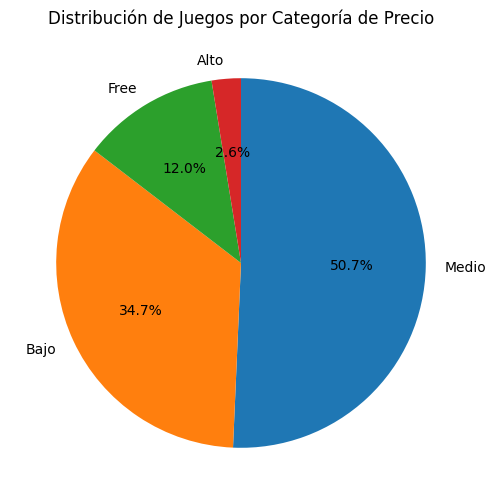

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear categorías
def categorizar_precio(x):
    try:
        x = float(x)
    except:
        return "Free"   # por si hay nulos o valores raros
    if x == 0:
        return "Free"
    elif 1 <= x <= 5.99:
        return "Bajo"
    elif 6 <= x <= 24.99:
        return "Medio"
    elif x >= 25:
        return "Alto"
    else:
        return "Free"

df["Categoria_Precio"] = df["Discounted Price"].apply(categorizar_precio)

# Contar valores por categoría
conteo = df["Categoria_Precio"].value_counts()

# Gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=conteo.index, autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title("Distribución de Juegos por Categoría de Precio")
plt.show()


In [ ]:
##Vamos a hacer un grafico para ver el top 10 de juegos que se estan jugando en Steam

import plotly.express as px

# Ordenamos por jugadores y tomamos los 10 primeros
top10 = df_procesado.sort_values("Jugadores_Actuales", ascending=False).head(10)

# Creamos gráfico de barras interactivo
fig = px.bar(
    top10,
    x="Title",
    y="Jugadores_Actuales",
    text="Jugadores_Actuales",
    title="Top 10 juegos más jugados ahora en Steam",
    labels={"Title": "Juego", "Jugadores_Actuales": "Jugadores Actuales"},
)

# Personalización: rotar nombres y poner texto encima
fig.update_traces(texttemplate='%{text:,}', textposition="outside")
fig.update_layout(xaxis_tickangle=-45)

fig.show()


Grafico de Prueba con juegos de este año mas los dos primeros de mi dataSet

In [ ]:
import requests
import plotly.express as px

# Función para obtener los jugadores actuales (sin API key)
def get_current_players(appid):
    url = f"https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid={appid}"
    response = requests.get(url)
    data = response.json()
    return data["response"].get("player_count", None)

# Diccionario con los juegos y sus AppIDs
games = {
    "Monster Hunter Wilds": 2246340,
    "Hades 2": 1145350,
    "Counter Strike 2": 730,
    "Dota 2": 570,
    "Hollow Knight: Silksong": 1030300,
    "Expedition 33": 1903340,
    "Battlefield 6": 2807960,
    "Assassin’s Creed: Shadows": 3159330
}

# Obtener los jugadores actuales para cada juego
data = []
for game, appid in games.items():
    players = get_current_players(appid)
    print(f"{game}: {players}")
    data.append({"Juego": game, "Jugadores actuales": players})

# Crear gráfico con Plotly
fig = px.bar(
    data,
    x="Juego",
    y="Jugadores actuales",
    title="Jugadores actuales en Steam",
    text="Jugadores actuales",
    color="Juego",
)

# Ajustes visuales
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_title=None,
    yaxis_title="Jugadores activos",
    showlegend=False,
    title_x=0.5,
    title_font=dict(size=22)
)

fig.show()


Monster Hunter Wilds: 16104
Hades 2: 32323
Counter Strike 2: 736204
Dota 2: 437736
Hollow Knight: Silksong: 49237
Expedition 33: 6909
Battlefield 6: 353948
Assassin’s Creed: Shadows: 2485


In [ ]:
#from collections import Counter

# Aplanar lista de listas de géneros
#todos_generos = [g for lista in df_procesado["Géneros"] for g in lista]
#conteo_generos = Counter(todos_generos)
#df_generos = pd.DataFrame(conteo_generos.items(), columns=["Género", "Cantidad"])
#df_generos = df_generos.sort_values("Cantidad", ascending=False)

from collections import Counter

# Aplanar lista de listas de géneros
todos_generos = [g for lista in df_procesado["Géneros"] for g in lista]
conteo_generos = Counter(todos_generos)
df_generos = pd.DataFrame(conteo_generos.items(), columns=["Género", "Cantidad"])
df_generos = df_generos.sort_values("Cantidad", ascending=False)

In [ ]:
import ast
from collections import Counter
import pandas as pd
import plotly.express as px
from ipywidgets import widgets, Output
from IPython.display import display, clear_output

# --- Función robusta que transforma una entrada 'Géneros' en una lista de strings legibles
def normalize_genre_entry(entry):
    """
    Devuelve una lista de géneros a partir de entry.
    Soporta:
     - listas/tuplas reales: ['Action','Adventure']
     - strings que contienen la representación de una lista: "['Action']"
     - strings con coma: "Action, Adventure"
     - strings simples: "Action"
    """
    if pd.isna(entry):
        return ["Desconocido"]
    # lista/tuple/set real
    if isinstance(entry, (list, tuple, set)):
        return [str(x).strip() for x in entry if x is not None and str(x).strip() != ""]
    # string: intentar parsear literal_eval si parece lista/tupla
    if isinstance(entry, str):
        s = entry.strip()
        # intenta literal_eval si tiene corchetes/paréntesis
        if (s.startswith("[") and s.endswith("]")) or (s.startswith("(") and s.endswith(")")):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, (list, tuple, set)):
                    return [str(x).strip() for x in parsed if x is not None and str(x).strip() != ""]
            except Exception:
                # si falla, caemos al fallback
                pass
        # si contiene comas (y no es una URL), partir por comas
        if "," in s and "http" not in s:
            parts = [p.strip().strip('\'"') for p in s.split(",") if p.strip()]
            if parts:
                return parts
        # fallback: string simple (quitar comillas sobrantes)
        return [s.strip().strip('\'"')]
    # otros tipos (int, float, etc.)
    return [str(entry)]

# --- Construir lista plana de géneros sin modificar df_procesado ---
todos_generos = []
for val in df_procesado["Géneros"]:
    normalized = normalize_genre_entry(val)
    todos_generos.extend(normalized)

# --- Contar y crear df_generos ---
conteo_generos = Counter(todos_generos)
df_generos = pd.DataFrame(conteo_generos.items(), columns=["Género", "Cantidad"])
df_generos = df_generos.sort_values("Cantidad", ascending=False).reset_index(drop=True)

# Opcional: diagnostico rápido de entradas problemáticas originales (para que veas por qué pasaba)
# Muestra los tipos más comunes en df_procesado["Géneros"]
from collections import defaultdict
tipo_examples = defaultdict(list)
for v in df_procesado["Géneros"].head(200):  # chequeo sólo primeras 200 para no saturar
    tipo_examples[type(v).__name__].append(v)
print("Tipos detectados (ejemplos):")
for k, ex in tipo_examples.items():
    print(f"  {k}: ejemplo -> {ex[:2]}")  # muestro hasta 2 ejemplos por tipo

# --- Mostrar df_generos para verificar ---
display(df_generos.head(20))

# --- Plotly: Top 3 y selector interactivo (options = géneros legibles) ---
top3 = df_generos.head(3).copy()

fig = px.bar(
    top3,
    x="Género",
    y="Cantidad",
    title="Top 3 géneros más comunes",
    text="Cantidad",
    color="Género"
)
fig.update_traces(texttemplate="%{y:,}", textposition="outside", marker_line_width=0)
fig.update_layout(xaxis_title="Género", yaxis_title="Cantidad", showlegend=False, margin=dict(l=80, r=40, t=80, b=80))
fig.show()

# --- Selector interactivo (hasta 5 géneros) ---
opciones = df_generos["Género"].tolist()

selector = widgets.SelectMultiple(
    options=opciones,
    value=opciones[:3] if len(opciones) >= 3 else opciones,
    description='Géneros:',
    rows=6
)

out = Output()

def build_grouped_for_selection(sel_clean):
    # sel_clean aquí ya son géneros limpios (tal cual aparecen en df_generos)
    if not sel_clean:
        sel_clean = opciones[:3]
    df_sel = df_generos[df_generos["Género"].isin(sel_clean)].copy()
    return df_sel.sort_values("Cantidad", ascending=False)

def actualizar(change=None):
    seleccion = list(selector.value)[:5]
    if len(seleccion) == 0:
        seleccion = opciones[:3]
    df_sel = build_grouped_for_selection(seleccion)
    fig = px.bar(df_sel, x="Género", y="Cantidad", text="Cantidad", color="Género",
                 title=f"Comparativa de géneros seleccionados ({len(seleccion)})")
    fig.update_traces(texttemplate="%{y:,}", textposition="outside", marker_line_width=0)
    fig.update_layout(xaxis_title="Género", yaxis_title="Cantidad", showlegend=False, margin=dict(l=80, r=40, t=70, b=80))
    with out:
        clear_output(wait=True)
        fig.show()

selector.observe(actualizar, names='value')
display(selector)
display(out)
actualizar()


Tipos detectados (ejemplos):
  str: ejemplo -> ["['Adventure', 'RPG', 'Strategy']", "['Action', 'Free To Play']"]


Género  Cantidad
0                   Indie       934
1                  Action       682
2               Adventure       630
3                  Casual       457
4                Strategy       338
5              Simulation       337
6                     RPG       328
7            Early Access        88
8            Free To Play        87
9                  Sports        74
10  Massively Multiplayer        61
11                 Racing        52
12                   Aksi         7
13            Petualangan         6
14                Violent         6
15                   Gore         5
16         Sexual Content         4
17             Estratégia         2
18                   Ação         2
19                 Acción         2

SelectMultiple(description='Géneros:', index=(0, 1, 2), options=('Indie', 'Action', 'Adventure', 'Casual', 'St…

Output()

In [ ]:
#Grafico de dia a dia de jugadores en el top 10

In [ ]:
!gdown 1dFoqW2frMSXe3gizEFJwNsdpr0Ewgah-

Downloading...
From: https://drive.google.com/uc?id=1dFoqW2frMSXe3gizEFJwNsdpr0Ewgah-
To: /content/DataFrame_JugadoresActuales.xlsx
100% 1.11M/1.11M [00:00<00:00, 70.3MB/s]


In [ ]:
#Asociar la ruta a una variable
df_jugadores = pd.read_excel('/content/DataFrame_JugadoresActuales.xlsx')

In [ ]:
df_jugadores.head()

ID_juego                             Title  Appid_del_Link  \
0         1                   Baldur's Gate 3         1086940   
1         2  Counter-Strike: Global Offensive             730   
2         3                      Apex Legends         1172470   
3         4                   Forza Horizon 5         1551360   
4         5                     Call of Duty®         1938090   

   Jugadores_Dia:1  Jugadores_Dia:12_10_2025  Jugadores_Dia:13_10_2025  \
0          80835.0                   56424.0                   58012.0   
1        1014674.0                  648894.0                 1158380.0   
2          60073.0                   48184.0                   74281.0   
3          14457.0                    6884.0                   14618.0   
4          91265.0                   54397.0                   52206.0   

   Jugadores_Dia:14_10_2025  Jugadores_Dia:15_10_2025  \
0                   44917.0                   51190.0   
1                  575355.0                 1340543.0   
2                   36516.0                  127614.0   
3                    6721.0                   18170.0   
4                   39034.0                   39408.0   

   Jugadores_Dia:20_10_2025  
0                   57692.0  
1                 1161249.0  
2                   66812.0  
3                   13088.0  
4                   48006.0

In [ ]:
import pandas as pd
import plotly.express as px

# --- 1️⃣ Tomar el top 10 por Jugadores_Dia:1 ---
top10 = df_jugadores.sort_values("Jugadores_Dia:1", ascending=False).head(10)

# --- 2️⃣ Gráfico de BARRAS comparando ambos días ---
df_melt = top10.melt(
    id_vars=["Title"],
    value_vars=["Jugadores_Dia:1", "Jugadores_Dia:12_10_2025",	"Jugadores_Dia:13_10_2025",	"Jugadores_Dia:14_10_2025",	"Jugadores_Dia:15_10_2025",	"Jugadores_Dia:20_10_2025"],
    var_name="Día",
    value_name="Jugadores"
)

fig_bar = px.bar(
    df_melt,
    x="Title",
    y="Jugadores",
    color="Día",
    barmode="group",
    title="Top 10 Juegos Más Jugados - Comparación de Dias",
    labels={"Title": "Juego", "Jugadores": "Jugadores Activos"}
)

fig_bar.update_layout(xaxis_tickangle=-30)
fig_bar.show()

# --- 3️⃣ Gráfico de LÍNEAS para ver la tendencia ---
fig_line = px.line(
    df_melt,
    x="Title",
    y="Jugadores",
    color="Día",
    markers=True,
    title="Evolución de Jugadores - Top 10 Juegos",
    labels={"Title": "Juego", "Jugadores": "Jugadores Activos"}
)

fig_line.update_layout(xaxis_tickangle=-30)
fig_line.show()



###Informe de Resultados

Se realizaron diversos gráficos para identificar las principales tendencias del mercado de videojuegos en Steam. En primer lugar, se observa una marcada predominancia de títulos free-to-play, lo cual resulta lógico considerando que muchos de estos proyectos son de pequeño o mediano alcance, orientados a modelos de monetización diferida o creados como parte de prácticas profesionales y portfolios. Este enfoque busca maximizar el alcance y la cantidad de jugadores, priorizando la difusión sobre la ganancia inmediata.

Asimismo, se aprecia una diferencia significativa entre los juegos más jugados y el resto del catálogo. Incluso, a partir del segundo puesto, las métricas disminuyen de forma abrupta. Esto puede explicarse porque el conjunto de datos original contiene registros hasta 2023, reflejando la consistencia y permanencia de los títulos más populares antes que el efecto de lanzamientos recientes o fenómenos de “FOMO”.

Por ejemplo, Battlefield 6, lanzado apenas una semana antes de la fecha de análisis, muestra valores iniciales elevados. Sin embargo, será necesario observar su evolución con el paso del tiempo para determinar si mantiene esa tendencia. Casos similares ocurrieron con varios juegos que figuran en el top 10 del conjunto analizado: títulos que presentaron picos de jugadores en su lanzamiento, pero cuya base activa se estabilizó posteriormente.

En síntesis, los datos sugieren que los títulos con alta expectativa o fuerte interés del público suelen alcanzar un rendimiento inicial destacado, aunque su permanencia en el tiempo depende de la capacidad de sostener ese interés más allá del lanzamiento.

# **Modelos de Aprendisaje**

Apartir del analizar un poco el objetivo del proyecto sobre como poder medir la Valoracion del los videojuego de la platafroma Steam Decidi hacer dos modelos basicos de aprendisaje

Primero uno de Clasificacion: donde el objetivo es hacer una tendencia de si esta muy bien valorado o no Usando un Random Forest
*   Objetivo: Predecir si un juego será bien valorado (por ejemplo, si tendrá “reseñas positivas” o “muy positivas”)

Segundo otro de Regresion: usando un Linear regesor o un random Forest buscare hacer una predicion sobre la positividad que tendra el juego apartir de la informacion dada
Objetivo: Predecir el puntaje promedio de reseñas o el número de reseñas positivas

**Para eso se usaran las Variables**

* Title como base
* Discounted Price Que es el precio del juego y si es free o no que hace que tenga mucho valor
* Release Date
* All Reviews Summary una categorial de 8 regimenes de Valoraciones en general
* Developer Dependiendo si tiene muchos juegos positivos posiblemente su empresa se vea positiva etc
* Valoraciones que tiene algunos elementos cono las review postivas y el porsentaje de positivdad que podria usar para ver proyecciones a futuro
* Jugadores_Actuales



In [ ]:
#Vamos a usar un DataFrame nuevo
#https://docs.google.com/spreadsheets/d/1gQAt0Sdopzcqv2VuMDJWGuZ5sO8K699o/edit?usp=sharing&ouid=116135415875326405759&rtpof=true&sd=true
!gdown 1gQAt0Sdopzcqv2VuMDJWGuZ5sO8K699o

Downloading...
From: https://drive.google.com/uc?id=1gQAt0Sdopzcqv2VuMDJWGuZ5sO8K699o
To: /content/Data_Frame_V2.xlsx
100% 7.96M/7.96M [00:00<00:00, 68.2MB/s]


In [ ]:
#Asociar la ruta a una variable
df_p1 = pd.read_excel('/content/Data_Frame_V2.xlsx')

In [ ]:
df_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18375 entries, 0 to 18374
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID_juego                  18375 non-null  int64         
 1   Title                     18370 non-null  object        
 2   Original Price            18375 non-null  object        
 3   Discounted Price          18375 non-null  float64       
 4   Release Date              18375 non-null  datetime64[ns]
 5   Link                      18375 non-null  object        
 6   Game Description          18373 non-null  object        
 7   Recent Reviews Summary    18375 non-null  object        
 8   All Reviews Summary       18168 non-null  object        
 9   Recent Reviews Number     18371 non-null  object        
 10  All Reviews Number        4477 non-null   object        
 11  Developer                 18342 non-null  object        
 12  Publisher         

##**Prueba de modelo de Clasificacion**

In [ ]:
df_p1['All Reviews Summary'].value_counts()

All Reviews Summary
Very Positive              6498
Positive                   6310
Mostly Positive            3105
Mixed                      2092
Overwhelmingly Positive     128
Mostly Negative              21
Very Negative                 6
9 user reviews                4
3 user reviews                2
1 user reviews                2
Name: count, dtype: int64

In [ ]:
# Usare un lader Para asi facilitar los datos de All Reviews Summar-> LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
recepcion_label = encoder.fit_transform(df_p1['All Reviews Summary'])

In [ ]:
encoded_juegos = pd.DataFrame(recepcion_label, columns=['All Reviews Summary'])
encoded_juegos.head()

All Reviews Summary
0                    5
1                    9
2                    9
3                    9
4                    9

In [ ]:
#Vamos a extraer algunos datos para despues procesar en el modela de clasificacion usadon la columna Valoración
import ast
import json
import pandas as pd

# Función para parsear una celda y devolver total_positive y porcentaje
def parse_review_summary(cell):
    # Manejo de nulos
    if pd.isna(cell):
        return pd.Series([None, None])

    # Normalizar a dict
    try:
        if isinstance(cell, dict):
            d = cell
        elif isinstance(cell, str):
            # Intentamos literal_eval (más seguro), si falla, intentamos json.loads
            try:
                d = ast.literal_eval(cell)
            except Exception:
                d = json.loads(cell)
        else:
            # Si viene en otro formato (p.ej. lista), intentar convertir a dict
            d = dict(cell)
    except Exception:
        return pd.Series([None, None])

    # Sacar valores
    total_positive = d.get("total_positive")
    porcentaje = d.get("porcentaje_aprobacion")

    # Si no viene el porcentaje, intentar calcularlo si tenemos total_reviews
    if porcentaje is None:
        total = d.get("total_reviews")
        if total and total_positive is not None:
            try:
                porcentaje = round((total_positive / total) * 100, 2)
            except Exception:
                porcentaje = None

    return pd.Series([total_positive, porcentaje])

# Aplicar y crear columnas nuevas
df_p1[["total_positive", "porcentaje_aprobacion"]] = df_p1["Valoración"].apply(parse_review_summary)

# Crear la etiqueta binaria: 1 si >=70, 0 si <70 o NaN -> 0 (según pediste)
df_p1["Valoracion_Pos"] = df_p1["porcentaje_aprobacion"].apply(lambda x: 1 if pd.notna(x) and x >= 70 else 0)

# Vista rápida
print(df_p1[["Title", "Appid_del_Link", "total_positive", "porcentaje_aprobacion", "Valoracion_Pos"]].head())

# Resumen de cuántos quedan en cada clase
print("\nConteo Valoracion_Pos:")
print(df_p1["Valoracion_Pos"].value_counts(dropna=False))


                              Title  Appid_del_Link  total_positive  \
0                   Baldur's Gate 3         1086940        762307.0   
1  Counter-Strike: Global Offensive             730       7833599.0   
2                      Apex Legends         1172470        679485.0   
3                   Forza Horizon 5         1551360        213831.0   
4                     Call of Duty®         1938090        432997.0   

   porcentaje_aprobacion  Valoracion_Pos  
0                  96.84               1  
1                  86.42               1  
2                  67.20               0  
3                  88.67               1  
4                  58.79               0  

Conteo Valoracion_Pos:
Valoracion_Pos
1    15922
0     2453
Name: count, dtype: int64


In [ ]:
#Por ultimo procesamos el año del juego
# Convertir fecha a año numérico
df_p1["Release Date"] = pd.to_datetime(df_p1["Release Date"], errors="coerce")
df_p1["Año_Lanzamiento"] = df_p1["Release Date"].dt.year

In [ ]:
#Nose porque pero elimina todo si hago la eliminacion de nulos desde el df_model asi que divido las cosas
df_p2 = df_p1.copy()

In [ ]:
#Parece que hay un par de nulos que voy a eliminar
df_p2 = df_p2.dropna(subset=["Appid_del_Link" , "Discounted Price", "total_positive", "All Reviews Summary", "Año_Lanzamiento", "Valoracion_Pos"])


In [ ]:
print("Discounted Price" , df_p2["Discounted Price"].isnull().sum())
print("total_positive" , df_p2["total_positive"].isnull().sum())
print("All Reviews Summary" , df_p2["All Reviews Summary"].isnull().sum())
print(df_p2["Año_Lanzamiento"].isnull().sum())
print(df_p2["Valoracion_Pos"].isnull().sum())

Discounted Price 0
total_positive 0
All Reviews Summary 0
0
0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Preprocesamiento ===

# Asegurar que las columnas estén en formato numérico
df_p2["Discounted Price"] = pd.to_numeric(df_p2["Discounted Price"], errors="coerce")
df_p2["total_positive"] = pd.to_numeric(df_p2["total_positive"], errors="coerce")
# Assuming 'All Reviews Summary' was intended to be the encoded version
# If not, the encoding step needs to be applied to df_p2
# For now, I'll assume the encoded version is needed and needs to be merged or recreated on df_p2
# Let's re-encode on df_p2 to be safe and ensure alignment after dropping rows
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_p2['All Reviews Summary_Encoded'] = encoder.fit_transform(df_p2['All Reviews Summary'])


# === 2. Selección de variables ===
X = df_p2[["Discounted Price", "total_positive", "All Reviews Summary_Encoded", "Año_Lanzamiento"]]
y = df_p2["Valoracion_Pos"]

In [ ]:
# === 3. Separar datos de entrenamiento y prueba ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 4. Entrenamiento del modelo ===
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# === 5. Evaluación del modelo ===
y_pred = model.predict(X_test)

Confusion Matrix:
[[  99  403]
 [ 148 2983]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.20      0.26       502
           1       0.88      0.95      0.92      3131

    accuracy                           0.85      3633
   macro avg       0.64      0.57      0.59      3633
weighted avg       0.81      0.85      0.83      3633


Accuracy Score:
0.8483347096063859


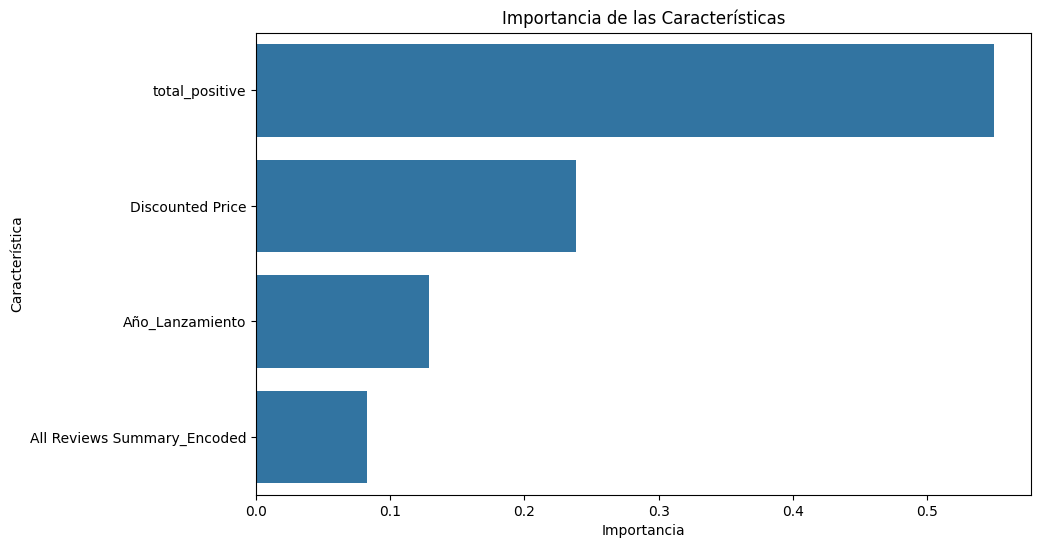

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Feature Importance (Optional but helpful)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

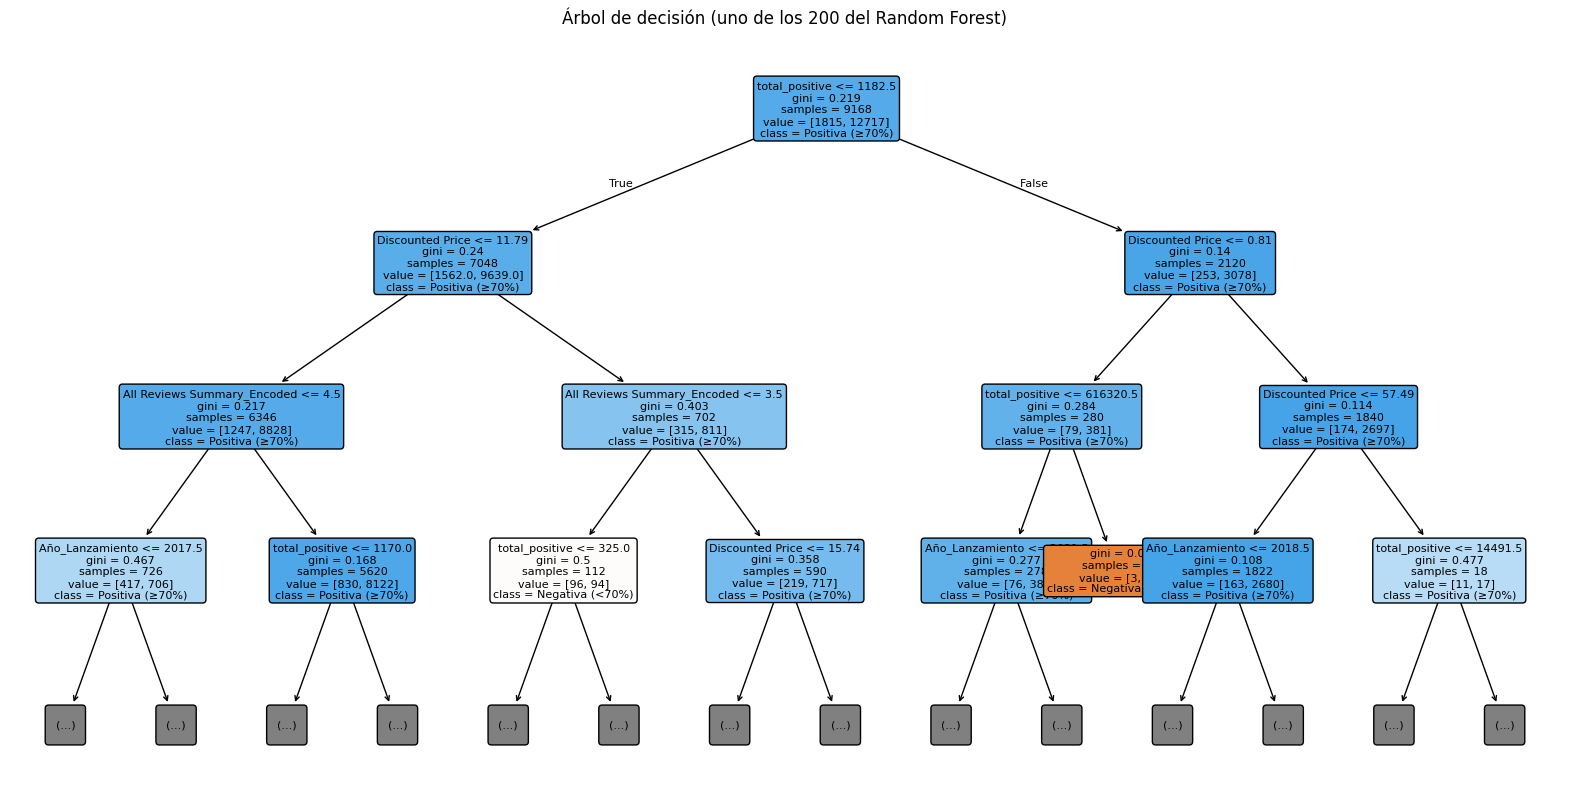

In [ ]:
from sklearn import tree

# === 7. Visualizar un árbol individual del Random Forest ===

# Tomamos uno de los árboles del Random Forest (por ejemplo, el primero)
estimator = model.estimators_[0]

# Crear figura
plt.figure(figsize=(20, 10))

# Graficar el árbol
tree.plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=["Negativa (<70%)", "Positiva (≥70%)"],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3  # 👈 ajustá este número si querés ver más o menos niveles
)

plt.title("Árbol de decisión (uno de los 200 del Random Forest)")
plt.show()


###Análisis del Modelo de Aprendizaje

Al iniciar el entrenamiento del modelo, los datos obtenidos —aunque aún no concluyentes y en etapa de observación— permiten identificar algunas tendencias relevantes.

El modelo de aprendizaje busca determinar qué juegos presentan mayores niveles de valoración a partir de las encuestas y reseñas realizadas por los usuarios. En este análisis se consideraron como positivas aquellas con una calificación igual o superior al 70%.

Los resultados preliminares indican que las reseñas son el factor más determinante, tanto en cantidad como en calidad. Esto resulta coherente, ya que los usuarios tienden a dejar una reseña solo cuando la experiencia fue muy satisfactoria o, por el contrario, extremadamente negativa. En ese sentido, las reseñas representan una fuente sólida y representativa del nivel de aceptación de cada juego.

Sin embargo, se detectó que la variable “All Reviews Summary_Encoded” presenta un valor de 0, lo que podría indicar una carga incorrecta o un error en el registro de datos. Esto sugiere que los resultados actuales deben considerarse experimentales, y que el modelo requiere una revisión y validación adicional para garantizar su fiabilidad.

En conclusión, aunque los primeros hallazgos apuntan a la importancia de las reseñas como principal indicador de valoración, será necesario ampliar el análisis y depurar los datos antes de obtener resultados definitivos.